In [3]:
#using Pkg
#Pkg.update()
#Pkg.add(PackageSpec(name="JWAS",rev="master"))

In [ ]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [4]:
#Pkg.status("JWAS")

    Status `/opt/julia/environments/v1.1/Project.toml`
  [c9a035f4] JWAS v0.5.5 #master (https://github.com/reworkhow/JWAS.jl.git)


In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"])
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


In [3]:
phenotypes= dropmissing(phenotypes, :FinPenBatch)
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
6,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
7,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
8,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02
9,0012,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02


In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 29.451703 seconds (37.77 k allocations: 10.393 GiB, 0.08% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [8]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [9]:
model_equations = "FinADG = intercept + Batch + Died + EntryAge + FinPenBatch + SowID
             nTrtsPer180 = intercept + Batch + Died + EntryAge + FinPenBatch";
R= [0.909304E-02 -0.419913E-01
    -0.419913E-01 1.48907]
model=build_model(model_equations,R);
set_covariate(model,"EntryAge")

Gpen=[0.383042E-03 0
    0 0.383042E-03]
set_random(model,"FinPenBatch", Gpen)
G2=0.466761E-03
set_random(model,"SowID",G2)

SowID is not found in model equation 2.


In [10]:
G3=[0.407486E-02   -0.380808E-02
 -0.380808E-02  0.167177]
@time add_genotypes(model,M,G3,header=true, rowID=rowID, G_is_marker_variance=false) # no method matching
#@time add_genotypes(model,"Geno_JWAS_impute.txt",G3,separator=' ', G_is_marker_variance=true)

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
 14.714496 seconds (6.82 M allocations: 15.931 GiB, 1.20% gc time)


## BayesB

In [11]:
@time outB=runMCMC(model,phenotypes,methods="BayesB", missing_phenotypes=true, 
    estimatePi=false,Pi=Dict([1.0; 1.0]=>0.001,[1.0; 0.0]=>0.001,[0.0; 1.0]=>0.001,[0.0; 0.0]=>0.998), 
    estimateScale=true,chain_length=50000,burnin = 5000,output_heritability=true, output_samples_frequency=100, 
    output_samples_file="MCMC_BayesB")

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0116 in the row 106 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0117 in the row 107 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0149 in the row 138 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0254 in the row 230 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0272 in the row 247 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0285 in the row 258 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0288 in the row 260 are missing. This record is deleted.
Phenotypes for all traits included in the model for ind

running MCMC for BayesB...100%|█████████████████████████| Time: 3 days, 20:37:11




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


333472.834401 seconds (2.62 T allocations: 143.068 TiB, 26.82% gc time)


Dict{Any,Any} with 9 entries:
  "marker effects"          => 870344×5 DataFrame. Omitted printing of 1 column…
  "heritability"            => 2×3 DataFrame…
  "location parameters"     => 1621×5 DataFrame…
  "residual variance"       => 4×3 DataFrame…
  "EBV_FinADG"              => 3205×3 DataFrame…
  "ScaleEffectVar"          => 4×3 DataFrame…
  "genetic_variance"        => 4×3 DataFrame…
  "EBV_nTrtsPer180"         => 3205×3 DataFrame…
  "marker effects variance" => 4×3 DataFrame…

In [12]:
h2=CSV.read("MCMC_BayesB_heritability.txt",delim = ',',header=true)
insertcols!(h2, 1, :iteration => 1:500) # Add a column called iteration
first(h2, 10)

,iteration,FinADG,nTrtsPer180
,Int64,Float64,Float64
1,1,0.28861,0.0980366
2,2,0.266004,0.103303
3,3,0.302705,0.0893157
4,4,0.231647,0.0830405
5,5,0.289501,0.095887
6,6,0.28185,0.093023
7,7,0.266133,0.084434
8,8,0.265358,0.0918604
9,9,0.264368,0.0845842


In [14]:
mean(h2[!,2])

0.27227493857348795

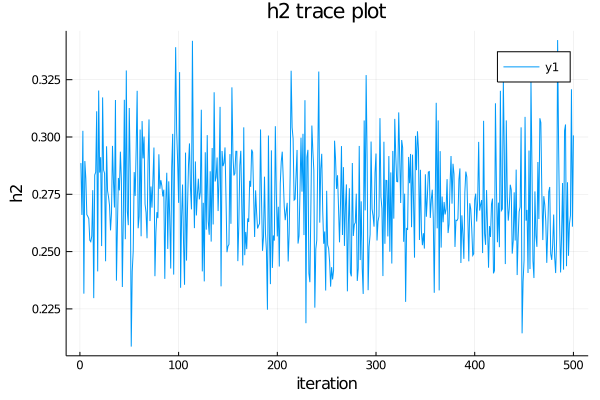

In [15]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

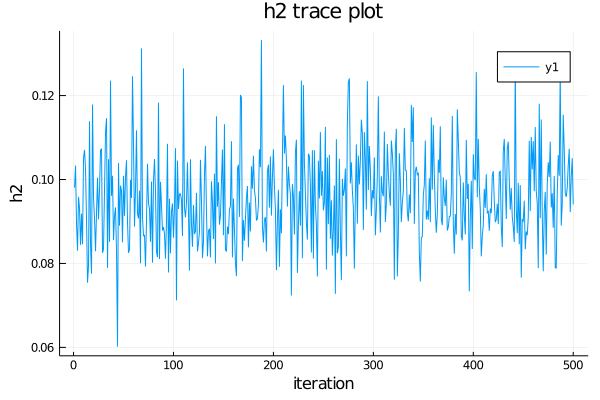

In [16]:
using Plots
x = h2[!,1]; y = h2[!,3]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [18]:
@time rg,out = GWAS(M,"/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt", 
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/FinADG_AllTRT/MCMC_BayesB_marker_effects_FinADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/FinADG_AllTRT/MCMC_BayesB_marker_effects_nTrtsPer180.txt",
    window_size="1 Mb", GWAS=false,sliding_window=false,genetic_correlation=true)

calculating genomic correlation...100%|█████████████████| Time: 0:27:50


BoundsError: BoundsError: attempt to access (2398×12 DataFrame
│ Row  │ trait      │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimate_cov │ std_cov     │ estimate_cor │ std_cor   │
│      │ String     │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64      │ Float64     │ Float64      │ Float64   │
├──────┼────────────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼──────────────┼─────────────┼──────────────┼───────────┤
│ 1    │ cor(t1,t2) │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ -1.75527e-6  │ 1.28433e-5  │ -0.0319538   │ 0.371107  │
│ 2    │ cor(t1,t2) │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ -1.74177e-6  │ 1.49824e-5  │ -0.00562058  │ 0.438556  │
│ 3    │ cor(t1,t2) │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ -1.47786e-6  │ 1.59974e-5  │ -0.0213936   │ 0.420996  │
│ 4    │ cor(t1,t2) │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ -1.17716e-6  │ 1.10285e-5  │ -0.00746011  │ 0.392367  │
│ 5    │ cor(t1,t2) │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ -7.60709e-7  │ 1.00061e-5  │ -0.0111268   │ 0.406756  │
│ 6    │ cor(t1,t2) │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ -6.81666e-7  │ 1.20442e-5  │ -0.0122396   │ 0.388243  │
│ 7    │ cor(t1,t2) │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ -1.54625e-6  │ 1.58823e-5  │ -0.0185527   │ 0.374701  │
│ 8    │ cor(t1,t2) │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ -1.8396e-6   │ 1.4672e-5   │ -0.0517195   │ 0.39521   │
│ 9    │ cor(t1,t2) │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ -1.09262e-6  │ 2.07347e-5  │ -0.020724    │ 0.434608  │
│ 10   │ cor(t1,t2) │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ -1.31584e-7  │ 1.25904e-5  │ -0.00942536  │ 0.412642  │
│ 11   │ cor(t1,t2) │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ -1.04704e-6  │ 1.01674e-5  │ -0.0285194   │ 0.422084  │
│ 12   │ cor(t1,t2) │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ -1.16669e-6  │ 1.10659e-5  │ -0.0383929   │ 0.399148  │
│ 13   │ cor(t1,t2) │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ -1.54531e-6  │ 1.22485e-5  │ -0.0253218   │ 0.385434  │
│ 14   │ cor(t1,t2) │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ -2.21665e-6  │ 1.77263e-5  │ -0.0674565   │ 0.416172  │
│ 15   │ cor(t1,t2) │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ -9.62398e-7  │ 1.09095e-5  │ -0.0289556   │ 0.408538  │
│ 16   │ cor(t1,t2) │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ -2.3716e-6   │ 2.16339e-5  │ -0.0199798   │ 0.363935  │
│ 17   │ cor(t1,t2) │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ -1.55966e-6  │ 1.10621e-5  │ -0.0698531   │ 0.364675  │
│ 18   │ cor(t1,t2) │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ -5.95114e-7  │ 1.23794e-5  │ -0.0191132   │ 0.35231   │
│ 19   │ cor(t1,t2) │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ -3.23132e-6  │ 2.31921e-5  │ -0.0526609   │ 0.33777   │
│ 20   │ cor(t1,t2) │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ -6.38523e-7  │ 1.12489e-5  │ -0.036527    │ 0.404046  │
│ 21   │ cor(t1,t2) │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ -1.14724e-6  │ 1.13634e-5  │ -0.0220656   │ 0.37213   │
│ 22   │ cor(t1,t2) │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ -1.04265e-6  │ 9.85993e-6  │ -0.0311972   │ 0.381137  │
│ 23   │ cor(t1,t2) │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ -9.27523e-7  │ 1.16713e-5  │ -0.046712    │ 0.378746  │
│ 24   │ cor(t1,t2) │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ -4.53449e-6  │ 2.75323e-5  │ -0.0831778   │ 0.390951  │
│ 25   │ cor(t1,t2) │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ -1.46239e-6  │ 1.25979e-5  │ -0.0321478   │ 0.373291  │
│ 26   │ cor(t1,t2) │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ -3.21519e-6  │ 1.76622e-5  │ -0.0927732   │ 0.444903  │
│ 27   │ cor(t1,t2) │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ -2.41048e-6  │ 2.05222e-5  │ -0.055043    │ 0.442305  │
│ 28   │ cor(t1,t2) │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ -2.0243e-6   │ 2.04915e-5  │ -0.0407994   │ 0.417782  │
│ 29   │ cor(t1,t2) │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ -1.5244e-6   │ 1.15425e-5  │ -0.0571958   │ 0.401647  │
│ 30   │ cor(t1,t2) │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ -9.74595e-7  │ 1.49127e-5  │ -0.0486934   │ 0.433498  │
│ 31   │ cor(t1,t2) │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ -1.2477e-6   │ 1.2786e-5   │ -0.043016    │ 0.438603  │
│ 32   │ cor(t1,t2) │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ -2.09767e-6  │ 2.16183e-5  │ -0.024599    │ 0.386844  │
│ 33   │ cor(t1,t2) │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ -3.9141e-7   │ 1.41263e-5  │ 0.00713887   │ 0.395795  │
│ 34   │ cor(t1,t2) │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ -2.05961e-6  │ 1.60711e-5  │ -0.0661328   │ 0.391676  │
│ 35   │ cor(t1,t2) │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ -1.1546e-6   │ 1.02136e-5  │ -0.0417561   │ 0.347703  │
│ 36   │ cor(t1,t2) │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ -3.90334e-7  │ 7.18983e-6  │ -0.0265355   │ 0.363338  │
│ 37   │ cor(t1,t2) │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ -2.6831e-7   │ 8.7245e-6   │ 0.00597459   │ 0.379364  │
│ 38   │ cor(t1,t2) │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ -2.14663e-6  │ 2.12861e-5  │ -0.00229684  │ 0.413327  │
│ 39   │ cor(t1,t2) │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ -1.16724e-6  │ 1.36391e-5  │ -0.00197922  │ 0.392683  │
│ 40   │ cor(t1,t2) │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ -8.1095e-7   │ 8.41515e-6  │ -0.0470225   │ 0.388373  │
│ 41   │ cor(t1,t2) │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ -7.07495e-7  │ 1.01647e-5  │ -0.0166841   │ 0.360077  │
│ 42   │ cor(t1,t2) │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ -4.16321e-6  │ 2.23938e-5  │ -0.102658    │ 0.428455  │
│ 43   │ cor(t1,t2) │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ -5.48387e-6  │ 3.37188e-5  │ -0.0920639   │ 0.421625  │
│ 44   │ cor(t1,t2) │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ -3.14525e-6  │ 1.73295e-5  │ -0.0700875   │ 0.427628  │
│ 45   │ cor(t1,t2) │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 8.86447e-7   │ 1.27213e-5  │ -0.0149583   │ 0.417539  │
│ 46   │ cor(t1,t2) │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 1.36314e-6   │ 1.58933e-5  │ -0.00145943  │ 0.412266  │
│ 47   │ cor(t1,t2) │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ -1.54121e-6  │ 1.28628e-5  │ -0.0396932   │ 0.371329  │
│ 48   │ cor(t1,t2) │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ -8.30077e-7  │ 1.34139e-5  │ -0.039692    │ 0.367906  │
│ 49   │ cor(t1,t2) │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ -9.3097e-7   │ 1.2752e-5   │ -0.025488    │ 0.417155  │
│ 50   │ cor(t1,t2) │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ -1.6565e-6   │ 1.24403e-5  │ -0.0410186   │ 0.423081  │
│ 51   │ cor(t1,t2) │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ -2.14211e-6  │ 1.45015e-5  │ -0.0325845   │ 0.446287  │
│ 52   │ cor(t1,t2) │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ -1.38037e-6  │ 1.51652e-5  │ -0.0204609   │ 0.421068  │
│ 53   │ cor(t1,t2) │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ -6.96196e-7  │ 1.31488e-5  │ -0.0185538   │ 0.423323  │
│ 54   │ cor(t1,t2) │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ -3.76302e-6  │ 2.01011e-5  │ -0.0767233   │ 0.437806  │
│ 55   │ cor(t1,t2) │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ -2.63921e-6  │ 1.65768e-5  │ -0.0591504   │ 0.392071  │
│ 56   │ cor(t1,t2) │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ -1.00543e-6  │ 2.14409e-5  │ -0.0178241   │ 0.408207  │
│ 57   │ cor(t1,t2) │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ -1.38334e-6  │ 1.19417e-5  │ -0.031222    │ 0.395652  │
│ 58   │ cor(t1,t2) │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ -7.00806e-7  │ 1.09224e-5  │ -0.036948    │ 0.401738  │
│ 59   │ cor(t1,t2) │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ -1.12153e-7  │ 1.5735e-5   │ -0.0205971   │ 0.424124  │
│ 60   │ cor(t1,t2) │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ -1.44799e-6  │ 1.18104e-5  │ -0.0161639   │ 0.417611  │
│ 61   │ cor(t1,t2) │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ -1.21693e-6  │ 1.56653e-5  │ 0.000457996  │ 0.354473  │
│ 62   │ cor(t1,t2) │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ -9.26489e-7  │ 7.12052e-6  │ -0.02188     │ 0.316492  │
│ 63   │ cor(t1,t2) │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ -5.34988e-7  │ 9.23634e-6  │ -0.021594    │ 0.342932  │
│ 64   │ cor(t1,t2) │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ -1.58733e-6  │ 1.66021e-5  │ -0.0242853   │ 0.384849  │
│ 65   │ cor(t1,t2) │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ -2.57976e-6  │ 1.91314e-5  │ -0.0475209   │ 0.382967  │
│ 66   │ cor(t1,t2) │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ -1.96602e-6  │ 1.18262e-5  │ -0.0456426   │ 0.37293   │
│ 67   │ cor(t1,t2) │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ -1.32919e-6  │ 1.49377e-5  │ -0.0365112   │ 0.403929  │
│ 68   │ cor(t1,t2) │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ -3.61163e-6  │ 3.03079e-5  │ -0.041239    │ 0.437528  │
│ 69   │ cor(t1,t2) │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ -1.32069e-6  │ 1.31742e-5  │ -0.0275068   │ 0.450869  │
│ 70   │ cor(t1,t2) │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ -7.86718e-7  │ 7.99884e-6  │ -0.015961    │ 0.351618  │
│ 71   │ cor(t1,t2) │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ -1.09728e-6  │ 1.02405e-5  │ -0.022522    │ 0.382074  │
│ 72   │ cor(t1,t2) │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ -2.41186e-6  │ 2.00451e-5  │ -0.0327306   │ 0.437259  │
│ 73   │ cor(t1,t2) │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ -5.64221e-7  │ 1.13849e-5  │ -0.0142565   │ 0.430806  │
│ 74   │ cor(t1,t2) │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ -6.89453e-7  │ 1.001e-5    │ -0.0296144   │ 0.390915  │
│ 75   │ cor(t1,t2) │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ -1.69608e-6  │ 1.18187e-5  │ -0.0663252   │ 0.424581  │
│ 76   │ cor(t1,t2) │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ -1.01859e-6  │ 1.4714e-5   │ -0.00538698  │ 0.386867  │
│ 77   │ cor(t1,t2) │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ -2.51911e-7  │ 7.46384e-6  │ -0.0170215   │ 0.322345  │
│ 78   │ cor(t1,t2) │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ -8.99218e-7  │ 1.09309e-5  │ -0.0183145   │ 0.383568  │
│ 79   │ cor(t1,t2) │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ -9.00617e-7  │ 1.34654e-5  │ 0.0122185    │ 0.401177  │
│ 80   │ cor(t1,t2) │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ -1.90936e-7  │ 1.01435e-5  │ -0.0271422   │ 0.308865  │
│ 81   │ cor(t1,t2) │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ -5.48943e-7  │ 1.06919e-5  │ -0.0245962   │ 0.370231  │
│ 82   │ cor(t1,t2) │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ -5.21325e-7  │ 9.11285e-6  │ -0.0387175   │ 0.350173  │
│ 83   │ cor(t1,t2) │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ -5.44093e-7  │ 1.13947e-5  │ -0.00345353  │ 0.359639  │
│ 84   │ cor(t1,t2) │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ -1.72085e-6  │ 1.76908e-5  │ -0.0449989   │ 0.406522  │
│ 85   │ cor(t1,t2) │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ -9.905e-7    │ 1.22829e-5  │ -0.0291589   │ 0.404769  │
│ 86   │ cor(t1,t2) │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ -5.84843e-7  │ 1.02116e-5  │ -0.0181554   │ 0.342675  │
│ 87   │ cor(t1,t2) │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ -2.53955e-7  │ 6.58507e-6  │ -0.0122937   │ 0.345262  │
│ 88   │ cor(t1,t2) │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ -7.96185e-7  │ 8.64584e-6  │ -0.0221094   │ 0.358921  │
│ 89   │ cor(t1,t2) │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ -9.27023e-8  │ 1.27106e-5  │ -0.0166112   │ 0.426507  │
│ 90   │ cor(t1,t2) │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ -5.06811e-7  │ 1.19545e-5  │ -0.023861    │ 0.383867  │
│ 91   │ cor(t1,t2) │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ -1.10436e-6  │ 1.68287e-5  │ -0.0242448   │ 0.3868    │
│ 92   │ cor(t1,t2) │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ -1.1904e-6   │ 9.57595e-6  │ -0.0171928   │ 0.347842  │
│ 93   │ cor(t1,t2) │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ -1.02835e-6  │ 8.42935e-6  │ -0.0136447   │ 0.280821  │
│ 94   │ cor(t1,t2) │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ -2.95694e-7  │ 6.28649e-6  │ -0.0264307   │ 0.251415  │
│ 95   │ cor(t1,t2) │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ -1.53054e-6  │ 1.46215e-5  │ -0.0383825   │ 0.415951  │
│ 96   │ cor(t1,t2) │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ -1.45838e-6  │ 1.44358e-5  │ -0.0350333   │ 0.455634  │
│ 97   │ cor(t1,t2) │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ -2.02928e-7  │ 1.0296e-5   │ -0.00672444  │ 0.381756  │
│ 98   │ cor(t1,t2) │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ -1.63697e-6  │ 1.14819e-5  │ -0.0342701   │ 0.432408  │
│ 99   │ cor(t1,t2) │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ -1.0385e-6   │ 1.12479e-5  │ -0.0380383   │ 0.349707  │
│ 100  │ cor(t1,t2) │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ -1.85674e-6  │ 1.57461e-5  │ -0.0480448   │ 0.348691  │
│ 101  │ cor(t1,t2) │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ -4.65408e-7  │ 5.62714e-6  │ -0.0091996   │ 0.267616  │
│ 102  │ cor(t1,t2) │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ -2.14663e-6  │ 1.79351e-5  │ -0.0283998   │ 0.329221  │
│ 103  │ cor(t1,t2) │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ -2.69686e-6  │ 1.62023e-5  │ -0.0436132   │ 0.341944  │
│ 104  │ cor(t1,t2) │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ -5.06069e-6  │ 4.14045e-5  │ -0.0819924   │ 0.40849   │
│ 105  │ cor(t1,t2) │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ -8.28816e-7  │ 7.92581e-6  │ -0.0155611   │ 0.332965  │
│ 106  │ cor(t1,t2) │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ -4.87316e-7  │ 7.34297e-6  │ -0.0127202   │ 0.295522  │
│ 107  │ cor(t1,t2) │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ -1.22914e-6  │ 1.00908e-5  │ -0.0602921   │ 0.383951  │
│ 108  │ cor(t1,t2) │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ -2.8491e-6   │ 3.64923e-5  │ -0.0479596   │ 0.326221  │
│ 109  │ cor(t1,t2) │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ -1.19179e-6  │ 1.02894e-5  │ -0.0193989   │ 0.302587  │
│ 110  │ cor(t1,t2) │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ -1.00741e-6  │ 1.16709e-5  │ -0.0104066   │ 0.315935  │
│ 111  │ cor(t1,t2) │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ -2.36097e-6  │ 1.97931e-5  │ -0.039188    │ 0.349681  │
│ 112  │ cor(t1,t2) │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ -5.81176e-7  │ 7.74294e-6  │ -0.0124736   │ 0.336471  │
│ 113  │ cor(t1,t2) │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ -1.12961e-6  │ 1.48453e-5  │ -0.0313998   │ 0.351114  │
│ 114  │ cor(t1,t2) │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ -7.85872e-7  │ 1.84377e-5  │ -0.0193033   │ 0.375897  │
│ 115  │ cor(t1,t2) │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ -1.99245e-6  │ 2.07477e-5  │ -0.0400848   │ 0.376453  │
│ 116  │ cor(t1,t2) │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ -6.29866e-8  │ 1.81734e-5  │ 0.0145754    │ 0.302473  │
│ 117  │ cor(t1,t2) │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ -2.48297e-7  │ 1.63382e-5  │ 0.00931675   │ 0.360469  │
│ 118  │ cor(t1,t2) │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ -6.00058e-7  │ 3.92381e-5  │ -0.0412703   │ 0.430486  │
│ 119  │ cor(t1,t2) │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ -9.58823e-6  │ 5.53512e-5  │ -0.0521363   │ 0.457307  │
│ 120  │ cor(t1,t2) │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ -2.44887e-6  │ 2.33171e-5  │ -0.0320475   │ 0.393565  │
│ 121  │ cor(t1,t2) │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ -4.80999e-7  │ 6.84164e-6  │ -0.00617881  │ 0.271448  │
│ 122  │ cor(t1,t2) │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ -1.0649e-7   │ 7.11893e-6  │ -0.0112309   │ 0.275116  │
│ 123  │ cor(t1,t2) │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ -1.71827e-7  │ 3.92498e-6  │ -0.00529529  │ 0.276854  │
│ 124  │ cor(t1,t2) │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ -6.72491e-7  │ 1.08962e-5  │ -0.0278525   │ 0.391204  │
│ 125  │ cor(t1,t2) │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ -9.32669e-7  │ 1.05408e-5  │ -0.0256841   │ 0.377266  │
│ 126  │ cor(t1,t2) │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 4.18379e-8   │ 6.19492e-6  │ 0.000564573  │ 0.339487  │
│ 127  │ cor(t1,t2) │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ -4.05818e-7  │ 7.58624e-6  │ 0.000727854  │ 0.337303  │
│ 128  │ cor(t1,t2) │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ -2.29609e-7  │ 4.31429e-6  │ -0.0137326   │ 0.270746  │
│ 129  │ cor(t1,t2) │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ -6.93671e-7  │ 9.80532e-6  │ -0.00821761  │ 0.267778  │
│ 130  │ cor(t1,t2) │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ -9.36919e-8  │ 8.85493e-6  │ 0.0163168    │ 0.340775  │
│ 131  │ cor(t1,t2) │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 2.38536e-7   │ 8.55341e-6  │ -0.00925734  │ 0.309253  │
│ 132  │ cor(t1,t2) │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ -1.17315e-6  │ 1.51985e-5  │ -0.0203598   │ 0.274549  │
│ 133  │ cor(t1,t2) │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ -6.50917e-8  │ 6.83568e-6  │ 0.00192988   │ 0.281922  │
│ 134  │ cor(t1,t2) │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ -7.338e-7    │ 5.68542e-6  │ -0.0195285   │ 0.331693  │
│ 135  │ cor(t1,t2) │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 2.45334e-7   │ 2.18869e-5  │ -0.00679552  │ 0.373116  │
│ 136  │ cor(t1,t2) │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ -6.11945e-7  │ 1.36295e-5  │ -0.028035    │ 0.250327  │
│ 137  │ cor(t1,t2) │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ -1.62186e-7  │ 3.17357e-6  │ 0.00656702   │ 0.252723  │
│ 138  │ cor(t1,t2) │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ -3.79498e-7  │ 6.95877e-6  │ -0.00796888  │ 0.244705  │
│ 139  │ cor(t1,t2) │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ -5.24301e-7  │ 6.80156e-6  │ -0.0137681   │ 0.310701  │
│ 140  │ cor(t1,t2) │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ -2.28024e-6  │ 1.49985e-5  │ -0.0688291   │ 0.394887  │
│ 141  │ cor(t1,t2) │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ -4.9993e-7   │ 8.05485e-6  │ -0.00832227  │ 0.397023  │
│ 142  │ cor(t1,t2) │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ -2.30638e-7  │ 3.77713e-6  │ -0.0114558   │ 0.265639  │
│ 143  │ cor(t1,t2) │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ -3.01101e-7  │ 4.55012e-6  │ -0.00738818  │ 0.167527  │
│ 144  │ cor(t1,t2) │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 1.70666e-7   │ 3.19946e-6  │ 0.00102174   │ 0.284283  │
│ 145  │ cor(t1,t2) │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ -1.71514e-7  │ 5.69694e-6  │ 0.0081987    │ 0.258609  │
│ 146  │ cor(t1,t2) │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ -1.57008e-6  │ 1.43581e-5  │ -0.0192915   │ 0.348826  │
│ 147  │ cor(t1,t2) │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ -4.85941e-7  │ 9.82471e-6  │ -0.0110486   │ 0.34822   │
│ 148  │ cor(t1,t2) │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ -1.41793e-6  │ 1.85141e-5  │ -0.0460499   │ 0.402786  │
│ 149  │ cor(t1,t2) │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ -1.33237e-7  │ 8.08483e-6  │ -0.00834379  │ 0.382036  │
│ 150  │ cor(t1,t2) │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ -7.9627e-7   │ 9.81469e-6  │ -0.0375432   │ 0.398366  │
│ 151  │ cor(t1,t2) │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ -7.65231e-6  │ 3.72573e-5  │ -0.0641279   │ 0.445641  │
│ 152  │ cor(t1,t2) │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ -2.89515e-6  │ 2.65906e-5  │ -0.00432881  │ 0.40187   │
│ 153  │ cor(t1,t2) │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ -3.77073e-6  │ 3.11932e-5  │ -0.0262528   │ 0.438213  │
│ 154  │ cor(t1,t2) │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ -1.07161e-6  │ 1.37773e-5  │ -0.0295508   │ 0.359807  │
│ 155  │ cor(t1,t2) │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ -1.12047e-7  │ 1.86165e-5  │ -0.0226085   │ 0.312161  │
│ 156  │ cor(t1,t2) │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ -9.04281e-7  │ 9.69963e-6  │ -0.0143689   │ 0.380734  │
│ 157  │ cor(t1,t2) │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ -1.08682e-6  │ 9.57192e-6  │ -0.031867    │ 0.373054  │
│ 158  │ cor(t1,t2) │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ -2.80976e-7  │ 8.13626e-6  │ -0.0321694   │ 0.389317  │
│ 159  │ cor(t1,t2) │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ -9.02385e-6  │ 4.92591e-5  │ -0.0717052   │ 0.42839   │
│ 160  │ cor(t1,t2) │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ -3.60627e-6  │ 2.85519e-5  │ -0.0542252   │ 0.424389  │
│ 161  │ cor(t1,t2) │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ -1.40502e-6  │ 1.11662e-5  │ -0.0209136   │ 0.376298  │
│ 162  │ cor(t1,t2) │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ -4.05934e-6  │ 2.85504e-5  │ -0.0800627   │ 0.450989  │
│ 163  │ cor(t1,t2) │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ -5.79819e-7  │ 7.97331e-6  │ -0.0129464   │ 0.382083  │
│ 164  │ cor(t1,t2) │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ -1.42481e-6  │ 1.30338e-5  │ -0.00702227  │ 0.368175  │
│ 165  │ cor(t1,t2) │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ -2.25894e-6  │ 1.86324e-5  │ -0.0307654   │ 0.4027    │
│ 166  │ cor(t1,t2) │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ -3.28828e-6  │ 2.74919e-5  │ -0.0233269   │ 0.321633  │
│ 167  │ cor(t1,t2) │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ -2.95301e-6  │ 2.3819e-5   │ -0.0636188   │ 0.418326  │
│ 168  │ cor(t1,t2) │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ -2.067e-6    │ 1.94384e-5  │ -0.0413784   │ 0.343783  │
│ 169  │ cor(t1,t2) │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ -9.04563e-7  │ 8.77029e-6  │ -0.0239483   │ 0.370586  │
│ 170  │ cor(t1,t2) │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ -9.82617e-7  │ 1.15245e-5  │ -0.0192245   │ 0.325644  │
│ 171  │ cor(t1,t2) │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ -3.15007e-7  │ 6.75759e-6  │ -0.0122657   │ 0.308038  │
│ 172  │ cor(t1,t2) │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ -2.9804e-7   │ 7.4809e-6   │ -0.0226914   │ 0.311675  │
│ 173  │ cor(t1,t2) │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 7.17621e-8   │ 9.18252e-6  │ -0.00629109  │ 0.31829   │
│ 174  │ cor(t1,t2) │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ -9.20319e-8  │ 1.17406e-5  │ -0.00330389  │ 0.308533  │
│ 175  │ cor(t1,t2) │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 1.0391e-6    │ 2.35735e-5  │ -0.00406363  │ 0.404175  │
│ 176  │ cor(t1,t2) │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ -4.69766e-7  │ 5.12788e-6  │ -0.0318583   │ 0.316006  │
│ 177  │ cor(t1,t2) │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ -1.1156e-6   │ 1.41315e-5  │ -0.00558976  │ 0.332835  │
│ 178  │ cor(t1,t2) │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ -1.01858e-7  │ 6.86439e-6  │ 0.00173164   │ 0.296892  │
│ 179  │ cor(t1,t2) │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ -1.38651e-6  │ 1.28105e-5  │ -0.0406723   │ 0.382638  │
│ 180  │ cor(t1,t2) │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ -1.06484e-7  │ 8.84285e-6  │ 0.00763681   │ 0.327622  │
│ 181  │ cor(t1,t2) │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ -3.46572e-7  │ 1.10972e-5  │ -0.0145681   │ 0.330127  │
│ 182  │ cor(t1,t2) │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ -1.34272e-6  │ 1.87461e-5  │ -0.0201353   │ 0.394477  │
│ 183  │ cor(t1,t2) │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ -5.78825e-7  │ 9.49457e-6  │ -0.0173308   │ 0.347493  │
│ 184  │ cor(t1,t2) │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ -2.72173e-7  │ 6.28939e-6  │ -0.0409657   │ 0.388454  │
│ 185  │ cor(t1,t2) │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 2.31413e-6   │ 2.22403e-5  │ 0.00121595   │ 0.417525  │
│ 186  │ cor(t1,t2) │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ -1.78276e-7  │ 1.05886e-5  │ -0.0389452   │ 0.409688  │
│ 187  │ cor(t1,t2) │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ -5.98308e-7  │ 8.836e-6    │ -0.0123734   │ 0.337633  │
│ 188  │ cor(t1,t2) │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 1.34973e-6   │ 2.53626e-5  │ 0.00309643   │ 0.375308  │
│ 189  │ cor(t1,t2) │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 4.60976e-7   │ 2.37906e-5  │ -0.0118057   │ 0.401843  │
│ 190  │ cor(t1,t2) │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ -8.56746e-7  │ 9.17099e-6  │ -0.0173743   │ 0.331603  │
│ 191  │ cor(t1,t2) │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 2.38547e-7   │ 8.02674e-6  │ 0.0184262    │ 0.326704  │
│ 192  │ cor(t1,t2) │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ -6.48695e-7  │ 6.53025e-6  │ -0.0299162   │ 0.37296   │
│ 193  │ cor(t1,t2) │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ -7.9388e-7   │ 8.28949e-6  │ -0.0277806   │ 0.358513  │
│ 194  │ cor(t1,t2) │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ -6.20139e-7  │ 8.94935e-6  │ -0.0266338   │ 0.357368  │
│ 195  │ cor(t1,t2) │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ -1.84824e-7  │ 3.85908e-6  │ -0.01656     │ 0.312155  │
│ 196  │ cor(t1,t2) │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ -8.5707e-8   │ 2.52534e-6  │ -0.0117383   │ 0.281998  │
│ 197  │ cor(t1,t2) │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ -3.29341e-7  │ 9.66049e-6  │ -0.00499709  │ 0.360355  │
│ 198  │ cor(t1,t2) │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ -7.9813e-7   │ 7.56666e-6  │ -0.0354701   │ 0.305102  │
│ 199  │ cor(t1,t2) │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ -7.18691e-7  │ 1.2254e-5   │ -0.0175465   │ 0.323476  │
│ 200  │ cor(t1,t2) │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ -6.2004e-7   │ 1.09848e-5  │ -0.0254003   │ 0.351286  │
│ 201  │ cor(t1,t2) │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ -6.67403e-7  │ 7.99628e-6  │ -0.0254264   │ 0.324385  │
│ 202  │ cor(t1,t2) │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ -3.78305e-8  │ 4.27899e-6  │ 0.00167908   │ 0.238035  │
│ 203  │ cor(t1,t2) │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ -4.40677e-7  │ 1.99269e-5  │ -0.0118841   │ 0.346278  │
│ 204  │ cor(t1,t2) │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ -9.35845e-7  │ 1.23153e-5  │ -0.0328029   │ 0.320891  │
│ 205  │ cor(t1,t2) │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ -7.04047e-7  │ 7.29577e-6  │ -0.0392726   │ 0.290846  │
│ 206  │ cor(t1,t2) │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ -9.30134e-7  │ 1.53571e-5  │ -0.0250049   │ 0.385021  │
│ 207  │ cor(t1,t2) │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ -6.61587e-7  │ 1.01162e-5  │ -0.0106219   │ 0.41043   │
│ 208  │ cor(t1,t2) │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ -5.64746e-7  │ 6.75264e-6  │ -0.0171596   │ 0.336072  │
│ 209  │ cor(t1,t2) │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ -2.3847e-6   │ 1.98e-5     │ -0.0664233   │ 0.43319   │
│ 210  │ cor(t1,t2) │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ -2.32826e-6  │ 2.97183e-5  │ -0.0328393   │ 0.406892  │
│ 211  │ cor(t1,t2) │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ -2.67911e-6  │ 1.38479e-5  │ -0.0456232   │ 0.372724  │
│ 212  │ cor(t1,t2) │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ -1.71267e-6  │ 1.4283e-5   │ -0.0210358   │ 0.337068  │
│ 213  │ cor(t1,t2) │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ -2.70792e-6  │ 1.37069e-5  │ -0.0865329   │ 0.372276  │
│ 214  │ cor(t1,t2) │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ -9.41829e-7  │ 7.9241e-6   │ -0.0352555   │ 0.377823  │
│ 215  │ cor(t1,t2) │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ -9.36543e-7  │ 8.53284e-6  │ -0.0511351   │ 0.392484  │
│ 216  │ cor(t1,t2) │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ -7.69749e-8  │ 4.24094e-6  │ -0.0175746   │ 0.369217  │
│ 217  │ cor(t1,t2) │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ -2.03181e-7  │ 4.73578e-6  │ -0.0148955   │ 0.376865  │
│ 218  │ cor(t1,t2) │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ -2.38949e-6  │ 1.5105e-5   │ -0.0594334   │ 0.378991  │
│ 219  │ cor(t1,t2) │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ -3.68549e-6  │ 2.42568e-5  │ -0.0500763   │ 0.39079   │
│ 220  │ cor(t1,t2) │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ -3.36671e-6  │ 2.46306e-5  │ -0.0737867   │ 0.420329  │
│ 221  │ cor(t1,t2) │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ -8.50402e-7  │ 8.3581e-6   │ -0.0646307   │ 0.407334  │
│ 222  │ cor(t1,t2) │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ -7.48386e-7  │ 1.17561e-5  │ -0.0328354   │ 0.369102  │
│ 223  │ cor(t1,t2) │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ -1.88088e-6  │ 1.36747e-5  │ -0.0357398   │ 0.451048  │
│ 224  │ cor(t1,t2) │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ -8.19643e-7  │ 9.56774e-6  │ -0.0325653   │ 0.408543  │
│ 225  │ cor(t1,t2) │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ -9.84021e-8  │ 4.44312e-6  │ -0.0264519   │ 0.375476  │
│ 226  │ cor(t1,t2) │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ -4.06813e-7  │ 4.36776e-6  │ -0.0255001   │ 0.345188  │
│ 227  │ cor(t1,t2) │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ -8.76873e-7  │ 8.61453e-6  │ -0.016415    │ 0.347119  │
│ 228  │ cor(t1,t2) │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 6.66606e-8   │ 5.04825e-6  │ -0.0118734   │ 0.326923  │
│ 229  │ cor(t1,t2) │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ -3.87481e-7  │ 4.81652e-6  │ -0.0132078   │ 0.344247  │
│ 230  │ cor(t1,t2) │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ -6.26778e-7  │ 9.08315e-6  │ -0.0530579   │ 0.391562  │
│ 231  │ cor(t1,t2) │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ -1.68894e-6  │ 1.0545e-5   │ -0.0476944   │ 0.386548  │
│ 232  │ cor(t1,t2) │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ -1.36707e-7  │ 8.46652e-6  │ -0.0165824   │ 0.371775  │
│ 233  │ cor(t1,t2) │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ -8.42351e-7  │ 8.00718e-6  │ -0.0308      │ 0.396019  │
│ 234  │ cor(t1,t2) │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ -4.82418e-7  │ 5.15518e-6  │ -0.0259103   │ 0.325853  │
│ 235  │ cor(t1,t2) │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ -6.29038e-7  │ 9.57986e-6  │ -0.0346073   │ 0.374967  │
│ 236  │ cor(t1,t2) │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ -5.35163e-8  │ 7.65213e-6  │ 0.00472856   │ 0.365581  │
│ 237  │ cor(t1,t2) │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ -6.81927e-7  │ 1.65337e-5  │ -0.00932654  │ 0.356458  │
│ 238  │ cor(t1,t2) │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ -8.47741e-7  │ 1.43223e-5  │ -0.0255252   │ 0.348618  │
│ 239  │ cor(t1,t2) │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ -4.3369e-6   │ 2.32646e-5  │ -0.0571167   │ 0.394145  │
│ 240  │ cor(t1,t2) │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ -8.73162e-7  │ 2.0149e-5   │ 0.00723617   │ 0.444087  │
│ 241  │ cor(t1,t2) │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ -6.30252e-7  │ 1.08854e-5  │ -0.0557125   │ 0.400666  │
│ 242  │ cor(t1,t2) │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ -5.71244e-7  │ 6.80617e-6  │ -0.0333728   │ 0.326976  │
│ 243  │ cor(t1,t2) │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ -3.31177e-6  │ 2.57104e-5  │ -0.0383536   │ 0.386304  │
│ 244  │ cor(t1,t2) │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ -2.3352e-7   │ 5.55663e-6  │ -0.0124011   │ 0.305565  │
│ 245  │ cor(t1,t2) │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ -1.25212e-6  │ 1.13894e-5  │ -0.0477345   │ 0.294981  │
│ 246  │ cor(t1,t2) │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ -3.11482e-6  │ 2.67781e-5  │ -0.0495667   │ 0.380582  │
│ 247  │ cor(t1,t2) │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ -7.45098e-7  │ 1.52789e-5  │ -0.0250463   │ 0.354821  │
│ 248  │ cor(t1,t2) │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ -1.0602e-6   │ 9.12855e-6  │ -0.0457298   │ 0.333588  │
│ 249  │ cor(t1,t2) │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ -1.04217e-6  │ 1.21028e-5  │ -0.0400005   │ 0.395256  │
│ 250  │ cor(t1,t2) │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ -9.05036e-7  │ 1.18433e-5  │ -0.0199677   │ 0.414281  │
│ 251  │ cor(t1,t2) │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ -7.54336e-7  │ 2.15455e-5  │ -0.0168854   │ 0.425849  │
│ 252  │ cor(t1,t2) │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ -2.53346e-6  │ 2.1065e-5   │ -0.0438206   │ 0.437403  │
│ 253  │ cor(t1,t2) │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ -6.96228e-7  │ 1.33532e-5  │ -0.00294222  │ 0.40257   │
│ 254  │ cor(t1,t2) │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ -1.81345e-6  │ 1.72133e-5  │ -0.0267123   │ 0.407737  │
│ 255  │ cor(t1,t2) │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ -1.15321e-6  │ 1.53493e-5  │ -0.054997    │ 0.42345   │
│ 256  │ cor(t1,t2) │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ -7.52992e-7  │ 1.43658e-5  │ -0.0163949   │ 0.438321  │
│ 257  │ cor(t1,t2) │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ -3.50587e-6  │ 2.00246e-5  │ -0.0407109   │ 0.399988  │
│ 258  │ cor(t1,t2) │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ -1.70034e-6  │ 1.70243e-5  │ -0.0575349   │ 0.42733   │
│ 259  │ cor(t1,t2) │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ -2.6894e-6   │ 1.93397e-5  │ -0.0431835   │ 0.405662  │
│ 260  │ cor(t1,t2) │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ -3.52936e-6  │ 2.17275e-5  │ -0.0585693   │ 0.447151  │
│ 261  │ cor(t1,t2) │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 2.6597e-8    │ 6.18808e-6  │ 0.0073112    │ 0.382019  │
│ 262  │ cor(t1,t2) │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ -2.90722e-7  │ 1.06061e-5  │ -0.0488169   │ 0.401437  │
│ 263  │ cor(t1,t2) │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ -1.16405e-6  │ 1.1628e-5   │ -0.0317161   │ 0.31572   │
│ 264  │ cor(t1,t2) │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ -2.7237e-7   │ 8.16704e-6  │ -0.00886055  │ 0.217934  │
│ 265  │ cor(t1,t2) │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 1.74201e-8   │ 1.93827e-5  │ -0.0140331   │ 0.372188  │
│ 266  │ cor(t1,t2) │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ -4.72038e-8  │ 3.91907e-6  │ 0.0125039    │ 0.275064  │
│ 267  │ cor(t1,t2) │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 2.71035e-7   │ 1.09935e-5  │ 0.00317683   │ 0.385809  │
│ 268  │ cor(t1,t2) │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ -4.75606e-7  │ 8.5791e-6   │ -0.015426    │ 0.399652  │
│ 269  │ cor(t1,t2) │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ -6.20815e-7  │ 1.258e-5    │ -0.0400971   │ 0.3802    │
│ 270  │ cor(t1,t2) │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ -1.15935e-6  │ 9.61229e-6  │ -0.0294047   │ 0.38935   │
│ 271  │ cor(t1,t2) │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ -1.1693e-6   │ 8.70161e-6  │ -0.0345082   │ 0.402555  │
│ 272  │ cor(t1,t2) │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ -3.86098e-7  │ 1.02691e-5  │ -0.0108937   │ 0.393203  │
│ 273  │ cor(t1,t2) │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ -4.3994e-7   │ 9.52923e-6  │ -0.00261343  │ 0.343914  │
│ 274  │ cor(t1,t2) │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ -1.24799e-6  │ 1.04556e-5  │ -0.0254511   │ 0.346584  │
│ 275  │ cor(t1,t2) │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ -5.77695e-7  │ 8.70567e-6  │ -0.021757    │ 0.296711  │
│ 276  │ cor(t1,t2) │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ -4.42288e-7  │ 5.99918e-6  │ -0.00960429  │ 0.290148  │
│ 277  │ cor(t1,t2) │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ -6.86679e-7  │ 8.90308e-6  │ -0.00764107  │ 0.168267  │
│ 278  │ cor(t1,t2) │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ -6.5339e-7   │ 5.12071e-6  │ -0.050072    │ 0.397493  │
│ 279  │ cor(t1,t2) │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ -3.64132e-7  │ 8.25431e-6  │ -0.00357479  │ 0.396043  │
│ 280  │ cor(t1,t2) │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ -1.05463e-5  │ 4.57888e-5  │ -0.090179    │ 0.470784  │
│ 281  │ cor(t1,t2) │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ -1.0685e-6   │ 8.69573e-6  │ -0.04898     │ 0.31125   │
│ 282  │ cor(t1,t2) │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ -1.38168e-6  │ 1.61113e-5  │ -0.0346709   │ 0.392299  │
│ 283  │ cor(t1,t2) │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ -7.37443e-7  │ 1.06358e-5  │ -0.000236361 │ 0.391817  │
│ 284  │ cor(t1,t2) │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ -1.23993e-6  │ 1.23247e-5  │ -0.020998    │ 0.309765  │
│ 285  │ cor(t1,t2) │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ -1.05395e-6  │ 1.64233e-5  │ -0.0224623   │ 0.458293  │
│ 286  │ cor(t1,t2) │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ -1.54337e-6  │ 2.79776e-5  │ -0.0448986   │ 0.390566  │
│ 287  │ cor(t1,t2) │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ -1.08652e-6  │ 1.86621e-5  │ -0.019744    │ 0.440913  │
│ 288  │ cor(t1,t2) │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ -1.86761e-6  │ 1.88131e-5  │ -0.0283747   │ 0.404222  │
│ 289  │ cor(t1,t2) │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ -2.81522e-6  │ 1.92741e-5  │ -0.0660463   │ 0.381888  │
│ 290  │ cor(t1,t2) │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ -4.82639e-6  │ 2.29571e-5  │ -0.062459    │ 0.359883  │
│ 291  │ cor(t1,t2) │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ -3.37695e-7  │ 9.8493e-6   │ -0.0406225   │ 0.375356  │
│ 292  │ cor(t1,t2) │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ -1.27911e-6  │ 9.25291e-6  │ -0.0131683   │ 0.389698  │
│ 293  │ cor(t1,t2) │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ -8.29303e-7  │ 1.0487e-5   │ -0.0243702   │ 0.391692  │
│ 294  │ cor(t1,t2) │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ -1.11436e-6  │ 1.69798e-5  │ -0.0458411   │ 0.447715  │
│ 295  │ cor(t1,t2) │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ -4.18125e-7  │ 1.89292e-5  │ -0.0269248   │ 0.384213  │
│ 296  │ cor(t1,t2) │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ -1.55698e-6  │ 9.68959e-6  │ -0.0463986   │ 0.392226  │
│ 297  │ cor(t1,t2) │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ -2.84081e-6  │ 2.43335e-5  │ -0.0606901   │ 0.365148  │
│ 298  │ cor(t1,t2) │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ -6.74007e-7  │ 1.40635e-5  │ -0.0065682   │ 0.398335  │
│ 299  │ cor(t1,t2) │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ -2.7274e-6   │ 1.4952e-5   │ -0.083915    │ 0.410113  │
│ 300  │ cor(t1,t2) │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ -1.69375e-6  │ 1.25543e-5  │ -0.0706152   │ 0.393834  │
│ 301  │ cor(t1,t2) │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ -1.50029e-6  │ 1.17861e-5  │ -0.0376128   │ 0.397452  │
│ 302  │ cor(t1,t2) │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ -3.04848e-6  │ 2.92748e-5  │ -0.0324045   │ 0.458653  │
│ 303  │ cor(t1,t2) │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 2.40888e-6   │ 2.05548e-5  │ 0.0199023    │ 0.42209   │
│ 304  │ cor(t1,t2) │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ -2.02701e-6  │ 2.57994e-5  │ -0.0439779   │ 0.374152  │
│ 305  │ cor(t1,t2) │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ -7.63786e-7  │ 6.64136e-6  │ -0.0121903   │ 0.32237   │
│ 306  │ cor(t1,t2) │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ -1.16878e-7  │ 7.42342e-6  │ -0.00113966  │ 0.342574  │
│ 307  │ cor(t1,t2) │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ -1.42246e-6  │ 1.17289e-5  │ -0.0468673   │ 0.351317  │
│ 308  │ cor(t1,t2) │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ -1.98844e-6  │ 1.69003e-5  │ -0.0574451   │ 0.387958  │
│ 309  │ cor(t1,t2) │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ -1.16282e-6  │ 1.19697e-5  │ -0.0459931   │ 0.424526  │
│ 310  │ cor(t1,t2) │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ -1.89465e-6  │ 1.1326e-5   │ -0.0571269   │ 0.381649  │
│ 311  │ cor(t1,t2) │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ -3.89177e-7  │ 1.44339e-5  │ 0.00866108   │ 0.425221  │
│ 312  │ cor(t1,t2) │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 6.4984e-7    │ 1.45747e-5  │ 0.00857814   │ 0.426834  │
│ 313  │ cor(t1,t2) │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ -5.22602e-7  │ 1.26045e-5  │ -0.0252878   │ 0.379937  │
│ 314  │ cor(t1,t2) │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ -1.04256e-6  │ 1.06504e-5  │ -0.0261313   │ 0.360351  │
│ 315  │ cor(t1,t2) │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ -1.58086e-6  │ 1.16457e-5  │ -0.0453369   │ 0.397897  │
│ 316  │ cor(t1,t2) │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ -1.93832e-6  │ 1.35636e-5  │ -0.0631652   │ 0.410824  │
│ 317  │ cor(t1,t2) │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ -2.93793e-6  │ 1.87848e-5  │ -0.0664748   │ 0.383416  │
│ 318  │ cor(t1,t2) │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ -2.62086e-6  │ 1.95242e-5  │ -0.0498001   │ 0.363851  │
│ 319  │ cor(t1,t2) │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ -1.55739e-6  │ 1.43576e-5  │ -0.0436458   │ 0.41025   │
│ 320  │ cor(t1,t2) │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ -9.23987e-7  │ 1.06525e-5  │ -0.0281952   │ 0.368634  │
│ 321  │ cor(t1,t2) │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ -1.97125e-7  │ 8.52536e-6  │ -0.012011    │ 0.368858  │
│ 322  │ cor(t1,t2) │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ -7.55144e-7  │ 8.79528e-6  │ -0.0114118   │ 0.38796   │
│ 323  │ cor(t1,t2) │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ -3.03544e-6  │ 1.96235e-5  │ -0.0532198   │ 0.388987  │
│ 324  │ cor(t1,t2) │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ -1.37879e-6  │ 1.79953e-5  │ -0.0107881   │ 0.431775  │
│ 325  │ cor(t1,t2) │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ -8.12803e-7  │ 1.2767e-5   │ -0.0217973   │ 0.341813  │
│ 326  │ cor(t1,t2) │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ -4.33777e-7  │ 5.66361e-6  │ -0.0227592   │ 0.232422  │
│ 327  │ cor(t1,t2) │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 2.71501e-7   │ 2.36074e-5  │ -0.0351275   │ 0.287979  │
│ 328  │ cor(t1,t2) │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ -5.00465e-7  │ 1.41932e-5  │ 0.00380946   │ 0.272571  │
│ 329  │ cor(t1,t2) │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ -4.55172e-7  │ 8.41039e-6  │ -0.021975    │ 0.313841  │
│ 330  │ cor(t1,t2) │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 4.89676e-7   │ 7.53675e-6  │ 0.00584364   │ 0.191137  │
│ 331  │ cor(t1,t2) │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ -3.06137e-7  │ 3.6119e-6   │ -0.0280618   │ 0.234949  │
│ 332  │ cor(t1,t2) │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ -4.50714e-7  │ 5.68595e-6  │ -0.0136088   │ 0.271517  │
│ 333  │ cor(t1,t2) │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ -5.04856e-7  │ 6.50338e-6  │ -0.00384265  │ 0.199402  │
│ 334  │ cor(t1,t2) │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ -9.07094e-8  │ 4.11784e-6  │ -0.012239    │ 0.254504  │
│ 335  │ cor(t1,t2) │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ -2.88845e-7  │ 4.06321e-6  │ -0.0181319   │ 0.281498  │
│ 336  │ cor(t1,t2) │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 2.26709e-8   │ 6.7294e-6   │ -0.011856    │ 0.330152  │
│ 337  │ cor(t1,t2) │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ -1.20289e-7  │ 6.40697e-6  │ -0.00896997  │ 0.327675  │
│ 338  │ cor(t1,t2) │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ -4.21487e-7  │ 7.72723e-6  │ -0.020979    │ 0.287944  │
│ 339  │ cor(t1,t2) │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ -3.6698e-7   │ 5.38938e-6  │ -0.0039421   │ 0.198151  │
│ 340  │ cor(t1,t2) │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ -2.2615e-7   │ 2.23357e-6  │ -0.0156815   │ 0.196163  │
│ 341  │ cor(t1,t2) │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ -4.49414e-7  │ 6.64601e-6  │ -0.0147767   │ 0.342362  │
│ 342  │ cor(t1,t2) │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ -5.09578e-7  │ 6.9101e-6   │ -0.0307253   │ 0.324382  │
│ 343  │ cor(t1,t2) │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ -6.18053e-8  │ 7.68063e-6  │ -0.0163147   │ 0.309813  │
│ 344  │ cor(t1,t2) │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ -3.59588e-7  │ 1.00346e-5  │ -0.010005    │ 0.350866  │
│ 345  │ cor(t1,t2) │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ -8.54026e-8  │ 9.81513e-6  │ -0.0193304   │ 0.324742  │
│ 346  │ cor(t1,t2) │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ -4.17472e-7  │ 8.39622e-6  │ -0.0159153   │ 0.323853  │
│ 347  │ cor(t1,t2) │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 5.78009e-7   │ 9.74665e-6  │ -0.039478    │ 0.372739  │
│ 348  │ cor(t1,t2) │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ -1.24298e-7  │ 2.83488e-6  │ -0.00300804  │ 0.196408  │
│ 349  │ cor(t1,t2) │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ -2.14777e-8  │ 1.4501e-6   │ -0.00173458  │ 0.183463  │
│ 350  │ cor(t1,t2) │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ -1.64281e-7  │ 4.16108e-6  │ -0.00554856  │ 0.262275  │
│ 351  │ cor(t1,t2) │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ -6.83246e-7  │ 6.06959e-6  │ -0.0236353   │ 0.230632  │
│ 352  │ cor(t1,t2) │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ -2.97382e-7  │ 6.35405e-6  │ 0.00563137   │ 0.253091  │
│ 353  │ cor(t1,t2) │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ -9.73755e-8  │ 5.31166e-6  │ -0.00698632  │ 0.232405  │
│ 354  │ cor(t1,t2) │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ -2.96475e-7  │ 4.68482e-6  │ -0.0192896   │ 0.261526  │
│ 355  │ cor(t1,t2) │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ -1.79472e-6  │ 1.5948e-5   │ -0.0192264   │ 0.353433  │
│ 356  │ cor(t1,t2) │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ -2.59396e-7  │ 8.05131e-6  │ -0.0155434   │ 0.288201  │
│ 357  │ cor(t1,t2) │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ -1.08738e-6  │ 1.39173e-5  │ -0.0197      │ 0.34281   │
│ 358  │ cor(t1,t2) │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ -1.47991e-7  │ 1.03831e-5  │ -0.00986135  │ 0.369705  │
│ 359  │ cor(t1,t2) │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ -1.23971e-6  │ 1.08199e-5  │ -0.0331441   │ 0.352236  │
│ 360  │ cor(t1,t2) │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ -2.83922e-6  │ 1.82984e-5  │ -0.0647113   │ 0.436994  │
│ 361  │ cor(t1,t2) │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ -1.37276e-6  │ 1.4506e-5   │ -0.0466816   │ 0.434519  │
│ 362  │ cor(t1,t2) │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ -7.516e-7    │ 9.57539e-6  │ -0.0157629   │ 0.324948  │
│ 363  │ cor(t1,t2) │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ -5.86344e-7  │ 1.01224e-5  │ -0.0257937   │ 0.367002  │
│ 364  │ cor(t1,t2) │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ -1.29249e-6  │ 1.64715e-5  │ -0.0383928   │ 0.343559  │
│ 365  │ cor(t1,t2) │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ -5.67152e-7  │ 1.34232e-5  │ -0.00488429  │ 0.374716  │
│ 366  │ cor(t1,t2) │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ -1.64612e-6  │ 1.68797e-5  │ -0.0355155   │ 0.417916  │
│ 367  │ cor(t1,t2) │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ -2.24401e-6  │ 1.68524e-5  │ -0.060273    │ 0.450202  │
│ 368  │ cor(t1,t2) │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ -2.06546e-6  │ 1.68239e-5  │ -0.0372892   │ 0.416494  │
│ 369  │ cor(t1,t2) │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ -1.32931e-7  │ 1.1707e-5   │ -0.013986    │ 0.360342  │
│ 370  │ cor(t1,t2) │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ -9.34202e-7  │ 1.08496e-5  │ -0.0290944   │ 0.42      │
│ 371  │ cor(t1,t2) │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 1.05983e-7   │ 7.57577e-6  │ 0.0193709    │ 0.379742  │
│ 372  │ cor(t1,t2) │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ -1.08882e-6  │ 1.2618e-5   │ -0.0227585   │ 0.366855  │
│ 373  │ cor(t1,t2) │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 3.21414e-8   │ 1.15914e-5  │ -0.0153292   │ 0.3724    │
│ 374  │ cor(t1,t2) │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ -1.12719e-6  │ 1.34214e-5  │ -0.0206379   │ 0.358225  │
│ 375  │ cor(t1,t2) │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ -1.42332e-6  │ 1.54954e-5  │ -0.0577315   │ 0.425586  │
│ 376  │ cor(t1,t2) │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ -1.45874e-6  │ 1.6152e-5   │ -0.0195542   │ 0.433547  │
│ 377  │ cor(t1,t2) │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ -5.34933e-7  │ 1.37453e-5  │ -0.0207906   │ 0.375655  │
│ 378  │ cor(t1,t2) │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ -2.57411e-6  │ 2.15722e-5  │ -0.0404709   │ 0.423044  │
│ 379  │ cor(t1,t2) │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ -2.41935e-6  │ 1.60708e-5  │ -0.0462843   │ 0.387816  │
│ 380  │ cor(t1,t2) │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ -2.23944e-6  │ 1.90884e-5  │ -0.0349709   │ 0.398777  │
│ 381  │ cor(t1,t2) │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ -2.83898e-6  │ 2.77812e-5  │ -0.0593872   │ 0.391456  │
│ 382  │ cor(t1,t2) │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ -1.54974e-6  │ 1.02036e-5  │ -0.0656664   │ 0.399409  │
│ 383  │ cor(t1,t2) │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ -4.71018e-7  │ 9.24194e-6  │ -0.0301341   │ 0.407582  │
│ 384  │ cor(t1,t2) │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ -1.95684e-6  │ 1.45601e-5  │ -0.0350967   │ 0.389134  │
│ 385  │ cor(t1,t2) │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ -2.17732e-6  │ 1.68115e-5  │ -0.0629614   │ 0.380716  │
│ 386  │ cor(t1,t2) │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ -1.26027e-6  │ 1.19513e-5  │ -0.0522091   │ 0.41726   │
│ 387  │ cor(t1,t2) │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ -2.40751e-6  │ 1.91364e-5  │ -0.060112    │ 0.35167   │
│ 388  │ cor(t1,t2) │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ -4.53641e-7  │ 1.2418e-5   │ -0.00502175  │ 0.399182  │
│ 389  │ cor(t1,t2) │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ -1.34002e-6  │ 1.08173e-5  │ -0.043376    │ 0.420289  │
│ 390  │ cor(t1,t2) │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ -6.48459e-7  │ 1.88013e-5  │ -0.0178983   │ 0.448397  │
│ 391  │ cor(t1,t2) │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ -1.29948e-6  │ 1.29353e-5  │ -0.0496548   │ 0.391178  │
│ 392  │ cor(t1,t2) │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 1.29461e-6   │ 3.42383e-5  │ -0.00184328  │ 0.516701  │
│ 393  │ cor(t1,t2) │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ -5.12044e-7  │ 1.26043e-5  │ -0.0268605   │ 0.423722  │
│ 394  │ cor(t1,t2) │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ -1.45757e-6  │ 1.2989e-5   │ -0.0238077   │ 0.401707  │
│ 395  │ cor(t1,t2) │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ -3.47349e-6  │ 2.11609e-5  │ -0.0713639   │ 0.369103  │
│ 396  │ cor(t1,t2) │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ -2.60229e-6  │ 1.82467e-5  │ -0.0557347   │ 0.404235  │
│ 397  │ cor(t1,t2) │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ -3.15239e-7  │ 6.26681e-6  │ 0.0046912    │ 0.354152  │
│ 398  │ cor(t1,t2) │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ -8.81645e-7  │ 1.30896e-5  │ -0.0344899   │ 0.417712  │
│ 399  │ cor(t1,t2) │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ -1.42824e-6  │ 8.92358e-6  │ -0.0453889   │ 0.380225  │
│ 400  │ cor(t1,t2) │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ -1.06284e-6  │ 1.04351e-5  │ -0.0308954   │ 0.377596  │
│ 401  │ cor(t1,t2) │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 6.62329e-7   │ 1.19275e-5  │ 0.00979169   │ 0.365178  │
│ 402  │ cor(t1,t2) │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ -5.77556e-7  │ 8.33391e-6  │ -0.0240993   │ 0.3429    │
│ 403  │ cor(t1,t2) │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ -5.36577e-7  │ 9.40866e-6  │ -0.0211202   │ 0.37133   │
│ 404  │ cor(t1,t2) │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ -1.27059e-6  │ 1.34648e-5  │ -0.0144406   │ 0.422876  │
│ 405  │ cor(t1,t2) │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ -1.38476e-6  │ 1.50845e-5  │ -0.0302658   │ 0.392062  │
│ 406  │ cor(t1,t2) │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ -8.3792e-8   │ 6.41157e-6  │ -0.0109816   │ 0.337983  │
│ 407  │ cor(t1,t2) │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ -3.66084e-7  │ 1.18026e-5  │ 0.0163406    │ 0.390405  │
│ 408  │ cor(t1,t2) │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ -2.19179e-6  │ 2.41877e-5  │ -0.0290575   │ 0.399869  │
│ 409  │ cor(t1,t2) │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ -2.01996e-6  │ 1.41284e-5  │ -0.0696226   │ 0.401749  │
│ 410  │ cor(t1,t2) │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ -4.70433e-7  │ 1.06857e-5  │ -0.0101943   │ 0.398316  │
│ 411  │ cor(t1,t2) │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ -1.00349e-6  │ 1.16101e-5  │ -0.0254331   │ 0.390388  │
│ 412  │ cor(t1,t2) │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ -3.51061e-6  │ 2.28932e-5  │ -0.0653771   │ 0.421071  │
│ 413  │ cor(t1,t2) │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ -2.12155e-6  │ 1.40875e-5  │ -0.0414759   │ 0.456961  │
│ 414  │ cor(t1,t2) │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ -1.13442e-6  │ 1.13524e-5  │ -0.0291404   │ 0.453865  │
│ 415  │ cor(t1,t2) │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ -1.35788e-6  │ 1.18791e-5  │ -0.0377208   │ 0.444542  │
│ 416  │ cor(t1,t2) │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ -1.387e-6    │ 1.53753e-5  │ -0.0280408   │ 0.381128  │
│ 417  │ cor(t1,t2) │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ -8.99748e-7  │ 1.22693e-5  │ -0.0403258   │ 0.382652  │
│ 418  │ cor(t1,t2) │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ -9.5086e-7   │ 1.04261e-5  │ -0.016457    │ 0.343664  │
│ 419  │ cor(t1,t2) │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ -1.46116e-6  │ 1.77272e-5  │ -0.00550582  │ 0.39094   │
│ 420  │ cor(t1,t2) │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ -3.41897e-6  │ 3.30526e-5  │ -0.0510206   │ 0.449369  │
│ 421  │ cor(t1,t2) │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ -1.21366e-6  │ 2.47359e-5  │ -0.040706    │ 0.349105  │
│ 422  │ cor(t1,t2) │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ -5.60808e-7  │ 1.65078e-5  │ 0.00487432   │ 0.387386  │
│ 423  │ cor(t1,t2) │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ -1.01948e-6  │ 1.19406e-5  │ -0.0446954   │ 0.416337  │
│ 424  │ cor(t1,t2) │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ -1.86048e-6  │ 1.17788e-5  │ -0.074458    │ 0.419863  │
│ 425  │ cor(t1,t2) │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ -2.00505e-6  │ 1.51104e-5  │ -0.0206709   │ 0.439407  │
│ 426  │ cor(t1,t2) │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ -5.4596e-6   │ 2.48583e-5  │ -0.0812889   │ 0.483253  │
│ 427  │ cor(t1,t2) │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ -1.01899e-6  │ 9.52833e-6  │ -0.0335072   │ 0.361323  │
│ 428  │ cor(t1,t2) │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ -1.01612e-6  │ 9.00313e-6  │ -0.0344717   │ 0.349527  │
│ 429  │ cor(t1,t2) │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ -5.09936e-7  │ 9.09095e-6  │ -0.0124524   │ 0.278343  │
│ 430  │ cor(t1,t2) │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ -9.28502e-6  │ 4.7679e-5   │ -0.0948746   │ 0.388888  │
│ 431  │ cor(t1,t2) │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ -3.48747e-6  │ 3.29037e-5  │ -0.0583299   │ 0.398146  │
│ 432  │ cor(t1,t2) │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ -8.11533e-7  │ 1.11944e-5  │ -0.0169354   │ 0.365204  │
│ 433  │ cor(t1,t2) │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ -5.02685e-8  │ 1.40258e-5  │ -0.0175884   │ 0.41999   │
│ 434  │ cor(t1,t2) │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ -8.36293e-7  │ 6.13981e-6  │ -0.0314777   │ 0.323689  │
│ 435  │ cor(t1,t2) │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ -3.6444e-7   │ 8.91111e-6  │ 0.00395206   │ 0.341116  │
│ 436  │ cor(t1,t2) │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ -8.18004e-7  │ 7.81778e-6  │ -0.0259267   │ 0.329431  │
│ 437  │ cor(t1,t2) │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ -1.26519e-6  │ 1.38237e-5  │ -0.0202735   │ 0.413608  │
│ 438  │ cor(t1,t2) │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 5.66205e-9   │ 1.19774e-5  │ 0.00577627   │ 0.363764  │
│ 439  │ cor(t1,t2) │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ -1.89293e-6  │ 1.76494e-5  │ -0.0345954   │ 0.441317  │
│ 440  │ cor(t1,t2) │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 9.18091e-7   │ 2.35944e-5  │ 0.0228463    │ 0.460859  │
│ 441  │ cor(t1,t2) │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ -1.25353e-6  │ 2.59506e-5  │ -0.0320254   │ 0.400476  │
│ 442  │ cor(t1,t2) │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ -4.10623e-6  │ 2.46663e-5  │ -0.0760995   │ 0.417495  │
│ 443  │ cor(t1,t2) │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ -3.2259e-6   │ 3.14779e-5  │ -0.0574612   │ 0.417008  │
│ 444  │ cor(t1,t2) │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ -1.31819e-6  │ 9.97148e-6  │ -0.032741    │ 0.374093  │
│ 445  │ cor(t1,t2) │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ -2.1672e-6   │ 2.22028e-5  │ -0.0563538   │ 0.369696  │
│ 446  │ cor(t1,t2) │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ -1.11491e-6  │ 9.00251e-6  │ -0.0244188   │ 0.367032  │
│ 447  │ cor(t1,t2) │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ -9.14372e-7  │ 9.67799e-6  │ -0.0134321   │ 0.369326  │
│ 448  │ cor(t1,t2) │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ -1.62954e-6  │ 1.20534e-5  │ -0.0327917   │ 0.385047  │
│ 449  │ cor(t1,t2) │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ -1.34087e-6  │ 8.07971e-6  │ -0.0524745   │ 0.365947  │
│ 450  │ cor(t1,t2) │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ -3.73613e-6  │ 2.24568e-5  │ -0.0311492   │ 0.410578  │
│ 451  │ cor(t1,t2) │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ -2.92292e-6  │ 1.7322e-5   │ -0.0640917   │ 0.452762  │
│ 452  │ cor(t1,t2) │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ -2.90889e-6  │ 1.67999e-5  │ -0.0609696   │ 0.414547  │
│ 453  │ cor(t1,t2) │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ -4.37652e-6  │ 2.86344e-5  │ -0.0394185   │ 0.473772  │
│ 454  │ cor(t1,t2) │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ -5.51074e-7  │ 2.07556e-5  │ -0.00789515  │ 0.38652   │
│ 455  │ cor(t1,t2) │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ -1.39192e-6  │ 1.10143e-5  │ -0.0240503   │ 0.390133  │
│ 456  │ cor(t1,t2) │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ -5.93414e-7  │ 1.52612e-5  │ -0.0112526   │ 0.426422  │
│ 457  │ cor(t1,t2) │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ -9.94677e-7  │ 1.5693e-5   │ -0.0170752   │ 0.455155  │
│ 458  │ cor(t1,t2) │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ -8.66401e-7  │ 8.09896e-6  │ -0.0287268   │ 0.426504  │
│ 459  │ cor(t1,t2) │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ -3.10948e-6  │ 2.55389e-5  │ -0.043149    │ 0.446335  │
│ 460  │ cor(t1,t2) │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ -2.36067e-6  │ 2.04908e-5  │ -0.0430781   │ 0.429407  │
│ 461  │ cor(t1,t2) │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ -7.98757e-7  │ 1.02772e-5  │ -0.0323791   │ 0.400691  │
│ 462  │ cor(t1,t2) │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ -2.06149e-6  │ 1.40218e-5  │ -0.0462086   │ 0.433795  │
│ 463  │ cor(t1,t2) │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ -2.74488e-6  │ 2.20765e-5  │ -0.0246686   │ 0.458865  │
│ 464  │ cor(t1,t2) │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ -1.7936e-6   │ 1.29038e-5  │ -0.0779135   │ 0.394951  │
│ 465  │ cor(t1,t2) │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ -1.80063e-6  │ 1.14752e-5  │ -0.0213975   │ 0.376152  │
│ 466  │ cor(t1,t2) │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ -1.09743e-6  │ 2.15012e-5  │ 0.000139907  │ 0.411263  │
│ 467  │ cor(t1,t2) │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ -4.84381e-8  │ 3.31597e-6  │ 0.00730378   │ 0.194187  │
│ 468  │ cor(t1,t2) │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ -1.44603e-6  │ 1.7105e-5   │ -0.0400922   │ 0.263731  │
│ 469  │ cor(t1,t2) │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ -1.12586e-7  │ 1.4088e-5   │ 0.00756613   │ 0.328087  │
│ 470  │ cor(t1,t2) │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ -5.81602e-6  │ 5.04526e-5  │ -0.0210212   │ 0.360177  │
│ 471  │ cor(t1,t2) │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ -1.78297e-6  │ 1.57422e-5  │ -0.0297551   │ 0.298197  │
│ 472  │ cor(t1,t2) │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ -2.25298e-6  │ 1.55913e-5  │ -0.0248277   │ 0.31924   │
│ 473  │ cor(t1,t2) │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ -9.59747e-6  │ 8.43745e-5  │ -0.0784788   │ 0.506352  │
│ 474  │ cor(t1,t2) │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ -1.60507e-6  │ 1.66905e-5  │ -0.0165185   │ 0.366389  │
│ 475  │ cor(t1,t2) │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ -2.17117e-6  │ 3.38704e-5  │ -0.024503    │ 0.430958  │
│ 476  │ cor(t1,t2) │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ -1.87208e-6  │ 1.41678e-5  │ -0.0404      │ 0.397025  │
│ 477  │ cor(t1,t2) │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ -3.89694e-6  │ 2.24384e-5  │ -0.0621844   │ 0.362246  │
│ 478  │ cor(t1,t2) │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ -7.59871e-7  │ 9.68238e-6  │ -0.0161489   │ 0.402521  │
│ 479  │ cor(t1,t2) │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ -1.16174e-6  │ 1.46039e-5  │ -0.0290611   │ 0.413761  │
│ 480  │ cor(t1,t2) │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ -1.05006e-6  │ 1.25046e-5  │ -0.0064153   │ 0.416128  │
│ 481  │ cor(t1,t2) │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ -1.89466e-6  │ 2.12386e-5  │ -0.0453533   │ 0.420914  │
│ 482  │ cor(t1,t2) │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ -2.55078e-6  │ 1.58121e-5  │ -0.0525111   │ 0.371851  │
│ 483  │ cor(t1,t2) │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ -5.91787e-6  │ 4.33215e-5  │ -0.0666274   │ 0.423116  │
│ 484  │ cor(t1,t2) │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ -1.63466e-6  │ 3.46773e-5  │ -0.0156648   │ 0.371522  │
│ 485  │ cor(t1,t2) │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ -7.13936e-7  │ 1.30998e-5  │ -0.0152307   │ 0.401651  │
│ 486  │ cor(t1,t2) │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ -1.61278e-6  │ 1.06106e-5  │ -0.0453408   │ 0.379962  │
│ 487  │ cor(t1,t2) │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ -9.90324e-7  │ 9.13049e-6  │ -0.044227    │ 0.423122  │
│ 488  │ cor(t1,t2) │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ -2.20073e-6  │ 2.19409e-5  │ -0.0308496   │ 0.381787  │
│ 489  │ cor(t1,t2) │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ -1.05085e-6  │ 8.18193e-6  │ -0.0258851   │ 0.360712  │
│ 490  │ cor(t1,t2) │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ -9.47597e-7  │ 1.02717e-5  │ -0.0374095   │ 0.367361  │
│ 491  │ cor(t1,t2) │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ -1.08911e-6  │ 1.57983e-5  │ -0.0172536   │ 0.393317  │
│ 492  │ cor(t1,t2) │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 3.90639e-8   │ 1.51233e-5  │ -0.0175531   │ 0.378805  │
│ 493  │ cor(t1,t2) │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ -1.89124e-6  │ 1.00189e-5  │ -0.0505301   │ 0.37976   │
│ 494  │ cor(t1,t2) │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ -1.04323e-6  │ 8.26065e-6  │ -0.0248408   │ 0.357739  │
│ 495  │ cor(t1,t2) │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ -7.05422e-7  │ 6.55672e-6  │ -0.0213939   │ 0.29149   │
│ 496  │ cor(t1,t2) │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ -6.08561e-7  │ 7.56113e-6  │ -0.0127499   │ 0.3651    │
│ 497  │ cor(t1,t2) │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ -8.8867e-7   │ 1.1772e-5   │ -0.0226712   │ 0.411414  │
│ 498  │ cor(t1,t2) │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ -1.3277e-6   │ 1.35947e-5  │ -0.0166398   │ 0.36032   │
│ 499  │ cor(t1,t2) │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ -3.79968e-7  │ 4.02089e-6  │ -0.0325695   │ 0.284418  │
│ 500  │ cor(t1,t2) │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ -8.55398e-7  │ 1.4978e-5   │ -0.00281402  │ 0.322882  │
│ 501  │ cor(t1,t2) │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ -1.66518e-6  │ 1.27976e-5  │ -0.0417744   │ 0.34307   │
│ 502  │ cor(t1,t2) │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ -5.72948e-7  │ 7.284e-6    │ -0.0283471   │ 0.332621  │
│ 503  │ cor(t1,t2) │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ -8.90854e-7  │ 1.39753e-5  │ -0.0464258   │ 0.372339  │
│ 504  │ cor(t1,t2) │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ -6.53148e-7  │ 9.77976e-6  │ -0.0198073   │ 0.36416   │
│ 505  │ cor(t1,t2) │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ -4.72783e-7  │ 7.19057e-6  │ -0.0109022   │ 0.326935  │
│ 506  │ cor(t1,t2) │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ -1.97467e-7  │ 5.91011e-6  │ -0.00656749  │ 0.294406  │
│ 507  │ cor(t1,t2) │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ -8.39909e-7  │ 1.04435e-5  │ -0.0207831   │ 0.294438  │
│ 508  │ cor(t1,t2) │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ -1.34037e-7  │ 1.21019e-6  │ -0.0159981   │ 0.199549  │
│ 509  │ cor(t1,t2) │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ -1.24114e-6  │ 9.74189e-6  │ -0.0406352   │ 0.329001  │
│ 510  │ cor(t1,t2) │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 3.57152e-9   │ 9.36318e-6  │ -0.0117811   │ 0.320775  │
│ 511  │ cor(t1,t2) │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ -4.33325e-7  │ 8.99222e-6  │ -0.0245974   │ 0.32164   │
│ 512  │ cor(t1,t2) │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ -6.4663e-7   │ 1.28896e-5  │ -0.0483746   │ 0.363944  │
│ 513  │ cor(t1,t2) │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ -2.53888e-6  │ 2.01169e-5  │ -0.034689    │ 0.398294  │
│ 514  │ cor(t1,t2) │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ -1.20285e-6  │ 1.09062e-5  │ -0.0412384   │ 0.348077  │
│ 515  │ cor(t1,t2) │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ -1.40432e-6  │ 1.30904e-5  │ -0.0527243   │ 0.364749  │
│ 516  │ cor(t1,t2) │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ -1.38839e-6  │ 9.36047e-6  │ -0.0429234   │ 0.355471  │
│ 517  │ cor(t1,t2) │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ -1.98803e-6  │ 1.73427e-5  │ -0.0371357   │ 0.376937  │
│ 518  │ cor(t1,t2) │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ -2.15422e-6  │ 1.55149e-5  │ -0.0413479   │ 0.422544  │
│ 519  │ cor(t1,t2) │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ -1.70687e-6  │ 1.47199e-5  │ -0.0401694   │ 0.367096  │
│ 520  │ cor(t1,t2) │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ -1.40206e-6  │ 9.56966e-6  │ -0.026402    │ 0.358787  │
│ 521  │ cor(t1,t2) │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ -1.45843e-6  │ 1.10287e-5  │ -0.037704    │ 0.367916  │
│ 522  │ cor(t1,t2) │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ -1.33246e-6  │ 1.44901e-5  │ -0.0201226   │ 0.385006  │
│ 523  │ cor(t1,t2) │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ -1.15841e-6  │ 1.43386e-5  │ -0.0508096   │ 0.385217  │
│ 524  │ cor(t1,t2) │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ -2.72037e-6  │ 2.02974e-5  │ -0.0443737   │ 0.405742  │
│ 525  │ cor(t1,t2) │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ -9.59663e-7  │ 1.52779e-5  │ -0.0137868   │ 0.307805  │
│ 526  │ cor(t1,t2) │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ -1.18794e-6  │ 1.18133e-5  │ -0.0393575   │ 0.399607  │
│ 527  │ cor(t1,t2) │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ -7.82672e-7  │ 6.20654e-6  │ -0.0317061   │ 0.299131  │
│ 528  │ cor(t1,t2) │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ -2.82217e-7  │ 9.27476e-6  │ -0.0108008   │ 0.293831  │
│ 529  │ cor(t1,t2) │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ -5.91672e-7  │ 1.22137e-5  │ -0.00706555  │ 0.336746  │
│ 530  │ cor(t1,t2) │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ -1.40366e-6  │ 1.70839e-5  │ -0.0117885   │ 0.340316  │
│ 531  │ cor(t1,t2) │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ -2.40144e-6  │ 1.57518e-5  │ -0.0340183   │ 0.424695  │
│ 532  │ cor(t1,t2) │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ -1.85802e-6  │ 1.33235e-5  │ -0.036956    │ 0.362228  │
│ 533  │ cor(t1,t2) │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ -8.15962e-7  │ 8.99527e-6  │ -0.0109353   │ 0.398234  │
│ 534  │ cor(t1,t2) │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ -2.66631e-6  │ 1.63395e-5  │ -0.0534482   │ 0.390293  │
│ 535  │ cor(t1,t2) │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ -7.86567e-7  │ 8.31812e-6  │ -0.0181144   │ 0.339227  │
│ 536  │ cor(t1,t2) │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ -9.40095e-7  │ 1.24371e-5  │ -0.0409631   │ 0.401348  │
│ 537  │ cor(t1,t2) │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ -1.93361e-6  │ 1.53944e-5  │ -0.0251248   │ 0.37523   │
│ 538  │ cor(t1,t2) │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ -1.2952e-6   │ 2.00902e-5  │ -0.0106683   │ 0.389133  │
│ 539  │ cor(t1,t2) │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ -1.44523e-6  │ 1.97746e-5  │ -0.0286568   │ 0.350435  │
│ 540  │ cor(t1,t2) │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ -2.28451e-6  │ 1.5544e-5   │ -0.0527334   │ 0.437728  │
│ 541  │ cor(t1,t2) │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ -2.67436e-6  │ 1.97225e-5  │ -0.0394597   │ 0.415315  │
│ 542  │ cor(t1,t2) │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ -7.68616e-7  │ 7.62557e-6  │ -0.0218977   │ 0.394834  │
│ 543  │ cor(t1,t2) │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ -4.77404e-7  │ 1.26829e-5  │ -0.0208364   │ 0.38859   │
│ 544  │ cor(t1,t2) │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ -5.34265e-7  │ 1.16098e-5  │ -0.0158561   │ 0.40693   │
│ 545  │ cor(t1,t2) │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ -1.60796e-6  │ 1.4334e-5   │ -0.0248594   │ 0.3698    │
│ 546  │ cor(t1,t2) │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ -2.09599e-6  │ 1.37782e-5  │ -0.04128     │ 0.35522   │
│ 547  │ cor(t1,t2) │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ -5.63484e-7  │ 6.15137e-6  │ -0.019574    │ 0.267682  │
│ 548  │ cor(t1,t2) │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ -6.88565e-6  │ 2.84128e-5  │ -0.0935055   │ 0.421813  │
│ 549  │ cor(t1,t2) │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ -1.74261e-6  │ 1.46948e-5  │ -0.0629121   │ 0.39209   │
│ 550  │ cor(t1,t2) │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ -1.04468e-6  │ 9.90396e-6  │ -0.0560668   │ 0.383667  │
│ 551  │ cor(t1,t2) │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ -9.5312e-7   │ 1.04768e-5  │ -0.0354288   │ 0.36085   │
│ 552  │ cor(t1,t2) │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ -1.71047e-6  │ 1.61248e-5  │ -0.0343183   │ 0.391978  │
│ 553  │ cor(t1,t2) │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ -2.25519e-6  │ 2.08346e-5  │ -0.0430035   │ 0.388428  │
│ 554  │ cor(t1,t2) │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ -1.15056e-6  │ 9.87795e-6  │ -0.057959    │ 0.381061  │
│ 555  │ cor(t1,t2) │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ -2.5381e-6   │ 1.77959e-5  │ -0.0291735   │ 0.402541  │
│ 556  │ cor(t1,t2) │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ -4.70543e-6  │ 2.77631e-5  │ -0.0664812   │ 0.416933  │
│ 557  │ cor(t1,t2) │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ -5.25218e-5  │ 0.00011804  │ -0.32102     │ 0.534088  │
│ 558  │ cor(t1,t2) │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ -3.672e-6    │ 3.09964e-5  │ -0.0421315   │ 0.351342  │
│ 559  │ cor(t1,t2) │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ -1.5434e-6   │ 1.14653e-5  │ -0.040963    │ 0.361531  │
│ 560  │ cor(t1,t2) │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ -1.08856e-6  │ 9.13792e-6  │ -0.036019    │ 0.31664   │
│ 561  │ cor(t1,t2) │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ -1.26925e-6  │ 1.19995e-5  │ -0.0282443   │ 0.338423  │
│ 562  │ cor(t1,t2) │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ -7.35524e-7  │ 7.44626e-6  │ -0.0211024   │ 0.281278  │
│ 563  │ cor(t1,t2) │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ -1.18314e-6  │ 1.21439e-5  │ -0.0338172   │ 0.371401  │
│ 564  │ cor(t1,t2) │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ -5.63234e-6  │ 2.93702e-5  │ -0.0767436   │ 0.41985   │
│ 565  │ cor(t1,t2) │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ -2.51596e-6  │ 1.59834e-5  │ -0.0519625   │ 0.44604   │
│ 566  │ cor(t1,t2) │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ -1.48811e-6  │ 1.78141e-5  │ -0.0231196   │ 0.401303  │
│ 567  │ cor(t1,t2) │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ -1.02106e-6  │ 1.26888e-5  │ -0.0449389   │ 0.379343  │
│ 568  │ cor(t1,t2) │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ -1.08579e-6  │ 1.45457e-5  │ -0.0678195   │ 0.430698  │
│ 569  │ cor(t1,t2) │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ -9.68304e-7  │ 1.48639e-5  │ -0.031492    │ 0.42292   │
│ 570  │ cor(t1,t2) │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ -4.13352e-7  │ 3.95656e-5  │ -0.0250679   │ 0.457281  │
│ 571  │ cor(t1,t2) │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ -2.40227e-7  │ 1.979e-5    │ -0.00993025  │ 0.416906  │
│ 572  │ cor(t1,t2) │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ -2.01962e-7  │ 1.53306e-5  │ 0.0117369    │ 0.403679  │
│ 573  │ cor(t1,t2) │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ -2.73145e-6  │ 1.4324e-5   │ -0.0557058   │ 0.430882  │
│ 574  │ cor(t1,t2) │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ -2.329e-6    │ 1.579e-5    │ -0.0322711   │ 0.35816   │
│ 575  │ cor(t1,t2) │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ -1.88217e-6  │ 1.42051e-5  │ -0.062102    │ 0.40912   │
│ 576  │ cor(t1,t2) │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ -3.32377e-9  │ 1.80465e-5  │ -0.0166674   │ 0.37834   │
│ 577  │ cor(t1,t2) │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ -2.47205e-6  │ 1.82588e-5  │ -0.0238939   │ 0.411095  │
│ 578  │ cor(t1,t2) │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ -2.73746e-6  │ 1.63115e-5  │ -0.0703157   │ 0.360824  │
│ 579  │ cor(t1,t2) │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ -1.76109e-6  │ 1.41365e-5  │ -0.0319053   │ 0.416352  │
│ 580  │ cor(t1,t2) │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ -1.3007e-6   │ 1.21205e-5  │ -0.0294851   │ 0.399305  │
│ 581  │ cor(t1,t2) │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ -1.81867e-6  │ 1.74181e-5  │ -0.0349902   │ 0.439513  │
│ 582  │ cor(t1,t2) │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ -5.00442e-7  │ 7.03393e-6  │ -0.0338083   │ 0.358449  │
│ 583  │ cor(t1,t2) │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ -1.09156e-6  │ 1.0715e-5   │ -0.035554    │ 0.330579  │
│ 584  │ cor(t1,t2) │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ -5.39867e-7  │ 1.30272e-5  │ -0.0151389   │ 0.34925   │
│ 585  │ cor(t1,t2) │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ -9.02124e-7  │ 1.20411e-5  │ -0.0260213   │ 0.334874  │
│ 586  │ cor(t1,t2) │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ -8.09448e-7  │ 6.89888e-6  │ -0.0212348   │ 0.320504  │
│ 587  │ cor(t1,t2) │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ -3.06623e-6  │ 2.35509e-5  │ -0.0371226   │ 0.348757  │
│ 588  │ cor(t1,t2) │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ -1.02609e-6  │ 8.88339e-6  │ -0.020533    │ 0.385216  │
│ 589  │ cor(t1,t2) │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ -5.12196e-7  │ 5.05926e-6  │ -0.0314836   │ 0.347965  │
│ 590  │ cor(t1,t2) │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ -8.89696e-7  │ 8.61973e-6  │ -0.00896677  │ 0.361107  │
│ 591  │ cor(t1,t2) │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ -1.13468e-6  │ 9.50031e-6  │ -0.0200725   │ 0.333412  │
│ 592  │ cor(t1,t2) │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ -1.60255e-6  │ 1.45978e-5  │ -0.0363401   │ 0.396319  │
│ 593  │ cor(t1,t2) │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ -1.15578e-6  │ 8.00343e-6  │ -0.0560841   │ 0.337802  │
│ 594  │ cor(t1,t2) │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ -2.40837e-6  │ 1.34901e-5  │ -0.0588054   │ 0.365402  │
│ 595  │ cor(t1,t2) │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ -5.87505e-7  │ 1.26367e-5  │ -0.00872302  │ 0.373951  │
│ 596  │ cor(t1,t2) │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ -1.04376e-6  │ 9.27196e-6  │ -0.0334281   │ 0.342034  │
│ 597  │ cor(t1,t2) │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ -3.08929e-6  │ 1.98787e-5  │ -0.050546    │ 0.355808  │
│ 598  │ cor(t1,t2) │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ -6.7519e-7   │ 7.64532e-6  │ -0.0214588   │ 0.314643  │
│ 599  │ cor(t1,t2) │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ -4.98782e-7  │ 7.68609e-6  │ -0.0146656   │ 0.328553  │
│ 600  │ cor(t1,t2) │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ -5.85178e-7  │ 7.09987e-6  │ 0.00139739   │ 0.341957  │
│ 601  │ cor(t1,t2) │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ -6.03536e-7  │ 1.20847e-5  │ -0.0274282   │ 0.434759  │
│ 602  │ cor(t1,t2) │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ -1.11021e-5  │ 6.35787e-5  │ -0.0630436   │ 0.440102  │
│ 603  │ cor(t1,t2) │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ -9.48051e-6  │ 9.32527e-5  │ -0.0358906   │ 0.375847  │
│ 604  │ cor(t1,t2) │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 1.99719e-6   │ 4.30764e-5  │ 0.00102719   │ 0.318323  │
│ 605  │ cor(t1,t2) │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ -1.66531e-6  │ 0.000110179 │ 0.0100926    │ 0.523803  │
│ 606  │ cor(t1,t2) │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ -2.00785e-6  │ 1.6011e-5   │ -0.0282737   │ 0.380149  │
│ 607  │ cor(t1,t2) │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ -1.0596e-6   │ 3.35762e-5  │ -0.0308293   │ 0.40795   │
│ 608  │ cor(t1,t2) │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ -1.22015e-6  │ 2.5695e-5   │ -0.0346291   │ 0.382253  │
│ 609  │ cor(t1,t2) │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ -1.7098e-6   │ 2.15592e-5  │ -0.000745418 │ 0.368025  │
│ 610  │ cor(t1,t2) │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ -1.96624e-7  │ 3.77206e-6  │ -0.0296483   │ 0.340535  │
│ 611  │ cor(t1,t2) │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ -1.17036e-6  │ 1.09029e-5  │ -0.0399558   │ 0.387238  │
│ 612  │ cor(t1,t2) │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ -5.71529e-7  │ 7.77546e-6  │ -0.0335707   │ 0.36437   │
│ 613  │ cor(t1,t2) │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 1.43357e-8   │ 4.2171e-6   │ -0.0395638   │ 0.338027  │
│ 614  │ cor(t1,t2) │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ -1.03919e-7  │ 1.11128e-5  │ -0.0236228   │ 0.329679  │
│ 615  │ cor(t1,t2) │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ -5.87865e-7  │ 8.08398e-6  │ -0.0135101   │ 0.352367  │
│ 616  │ cor(t1,t2) │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ -8.76613e-7  │ 1.64764e-5  │ -0.0141491   │ 0.413839  │
│ 617  │ cor(t1,t2) │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ -1.04977e-6  │ 1.47596e-5  │ -0.0233478   │ 0.395294  │
│ 618  │ cor(t1,t2) │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ -8.53758e-7  │ 1.00715e-5  │ -0.00328733  │ 0.358156  │
│ 619  │ cor(t1,t2) │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ -1.10438e-6  │ 8.68922e-6  │ -0.0285373   │ 0.364563  │
│ 620  │ cor(t1,t2) │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ -1.74363e-6  │ 1.4887e-5   │ -0.0334929   │ 0.39145   │
│ 621  │ cor(t1,t2) │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ -6.42377e-7  │ 6.99107e-6  │ -0.0192438   │ 0.351517  │
│ 622  │ cor(t1,t2) │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ -6.86074e-7  │ 1.11332e-5  │ -0.0348411   │ 0.409969  │
│ 623  │ cor(t1,t2) │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ -1.0634e-6   │ 1.12905e-5  │ -0.00808647  │ 0.426015  │
│ 624  │ cor(t1,t2) │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ -4.82249e-6  │ 2.91283e-5  │ -0.044507    │ 0.424455  │
│ 625  │ cor(t1,t2) │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ -6.86509e-7  │ 1.3515e-5   │ -0.0287753   │ 0.356695  │
│ 626  │ cor(t1,t2) │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ -2.03392e-6  │ 1.49525e-5  │ -0.0497895   │ 0.381841  │
│ 627  │ cor(t1,t2) │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ -6.17184e-7  │ 8.20261e-6  │ -0.0464905   │ 0.349557  │
│ 628  │ cor(t1,t2) │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ -2.54855e-6  │ 2.0603e-5   │ -0.0633052   │ 0.385962  │
│ 629  │ cor(t1,t2) │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ -4.80144e-7  │ 8.84786e-6  │ -0.0188038   │ 0.364905  │
│ 630  │ cor(t1,t2) │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ -4.29795e-7  │ 6.17706e-6  │ -0.00357401  │ 0.327736  │
│ 631  │ cor(t1,t2) │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ -1.29697e-6  │ 1.0199e-5   │ -0.0423221   │ 0.384637  │
│ 632  │ cor(t1,t2) │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ -8.9454e-7   │ 8.78833e-6  │ -0.0251909   │ 0.406249  │
│ 633  │ cor(t1,t2) │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ -1.55613e-6  │ 1.0834e-5   │ -0.0439479   │ 0.46152   │
│ 634  │ cor(t1,t2) │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ -1.62948e-6  │ 1.24956e-5  │ -0.0622816   │ 0.375532  │
│ 635  │ cor(t1,t2) │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ -5.49055e-7  │ 9.42159e-6  │ -0.0322825   │ 0.360214  │
│ 636  │ cor(t1,t2) │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ -3.55582e-7  │ 9.46082e-6  │ -0.00922091  │ 0.275392  │
│ 637  │ cor(t1,t2) │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ -3.717e-6    │ 2.18762e-5  │ -0.0413634   │ 0.40329   │
│ 638  │ cor(t1,t2) │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ -1.34765e-6  │ 9.58095e-6  │ -0.0304711   │ 0.366426  │
│ 639  │ cor(t1,t2) │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ -8.5922e-7   │ 9.99368e-6  │ -0.0356037   │ 0.394323  │
│ 640  │ cor(t1,t2) │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ -1.40449e-6  │ 1.68281e-5  │ -0.0349251   │ 0.392087  │
│ 641  │ cor(t1,t2) │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ -7.40146e-7  │ 1.08367e-5  │ -0.0383842   │ 0.307918  │
│ 642  │ cor(t1,t2) │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 4.62855e-9   │ 6.92591e-6  │ 0.0186       │ 0.3609    │
│ 643  │ cor(t1,t2) │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ -1.66031e-6  │ 1.60118e-5  │ -0.0473935   │ 0.399565  │
│ 644  │ cor(t1,t2) │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ -1.01191e-6  │ 9.00466e-6  │ -0.0320378   │ 0.419431  │
│ 645  │ cor(t1,t2) │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ -2.38862e-6  │ 1.78293e-5  │ -0.049993    │ 0.409263  │
│ 646  │ cor(t1,t2) │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ -2.95803e-6  │ 1.61588e-5  │ -0.0585504   │ 0.44006   │
│ 647  │ cor(t1,t2) │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ -8.62116e-7  │ 1.08077e-5  │ -0.0365858   │ 0.400418  │
│ 648  │ cor(t1,t2) │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ -1.93606e-6  │ 1.67302e-5  │ -0.0391573   │ 0.404318  │
│ 649  │ cor(t1,t2) │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ -4.74256e-6  │ 3.70494e-5  │ -0.064009    │ 0.452736  │
│ 650  │ cor(t1,t2) │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ -2.34958e-6  │ 2.17364e-5  │ -0.0105774   │ 0.426731  │
│ 651  │ cor(t1,t2) │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ -1.74062e-6  │ 1.38028e-5  │ -0.048757    │ 0.394062  │
│ 652  │ cor(t1,t2) │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ -2.71177e-6  │ 1.43915e-5  │ -0.0602907   │ 0.395293  │
│ 653  │ cor(t1,t2) │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ -3.29119e-6  │ 2.10261e-5  │ -0.0407455   │ 0.437666  │
│ 654  │ cor(t1,t2) │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ -1.17525e-6  │ 1.73527e-5  │ -0.0272085   │ 0.369328  │
│ 655  │ cor(t1,t2) │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ -7.9339e-7   │ 1.61259e-5  │ -0.025919    │ 0.375564  │
│ 656  │ cor(t1,t2) │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ -1.87171e-6  │ 1.41103e-5  │ -0.0448342   │ 0.396268  │
│ 657  │ cor(t1,t2) │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ -3.5557e-6   │ 2.05151e-5  │ -0.0548391   │ 0.435186  │
│ 658  │ cor(t1,t2) │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ -4.56778e-7  │ 1.03687e-5  │ -0.0267908   │ 0.4193    │
│ 659  │ cor(t1,t2) │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ -4.74434e-7  │ 1.30033e-5  │ -0.0265453   │ 0.417966  │
│ 660  │ cor(t1,t2) │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ -1.30865e-6  │ 1.49689e-5  │ -0.0254974   │ 0.423454  │
│ 661  │ cor(t1,t2) │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ -1.04029e-6  │ 1.2751e-5   │ -0.043115    │ 0.347855  │
│ 662  │ cor(t1,t2) │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ -3.7158e-7   │ 6.50159e-6  │ -0.000826959 │ 0.32517   │
│ 663  │ cor(t1,t2) │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ -9.90669e-7  │ 8.817e-6    │ -0.0523462   │ 0.365652  │
│ 664  │ cor(t1,t2) │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ -1.72436e-6  │ 1.20675e-5  │ -0.0513584   │ 0.440044  │
│ 665  │ cor(t1,t2) │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ -1.08837e-6  │ 1.29025e-5  │ -0.0252075   │ 0.459145  │
│ 666  │ cor(t1,t2) │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ -8.83993e-7  │ 5.34697e-6  │ -0.0608406   │ 0.357037  │
│ 667  │ cor(t1,t2) │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ -2.79293e-6  │ 2.24798e-5  │ -0.0483206   │ 0.393599  │
│ 668  │ cor(t1,t2) │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ -2.89268e-7  │ 1.17568e-5  │ 0.00401819   │ 0.385644  │
│ 669  │ cor(t1,t2) │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ -3.52839e-6  │ 2.17539e-5  │ -0.0407694   │ 0.417267  │
│ 670  │ cor(t1,t2) │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ -2.78966e-6  │ 2.96813e-5  │ -0.0353897   │ 0.373471  │
│ 671  │ cor(t1,t2) │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ -2.67802e-7  │ 1.23156e-5  │ -0.0388473   │ 0.353538  │
│ 672  │ cor(t1,t2) │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ -5.70848e-7  │ 8.70945e-6  │ -0.0137653   │ 0.419604  │
│ 673  │ cor(t1,t2) │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ -1.41083e-6  │ 1.29722e-5  │ -0.0387361   │ 0.406746  │
│ 674  │ cor(t1,t2) │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ -1.81002e-6  │ 1.71827e-5  │ -0.0365695   │ 0.413691  │
│ 675  │ cor(t1,t2) │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ -1.63828e-6  │ 1.16211e-5  │ -0.0246321   │ 0.376278  │
│ 676  │ cor(t1,t2) │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ -1.62384e-6  │ 1.78841e-5  │ -0.026367    │ 0.409638  │
│ 677  │ cor(t1,t2) │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ -2.14853e-6  │ 1.94816e-5  │ -0.0263304   │ 0.396163  │
│ 678  │ cor(t1,t2) │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ -1.99608e-6  │ 1.0984e-5   │ -0.0333529   │ 0.374487  │
│ 679  │ cor(t1,t2) │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ -1.9053e-6   │ 2.36866e-5  │ -0.0273039   │ 0.434817  │
│ 680  │ cor(t1,t2) │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ -8.46052e-7  │ 1.60029e-5  │ -0.03432     │ 0.408892  │
│ 681  │ cor(t1,t2) │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ -8.05865e-7  │ 1.54297e-5  │ -0.0292074   │ 0.388615  │
│ 682  │ cor(t1,t2) │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ -8.52536e-7  │ 1.50478e-5  │ -0.00641076  │ 0.369591  │
│ 683  │ cor(t1,t2) │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ -1.0473e-6   │ 1.292e-5    │ -0.0382822   │ 0.350001  │
│ 684  │ cor(t1,t2) │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ -3.0974e-6   │ 1.97281e-5  │ -0.0421223   │ 0.454162  │
│ 685  │ cor(t1,t2) │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ -1.12863e-6  │ 8.18903e-6  │ -0.0166122   │ 0.371411  │
│ 686  │ cor(t1,t2) │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ -1.7255e-5   │ 8.6448e-5   │ -0.143633    │ 0.436492  │
│ 687  │ cor(t1,t2) │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ -6.59713e-6  │ 3.24278e-5  │ -0.077359    │ 0.452525  │
│ 688  │ cor(t1,t2) │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ -1.15394e-6  │ 6.32537e-6  │ -0.0522676   │ 0.375271  │
│ 689  │ cor(t1,t2) │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ -8.75267e-7  │ 1.01283e-5  │ -0.012474    │ 0.36703   │
│ 690  │ cor(t1,t2) │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ -7.7465e-7   │ 1.71051e-5  │ -0.0157467   │ 0.43474   │
│ 691  │ cor(t1,t2) │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 3.23878e-7   │ 1.88448e-5  │ -0.00777104  │ 0.387738  │
│ 692  │ cor(t1,t2) │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ -1.18641e-7  │ 6.22451e-6  │ -0.00234974  │ 0.230372  │
│ 693  │ cor(t1,t2) │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ -3.06989e-7  │ 1.39815e-5  │ -0.0204594   │ 0.265275  │
│ 694  │ cor(t1,t2) │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ -6.00646e-7  │ 9.53602e-6  │ -0.0106613   │ 0.283175  │
│ 695  │ cor(t1,t2) │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ -3.53242e-7  │ 1.31586e-5  │ -0.0173582   │ 0.32619   │
│ 696  │ cor(t1,t2) │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ -1.44603e-6  │ 9.86482e-6  │ -0.0320479   │ 0.328982  │
│ 697  │ cor(t1,t2) │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ -7.94899e-6  │ 5.87107e-5  │ -0.0529881   │ 0.442599  │
│ 698  │ cor(t1,t2) │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ -1.14205e-6  │ 1.04826e-5  │ -0.0512884   │ 0.388035  │
│ 699  │ cor(t1,t2) │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ -2.5674e-6   │ 1.73224e-5  │ -0.0665657   │ 0.322514  │
│ 700  │ cor(t1,t2) │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ -2.22202e-6  │ 2.00842e-5  │ -0.0129138   │ 0.406712  │
│ 701  │ cor(t1,t2) │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ -6.41669e-7  │ 1.33866e-5  │ -0.0161127   │ 0.370217  │
│ 702  │ cor(t1,t2) │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ -5.57807e-7  │ 1.00914e-5  │ -0.0225237   │ 0.415552  │
│ 703  │ cor(t1,t2) │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ -2.6174e-6   │ 2.50749e-5  │ -0.0196541   │ 0.414556  │
│ 704  │ cor(t1,t2) │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ -2.06823e-6  │ 1.54529e-5  │ -0.037028    │ 0.383421  │
│ 705  │ cor(t1,t2) │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ -2.03087e-6  │ 1.3634e-5   │ -0.0300817   │ 0.382053  │
│ 706  │ cor(t1,t2) │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ -1.59584e-6  │ 1.01692e-5  │ -0.0473481   │ 0.39772   │
│ 707  │ cor(t1,t2) │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ -1.16156e-6  │ 1.3346e-5   │ -0.0263601   │ 0.408671  │
│ 708  │ cor(t1,t2) │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ -1.07913e-6  │ 2.01902e-5  │ -0.0344459   │ 0.363663  │
│ 709  │ cor(t1,t2) │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ -2.54439e-7  │ 1.42713e-5  │ -0.0119581   │ 0.38511   │
│ 710  │ cor(t1,t2) │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ -1.58565e-6  │ 1.07768e-5  │ -0.0468245   │ 0.385324  │
│ 711  │ cor(t1,t2) │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ -4.04228e-6  │ 4.10137e-5  │ -0.024505    │ 0.357688  │
│ 712  │ cor(t1,t2) │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ -3.89017e-8  │ 2.98962e-6  │ -0.0201837   │ 0.202918  │
│ 713  │ cor(t1,t2) │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ -3.10835e-7  │ 6.39672e-6  │ 0.00425334   │ 0.345242  │
│ 714  │ cor(t1,t2) │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ -2.59976e-7  │ 4.96856e-6  │ -0.00728931  │ 0.347551  │
│ 715  │ cor(t1,t2) │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ -1.02675e-6  │ 1.07819e-5  │ -0.0291724   │ 0.426132  │
│ 716  │ cor(t1,t2) │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ -1.67561e-6  │ 1.46965e-5  │ 0.00476594   │ 0.376336  │
│ 717  │ cor(t1,t2) │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ -7.37249e-7  │ 7.30212e-6  │ -0.0363171   │ 0.352331  │
│ 718  │ cor(t1,t2) │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ -2.06107e-6  │ 1.82938e-5  │ -0.0502492   │ 0.407506  │
│ 719  │ cor(t1,t2) │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ -2.51672e-7  │ 1.41332e-5  │ -0.019207    │ 0.393735  │
│ 720  │ cor(t1,t2) │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ -1.17171e-6  │ 2.77968e-5  │ -0.0662238   │ 0.391383  │
│ 721  │ cor(t1,t2) │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ -9.76311e-7  │ 1.28597e-5  │ -0.0158099   │ 0.395377  │
│ 722  │ cor(t1,t2) │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ -2.15649e-6  │ 1.64304e-5  │ -0.0605935   │ 0.440424  │
│ 723  │ cor(t1,t2) │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ -1.79494e-6  │ 2.08441e-5  │ -0.0326956   │ 0.401512  │
│ 724  │ cor(t1,t2) │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ -2.54076e-6  │ 1.38844e-5  │ -0.0856928   │ 0.417245  │
│ 725  │ cor(t1,t2) │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ -1.12148e-6  │ 1.10895e-5  │ -0.0367688   │ 0.392847  │
│ 726  │ cor(t1,t2) │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ -1.06273e-6  │ 8.5644e-6   │ -0.0284819   │ 0.340938  │
│ 727  │ cor(t1,t2) │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ -8.22854e-7  │ 9.19873e-6  │ -0.0463954   │ 0.365627  │
│ 728  │ cor(t1,t2) │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ -1.11414e-6  │ 9.95314e-6  │ -0.0407005   │ 0.331915  │
│ 729  │ cor(t1,t2) │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ -9.42852e-7  │ 9.08767e-6  │ -0.0454977   │ 0.323617  │
│ 730  │ cor(t1,t2) │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ -1.42153e-6  │ 9.32977e-6  │ -0.0325085   │ 0.344453  │
│ 731  │ cor(t1,t2) │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ -4.57272e-7  │ 6.33201e-6  │ -0.0108364   │ 0.294449  │
│ 732  │ cor(t1,t2) │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ -4.5318e-7   │ 5.41932e-6  │ -0.0182383   │ 0.212636  │
│ 733  │ cor(t1,t2) │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ -2.93447e-7  │ 7.48884e-6  │ 0.00622058   │ 0.298196  │
│ 734  │ cor(t1,t2) │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ -3.42705e-7  │ 5.76101e-6  │ -9.44758e-6  │ 0.270704  │
│ 735  │ cor(t1,t2) │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ -5.10642e-7  │ 7.93853e-6  │ -0.0216223   │ 0.368783  │
│ 736  │ cor(t1,t2) │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ -1.01794e-6  │ 1.18624e-5  │ -0.0241778   │ 0.376807  │
│ 737  │ cor(t1,t2) │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ -3.44438e-8  │ 5.41761e-6  │ 0.0157006    │ 0.337909  │
│ 738  │ cor(t1,t2) │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ -4.92101e-7  │ 1.05396e-5  │ -0.0323136   │ 0.383856  │
│ 739  │ cor(t1,t2) │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ -2.72846e-6  │ 1.73713e-5  │ -0.0569164   │ 0.375694  │
│ 740  │ cor(t1,t2) │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ -6.78677e-7  │ 8.40703e-6  │ -0.0245795   │ 0.350045  │
│ 741  │ cor(t1,t2) │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ -1.7052e-6   │ 1.75102e-5  │ -0.0408688   │ 0.317024  │
│ 742  │ cor(t1,t2) │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ -1.24587e-6  │ 1.07987e-5  │ -0.0195463   │ 0.36466   │
│ 743  │ cor(t1,t2) │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ -1.24827e-6  │ 1.26258e-5  │ -0.0339388   │ 0.315369  │
│ 744  │ cor(t1,t2) │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ -1.17918e-6  │ 1.91205e-5  │ -0.022394    │ 0.297304  │
│ 745  │ cor(t1,t2) │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ -2.93938e-6  │ 3.86858e-5  │ -0.0452034   │ 0.296064  │
│ 746  │ cor(t1,t2) │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ -3.79518e-6  │ 2.54479e-5  │ -0.047223    │ 0.32494   │
│ 747  │ cor(t1,t2) │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ -1.21353e-6  │ 1.20785e-5  │ -0.0437053   │ 0.377406  │
│ 748  │ cor(t1,t2) │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ -1.21393e-6  │ 1.44965e-5  │ -0.024616    │ 0.359097  │
│ 749  │ cor(t1,t2) │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ -1.0428e-6   │ 9.15694e-6  │ -0.0350635   │ 0.367228  │
│ 750  │ cor(t1,t2) │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ -7.43267e-7  │ 9.70406e-6  │ -0.0365106   │ 0.339833  │
│ 751  │ cor(t1,t2) │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 1.3804e-7    │ 1.84121e-5  │ -0.0145863   │ 0.358326  │
│ 752  │ cor(t1,t2) │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ -3.4831e-6   │ 2.62472e-5  │ -0.0450945   │ 0.447012  │
│ 753  │ cor(t1,t2) │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ -2.16729e-6  │ 2.02068e-5  │ -0.0646967   │ 0.388772  │
│ 754  │ cor(t1,t2) │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ -2.6875e-6   │ 1.64129e-5  │ -0.0496357   │ 0.440247  │
│ 755  │ cor(t1,t2) │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ -8.10276e-7  │ 1.11872e-5  │ -0.00452431  │ 0.367764  │
│ 756  │ cor(t1,t2) │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ -5.33751e-8  │ 5.28843e-6  │ -0.000778226 │ 0.338618  │
│ 757  │ cor(t1,t2) │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ -2.0327e-6   │ 1.78645e-5  │ -0.0427553   │ 0.461628  │
│ 758  │ cor(t1,t2) │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ -1.546e-6    │ 1.35469e-5  │ -0.0417207   │ 0.380065  │
│ 759  │ cor(t1,t2) │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ -5.65577e-7  │ 9.2216e-6   │ -0.0230265   │ 0.396687  │
│ 760  │ cor(t1,t2) │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 4.83156e-7   │ 1.21633e-5  │ 0.01998      │ 0.442124  │
│ 761  │ cor(t1,t2) │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ -2.25991e-6  │ 2.26537e-5  │ -0.0456697   │ 0.405648  │
│ 762  │ cor(t1,t2) │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ -4.3131e-6   │ 2.82038e-5  │ -0.0599422   │ 0.431441  │
│ 763  │ cor(t1,t2) │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ -5.52822e-7  │ 9.20711e-6  │ -0.0032273   │ 0.336758  │
│ 764  │ cor(t1,t2) │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ -9.5265e-9   │ 1.45174e-5  │ -0.00532558  │ 0.397361  │
│ 765  │ cor(t1,t2) │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ -5.0281e-7   │ 1.45558e-5  │ -0.0146411   │ 0.361566  │
│ 766  │ cor(t1,t2) │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ -9.76302e-7  │ 1.40773e-5  │ -0.0256287   │ 0.384448  │
│ 767  │ cor(t1,t2) │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ -1.23315e-6  │ 8.89951e-6  │ -0.0208072   │ 0.329678  │
│ 768  │ cor(t1,t2) │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ -1.11097e-6  │ 1.31295e-5  │ -0.0196151   │ 0.384402  │
│ 769  │ cor(t1,t2) │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ -2.45686e-6  │ 1.38289e-5  │ -0.0531532   │ 0.446828  │
│ 770  │ cor(t1,t2) │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 3.45694e-7   │ 1.30263e-5  │ 0.00707578   │ 0.387369  │
│ 771  │ cor(t1,t2) │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ -1.33532e-6  │ 8.56172e-6  │ -0.0680216   │ 0.360568  │
│ 772  │ cor(t1,t2) │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ -1.91527e-6  │ 2.48568e-5  │ -0.0441558   │ 0.378818  │
│ 773  │ cor(t1,t2) │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ -1.77332e-6  │ 1.76101e-5  │ -0.0243354   │ 0.402173  │
│ 774  │ cor(t1,t2) │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 1.78463e-6   │ 1.97923e-5  │ -0.0143629   │ 0.401644  │
│ 775  │ cor(t1,t2) │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ -7.43383e-7  │ 8.51696e-6  │ -0.0350756   │ 0.361502  │
│ 776  │ cor(t1,t2) │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ -2.90403e-6  │ 1.97924e-5  │ -0.0614301   │ 0.397352  │
│ 777  │ cor(t1,t2) │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ -8.64189e-7  │ 7.72381e-6  │ -0.0143594   │ 0.401814  │
│ 778  │ cor(t1,t2) │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 1.74922e-6   │ 2.30428e-5  │ -0.00082867  │ 0.447559  │
│ 779  │ cor(t1,t2) │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ -6.82958e-7  │ 6.9905e-6   │ -0.037623    │ 0.333157  │
│ 780  │ cor(t1,t2) │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ -5.18117e-7  │ 9.89001e-6  │ -0.0365834   │ 0.357645  │
│ 781  │ cor(t1,t2) │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ -6.42575e-7  │ 5.81021e-6  │ -0.0186317   │ 0.323244  │
│ 782  │ cor(t1,t2) │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ -8.01761e-8  │ 9.11322e-6  │ -0.00735462  │ 0.382601  │
│ 783  │ cor(t1,t2) │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ -7.74917e-7  │ 6.52169e-6  │ -0.0486881   │ 0.378734  │
│ 784  │ cor(t1,t2) │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ -7.40436e-7  │ 1.07917e-5  │ -0.0122641   │ 0.327063  │
│ 785  │ cor(t1,t2) │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ -5.63761e-9  │ 1.50258e-5  │ -0.0175516   │ 0.367561  │
│ 786  │ cor(t1,t2) │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ -4.05141e-7  │ 1.3447e-5   │ -0.00972101  │ 0.376999  │
│ 787  │ cor(t1,t2) │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ -3.53882e-6  │ 2.21192e-5  │ -0.0649266   │ 0.366656  │
│ 788  │ cor(t1,t2) │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ -5.40028e-7  │ 1.72584e-5  │ -0.00886708  │ 0.38859   │
│ 789  │ cor(t1,t2) │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ -2.56255e-7  │ 4.37322e-6  │ -0.0188862   │ 0.301672  │
│ 790  │ cor(t1,t2) │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ -2.00292e-6  │ 2.06841e-5  │ -0.0182074   │ 0.365527  │
│ 791  │ cor(t1,t2) │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ -9.92826e-7  │ 7.45015e-6  │ -0.0281509   │ 0.341867  │
│ 792  │ cor(t1,t2) │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ -2.49081e-6  │ 1.69841e-5  │ -0.0580487   │ 0.40464   │
│ 793  │ cor(t1,t2) │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ -1.1371e-6   │ 1.8669e-5   │ 0.00763543   │ 0.409721  │
│ 794  │ cor(t1,t2) │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ -2.97186e-7  │ 1.38836e-5  │ -0.00209918  │ 0.435167  │
│ 795  │ cor(t1,t2) │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ -4.40599e-6  │ 3.11688e-5  │ -0.0741227   │ 0.431962  │
│ 796  │ cor(t1,t2) │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ -2.52973e-6  │ 1.43317e-5  │ -0.0512274   │ 0.314536  │
│ 797  │ cor(t1,t2) │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ -7.2492e-7   │ 8.56425e-6  │ 0.00153342   │ 0.314885  │
│ 798  │ cor(t1,t2) │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ -5.36765e-7  │ 5.4937e-6   │ -0.0274097   │ 0.274083  │
│ 799  │ cor(t1,t2) │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ -5.38309e-7  │ 1.51002e-5  │ -0.0306815   │ 0.395292  │
│ 800  │ cor(t1,t2) │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ -1.06776e-6  │ 2.00552e-5  │ -0.023279    │ 0.406042  │
│ 801  │ cor(t1,t2) │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ -5.43933e-6  │ 4.23449e-5  │ -0.0823234   │ 0.414932  │
│ 802  │ cor(t1,t2) │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ -5.60847e-6  │ 3.78712e-5  │ -0.0775917   │ 0.441994  │
│ 803  │ cor(t1,t2) │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ -4.99725e-7  │ 1.68538e-5  │ -0.000795386 │ 0.398769  │
│ 804  │ cor(t1,t2) │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ -1.78674e-6  │ 1.47396e-5  │ -0.0550793   │ 0.315178  │
│ 805  │ cor(t1,t2) │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ -1.98109e-6  │ 1.49478e-5  │ -0.0499929   │ 0.367278  │
│ 806  │ cor(t1,t2) │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ -7.8634e-7   │ 1.18936e-5  │ -0.0105194   │ 0.353692  │
│ 807  │ cor(t1,t2) │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 4.2905e-7    │ 1.03689e-5  │ 0.0254309    │ 0.408267  │
│ 808  │ cor(t1,t2) │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ -1.32086e-6  │ 1.41008e-5  │ -0.0351352   │ 0.380434  │
│ 809  │ cor(t1,t2) │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ -1.98655e-6  │ 1.44701e-5  │ -0.0478615   │ 0.404368  │
│ 810  │ cor(t1,t2) │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ -1.8202e-6   │ 1.8004e-5   │ -0.0722003   │ 0.388386  │
│ 811  │ cor(t1,t2) │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ -1.28584e-5  │ 6.09911e-5  │ -0.139103    │ 0.451236  │
│ 812  │ cor(t1,t2) │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ -1.75277e-5  │ 5.14439e-5  │ -0.217559    │ 0.498587  │
│ 813  │ cor(t1,t2) │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ -2.02506e-6  │ 1.73034e-5  │ -0.0437314   │ 0.43749   │
│ 814  │ cor(t1,t2) │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ -8.12281e-7  │ 8.35423e-6  │ -0.0344571   │ 0.350558  │
│ 815  │ cor(t1,t2) │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ -3.01361e-6  │ 2.08495e-5  │ -0.057001    │ 0.319883  │
│ 816  │ cor(t1,t2) │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ -3.61189e-6  │ 2.14518e-5  │ -0.0546435   │ 0.414613  │
│ 817  │ cor(t1,t2) │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 8.99271e-7   │ 1.73406e-5  │ 0.0153193    │ 0.439502  │
│ 818  │ cor(t1,t2) │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ -2.51459e-6  │ 1.48295e-5  │ -0.0647505   │ 0.425394  │
│ 819  │ cor(t1,t2) │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ -5.608e-7    │ 1.08332e-5  │ -0.0203978   │ 0.351579  │
│ 820  │ cor(t1,t2) │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ -2.67791e-6  │ 1.72963e-5  │ -0.032312    │ 0.407727  │
│ 821  │ cor(t1,t2) │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ -1.24808e-6  │ 1.4452e-5   │ -0.0311988   │ 0.385656  │
│ 822  │ cor(t1,t2) │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ -1.44753e-6  │ 1.11289e-5  │ -0.0444153   │ 0.461785  │
│ 823  │ cor(t1,t2) │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ -1.54459e-6  │ 2.07353e-5  │ 0.00198854   │ 0.410734  │
│ 824  │ cor(t1,t2) │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ -5.97647e-7  │ 8.12813e-6  │ -0.0115905   │ 0.283872  │
│ 825  │ cor(t1,t2) │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ -1.65421e-6  │ 1.39633e-5  │ -0.0387283   │ 0.377254  │
│ 826  │ cor(t1,t2) │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ -1.89605e-6  │ 1.72658e-5  │ -0.0455111   │ 0.358798  │
│ 827  │ cor(t1,t2) │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ -7.16808e-7  │ 9.03495e-6  │ -0.0295381   │ 0.352576  │
│ 828  │ cor(t1,t2) │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ -6.5465e-7   │ 7.04741e-6  │ -0.00367635  │ 0.293011  │
│ 829  │ cor(t1,t2) │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ -1.0985e-6   │ 1.56152e-5  │ -0.0319167   │ 0.346716  │
│ 830  │ cor(t1,t2) │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ -2.38884e-6  │ 1.47916e-5  │ -0.0285297   │ 0.372748  │
│ 831  │ cor(t1,t2) │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ -1.22713e-6  │ 9.78989e-6  │ -0.0298351   │ 0.327629  │
│ 832  │ cor(t1,t2) │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ -4.9388e-6   │ 3.45721e-5  │ -0.0631845   │ 0.387907  │
│ 833  │ cor(t1,t2) │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 2.03604e-7   │ 1.20171e-5  │ -0.000557875 │ 0.294388  │
│ 834  │ cor(t1,t2) │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ -7.53085e-7  │ 8.18017e-6  │ -0.0243752   │ 0.319528  │
│ 835  │ cor(t1,t2) │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ -9.47513e-7  │ 9.96495e-6  │ -0.0277234   │ 0.328909  │
│ 836  │ cor(t1,t2) │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ -1.21626e-6  │ 1.25983e-5  │ -0.0304153   │ 0.36965   │
│ 837  │ cor(t1,t2) │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ -8.82065e-7  │ 1.05706e-5  │ -0.0358191   │ 0.372337  │
│ 838  │ cor(t1,t2) │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ -1.85759e-8  │ 1.63001e-5  │ -0.0310721   │ 0.395209  │
│ 839  │ cor(t1,t2) │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ -1.72653e-7  │ 1.85926e-5  │ -0.00495264  │ 0.451988  │
│ 840  │ cor(t1,t2) │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ -2.42149e-6  │ 1.82433e-5  │ -0.0414527   │ 0.386677  │
│ 841  │ cor(t1,t2) │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ -4.00543e-6  │ 3.88474e-5  │ -0.060916    │ 0.445678  │
│ 842  │ cor(t1,t2) │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ -1.69293e-7  │ 2.29748e-5  │ -0.0240857   │ 0.467221  │
│ 843  │ cor(t1,t2) │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ -3.74713e-6  │ 2.42931e-5  │ -0.0604821   │ 0.452076  │
│ 844  │ cor(t1,t2) │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ -1.27738e-6  │ 1.67599e-5  │ -0.0334352   │ 0.429578  │
│ 845  │ cor(t1,t2) │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ -1.69681e-7  │ 1.89387e-5  │ -0.0295052   │ 0.484566  │
│ 846  │ cor(t1,t2) │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ -1.46169e-6  │ 1.11358e-5  │ -0.0410786   │ 0.394904  │
│ 847  │ cor(t1,t2) │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 1.4148e-6    │ 1.67848e-5  │ 0.0259024    │ 0.439564  │
│ 848  │ cor(t1,t2) │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ -3.22082e-7  │ 5.96108e-6  │ -0.00151964  │ 0.351044  │
│ 849  │ cor(t1,t2) │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ -6.81089e-7  │ 8.5749e-6   │ -0.0151912   │ 0.309676  │
│ 850  │ cor(t1,t2) │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ -1.44194e-6  │ 1.46512e-5  │ -0.034639    │ 0.379246  │
│ 851  │ cor(t1,t2) │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ -1.30376e-6  │ 1.30285e-5  │ -0.0527417   │ 0.382557  │
│ 852  │ cor(t1,t2) │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ -1.27124e-6  │ 1.54143e-5  │ -0.0292793   │ 0.338797  │
│ 853  │ cor(t1,t2) │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ -2.42267e-7  │ 8.03085e-6  │ -0.0146519   │ 0.301094  │
│ 854  │ cor(t1,t2) │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ -3.00912e-7  │ 8.74993e-6  │ 0.00315963   │ 0.2838    │
│ 855  │ cor(t1,t2) │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 5.47909e-7   │ 1.29264e-5  │ -0.0195502   │ 0.373297  │
│ 856  │ cor(t1,t2) │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ -1.01221e-6  │ 1.18301e-5  │ -0.015548    │ 0.330334  │
│ 857  │ cor(t1,t2) │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ -8.5503e-7   │ 1.74351e-5  │ 0.00461645   │ 0.426136  │
│ 858  │ cor(t1,t2) │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ -6.11809e-7  │ 2.20391e-5  │ -0.00416562  │ 0.256096  │
│ 859  │ cor(t1,t2) │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 9.26456e-7   │ 1.77905e-5  │ -0.022215    │ 0.394033  │
│ 860  │ cor(t1,t2) │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ -8.94422e-7  │ 8.966e-6    │ -0.0195987   │ 0.312289  │
│ 861  │ cor(t1,t2) │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ -2.66191e-7  │ 1.19585e-5  │ -0.0251843   │ 0.376785  │
│ 862  │ cor(t1,t2) │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ -1.77328e-6  │ 1.99417e-5  │ -0.0535164   │ 0.410377  │
│ 863  │ cor(t1,t2) │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ -1.10581e-6  │ 1.43893e-5  │ -0.0205528   │ 0.436483  │
│ 864  │ cor(t1,t2) │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ -1.56347e-6  │ 1.47748e-5  │ -0.0213411   │ 0.401268  │
│ 865  │ cor(t1,t2) │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 8.44424e-7   │ 3.87841e-5  │ -0.0195644   │ 0.470731  │
│ 866  │ cor(t1,t2) │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 5.02465e-6   │ 4.5199e-5   │ 0.0311252    │ 0.48982   │
│ 867  │ cor(t1,t2) │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ -7.73333e-7  │ 1.09581e-5  │ -0.0280408   │ 0.407403  │
│ 868  │ cor(t1,t2) │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ -5.57284e-7  │ 6.97332e-6  │ -0.006539    │ 0.409114  │
│ 869  │ cor(t1,t2) │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ -8.28071e-7  │ 8.13064e-6  │ -0.0178871   │ 0.342983  │
│ 870  │ cor(t1,t2) │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ -1.87482e-6  │ 1.16991e-5  │ -0.0588898   │ 0.424014  │
│ 871  │ cor(t1,t2) │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ -3.32347e-6  │ 2.56894e-5  │ -0.0578615   │ 0.400019  │
│ 872  │ cor(t1,t2) │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ -2.33617e-6  │ 3.47845e-5  │ -0.0215171   │ 0.406982  │
│ 873  │ cor(t1,t2) │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ -2.38261e-7  │ 1.34114e-5  │ -0.0138066   │ 0.43838   │
│ 874  │ cor(t1,t2) │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ -5.50575e-7  │ 1.03617e-5  │ -0.0362044   │ 0.36714   │
│ 875  │ cor(t1,t2) │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ -3.11281e-6  │ 1.81456e-5  │ -0.0854885   │ 0.451717  │
│ 876  │ cor(t1,t2) │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ -1.91652e-6  │ 1.46819e-5  │ -0.0563261   │ 0.398064  │
│ 877  │ cor(t1,t2) │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ -1.77346e-6  │ 1.55283e-5  │ -0.0377274   │ 0.435251  │
│ 878  │ cor(t1,t2) │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ -1.57125e-6  │ 1.08029e-5  │ -0.0422213   │ 0.376369  │
│ 879  │ cor(t1,t2) │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ -3.06359e-6  │ 2.78788e-5  │ -0.0475363   │ 0.44403   │
│ 880  │ cor(t1,t2) │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ -2.21055e-6  │ 1.82911e-5  │ -0.0436707   │ 0.419993  │
│ 881  │ cor(t1,t2) │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ -4.40689e-6  │ 2.18216e-5  │ -0.0668094   │ 0.407562  │
│ 882  │ cor(t1,t2) │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ -2.1465e-6   │ 2.18254e-5  │ -0.0368651   │ 0.400201  │
│ 883  │ cor(t1,t2) │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ -2.24504e-5  │ 8.64995e-5  │ -0.144586    │ 0.473517  │
│ 884  │ cor(t1,t2) │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ -2.34459e-6  │ 1.62289e-5  │ -0.0550003   │ 0.420741  │
│ 885  │ cor(t1,t2) │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ -2.30812e-6  │ 1.61881e-5  │ -0.0634886   │ 0.414202  │
│ 886  │ cor(t1,t2) │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ -1.82973e-6  │ 1.29626e-5  │ -0.0190801   │ 0.437295  │
│ 887  │ cor(t1,t2) │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ -1.29711e-6  │ 9.63024e-6  │ -0.0537456   │ 0.389042  │
│ 888  │ cor(t1,t2) │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ -4.51208e-8  │ 2.40801e-6  │ -0.00322275  │ 0.225706  │
│ 889  │ cor(t1,t2) │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 6.27005e-8   │ 6.56971e-6  │ -0.0154995   │ 0.283669  │
│ 890  │ cor(t1,t2) │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ -8.02432e-7  │ 1.41021e-5  │ -0.020779    │ 0.321784  │
│ 891  │ cor(t1,t2) │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ -2.99326e-6  │ 1.89242e-5  │ -0.0701025   │ 0.411288  │
│ 892  │ cor(t1,t2) │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ -7.51736e-7  │ 9.81187e-6  │ -0.0261886   │ 0.314362  │
│ 893  │ cor(t1,t2) │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ -6.29901e-7  │ 1.64264e-5  │ -0.0101331   │ 0.383116  │
│ 894  │ cor(t1,t2) │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ -1.76319e-6  │ 1.52142e-5  │ -0.0503569   │ 0.394814  │
│ 895  │ cor(t1,t2) │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ -1.41261e-6  │ 2.07039e-5  │ -0.0194937   │ 0.358253  │
│ 896  │ cor(t1,t2) │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ -2.49421e-6  │ 1.40434e-5  │ -0.0571318   │ 0.383882  │
│ 897  │ cor(t1,t2) │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ -8.53487e-7  │ 1.12612e-5  │ -0.00852368  │ 0.381949  │
│ 898  │ cor(t1,t2) │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ -2.4044e-6   │ 3.22255e-5  │ 0.00836869   │ 0.365892  │
│ 899  │ cor(t1,t2) │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ -1.144e-6    │ 1.00666e-5  │ -0.0412384   │ 0.381656  │
│ 900  │ cor(t1,t2) │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ -1.34533e-6  │ 1.09681e-5  │ -0.0431745   │ 0.344229  │
│ 901  │ cor(t1,t2) │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ -7.39702e-7  │ 7.43741e-6  │ -0.00839311  │ 0.33086   │
│ 902  │ cor(t1,t2) │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ -1.0579e-6   │ 1.00897e-5  │ -0.0285207   │ 0.300457  │
│ 903  │ cor(t1,t2) │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ -5.33025e-8  │ 3.07961e-6  │ -0.00333679  │ 0.198557  │
│ 904  │ cor(t1,t2) │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 3.96836e-7   │ 9.73423e-6  │ 0.00143521   │ 0.31722   │
│ 905  │ cor(t1,t2) │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ -1.2557e-6   │ 8.14036e-6  │ -0.0307597   │ 0.368452  │
│ 906  │ cor(t1,t2) │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ -1.1445e-6   │ 8.72264e-6  │ -0.0368912   │ 0.336009  │
│ 907  │ cor(t1,t2) │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ -4.00626e-7  │ 3.75636e-6  │ -0.020124    │ 0.308265  │
│ 908  │ cor(t1,t2) │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ -6.64203e-7  │ 1.33507e-5  │ -0.00312091  │ 0.372229  │
│ 909  │ cor(t1,t2) │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ -1.19921e-6  │ 1.71079e-5  │ -0.0432854   │ 0.414709  │
│ 910  │ cor(t1,t2) │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ -4.64796e-6  │ 3.50346e-5  │ -0.0766804   │ 0.37224   │
│ 911  │ cor(t1,t2) │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ -3.73745e-6  │ 3.20273e-5  │ -0.0369693   │ 0.353375  │
│ 912  │ cor(t1,t2) │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ -1.43705e-6  │ 1.0754e-5   │ -0.024084    │ 0.337803  │
│ 913  │ cor(t1,t2) │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ -3.66724e-6  │ 2.04053e-5  │ -0.0426769   │ 0.401581  │
│ 914  │ cor(t1,t2) │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 1.88896e-7   │ 8.34517e-6  │ 0.0117317    │ 0.290158  │
│ 915  │ cor(t1,t2) │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ -8.6918e-7   │ 9.71152e-6  │ -0.0267831   │ 0.370415  │
│ 916  │ cor(t1,t2) │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ -2.15888e-7  │ 9.54035e-6  │ -0.00576424  │ 0.373123  │
│ 917  │ cor(t1,t2) │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ -1.92383e-6  │ 1.27489e-5  │ -0.0816254   │ 0.432331  │
│ 918  │ cor(t1,t2) │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ -2.81536e-6  │ 2.18517e-5  │ -0.0328005   │ 0.352818  │
│ 919  │ cor(t1,t2) │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ -1.1802e-6   │ 1.61738e-5  │ -0.0390437   │ 0.376013  │
│ 920  │ cor(t1,t2) │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ -1.24371e-6  │ 1.60897e-5  │ -0.0308464   │ 0.421265  │
│ 921  │ cor(t1,t2) │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ -7.76231e-7  │ 1.21983e-5  │ -0.0349801   │ 0.371991  │
│ 922  │ cor(t1,t2) │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ -9.15652e-7  │ 6.77606e-6  │ -0.036539    │ 0.350888  │
│ 923  │ cor(t1,t2) │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ -1.5478e-6   │ 1.20502e-5  │ -0.0366693   │ 0.314437  │
│ 924  │ cor(t1,t2) │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ -1.00065e-6  │ 9.44405e-6  │ -0.0209683   │ 0.319568  │
│ 925  │ cor(t1,t2) │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ -1.25775e-6  │ 1.60088e-5  │ -0.0234639   │ 0.380439  │
│ 926  │ cor(t1,t2) │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 3.22643e-7   │ 9.42883e-6  │ 0.0384664    │ 0.39545   │
│ 927  │ cor(t1,t2) │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ -5.21579e-7  │ 1.09261e-5  │ -0.00690673  │ 0.341291  │
│ 928  │ cor(t1,t2) │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ -1.09533e-6  │ 1.57795e-5  │ -0.02438     │ 0.368389  │
│ 929  │ cor(t1,t2) │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 7.77756e-7   │ 2.1586e-5   │ -0.00155629  │ 0.429564  │
│ 930  │ cor(t1,t2) │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ -1.81725e-6  │ 2.7583e-5   │ -0.0275805   │ 0.428195  │
│ 931  │ cor(t1,t2) │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ -6.01733e-6  │ 4.04093e-5  │ -0.0664599   │ 0.454138  │
│ 932  │ cor(t1,t2) │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ -6.01501e-7  │ 2.72404e-5  │ 0.0181704    │ 0.431522  │
│ 933  │ cor(t1,t2) │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ -9.51921e-7  │ 1.23001e-5  │ -0.0241367   │ 0.393593  │
│ 934  │ cor(t1,t2) │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ -2.21221e-6  │ 1.2388e-5   │ -0.0600507   │ 0.375775  │
│ 935  │ cor(t1,t2) │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ -2.88273e-7  │ 5.9195e-6   │ -0.0157975   │ 0.287277  │
│ 936  │ cor(t1,t2) │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ -6.75334e-7  │ 6.38728e-6  │ -0.0146619   │ 0.295568  │
│ 937  │ cor(t1,t2) │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ -9.44497e-7  │ 7.97046e-6  │ -0.0374266   │ 0.356721  │
│ 938  │ cor(t1,t2) │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ -8.69357e-7  │ 9.45841e-6  │ -0.0231633   │ 0.34324   │
│ 939  │ cor(t1,t2) │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ -3.1492e-6   │ 2.43328e-5  │ -0.0344665   │ 0.36803   │
│ 940  │ cor(t1,t2) │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ -7.21163e-7  │ 9.97442e-6  │ -0.0450333   │ 0.343239  │
│ 941  │ cor(t1,t2) │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ -8.70789e-7  │ 2.34999e-5  │ -0.0173798   │ 0.327383  │
│ 942  │ cor(t1,t2) │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ -2.19642e-6  │ 2.36951e-5  │ -0.0264259   │ 0.381942  │
│ 943  │ cor(t1,t2) │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ -5.9133e-6   │ 4.23014e-5  │ -0.034277    │ 0.412332  │
│ 944  │ cor(t1,t2) │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ -2.85321e-7  │ 1.82578e-5  │ -0.00837492  │ 0.369668  │
│ 945  │ cor(t1,t2) │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ -1.05285e-6  │ 9.81823e-6  │ -0.0551473   │ 0.366105  │
│ 946  │ cor(t1,t2) │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ -6.60584e-7  │ 8.66928e-6  │ -0.0450976   │ 0.385151  │
│ 947  │ cor(t1,t2) │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ -2.50469e-6  │ 3.04422e-5  │ -0.0128845   │ 0.381451  │
│ 948  │ cor(t1,t2) │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ -2.11123e-6  │ 1.98383e-5  │ 0.00310984   │ 0.424178  │
│ 949  │ cor(t1,t2) │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ -9.45761e-7  │ 1.0817e-5   │ -0.0499198   │ 0.347659  │
│ 950  │ cor(t1,t2) │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ -2.49518e-6  │ 1.51752e-5  │ -0.0590723   │ 0.397337  │
│ 951  │ cor(t1,t2) │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ -2.4224e-6   │ 1.99665e-5  │ -0.055983    │ 0.423958  │
│ 952  │ cor(t1,t2) │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 5.51171e-6   │ 3.17056e-5  │ 0.0908889    │ 0.431384  │
│ 953  │ cor(t1,t2) │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ -4.54065e-8  │ 1.75068e-5  │ -0.0184971   │ 0.362635  │
│ 954  │ cor(t1,t2) │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ -9.99068e-7  │ 8.37006e-6  │ -0.0401549   │ 0.331717  │
│ 955  │ cor(t1,t2) │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ -2.53755e-6  │ 1.5439e-5   │ -0.0454968   │ 0.424143  │
│ 956  │ cor(t1,t2) │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ -3.11387e-6  │ 2.18194e-5  │ -0.0422463   │ 0.345989  │
│ 957  │ cor(t1,t2) │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ -1.59339e-6  │ 1.44442e-5  │ -0.0505714   │ 0.355018  │
│ 958  │ cor(t1,t2) │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ -1.59961e-6  │ 1.66901e-5  │ -0.0191755   │ 0.320347  │
│ 959  │ cor(t1,t2) │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ -4.55022e-6  │ 4.10432e-5  │ -0.0338636   │ 0.451966  │
│ 960  │ cor(t1,t2) │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ -4.45532e-6  │ 2.67661e-5  │ -0.058222    │ 0.413144  │
│ 961  │ cor(t1,t2) │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ -1.1543e-6   │ 1.24813e-5  │ -0.0391263   │ 0.325279  │
│ 962  │ cor(t1,t2) │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ -4.23225e-7  │ 1.08517e-5  │ -0.00125859  │ 0.399208  │
│ 963  │ cor(t1,t2) │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 9.56034e-7   │ 1.60771e-5  │ 0.0077469    │ 0.412392  │
│ 964  │ cor(t1,t2) │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ -1.10666e-6  │ 1.11625e-5  │ -0.028594    │ 0.372515  │
│ 965  │ cor(t1,t2) │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ -1.76018e-6  │ 1.46568e-5  │ -0.0563777   │ 0.362249  │
│ 966  │ cor(t1,t2) │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ -3.39632e-7  │ 7.90269e-6  │ -0.0164351   │ 0.33132   │
│ 967  │ cor(t1,t2) │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ -2.9212e-6   │ 2.32811e-5  │ -0.0581088   │ 0.366615  │
│ 968  │ cor(t1,t2) │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ -2.99389e-7  │ 9.95499e-6  │ -0.00477436  │ 0.313922  │
│ 969  │ cor(t1,t2) │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ -7.838e-7    │ 6.98079e-6  │ -0.0301392   │ 0.361321  │
│ 970  │ cor(t1,t2) │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ -1.96776e-6  │ 1.66421e-5  │ -0.0525697   │ 0.392961  │
│ 971  │ cor(t1,t2) │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ -1.44141e-6  │ 1.25826e-5  │ -0.0388808   │ 0.353401  │
│ 972  │ cor(t1,t2) │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ -5.76219e-8  │ 2.84381e-5  │ -0.0233689   │ 0.400183  │
│ 973  │ cor(t1,t2) │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ -2.12081e-6  │ 1.75185e-5  │ -0.0175642   │ 0.400048  │
│ 974  │ cor(t1,t2) │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ -3.00764e-6  │ 2.05039e-5  │ -0.0480162   │ 0.404209  │
│ 975  │ cor(t1,t2) │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 3.99899e-7   │ 1.55459e-5  │ -0.00786744  │ 0.401938  │
│ 976  │ cor(t1,t2) │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ -2.12132e-6  │ 1.6804e-5   │ -0.0533962   │ 0.387927  │
│ 977  │ cor(t1,t2) │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ -1.16228e-6  │ 9.78695e-6  │ -0.0392614   │ 0.343521  │
│ 978  │ cor(t1,t2) │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ -1.11787e-6  │ 2.61959e-5  │ -0.0484695   │ 0.423671  │
│ 979  │ cor(t1,t2) │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ -1.07619e-6  │ 2.17178e-5  │ -0.0345498   │ 0.367455  │
│ 980  │ cor(t1,t2) │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 3.42021e-6   │ 3.84244e-5  │ -0.00248306  │ 0.41964   │
│ 981  │ cor(t1,t2) │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ -4.31978e-7  │ 1.00162e-5  │ -0.0314389   │ 0.352811  │
│ 982  │ cor(t1,t2) │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ -1.11269e-6  │ 1.4133e-5   │ -0.0308384   │ 0.378297  │
│ 983  │ cor(t1,t2) │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ -4.96731e-7  │ 1.7281e-5   │ -0.00365785  │ 0.448681  │
│ 984  │ cor(t1,t2) │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ -2.51267e-6  │ 1.69079e-5  │ -0.0387163   │ 0.429224  │
│ 985  │ cor(t1,t2) │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ -4.68554e-6  │ 2.54709e-5  │ -0.0814497   │ 0.439487  │
│ 986  │ cor(t1,t2) │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ -1.16266e-6  │ 1.42819e-5  │ -0.0202019   │ 0.368628  │
│ 987  │ cor(t1,t2) │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ -2.16232e-6  │ 1.87419e-5  │ -0.038068    │ 0.410163  │
│ 988  │ cor(t1,t2) │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ -1.53747e-6  │ 2.48273e-5  │ -0.0760283   │ 0.455909  │
│ 989  │ cor(t1,t2) │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 3.01253e-7   │ 2.45879e-5  │ -0.0176906   │ 0.359231  │
│ 990  │ cor(t1,t2) │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ -1.89394e-5  │ 8.20768e-5  │ -0.082297    │ 0.475535  │
│ 991  │ cor(t1,t2) │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ -7.24073e-6  │ 7.81359e-5  │ -0.0213631   │ 0.504089  │
│ 992  │ cor(t1,t2) │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ -3.74363e-7  │ 3.24323e-5  │ -0.0242397   │ 0.406501  │
│ 993  │ cor(t1,t2) │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ -2.10103e-5  │ 8.27339e-5  │ -0.163061    │ 0.483858  │
│ 994  │ cor(t1,t2) │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 1.6639e-5    │ 6.76578e-5  │ 0.110273     │ 0.517493  │
│ 995  │ cor(t1,t2) │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 2.12113e-6   │ 2.86046e-5  │ 0.0300933    │ 0.477734  │
│ 996  │ cor(t1,t2) │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 5.10033e-6   │ 5.07611e-5  │ 0.0561986    │ 0.531267  │
│ 997  │ cor(t1,t2) │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ -1.35024e-6  │ 2.53017e-5  │ -0.0366145   │ 0.445152  │
│ 998  │ cor(t1,t2) │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ -1.95669e-6  │ 2.26994e-5  │ -0.0140863   │ 0.433655  │
│ 999  │ cor(t1,t2) │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ -2.33601e-6  │ 2.6355e-5   │ -0.0393512   │ 0.419556  │
│ 1000 │ cor(t1,t2) │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ -1.42837e-6  │ 1.55229e-5  │ -0.0181682   │ 0.401113  │
│ 1001 │ cor(t1,t2) │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ -7.73725e-7  │ 1.04191e-5  │ -0.0292041   │ 0.423152  │
│ 1002 │ cor(t1,t2) │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ -4.47276e-7  │ 1.41684e-5  │ -0.0372046   │ 0.385974  │
│ 1003 │ cor(t1,t2) │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 1.0965e-6    │ 1.48676e-5  │ 0.00896038   │ 0.41921   │
│ 1004 │ cor(t1,t2) │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ -1.33336e-6  │ 2.24962e-5  │ -0.0249148   │ 0.435986  │
│ 1005 │ cor(t1,t2) │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ -4.01453e-6  │ 1.73208e-5  │ -0.119015    │ 0.448653  │
│ 1006 │ cor(t1,t2) │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ -5.78179e-6  │ 2.53446e-5  │ -0.0848142   │ 0.472846  │
│ 1007 │ cor(t1,t2) │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ -1.29449e-6  │ 1.82065e-5  │ -0.03565     │ 0.405431  │
│ 1008 │ cor(t1,t2) │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ -8.09282e-7  │ 1.239e-5    │ -0.0210631   │ 0.390833  │
│ 1009 │ cor(t1,t2) │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ -8.19948e-7  │ 1.37879e-5  │ -0.00926354  │ 0.385238  │
│ 1010 │ cor(t1,t2) │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ -2.41902e-6  │ 1.67174e-5  │ -0.0473305   │ 0.408628  │
│ 1011 │ cor(t1,t2) │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ -1.74362e-6  │ 1.36292e-5  │ -0.0401163   │ 0.419179  │
│ 1012 │ cor(t1,t2) │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ -1.44257e-6  │ 1.37102e-5  │ -0.0466673   │ 0.370158  │
│ 1013 │ cor(t1,t2) │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ -1.87925e-6  │ 1.32298e-5  │ -0.0584014   │ 0.39583   │
│ 1014 │ cor(t1,t2) │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ -9.75015e-7  │ 8.64425e-6  │ -0.0430948   │ 0.402809  │
│ 1015 │ cor(t1,t2) │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ -1.63342e-6  │ 1.67169e-5  │ -0.034637    │ 0.38492   │
│ 1016 │ cor(t1,t2) │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ -3.59041e-7  │ 1.00819e-5  │ -0.027825    │ 0.408774  │
│ 1017 │ cor(t1,t2) │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ -9.41201e-7  │ 1.17244e-5  │ -0.0617443   │ 0.438592  │
│ 1018 │ cor(t1,t2) │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ -6.03946e-6  │ 2.70385e-5  │ -0.0827993   │ 0.476228  │
│ 1019 │ cor(t1,t2) │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ -2.4047e-6   │ 1.56113e-5  │ -0.0700911   │ 0.436731  │
│ 1020 │ cor(t1,t2) │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ -2.12648e-6  │ 1.56448e-5  │ -0.0423826   │ 0.427885  │
│ 1021 │ cor(t1,t2) │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ -7.11713e-7  │ 5.93658e-6  │ -0.0236011   │ 0.332972  │
│ 1022 │ cor(t1,t2) │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ -6.30677e-7  │ 6.76052e-6  │ -0.010641    │ 0.331759  │
│ 1023 │ cor(t1,t2) │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 2.98905e-7   │ 9.15282e-6  │ 0.0072161    │ 0.308269  │
│ 1024 │ cor(t1,t2) │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ -5.43454e-7  │ 5.96821e-6  │ -0.00678017  │ 0.30985   │
│ 1025 │ cor(t1,t2) │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ -1.68434e-6  │ 1.76726e-5  │ -0.063678    │ 0.359061  │
│ 1026 │ cor(t1,t2) │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ -6.38709e-7  │ 5.75502e-6  │ -0.0402497   │ 0.313761  │
│ 1027 │ cor(t1,t2) │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ -1.37093e-6  │ 1.26102e-5  │ -0.0352708   │ 0.335005  │
│ 1028 │ cor(t1,t2) │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ -3.59624e-7  │ 5.31655e-6  │ -0.0160314   │ 0.305958  │
│ 1029 │ cor(t1,t2) │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ -3.06876e-6  │ 1.67294e-5  │ -0.0616326   │ 0.404944  │
│ 1030 │ cor(t1,t2) │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ -6.83386e-7  │ 5.67493e-6  │ -0.0196219   │ 0.356894  │
│ 1031 │ cor(t1,t2) │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ -3.10724e-6  │ 2.23677e-5  │ -0.047399    │ 0.368466  │
│ 1032 │ cor(t1,t2) │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ -8.42666e-7  │ 1.00164e-5  │ -0.0305449   │ 0.370443  │
│ 1033 │ cor(t1,t2) │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ -1.17062e-6  │ 1.27895e-5  │ -0.02427     │ 0.382536  │
│ 1034 │ cor(t1,t2) │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ -5.26967e-7  │ 7.28527e-6  │ -0.00327034  │ 0.329502  │
│ 1035 │ cor(t1,t2) │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ -7.68077e-7  │ 9.86399e-6  │ -0.0141786   │ 0.317916  │
│ 1036 │ cor(t1,t2) │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ -5.51213e-7  │ 8.29849e-6  │ -0.0155994   │ 0.335915  │
│ 1037 │ cor(t1,t2) │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ -2.34622e-7  │ 7.13719e-6  │ -0.0103838   │ 0.313743  │
│ 1038 │ cor(t1,t2) │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ -6.54622e-7  │ 1.06537e-5  │ -0.0267988   │ 0.323958  │
│ 1039 │ cor(t1,t2) │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 6.46731e-8   │ 8.40728e-6  │ 0.00110473   │ 0.322017  │
│ 1040 │ cor(t1,t2) │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ -3.77799e-7  │ 5.57115e-6  │ -0.0220925   │ 0.295583  │
│ 1041 │ cor(t1,t2) │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ -3.29835e-7  │ 8.3689e-6   │ -0.00915969  │ 0.379315  │
│ 1042 │ cor(t1,t2) │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 6.6498e-7    │ 1.46888e-5  │ -0.00228416  │ 0.375288  │
│ 1043 │ cor(t1,t2) │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ -2.49541e-7  │ 6.43282e-6  │ -0.0172942   │ 0.301594  │
│ 1044 │ cor(t1,t2) │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ -3.86121e-7  │ 1.15686e-5  │ -0.00205709  │ 0.362017  │
│ 1045 │ cor(t1,t2) │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ -1.0902e-6   │ 1.10491e-5  │ -0.0505571   │ 0.300477  │
│ 1046 │ cor(t1,t2) │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ -8.4166e-7   │ 7.57558e-6  │ -0.0250508   │ 0.328752  │
│ 1047 │ cor(t1,t2) │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ -2.00118e-7  │ 4.60023e-6  │ -0.0165518   │ 0.229532  │
│ 1048 │ cor(t1,t2) │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ -6.37785e-7  │ 6.49989e-6  │ -0.0480451   │ 0.343167  │
│ 1049 │ cor(t1,t2) │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ -8.89601e-7  │ 1.15898e-5  │ -0.0383551   │ 0.423467  │
│ 1050 │ cor(t1,t2) │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 2.24271e-7   │ 2.07319e-5  │ -0.0131402   │ 0.418083  │
│ 1051 │ cor(t1,t2) │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ -1.37757e-6  │ 1.368e-5    │ -0.0362789   │ 0.376495  │
│ 1052 │ cor(t1,t2) │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 3.32802e-7   │ 1.01517e-5  │ -0.0114925   │ 0.389016  │
│ 1053 │ cor(t1,t2) │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ -3.26734e-7  │ 1.06212e-5  │ -0.00735651  │ 0.369817  │
│ 1054 │ cor(t1,t2) │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ -4.37495e-6  │ 3.3695e-5   │ -0.0736584   │ 0.437887  │
│ 1055 │ cor(t1,t2) │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ -7.89251e-7  │ 1.54795e-5  │ -0.023324    │ 0.410238  │
│ 1056 │ cor(t1,t2) │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ -4.61863e-7  │ 1.24688e-5  │ -0.0199549   │ 0.41715   │
│ 1057 │ cor(t1,t2) │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ -1.65154e-6  │ 1.95914e-5  │ -0.0130457   │ 0.45163   │
│ 1058 │ cor(t1,t2) │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ -2.53632e-6  │ 1.6812e-5   │ -0.0606907   │ 0.428004  │
│ 1059 │ cor(t1,t2) │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ -2.01108e-7  │ 1.29305e-5  │ -0.0166578   │ 0.415875  │
│ 1060 │ cor(t1,t2) │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ -1.38411e-6  │ 1.24873e-5  │ 0.00239664   │ 0.42388   │
│ 1061 │ cor(t1,t2) │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ -4.56349e-7  │ 3.81065e-5  │ -0.00934995  │ 0.482408  │
│ 1062 │ cor(t1,t2) │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ -1.9392e-7   │ 4.48512e-5  │ 0.030373     │ 0.485594  │
│ 1063 │ cor(t1,t2) │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ -8.12355e-6  │ 4.18547e-5  │ -0.0869468   │ 0.436571  │
│ 1064 │ cor(t1,t2) │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ -1.38244e-6  │ 1.47157e-5  │ -0.0322052   │ 0.358763  │
│ 1065 │ cor(t1,t2) │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ -9.2039e-7   │ 7.76669e-6  │ -0.0174363   │ 0.338455  │
│ 1066 │ cor(t1,t2) │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ -9.36417e-8  │ 5.23455e-6  │ -0.0157725   │ 0.351686  │
│ 1067 │ cor(t1,t2) │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ -1.14023e-6  │ 9.5873e-6   │ -0.0666721   │ 0.359186  │
│ 1068 │ cor(t1,t2) │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ -3.49232e-7  │ 8.51406e-6  │ -0.0160837   │ 0.395983  │
│ 1069 │ cor(t1,t2) │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ -2.7784e-6   │ 2.3775e-5   │ -0.0447934   │ 0.363837  │
│ 1070 │ cor(t1,t2) │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ -5.42679e-7  │ 6.85256e-6  │ -0.0331139   │ 0.374359  │
│ 1071 │ cor(t1,t2) │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 1.73148e-7   │ 6.16989e-6  │ -0.0131534   │ 0.336512  │
│ 1072 │ cor(t1,t2) │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ -1.5109e-6   │ 1.43786e-5  │ -0.0555096   │ 0.397833  │
│ 1073 │ cor(t1,t2) │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ -1.29813e-6  │ 2.15807e-5  │ -0.0103957   │ 0.361321  │
│ 1074 │ cor(t1,t2) │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ -2.59242e-7  │ 6.6259e-6   │ -0.0102089   │ 0.287394  │
│ 1075 │ cor(t1,t2) │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ -1.21887e-6  │ 1.36777e-5  │ -0.0338643   │ 0.360667  │
│ 1076 │ cor(t1,t2) │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ -1.07365e-6  │ 1.2621e-5   │ -0.031697    │ 0.386208  │
│ 1077 │ cor(t1,t2) │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ -1.70813e-6  │ 1.35154e-5  │ -0.0309976   │ 0.382122  │
│ 1078 │ cor(t1,t2) │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ -1.15412e-6  │ 1.14841e-5  │ -0.0388799   │ 0.364487  │
│ 1079 │ cor(t1,t2) │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ -1.70466e-6  │ 1.96212e-5  │ -0.0334498   │ 0.402279  │
│ 1080 │ cor(t1,t2) │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ -3.55272e-6  │ 2.69806e-5  │ -0.053438    │ 0.405137  │
│ 1081 │ cor(t1,t2) │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ -1.92172e-6  │ 1.1955e-5   │ -0.0367061   │ 0.420623  │
│ 1082 │ cor(t1,t2) │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ -1.4804e-6   │ 1.14385e-5  │ -0.0251566   │ 0.368369  │
│ 1083 │ cor(t1,t2) │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ -1.81342e-6  │ 1.10025e-5  │ -0.04584     │ 0.407641  │
│ 1084 │ cor(t1,t2) │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ -5.34559e-6  │ 3.41295e-5  │ -0.0736512   │ 0.428854  │
│ 1085 │ cor(t1,t2) │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ -1.81429e-6  │ 1.2819e-5   │ -0.0767439   │ 0.401293  │
│ 1086 │ cor(t1,t2) │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ -9.83786e-7  │ 1.24766e-5  │ -0.0560283   │ 0.403511  │
│ 1087 │ cor(t1,t2) │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ -1.84079e-6  │ 1.30161e-5  │ -0.0347162   │ 0.346154  │
│ 1088 │ cor(t1,t2) │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ -8.59188e-8  │ 2.19542e-5  │ 0.00899837   │ 0.452357  │
│ 1089 │ cor(t1,t2) │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ -4.93559e-6  │ 3.20354e-5  │ -0.0610537   │ 0.46533   │
│ 1090 │ cor(t1,t2) │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ -3.137e-7    │ 9.39073e-6  │ -0.00967396  │ 0.270599  │
│ 1091 │ cor(t1,t2) │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ -1.83062e-6  │ 1.47766e-5  │ -0.0280958   │ 0.405769  │
│ 1092 │ cor(t1,t2) │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ -1.73218e-6  │ 1.66398e-5  │ -0.0455207   │ 0.375475  │
│ 1093 │ cor(t1,t2) │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ -6.21546e-7  │ 1.50459e-5  │ -0.0159448   │ 0.368194  │
│ 1094 │ cor(t1,t2) │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ -5.2577e-6   │ 3.0161e-5   │ -0.0694388   │ 0.429896  │
│ 1095 │ cor(t1,t2) │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ -4.29007e-6  │ 3.13547e-5  │ -0.0591193   │ 0.392127  │
│ 1096 │ cor(t1,t2) │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ -1.19907e-6  │ 1.03157e-5  │ -0.0520456   │ 0.38334   │
│ 1097 │ cor(t1,t2) │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ -2.87073e-6  │ 1.66943e-5  │ -0.0447953   │ 0.426505  │
│ 1098 │ cor(t1,t2) │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ -1.55274e-6  │ 1.33138e-5  │ -0.0589661   │ 0.375483  │
│ 1099 │ cor(t1,t2) │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ -4.39356e-6  │ 2.45576e-5  │ -0.0702009   │ 0.417528  │
│ 1100 │ cor(t1,t2) │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ -7.6307e-7   │ 1.19187e-5  │ -0.0253037   │ 0.383156  │
│ 1101 │ cor(t1,t2) │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ -1.66143e-6  │ 1.67057e-5  │ -0.0311242   │ 0.397175  │
│ 1102 │ cor(t1,t2) │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ -7.12723e-7  │ 9.81392e-6  │ -0.0262208   │ 0.378744  │
│ 1103 │ cor(t1,t2) │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ -6.96561e-7  │ 8.33732e-6  │ -0.016805    │ 0.372049  │
│ 1104 │ cor(t1,t2) │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ -8.79874e-7  │ 1.39468e-5  │ -0.0212084   │ 0.411192  │
│ 1105 │ cor(t1,t2) │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ -1.17536e-6  │ 1.3869e-5   │ -0.0221792   │ 0.44737   │
│ 1106 │ cor(t1,t2) │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ -1.71108e-6  │ 1.48325e-5  │ -0.0290091   │ 0.41888   │
│ 1107 │ cor(t1,t2) │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ -8.38025e-7  │ 7.84556e-6  │ -0.0388717   │ 0.402356  │
│ 1108 │ cor(t1,t2) │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ -1.37689e-6  │ 1.26689e-5  │ -0.059861    │ 0.381392  │
│ 1109 │ cor(t1,t2) │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ -2.01067e-6  │ 1.33616e-5  │ -0.0513827   │ 0.422924  │
│ 1110 │ cor(t1,t2) │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ -1.77147e-6  │ 1.35237e-5  │ -0.0308337   │ 0.373547  │
│ 1111 │ cor(t1,t2) │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ -7.25673e-7  │ 1.29038e-5  │ -0.0399455   │ 0.397456  │
│ 1112 │ cor(t1,t2) │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ -1.39581e-6  │ 1.30513e-5  │ -0.033405    │ 0.401996  │
│ 1113 │ cor(t1,t2) │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ -1.20285e-6  │ 1.74478e-5  │ -0.0294151   │ 0.386768  │
│ 1114 │ cor(t1,t2) │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ -1.24029e-6  │ 9.55272e-6  │ -0.0232733   │ 0.346328  │
│ 1115 │ cor(t1,t2) │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ -4.46677e-7  │ 1.03649e-5  │ -0.014555    │ 0.350271  │
│ 1116 │ cor(t1,t2) │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ -1.32151e-6  │ 1.37518e-5  │ -0.0244368   │ 0.359984  │
│ 1117 │ cor(t1,t2) │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ -3.14736e-6  │ 2.11109e-5  │ -0.0633166   │ 0.401029  │
│ 1118 │ cor(t1,t2) │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ -7.78747e-7  │ 1.82084e-5  │ -0.00499134  │ 0.403894  │
│ 1119 │ cor(t1,t2) │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ -2.00561e-6  │ 1.90369e-5  │ -0.0344778   │ 0.442333  │
│ 1120 │ cor(t1,t2) │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ -6.62359e-7  │ 1.11146e-5  │ -0.0289099   │ 0.430048  │
│ 1121 │ cor(t1,t2) │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ -7.47625e-7  │ 1.15394e-5  │ -0.0304146   │ 0.34901   │
│ 1122 │ cor(t1,t2) │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ -1.4811e-6   │ 1.25804e-5  │ -0.0517157   │ 0.443767  │
│ 1123 │ cor(t1,t2) │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ -1.44212e-6  │ 8.11677e-6  │ -0.0279769   │ 0.460215  │
│ 1124 │ cor(t1,t2) │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ -8.2463e-7   │ 9.97908e-6  │ -0.00851894  │ 0.368785  │
│ 1125 │ cor(t1,t2) │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ -2.32044e-6  │ 1.28282e-5  │ -0.0273847   │ 0.362276  │
│ 1126 │ cor(t1,t2) │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ -3.20904e-6  │ 2.73324e-5  │ -0.0486812   │ 0.393183  │
│ 1127 │ cor(t1,t2) │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ -1.15574e-6  │ 8.79014e-6  │ -0.0272157   │ 0.347719  │
│ 1128 │ cor(t1,t2) │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ -1.56356e-6  │ 1.47634e-5  │ -0.0480672   │ 0.346169  │
│ 1129 │ cor(t1,t2) │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ -1.35872e-6  │ 1.14451e-5  │ -0.041253    │ 0.408468  │
│ 1130 │ cor(t1,t2) │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ -6.3761e-7   │ 8.46821e-6  │ -0.0416566   │ 0.393995  │
│ 1131 │ cor(t1,t2) │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ -2.74265e-7  │ 4.22459e-6  │ 0.00194894   │ 0.287102  │
│ 1132 │ cor(t1,t2) │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ -1.02017e-7  │ 9.52882e-7  │ -0.0253714   │ 0.232423  │
│ 1133 │ cor(t1,t2) │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ -5.54436e-7  │ 4.8314e-6   │ -0.0340461   │ 0.236647  │
│ 1134 │ cor(t1,t2) │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ -5.71303e-7  │ 6.31232e-6  │ -0.0231732   │ 0.263516  │
│ 1135 │ cor(t1,t2) │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ -4.78244e-7  │ 8.49162e-6  │ -0.0041681   │ 0.291603  │
│ 1136 │ cor(t1,t2) │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ -3.523e-8    │ 6.38917e-7  │ 0.004        │ 0.126554  │
│ 1137 │ cor(t1,t2) │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ -3.43907e-7  │ 5.41833e-6  │ -0.0206898   │ 0.273467  │
│ 1138 │ cor(t1,t2) │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ -1.31591e-6  │ 1.36397e-5  │ -0.0377328   │ 0.365074  │
│ 1139 │ cor(t1,t2) │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ -2.54343e-7  │ 3.72239e-6  │ -0.0151404   │ 0.231247  │
│ 1140 │ cor(t1,t2) │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ -2.50466e-7  │ 5.3419e-6   │ -0.0241528   │ 0.254051  │
│ 1141 │ cor(t1,t2) │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ -4.56698e-8  │ 2.58701e-6  │ 0.0112499    │ 0.324199  │
│ 1142 │ cor(t1,t2) │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ -2.23111e-6  │ 2.24275e-5  │ -0.036523    │ 0.323793  │
│ 1143 │ cor(t1,t2) │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ -2.08146e-6  │ 1.49122e-5  │ -0.0402382   │ 0.291293  │
│ 1144 │ cor(t1,t2) │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ -3.6355e-7   │ 6.88658e-6  │ -0.027441    │ 0.272675  │
│ 1145 │ cor(t1,t2) │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ -1.36206e-6  │ 9.68361e-6  │ -0.0530208   │ 0.366385  │
│ 1146 │ cor(t1,t2) │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ -1.05459e-9  │ 3.34437e-6  │ -0.0142285   │ 0.2693    │
│ 1147 │ cor(t1,t2) │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ -6.82306e-7  │ 1.18041e-5  │ -0.0299444   │ 0.327917  │
│ 1148 │ cor(t1,t2) │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ -6.10035e-7  │ 5.67993e-6  │ -0.0336969   │ 0.273589  │
│ 1149 │ cor(t1,t2) │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ -1.19064e-6  │ 8.90908e-6  │ -0.0391242   │ 0.32701   │
│ 1150 │ cor(t1,t2) │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ -1.25631e-6  │ 9.88183e-6  │ -0.0277554   │ 0.295976  │
│ 1151 │ cor(t1,t2) │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ -8.63029e-7  │ 7.08735e-6  │ -0.0304889   │ 0.306507  │
│ 1152 │ cor(t1,t2) │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ -9.01157e-7  │ 1.64367e-5  │ -0.0157612   │ 0.322007  │
│ 1153 │ cor(t1,t2) │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ -2.54149e-7  │ 6.95574e-6  │ -0.026711    │ 0.346065  │
│ 1154 │ cor(t1,t2) │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ -6.94175e-7  │ 9.44411e-6  │ -0.00863813  │ 0.344058  │
│ 1155 │ cor(t1,t2) │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ -8.7857e-7   │ 8.68194e-6  │ -0.02218     │ 0.37208   │
│ 1156 │ cor(t1,t2) │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ -5.85298e-7  │ 4.90735e-6  │ -0.0294997   │ 0.268841  │
│ 1157 │ cor(t1,t2) │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ -3.87438e-7  │ 1.10393e-5  │ -0.00340855  │ 0.349736  │
│ 1158 │ cor(t1,t2) │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ -1.01885e-6  │ 1.16561e-5  │ -0.0420275   │ 0.331238  │
│ 1159 │ cor(t1,t2) │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ -1.7577e-6   │ 1.59934e-5  │ -0.0359987   │ 0.403481  │
│ 1160 │ cor(t1,t2) │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ -2.05815e-7  │ 5.66987e-6  │ -0.0084913   │ 0.354233  │
│ 1161 │ cor(t1,t2) │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ -1.96786e-6  │ 1.53831e-5  │ -0.0303604   │ 0.411107  │
│ 1162 │ cor(t1,t2) │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ -5.11198e-6  │ 3.17077e-5  │ -0.0680417   │ 0.48007   │
│ 1163 │ cor(t1,t2) │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ -2.78613e-6  │ 1.74073e-5  │ -0.0502917   │ 0.395451  │
│ 1164 │ cor(t1,t2) │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ -1.25916e-6  │ 1.74285e-5  │ -0.0187388   │ 0.411012  │
│ 1165 │ cor(t1,t2) │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ -2.63611e-6  │ 2.27975e-5  │ -0.0371394   │ 0.338767  │
│ 1166 │ cor(t1,t2) │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ -1.81328e-6  │ 1.63226e-5  │ -0.0445983   │ 0.38212   │
│ 1167 │ cor(t1,t2) │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ -2.2717e-6   │ 1.64044e-5  │ -0.0437952   │ 0.395723  │
│ 1168 │ cor(t1,t2) │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ -1.35451e-6  │ 1.74347e-5  │ -0.00940024  │ 0.391615  │
│ 1169 │ cor(t1,t2) │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ -3.0668e-6   │ 1.96423e-5  │ -0.0588725   │ 0.373357  │
│ 1170 │ cor(t1,t2) │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ -1.11001e-6  │ 8.52791e-6  │ -0.0483757   │ 0.358942  │
│ 1171 │ cor(t1,t2) │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ -7.64786e-6  │ 4.17333e-5  │ -0.092662    │ 0.425297  │
│ 1172 │ cor(t1,t2) │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ -1.42062e-6  │ 9.64795e-6  │ -0.0415609   │ 0.321115  │
│ 1173 │ cor(t1,t2) │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ -5.67329e-7  │ 8.27536e-6  │ -0.00815228  │ 0.372274  │
│ 1174 │ cor(t1,t2) │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ -2.37185e-7  │ 9.0544e-6   │ -0.0337043   │ 0.393915  │
│ 1175 │ cor(t1,t2) │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ -2.06383e-6  │ 1.76164e-5  │ -0.0420133   │ 0.388105  │
│ 1176 │ cor(t1,t2) │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ -7.70702e-7  │ 8.90688e-6  │ -0.0385773   │ 0.415011  │
│ 1177 │ cor(t1,t2) │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ -3.28391e-6  │ 1.80228e-5  │ -0.0672063   │ 0.419777  │
│ 1178 │ cor(t1,t2) │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ -2.21941e-6  │ 1.2556e-5   │ -0.0580516   │ 0.369164  │
│ 1179 │ cor(t1,t2) │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ -9.31264e-7  │ 1.12825e-5  │ -0.0132964   │ 0.380811  │
│ 1180 │ cor(t1,t2) │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ -1.96e-7     │ 1.04871e-5  │ -0.00911384  │ 0.372111  │
│ 1181 │ cor(t1,t2) │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ -1.01909e-6  │ 2.78312e-5  │ -0.022669    │ 0.339005  │
│ 1182 │ cor(t1,t2) │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ -1.07533e-6  │ 1.68487e-5  │ -0.0335502   │ 0.39328   │
│ 1183 │ cor(t1,t2) │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ -4.68924e-7  │ 1.19805e-5  │ -0.0235297   │ 0.324211  │
│ 1184 │ cor(t1,t2) │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 8.08365e-7   │ 2.35532e-5  │ 0.00368897   │ 0.374079  │
│ 1185 │ cor(t1,t2) │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ -4.30107e-7  │ 1.0615e-5   │ -0.0025385   │ 0.356318  │
│ 1186 │ cor(t1,t2) │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ -5.75365e-7  │ 1.19252e-5  │ -0.0216855   │ 0.376786  │
│ 1187 │ cor(t1,t2) │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ -7.31582e-7  │ 8.61751e-6  │ -0.0349738   │ 0.366844  │
│ 1188 │ cor(t1,t2) │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ -6.99702e-7  │ 1.11061e-5  │ -0.0147447   │ 0.325664  │
│ 1189 │ cor(t1,t2) │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ -1.86428e-6  │ 2.10128e-5  │ -0.0304483   │ 0.401675  │
│ 1190 │ cor(t1,t2) │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ -2.02243e-6  │ 1.73547e-5  │ -0.0499483   │ 0.364526  │
│ 1191 │ cor(t1,t2) │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ -6.8911e-7   │ 1.59968e-5  │ -0.0245495   │ 0.433862  │
│ 1192 │ cor(t1,t2) │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ -1.05214e-6  │ 9.56609e-6  │ -0.0234289   │ 0.362769  │
│ 1193 │ cor(t1,t2) │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ -6.19018e-7  │ 1.04714e-5  │ -0.000273625 │ 0.361358  │
│ 1194 │ cor(t1,t2) │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 1.02589e-7   │ 1.31564e-5  │ -0.0123389   │ 0.393061  │
│ 1195 │ cor(t1,t2) │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ -4.38371e-8  │ 9.74245e-6  │ -0.0204226   │ 0.380341  │
│ 1196 │ cor(t1,t2) │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ -5.10826e-7  │ 9.42905e-6  │ -0.00639478  │ 0.322225  │
│ 1197 │ cor(t1,t2) │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ -7.02067e-7  │ 6.11788e-6  │ -0.0294631   │ 0.240764  │
│ 1198 │ cor(t1,t2) │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ -7.19326e-7  │ 1.08861e-5  │ -0.0261504   │ 0.363034  │
│ 1199 │ cor(t1,t2) │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ -5.02628e-7  │ 1.02763e-5  │ -0.0137309   │ 0.360768  │
│ 1200 │ cor(t1,t2) │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ -1.13079e-6  │ 1.05867e-5  │ -0.0369045   │ 0.391567  │
│ 1201 │ cor(t1,t2) │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ -1.86647e-6  │ 1.94882e-5  │ -0.0360457   │ 0.361923  │
│ 1202 │ cor(t1,t2) │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ -1.18574e-7  │ 1.16737e-5  │ -0.00606628  │ 0.392977  │
│ 1203 │ cor(t1,t2) │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ -6.48372e-7  │ 8.85178e-6  │ -0.0238768   │ 0.353974  │
│ 1204 │ cor(t1,t2) │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ -3.86959e-7  │ 1.37184e-5  │ -0.0137633   │ 0.318476  │
│ 1205 │ cor(t1,t2) │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 6.99008e-8   │ 2.51885e-5  │ -0.0272149   │ 0.414943  │
│ 1206 │ cor(t1,t2) │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 5.11975e-7   │ 1.32611e-5  │ -0.00908663  │ 0.381534  │
│ 1207 │ cor(t1,t2) │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 4.53116e-7   │ 2.02306e-5  │ -0.0131033   │ 0.405961  │
│ 1208 │ cor(t1,t2) │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ -9.08338e-7  │ 1.06347e-5  │ -0.0171048   │ 0.396384  │
│ 1209 │ cor(t1,t2) │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ -6.00304e-7  │ 1.14925e-5  │ -0.00283446  │ 0.355751  │
│ 1210 │ cor(t1,t2) │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ -1.46145e-6  │ 1.02148e-5  │ -0.0560864   │ 0.41028   │
│ 1211 │ cor(t1,t2) │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ -1.7942e-6   │ 1.38624e-5  │ -0.0313385   │ 0.352887  │
│ 1212 │ cor(t1,t2) │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ -1.15517e-6  │ 9.72386e-6  │ -0.0307972   │ 0.286251  │
│ 1213 │ cor(t1,t2) │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ -1.11671e-6  │ 9.47131e-6  │ -0.0273987   │ 0.346195  │
│ 1214 │ cor(t1,t2) │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 4.50314e-7   │ 1.50395e-5  │ 0.0176582    │ 0.386635  │
│ 1215 │ cor(t1,t2) │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ -1.33745e-6  │ 1.06409e-5  │ -0.0302908   │ 0.420246  │
│ 1216 │ cor(t1,t2) │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ -2.16104e-6  │ 1.94527e-5  │ -0.0481735   │ 0.386811  │
│ 1217 │ cor(t1,t2) │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ -4.98294e-6  │ 3.21826e-5  │ -0.0726007   │ 0.411138  │
│ 1218 │ cor(t1,t2) │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ -2.73655e-6  │ 2.6587e-5   │ -0.0258136   │ 0.437807  │
│ 1219 │ cor(t1,t2) │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ -1.65907e-6  │ 1.37073e-5  │ -0.0272964   │ 0.390901  │
│ 1220 │ cor(t1,t2) │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ -1.2381e-6   │ 1.40463e-5  │ 0.0035626    │ 0.337885  │
│ 1221 │ cor(t1,t2) │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ -1.23374e-5  │ 5.57047e-5  │ -0.0901553   │ 0.495913  │
│ 1222 │ cor(t1,t2) │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ -3.00716e-6  │ 1.6095e-5   │ -0.0714503   │ 0.403027  │
│ 1223 │ cor(t1,t2) │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ -3.8955e-6   │ 2.48729e-5  │ -0.033599    │ 0.448592  │
│ 1224 │ cor(t1,t2) │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ -1.44578e-6  │ 1.33873e-5  │ -0.0310557   │ 0.420873  │
│ 1225 │ cor(t1,t2) │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ -5.99116e-6  │ 3.09511e-5  │ -0.112881    │ 0.475447  │
│ 1226 │ cor(t1,t2) │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ -4.15357e-6  │ 2.21305e-5  │ -0.0678547   │ 0.439588  │
│ 1227 │ cor(t1,t2) │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ -1.22085e-6  │ 9.9796e-6   │ -0.0439208   │ 0.383775  │
│ 1228 │ cor(t1,t2) │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ -1.6635e-6   │ 2.07991e-5  │ -0.0544836   │ 0.453296  │
│ 1229 │ cor(t1,t2) │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 8.98401e-7   │ 1.89367e-5  │ 0.0259083    │ 0.450474  │
│ 1230 │ cor(t1,t2) │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ -1.22534e-6  │ 2.45754e-5  │ -0.0116475   │ 0.370145  │
│ 1231 │ cor(t1,t2) │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ -1.24755e-6  │ 1.50555e-5  │ 0.00154553   │ 0.388544  │
│ 1232 │ cor(t1,t2) │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ -4.64278e-7  │ 9.99468e-6  │ -0.00484444  │ 0.310647  │
│ 1233 │ cor(t1,t2) │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ -1.09595e-6  │ 1.20813e-5  │ -0.00484905  │ 0.29503   │
│ 1234 │ cor(t1,t2) │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ -2.78635e-6  │ 1.82978e-5  │ -0.059571    │ 0.390398  │
│ 1235 │ cor(t1,t2) │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ -1.16793e-6  │ 1.076e-5    │ -0.0198156   │ 0.407431  │
│ 1236 │ cor(t1,t2) │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ -1.35027e-6  │ 1.50787e-5  │ -0.0197462   │ 0.41918   │
│ 1237 │ cor(t1,t2) │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ -3.57013e-7  │ 1.12568e-5  │ -0.0136659   │ 0.362283  │
│ 1238 │ cor(t1,t2) │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ -1.51125e-6  │ 1.62506e-5  │ -0.0221996   │ 0.411182  │
│ 1239 │ cor(t1,t2) │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ -3.00692e-6  │ 2.09169e-5  │ -0.029945    │ 0.447522  │
│ 1240 │ cor(t1,t2) │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ -1.0263e-6   │ 1.67677e-5  │ -0.0252649   │ 0.419172  │
│ 1241 │ cor(t1,t2) │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ -3.88455e-6  │ 3.73271e-5  │ -0.0286008   │ 0.416728  │
│ 1242 │ cor(t1,t2) │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ -2.46879e-6  │ 2.18506e-5  │ -0.0523031   │ 0.358384  │
│ 1243 │ cor(t1,t2) │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ -8.15359e-6  │ 3.73308e-5  │ -0.113025    │ 0.397466  │
│ 1244 │ cor(t1,t2) │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ -1.39175e-6  │ 1.30665e-5  │ -0.0381868   │ 0.384193  │
│ 1245 │ cor(t1,t2) │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ -1.57137e-6  │ 1.66352e-5  │ -0.0395048   │ 0.420178  │
│ 1246 │ cor(t1,t2) │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ -3.57635e-6  │ 2.15275e-5  │ -0.0396238   │ 0.408385  │
│ 1247 │ cor(t1,t2) │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ -1.19659e-6  │ 1.22362e-5  │ -0.0231187   │ 0.41756   │
│ 1248 │ cor(t1,t2) │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ -1.69012e-6  │ 9.61971e-6  │ -0.020426    │ 0.357855  │
│ 1249 │ cor(t1,t2) │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ -2.37443e-6  │ 2.24312e-5  │ -0.0787605   │ 0.415185  │
│ 1250 │ cor(t1,t2) │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ -2.79962e-6  │ 1.92226e-5  │ -0.0528927   │ 0.42155   │
│ 1251 │ cor(t1,t2) │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ -2.21411e-6  │ 1.76617e-5  │ -0.038422    │ 0.404213  │
│ 1252 │ cor(t1,t2) │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ -2.23595e-6  │ 1.61093e-5  │ -0.0398124   │ 0.427331  │
│ 1253 │ cor(t1,t2) │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ -1.27608e-5  │ 5.14839e-5  │ -0.133719    │ 0.475649  │
│ 1254 │ cor(t1,t2) │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ -1.73215e-7  │ 1.00521e-5  │ -0.019998    │ 0.383921  │
│ 1255 │ cor(t1,t2) │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ -1.37627e-6  │ 1.17581e-5  │ -0.0203724   │ 0.379271  │
│ 1256 │ cor(t1,t2) │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ -3.67076e-6  │ 1.75678e-5  │ -0.068622    │ 0.408326  │
│ 1257 │ cor(t1,t2) │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ -3.71149e-6  │ 2.01152e-5  │ -0.0584892   │ 0.375881  │
│ 1258 │ cor(t1,t2) │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ -2.90144e-5  │ 9.26914e-5  │ -0.20431     │ 0.462248  │
│ 1259 │ cor(t1,t2) │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ -9.27509e-6  │ 5.11415e-5  │ -0.0931935   │ 0.384333  │
│ 1260 │ cor(t1,t2) │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ -6.12616e-5  │ 0.000166099 │ -0.259958    │ 0.524738  │
│ 1261 │ cor(t1,t2) │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ -1.60379e-6  │ 1.6469e-5   │ -0.0404656   │ 0.37691   │
│ 1262 │ cor(t1,t2) │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ -1.20167e-6  │ 1.27887e-5  │ -0.0120418   │ 0.370829  │
│ 1263 │ cor(t1,t2) │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ -1.70542e-6  │ 1.24845e-5  │ -0.0235421   │ 0.395102  │
│ 1264 │ cor(t1,t2) │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ -3.25751e-7  │ 8.51947e-6  │ -0.0144172   │ 0.348791  │
│ 1265 │ cor(t1,t2) │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ -5.84277e-7  │ 7.18542e-6  │ -0.0466068   │ 0.361639  │
│ 1266 │ cor(t1,t2) │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ -3.22507e-8  │ 1.66049e-5  │ -0.00972848  │ 0.402373  │
│ 1267 │ cor(t1,t2) │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ -2.35664e-6  │ 1.57255e-5  │ -0.0513934   │ 0.385881  │
│ 1268 │ cor(t1,t2) │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ -2.20945e-6  │ 1.77915e-5  │ -0.0187117   │ 0.37961   │
│ 1269 │ cor(t1,t2) │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ -1.70298e-6  │ 1.2478e-5   │ -0.0307292   │ 0.417026  │
│ 1270 │ cor(t1,t2) │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ -1.19168e-6  │ 8.87025e-6  │ -0.0368016   │ 0.359436  │
│ 1271 │ cor(t1,t2) │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ -1.16185e-6  │ 1.15246e-5  │ -0.0308475   │ 0.383918  │
│ 1272 │ cor(t1,t2) │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ -1.22352e-6  │ 9.03091e-6  │ -0.0368212   │ 0.376873  │
│ 1273 │ cor(t1,t2) │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ -3.95529e-6  │ 3.34926e-5  │ -0.0456993   │ 0.367778  │
│ 1274 │ cor(t1,t2) │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ -7.25573e-7  │ 1.07662e-5  │ -0.0194015   │ 0.393499  │
│ 1275 │ cor(t1,t2) │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ -2.99099e-6  │ 2.41102e-5  │ -0.0732094   │ 0.389273  │
│ 1276 │ cor(t1,t2) │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ -3.57076e-7  │ 6.78028e-6  │ -0.0104152   │ 0.348883  │
│ 1277 │ cor(t1,t2) │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ -6.8472e-6   │ 5.0016e-5   │ -0.0457999   │ 0.377213  │
│ 1278 │ cor(t1,t2) │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ -2.06544e-6  │ 1.33496e-5  │ -0.0509997   │ 0.364951  │
│ 1279 │ cor(t1,t2) │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ -3.81984e-6  │ 3.56372e-5  │ -0.0222732   │ 0.352326  │
│ 1280 │ cor(t1,t2) │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ -1.93063e-6  │ 1.40561e-5  │ -0.0253136   │ 0.297412  │
│ 1281 │ cor(t1,t2) │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ -1.57546e-6  │ 1.35654e-5  │ -0.0311394   │ 0.299029  │
│ 1282 │ cor(t1,t2) │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ -3.47639e-6  │ 2.26554e-5  │ -0.0410756   │ 0.361084  │
│ 1283 │ cor(t1,t2) │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ -2.26059e-6  │ 1.3731e-5   │ -0.0556621   │ 0.395899  │
│ 1284 │ cor(t1,t2) │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ -3.47976e-6  │ 2.62311e-5  │ -0.0511846   │ 0.413327  │
│ 1285 │ cor(t1,t2) │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ -3.94209e-6  │ 2.52772e-5  │ -0.0746773   │ 0.399073  │
│ 1286 │ cor(t1,t2) │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ -7.97173e-7  │ 1.12341e-5  │ -0.0121287   │ 0.379633  │
│ 1287 │ cor(t1,t2) │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ -2.60479e-6  │ 1.72054e-5  │ -0.034075    │ 0.409624  │
│ 1288 │ cor(t1,t2) │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ -1.11046e-6  │ 1.24244e-5  │ -0.0415164   │ 0.404835  │
│ 1289 │ cor(t1,t2) │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ -1.36511e-6  │ 1.41754e-5  │ -0.00567878  │ 0.434336  │
│ 1290 │ cor(t1,t2) │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ -3.09721e-7  │ 8.04404e-6  │ -0.0304604   │ 0.356717  │
│ 1291 │ cor(t1,t2) │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ -1.20951e-6  │ 9.42864e-6  │ -0.0298063   │ 0.353403  │
│ 1292 │ cor(t1,t2) │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ -5.92718e-8  │ 7.10398e-6  │ 0.00569093   │ 0.284006  │
│ 1293 │ cor(t1,t2) │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ -5.22561e-6  │ 2.8915e-5   │ -0.107737    │ 0.477294  │
│ 1294 │ cor(t1,t2) │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ -3.07657e-6  │ 2.25929e-5  │ -0.0708232   │ 0.378835  │
│ 1295 │ cor(t1,t2) │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ -5.6718e-7   │ 1.00903e-5  │ -0.0204641   │ 0.328069  │
│ 1296 │ cor(t1,t2) │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 1.18949e-7   │ 6.64111e-6  │ 0.0276142    │ 0.377743  │
│ 1297 │ cor(t1,t2) │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ -1.75469e-7  │ 9.76438e-6  │ 0.00781621   │ 0.361409  │
│ 1298 │ cor(t1,t2) │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ -9.9736e-7   │ 1.32161e-5  │ -0.0249351   │ 0.362236  │
│ 1299 │ cor(t1,t2) │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ -1.91185e-6  │ 1.47846e-5  │ -0.0392611   │ 0.43125   │
│ 1300 │ cor(t1,t2) │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ -4.60966e-7  │ 1.44469e-5  │ 0.00722192   │ 0.4027    │
│ 1301 │ cor(t1,t2) │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ -1.20438e-6  │ 1.59555e-5  │ -0.0191732   │ 0.35894   │
│ 1302 │ cor(t1,t2) │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ -1.22782e-6  │ 1.02795e-5  │ -0.0259171   │ 0.31359   │
│ 1303 │ cor(t1,t2) │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ -1.29274e-7  │ 6.4958e-6   │ -0.0183311   │ 0.336629  │
│ 1304 │ cor(t1,t2) │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ -3.20966e-6  │ 1.77411e-5  │ -0.0719154   │ 0.426778  │
│ 1305 │ cor(t1,t2) │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ -5.50034e-7  │ 5.91596e-6  │ -0.0255964   │ 0.345681  │
│ 1306 │ cor(t1,t2) │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ -8.98581e-7  │ 1.27356e-5  │ -0.009059    │ 0.320783  │
│ 1307 │ cor(t1,t2) │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ -7.9034e-7   │ 1.36259e-5  │ -0.00169093  │ 0.366052  │
│ 1308 │ cor(t1,t2) │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ -1.33859e-6  │ 1.26408e-5  │ -0.021777    │ 0.429785  │
│ 1309 │ cor(t1,t2) │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ -1.30224e-6  │ 1.33864e-5  │ -0.0151359   │ 0.36234   │
│ 1310 │ cor(t1,t2) │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ -6.84244e-7  │ 9.68609e-6  │ -0.0201861   │ 0.343626  │
│ 1311 │ cor(t1,t2) │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ -3.4463e-7   │ 5.77877e-6  │ -0.00158251  │ 0.350622  │
│ 1312 │ cor(t1,t2) │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ -9.64467e-7  │ 1.14765e-5  │ -0.0422763   │ 0.373848  │
│ 1313 │ cor(t1,t2) │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ -1.70845e-6  │ 1.20795e-5  │ -0.0607221   │ 0.339578  │
│ 1314 │ cor(t1,t2) │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ -1.57746e-6  │ 1.43983e-5  │ -0.0761189   │ 0.407818  │
│ 1315 │ cor(t1,t2) │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ -2.40391e-6  │ 1.78814e-5  │ -0.0598343   │ 0.42396   │
│ 1316 │ cor(t1,t2) │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ -3.03336e-7  │ 1.11068e-5  │ 0.0368721    │ 0.359392  │
│ 1317 │ cor(t1,t2) │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ -1.76601e-6  │ 2.15748e-5  │ -0.0362062   │ 0.418251  │
│ 1318 │ cor(t1,t2) │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ -1.41034e-6  │ 1.71684e-5  │ -0.027474    │ 0.419861  │
│ 1319 │ cor(t1,t2) │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ -1.22425e-6  │ 1.4632e-5   │ -0.0346825   │ 0.418207  │
│ 1320 │ cor(t1,t2) │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ -4.96097e-7  │ 1.30513e-5  │ -0.0233276   │ 0.426407  │
│ 1321 │ cor(t1,t2) │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ -2.92881e-7  │ 6.09438e-6  │ -0.00832761  │ 0.26296   │
│ 1322 │ cor(t1,t2) │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ -5.07957e-7  │ 7.79814e-6  │ -0.0264071   │ 0.317854  │
│ 1323 │ cor(t1,t2) │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ -4.06009e-8  │ 6.09317e-6  │ -0.0121583   │ 0.271312  │
│ 1324 │ cor(t1,t2) │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 3.15259e-7   │ 8.30106e-6  │ 0.0124126    │ 0.29832   │
│ 1325 │ cor(t1,t2) │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ -9.47024e-7  │ 7.19883e-6  │ -0.0340469   │ 0.326541  │
│ 1326 │ cor(t1,t2) │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ -9.01091e-7  │ 9.36517e-6  │ -0.0330301   │ 0.297013  │
│ 1327 │ cor(t1,t2) │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ -3.35422e-7  │ 5.22491e-6  │ -0.00508249  │ 0.309043  │
│ 1328 │ cor(t1,t2) │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ -6.69476e-8  │ 2.19603e-6  │ -0.00712124  │ 0.208532  │
│ 1329 │ cor(t1,t2) │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ -3.2201e-7   │ 6.59651e-6  │ -0.010392    │ 0.312285  │
│ 1330 │ cor(t1,t2) │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ -9.5365e-7   │ 8.79248e-6  │ -0.0134399   │ 0.303388  │
│ 1331 │ cor(t1,t2) │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ -1.21667e-6  │ 8.31289e-6  │ -0.0303813   │ 0.314101  │
│ 1332 │ cor(t1,t2) │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ -2.34396e-6  │ 2.23954e-5  │ -0.035145    │ 0.327594  │
│ 1333 │ cor(t1,t2) │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ -8.01199e-7  │ 8.85605e-6  │ -0.0153241   │ 0.365537  │
│ 1334 │ cor(t1,t2) │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ -1.34195e-6  │ 1.50076e-5  │ -0.0245277   │ 0.363658  │
│ 1335 │ cor(t1,t2) │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ -2.68564e-6  │ 2.56693e-5  │ -0.044421    │ 0.406749  │
│ 1336 │ cor(t1,t2) │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ -1.37837e-6  │ 1.32482e-5  │ -0.0358796   │ 0.361897  │
│ 1337 │ cor(t1,t2) │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ -1.64499e-6  │ 1.68158e-5  │ -0.0318932   │ 0.344078  │
│ 1338 │ cor(t1,t2) │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ -5.50906e-7  │ 8.79631e-6  │ -0.00589337  │ 0.374275  │
│ 1339 │ cor(t1,t2) │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ -8.95256e-7  │ 7.38985e-6  │ -0.0240714   │ 0.34021   │
│ 1340 │ cor(t1,t2) │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ -7.74719e-7  │ 7.72383e-6  │ -0.0316493   │ 0.368416  │
│ 1341 │ cor(t1,t2) │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ -6.21749e-7  │ 1.04063e-5  │ -0.0108284   │ 0.369859  │
│ 1342 │ cor(t1,t2) │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ -1.67638e-6  │ 2.23443e-5  │ -0.0312498   │ 0.353807  │
│ 1343 │ cor(t1,t2) │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ -2.40292e-7  │ 7.74041e-6  │ 0.00653584   │ 0.260634  │
│ 1344 │ cor(t1,t2) │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ -3.05279e-6  │ 2.08839e-5  │ -0.0390815   │ 0.358897  │
│ 1345 │ cor(t1,t2) │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ -3.9522e-6   │ 2.54828e-5  │ -0.0601569   │ 0.383639  │
│ 1346 │ cor(t1,t2) │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 8.07068e-7   │ 1.77346e-5  │ -0.0392562   │ 0.385337  │
│ 1347 │ cor(t1,t2) │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ -5.93589e-9  │ 6.3374e-6   │ -0.00309911  │ 0.324576  │
│ 1348 │ cor(t1,t2) │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ -5.64595e-7  │ 6.80224e-6  │ -0.0233126   │ 0.372627  │
│ 1349 │ cor(t1,t2) │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ -1.47743e-6  │ 1.30324e-5  │ -0.0137715   │ 0.378159  │
│ 1350 │ cor(t1,t2) │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ -1.64764e-6  │ 1.5602e-5   │ -0.0234476   │ 0.322471  │
│ 1351 │ cor(t1,t2) │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ -1.18602e-6  │ 9.88538e-6  │ -0.0242815   │ 0.361107  │
│ 1352 │ cor(t1,t2) │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ -1.74868e-6  │ 1.84417e-5  │ -0.0362123   │ 0.432415  │
│ 1353 │ cor(t1,t2) │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ -4.541e-7    │ 1.15361e-5  │ -0.0143937   │ 0.375927  │
│ 1354 │ cor(t1,t2) │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ -3.121e-6    │ 2.25175e-5  │ -0.0482171   │ 0.426271  │
│ 1355 │ cor(t1,t2) │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 5.72105e-7   │ 2.40783e-5  │ -0.0297217   │ 0.467306  │
│ 1356 │ cor(t1,t2) │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ -2.43e-6     │ 1.59302e-5  │ -0.0206364   │ 0.388986  │
│ 1357 │ cor(t1,t2) │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ -1.03053e-6  │ 1.31686e-5  │ -0.0180752   │ 0.411366  │
│ 1358 │ cor(t1,t2) │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ -4.18514e-6  │ 2.45617e-5  │ -0.0826186   │ 0.396105  │
│ 1359 │ cor(t1,t2) │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ -2.29131e-5  │ 0.000100271 │ -0.139361    │ 0.48611   │
│ 1360 │ cor(t1,t2) │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ -4.06068e-7  │ 7.80874e-6  │ -0.0316958   │ 0.40059   │
│ 1361 │ cor(t1,t2) │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ -3.55807e-6  │ 2.32167e-5  │ -0.0558805   │ 0.445892  │
│ 1362 │ cor(t1,t2) │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 9.78018e-7   │ 2.96441e-5  │ 0.0172549    │ 0.437276  │
│ 1363 │ cor(t1,t2) │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ -2.26607e-6  │ 2.08971e-5  │ -0.0167046   │ 0.399264  │
│ 1364 │ cor(t1,t2) │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ -9.52714e-8  │ 1.13998e-5  │ -0.00994776  │ 0.384176  │
│ 1365 │ cor(t1,t2) │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 4.26939e-7   │ 1.71406e-5  │ -0.00675813  │ 0.392136  │
│ 1366 │ cor(t1,t2) │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ -1.48294e-6  │ 1.54367e-5  │ -0.0321434   │ 0.401208  │
│ 1367 │ cor(t1,t2) │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ -8.35672e-7  │ 1.97964e-5  │ 0.00202308   │ 0.421943  │
│ 1368 │ cor(t1,t2) │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ -8.80474e-7  │ 6.96033e-6  │ -0.026158    │ 0.289493  │
│ 1369 │ cor(t1,t2) │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ -1.22882e-6  │ 1.17927e-5  │ -0.0151202   │ 0.385673  │
│ 1370 │ cor(t1,t2) │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 6.43047e-7   │ 2.18347e-5  │ -0.0207198   │ 0.407393  │
│ 1371 │ cor(t1,t2) │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ -3.7644e-7   │ 8.096e-6    │ -0.00550444  │ 0.323248  │
│ 1372 │ cor(t1,t2) │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ -1.3438e-6   │ 3.23849e-5  │ -0.0169797   │ 0.414857  │
│ 1373 │ cor(t1,t2) │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ -1.12251e-6  │ 1.21635e-5  │ -0.0225498   │ 0.296915  │
│ 1374 │ cor(t1,t2) │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ -6.7999e-7   │ 1.30781e-5  │ -0.0244636   │ 0.385897  │
│ 1375 │ cor(t1,t2) │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ -1.9689e-6   │ 1.76575e-5  │ -0.0295407   │ 0.427133  │
│ 1376 │ cor(t1,t2) │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ -7.5579e-7   │ 1.65517e-5  │ -0.0116345   │ 0.418048  │
│ 1377 │ cor(t1,t2) │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ -1.66442e-6  │ 1.20568e-5  │ -0.0512865   │ 0.407934  │
│ 1378 │ cor(t1,t2) │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ -1.32019e-6  │ 1.42279e-5  │ -0.0185104   │ 0.424983  │
│ 1379 │ cor(t1,t2) │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ -7.86549e-7  │ 1.41649e-5  │ -0.0300878   │ 0.407115  │
│ 1380 │ cor(t1,t2) │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ -3.03979e-6  │ 2.30938e-5  │ -0.0531786   │ 0.441897  │
│ 1381 │ cor(t1,t2) │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ -1.98339e-6  │ 1.38822e-5  │ -0.0607679   │ 0.400734  │
│ 1382 │ cor(t1,t2) │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ -1.10272e-6  │ 1.20323e-5  │ -0.0021562   │ 0.401186  │
│ 1383 │ cor(t1,t2) │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ -1.71179e-6  │ 9.62257e-6  │ -0.0474303   │ 0.355216  │
│ 1384 │ cor(t1,t2) │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ -1.61743e-6  │ 1.30798e-5  │ -0.0344433   │ 0.360667  │
│ 1385 │ cor(t1,t2) │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ -6.6984e-6   │ 3.90767e-5  │ -0.0929994   │ 0.419211  │
│ 1386 │ cor(t1,t2) │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ -3.16068e-6  │ 2.452e-5    │ -0.0562431   │ 0.442099  │
│ 1387 │ cor(t1,t2) │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ -1.70229e-6  │ 1.8968e-5   │ -0.0212942   │ 0.384842  │
│ 1388 │ cor(t1,t2) │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ -2.01911e-6  │ 1.53059e-5  │ -0.0611643   │ 0.389628  │
│ 1389 │ cor(t1,t2) │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ -1.55236e-6  │ 1.29982e-5  │ -0.0384289   │ 0.410339  │
│ 1390 │ cor(t1,t2) │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ -4.85496e-6  │ 3.45593e-5  │ -0.0656652   │ 0.451799  │
│ 1391 │ cor(t1,t2) │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ -3.12511e-7  │ 1.16353e-5  │ -0.022465    │ 0.347438  │
│ 1392 │ cor(t1,t2) │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ -1.03124e-6  │ 1.45065e-5  │ -0.0144592   │ 0.347178  │
│ 1393 │ cor(t1,t2) │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ -4.94749e-7  │ 1.14434e-5  │ -0.00437157  │ 0.351231  │
│ 1394 │ cor(t1,t2) │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ -9.43859e-7  │ 1.22661e-5  │ -0.012012    │ 0.359424  │
│ 1395 │ cor(t1,t2) │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ -2.22336e-6  │ 1.62864e-5  │ -0.0618789   │ 0.414841  │
│ 1396 │ cor(t1,t2) │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ -9.48627e-7  │ 1.5041e-5   │ -0.043488    │ 0.427173  │
│ 1397 │ cor(t1,t2) │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ -8.74054e-7  │ 1.21468e-5  │ -0.0296831   │ 0.353236  │
│ 1398 │ cor(t1,t2) │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ -5.1745e-7   │ 9.74774e-6  │ 0.00861624   │ 0.394483  │
│ 1399 │ cor(t1,t2) │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ -6.72554e-7  │ 1.69727e-5  │ -0.0281724   │ 0.42558   │
│ 1400 │ cor(t1,t2) │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ -1.22022e-6  │ 1.2589e-5   │ -0.0356104   │ 0.384294  │
│ 1401 │ cor(t1,t2) │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ -2.65281e-7  │ 1.10484e-5  │ 0.0110215    │ 0.423376  │
│ 1402 │ cor(t1,t2) │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 2.60227e-6   │ 1.81163e-5  │ 0.0423437    │ 0.428187  │
│ 1403 │ cor(t1,t2) │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ -3.69514e-7  │ 1.43284e-5  │ -0.0168165   │ 0.415433  │
│ 1404 │ cor(t1,t2) │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ -5.5475e-7   │ 8.77824e-6  │ -0.0242672   │ 0.362804  │
│ 1405 │ cor(t1,t2) │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ -2.59812e-7  │ 1.09683e-5  │ -0.0200038   │ 0.337117  │
│ 1406 │ cor(t1,t2) │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ -2.25248e-6  │ 1.56633e-5  │ -0.0555113   │ 0.392322  │
│ 1407 │ cor(t1,t2) │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ -8.69451e-7  │ 1.11153e-5  │ -0.0220515   │ 0.39757   │
│ 1408 │ cor(t1,t2) │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ -1.12503e-6  │ 9.6837e-6   │ -0.0535261   │ 0.37671   │
│ 1409 │ cor(t1,t2) │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ -1.48257e-6  │ 1.32525e-5  │ -0.0498783   │ 0.395331  │
│ 1410 │ cor(t1,t2) │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ -1.5967e-6   │ 1.11331e-5  │ -0.0560428   │ 0.391312  │
│ 1411 │ cor(t1,t2) │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ -8.65723e-7  │ 9.96223e-6  │ -0.012512    │ 0.363023  │
│ 1412 │ cor(t1,t2) │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ -6.9917e-7   │ 1.10186e-5  │ -0.011236    │ 0.38813   │
│ 1413 │ cor(t1,t2) │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ -1.20147e-6  │ 1.93619e-5  │ -0.0219069   │ 0.413639  │
│ 1414 │ cor(t1,t2) │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 4.68984e-7   │ 2.25186e-5  │ -0.00220718  │ 0.437652  │
│ 1415 │ cor(t1,t2) │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ -1.22428e-6  │ 1.20137e-5  │ -0.0477488   │ 0.397671  │
│ 1416 │ cor(t1,t2) │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ -2.35074e-6  │ 1.55864e-5  │ -0.0437779   │ 0.446233  │
│ 1417 │ cor(t1,t2) │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ -1.28025e-6  │ 1.38292e-5  │ -0.0231439   │ 0.372766  │
│ 1418 │ cor(t1,t2) │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ -2.50088e-6  │ 1.54157e-5  │ -0.0708098   │ 0.418985  │
│ 1419 │ cor(t1,t2) │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ -2.64376e-7  │ 9.00952e-6  │ -0.00517147  │ 0.390693  │
│ 1420 │ cor(t1,t2) │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ -2.27702e-6  │ 1.7844e-5   │ -0.0577027   │ 0.394576  │
│ 1421 │ cor(t1,t2) │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ -7.0868e-7   │ 8.32529e-6  │ -0.0311196   │ 0.399982  │
│ 1422 │ cor(t1,t2) │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ -1.62405e-7  │ 1.33118e-5  │ 0.0121193    │ 0.417175  │
│ 1423 │ cor(t1,t2) │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ -4.55273e-7  │ 1.31692e-5  │ -0.00606798  │ 0.43772   │
│ 1424 │ cor(t1,t2) │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ -7.1172e-7   │ 9.28231e-6  │ -0.0110816   │ 0.358029  │
│ 1425 │ cor(t1,t2) │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ -1.1423e-6   │ 1.30854e-5  │ -0.0520241   │ 0.413388  │
│ 1426 │ cor(t1,t2) │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ -6.8648e-7   │ 7.89257e-6  │ -0.017484    │ 0.422101  │
│ 1427 │ cor(t1,t2) │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 1.51799e-6   │ 1.88428e-5  │ 0.0201957    │ 0.399993  │
│ 1428 │ cor(t1,t2) │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 9.41159e-7   │ 1.50951e-5  │ 0.0168611    │ 0.430869  │
│ 1429 │ cor(t1,t2) │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ -3.70124e-6  │ 2.34108e-5  │ -0.0247343   │ 0.417265  │
│ 1430 │ cor(t1,t2) │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ -2.42396e-6  │ 1.92392e-5  │ -0.0257749   │ 0.41066   │
│ 1431 │ cor(t1,t2) │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ -2.42554e-6  │ 1.86198e-5  │ -0.0413013   │ 0.367198  │
│ 1432 │ cor(t1,t2) │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ -4.8736e-7   │ 8.46571e-6  │ -0.0193158   │ 0.360041  │
│ 1433 │ cor(t1,t2) │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ -1.69375e-6  │ 1.53552e-5  │ -0.0179982   │ 0.390006  │
│ 1434 │ cor(t1,t2) │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 1.07766e-6   │ 2.29741e-5  │ 0.0267364    │ 0.431851  │
│ 1435 │ cor(t1,t2) │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ -1.4138e-6   │ 1.11037e-5  │ -0.0316443   │ 0.399353  │
│ 1436 │ cor(t1,t2) │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ -8.82187e-7  │ 7.61288e-6  │ -0.0517753   │ 0.435249  │
│ 1437 │ cor(t1,t2) │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ -6.29687e-7  │ 1.21988e-5  │ -0.0288988   │ 0.406572  │
│ 1438 │ cor(t1,t2) │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 3.15737e-8   │ 4.65053e-6  │ -0.00295656  │ 0.225975  │
│ 1439 │ cor(t1,t2) │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ -5.81304e-7  │ 7.42033e-6  │ -0.0175237   │ 0.308709  │
│ 1440 │ cor(t1,t2) │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ -1.62855e-6  │ 1.27001e-5  │ -0.0581407   │ 0.335104  │
│ 1441 │ cor(t1,t2) │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ -9.32128e-7  │ 1.14417e-5  │ -0.0307572   │ 0.406774  │
│ 1442 │ cor(t1,t2) │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ -9.01874e-6  │ 4.17834e-5  │ -0.0758001   │ 0.442141  │
│ 1443 │ cor(t1,t2) │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ -1.74625e-6  │ 1.84682e-5  │ -0.0298126   │ 0.40268   │
│ 1444 │ cor(t1,t2) │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ -2.33008e-6  │ 2.78345e-5  │ -0.0405435   │ 0.380607  │
│ 1445 │ cor(t1,t2) │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ -6.83979e-7  │ 1.01238e-5  │ -0.027853    │ 0.417771  │
│ 1446 │ cor(t1,t2) │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ -5.5487e-7   │ 1.17048e-5  │ -0.01444     │ 0.422175  │
│ 1447 │ cor(t1,t2) │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ -7.72861e-7  │ 1.08098e-5  │ -0.00582557  │ 0.402441  │
│ 1448 │ cor(t1,t2) │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 3.52692e-7   │ 1.58782e-5  │ -0.00634719  │ 0.394501  │
│ 1449 │ cor(t1,t2) │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ -2.0116e-6   │ 1.4186e-5   │ -0.0343358   │ 0.432427  │
│ 1450 │ cor(t1,t2) │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ -3.45131e-7  │ 1.55974e-5  │ -0.0167176   │ 0.402218  │
│ 1451 │ cor(t1,t2) │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ -1.61798e-6  │ 3.01334e-5  │ -0.0280191   │ 0.484667  │
│ 1452 │ cor(t1,t2) │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ -6.62884e-7  │ 1.66456e-5  │ -0.0122169   │ 0.447922  │
│ 1453 │ cor(t1,t2) │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ -2.74386e-7  │ 1.38503e-5  │ 0.00551191   │ 0.360676  │
│ 1454 │ cor(t1,t2) │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ -2.71867e-6  │ 1.81536e-5  │ -0.0313694   │ 0.391612  │
│ 1455 │ cor(t1,t2) │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ -1.24938e-6  │ 1.2429e-5   │ -0.0356228   │ 0.38592   │
│ 1456 │ cor(t1,t2) │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ -2.28512e-8  │ 2.83444e-6  │ 0.00496713   │ 0.236793  │
│ 1457 │ cor(t1,t2) │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ -5.38314e-7  │ 7.10616e-6  │ -0.0227728   │ 0.372089  │
│ 1458 │ cor(t1,t2) │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ -1.01728e-6  │ 1.42543e-5  │ -0.0352519   │ 0.351132  │
│ 1459 │ cor(t1,t2) │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ -1.43242e-6  │ 1.06222e-5  │ -0.0401893   │ 0.3958    │
│ 1460 │ cor(t1,t2) │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ -1.10117e-6  │ 8.95666e-6  │ -0.0162234   │ 0.373301  │
│ 1461 │ cor(t1,t2) │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ -1.95167e-6  │ 1.32048e-5  │ -0.0332046   │ 0.4017    │
│ 1462 │ cor(t1,t2) │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ -2.55242e-6  │ 1.6552e-5   │ -0.0574489   │ 0.393176  │
│ 1463 │ cor(t1,t2) │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ -5.72073e-6  │ 2.90617e-5  │ -0.0457662   │ 0.442319  │
│ 1464 │ cor(t1,t2) │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ -1.20713e-6  │ 1.38432e-5  │ -0.0312616   │ 0.355528  │
│ 1465 │ cor(t1,t2) │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ -1.59548e-6  │ 1.74392e-5  │ -0.0131672   │ 0.41565   │
│ 1466 │ cor(t1,t2) │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ -4.53844e-7  │ 6.87508e-6  │ -0.0204224   │ 0.390199  │
│ 1467 │ cor(t1,t2) │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ -7.75632e-7  │ 1.18831e-5  │ -0.00810825  │ 0.35876   │
│ 1468 │ cor(t1,t2) │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ -1.07421e-6  │ 8.17775e-6  │ -0.0464188   │ 0.359704  │
│ 1469 │ cor(t1,t2) │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ -7.5e-7      │ 8.54414e-6  │ -0.0337398   │ 0.360425  │
│ 1470 │ cor(t1,t2) │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ -7.46294e-7  │ 8.61619e-6  │ -0.0359878   │ 0.307341  │
│ 1471 │ cor(t1,t2) │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ -9.5156e-7   │ 8.5975e-6   │ -0.0237381   │ 0.318196  │
│ 1472 │ cor(t1,t2) │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ -3.85732e-7  │ 5.92893e-6  │ -0.033536    │ 0.324462  │
│ 1473 │ cor(t1,t2) │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ -3.76272e-7  │ 5.3289e-6   │ -0.0102438   │ 0.286198  │
│ 1474 │ cor(t1,t2) │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ -3.383e-7    │ 7.2312e-6   │ -0.0252877   │ 0.319591  │
│ 1475 │ cor(t1,t2) │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ -3.73609e-7  │ 5.6781e-6   │ -0.0179077   │ 0.272042  │
│ 1476 │ cor(t1,t2) │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ -5.07371e-7  │ 8.57461e-6  │ -0.0369786   │ 0.29763   │
│ 1477 │ cor(t1,t2) │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ -2.36118e-7  │ 5.57151e-6  │ -0.0105426   │ 0.350349  │
│ 1478 │ cor(t1,t2) │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ -1.29135e-6  │ 1.42619e-5  │ -0.029754    │ 0.354916  │
│ 1479 │ cor(t1,t2) │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ -1.32524e-6  │ 1.10984e-5  │ -0.0384417   │ 0.276303  │
│ 1480 │ cor(t1,t2) │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ -9.35535e-7  │ 9.37699e-6  │ 0.00307054   │ 0.310568  │
│ 1481 │ cor(t1,t2) │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ -3.07045e-7  │ 4.12344e-6  │ -0.00788684  │ 0.251742  │
│ 1482 │ cor(t1,t2) │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ -2.494e-6    │ 2.01213e-5  │ -0.0505625   │ 0.374695  │
│ 1483 │ cor(t1,t2) │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ -1.3925e-6   │ 1.13403e-5  │ -0.0356634   │ 0.404228  │
│ 1484 │ cor(t1,t2) │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ -2.51579e-6  │ 3.00678e-5  │ -0.0493683   │ 0.317965  │
│ 1485 │ cor(t1,t2) │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 2.61294e-7   │ 2.6746e-5   │ -0.0243741   │ 0.422291  │
│ 1486 │ cor(t1,t2) │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ -3.3512e-6   │ 2.27188e-5  │ -0.0566885   │ 0.432362  │
│ 1487 │ cor(t1,t2) │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ -9.79829e-7  │ 1.05135e-5  │ -0.0112116   │ 0.359232  │
│ 1488 │ cor(t1,t2) │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ -1.76188e-6  │ 1.62144e-5  │ -0.0407773   │ 0.366526  │
│ 1489 │ cor(t1,t2) │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ -3.73102e-7  │ 5.65207e-6  │ -0.0376565   │ 0.355074  │
│ 1490 │ cor(t1,t2) │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ -1.59046e-6  │ 1.20332e-5  │ -0.0504714   │ 0.384762  │
│ 1491 │ cor(t1,t2) │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ -3.59828e-6  │ 3.18099e-5  │ -0.0484697   │ 0.433084  │
│ 1492 │ cor(t1,t2) │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ -5.66892e-7  │ 1.25589e-5  │ -0.0443491   │ 0.390297  │
│ 1493 │ cor(t1,t2) │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ -2.87809e-7  │ 5.82577e-6  │ -0.0241798   │ 0.304129  │
│ 1494 │ cor(t1,t2) │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ -1.96323e-6  │ 2.15082e-5  │ -0.0215093   │ 0.320191  │
│ 1495 │ cor(t1,t2) │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ -5.42894e-6  │ 2.69223e-5  │ -0.0691577   │ 0.374495  │
│ 1496 │ cor(t1,t2) │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ -1.14434e-6  │ 1.12117e-5  │ -0.0191939   │ 0.345934  │
│ 1497 │ cor(t1,t2) │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ -3.39544e-6  │ 2.55651e-5  │ -0.049483    │ 0.382207  │
│ 1498 │ cor(t1,t2) │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ -3.4236e-7   │ 7.31488e-6  │ -0.0139823   │ 0.324767  │
│ 1499 │ cor(t1,t2) │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ -1.91362e-6  │ 1.46436e-5  │ -0.0265004   │ 0.372115  │
│ 1500 │ cor(t1,t2) │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ -2.20833e-6  │ 1.52447e-5  │ -0.0438152   │ 0.424225  │
│ 1501 │ cor(t1,t2) │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ -2.70117e-6  │ 1.9343e-5   │ -0.0650109   │ 0.426667  │
│ 1502 │ cor(t1,t2) │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ -2.17679e-6  │ 1.41589e-5  │ -0.0505763   │ 0.36906   │
│ 1503 │ cor(t1,t2) │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ -1.7669e-7   │ 6.09941e-6  │ 0.000826609  │ 0.271154  │
│ 1504 │ cor(t1,t2) │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ -8.25802e-7  │ 1.2287e-5   │ -0.0143276   │ 0.411841  │
│ 1505 │ cor(t1,t2) │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ -1.94165e-6  │ 1.91868e-5  │ -0.0257823   │ 0.421631  │
│ 1506 │ cor(t1,t2) │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ -2.24541e-6  │ 2.26403e-5  │ -0.0217769   │ 0.455844  │
│ 1507 │ cor(t1,t2) │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ -2.0706e-6   │ 1.43483e-5  │ -0.0481397   │ 0.38756   │
│ 1508 │ cor(t1,t2) │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ -6.16191e-7  │ 6.16066e-6  │ -0.0298155   │ 0.390404  │
│ 1509 │ cor(t1,t2) │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ -1.60706e-6  │ 1.28593e-5  │ -0.0494547   │ 0.379252  │
│ 1510 │ cor(t1,t2) │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ -1.18055e-6  │ 1.17647e-5  │ -0.0252247   │ 0.409405  │
│ 1511 │ cor(t1,t2) │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ -5.12618e-6  │ 3.30089e-5  │ -0.0543804   │ 0.423949  │
│ 1512 │ cor(t1,t2) │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ -4.15371e-6  │ 3.12589e-5  │ -0.0459314   │ 0.451777  │
│ 1513 │ cor(t1,t2) │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ -8.18767e-7  │ 1.25496e-5  │ -0.0145059   │ 0.401605  │
│ 1514 │ cor(t1,t2) │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ -4.66857e-6  │ 2.98134e-5  │ -0.0744046   │ 0.431669  │
│ 1515 │ cor(t1,t2) │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ -8.97087e-7  │ 7.13308e-6  │ -0.0388759   │ 0.341228  │
│ 1516 │ cor(t1,t2) │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ -2.83993e-6  │ 2.01857e-5  │ -0.0483496   │ 0.439524  │
│ 1517 │ cor(t1,t2) │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ -6.70259e-7  │ 6.48255e-6  │ -0.0363785   │ 0.360763  │
│ 1518 │ cor(t1,t2) │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ -5.01753e-8  │ 1.1279e-6   │ -0.002       │ 0.10008   │
│ 1519 │ cor(t1,t2) │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ -1.35049e-6  │ 1.35924e-5  │ -0.0320871   │ 0.369078  │
│ 1520 │ cor(t1,t2) │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ -1.20028e-7  │ 1.61198e-5  │ 0.0137938    │ 0.406249  │
│ 1521 │ cor(t1,t2) │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ -1.74501e-5  │ 5.58418e-5  │ -0.183132    │ 0.508175  │
│ 1522 │ cor(t1,t2) │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ -2.67958e-5  │ 7.93311e-5  │ -0.205894    │ 0.483891  │
│ 1523 │ cor(t1,t2) │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ -1.15173e-6  │ 1.90369e-5  │ -0.0401895   │ 0.389196  │
│ 1524 │ cor(t1,t2) │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 6.03105e-7   │ 1.53708e-5  │ -0.0068988   │ 0.388224  │
│ 1525 │ cor(t1,t2) │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ -1.04394e-6  │ 1.7422e-5   │ -0.00589246  │ 0.39059   │
│ 1526 │ cor(t1,t2) │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ -1.48578e-6  │ 1.63171e-5  │ -0.0401678   │ 0.454041  │
│ 1527 │ cor(t1,t2) │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ -5.32538e-6  │ 3.8823e-5   │ -0.0552779   │ 0.386104  │
│ 1528 │ cor(t1,t2) │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ -1.96542e-6  │ 1.59984e-5  │ -0.0430684   │ 0.408951  │
│ 1529 │ cor(t1,t2) │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ -2.27686e-6  │ 1.73147e-5  │ -0.0449712   │ 0.405701  │
│ 1530 │ cor(t1,t2) │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ -2.23419e-6  │ 1.82096e-5  │ -0.0385778   │ 0.443515  │
│ 1531 │ cor(t1,t2) │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ -1.42767e-6  │ 1.34567e-5  │ -0.0204428   │ 0.360641  │
│ 1532 │ cor(t1,t2) │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ -7.25277e-6  │ 4.54509e-5  │ -0.0826526   │ 0.425598  │
│ 1533 │ cor(t1,t2) │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ -3.03604e-6  │ 2.623e-5    │ -0.0058723   │ 0.3626    │
│ 1534 │ cor(t1,t2) │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ -1.09327e-5  │ 5.37624e-5  │ -0.0930112   │ 0.498328  │
│ 1535 │ cor(t1,t2) │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ -1.7911e-6   │ 1.55588e-5  │ -0.0486044   │ 0.397324  │
│ 1536 │ cor(t1,t2) │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ -1.04284e-6  │ 2.54882e-5  │ -0.0155957   │ 0.437196  │
│ 1537 │ cor(t1,t2) │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ -1.7572e-6   │ 2.13279e-5  │ -0.0241536   │ 0.465169  │
│ 1538 │ cor(t1,t2) │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ -1.05694e-6  │ 8.23564e-6  │ -0.0446331   │ 0.351932  │
│ 1539 │ cor(t1,t2) │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ -1.04318e-6  │ 1.23642e-5  │ -0.0133051   │ 0.340799  │
│ 1540 │ cor(t1,t2) │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ -2.43969e-7  │ 2.92243e-5  │ 0.00464196   │ 0.360927  │
│ 1541 │ cor(t1,t2) │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 4.88572e-7   │ 1.40402e-5  │ 0.00215204   │ 0.368532  │
│ 1542 │ cor(t1,t2) │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ -9.18629e-7  │ 8.29862e-6  │ -0.0273628   │ 0.351071  │
│ 1543 │ cor(t1,t2) │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ -1.27706e-6  │ 1.02875e-5  │ -0.00888446  │ 0.406808  │
│ 1544 │ cor(t1,t2) │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ -1.33478e-6  │ 9.72536e-6  │ -0.0281864   │ 0.397695  │
│ 1545 │ cor(t1,t2) │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ -1.09355e-6  │ 1.642e-5    │ -0.0260001   │ 0.397583  │
│ 1546 │ cor(t1,t2) │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ -3.16917e-7  │ 8.09144e-6  │ -0.00334231  │ 0.405004  │
│ 1547 │ cor(t1,t2) │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ -1.26929e-6  │ 1.40317e-5  │ -0.00561425  │ 0.344771  │
│ 1548 │ cor(t1,t2) │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ -4.24115e-7  │ 5.21269e-6  │ -0.0344287   │ 0.290104  │
│ 1549 │ cor(t1,t2) │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ -8.97485e-7  │ 1.23885e-5  │ -0.0248719   │ 0.340405  │
│ 1550 │ cor(t1,t2) │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ -2.46291e-7  │ 1.42844e-5  │ -0.0278004   │ 0.387447  │
│ 1551 │ cor(t1,t2) │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ -6.45789e-7  │ 7.29909e-6  │ -0.0278084   │ 0.392105  │
│ 1552 │ cor(t1,t2) │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ -2.04464e-6  │ 1.91979e-5  │ -0.0595118   │ 0.412567  │
│ 1553 │ cor(t1,t2) │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ -2.68431e-6  │ 2.50365e-5  │ -0.0436351   │ 0.443325  │
│ 1554 │ cor(t1,t2) │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ -3.4961e-6   │ 2.22644e-5  │ -0.0498354   │ 0.382152  │
│ 1555 │ cor(t1,t2) │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ -1.65006e-6  │ 1.23508e-5  │ -0.0446335   │ 0.361022  │
│ 1556 │ cor(t1,t2) │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ -7.57338e-7  │ 7.24047e-6  │ -0.0135682   │ 0.299363  │
│ 1557 │ cor(t1,t2) │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ -4.86766e-7  │ 9.16076e-6  │ -0.0297892   │ 0.367157  │
│ 1558 │ cor(t1,t2) │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ -1.14405e-6  │ 1.32192e-5  │ -0.0318929   │ 0.347969  │
│ 1559 │ cor(t1,t2) │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ -1.21269e-6  │ 1.57713e-5  │ -0.0478353   │ 0.391046  │
│ 1560 │ cor(t1,t2) │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ -6.67803e-6  │ 4.9082e-5   │ -0.0558407   │ 0.501512  │
│ 1561 │ cor(t1,t2) │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ -2.33678e-6  │ 2.32203e-5  │ -0.0209676   │ 0.38395   │
│ 1562 │ cor(t1,t2) │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ -1.00373e-6  │ 1.20518e-5  │ -0.00905811  │ 0.382076  │
│ 1563 │ cor(t1,t2) │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ -2.82735e-6  │ 2.11083e-5  │ -0.0513757   │ 0.437859  │
│ 1564 │ cor(t1,t2) │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ -7.11063e-7  │ 1.43741e-5  │ -0.0333841   │ 0.362192  │
│ 1565 │ cor(t1,t2) │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ -1.43363e-7  │ 1.21238e-5  │ -0.0188335   │ 0.390674  │
│ 1566 │ cor(t1,t2) │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ -1.40294e-6  │ 9.88499e-6  │ -0.0464446   │ 0.365033  │
│ 1567 │ cor(t1,t2) │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ -2.81167e-6  │ 1.49052e-5  │ -0.0761183   │ 0.406109  │
│ 1568 │ cor(t1,t2) │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ -1.88493e-7  │ 1.47489e-5  │ -0.00724137  │ 0.334696  │
│ 1569 │ cor(t1,t2) │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ -3.84492e-6  │ 2.44174e-5  │ -0.06841     │ 0.461635  │
│ 1570 │ cor(t1,t2) │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ -1.41644e-6  │ 1.2121e-5   │ -0.050514    │ 0.369251  │
│ 1571 │ cor(t1,t2) │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ -1.95777e-6  │ 1.35085e-5  │ -0.0331645   │ 0.376175  │
│ 1572 │ cor(t1,t2) │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ -1.70638e-6  │ 1.80618e-5  │ -0.0498656   │ 0.432861  │
│ 1573 │ cor(t1,t2) │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ -1.458e-6    │ 1.03139e-5  │ -0.0451432   │ 0.370895  │
│ 1574 │ cor(t1,t2) │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ -5.84036e-7  │ 9.75484e-6  │ -0.0211363   │ 0.345007  │
│ 1575 │ cor(t1,t2) │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ -4.4863e-7   │ 1.12347e-5  │ -0.00640533  │ 0.393507  │
│ 1576 │ cor(t1,t2) │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ -7.38848e-6  │ 5.61749e-5  │ -0.0718765   │ 0.441531  │
│ 1577 │ cor(t1,t2) │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ -1.38224e-6  │ 1.14036e-5  │ -0.02008     │ 0.349486  │
│ 1578 │ cor(t1,t2) │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ -1.47261e-6  │ 1.73952e-5  │ -0.0404137   │ 0.377551  │
│ 1579 │ cor(t1,t2) │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ -3.81276e-6  │ 2.72015e-5  │ -0.0546563   │ 0.341735  │
│ 1580 │ cor(t1,t2) │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ -2.02415e-6  │ 2.14941e-5  │ -0.0166678   │ 0.218164  │
│ 1581 │ cor(t1,t2) │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ -6.48913e-7  │ 8.17177e-6  │ -0.0189661   │ 0.327704  │
│ 1582 │ cor(t1,t2) │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ -1.13772e-6  │ 1.81489e-5  │ -0.0184289   │ 0.379238  │
│ 1583 │ cor(t1,t2) │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ -1.00268e-6  │ 1.05649e-5  │ -0.049839    │ 0.381247  │
│ 1584 │ cor(t1,t2) │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ -1.00631e-6  │ 1.70355e-5  │ -0.0429403   │ 0.381311  │
│ 1585 │ cor(t1,t2) │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ -7.01092e-7  │ 1.02992e-5  │ -0.0115612   │ 0.387698  │
│ 1586 │ cor(t1,t2) │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ -2.3584e-6   │ 1.35522e-5  │ -0.0536872   │ 0.349837  │
│ 1587 │ cor(t1,t2) │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ -1.1682e-6   │ 2.59473e-5  │ -0.0304327   │ 0.450612  │
│ 1588 │ cor(t1,t2) │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 1.27189e-6   │ 2.49607e-5  │ 0.0133665    │ 0.458865  │
│ 1589 │ cor(t1,t2) │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ -9.72469e-7  │ 1.28825e-5  │ -0.0256586   │ 0.420904  │
│ 1590 │ cor(t1,t2) │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ -4.12511e-6  │ 2.5488e-5   │ -0.0620854   │ 0.414782  │
│ 1591 │ cor(t1,t2) │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ -7.7593e-6   │ 4.77884e-5  │ -0.0720602   │ 0.462499  │
│ 1592 │ cor(t1,t2) │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ -2.20377e-7  │ 1.13518e-5  │ 0.00212908   │ 0.40337   │
│ 1593 │ cor(t1,t2) │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ -1.29937e-6  │ 1.49791e-5  │ -0.0198349   │ 0.443033  │
│ 1594 │ cor(t1,t2) │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ -3.40693e-6  │ 3.29161e-5  │ -0.0204762   │ 0.425169  │
│ 1595 │ cor(t1,t2) │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ -1.39247e-6  │ 1.06352e-5  │ -0.0289506   │ 0.385215  │
│ 1596 │ cor(t1,t2) │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ -3.23084e-6  │ 1.49267e-5  │ -0.0893079   │ 0.415416  │
│ 1597 │ cor(t1,t2) │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ -3.39787e-6  │ 2.08798e-5  │ -0.0502519   │ 0.43462   │
│ 1598 │ cor(t1,t2) │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ -2.69498e-6  │ 2.8397e-5   │ -0.0329011   │ 0.458068  │
│ 1599 │ cor(t1,t2) │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ -1.84801e-6  │ 2.996e-5    │ -0.00509069  │ 0.444553  │
│ 1600 │ cor(t1,t2) │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ -1.59938e-6  │ 1.59003e-5  │ -0.0107425   │ 0.424322  │
│ 1601 │ cor(t1,t2) │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ -2.70409e-6  │ 1.7002e-5   │ -0.0479208   │ 0.418145  │
│ 1602 │ cor(t1,t2) │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ -5.67833e-6  │ 3.86376e-5  │ -0.0882379   │ 0.409313  │
│ 1603 │ cor(t1,t2) │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ -3.25705e-6  │ 2.34216e-5  │ -0.0620017   │ 0.419557  │
│ 1604 │ cor(t1,t2) │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ -1.67733e-6  │ 1.15827e-5  │ -0.0427147   │ 0.42804   │
│ 1605 │ cor(t1,t2) │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ -8.02979e-7  │ 1.23296e-5  │ -0.0437061   │ 0.425879  │
│ 1606 │ cor(t1,t2) │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ -2.8532e-6   │ 2.14819e-5  │ -0.0670701   │ 0.439995  │
│ 1607 │ cor(t1,t2) │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ -1.14865e-6  │ 9.37143e-6  │ -0.0500395   │ 0.395732  │
│ 1608 │ cor(t1,t2) │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ -1.92086e-6  │ 1.31211e-5  │ -0.0563048   │ 0.418232  │
│ 1609 │ cor(t1,t2) │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ -1.3097e-6   │ 1.21234e-5  │ -0.0579529   │ 0.379037  │
│ 1610 │ cor(t1,t2) │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ -1.87208e-6  │ 1.63829e-5  │ -0.0362166   │ 0.429136  │
│ 1611 │ cor(t1,t2) │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ -1.62692e-6  │ 1.44646e-5  │ -0.03482     │ 0.375909  │
│ 1612 │ cor(t1,t2) │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ -1.60629e-6  │ 1.4494e-5   │ 0.00630158   │ 0.419469  │
│ 1613 │ cor(t1,t2) │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ -1.84975e-6  │ 1.97115e-5  │ -0.0400434   │ 0.416353  │
│ 1614 │ cor(t1,t2) │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ -4.19939e-7  │ 1.46551e-5  │ -0.00199207  │ 0.398663  │
│ 1615 │ cor(t1,t2) │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ -1.88061e-6  │ 1.85659e-5  │ -0.0247796   │ 0.371663  │
│ 1616 │ cor(t1,t2) │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ -3.32167e-7  │ 1.20315e-5  │ -0.0207035   │ 0.388388  │
│ 1617 │ cor(t1,t2) │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ -1.0003e-6   │ 1.13518e-5  │ -0.0268503   │ 0.376789  │
│ 1618 │ cor(t1,t2) │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ -9.06375e-7  │ 1.51858e-5  │ -0.0311084   │ 0.350868  │
│ 1619 │ cor(t1,t2) │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ -8.36061e-7  │ 1.11064e-5  │ -0.0106202   │ 0.379774  │
│ 1620 │ cor(t1,t2) │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ -4.50465e-6  │ 2.52867e-5  │ -0.0769067   │ 0.364197  │
│ 1621 │ cor(t1,t2) │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ -9.73476e-7  │ 1.59802e-5  │ -0.0209121   │ 0.312442  │
│ 1622 │ cor(t1,t2) │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ -2.7375e-6   │ 1.76367e-5  │ -0.0576635   │ 0.404598  │
│ 1623 │ cor(t1,t2) │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ -1.88927e-6  │ 1.28063e-5  │ -0.0374133   │ 0.410658  │
│ 1624 │ cor(t1,t2) │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ -1.57067e-6  │ 2.05606e-5  │ -0.0248864   │ 0.319434  │
│ 1625 │ cor(t1,t2) │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ -1.4028e-6   │ 1.11839e-5  │ -0.0396504   │ 0.385999  │
│ 1626 │ cor(t1,t2) │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ -1.23846e-6  │ 1.33999e-5  │ -0.017391    │ 0.435312  │
│ 1627 │ cor(t1,t2) │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ -4.67702e-6  │ 2.90399e-5  │ -0.0953969   │ 0.436713  │
│ 1628 │ cor(t1,t2) │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ -2.09252e-6  │ 1.84407e-5  │ -0.0537688   │ 0.379953  │
│ 1629 │ cor(t1,t2) │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ -1.76878e-6  │ 1.5019e-5   │ -0.0476513   │ 0.41895   │
│ 1630 │ cor(t1,t2) │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ -1.04258e-6  │ 1.18661e-5  │ -0.0108275   │ 0.378262  │
│ 1631 │ cor(t1,t2) │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ -5.47639e-7  │ 7.74017e-6  │ -0.0301386   │ 0.397444  │
│ 1632 │ cor(t1,t2) │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ -3.54252e-6  │ 2.10687e-5  │ -0.0869108   │ 0.408429  │
│ 1633 │ cor(t1,t2) │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ -2.56118e-6  │ 1.82863e-5  │ -0.0709343   │ 0.417017  │
│ 1634 │ cor(t1,t2) │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ -8.20637e-7  │ 1.12913e-5  │ -0.0372914   │ 0.409855  │
│ 1635 │ cor(t1,t2) │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 1.30714e-7   │ 7.90332e-6  │ -0.0231145   │ 0.404243  │
│ 1636 │ cor(t1,t2) │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ -5.03662e-7  │ 1.60441e-5  │ -0.00439987  │ 0.427476  │
│ 1637 │ cor(t1,t2) │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 1.92531e-7   │ 9.85349e-6  │ 0.0154552    │ 0.338769  │
│ 1638 │ cor(t1,t2) │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ -1.51209e-6  │ 2.05753e-5  │ -0.00712988  │ 0.393887  │
│ 1639 │ cor(t1,t2) │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ -1.28755e-6  │ 1.05728e-5  │ -0.0611773   │ 0.386557  │
│ 1640 │ cor(t1,t2) │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ -1.15177e-7  │ 9.42389e-6  │ -0.0098318   │ 0.390674  │
│ 1641 │ cor(t1,t2) │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ -8.64658e-7  │ 9.88656e-6  │ -0.00799138  │ 0.354117  │
│ 1642 │ cor(t1,t2) │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ -1.57722e-6  │ 1.46414e-5  │ -0.0411217   │ 0.384873  │
│ 1643 │ cor(t1,t2) │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ -1.43087e-6  │ 1.48099e-5  │ -0.0351727   │ 0.3756    │
│ 1644 │ cor(t1,t2) │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ -1.42785e-6  │ 1.16746e-5  │ -0.0241997   │ 0.32428   │
│ 1645 │ cor(t1,t2) │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ -1.78776e-6  │ 1.70692e-5  │ -0.0445026   │ 0.40154   │
│ 1646 │ cor(t1,t2) │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ -6.53804e-7  │ 8.95666e-6  │ -0.0102721   │ 0.396788  │
│ 1647 │ cor(t1,t2) │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ -1.65689e-6  │ 1.52692e-5  │ -0.0333518   │ 0.450953  │
│ 1648 │ cor(t1,t2) │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ -2.17947e-6  │ 2.01883e-5  │ -0.0292738   │ 0.468506  │
│ 1649 │ cor(t1,t2) │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ -4.00975e-7  │ 1.68905e-5  │ -0.00979022  │ 0.388732  │
│ 1650 │ cor(t1,t2) │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 4.02209e-7   │ 1.08829e-5  │ -0.00526749  │ 0.354645  │
│ 1651 │ cor(t1,t2) │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ -2.16046e-6  │ 2.38168e-5  │ -0.0194276   │ 0.391431  │
│ 1652 │ cor(t1,t2) │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ -1.17135e-6  │ 1.32457e-5  │ -0.029347    │ 0.364819  │
│ 1653 │ cor(t1,t2) │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ -7.92499e-7  │ 1.27474e-5  │ -0.0158736   │ 0.392864  │
│ 1654 │ cor(t1,t2) │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ -7.62391e-7  │ 1.1646e-5   │ -0.0344462   │ 0.388179  │
│ 1655 │ cor(t1,t2) │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ -4.89702e-7  │ 1.17754e-5  │ 0.00779761   │ 0.382867  │
│ 1656 │ cor(t1,t2) │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ -1.04394e-6  │ 8.40363e-6  │ -0.0266915   │ 0.386842  │
│ 1657 │ cor(t1,t2) │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ -6.3411e-7   │ 8.2335e-6   │ -0.0321544   │ 0.35236   │
│ 1658 │ cor(t1,t2) │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 2.33684e-7   │ 1.4279e-5   │ 0.00261308   │ 0.340071  │
│ 1659 │ cor(t1,t2) │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 4.82938e-7   │ 1.02814e-5  │ 0.0125194    │ 0.35449   │
│ 1660 │ cor(t1,t2) │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ -6.40038e-7  │ 1.11775e-5  │ -0.0332035   │ 0.326824  │
│ 1661 │ cor(t1,t2) │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 7.87255e-7   │ 1.3502e-5   │ 0.0323964    │ 0.415919  │
│ 1662 │ cor(t1,t2) │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 5.22193e-7   │ 2.30416e-5  │ -0.00497464  │ 0.406359  │
│ 1663 │ cor(t1,t2) │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 4.53182e-7   │ 1.91527e-5  │ -0.0260561   │ 0.38898   │
│ 1664 │ cor(t1,t2) │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ -1.61546e-6  │ 1.73247e-5  │ -0.0131641   │ 0.362969  │
│ 1665 │ cor(t1,t2) │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ -1.18973e-7  │ 8.04394e-6  │ -0.0046998   │ 0.343753  │
│ 1666 │ cor(t1,t2) │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ -8.51617e-7  │ 2.7149e-5   │ -0.0108945   │ 0.315851  │
│ 1667 │ cor(t1,t2) │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ -6.70075e-8  │ 9.85721e-6  │ -0.00272135  │ 0.310682  │
│ 1668 │ cor(t1,t2) │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ -1.55887e-6  │ 1.60414e-5  │ -0.0441085   │ 0.389838  │
│ 1669 │ cor(t1,t2) │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ -6.54847e-7  │ 1.11795e-5  │ -0.0222764   │ 0.364112  │
│ 1670 │ cor(t1,t2) │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ -1.72238e-6  │ 2.59235e-5  │ -0.00875957  │ 0.401765  │
│ 1671 │ cor(t1,t2) │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ -3.61977e-7  │ 1.04663e-5  │ -0.0236298   │ 0.356176  │
│ 1672 │ cor(t1,t2) │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ -6.69094e-7  │ 9.75394e-6  │ -0.0121228   │ 0.370863  │
│ 1673 │ cor(t1,t2) │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ -8.88617e-7  │ 1.24404e-5  │ -0.0200508   │ 0.333935  │
│ 1674 │ cor(t1,t2) │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ -3.06499e-7  │ 6.76041e-6  │ -0.0252942   │ 0.329253  │
│ 1675 │ cor(t1,t2) │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ -6.86221e-7  │ 8.98389e-6  │ -0.0240855   │ 0.407183  │
│ 1676 │ cor(t1,t2) │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ -4.17502e-8  │ 1.20119e-5  │ 0.0058635    │ 0.411485  │
│ 1677 │ cor(t1,t2) │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 1.2482e-7    │ 1.08292e-5  │ 0.00993371   │ 0.401182  │
│ 1678 │ cor(t1,t2) │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ -8.87911e-7  │ 1.33206e-5  │ -0.0271      │ 0.36784   │
│ 1679 │ cor(t1,t2) │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ -2.58262e-7  │ 1.25839e-5  │ -0.00022356  │ 0.325867  │
│ 1680 │ cor(t1,t2) │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ -9.77971e-7  │ 1.2952e-5   │ -0.0150018   │ 0.393313  │
│ 1681 │ cor(t1,t2) │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ -2.87672e-7  │ 1.10703e-5  │ -0.0361831   │ 0.37816   │
│ 1682 │ cor(t1,t2) │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 3.83304e-7   │ 1.55359e-5  │ 0.00251984   │ 0.318561  │
│ 1683 │ cor(t1,t2) │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ -5.69864e-8  │ 6.3846e-6   │ -0.00779276  │ 0.243763  │
│ 1684 │ cor(t1,t2) │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ -4.02945e-7  │ 5.96828e-6  │ -0.00414557  │ 0.302804  │
│ 1685 │ cor(t1,t2) │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ -1.28288e-6  │ 1.25565e-5  │ -0.0328629   │ 0.373739  │
│ 1686 │ cor(t1,t2) │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ -7.3192e-7   │ 1.20692e-5  │ -0.0212791   │ 0.377699  │
│ 1687 │ cor(t1,t2) │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ -1.49959e-6  │ 1.3396e-5   │ -0.0345586   │ 0.447784  │
│ 1688 │ cor(t1,t2) │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ -1.52617e-7  │ 6.43454e-6  │ -0.00507641  │ 0.308645  │
│ 1689 │ cor(t1,t2) │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ -3.93815e-7  │ 9.11735e-6  │ -0.00829904  │ 0.365602  │
│ 1690 │ cor(t1,t2) │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ -2.0846e-7   │ 7.52628e-6  │ -0.0107501   │ 0.364017  │
│ 1691 │ cor(t1,t2) │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ -5.06343e-7  │ 5.60048e-6  │ -0.0176154   │ 0.266366  │
│ 1692 │ cor(t1,t2) │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ -7.12288e-8  │ 6.83155e-6  │ -0.0207919   │ 0.256846  │
│ 1693 │ cor(t1,t2) │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ -1.09238e-6  │ 1.16742e-5  │ -0.0247514   │ 0.334508  │
│ 1694 │ cor(t1,t2) │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ -7.98202e-7  │ 8.02641e-6  │ -0.0328894   │ 0.323831  │
│ 1695 │ cor(t1,t2) │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 1.99008e-7   │ 7.49568e-6  │ -0.0131537   │ 0.283642  │
│ 1696 │ cor(t1,t2) │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ -4.99972e-7  │ 8.13322e-6  │ -0.00992231  │ 0.328936  │
│ 1697 │ cor(t1,t2) │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ -1.15767e-6  │ 1.31688e-5  │ -0.0507778   │ 0.367457  │
│ 1698 │ cor(t1,t2) │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ -1.555e-6    │ 1.60451e-5  │ -0.029585    │ 0.334279  │
│ 1699 │ cor(t1,t2) │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ -3.24477e-6  │ 3.364e-5    │ -0.0374808   │ 0.342861  │
│ 1700 │ cor(t1,t2) │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 4.82245e-8   │ 3.04645e-6  │ -0.0171866   │ 0.256001  │
│ 1701 │ cor(t1,t2) │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ -1.18463e-6  │ 1.05421e-5  │ -0.0279589   │ 0.278955  │
│ 1702 │ cor(t1,t2) │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ -3.47651e-7  │ 7.41398e-6  │ -0.0202713   │ 0.317056  │
│ 1703 │ cor(t1,t2) │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ -7.75292e-7  │ 1.04229e-5  │ -0.0251104   │ 0.363707  │
│ 1704 │ cor(t1,t2) │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ -1.7707e-6   │ 2.08422e-5  │ -0.0368997   │ 0.389248  │
│ 1705 │ cor(t1,t2) │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 1.16465e-7   │ 1.03721e-5  │ -0.00055991  │ 0.340039  │
│ 1706 │ cor(t1,t2) │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ -4.46815e-7  │ 6.51398e-6  │ -0.0255668   │ 0.265545  │
│ 1707 │ cor(t1,t2) │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ -2.04738e-6  │ 2.44491e-5  │ -0.00708282  │ 0.3083    │
│ 1708 │ cor(t1,t2) │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ -3.5851e-7   │ 9.33536e-6  │ -0.00695723  │ 0.3602    │
│ 1709 │ cor(t1,t2) │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ -2.28686e-7  │ 4.29035e-6  │ -0.0135494   │ 0.285905  │
│ 1710 │ cor(t1,t2) │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ -3.76248e-7  │ 6.1997e-6   │ -0.0153318   │ 0.302896  │
│ 1711 │ cor(t1,t2) │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ -7.84986e-7  │ 8.03405e-6  │ -0.0146538   │ 0.277396  │
│ 1712 │ cor(t1,t2) │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ -1.02428e-6  │ 1.03817e-5  │ -0.0286894   │ 0.379286  │
│ 1713 │ cor(t1,t2) │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ -1.75943e-7  │ 6.97849e-6  │ -0.0156182   │ 0.332794  │
│ 1714 │ cor(t1,t2) │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ -1.87685e-7  │ 3.76733e-6  │ -0.0175467   │ 0.266814  │
│ 1715 │ cor(t1,t2) │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ -1.8659e-6   │ 1.77255e-5  │ -0.0126186   │ 0.406307  │
│ 1716 │ cor(t1,t2) │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ -1.56186e-6  │ 1.57125e-5  │ -0.0542826   │ 0.39626   │
│ 1717 │ cor(t1,t2) │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ -2.07476e-6  │ 1.38599e-5  │ -0.062382    │ 0.361326  │
│ 1718 │ cor(t1,t2) │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ -1.06277e-6  │ 8.32634e-6  │ -0.0386429   │ 0.316369  │
│ 1719 │ cor(t1,t2) │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ -7.98145e-7  │ 7.00252e-6  │ -0.0376503   │ 0.302819  │
│ 1720 │ cor(t1,t2) │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ -3.1337e-7   │ 3.99264e-6  │ 0.00368758   │ 0.222819  │
│ 1721 │ cor(t1,t2) │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ -4.14606e-7  │ 5.93243e-6  │ -0.0238055   │ 0.322035  │
│ 1722 │ cor(t1,t2) │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ -6.22289e-7  │ 8.094e-6    │ -0.00989498  │ 0.34694   │
│ 1723 │ cor(t1,t2) │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ -1.12539e-6  │ 8.85866e-6  │ -0.0373365   │ 0.352577  │
│ 1724 │ cor(t1,t2) │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ -1.66421e-6  │ 2.09668e-5  │ -0.0211709   │ 0.291445  │
│ 1725 │ cor(t1,t2) │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ -1.39611e-6  │ 9.68869e-6  │ -0.0379593   │ 0.366798  │
│ 1726 │ cor(t1,t2) │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ -1.63243e-6  │ 1.47526e-5  │ -0.0408641   │ 0.332164  │
│ 1727 │ cor(t1,t2) │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ -4.96202e-7  │ 9.74705e-6  │ -0.024324    │ 0.319163  │
│ 1728 │ cor(t1,t2) │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ -1.25657e-6  │ 1.52124e-5  │ -0.00453088  │ 0.42857   │
│ 1729 │ cor(t1,t2) │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ -2.08659e-6  │ 2.94746e-5  │ -0.00631733  │ 0.465853  │
│ 1730 │ cor(t1,t2) │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ -3.81061e-7  │ 8.11981e-6  │ -0.0249952   │ 0.331832  │
│ 1731 │ cor(t1,t2) │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ -5.03682e-7  │ 1.36678e-5  │ 0.00983727   │ 0.383677  │
│ 1732 │ cor(t1,t2) │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ -1.23706e-6  │ 2.26743e-5  │ -0.0194223   │ 0.453524  │
│ 1733 │ cor(t1,t2) │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ -1.43821e-6  │ 1.45508e-5  │ -0.0468755   │ 0.388097  │
│ 1734 │ cor(t1,t2) │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ -6.55048e-6  │ 3.29502e-5  │ -0.0967418   │ 0.404939  │
│ 1735 │ cor(t1,t2) │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ -4.00323e-6  │ 3.06494e-5  │ -0.0476088   │ 0.410652  │
│ 1736 │ cor(t1,t2) │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ -5.09767e-6  │ 5.16539e-5  │ -0.0531016   │ 0.379358  │
│ 1737 │ cor(t1,t2) │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ -5.81999e-6  │ 3.96635e-5  │ -0.0531905   │ 0.439396  │
│ 1738 │ cor(t1,t2) │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ -6.61377e-6  │ 4.10235e-5  │ -0.0878631   │ 0.457442  │
│ 1739 │ cor(t1,t2) │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ -2.00199e-6  │ 1.37747e-5  │ -0.0444572   │ 0.386369  │
│ 1740 │ cor(t1,t2) │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ -2.95294e-6  │ 2.814e-5    │ -0.0139284   │ 0.398816  │
│ 1741 │ cor(t1,t2) │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ -2.89894e-6  │ 2.17173e-5  │ -0.0408051   │ 0.348172  │
│ 1742 │ cor(t1,t2) │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ -5.35298e-7  │ 9.57636e-6  │ -0.002       │ 0.161394  │
│ 1743 │ cor(t1,t2) │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ -1.50776e-6  │ 1.14572e-5  │ -0.048718    │ 0.359064  │
│ 1744 │ cor(t1,t2) │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ -9.65812e-7  │ 1.4933e-5   │ -0.0104017   │ 0.355186  │
│ 1745 │ cor(t1,t2) │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 3.7921e-8    │ 8.16544e-6  │ -0.00839846  │ 0.333462  │
│ 1746 │ cor(t1,t2) │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ -7.89387e-7  │ 1.58391e-5  │ -0.057101    │ 0.411442  │
│ 1747 │ cor(t1,t2) │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ -1.06089e-6  │ 1.17643e-5  │ -0.0373201   │ 0.377037  │
│ 1748 │ cor(t1,t2) │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ -8.98875e-7  │ 1.02366e-5  │ -0.038729    │ 0.347821  │
│ 1749 │ cor(t1,t2) │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ -1.95255e-7  │ 8.30393e-6  │ 0.0167966    │ 0.313272  │
│ 1750 │ cor(t1,t2) │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ -1.03606e-6  │ 8.5686e-6   │ -0.03394     │ 0.299395  │
│ 1751 │ cor(t1,t2) │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ -2.1367e-7   │ 3.64408e-6  │ -0.0132596   │ 0.2316    │
│ 1752 │ cor(t1,t2) │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ -3.38976e-7  │ 5.55447e-6  │ -0.00625166  │ 0.264263  │
│ 1753 │ cor(t1,t2) │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ -3.92464e-7  │ 4.48319e-6  │ -0.0155775   │ 0.254159  │
│ 1754 │ cor(t1,t2) │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ -8.01059e-7  │ 1.01917e-5  │ -0.0210408   │ 0.316281  │
│ 1755 │ cor(t1,t2) │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ -8.12659e-7  │ 1.25031e-5  │ -0.0489808   │ 0.359355  │
│ 1756 │ cor(t1,t2) │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ -1.41425e-6  │ 1.95165e-5  │ 0.00496055   │ 0.389742  │
│ 1757 │ cor(t1,t2) │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ -1.97315e-6  │ 1.02778e-5  │ -0.0670822   │ 0.392087  │
│ 1758 │ cor(t1,t2) │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ -2.52484e-6  │ 1.84739e-5  │ -0.0562795   │ 0.388225  │
│ 1759 │ cor(t1,t2) │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ -8.16175e-7  │ 1.28318e-5  │ -0.00785077  │ 0.446797  │
│ 1760 │ cor(t1,t2) │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ -5.29228e-7  │ 1.02659e-5  │ -0.00551927  │ 0.420635  │
│ 1761 │ cor(t1,t2) │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ -5.01311e-7  │ 9.77628e-6  │ -0.0086828   │ 0.406286  │
│ 1762 │ cor(t1,t2) │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ -1.1094e-6   │ 1.01918e-5  │ -0.0308145   │ 0.314359  │
│ 1763 │ cor(t1,t2) │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ -1.43938e-6  │ 1.41768e-5  │ -0.0503186   │ 0.413799  │
│ 1764 │ cor(t1,t2) │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ -1.02313e-6  │ 7.39708e-6  │ -0.0253751   │ 0.317426  │
│ 1765 │ cor(t1,t2) │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ -1.50234e-6  │ 1.2876e-5   │ -0.0350621   │ 0.377493  │
│ 1766 │ cor(t1,t2) │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ -2.25122e-7  │ 7.11905e-6  │ 0.00716539   │ 0.347396  │
│ 1767 │ cor(t1,t2) │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ -4.04506e-7  │ 1.08337e-5  │ -0.0321013   │ 0.325496  │
│ 1768 │ cor(t1,t2) │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ -5.27009e-7  │ 8.2451e-6   │ -0.0211445   │ 0.35069   │
│ 1769 │ cor(t1,t2) │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ -1.05248e-6  │ 9.63223e-6  │ -0.0172873   │ 0.29255   │
│ 1770 │ cor(t1,t2) │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ -1.9855e-6   │ 1.9976e-5   │ -0.0197155   │ 0.356486  │
│ 1771 │ cor(t1,t2) │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ -1.55779e-7  │ 7.30535e-6  │ -0.0434047   │ 0.365151  │
│ 1772 │ cor(t1,t2) │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ -1.86182e-6  │ 1.47134e-5  │ -0.0474074   │ 0.364832  │
│ 1773 │ cor(t1,t2) │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ -1.35319e-6  │ 1.22892e-5  │ -0.0494091   │ 0.385392  │
│ 1774 │ cor(t1,t2) │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ -4.3675e-7   │ 9.39187e-6  │ -0.0271448   │ 0.335447  │
│ 1775 │ cor(t1,t2) │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ -5.46038e-7  │ 1.02609e-5  │ -0.000313895 │ 0.330047  │
│ 1776 │ cor(t1,t2) │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ -2.39564e-6  │ 1.3867e-5   │ -0.0474342   │ 0.367904  │
│ 1777 │ cor(t1,t2) │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ -1.84359e-6  │ 1.93497e-5  │ -0.0517029   │ 0.381346  │
│ 1778 │ cor(t1,t2) │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ -8.45564e-7  │ 9.41409e-6  │ -0.0247047   │ 0.371866  │
│ 1779 │ cor(t1,t2) │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ -8.89972e-7  │ 8.75364e-6  │ -0.0399331   │ 0.364541  │
│ 1780 │ cor(t1,t2) │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ -1.05594e-6  │ 1.06691e-5  │ -0.0100553   │ 0.333729  │
│ 1781 │ cor(t1,t2) │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ -8.11322e-7  │ 8.92892e-6  │ -0.0144527   │ 0.361101  │
│ 1782 │ cor(t1,t2) │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ -1.96856e-6  │ 1.20083e-5  │ -0.051371    │ 0.431772  │
│ 1783 │ cor(t1,t2) │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ -1.25026e-6  │ 8.68541e-6  │ -0.0319383   │ 0.321738  │
│ 1784 │ cor(t1,t2) │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ -1.17725e-6  │ 1.00059e-5  │ -0.0186233   │ 0.352695  │
│ 1785 │ cor(t1,t2) │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ -1.39557e-6  │ 1.07155e-5  │ -0.0409567   │ 0.388197  │
│ 1786 │ cor(t1,t2) │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ -7.99822e-7  │ 1.28362e-5  │ -0.0345522   │ 0.383277  │
│ 1787 │ cor(t1,t2) │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ -3.45284e-7  │ 5.88605e-6  │ -0.0260149   │ 0.252462  │
│ 1788 │ cor(t1,t2) │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ -6.60843e-8  │ 7.92206e-6  │ -0.0189606   │ 0.340245  │
│ 1789 │ cor(t1,t2) │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ -2.91253e-7  │ 7.94083e-6  │ -0.0035145   │ 0.186187  │
│ 1790 │ cor(t1,t2) │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ -2.29377e-6  │ 1.39288e-5  │ -0.0361522   │ 0.394775  │
│ 1791 │ cor(t1,t2) │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 1.79848e-7   │ 1.35531e-5  │ -0.00881648  │ 0.382233  │
│ 1792 │ cor(t1,t2) │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ -3.67331e-7  │ 1.31721e-5  │ 0.00676847   │ 0.363277  │
│ 1793 │ cor(t1,t2) │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ -7.1028e-7   │ 7.30334e-6  │ -0.0215892   │ 0.264812  │
│ 1794 │ cor(t1,t2) │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ -1.88421e-6  │ 1.54444e-5  │ -0.0256064   │ 0.402187  │
│ 1795 │ cor(t1,t2) │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ -3.67857e-7  │ 8.76809e-6  │ -0.00265431  │ 0.363304  │
│ 1796 │ cor(t1,t2) │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ -3.80292e-7  │ 1.73047e-5  │ -0.00109783  │ 0.435068  │
│ 1797 │ cor(t1,t2) │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 1.03062e-7   │ 1.45648e-5  │ -0.000588871 │ 0.449008  │
│ 1798 │ cor(t1,t2) │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ -3.65014e-6  │ 2.37241e-5  │ -0.0695857   │ 0.406411  │
│ 1799 │ cor(t1,t2) │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ -6.74959e-6  │ 3.01516e-5  │ -0.0553579   │ 0.449876  │
│ 1800 │ cor(t1,t2) │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ -9.90056e-7  │ 2.10645e-5  │ -0.0121625   │ 0.423453  │
│ 1801 │ cor(t1,t2) │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ -1.65662e-6  │ 2.06022e-5  │ -0.022848    │ 0.404668  │
│ 1802 │ cor(t1,t2) │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ -8.51691e-8  │ 1.36488e-5  │ 0.00748725   │ 0.3675    │
│ 1803 │ cor(t1,t2) │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ -1.74366e-6  │ 1.7375e-5   │ -0.0176564   │ 0.413699  │
│ 1804 │ cor(t1,t2) │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ -3.19841e-7  │ 8.41517e-6  │ -0.00726925  │ 0.367222  │
│ 1805 │ cor(t1,t2) │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ -9.57672e-7  │ 1.41531e-5  │ -0.0109414   │ 0.402531  │
│ 1806 │ cor(t1,t2) │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ -1.43562e-6  │ 1.34148e-5  │ -0.0454633   │ 0.401771  │
│ 1807 │ cor(t1,t2) │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ -2.91513e-7  │ 1.46549e-5  │ 0.000106363  │ 0.435712  │
│ 1808 │ cor(t1,t2) │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ -7.52496e-7  │ 2.3169e-5   │ -0.00397163  │ 0.40738   │
│ 1809 │ cor(t1,t2) │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ -1.07128e-6  │ 1.20193e-5  │ -0.0357968   │ 0.367902  │
│ 1810 │ cor(t1,t2) │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ -1.88716e-6  │ 1.24407e-5  │ -0.0684893   │ 0.385144  │
│ 1811 │ cor(t1,t2) │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ -6.9698e-6   │ 3.56579e-5  │ -0.0748097   │ 0.411469  │
│ 1812 │ cor(t1,t2) │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ -3.38019e-6  │ 1.93104e-5  │ -0.056653    │ 0.389415  │
│ 1813 │ cor(t1,t2) │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ -2.84861e-5  │ 0.00011315  │ -0.117839    │ 0.530543  │
│ 1814 │ cor(t1,t2) │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ -8.54991e-7  │ 1.92028e-5  │ -0.00809915  │ 0.430079  │
│ 1815 │ cor(t1,t2) │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ -2.99428e-6  │ 2.2748e-5   │ -0.064694    │ 0.41467   │
│ 1816 │ cor(t1,t2) │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ -1.69684e-6  │ 1.37682e-5  │ -0.0429796   │ 0.409081  │
│ 1817 │ cor(t1,t2) │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ -2.24846e-6  │ 1.24292e-5  │ -0.0398725   │ 0.375665  │
│ 1818 │ cor(t1,t2) │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ -5.03765e-6  │ 2.57208e-5  │ -0.059793    │ 0.425605  │
│ 1819 │ cor(t1,t2) │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ -4.05639e-6  │ 2.93046e-5  │ -0.0470538   │ 0.414279  │
│ 1820 │ cor(t1,t2) │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ -2.08372e-6  │ 2.18654e-5  │ -0.027787    │ 0.383263  │
│ 1821 │ cor(t1,t2) │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 1.27518e-8   │ 1.48399e-5  │ -0.0304084   │ 0.419911  │
│ 1822 │ cor(t1,t2) │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ -1.60455e-6  │ 1.3756e-5   │ -0.0398915   │ 0.41224   │
│ 1823 │ cor(t1,t2) │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ -2.47609e-6  │ 1.59182e-5  │ -0.066564    │ 0.434232  │
│ 1824 │ cor(t1,t2) │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ -3.49034e-6  │ 2.1058e-5   │ -0.0404721   │ 0.406141  │
│ 1825 │ cor(t1,t2) │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ -2.57503e-6  │ 2.01286e-5  │ -0.0543115   │ 0.42272   │
│ 1826 │ cor(t1,t2) │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ -1.55738e-6  │ 1.30855e-5  │ -0.0388143   │ 0.457676  │
│ 1827 │ cor(t1,t2) │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ -7.81174e-7  │ 1.31843e-5  │ -0.0109883   │ 0.433381  │
│ 1828 │ cor(t1,t2) │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 5.35633e-6   │ 3.76185e-5  │ 0.0507086    │ 0.506259  │
│ 1829 │ cor(t1,t2) │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 3.56897e-7   │ 2.74039e-5  │ -0.0266001   │ 0.484197  │
│ 1830 │ cor(t1,t2) │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ -3.39912e-6  │ 2.63215e-5  │ -0.0577585   │ 0.438461  │
│ 1831 │ cor(t1,t2) │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ -2.78375e-6  │ 1.82862e-5  │ -0.0645484   │ 0.443896  │
│ 1832 │ cor(t1,t2) │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ -1.33716e-6  │ 1.69863e-5  │ -0.0200179   │ 0.417438  │
│ 1833 │ cor(t1,t2) │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ -3.27516e-6  │ 2.2298e-5   │ -0.0556292   │ 0.436903  │
│ 1834 │ cor(t1,t2) │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ -4.09278e-6  │ 2.91681e-5  │ -0.0664591   │ 0.426456  │
│ 1835 │ cor(t1,t2) │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ -8.7464e-6   │ 3.99672e-5  │ -0.110152    │ 0.455631  │
│ 1836 │ cor(t1,t2) │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ -6.61109e-6  │ 3.49122e-5  │ -0.080454    │ 0.459333  │
│ 1837 │ cor(t1,t2) │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ -3.40932e-6  │ 2.77824e-5  │ -0.0393954   │ 0.501561  │
│ 1838 │ cor(t1,t2) │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ -2.48008e-6  │ 1.85397e-5  │ -0.0549594   │ 0.389661  │
│ 1839 │ cor(t1,t2) │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ -2.27536e-6  │ 2.91767e-5  │ -0.0320796   │ 0.460459  │
│ 1840 │ cor(t1,t2) │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 5.54538e-7   │ 8.14717e-6  │ 0.0242329    │ 0.328974  │
│ 1841 │ cor(t1,t2) │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ -5.58633e-7  │ 1.85425e-5  │ -0.00240644  │ 0.407191  │
│ 1842 │ cor(t1,t2) │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ -1.48e-6     │ 1.37539e-5  │ -0.034468    │ 0.36592   │
│ 1843 │ cor(t1,t2) │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ -1.3005e-6   │ 1.1652e-5   │ -0.0392997   │ 0.380675  │
│ 1844 │ cor(t1,t2) │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ -1.74837e-6  │ 2.39037e-5  │ -0.00928187  │ 0.449542  │
│ 1845 │ cor(t1,t2) │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ -2.07331e-6  │ 1.55008e-5  │ -0.0474894   │ 0.413813  │
│ 1846 │ cor(t1,t2) │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ -1.89642e-6  │ 1.34143e-5  │ -0.0419258   │ 0.411673  │
│ 1847 │ cor(t1,t2) │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ -7.47395e-7  │ 1.03602e-5  │ -0.0164073   │ 0.401909  │
│ 1848 │ cor(t1,t2) │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ -1.11167e-6  │ 1.14958e-5  │ -0.0431004   │ 0.413877  │
│ 1849 │ cor(t1,t2) │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ -1.48755e-6  │ 1.73628e-5  │ -0.00518625  │ 0.386204  │
│ 1850 │ cor(t1,t2) │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ -1.21714e-6  │ 1.01317e-5  │ -0.0326098   │ 0.43243   │
│ 1851 │ cor(t1,t2) │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ -6.49412e-7  │ 1.01956e-5  │ -0.0209514   │ 0.389     │
│ 1852 │ cor(t1,t2) │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ -1.90278e-6  │ 1.38069e-5  │ -0.0494431   │ 0.376284  │
│ 1853 │ cor(t1,t2) │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ -5.56911e-7  │ 1.46453e-5  │ -0.0188032   │ 0.411278  │
│ 1854 │ cor(t1,t2) │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ -5.21973e-7  │ 1.1074e-5   │ -0.0325245   │ 0.386406  │
│ 1855 │ cor(t1,t2) │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ -1.52297e-6  │ 1.30824e-5  │ -0.0265846   │ 0.399635  │
│ 1856 │ cor(t1,t2) │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ -6.06353e-7  │ 6.23125e-6  │ -0.0186457   │ 0.332034  │
│ 1857 │ cor(t1,t2) │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ -1.15456e-6  │ 1.44469e-5  │ -0.0348212   │ 0.390205  │
│ 1858 │ cor(t1,t2) │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ -4.47777e-7  │ 8.6255e-6   │ -0.025432    │ 0.370998  │
│ 1859 │ cor(t1,t2) │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ -3.93139e-7  │ 8.91158e-6  │ -0.0171464   │ 0.377045  │
│ 1860 │ cor(t1,t2) │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ -1.95659e-6  │ 1.08631e-5  │ -0.0703665   │ 0.396596  │
│ 1861 │ cor(t1,t2) │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ -7.79409e-7  │ 1.01904e-5  │ -0.0156617   │ 0.362566  │
│ 1862 │ cor(t1,t2) │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ -5.717e-7    │ 1.14323e-5  │ -0.0172233   │ 0.401498  │
│ 1863 │ cor(t1,t2) │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ -2.78018e-7  │ 1.17388e-5  │ -0.0141257   │ 0.382445  │
│ 1864 │ cor(t1,t2) │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ -9.01545e-7  │ 1.41111e-5  │ -0.0190571   │ 0.409819  │
│ 1865 │ cor(t1,t2) │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ -1.89733e-6  │ 1.51459e-5  │ -0.0460991   │ 0.417001  │
│ 1866 │ cor(t1,t2) │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ -5.45265e-7  │ 7.06331e-6  │ -0.0140448   │ 0.357012  │
│ 1867 │ cor(t1,t2) │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ -1.71454e-6  │ 1.67668e-5  │ -0.0440496   │ 0.433375  │
│ 1868 │ cor(t1,t2) │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ -9.75618e-7  │ 9.97463e-6  │ -0.0278504   │ 0.364953  │
│ 1869 │ cor(t1,t2) │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 9.98393e-8   │ 1.49039e-5  │ -0.013343    │ 0.337006  │
│ 1870 │ cor(t1,t2) │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ -3.96939e-7  │ 8.33432e-6  │ -0.0323936   │ 0.335932  │
│ 1871 │ cor(t1,t2) │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ -1.29745e-6  │ 1.30432e-5  │ -0.0301206   │ 0.334818  │
│ 1872 │ cor(t1,t2) │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ -2.77616e-7  │ 1.24404e-5  │ -0.0134522   │ 0.371005  │
│ 1873 │ cor(t1,t2) │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ -2.74329e-6  │ 2.11098e-5  │ -0.0296411   │ 0.351133  │
│ 1874 │ cor(t1,t2) │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ -1.00271e-6  │ 9.90778e-6  │ -0.011298    │ 0.389939  │
│ 1875 │ cor(t1,t2) │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ -1.5492e-6   │ 1.36971e-5  │ -0.0398126   │ 0.379811  │
│ 1876 │ cor(t1,t2) │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ -2.81282e-6  │ 1.62568e-5  │ -0.0448119   │ 0.422082  │
│ 1877 │ cor(t1,t2) │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ -1.44913e-6  │ 9.79431e-6  │ -0.0313877   │ 0.366741  │
│ 1878 │ cor(t1,t2) │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ -2.13325e-6  │ 2.08486e-5  │ -0.0195832   │ 0.399137  │
│ 1879 │ cor(t1,t2) │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ -1.43694e-6  │ 7.7577e-6   │ -0.0499301   │ 0.363498  │
│ 1880 │ cor(t1,t2) │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ -1.20853e-6  │ 1.35278e-5  │ -0.0517438   │ 0.414436  │
│ 1881 │ cor(t1,t2) │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ -1.83389e-6  │ 1.32081e-5  │ -0.00763345  │ 0.392865  │
│ 1882 │ cor(t1,t2) │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ -9.11488e-7  │ 1.24781e-5  │ -0.0274998   │ 0.334759  │
│ 1883 │ cor(t1,t2) │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ -2.72979e-7  │ 6.42877e-6  │ -0.0204972   │ 0.374859  │
│ 1884 │ cor(t1,t2) │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ -3.8558e-7   │ 9.17801e-6  │ -0.0232677   │ 0.339357  │
│ 1885 │ cor(t1,t2) │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ -1.02382e-6  │ 8.76522e-6  │ -0.035153    │ 0.316063  │
│ 1886 │ cor(t1,t2) │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ -1.36771e-6  │ 1.37796e-5  │ -0.0466155   │ 0.357082  │
│ 1887 │ cor(t1,t2) │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ -1.97682e-6  │ 1.40494e-5  │ -0.0310611   │ 0.402237  │
│ 1888 │ cor(t1,t2) │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ -1.62972e-6  │ 1.23163e-5  │ -0.0424127   │ 0.442355  │
│ 1889 │ cor(t1,t2) │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ -1.28273e-6  │ 1.91662e-5  │ -0.00448461  │ 0.417789  │
│ 1890 │ cor(t1,t2) │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ -2.93368e-6  │ 1.76605e-5  │ -0.0490385   │ 0.443454  │
│ 1891 │ cor(t1,t2) │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ -3.06089e-6  │ 1.99825e-5  │ -0.0468165   │ 0.472187  │
│ 1892 │ cor(t1,t2) │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ -1.70244e-6  │ 1.13894e-5  │ -0.0428896   │ 0.364355  │
│ 1893 │ cor(t1,t2) │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ -1.53319e-6  │ 1.11766e-5  │ -0.0563433   │ 0.369699  │
│ 1894 │ cor(t1,t2) │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ -7.98169e-7  │ 8.7625e-6   │ -0.034708    │ 0.398184  │
│ 1895 │ cor(t1,t2) │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ -2.47914e-6  │ 1.96148e-5  │ -0.0559312   │ 0.441093  │
│ 1896 │ cor(t1,t2) │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ -1.08638e-6  │ 1.15533e-5  │ -0.00534857  │ 0.324147  │
│ 1897 │ cor(t1,t2) │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ -2.89484e-6  │ 1.85292e-5  │ -0.022713    │ 0.450403  │
│ 1898 │ cor(t1,t2) │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ -2.17314e-6  │ 1.63736e-5  │ -0.0604963   │ 0.376441  │
│ 1899 │ cor(t1,t2) │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 1.3678e-7    │ 1.27509e-5  │ 0.00477984   │ 0.414714  │
│ 1900 │ cor(t1,t2) │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ -9.3411e-7   │ 9.42116e-6  │ 0.000607462  │ 0.341001  │
│ 1901 │ cor(t1,t2) │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 8.06694e-8   │ 6.45447e-6  │ -0.0118497   │ 0.36949   │
│ 1902 │ cor(t1,t2) │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 1.04446e-5   │ 5.2031e-5   │ 0.0832017    │ 0.505393  │
│ 1903 │ cor(t1,t2) │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ -1.65716e-6  │ 1.85181e-5  │ -0.0175865   │ 0.388069  │
│ 1904 │ cor(t1,t2) │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ -8.50431e-7  │ 1.0699e-5   │ -0.0387789   │ 0.361318  │
│ 1905 │ cor(t1,t2) │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ -2.65286e-6  │ 1.72959e-5  │ -0.0777283   │ 0.405307  │
│ 1906 │ cor(t1,t2) │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ -4.61958e-6  │ 3.10009e-5  │ -0.063986    │ 0.450433  │
│ 1907 │ cor(t1,t2) │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ -2.77132e-6  │ 2.00552e-5  │ -0.0479049   │ 0.334664  │
│ 1908 │ cor(t1,t2) │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ -8.52798e-7  │ 9.54145e-6  │ -0.016669    │ 0.346449  │
│ 1909 │ cor(t1,t2) │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ -1.1438e-6   │ 1.18092e-5  │ -0.0258397   │ 0.390845  │
│ 1910 │ cor(t1,t2) │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ -1.65789e-6  │ 1.46079e-5  │ -0.0471781   │ 0.372262  │
│ 1911 │ cor(t1,t2) │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ -2.55095e-6  │ 1.89408e-5  │ -0.045526    │ 0.364784  │
│ 1912 │ cor(t1,t2) │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ -1.53058e-6  │ 1.02917e-5  │ -0.0427532   │ 0.381001  │
│ 1913 │ cor(t1,t2) │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ -2.92979e-6  │ 2.09633e-5  │ -0.0734884   │ 0.402437  │
│ 1914 │ cor(t1,t2) │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ -1.15865e-6  │ 1.38863e-5  │ -0.0329699   │ 0.418045  │
│ 1915 │ cor(t1,t2) │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ -1.38097e-6  │ 9.47915e-6  │ -0.0510852   │ 0.36545   │
│ 1916 │ cor(t1,t2) │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ -9.97348e-7  │ 1.13584e-5  │ -0.0383023   │ 0.431086  │
│ 1917 │ cor(t1,t2) │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ -1.33825e-6  │ 1.45595e-5  │ -0.0161421   │ 0.411545  │
│ 1918 │ cor(t1,t2) │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ -1.28136e-6  │ 1.64386e-5  │ -0.0275317   │ 0.365319  │
│ 1919 │ cor(t1,t2) │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ -2.76927e-6  │ 2.13337e-5  │ -0.0501119   │ 0.456852  │
│ 1920 │ cor(t1,t2) │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ -1.28396e-6  │ 1.04553e-5  │ -0.0226728   │ 0.433481  │
│ 1921 │ cor(t1,t2) │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ -1.07293e-5  │ 5.0076e-5   │ -0.113006    │ 0.484274  │
│ 1922 │ cor(t1,t2) │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ -2.46106e-6  │ 1.74084e-5  │ -0.0659367   │ 0.367733  │
│ 1923 │ cor(t1,t2) │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ -1.49965e-6  │ 1.22549e-5  │ -0.0259309   │ 0.387851  │
│ 1924 │ cor(t1,t2) │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ -1.67359e-6  │ 1.47294e-5  │ -0.031096    │ 0.3757    │
│ 1925 │ cor(t1,t2) │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ -1.13842e-6  │ 1.19127e-5  │ -0.018848    │ 0.449001  │
│ 1926 │ cor(t1,t2) │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ -1.28408e-6  │ 9.77641e-6  │ -0.0493715   │ 0.317348  │
│ 1927 │ cor(t1,t2) │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ -1.78271e-6  │ 1.16975e-5  │ -0.0581454   │ 0.406165  │
│ 1928 │ cor(t1,t2) │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ -1.7572e-6   │ 1.27644e-5  │ -0.0649071   │ 0.396932  │
│ 1929 │ cor(t1,t2) │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ -6.1057e-7   │ 1.04454e-5  │ -0.0171863   │ 0.392726  │
│ 1930 │ cor(t1,t2) │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ -7.96762e-7  │ 1.02183e-5  │ -0.0331782   │ 0.351771  │
│ 1931 │ cor(t1,t2) │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ -5.02333e-7  │ 1.01045e-5  │ -0.00812343  │ 0.28167   │
│ 1932 │ cor(t1,t2) │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ -4.87314e-7  │ 1.60536e-5  │ -0.0319059   │ 0.39108   │
│ 1933 │ cor(t1,t2) │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ -2.27687e-6  │ 1.81455e-5  │ -0.0719442   │ 0.415377  │
│ 1934 │ cor(t1,t2) │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ -3.63935e-6  │ 2.25288e-5  │ -0.0762624   │ 0.415792  │
│ 1935 │ cor(t1,t2) │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ -1.37954e-6  │ 1.44848e-5  │ -0.0333384   │ 0.429858  │
│ 1936 │ cor(t1,t2) │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ -2.04793e-6  │ 1.77301e-5  │ -0.0213173   │ 0.400475  │
│ 1937 │ cor(t1,t2) │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ -1.86186e-6  │ 1.28531e-5  │ -0.0493214   │ 0.399758  │
│ 1938 │ cor(t1,t2) │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 6.24685e-8   │ 1.58959e-5  │ -0.0102256   │ 0.371109  │
│ 1939 │ cor(t1,t2) │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 1.33144e-7   │ 1.78352e-5  │ -0.0264993   │ 0.417628  │
│ 1940 │ cor(t1,t2) │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ -1.34578e-6  │ 1.11614e-5  │ -0.0578332   │ 0.362194  │
│ 1941 │ cor(t1,t2) │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ -1.19094e-6  │ 1.00014e-5  │ -0.043339    │ 0.351746  │
│ 1942 │ cor(t1,t2) │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ -6.43088e-7  │ 8.92773e-6  │ -0.0197943   │ 0.361524  │
│ 1943 │ cor(t1,t2) │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ -1.2291e-6   │ 1.14581e-5  │ -0.0293745   │ 0.412392  │
│ 1944 │ cor(t1,t2) │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ -1.62789e-6  │ 1.2122e-5   │ -0.0291833   │ 0.356086  │
│ 1945 │ cor(t1,t2) │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ -1.64592e-6  │ 1.60194e-5  │ -0.0436575   │ 0.417453  │
│ 1946 │ cor(t1,t2) │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ -1.02807e-6  │ 1.28458e-5  │ -0.0534312   │ 0.399186  │
│ 1947 │ cor(t1,t2) │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ -1.79021e-7  │ 8.26449e-6  │ -4.29701e-5  │ 0.338418  │
│ 1948 │ cor(t1,t2) │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ -4.16025e-7  │ 1.26355e-5  │ -0.0379216   │ 0.352367  │
│ 1949 │ cor(t1,t2) │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ -1.13395e-6  │ 1.11434e-5  │ -0.0259245   │ 0.407777  │
│ 1950 │ cor(t1,t2) │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ -8.58356e-7  │ 9.13032e-6  │ 0.00756988   │ 0.361093  │
│ 1951 │ cor(t1,t2) │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ -1.7247e-6   │ 1.46799e-5  │ -0.0388279   │ 0.424796  │
│ 1952 │ cor(t1,t2) │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ -1.73402e-6  │ 1.39324e-5  │ -0.0291045   │ 0.38083   │
│ 1953 │ cor(t1,t2) │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ -8.30363e-6  │ 5.01511e-5  │ -0.0784399   │ 0.380302  │
│ 1954 │ cor(t1,t2) │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ -3.30727e-7  │ 6.58445e-6  │ -0.00163586  │ 0.317866  │
│ 1955 │ cor(t1,t2) │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 1.80237e-7   │ 1.0555e-5   │ 0.0232817    │ 0.344299  │
│ 1956 │ cor(t1,t2) │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ -2.31945e-6  │ 2.37407e-5  │ -0.0405442   │ 0.36352   │
│ 1957 │ cor(t1,t2) │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ -4.91235e-6  │ 2.86734e-5  │ -0.07316     │ 0.426709  │
│ 1958 │ cor(t1,t2) │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ -1.94147e-6  │ 1.26712e-5  │ -0.0209729   │ 0.385713  │
│ 1959 │ cor(t1,t2) │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ -1.70839e-6  │ 1.28942e-5  │ -0.0336636   │ 0.41271   │
│ 1960 │ cor(t1,t2) │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ -5.24231e-7  │ 7.95383e-6  │ -0.0284352   │ 0.370292  │
│ 1961 │ cor(t1,t2) │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ -1.62367e-6  │ 1.5342e-5   │ -0.0480992   │ 0.408409  │
│ 1962 │ cor(t1,t2) │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ -1.21595e-6  │ 1.20818e-5  │ -0.021735    │ 0.417974  │
│ 1963 │ cor(t1,t2) │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ -3.97429e-7  │ 8.53696e-6  │ -0.0282291   │ 0.377822  │
│ 1964 │ cor(t1,t2) │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ -8.87388e-7  │ 1.1172e-5   │ -0.0251507   │ 0.318678  │
│ 1965 │ cor(t1,t2) │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ -7.67349e-7  │ 9.40165e-6  │ -0.0235185   │ 0.383177  │
│ 1966 │ cor(t1,t2) │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ -1.67295e-6  │ 1.24235e-5  │ -0.019804    │ 0.397974  │
│ 1967 │ cor(t1,t2) │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ -1.09259e-6  │ 9.3182e-6   │ -0.0260682   │ 0.32898   │
│ 1968 │ cor(t1,t2) │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ -6.87467e-7  │ 9.98191e-6  │ -0.0282377   │ 0.356666  │
│ 1969 │ cor(t1,t2) │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ -4.56315e-6  │ 2.88125e-5  │ -0.0514484   │ 0.396347  │
│ 1970 │ cor(t1,t2) │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ -1.12265e-6  │ 8.15626e-6  │ -0.0478399   │ 0.328605  │
│ 1971 │ cor(t1,t2) │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ -1.28881e-6  │ 1.36406e-5  │ -0.0272765   │ 0.32577   │
│ 1972 │ cor(t1,t2) │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ -3.62338e-7  │ 7.45938e-6  │ 0.00903895   │ 0.268077  │
│ 1973 │ cor(t1,t2) │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ -1.74836e-6  │ 1.44664e-5  │ -0.0579502   │ 0.324713  │
│ 1974 │ cor(t1,t2) │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ -5.84551e-7  │ 7.94253e-6  │ -0.0225869   │ 0.312864  │
│ 1975 │ cor(t1,t2) │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ -2.27854e-6  │ 2.79237e-5  │ -0.000379169 │ 0.346665  │
│ 1976 │ cor(t1,t2) │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ -1.15853e-6  │ 1.44379e-5  │ -0.0312506   │ 0.377456  │
│ 1977 │ cor(t1,t2) │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ -2.38961e-6  │ 1.5584e-5   │ -0.0637554   │ 0.42302   │
│ 1978 │ cor(t1,t2) │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ -8.63857e-7  │ 9.76837e-6  │ -0.0201397   │ 0.36919   │
│ 1979 │ cor(t1,t2) │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ -5.27559e-7  │ 1.46463e-5  │ -0.0255099   │ 0.386294  │
│ 1980 │ cor(t1,t2) │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 2.13326e-7   │ 1.08722e-5  │ 0.00896583   │ 0.302616  │
│ 1981 │ cor(t1,t2) │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ -4.56175e-7  │ 7.38685e-6  │ -0.01968     │ 0.322105  │
│ 1982 │ cor(t1,t2) │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ -7.9979e-7   │ 2.68478e-5  │ -0.04021     │ 0.418773  │
│ 1983 │ cor(t1,t2) │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ -1.3702e-6   │ 1.18689e-5  │ -0.0472795   │ 0.367403  │
│ 1984 │ cor(t1,t2) │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ -8.18055e-7  │ 1.45327e-5  │ -0.0336356   │ 0.389426  │
│ 1985 │ cor(t1,t2) │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ -1.09833e-6  │ 1.20661e-5  │ -0.0508057   │ 0.391703  │
│ 1986 │ cor(t1,t2) │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 2.9386e-7    │ 8.71746e-6  │ -0.016965    │ 0.385213  │
│ 1987 │ cor(t1,t2) │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 2.99825e-7   │ 1.15669e-5  │ -0.00482122  │ 0.356761  │
│ 1988 │ cor(t1,t2) │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ -4.58295e-7  │ 8.04779e-6  │ -0.0161522   │ 0.307292  │
│ 1989 │ cor(t1,t2) │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ -8.87566e-7  │ 9.32907e-6  │ -0.0374497   │ 0.354621  │
│ 1990 │ cor(t1,t2) │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ -5.53597e-7  │ 6.97009e-6  │ -0.0216686   │ 0.356579  │
│ 1991 │ cor(t1,t2) │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ -6.98751e-7  │ 6.88463e-6  │ -0.023862    │ 0.303382  │
│ 1992 │ cor(t1,t2) │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ -2.73583e-7  │ 7.11351e-6  │ -0.013226    │ 0.287382  │
│ 1993 │ cor(t1,t2) │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ -5.42656e-8  │ 4.7019e-6   │ 0.0132377    │ 0.262429  │
│ 1994 │ cor(t1,t2) │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ -3.42824e-7  │ 5.19868e-6  │ -0.0195787   │ 0.338364  │
│ 1995 │ cor(t1,t2) │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ -7.71256e-9  │ 5.18152e-6  │ 0.00157269   │ 0.264212  │
│ 1996 │ cor(t1,t2) │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ -5.27962e-7  │ 4.65266e-6  │ -0.0265409   │ 0.255277  │
│ 1997 │ cor(t1,t2) │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ -5.53374e-7  │ 8.22218e-6  │ -0.00481497  │ 0.307535  │
│ 1998 │ cor(t1,t2) │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ -9.30945e-7  │ 8.51009e-6  │ -0.01826     │ 0.319281  │
│ 1999 │ cor(t1,t2) │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 2.57329e-7   │ 1.45068e-5  │ -0.00204424  │ 0.329923  │
│ 2000 │ cor(t1,t2) │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ -3.6807e-7   │ 6.90487e-6  │ -0.00595413  │ 0.232499  │
│ 2001 │ cor(t1,t2) │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ -1.56825e-7  │ 7.18407e-6  │ 0.0124468    │ 0.289044  │
│ 2002 │ cor(t1,t2) │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ -5.13315e-7  │ 7.53727e-6  │ -0.0303599   │ 0.307548  │
│ 2003 │ cor(t1,t2) │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ -5.04942e-7  │ 1.02028e-5  │ -0.00368323  │ 0.174608  │
│ 2004 │ cor(t1,t2) │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ -5.24558e-7  │ 5.97344e-6  │ -0.0205399   │ 0.294304  │
│ 2005 │ cor(t1,t2) │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ -8.27254e-7  │ 9.51169e-6  │ -0.0222189   │ 0.264942  │
│ 2006 │ cor(t1,t2) │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ -4.81435e-7  │ 6.63379e-6  │ -0.0170447   │ 0.324958  │
│ 2007 │ cor(t1,t2) │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ -1.14281e-6  │ 1.48575e-5  │ -0.029097    │ 0.367717  │
│ 2008 │ cor(t1,t2) │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ -2.7533e-6   │ 2.40549e-5  │ -0.0251679   │ 0.402354  │
│ 2009 │ cor(t1,t2) │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ -6.03066e-7  │ 1.0501e-5   │ -0.00804681  │ 0.402066  │
│ 2010 │ cor(t1,t2) │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ -9.60684e-7  │ 1.18677e-5  │ -0.0358541   │ 0.389446  │
│ 2011 │ cor(t1,t2) │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ -1.8728e-6   │ 1.14789e-5  │ -0.0314328   │ 0.376395  │
│ 2012 │ cor(t1,t2) │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ -1.01556e-6  │ 7.22863e-6  │ -0.0207961   │ 0.384428  │
│ 2013 │ cor(t1,t2) │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ -4.82615e-7  │ 1.14464e-5  │ -0.0138421   │ 0.410005  │
│ 2014 │ cor(t1,t2) │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ -6.63124e-8  │ 8.20574e-6  │ -0.0127561   │ 0.427573  │
│ 2015 │ cor(t1,t2) │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ -1.77328e-6  │ 1.99648e-5  │ -0.0581452   │ 0.423313  │
│ 2016 │ cor(t1,t2) │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ -6.84012e-7  │ 9.17204e-6  │ -0.0334414   │ 0.366583  │
│ 2017 │ cor(t1,t2) │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ -1.10187e-6  │ 1.49155e-5  │ -0.0396205   │ 0.321342  │
│ 2018 │ cor(t1,t2) │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ -8.14539e-7  │ 9.68582e-6  │ -0.0358281   │ 0.342193  │
│ 2019 │ cor(t1,t2) │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ -7.48492e-7  │ 5.49866e-6  │ -0.0373824   │ 0.305448  │
│ 2020 │ cor(t1,t2) │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ -8.69686e-7  │ 7.50434e-6  │ -0.0362361   │ 0.303956  │
│ 2021 │ cor(t1,t2) │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ -9.72238e-7  │ 8.53333e-6  │ -0.030753    │ 0.257433  │
│ 2022 │ cor(t1,t2) │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ -4.06829e-7  │ 4.65777e-6  │ -0.0086402   │ 0.250654  │
│ 2023 │ cor(t1,t2) │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ -6.35533e-7  │ 1.25439e-5  │ -0.0067165   │ 0.291819  │
│ 2024 │ cor(t1,t2) │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 4.66088e-7   │ 1.47175e-5  │ -0.00611414  │ 0.32512   │
│ 2025 │ cor(t1,t2) │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 5.39637e-7   │ 9.91018e-6  │ 0.00652221   │ 0.261588  │
│ 2026 │ cor(t1,t2) │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ -1.13542e-6  │ 1.02491e-5  │ -0.0320935   │ 0.273876  │
│ 2027 │ cor(t1,t2) │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ -8.00605e-7  │ 7.29779e-6  │ -0.0432239   │ 0.359063  │
│ 2028 │ cor(t1,t2) │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ -3.64521e-7  │ 6.00886e-6  │ -0.0104305   │ 0.326128  │
│ 2029 │ cor(t1,t2) │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ -1.66346e-7  │ 5.13504e-6  │ -0.01528     │ 0.272133  │
│ 2030 │ cor(t1,t2) │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ -6.94367e-7  │ 8.66424e-6  │ -0.0163346   │ 0.231667  │
│ 2031 │ cor(t1,t2) │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 2.16098e-8   │ 1.49739e-6  │ 0.00188735   │ 0.17086   │
│ 2032 │ cor(t1,t2) │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ -6.05987e-7  │ 1.13978e-5  │ -0.00622118  │ 0.357671  │
│ 2033 │ cor(t1,t2) │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ -1.01961e-6  │ 1.66012e-5  │ -0.0308555   │ 0.331281  │
│ 2034 │ cor(t1,t2) │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ -2.93517e-7  │ 4.71452e-6  │ -0.0235953   │ 0.304933  │
│ 2035 │ cor(t1,t2) │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ -1.5362e-6   │ 1.44351e-5  │ -0.0245371   │ 0.323312  │
│ 2036 │ cor(t1,t2) │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ -4.02755e-7  │ 4.66993e-6  │ -0.00535413  │ 0.31933   │
│ 2037 │ cor(t1,t2) │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ -1.05561e-6  │ 9.79185e-6  │ -0.0221383   │ 0.326068  │
│ 2038 │ cor(t1,t2) │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ -5.16489e-6  │ 3.30196e-5  │ -0.0710302   │ 0.406128  │
│ 2039 │ cor(t1,t2) │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ -9.39837e-7  │ 8.43779e-6  │ -0.0488494   │ 0.377285  │
│ 2040 │ cor(t1,t2) │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ -1.8214e-6   │ 1.11364e-5  │ -0.0439218   │ 0.380613  │
│ 2041 │ cor(t1,t2) │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ -8.20379e-7  │ 8.60818e-6  │ -0.0418997   │ 0.375027  │
│ 2042 │ cor(t1,t2) │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ -3.066e-6    │ 2.36533e-5  │ -0.0325317   │ 0.406345  │
│ 2043 │ cor(t1,t2) │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ -7.40765e-7  │ 8.98424e-6  │ -0.033645    │ 0.359219  │
│ 2044 │ cor(t1,t2) │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ -3.43539e-7  │ 6.32865e-6  │ -0.0190715   │ 0.347346  │
│ 2045 │ cor(t1,t2) │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ -2.63565e-6  │ 2.50368e-5  │ -0.0256877   │ 0.377662  │
│ 2046 │ cor(t1,t2) │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ -4.23814e-7  │ 6.65892e-6  │ -0.0307126   │ 0.302462  │
│ 2047 │ cor(t1,t2) │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ -1.77194e-6  │ 1.25981e-5  │ -0.0572454   │ 0.359741  │
│ 2048 │ cor(t1,t2) │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ -2.05106e-6  │ 1.29703e-5  │ -0.0266719   │ 0.36929   │
│ 2049 │ cor(t1,t2) │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ -4.07105e-6  │ 2.13322e-5  │ -0.0888121   │ 0.44227   │
│ 2050 │ cor(t1,t2) │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ -2.52914e-6  │ 1.31593e-5  │ -0.0488331   │ 0.451646  │
│ 2051 │ cor(t1,t2) │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ -4.72024e-6  │ 2.88732e-5  │ -0.0530519   │ 0.470006  │
│ 2052 │ cor(t1,t2) │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ -1.13124e-6  │ 1.11893e-5  │ -0.023462    │ 0.380181  │
│ 2053 │ cor(t1,t2) │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ -1.20362e-6  │ 1.15258e-5  │ -0.00128233  │ 0.395344  │
│ 2054 │ cor(t1,t2) │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ -1.76787e-6  │ 1.51138e-5  │ -0.0399952   │ 0.438706  │
│ 2055 │ cor(t1,t2) │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ -1.82766e-6  │ 1.56725e-5  │ -0.0537814   │ 0.449389  │
│ 2056 │ cor(t1,t2) │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ -3.05165e-6  │ 1.70034e-5  │ -0.0679359   │ 0.439253  │
│ 2057 │ cor(t1,t2) │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ -2.84894e-6  │ 1.52538e-5  │ -0.067516    │ 0.403487  │
│ 2058 │ cor(t1,t2) │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ -1.69326e-6  │ 1.21057e-5  │ -0.0572434   │ 0.38082   │
│ 2059 │ cor(t1,t2) │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ -5.8263e-7   │ 7.85025e-6  │ -0.0224894   │ 0.373846  │
│ 2060 │ cor(t1,t2) │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 3.37494e-7   │ 1.7843e-5   │ -0.00167485  │ 0.396657  │
│ 2061 │ cor(t1,t2) │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ -4.1947e-6   │ 3.11999e-5  │ -0.0486565   │ 0.418877  │
│ 2062 │ cor(t1,t2) │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ -1.00632e-6  │ 1.52016e-5  │ -0.0122133   │ 0.411326  │
│ 2063 │ cor(t1,t2) │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ -2.45416e-6  │ 1.5298e-5   │ -0.0445292   │ 0.379622  │
│ 2064 │ cor(t1,t2) │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ -1.06885e-6  │ 9.85505e-6  │ -0.00523734  │ 0.373348  │
│ 2065 │ cor(t1,t2) │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ -1.77669e-6  │ 1.41115e-5  │ -0.0664494   │ 0.384419  │
│ 2066 │ cor(t1,t2) │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ -1.01506e-6  │ 1.02832e-5  │ -0.0446437   │ 0.409877  │
│ 2067 │ cor(t1,t2) │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ -3.40979e-7  │ 1.11351e-5  │ -0.0415611   │ 0.390567  │
│ 2068 │ cor(t1,t2) │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ -3.01207e-6  │ 1.72588e-5  │ -0.0732624   │ 0.378447  │
│ 2069 │ cor(t1,t2) │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ -8.48645e-7  │ 1.90744e-5  │ -0.0442368   │ 0.367831  │
│ 2070 │ cor(t1,t2) │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ -4.01846e-6  │ 2.64626e-5  │ -0.0695952   │ 0.376055  │
│ 2071 │ cor(t1,t2) │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ -6.47088e-6  │ 4.31451e-5  │ -0.0571431   │ 0.388771  │
│ 2072 │ cor(t1,t2) │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ -5.92812e-7  │ 4.94675e-6  │ -0.0211291   │ 0.216681  │
│ 2073 │ cor(t1,t2) │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ -1.76239e-6  │ 2.15083e-5  │ -0.0511574   │ 0.367938  │
│ 2074 │ cor(t1,t2) │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ -1.27763e-6  │ 1.33498e-5  │ -0.0186355   │ 0.352338  │
│ 2075 │ cor(t1,t2) │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ -1.78178e-6  │ 1.63168e-5  │ -0.0221015   │ 0.40686   │
│ 2076 │ cor(t1,t2) │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ -5.39669e-5  │ 0.000157191 │ -0.212485    │ 0.552012  │
│ 2077 │ cor(t1,t2) │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ -9.02746e-6  │ 4.0561e-5   │ -0.123206    │ 0.447292  │
│ 2078 │ cor(t1,t2) │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ -3.10478e-6  │ 1.93805e-5  │ -0.0372051   │ 0.453416  │
│ 2079 │ cor(t1,t2) │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ -1.09554e-6  │ 1.58981e-5  │ -0.0109939   │ 0.376232  │
│ 2080 │ cor(t1,t2) │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ -7.84335e-8  │ 7.85456e-6  │ -0.0166347   │ 0.329357  │
│ 2081 │ cor(t1,t2) │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ -1.27034e-6  │ 1.63213e-5  │ -0.0176045   │ 0.382787  │
│ 2082 │ cor(t1,t2) │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ -1.96487e-6  │ 1.24455e-5  │ -0.0719101   │ 0.380664  │
│ 2083 │ cor(t1,t2) │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ -4.72472e-7  │ 1.05645e-5  │ -0.0490506   │ 0.34778   │
│ 2084 │ cor(t1,t2) │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 7.97391e-7   │ 1.56408e-5  │ 0.0051912    │ 0.325581  │
│ 2085 │ cor(t1,t2) │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ -7.11998e-7  │ 2.49214e-5  │ -0.02056     │ 0.435037  │
│ 2086 │ cor(t1,t2) │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ -1.04607e-6  │ 1.07355e-5  │ -0.0231311   │ 0.370688  │
│ 2087 │ cor(t1,t2) │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ -8.21966e-7  │ 1.05607e-5  │ -0.0438793   │ 0.340869  │
│ 2088 │ cor(t1,t2) │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ -9.92454e-7  │ 1.35486e-5  │ -0.0190427   │ 0.31752   │
│ 2089 │ cor(t1,t2) │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ -1.78964e-6  │ 1.31976e-5  │ -0.0384848   │ 0.40505   │
│ 2090 │ cor(t1,t2) │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ -1.99935e-6  │ 2.43914e-5  │ -0.0323863   │ 0.476858  │
│ 2091 │ cor(t1,t2) │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ -6.03022e-7  │ 1.08091e-5  │ -0.0312302   │ 0.411711  │
│ 2092 │ cor(t1,t2) │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ -3.7208e-6   │ 1.69646e-5  │ -0.055612    │ 0.408971  │
│ 2093 │ cor(t1,t2) │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ -1.80323e-6  │ 1.61322e-5  │ -0.0212641   │ 0.422834  │
│ 2094 │ cor(t1,t2) │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ -2.31742e-6  │ 2.25806e-5  │ -0.0285636   │ 0.397685  │
│ 2095 │ cor(t1,t2) │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ -3.53126e-7  │ 9.31803e-6  │ -0.0290164   │ 0.373358  │
│ 2096 │ cor(t1,t2) │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ -7.74343e-7  │ 1.53943e-5  │ -0.0351496   │ 0.445353  │
│ 2097 │ cor(t1,t2) │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ -6.04258e-7  │ 1.00902e-5  │ -0.0212077   │ 0.3526    │
│ 2098 │ cor(t1,t2) │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ -1.63279e-6  │ 1.2317e-5   │ -0.0717019   │ 0.418744  │
│ 2099 │ cor(t1,t2) │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ -1.42467e-6  │ 1.65698e-5  │ -0.0143031   │ 0.389452  │
│ 2100 │ cor(t1,t2) │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ -1.56685e-6  │ 1.14226e-5  │ -0.0370067   │ 0.403486  │
│ 2101 │ cor(t1,t2) │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ -1.66613e-6  │ 1.20414e-5  │ -0.0536426   │ 0.394807  │
│ 2102 │ cor(t1,t2) │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ -3.53001e-7  │ 9.35919e-6  │ -0.00386876  │ 0.369268  │
│ 2103 │ cor(t1,t2) │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ -7.86218e-7  │ 1.07407e-5  │ -0.011864    │ 0.365258  │
│ 2104 │ cor(t1,t2) │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ -6.54415e-7  │ 1.77364e-5  │ -0.0190754   │ 0.423322  │
│ 2105 │ cor(t1,t2) │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 8.35948e-7   │ 1.59923e-5  │ -0.00261874  │ 0.410019  │
│ 2106 │ cor(t1,t2) │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 4.01715e-6   │ 3.37241e-5  │ 0.0221477    │ 0.450705  │
│ 2107 │ cor(t1,t2) │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ -1.21878e-6  │ 1.03495e-5  │ -0.0274061   │ 0.41023   │
│ 2108 │ cor(t1,t2) │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ -1.21166e-7  │ 1.28691e-5  │ 0.000528557  │ 0.407312  │
│ 2109 │ cor(t1,t2) │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ -1.47444e-6  │ 1.1803e-5   │ -0.0269876   │ 0.36993   │
│ 2110 │ cor(t1,t2) │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ -2.45843e-7  │ 8.34367e-6  │ -0.0185762   │ 0.391626  │
│ 2111 │ cor(t1,t2) │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ -1.50741e-6  │ 1.46537e-5  │ -0.0187513   │ 0.362587  │
│ 2112 │ cor(t1,t2) │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 3.05913e-8   │ 1.17828e-5  │ 0.0103958    │ 0.38272   │
│ 2113 │ cor(t1,t2) │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ -4.69787e-7  │ 6.29659e-6  │ -0.0295133   │ 0.317771  │
│ 2114 │ cor(t1,t2) │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ -1.71337e-7  │ 6.3042e-6   │ -0.0249657   │ 0.309835  │
│ 2115 │ cor(t1,t2) │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ -2.84442e-7  │ 7.26885e-6  │ -0.0112838   │ 0.332602  │
│ 2116 │ cor(t1,t2) │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ -1.63178e-6  │ 1.62427e-5  │ -0.046404    │ 0.360004  │
│ 2117 │ cor(t1,t2) │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ -3.3099e-7   │ 6.99396e-6  │ -0.0116498   │ 0.35301   │
│ 2118 │ cor(t1,t2) │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ -5.07712e-7  │ 1.13923e-5  │ -0.00554168  │ 0.330545  │
│ 2119 │ cor(t1,t2) │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ -1.07823e-6  │ 1.02676e-5  │ -0.0119917   │ 0.343126  │
│ 2120 │ cor(t1,t2) │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 1.02418e-7   │ 8.62014e-6  │ 0.000768881  │ 0.339128  │
│ 2121 │ cor(t1,t2) │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ -9.79897e-7  │ 9.09341e-6  │ -0.0312816   │ 0.320081  │
│ 2122 │ cor(t1,t2) │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ -1.5127e-6   │ 1.48139e-5  │ -0.0274916   │ 0.340973  │
│ 2123 │ cor(t1,t2) │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ -9.96248e-7  │ 1.30723e-5  │ -0.018       │ 0.264226  │
│ 2124 │ cor(t1,t2) │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ -2.04069e-6  │ 1.47776e-5  │ -0.0396806   │ 0.381494  │
│ 2125 │ cor(t1,t2) │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ -3.14085e-6  │ 2.91119e-5  │ -0.0444857   │ 0.329536  │
│ 2126 │ cor(t1,t2) │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ -3.13717e-5  │ 0.000149665 │ -0.138028    │ 0.451401  │
│ 2127 │ cor(t1,t2) │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ -2.96594e-6  │ 1.53895e-5  │ -0.0850168   │ 0.409298  │
│ 2128 │ cor(t1,t2) │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ -5.77325e-6  │ 3.33387e-5  │ -0.0633325   │ 0.412242  │
│ 2129 │ cor(t1,t2) │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ -1.22282e-6  │ 9.12444e-6  │ -0.0664199   │ 0.380396  │
│ 2130 │ cor(t1,t2) │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ -1.4866e-6   │ 2.0999e-5   │ -0.0322444   │ 0.357217  │
│ 2131 │ cor(t1,t2) │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ -1.35047e-6  │ 1.39119e-5  │ -0.0178837   │ 0.367021  │
│ 2132 │ cor(t1,t2) │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ -1.7538e-6   │ 1.5029e-5   │ -0.0256552   │ 0.376151  │
│ 2133 │ cor(t1,t2) │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ -2.67619e-6  │ 2.02917e-5  │ -0.045127    │ 0.414524  │
│ 2134 │ cor(t1,t2) │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ -2.42548e-6  │ 1.31624e-5  │ -0.0727385   │ 0.386203  │
│ 2135 │ cor(t1,t2) │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ -5.92137e-7  │ 6.01784e-6  │ -0.00187722  │ 0.385842  │
│ 2136 │ cor(t1,t2) │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ -5.07118e-7  │ 6.32523e-6  │ -0.0360505   │ 0.336925  │
│ 2137 │ cor(t1,t2) │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ -1.58299e-6  │ 1.13154e-5  │ -0.0433469   │ 0.356281  │
│ 2138 │ cor(t1,t2) │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ -3.67407e-6  │ 2.55488e-5  │ -0.0427466   │ 0.465865  │
│ 2139 │ cor(t1,t2) │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ -3.19046e-6  │ 3.02678e-5  │ -0.0250159   │ 0.372347  │
│ 2140 │ cor(t1,t2) │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 5.49997e-8   │ 1.70961e-5  │ -0.0389415   │ 0.420079  │
│ 2141 │ cor(t1,t2) │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ -1.79931e-6  │ 2.08877e-5  │ -0.00925473  │ 0.380364  │
│ 2142 │ cor(t1,t2) │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ -2.79419e-8  │ 1.13605e-5  │ -0.0323535   │ 0.422721  │
│ 2143 │ cor(t1,t2) │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ -2.86685e-6  │ 1.90829e-5  │ -0.0325291   │ 0.408708  │
│ 2144 │ cor(t1,t2) │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ -5.63277e-6  │ 5.68064e-5  │ -0.0202476   │ 0.411977  │
│ 2145 │ cor(t1,t2) │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ -1.20294e-6  │ 1.01616e-5  │ -0.0275815   │ 0.387722  │
│ 2146 │ cor(t1,t2) │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ -1.67299e-6  │ 1.267e-5    │ -0.048983    │ 0.41834   │
│ 2147 │ cor(t1,t2) │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ -2.17837e-6  │ 2.10366e-5  │ -0.0371035   │ 0.420391  │
│ 2148 │ cor(t1,t2) │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 4.75962e-7   │ 1.64774e-5  │ -0.00833884  │ 0.399277  │
│ 2149 │ cor(t1,t2) │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ -1.58289e-6  │ 9.96773e-6  │ -0.028723    │ 0.397102  │
│ 2150 │ cor(t1,t2) │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ -3.11818e-6  │ 2.65272e-5  │ -0.0433836   │ 0.37532   │
│ 2151 │ cor(t1,t2) │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ -6.9495e-6   │ 4.35708e-5  │ -0.0534531   │ 0.449834  │
│ 2152 │ cor(t1,t2) │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ -2.25528e-6  │ 2.70362e-5  │ -0.0362142   │ 0.309124  │
│ 2153 │ cor(t1,t2) │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ -1.63046e-6  │ 1.67897e-5  │ -0.0299568   │ 0.331179  │
│ 2154 │ cor(t1,t2) │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ -8.30137e-7  │ 1.06945e-5  │ -0.0261229   │ 0.389251  │
│ 2155 │ cor(t1,t2) │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ -9.53624e-7  │ 1.38267e-5  │ -0.0265798   │ 0.37968   │
│ 2156 │ cor(t1,t2) │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ -1.43028e-6  │ 1.43315e-5  │ -0.0103873   │ 0.384507  │
│ 2157 │ cor(t1,t2) │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ -1.44869e-6  │ 1.08711e-5  │ -0.044654    │ 0.410168  │
│ 2158 │ cor(t1,t2) │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ -1.09755e-6  │ 1.29051e-5  │ -0.0464518   │ 0.391233  │
│ 2159 │ cor(t1,t2) │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ -5.87862e-7  │ 1.0398e-5   │ -0.0436632   │ 0.342996  │
│ 2160 │ cor(t1,t2) │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ -2.65147e-6  │ 1.98525e-5  │ -0.0418597   │ 0.391552  │
│ 2161 │ cor(t1,t2) │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ -1.24317e-6  │ 1.13067e-5  │ -0.0358559   │ 0.292674  │
│ 2162 │ cor(t1,t2) │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ -1.55285e-6  │ 1.53128e-5  │ -0.0461729   │ 0.333567  │
│ 2163 │ cor(t1,t2) │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ -2.97502e-6  │ 1.92317e-5  │ -0.0604847   │ 0.436427  │
│ 2164 │ cor(t1,t2) │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ -1.97333e-6  │ 2.33159e-5  │ -0.00522107  │ 0.450167  │
│ 2165 │ cor(t1,t2) │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 6.35263e-8   │ 8.98025e-6  │ -0.0238442   │ 0.337043  │
│ 2166 │ cor(t1,t2) │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ -1.82566e-7  │ 9.61964e-6  │ -0.00831764  │ 0.359093  │
│ 2167 │ cor(t1,t2) │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ -1.19309e-7  │ 2.83171e-5  │ -0.0336503   │ 0.367825  │
│ 2168 │ cor(t1,t2) │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 1.37262e-6   │ 2.84449e-5  │ -0.0164668   │ 0.4602    │
│ 2169 │ cor(t1,t2) │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ -6.14473e-7  │ 1.39753e-5  │ -0.0253135   │ 0.415205  │
│ 2170 │ cor(t1,t2) │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ -2.84718e-7  │ 1.15105e-5  │ 0.00430682   │ 0.420975  │
│ 2171 │ cor(t1,t2) │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ -4.04107e-8  │ 1.57479e-5  │ -0.0190997   │ 0.431895  │
│ 2172 │ cor(t1,t2) │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ -1.91961e-6  │ 1.31183e-5  │ -0.0597488   │ 0.372194  │
│ 2173 │ cor(t1,t2) │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ -9.24004e-7  │ 9.65479e-6  │ -0.0379989   │ 0.36956   │
│ 2174 │ cor(t1,t2) │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ -1.28828e-6  │ 1.67165e-5  │ -0.00980482  │ 0.376035  │
│ 2175 │ cor(t1,t2) │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ -1.68796e-6  │ 1.57026e-5  │ -0.0554247   │ 0.378938  │
│ 2176 │ cor(t1,t2) │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 5.44273e-7   │ 1.56331e-5  │ 0.00101955   │ 0.428566  │
│ 2177 │ cor(t1,t2) │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ -4.0215e-7   │ 1.95613e-5  │ 0.00808235   │ 0.426117  │
│ 2178 │ cor(t1,t2) │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ -3.07637e-8  │ 1.41436e-5  │ 0.00946354   │ 0.432158  │
│ 2179 │ cor(t1,t2) │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ -1.70392e-6  │ 1.42313e-5  │ -0.0628006   │ 0.446353  │
│ 2180 │ cor(t1,t2) │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ -2.9309e-6   │ 1.70855e-5  │ -0.094926    │ 0.438594  │
│ 2181 │ cor(t1,t2) │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ -1.24709e-6  │ 1.14217e-5  │ -0.0431112   │ 0.403887  │
│ 2182 │ cor(t1,t2) │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ -1.66828e-6  │ 1.21124e-5  │ -0.0478401   │ 0.40116   │
│ 2183 │ cor(t1,t2) │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ -6.54705e-6  │ 3.57335e-5  │ -0.0723561   │ 0.437777  │
│ 2184 │ cor(t1,t2) │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ -1.31323e-6  │ 1.85813e-5  │ 0.0178275    │ 0.416642  │
│ 2185 │ cor(t1,t2) │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ -2.77728e-6  │ 2.77912e-5  │ -0.0551874   │ 0.471964  │
│ 2186 │ cor(t1,t2) │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ -2.75691e-6  │ 2.50752e-5  │ -0.0392685   │ 0.442446  │
│ 2187 │ cor(t1,t2) │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ -2.45257e-6  │ 2.00119e-5  │ -0.0404295   │ 0.407405  │
│ 2188 │ cor(t1,t2) │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ -2.37264e-6  │ 1.59306e-5  │ -0.0691535   │ 0.413758  │
│ 2189 │ cor(t1,t2) │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ -1.98026e-6  │ 1.14271e-5  │ -0.0589793   │ 0.41108   │
│ 2190 │ cor(t1,t2) │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ -1.63312e-6  │ 1.43946e-5  │ -0.0484485   │ 0.370666  │
│ 2191 │ cor(t1,t2) │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ -1.05402e-6  │ 8.15757e-6  │ -0.0439042   │ 0.377942  │
│ 2192 │ cor(t1,t2) │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ -1.21087e-6  │ 1.23941e-5  │ -0.0422985   │ 0.441046  │
│ 2193 │ cor(t1,t2) │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ -1.66375e-6  │ 1.21865e-5  │ -0.0312998   │ 0.40205   │
│ 2194 │ cor(t1,t2) │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ -5.99797e-7  │ 1.10319e-5  │ -0.0390912   │ 0.395479  │
│ 2195 │ cor(t1,t2) │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ -2.54527e-7  │ 1.10287e-5  │ -0.00832396  │ 0.392879  │
│ 2196 │ cor(t1,t2) │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ -5.59746e-7  │ 8.93947e-6  │ -0.0160955   │ 0.360058  │
│ 2197 │ cor(t1,t2) │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ -9.38987e-7  │ 2.40171e-5  │ -0.0107086   │ 0.41552   │
│ 2198 │ cor(t1,t2) │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ -3.48152e-6  │ 2.15183e-5  │ -0.067174    │ 0.425881  │
│ 2199 │ cor(t1,t2) │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ -2.19286e-6  │ 1.9171e-5   │ -0.0455815   │ 0.41484   │
│ 2200 │ cor(t1,t2) │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ -1.42653e-6  │ 1.91103e-5  │ -0.0185698   │ 0.354991  │
│ 2201 │ cor(t1,t2) │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ -1.32601e-6  │ 1.21096e-5  │ -0.0475008   │ 0.370528  │
│ 2202 │ cor(t1,t2) │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ -1.17971e-6  │ 2.77458e-5  │ -0.0384817   │ 0.415139  │
│ 2203 │ cor(t1,t2) │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 1.9303e-7    │ 1.77377e-5  │ 0.003242     │ 0.398008  │
│ 2204 │ cor(t1,t2) │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ -4.23597e-7  │ 1.07647e-5  │ -0.0131258   │ 0.393888  │
│ 2205 │ cor(t1,t2) │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ -1.96775e-6  │ 1.77119e-5  │ -0.0202499   │ 0.387404  │
│ 2206 │ cor(t1,t2) │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ -1.69619e-6  │ 1.29778e-5  │ -0.0153783   │ 0.429783  │
│ 2207 │ cor(t1,t2) │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ -2.2051e-6   │ 1.42861e-5  │ -0.035769    │ 0.456258  │
│ 2208 │ cor(t1,t2) │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ -3.61981e-6  │ 2.41272e-5  │ -0.044696    │ 0.397277  │
│ 2209 │ cor(t1,t2) │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ -1.8406e-6   │ 1.49226e-5  │ -0.0252882   │ 0.416549  │
│ 2210 │ cor(t1,t2) │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ -2.12782e-7  │ 1.75565e-5  │ -0.0107672   │ 0.438717  │
│ 2211 │ cor(t1,t2) │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ -8.74953e-7  │ 9.26353e-6  │ -0.0124618   │ 0.394111  │
│ 2212 │ cor(t1,t2) │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ -6.62954e-7  │ 1.05431e-5  │ -0.017817    │ 0.384374  │
│ 2213 │ cor(t1,t2) │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ -2.05591e-6  │ 1.65523e-5  │ -0.0400542   │ 0.430961  │
│ 2214 │ cor(t1,t2) │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ -1.86308e-7  │ 6.50162e-6  │ -0.00205631  │ 0.303642  │
│ 2215 │ cor(t1,t2) │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ -2.55787e-7  │ 4.34522e-6  │ -0.0116842   │ 0.176366  │
│ 2216 │ cor(t1,t2) │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 2.71958e-12  │ 6.08116e-11 │ 0.002        │ 0.0775114 │
│ 2217 │ cor(t1,t2) │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ -3.73947e-7  │ 6.39749e-6  │ -0.0190383   │ 0.297311  │
│ 2218 │ cor(t1,t2) │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 4.04006e-7   │ 1.2513e-5   │ -0.00711525  │ 0.366872  │
│ 2219 │ cor(t1,t2) │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ -1.17891e-6  │ 1.07632e-5  │ -0.036383    │ 0.40584   │
│ 2220 │ cor(t1,t2) │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ -2.02761e-6  │ 1.58702e-5  │ -0.0336443   │ 0.394761  │
│ 2221 │ cor(t1,t2) │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ -7.95988e-7  │ 9.555e-6    │ -0.0160248   │ 0.398313  │
│ 2222 │ cor(t1,t2) │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ -5.97126e-7  │ 9.66033e-6  │ -0.027305    │ 0.393729  │
│ 2223 │ cor(t1,t2) │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ -2.24268e-6  │ 1.95674e-5  │ -0.0341423   │ 0.418824  │
│ 2224 │ cor(t1,t2) │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ -3.21629e-6  │ 3.28904e-5  │ -0.0148824   │ 0.375981  │
│ 2225 │ cor(t1,t2) │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ -2.51801e-6  │ 3.20937e-5  │ -0.0285854   │ 0.417988  │
│ 2226 │ cor(t1,t2) │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ -2.87916e-6  │ 2.73292e-5  │ -0.0209358   │ 0.437966  │
│ 2227 │ cor(t1,t2) │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ -9.23729e-7  │ 8.30143e-6  │ -0.0267672   │ 0.387386  │
│ 2228 │ cor(t1,t2) │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ -9.65939e-7  │ 8.62609e-6  │ -0.0465447   │ 0.35911   │
│ 2229 │ cor(t1,t2) │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ -1.10991e-6  │ 8.70007e-6  │ -0.0517448   │ 0.357338  │
│ 2230 │ cor(t1,t2) │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ -2.09863e-6  │ 1.53368e-5  │ -0.0521855   │ 0.38013   │
│ 2231 │ cor(t1,t2) │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ -5.44074e-6  │ 3.84476e-5  │ -0.0703705   │ 0.418535  │
│ 2232 │ cor(t1,t2) │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ -1.34601e-6  │ 1.50793e-5  │ -0.021586    │ 0.368614  │
│ 2233 │ cor(t1,t2) │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ -1.46807e-6  │ 1.05689e-5  │ -0.0477444   │ 0.368982  │
│ 2234 │ cor(t1,t2) │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ -5.25361e-7  │ 8.94159e-6  │ -0.0279757   │ 0.36716   │
│ 2235 │ cor(t1,t2) │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 3.86727e-8   │ 7.00021e-6  │ -0.00937052  │ 0.344582  │
│ 2236 │ cor(t1,t2) │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ -3.33528e-7  │ 5.66646e-6  │ -0.0334117   │ 0.394769  │
│ 2237 │ cor(t1,t2) │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ -7.47328e-7  │ 7.52836e-6  │ -0.025208    │ 0.345576  │
│ 2238 │ cor(t1,t2) │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ -8.47632e-7  │ 1.38943e-5  │ -0.0491338   │ 0.343693  │
│ 2239 │ cor(t1,t2) │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ -1.94669e-7  │ 1.18366e-5  │ -0.00833632  │ 0.320544  │
│ 2240 │ cor(t1,t2) │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ -1.53285e-6  │ 1.19386e-5  │ -0.0381771   │ 0.392015  │
│ 2241 │ cor(t1,t2) │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ -1.06498e-6  │ 9.76058e-6  │ -0.0408625   │ 0.392157  │
│ 2242 │ cor(t1,t2) │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ -5.51678e-6  │ 3.78823e-5  │ -0.0660552   │ 0.437044  │
│ 2243 │ cor(t1,t2) │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ -1.57492e-6  │ 1.78537e-5  │ -0.0456864   │ 0.389076  │
│ 2244 │ cor(t1,t2) │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ -2.55046e-6  │ 1.92776e-5  │ -0.0334612   │ 0.307858  │
│ 2245 │ cor(t1,t2) │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ -1.57287e-6  │ 1.39533e-5  │ -0.0236099   │ 0.347296  │
│ 2246 │ cor(t1,t2) │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ -1.54731e-6  │ 1.46387e-5  │ -0.0376386   │ 0.370632  │
│ 2247 │ cor(t1,t2) │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ -1.93684e-6  │ 1.94456e-5  │ -0.0385805   │ 0.371468  │
│ 2248 │ cor(t1,t2) │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ -8.10538e-7  │ 9.252e-6    │ -0.0267702   │ 0.375204  │
│ 2249 │ cor(t1,t2) │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ -1.65984e-6  │ 1.71887e-5  │ -0.0244419   │ 0.279154  │
│ 2250 │ cor(t1,t2) │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ -2.93469e-6  │ 1.78574e-5  │ -0.0656991   │ 0.391415  │
│ 2251 │ cor(t1,t2) │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ -2.06421e-6  │ 1.61751e-5  │ -0.0354256   │ 0.388322  │
│ 2252 │ cor(t1,t2) │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ -2.6676e-6   │ 1.55117e-5  │ -0.0800692   │ 0.375272  │
│ 2253 │ cor(t1,t2) │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ -4.3311e-6   │ 2.42103e-5  │ -0.0992879   │ 0.443238  │
│ 2254 │ cor(t1,t2) │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 2.50922e-7   │ 1.42364e-5  │ -0.0100227   │ 0.405439  │
│ 2255 │ cor(t1,t2) │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ -1.41604e-6  │ 1.23913e-5  │ -0.0322194   │ 0.331426  │
│ 2256 │ cor(t1,t2) │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ -9.48624e-8  │ 7.90669e-6  │ -0.0217058   │ 0.332456  │
│ 2257 │ cor(t1,t2) │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ -2.57848e-7  │ 4.03842e-6  │ -0.0117868   │ 0.315051  │
│ 2258 │ cor(t1,t2) │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ -1.07776e-6  │ 1.24986e-5  │ -0.033446    │ 0.382837  │
│ 2259 │ cor(t1,t2) │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ -6.62203e-7  │ 9.03898e-6  │ -0.0362455   │ 0.373313  │
│ 2260 │ cor(t1,t2) │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ -1.00349e-7  │ 1.66041e-5  │ -0.0243305   │ 0.417434  │
│ 2261 │ cor(t1,t2) │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ -7.67171e-7  │ 1.37391e-5  │ -0.0486871   │ 0.399018  │
│ 2262 │ cor(t1,t2) │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ -1.14929e-6  │ 1.26859e-5  │ -0.035578    │ 0.410032  │
│ 2263 │ cor(t1,t2) │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ -3.11492e-6  │ 1.91121e-5  │ -0.0616431   │ 0.40704   │
│ 2264 │ cor(t1,t2) │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ -1.93073e-6  │ 1.32849e-5  │ -0.0558917   │ 0.399625  │
│ 2265 │ cor(t1,t2) │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ -1.93065e-6  │ 1.38965e-5  │ -0.0642986   │ 0.398273  │
│ 2266 │ cor(t1,t2) │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ -1.40049e-6  │ 1.54561e-5  │ -0.0262974   │ 0.370743  │
│ 2267 │ cor(t1,t2) │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ -1.65708e-6  │ 1.44294e-5  │ -0.0251749   │ 0.363528  │
│ 2268 │ cor(t1,t2) │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 8.93972e-8   │ 1.1955e-5   │ 0.00209959   │ 0.397874  │
│ 2269 │ cor(t1,t2) │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ -9.5447e-7   │ 1.34038e-5  │ -0.0119884   │ 0.418229  │
│ 2270 │ cor(t1,t2) │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ -9.36075e-7  │ 8.71663e-6  │ -0.0425724   │ 0.33441   │
│ 2271 │ cor(t1,t2) │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ -2.10147e-6  │ 1.52787e-5  │ -0.0363751   │ 0.345681  │
│ 2272 │ cor(t1,t2) │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ -1.08474e-6  │ 1.23449e-5  │ -0.024769    │ 0.317053  │
│ 2273 │ cor(t1,t2) │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ -7.99015e-8  │ 2.53822e-6  │ 0.002        │ 0.134284  │
│ 2274 │ cor(t1,t2) │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ -2.96582e-8  │ 3.54281e-6  │ -4.15268e-5  │ 0.199223  │
│ 2275 │ cor(t1,t2) │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 4.55796e-8   │ 9.99204e-7  │ 0.00779427   │ 0.107574  │
│ 2276 │ cor(t1,t2) │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ -1.31619e-7  │ 2.30802e-6  │ -0.0111659   │ 0.150334  │
│ 2277 │ cor(t1,t2) │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ -6.30887e-7  │ 1.05715e-5  │ -4.69957e-5  │ 0.12625   │
│ 2278 │ cor(t1,t2) │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ -5.22305e-7  │ 6.85001e-6  │ -0.0262117   │ 0.239151  │
│ 2279 │ cor(t1,t2) │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ -1.3259e-6   │ 2.08472e-5  │ -0.0304038   │ 0.26278   │
│ 2280 │ cor(t1,t2) │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ -5.57108e-10 │ 3.43449e-8  │ -0.002       │ 0.0775114 │
│ 2281 │ cor(t1,t2) │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 5.45824e-9   │ 1.2205e-7   │ 0.004        │ 0.0894427 │
│ 2282 │ cor(t1,t2) │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2283 │ cor(t1,t2) │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 5.16443e-9   │ 1.4228e-7   │ -4.79616e-17 │ 0.0895323 │
│ 2284 │ cor(t1,t2) │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 5.1935e-9    │ 1.1613e-7   │ 0.002        │ 0.0447214 │
│ 2285 │ cor(t1,t2) │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 1.9069e-10   │ 4.26397e-9  │ 0.002        │ 0.0447214 │
│ 2286 │ cor(t1,t2) │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ -1.93452e-9  │ 2.34371e-7  │ -0.002       │ 0.10008   │
│ 2287 │ cor(t1,t2) │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ -1.02881e-8  │ 1.73175e-7  │ -0.008       │ 0.0891734 │
│ 2288 │ cor(t1,t2) │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ -5.13742e-9  │ 1.13258e-7  │ -0.004       │ 0.0631821 │
│ 2289 │ cor(t1,t2) │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 9.40689e-40  │ 2.10344e-38 │ 0.002        │ 0.0447214 │
│ 2290 │ cor(t1,t2) │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 2.55649e-8   │ 3.66156e-7  │ 0.006        │ 0.0773043 │
│ 2291 │ cor(t1,t2) │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 2.6572e-9    │ 1.71942e-7  │ 0.006        │ 0.118288  │
│ 2292 │ cor(t1,t2) │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 3.22518e-9   │ 7.31551e-8  │ 0.002        │ 0.0775114 │
│ 2293 │ cor(t1,t2) │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ -2.84832e-9  │ 6.43796e-8  │ -2.5091e-17  │ 0.0633089 │
│ 2294 │ cor(t1,t2) │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 4.05479e-9   │ 1.40742e-7  │ 3.01981e-17  │ 0.0633089 │
│ 2295 │ cor(t1,t2) │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 4.68265e-10  │ 1.04707e-8  │ -0.002       │ 0.0775114 │
│ 2296 │ cor(t1,t2) │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2297 │ cor(t1,t2) │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 3.0287e-10   │ 6.77239e-9  │ 0.002        │ 0.0447214 │
│ 2298 │ cor(t1,t2) │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ -2.08134e-10 │ 1.44821e-7  │ -0.002       │ 0.0775114 │
│ 2299 │ cor(t1,t2) │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ -2.15394e-9  │ 4.81635e-8  │ -0.002       │ 0.0447214 │
│ 2300 │ cor(t1,t2) │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2301 │ cor(t1,t2) │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ -7.54269e-8  │ 1.80891e-6  │ 0.0          │ 0.0633089 │
│ 2302 │ cor(t1,t2) │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2303 │ cor(t1,t2) │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ -1.3141e-8   │ 5.12315e-7  │ 0.002        │ 0.10008   │
│ 2304 │ cor(t1,t2) │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2305 │ cor(t1,t2) │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ -6.81117e-9  │ 1.34062e-7  │ -0.002       │ 0.0775114 │
│ 2306 │ cor(t1,t2) │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 2.19184e-10  │ 4.9011e-9   │ 0.004        │ 0.0631821 │
│ 2307 │ cor(t1,t2) │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2308 │ cor(t1,t2) │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 5.68218e-9   │ 1.07321e-7  │ 0.006        │ 0.0773043 │
│ 2309 │ cor(t1,t2) │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2310 │ cor(t1,t2) │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2311 │ cor(t1,t2) │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ -5.10593e-11 │ 1.40091e-8  │ -0.002       │ 0.0775114 │
│ 2312 │ cor(t1,t2) │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 9.61404e-10  │ 3.33875e-8  │ 0.002        │ 0.0775114 │
│ 2313 │ cor(t1,t2) │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2314 │ cor(t1,t2) │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ -2.32858e-9  │ 5.20687e-8  │ -0.006       │ 0.0773043 │
│ 2315 │ cor(t1,t2) │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ -1.76418e-8  │ 3.27748e-7  │ 2.16405e-6   │ 0.0895323 │
│ 2316 │ cor(t1,t2) │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ -2.63083e-8  │ 5.59008e-7  │ -0.002       │ 0.0775114 │
│ 2317 │ cor(t1,t2) │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ -6.0987e-9   │ 1.36371e-7  │ -0.002       │ 0.0447214 │
│ 2318 │ cor(t1,t2) │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 3.67403e-8   │ 1.12157e-6  │ 0.006        │ 0.0999198 │
│ 2319 │ cor(t1,t2) │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ -2.94125e-10 │ 4.93142e-9  │ -0.004       │ 0.0631821 │
│ 2320 │ cor(t1,t2) │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 1.36655e-7   │ 3.60739e-6  │ -0.002       │ 0.0775114 │
│ 2321 │ cor(t1,t2) │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2322 │ cor(t1,t2) │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ -3.98353e-10 │ 8.90745e-9  │ -0.002       │ 0.0447214 │
│ 2323 │ cor(t1,t2) │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ -1.58599e-7  │ 3.0396e-6   │ -0.004       │ 0.0631821 │
│ 2324 │ cor(t1,t2) │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 1.11197e-8   │ 4.58828e-7  │ -0.002       │ 0.118423  │
│ 2325 │ cor(t1,t2) │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ -3.17604e-10 │ 5.41866e-9  │ 0.002        │ 0.10008   │
│ 2326 │ cor(t1,t2) │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ -1.80612e-37 │ 4.03861e-36 │ -0.002       │ 0.0447214 │
│ 2327 │ cor(t1,t2) │ 2327   │ 19     │ 54000000  │ 55000000  │ 0         │ 0         │ 0      │ -5.76514e-8  │ 1.30148e-6  │ 0.002        │ 0.0775114 │
│ 2328 │ cor(t1,t2) │ 2328   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ -8.05419e-11 │ 1.80097e-9  │ -0.002       │ 0.0447214 │
│ 2329 │ cor(t1,t2) │ 2329   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ -1.2617e-8   │ 2.4241e-7   │ -1.06581e-16 │ 0.0895323 │
│ 2330 │ cor(t1,t2) │ 2330   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ -7.22449e-38 │ 1.61545e-36 │ -0.002       │ 0.0447214 │
│ 2331 │ cor(t1,t2) │ 2331   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ -1.26158e-9  │ 2.82098e-8  │ -0.002       │ 0.0447214 │
│ 2332 │ cor(t1,t2) │ 2332   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ -1.21746e-8  │ 2.72233e-7  │ -0.002       │ 0.0447214 │
│ 2333 │ cor(t1,t2) │ 2333   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ -5.25273e-9  │ 1.54891e-7  │ 0.002        │ 0.0775114 │
│ 2334 │ cor(t1,t2) │ 2334   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ -1.01477e-8  │ 2.26909e-7  │ -0.002       │ 0.0447214 │
│ 2335 │ cor(t1,t2) │ 2335   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ -1.21664e-9  │ 2.87647e-8  │ 0.0          │ 0.0633089 │
│ 2336 │ cor(t1,t2) │ 2336   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2337 │ cor(t1,t2) │ 2337   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ -3.53255e-8  │ 5.96076e-7  │ -0.006       │ 0.0773043 │
│ 2338 │ cor(t1,t2) │ 2338   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ -3.12796e-8  │ 1.57547e-6  │ -0.002       │ 0.118423  │
│ 2339 │ cor(t1,t2) │ 2339   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ -2.8733e-8   │ 6.4249e-7   │ -0.002       │ 0.0447214 │
│ 2340 │ cor(t1,t2) │ 2340   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ -3.34409e-8  │ 6.35814e-7  │ -0.004       │ 0.0894427 │
│ 2341 │ cor(t1,t2) │ 2341   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 1.56952e-10  │ 3.61349e-9  │ -0.002       │ 0.10008   │
│ 2342 │ cor(t1,t2) │ 2342   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ -6.17514e-8  │ 1.3808e-6   │ -0.002       │ 0.0447214 │
│ 2343 │ cor(t1,t2) │ 2343   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ -1.55468e-8  │ 3.14371e-7  │ -0.004       │ 0.0631821 │
│ 2344 │ cor(t1,t2) │ 2344   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ -3.47695e-7  │ 5.27205e-6  │ -0.008       │ 0.109361  │
│ 2345 │ cor(t1,t2) │ 2345   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2346 │ cor(t1,t2) │ 2346   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2347 │ cor(t1,t2) │ 2347   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 2.06083e-11  │ 4.60815e-10 │ 0.002        │ 0.0447214 │
│ 2348 │ cor(t1,t2) │ 2348   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 4.82628e-9   │ 1.07919e-7  │ 0.002        │ 0.0447214 │
│ 2349 │ cor(t1,t2) │ 2349   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2350 │ cor(t1,t2) │ 2350   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ -1.12325e-7  │ 2.49528e-6  │ -0.006       │ 0.0773043 │
│ 2351 │ cor(t1,t2) │ 2351   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2352 │ cor(t1,t2) │ 2352   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ -1.46701e-8  │ 3.28033e-7  │ -0.002       │ 0.0447214 │
│ 2353 │ cor(t1,t2) │ 2353   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 4.09345e-9   │ 1.97988e-7  │ 0.004        │ 0.0894427 │
│ 2354 │ cor(t1,t2) │ 2354   │ 19     │ 81000000  │ 82000000  │ 0         │ 0         │ 0      │ -6.92595e-10 │ 1.54869e-8  │ -0.004       │ 0.0631821 │
│ 2355 │ cor(t1,t2) │ 2355   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ -5.12373e-8  │ 9.29853e-7  │ -0.006       │ 0.0773043 │
│ 2356 │ cor(t1,t2) │ 2356   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 1.47993e-8   │ 3.37756e-7  │ 1.17684e-17  │ 0.109654  │
│ 2357 │ cor(t1,t2) │ 2357   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ -3.94513e-8  │ 7.2264e-7   │ -0.004       │ 0.0631821 │
│ 2358 │ cor(t1,t2) │ 2358   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 2.70202e-9   │ 4.84433e-8  │ 0.004        │ 0.0631821 │
│ 2359 │ cor(t1,t2) │ 2359   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 1.61545e-11  │ 3.61226e-10 │ 0.002        │ 0.10008   │
│ 2360 │ cor(t1,t2) │ 2360   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ -2.79935e-9  │ 5.74127e-8  │ -0.000182292 │ 0.06344   │
│ 2361 │ cor(t1,t2) │ 2361   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 6.96089e-9   │ 1.70872e-7  │ -0.00385633  │ 0.1266    │
│ 2362 │ cor(t1,t2) │ 2362   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ -2.44245e-9  │ 5.46148e-8  │ -0.002       │ 0.0447214 │
│ 2363 │ cor(t1,t2) │ 2363   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2364 │ cor(t1,t2) │ 2364   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 6.02041e-38  │ 1.3462e-36  │ 0.002        │ 0.0447214 │
│ 2365 │ cor(t1,t2) │ 2365   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2366 │ cor(t1,t2) │ 2366   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ -3.47859e-11 │ 9.89002e-10 │ 6.66134e-19  │ 0.0633089 │
│ 2367 │ cor(t1,t2) │ 2367   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ -7.606e-11   │ 1.48152e-9  │ -0.004       │ 0.0631821 │
│ 2368 │ cor(t1,t2) │ 2368   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2369 │ cor(t1,t2) │ 2369   │ 19     │ 96000000  │ 97000000  │ 0         │ 0         │ 0      │ -2.90817e-9  │ 5.84805e-8  │ -0.004       │ 0.0631821 │
│ 2370 │ cor(t1,t2) │ 2370   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ -4.43491e-8  │ 9.84638e-7  │ -0.004       │ 0.0631821 │
│ 2371 │ cor(t1,t2) │ 2371   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2372 │ cor(t1,t2) │ 2372   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ -9.58032e-10 │ 2.93214e-8  │ 0.0          │ 0.0633089 │
│ 2373 │ cor(t1,t2) │ 2373   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ -1.09346e-8  │ 2.44506e-7  │ -0.002       │ 0.0447214 │
│ 2374 │ cor(t1,t2) │ 2374   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 2.14378e-9   │ 4.79364e-8  │ 0.002        │ 0.0447214 │
│ 2375 │ cor(t1,t2) │ 2375   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 4.79644e-11  │ 1.07252e-9  │ 0.002        │ 0.0447214 │
│ 2376 │ cor(t1,t2) │ 2376   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ -4.34734e-9  │ 6.46155e-8  │ -0.004       │ 0.0894427 │
│ 2377 │ cor(t1,t2) │ 2377   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 2.53986e-39  │ 5.6793e-38  │ 0.002        │ 0.0447214 │
│ 2378 │ cor(t1,t2) │ 2378   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ -8.03419e-9  │ 4.45122e-7  │ -0.002       │ 0.0775114 │
│ 2379 │ cor(t1,t2) │ 2379   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2380 │ cor(t1,t2) │ 2380   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 5.64425e-9   │ 7.28453e-8  │ 0.008        │ 0.0891734 │
│ 2381 │ cor(t1,t2) │ 2381   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ -1.40059e-8  │ 2.35291e-7  │ -0.002       │ 0.0775114 │
│ 2382 │ cor(t1,t2) │ 2382   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ -8.25252e-9  │ 3.53147e-7  │ -0.00528919  │ 0.157591  │
│ 2383 │ cor(t1,t2) │ 2383   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ -5.36027e-9  │ 8.59683e-8  │ -0.014       │ 0.133565  │
│ 2384 │ cor(t1,t2) │ 2384   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 1.77232e-10  │ 3.96302e-9  │ 0.002        │ 0.0447214 │
│ 2385 │ cor(t1,t2) │ 2385   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ -3.61225e-38 │ 8.07723e-37 │ -0.002       │ 0.0447214 │
│ 2386 │ cor(t1,t2) │ 2386   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 9.54408e-10  │ 2.13412e-8  │ 0.002        │ 0.0447214 │
│ 2387 │ cor(t1,t2) │ 2387   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 6.96896e-10  │ 2.08975e-8  │ 0.0          │ 0.0633089 │
│ 2388 │ cor(t1,t2) │ 2388   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ -1.04496e-9  │ 1.94031e-8  │ -0.006       │ 0.0999198 │
│ 2389 │ cor(t1,t2) │ 2389   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2390 │ cor(t1,t2) │ 2390   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ -6.90963e-8  │ 1.64645e-6  │ 0.006        │ 0.0999198 │
│ 2391 │ cor(t1,t2) │ 2391   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ -9.02026e-9  │ 1.96426e-7  │ -0.002       │ 0.0775114 │
│ 2392 │ cor(t1,t2) │ 2392   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2393 │ cor(t1,t2) │ 2393   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ -1.46967e-10 │ 5.2882e-9   │ 0.0          │ 0.0633089 │
│ 2394 │ cor(t1,t2) │ 2394   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ -4.61018e-11 │ 1.03087e-9  │ -0.004       │ 0.0631821 │
│ 2395 │ cor(t1,t2) │ 2395   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2396 │ cor(t1,t2) │ 2396   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2397 │ cor(t1,t2) │ 2397   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2398 │ cor(t1,t2) │ 2398   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │,)
  at index [2]

In [19]:
CSV.write("MCMC_BayesB_1Mb_window_rg_FinADG_AllTRT.txt", rg)

"MCMC_BayesB_1Mb_window_rg_FinADG_AllTRT.txt"

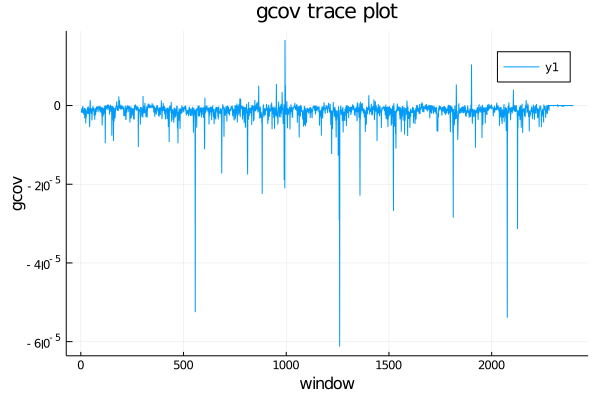

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error


In [20]:
using Plots
x = rg[!,2]; y = rg[!,9]; # These are the plotting data
plot(x,y, title = "gcov trace plot",
        xlabel = "window", ylabel = "gcov")

In [21]:
# Find the window that explanied most gcov
findmin(rg[!,9])

(-6.126160415990389e-5, 1260)

In [22]:
@time FinADG_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_FinADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:23:35


BoundsError: BoundsError: attempt to access (2398×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA    │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64 │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼─────────┼───────────┤
│ 1    │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 7.87441e-5     │ 9.85263e-5  │ 2.08     │ 0.61    │ 0.61      │
│ 2    │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 1.62074e-5     │ 2.54431e-5  │ 0.44     │ 0.512   │ 0.561     │
│ 3    │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 2.06205e-5     │ 3.54958e-5  │ 0.55     │ 0.472   │ 0.531333  │
│ 4    │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 1.51509e-5     │ 3.08601e-5  │ 0.4      │ 0.396   │ 0.4975    │
│ 5    │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 1.11566e-5     │ 2.25527e-5  │ 0.3      │ 0.396   │ 0.4772    │
│ 6    │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 1.51027e-5     │ 3.15937e-5  │ 0.4      │ 0.396   │ 0.463667  │
│ 7    │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 1.488e-5       │ 3.12578e-5  │ 0.39     │ 0.38    │ 0.451714  │
│ 8    │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 1.09812e-5     │ 2.16325e-5  │ 0.29     │ 0.38    │ 0.44275   │
│ 9    │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 8.37807e-6     │ 1.55094e-5  │ 0.22     │ 0.374   │ 0.435111  │
│ 10   │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 1.2742e-5      │ 2.63964e-5  │ 0.34     │ 0.37    │ 0.4286    │
│ 11   │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 1.48394e-5     │ 2.89831e-5  │ 0.39     │ 0.364   │ 0.422727  │
│ 12   │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 1.2439e-5      │ 2.65322e-5  │ 0.33     │ 0.344   │ 0.416167  │
│ 13   │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 9.95097e-6     │ 2.16306e-5  │ 0.27     │ 0.338   │ 0.410154  │
│ 14   │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 6.8809e-6      │ 1.4779e-5   │ 0.19     │ 0.336   │ 0.404857  │
│ 15   │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 9.81659e-6     │ 2.06603e-5  │ 0.27     │ 0.33    │ 0.399867  │
│ 16   │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 8.29156e-6     │ 1.78087e-5  │ 0.22     │ 0.312   │ 0.394375  │
│ 17   │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 6.47946e-6     │ 1.32311e-5  │ 0.17     │ 0.304   │ 0.389059  │
│ 18   │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 6.67731e-6     │ 1.46191e-5  │ 0.18     │ 0.304   │ 0.384333  │
│ 19   │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 9.82275e-6     │ 2.38123e-5  │ 0.26     │ 0.302   │ 0.38      │
│ 20   │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 6.76468e-6     │ 1.46637e-5  │ 0.18     │ 0.3     │ 0.376     │
│ 21   │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 5.66044e-6     │ 1.2804e-5   │ 0.15     │ 0.288   │ 0.37181   │
│ 22   │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 8.66031e-6     │ 2.07437e-5  │ 0.24     │ 0.286   │ 0.367909  │
│ 23   │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 7.5253e-6      │ 1.65367e-5  │ 0.2      │ 0.282   │ 0.364174  │
│ 24   │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 5.38171e-6     │ 1.22076e-5  │ 0.14     │ 0.276   │ 0.3605    │
│ 25   │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 5.34349e-6     │ 1.22443e-5  │ 0.14     │ 0.276   │ 0.35712   │
│ 26   │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 6.87686e-6     │ 1.58935e-5  │ 0.18     │ 0.276   │ 0.354     │
│ 27   │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 4.99332e-6     │ 1.13484e-5  │ 0.13     │ 0.274   │ 0.351037  │
│ 28   │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 5.69339e-6     │ 1.32428e-5  │ 0.15     │ 0.272   │ 0.348214  │
│ 29   │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 8.19278e-6     │ 1.999e-5    │ 0.22     │ 0.268   │ 0.345448  │
│ 30   │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 6.26283e-6     │ 1.51836e-5  │ 0.17     │ 0.268   │ 0.342867  │
│ 31   │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 6.72702e-6     │ 1.6806e-5   │ 0.18     │ 0.262   │ 0.340258  │
│ 32   │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 5.25293e-6     │ 1.22897e-5  │ 0.14     │ 0.26    │ 0.33775   │
│ 33   │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 4.7633e-6      │ 1.09564e-5  │ 0.13     │ 0.258   │ 0.335333  │
│ 34   │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 4.41714e-6     │ 1.11117e-5  │ 0.12     │ 0.256   │ 0.333     │
│ 35   │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 1.88619e-5     │ 5.72261e-5  │ 0.51     │ 0.256   │ 0.3308    │
│ 36   │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 6.24088e-6     │ 1.62663e-5  │ 0.16     │ 0.256   │ 0.328722  │
│ 37   │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 6.09887e-6     │ 1.80496e-5  │ 0.16     │ 0.256   │ 0.326757  │
│ 38   │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 6.0629e-6      │ 1.63828e-5  │ 0.16     │ 0.256   │ 0.324895  │
│ 39   │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 5.40332e-6     │ 1.64924e-5  │ 0.14     │ 0.256   │ 0.323128  │
│ 40   │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 8.15395e-6     │ 2.19904e-5  │ 0.21     │ 0.25    │ 0.3213    │
│ 41   │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 5.7644e-6      │ 1.36407e-5  │ 0.15     │ 0.25    │ 0.319561  │
│ 42   │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 6.11011e-6     │ 1.48286e-5  │ 0.16     │ 0.248   │ 0.317857  │
│ 43   │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 7.60185e-6     │ 1.81596e-5  │ 0.2      │ 0.246   │ 0.316186  │
│ 44   │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 4.99895e-6     │ 1.23623e-5  │ 0.13     │ 0.244   │ 0.314545  │
│ 45   │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 7.24938e-6     │ 1.73656e-5  │ 0.19     │ 0.244   │ 0.312978  │
│ 46   │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 4.89092e-6     │ 1.24879e-5  │ 0.13     │ 0.242   │ 0.311435  │
│ 47   │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 3.94281e-6     │ 9.4163e-6   │ 0.11     │ 0.242   │ 0.309957  │
│ 48   │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 4.2454e-6      │ 9.56277e-6  │ 0.11     │ 0.242   │ 0.308542  │
│ 49   │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 5.62901e-6     │ 1.41787e-5  │ 0.15     │ 0.24    │ 0.307143  │
│ 50   │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 5.91714e-6     │ 1.42828e-5  │ 0.16     │ 0.238   │ 0.30576   │
│ 51   │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 5.10359e-6     │ 1.38186e-5  │ 0.14     │ 0.238   │ 0.304431  │
│ 52   │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 4.02657e-6     │ 9.28238e-6  │ 0.11     │ 0.234   │ 0.303077  │
│ 53   │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 4.31888e-6     │ 9.53364e-6  │ 0.12     │ 0.234   │ 0.301774  │
│ 54   │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 4.7823e-6      │ 1.19447e-5  │ 0.13     │ 0.232   │ 0.300481  │
│ 55   │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 3.73269e-6     │ 8.45289e-6  │ 0.1      │ 0.23    │ 0.2992    │
│ 56   │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 5.68594e-6     │ 1.44679e-5  │ 0.15     │ 0.23    │ 0.297964  │
│ 57   │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 6.2189e-6      │ 1.65778e-5  │ 0.17     │ 0.23    │ 0.296772  │
│ 58   │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 6.35561e-6     │ 1.75157e-5  │ 0.17     │ 0.23    │ 0.295621  │
│ 59   │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 5.35836e-6     │ 1.33482e-5  │ 0.14     │ 0.228   │ 0.294475  │
│ 60   │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 4.56109e-6     │ 1.10783e-5  │ 0.12     │ 0.226   │ 0.293333  │
│ 61   │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 6.19264e-6     │ 1.85127e-5  │ 0.16     │ 0.226   │ 0.29223   │
│ 62   │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 3.98781e-6     │ 1.00278e-5  │ 0.11     │ 0.224   │ 0.291129  │
│ 63   │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 6.70625e-6     │ 1.76598e-5  │ 0.18     │ 0.224   │ 0.290063  │
│ 64   │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 4.62385e-6     │ 1.27727e-5  │ 0.12     │ 0.222   │ 0.289     │
│ 65   │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 4.07586e-6     │ 1.0803e-5   │ 0.11     │ 0.222   │ 0.287969  │
│ 66   │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 3.78956e-6     │ 1.07027e-5  │ 0.1      │ 0.22    │ 0.286939  │
│ 67   │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 5.39108e-6     │ 1.53412e-5  │ 0.14     │ 0.22    │ 0.28594   │
│ 68   │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 3.40078e-6     │ 8.23041e-6  │ 0.09     │ 0.22    │ 0.284971  │
│ 69   │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 3.61179e-6     │ 8.28391e-6  │ 0.09     │ 0.22    │ 0.284029  │
│ 70   │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 4.61643e-6     │ 1.48725e-5  │ 0.12     │ 0.22    │ 0.283114  │
│ 71   │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 3.99111e-6     │ 1.04301e-5  │ 0.11     │ 0.218   │ 0.282197  │
│ 72   │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 3.83179e-6     │ 1.09208e-5  │ 0.1      │ 0.218   │ 0.281306  │
│ 73   │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 3.31675e-6     │ 7.5856e-6   │ 0.09     │ 0.218   │ 0.280438  │
│ 74   │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 4.13089e-6     │ 1.12313e-5  │ 0.11     │ 0.216   │ 0.279568  │
│ 75   │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 4.59195e-6     │ 1.27982e-5  │ 0.12     │ 0.214   │ 0.278693  │
│ 76   │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 3.98621e-6     │ 9.84512e-6  │ 0.11     │ 0.214   │ 0.277842  │
│ 77   │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 3.92656e-6     │ 9.85905e-6  │ 0.1      │ 0.212   │ 0.276987  │
│ 78   │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 3.25396e-6     │ 7.8286e-6   │ 0.09     │ 0.212   │ 0.276154  │
│ 79   │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 4.12248e-6     │ 1.04971e-5  │ 0.11     │ 0.21    │ 0.275316  │
│ 80   │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 4.62607e-6     │ 1.32137e-5  │ 0.12     │ 0.21    │ 0.2745    │
│ 81   │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 3.94547e-6     │ 1.09394e-5  │ 0.11     │ 0.21    │ 0.273704  │
│ 82   │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 3.05877e-6     │ 7.38064e-6  │ 0.08     │ 0.208   │ 0.272902  │
│ 83   │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 3.20492e-6     │ 7.96215e-6  │ 0.09     │ 0.206   │ 0.272096  │
│ 84   │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 4.34766e-6     │ 1.22238e-5  │ 0.12     │ 0.206   │ 0.27131   │
│ 85   │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 5.47897e-6     │ 1.80529e-5  │ 0.15     │ 0.206   │ 0.270541  │
│ 86   │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 3.60262e-6     │ 9.72456e-6  │ 0.1      │ 0.206   │ 0.269791  │
│ 87   │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 4.60647e-6     │ 1.46513e-5  │ 0.12     │ 0.204   │ 0.269034  │
│ 88   │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 4.40483e-6     │ 1.19144e-5  │ 0.12     │ 0.204   │ 0.268295  │
│ 89   │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 4.44614e-6     │ 1.25763e-5  │ 0.12     │ 0.204   │ 0.267573  │
│ 90   │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 4.81132e-6     │ 1.34368e-5  │ 0.13     │ 0.204   │ 0.266867  │
│ 91   │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 4.67348e-6     │ 1.45831e-5  │ 0.13     │ 0.204   │ 0.266176  │
│ 92   │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 6.19368e-6     │ 2.09572e-5  │ 0.17     │ 0.204   │ 0.2655    │
│ 93   │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 3.00703e-6     │ 7.81202e-6  │ 0.08     │ 0.202   │ 0.264817  │
│ 94   │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 2.73725e-6     │ 6.6632e-6   │ 0.07     │ 0.202   │ 0.264149  │
│ 95   │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 2.74864e-6     │ 5.70033e-6  │ 0.07     │ 0.2     │ 0.263474  │
│ 96   │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 4.03897e-6     │ 1.05451e-5  │ 0.11     │ 0.2     │ 0.262813  │
│ 97   │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 3.40308e-6     │ 8.39979e-6  │ 0.09     │ 0.2     │ 0.262165  │
│ 98   │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 3.40895e-6     │ 1.00348e-5  │ 0.09     │ 0.2     │ 0.261531  │
│ 99   │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 3.26932e-6     │ 8.53501e-6  │ 0.09     │ 0.198   │ 0.260889  │
│ 100  │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 4.5039e-6      │ 1.40603e-5  │ 0.12     │ 0.196   │ 0.26024   │
│ 101  │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 3.17407e-6     │ 8.48114e-6  │ 0.09     │ 0.196   │ 0.259604  │
│ 102  │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 3.62346e-6     │ 9.97111e-6  │ 0.1      │ 0.196   │ 0.25898   │
│ 103  │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 3.8374e-6      │ 1.02801e-5  │ 0.1      │ 0.196   │ 0.258369  │
│ 104  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 3.25496e-6     │ 8.32816e-6  │ 0.09     │ 0.196   │ 0.257769  │
│ 105  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 3.25789e-6     │ 8.34271e-6  │ 0.09     │ 0.196   │ 0.257181  │
│ 106  │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 3.6372e-6      │ 1.11186e-5  │ 0.1      │ 0.194   │ 0.256585  │
│ 107  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 3.64592e-6     │ 1.11618e-5  │ 0.1      │ 0.192   │ 0.255981  │
│ 108  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 5.35866e-6     │ 1.47538e-5  │ 0.14     │ 0.192   │ 0.255389  │
│ 109  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 3.91501e-6     │ 1.21004e-5  │ 0.1      │ 0.19    │ 0.254789  │
│ 110  │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 3.87648e-6     │ 1.12206e-5  │ 0.1      │ 0.19    │ 0.2542    │
│ 111  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 2.64486e-6     │ 6.06735e-6  │ 0.07     │ 0.19    │ 0.253622  │
│ 112  │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 3.10771e-6     │ 8.00934e-6  │ 0.08     │ 0.19    │ 0.253054  │
│ 113  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 2.54444e-6     │ 7.0601e-6   │ 0.07     │ 0.19    │ 0.252496  │
│ 114  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 3.51619e-6     │ 9.38089e-6  │ 0.1      │ 0.188   │ 0.25193   │
│ 115  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 3.7781e-6      │ 1.15541e-5  │ 0.1      │ 0.188   │ 0.251374  │
│ 116  │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 3.51649e-6     │ 1.08244e-5  │ 0.09     │ 0.188   │ 0.250828  │
│ 117  │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 3.10388e-6     │ 7.83457e-6  │ 0.08     │ 0.188   │ 0.250291  │
│ 118  │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 3.1632e-6      │ 8.18839e-6  │ 0.08     │ 0.188   │ 0.249763  │
│ 119  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 2.89573e-6     │ 7.68044e-6  │ 0.08     │ 0.188   │ 0.249244  │
│ 120  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 2.95112e-6     │ 7.4097e-6   │ 0.08     │ 0.188   │ 0.248733  │
│ 121  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 6.63661e-6     │ 2.24186e-5  │ 0.17     │ 0.188   │ 0.248231  │
│ 122  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 2.90751e-6     │ 7.35495e-6  │ 0.08     │ 0.186   │ 0.247721  │
│ 123  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 3.50685e-6     │ 1.13949e-5  │ 0.1      │ 0.186   │ 0.24722   │
│ 124  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 2.44371e-6     │ 5.93004e-6  │ 0.07     │ 0.186   │ 0.246726  │
│ 125  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 3.23089e-6     │ 9.04658e-6  │ 0.08     │ 0.186   │ 0.24624   │
│ 126  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 2.23165e-6     │ 5.75794e-6  │ 0.06     │ 0.184   │ 0.245746  │
│ 127  │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 3.82748e-6     │ 1.00705e-5  │ 0.1      │ 0.184   │ 0.24526   │
│ 128  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 2.37338e-6     │ 5.78833e-6  │ 0.06     │ 0.184   │ 0.244781  │
│ 129  │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 3.88552e-6     │ 1.17863e-5  │ 0.1      │ 0.182   │ 0.244295  │
│ 130  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 2.37569e-6     │ 5.77278e-6  │ 0.06     │ 0.182   │ 0.243815  │
│ 131  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 3.80248e-6     │ 1.12515e-5  │ 0.1      │ 0.182   │ 0.243344  │
│ 132  │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 2.65603e-6     │ 6.7404e-6   │ 0.07     │ 0.18    │ 0.242864  │
│ 133  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 2.52083e-6     │ 6.39396e-6  │ 0.07     │ 0.18    │ 0.242391  │
│ 134  │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 3.16281e-6     │ 9.87727e-6  │ 0.08     │ 0.18    │ 0.241925  │
│ 135  │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 4.01473e-6     │ 1.21003e-5  │ 0.1      │ 0.178   │ 0.241452  │
│ 136  │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 3.15733e-6     │ 8.81903e-6  │ 0.08     │ 0.178   │ 0.240985  │
│ 137  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 2.51723e-6     │ 6.67308e-6  │ 0.07     │ 0.178   │ 0.240526  │
│ 138  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 3.29386e-6     │ 8.65336e-6  │ 0.09     │ 0.178   │ 0.240072  │
│ 139  │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 3.12457e-6     │ 8.56922e-6  │ 0.09     │ 0.178   │ 0.239626  │
│ 140  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 2.13793e-6     │ 5.61471e-6  │ 0.06     │ 0.176   │ 0.239171  │
│ 141  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 2.44734e-6     │ 6.22589e-6  │ 0.07     │ 0.176   │ 0.238723  │
│ 142  │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 2.54925e-6     │ 6.80556e-6  │ 0.07     │ 0.176   │ 0.238282  │
│ 143  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 3.58013e-6     │ 1.17948e-5  │ 0.1      │ 0.176   │ 0.237846  │
│ 144  │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 3.28137e-6     │ 1.02974e-5  │ 0.09     │ 0.174   │ 0.237403  │
│ 145  │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 2.83945e-6     │ 7.29465e-6  │ 0.08     │ 0.174   │ 0.236966  │
│ 146  │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 2.81204e-6     │ 8.19737e-6  │ 0.08     │ 0.174   │ 0.236534  │
│ 147  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 2.52057e-6     │ 5.92299e-6  │ 0.07     │ 0.174   │ 0.236109  │
│ 148  │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 3.26399e-6     │ 9.62883e-6  │ 0.09     │ 0.174   │ 0.235689  │
│ 149  │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 5.05672e-6     │ 1.54725e-5  │ 0.13     │ 0.172   │ 0.235262  │
│ 150  │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 3.63179e-6     │ 1.11686e-5  │ 0.1      │ 0.172   │ 0.23484   │
│ 151  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 2.12327e-6     │ 4.91629e-6  │ 0.06     │ 0.172   │ 0.234424  │
│ 152  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 2.91606e-6     │ 8.10194e-6  │ 0.08     │ 0.172   │ 0.234013  │
│ 153  │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 2.6399e-6      │ 6.67738e-6  │ 0.07     │ 0.172   │ 0.233608  │
│ 154  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 3.28962e-6     │ 9.02516e-6  │ 0.09     │ 0.172   │ 0.233208  │
│ 155  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 2.66141e-6     │ 7.46715e-6  │ 0.07     │ 0.172   │ 0.232813  │
│ 156  │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 2.45672e-6     │ 7.01711e-6  │ 0.07     │ 0.172   │ 0.232423  │
│ 157  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 2.1497e-6      │ 4.96682e-6  │ 0.06     │ 0.172   │ 0.232038  │
│ 158  │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 2.36941e-6     │ 6.4711e-6   │ 0.06     │ 0.17    │ 0.231646  │
│ 159  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 2.50804e-6     │ 6.05389e-6  │ 0.07     │ 0.17    │ 0.231258  │
│ 160  │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 3.18811e-6     │ 9.03578e-6  │ 0.08     │ 0.17    │ 0.230875  │
│ 161  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 3.13682e-6     │ 9.96474e-6  │ 0.08     │ 0.17    │ 0.230497  │
│ 162  │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 3.68698e-6     │ 1.00679e-5  │ 0.1      │ 0.17    │ 0.230123  │
│ 163  │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 3.34346e-6     │ 1.0241e-5   │ 0.09     │ 0.17    │ 0.229755  │
│ 164  │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 2.81085e-6     │ 8.9933e-6   │ 0.08     │ 0.17    │ 0.22939   │
│ 165  │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 2.60188e-6     │ 7.68738e-6  │ 0.07     │ 0.17    │ 0.22903   │
│ 166  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 2.54968e-6     │ 7.21569e-6  │ 0.07     │ 0.17    │ 0.228675  │
│ 167  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 2.52541e-6     │ 7.66814e-6  │ 0.07     │ 0.168   │ 0.228311  │
│ 168  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 2.2004e-6      │ 5.74037e-6  │ 0.06     │ 0.168   │ 0.227952  │
│ 169  │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 2.72052e-6     │ 7.92698e-6  │ 0.07     │ 0.168   │ 0.227598  │
│ 170  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 2.44398e-6     │ 6.42019e-6  │ 0.07     │ 0.168   │ 0.227247  │
│ 171  │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 4.65163e-6     │ 1.36769e-5  │ 0.12     │ 0.168   │ 0.226901  │
│ 172  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 2.83956e-6     │ 8.32931e-6  │ 0.08     │ 0.168   │ 0.226558  │
│ 173  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 2.83359e-6     │ 8.62525e-6  │ 0.08     │ 0.168   │ 0.22622   │
│ 174  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 2.13258e-6     │ 4.97395e-6  │ 0.06     │ 0.168   │ 0.225885  │
│ 175  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 2.54582e-6     │ 8.22543e-6  │ 0.07     │ 0.166   │ 0.225543  │
│ 176  │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 2.89651e-6     │ 8.85401e-6  │ 0.08     │ 0.166   │ 0.225205  │
│ 177  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 2.81574e-6     │ 8.43931e-6  │ 0.07     │ 0.166   │ 0.22487   │
│ 178  │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 2.86304e-6     │ 8.57511e-6  │ 0.08     │ 0.166   │ 0.224539  │
│ 179  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 2.8537e-6      │ 9.24021e-6  │ 0.08     │ 0.166   │ 0.224212  │
│ 180  │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 2.71078e-6     │ 7.93255e-6  │ 0.07     │ 0.166   │ 0.223889  │
│ 181  │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 2.67259e-6     │ 7.07668e-6  │ 0.07     │ 0.166   │ 0.223569  │
│ 182  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 2.26969e-6     │ 5.81574e-6  │ 0.06     │ 0.166   │ 0.223253  │
│ 183  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 3.85591e-6     │ 1.22303e-5  │ 0.1      │ 0.164   │ 0.222929  │
│ 184  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 2.14481e-6     │ 5.55561e-6  │ 0.06     │ 0.164   │ 0.222609  │
│ 185  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 2.10426e-6     │ 5.38187e-6  │ 0.06     │ 0.164   │ 0.222292  │
│ 186  │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 2.53578e-6     │ 7.30424e-6  │ 0.07     │ 0.164   │ 0.221978  │
│ 187  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 2.81913e-6     │ 8.12021e-6  │ 0.07     │ 0.164   │ 0.221668  │
│ 188  │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 2.2461e-6      │ 6.55766e-6  │ 0.06     │ 0.164   │ 0.221362  │
│ 189  │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 2.22461e-6     │ 6.3925e-6   │ 0.06     │ 0.164   │ 0.221058  │
│ 190  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 2.50091e-6     │ 7.35567e-6  │ 0.07     │ 0.164   │ 0.220758  │
│ 191  │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 2.55788e-6     │ 6.75941e-6  │ 0.07     │ 0.162   │ 0.22045   │
│ 192  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 2.55102e-6     │ 6.55127e-6  │ 0.07     │ 0.162   │ 0.220146  │
│ 193  │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 5.46333e-6     │ 2.30669e-5  │ 0.15     │ 0.162   │ 0.219845  │
│ 194  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 2.02854e-6     │ 5.01001e-6  │ 0.05     │ 0.162   │ 0.219546  │
│ 195  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 2.39448e-6     │ 5.98838e-6  │ 0.06     │ 0.162   │ 0.219251  │
│ 196  │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 5.16736e-6     │ 2.0215e-5   │ 0.13     │ 0.162   │ 0.218959  │
│ 197  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 2.45594e-6     │ 7.59877e-6  │ 0.07     │ 0.162   │ 0.21867   │
│ 198  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 2.51442e-6     │ 7.10581e-6  │ 0.07     │ 0.162   │ 0.218384  │
│ 199  │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 2.9582e-6      │ 9.61639e-6  │ 0.08     │ 0.162   │ 0.218101  │
│ 200  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 2.59407e-6     │ 6.44148e-6  │ 0.07     │ 0.162   │ 0.21782   │
│ 201  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 3.6206e-6      │ 1.18522e-5  │ 0.1      │ 0.162   │ 0.217542  │
│ 202  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 2.36144e-6     │ 6.69318e-6  │ 0.06     │ 0.16    │ 0.217257  │
│ 203  │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 4.3656e-6      │ 1.41647e-5  │ 0.12     │ 0.16    │ 0.216975  │
│ 204  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 3.15271e-6     │ 1.0779e-5   │ 0.08     │ 0.16    │ 0.216696  │
│ 205  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 2.43094e-6     │ 6.18669e-6  │ 0.06     │ 0.16    │ 0.21642   │
│ 206  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 2.72825e-6     │ 8.62637e-6  │ 0.07     │ 0.16    │ 0.216146  │
│ 207  │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 5.29699e-6     │ 1.88823e-5  │ 0.14     │ 0.16    │ 0.215874  │
│ 208  │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 2.64608e-6     │ 7.41907e-6  │ 0.07     │ 0.16    │ 0.215606  │
│ 209  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 2.50394e-6     │ 8.72969e-6  │ 0.07     │ 0.16    │ 0.21534   │
│ 210  │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 2.85323e-6     │ 9.3883e-6   │ 0.08     │ 0.16    │ 0.215076  │
│ 211  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 2.77059e-6     │ 8.71552e-6  │ 0.07     │ 0.16    │ 0.214815  │
│ 212  │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 2.10543e-6     │ 5.6588e-6   │ 0.06     │ 0.16    │ 0.214557  │
│ 213  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 2.32346e-6     │ 6.4387e-6   │ 0.06     │ 0.158   │ 0.214291  │
│ 214  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 1.95844e-6     │ 5.19137e-6  │ 0.05     │ 0.158   │ 0.214028  │
│ 215  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 2.40098e-6     │ 7.9442e-6   │ 0.07     │ 0.158   │ 0.213767  │
│ 216  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 2.29697e-6     │ 6.56887e-6  │ 0.06     │ 0.158   │ 0.213509  │
│ 217  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 2.83204e-6     │ 1.01188e-5  │ 0.08     │ 0.158   │ 0.213253  │
│ 218  │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 2.32713e-6     │ 6.76729e-6  │ 0.06     │ 0.158   │ 0.213     │
│ 219  │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 2.52488e-6     │ 7.02915e-6  │ 0.07     │ 0.158   │ 0.212749  │
│ 220  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 2.30471e-6     │ 5.95746e-6  │ 0.06     │ 0.158   │ 0.2125    │
│ 221  │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 2.1514e-6      │ 6.04621e-6  │ 0.06     │ 0.158   │ 0.212253  │
│ 222  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 2.07144e-6     │ 5.42849e-6  │ 0.06     │ 0.158   │ 0.212009  │
│ 223  │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 2.40315e-6     │ 7.1423e-6   │ 0.06     │ 0.158   │ 0.211767  │
│ 224  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 2.01319e-6     │ 5.19819e-6  │ 0.05     │ 0.156   │ 0.211518  │
│ 225  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 2.31646e-6     │ 7.0517e-6   │ 0.06     │ 0.156   │ 0.211271  │
│ 226  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 1.71835e-6     │ 4.1762e-6   │ 0.05     │ 0.156   │ 0.211027  │
│ 227  │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 2.97076e-6     │ 8.90571e-6  │ 0.08     │ 0.156   │ 0.210784  │
│ 228  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 2.12096e-6     │ 5.18471e-6  │ 0.06     │ 0.156   │ 0.210544  │
│ 229  │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 2.24601e-6     │ 6.11346e-6  │ 0.06     │ 0.156   │ 0.210306  │
│ 230  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 2.81619e-6     │ 8.05417e-6  │ 0.07     │ 0.156   │ 0.21007   │
│ 231  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 1.99767e-6     │ 5.23898e-6  │ 0.05     │ 0.156   │ 0.209835  │
│ 232  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 2.91257e-6     │ 9.22033e-6  │ 0.08     │ 0.156   │ 0.209603  │
│ 233  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 2.2669e-6      │ 5.77146e-6  │ 0.06     │ 0.156   │ 0.209373  │
│ 234  │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 2.5136e-6      │ 6.47926e-6  │ 0.07     │ 0.156   │ 0.209145  │
│ 235  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 2.02269e-6     │ 5.22266e-6  │ 0.05     │ 0.154   │ 0.208911  │
│ 236  │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 2.69327e-6     │ 9.47885e-6  │ 0.07     │ 0.154   │ 0.208678  │
│ 237  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 2.47702e-6     │ 7.2524e-6   │ 0.07     │ 0.154   │ 0.208447  │
│ 238  │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 2.71975e-6     │ 8.1199e-6   │ 0.07     │ 0.154   │ 0.208218  │
│ 239  │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 3.14275e-6     │ 1.08294e-5  │ 0.08     │ 0.154   │ 0.207992  │
│ 240  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 2.11335e-6     │ 5.56763e-6  │ 0.06     │ 0.154   │ 0.207767  │
│ 241  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 2.57755e-6     │ 8.83035e-6  │ 0.07     │ 0.154   │ 0.207544  │
│ 242  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 2.65329e-6     │ 8.25982e-6  │ 0.07     │ 0.154   │ 0.207322  │
│ 243  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 2.0473e-6      │ 6.29052e-6  │ 0.05     │ 0.154   │ 0.207103  │
│ 244  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 2.17125e-6     │ 5.78794e-6  │ 0.06     │ 0.154   │ 0.206885  │
│ 245  │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 2.13779e-6     │ 6.05854e-6  │ 0.06     │ 0.154   │ 0.206669  │
│ 246  │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 2.7586e-6      │ 1.06947e-5  │ 0.07     │ 0.154   │ 0.206455  │
│ 247  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 2.16903e-6     │ 5.57135e-6  │ 0.06     │ 0.152   │ 0.206235  │
│ 248  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 1.69496e-6     │ 3.91381e-6  │ 0.05     │ 0.152   │ 0.206016  │
│ 249  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 1.99601e-6     │ 4.82103e-6  │ 0.05     │ 0.152   │ 0.205799  │
│ 250  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 2.11444e-6     │ 5.77809e-6  │ 0.06     │ 0.152   │ 0.205584  │
│ 251  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 2.62773e-6     │ 7.44907e-6  │ 0.07     │ 0.152   │ 0.205371  │
│ 252  │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 2.12256e-6     │ 5.28046e-6  │ 0.06     │ 0.152   │ 0.205159  │
│ 253  │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 2.6581e-6      │ 7.56016e-6  │ 0.07     │ 0.152   │ 0.204949  │
│ 254  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 2.25176e-6     │ 7.80002e-6  │ 0.06     │ 0.152   │ 0.20474   │
│ 255  │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 2.94967e-6     │ 1.22588e-5  │ 0.08     │ 0.152   │ 0.204533  │
│ 256  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 2.15278e-6     │ 5.9928e-6   │ 0.06     │ 0.152   │ 0.204328  │
│ 257  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 2.17755e-6     │ 6.17838e-6  │ 0.06     │ 0.152   │ 0.204125  │
│ 258  │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 2.0216e-6      │ 5.3748e-6   │ 0.05     │ 0.152   │ 0.203922  │
│ 259  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 2.57873e-6     │ 7.22623e-6  │ 0.07     │ 0.15    │ 0.203714  │
│ 260  │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 2.23188e-6     │ 6.44233e-6  │ 0.06     │ 0.15    │ 0.203508  │
│ 261  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 1.9347e-6      │ 4.87859e-6  │ 0.05     │ 0.15    │ 0.203303  │
│ 262  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 2.30401e-6     │ 6.64658e-6  │ 0.06     │ 0.15    │ 0.203099  │
│ 263  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 1.90787e-6     │ 4.75895e-6  │ 0.05     │ 0.15    │ 0.202897  │
│ 264  │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 2.93224e-6     │ 9.23166e-6  │ 0.08     │ 0.15    │ 0.202697  │
│ 265  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 2.40961e-6     │ 8.53772e-6  │ 0.06     │ 0.15    │ 0.202498  │
│ 266  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 2.16844e-6     │ 5.76183e-6  │ 0.06     │ 0.15    │ 0.202301  │
│ 267  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 1.97996e-6     │ 5.02504e-6  │ 0.05     │ 0.15    │ 0.202105  │
│ 268  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 2.06824e-6     │ 5.26825e-6  │ 0.05     │ 0.15    │ 0.20191   │
│ 269  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 2.15991e-6     │ 5.75997e-6  │ 0.06     │ 0.15    │ 0.201717  │
│ 270  │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 2.31874e-6     │ 6.60222e-6  │ 0.06     │ 0.15    │ 0.201526  │
│ 271  │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 2.44875e-6     │ 7.03169e-6  │ 0.06     │ 0.15    │ 0.201336  │
│ 272  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 2.14191e-6     │ 5.73416e-6  │ 0.06     │ 0.15    │ 0.201147  │
│ 273  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 3.2058e-6      │ 1.2753e-5   │ 0.08     │ 0.15    │ 0.20096   │
│ 274  │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 3.42538e-6     │ 1.18749e-5  │ 0.09     │ 0.15    │ 0.200774  │
│ 275  │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 2.17752e-6     │ 5.81245e-6  │ 0.06     │ 0.148   │ 0.200582  │
│ 276  │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 2.74956e-6     │ 1.02336e-5  │ 0.07     │ 0.148   │ 0.200391  │
│ 277  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 2.21886e-6     │ 6.67076e-6  │ 0.06     │ 0.148   │ 0.200202  │
│ 278  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 2.21363e-6     │ 5.92835e-6  │ 0.06     │ 0.148   │ 0.200014  │
│ 279  │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 2.30043e-6     │ 6.58498e-6  │ 0.06     │ 0.148   │ 0.199828  │
│ 280  │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 2.24353e-6     │ 6.07774e-6  │ 0.06     │ 0.148   │ 0.199643  │
│ 281  │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 1.92289e-6     │ 4.86474e-6  │ 0.05     │ 0.148   │ 0.199459  │
│ 282  │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 2.63011e-6     │ 7.52715e-6  │ 0.07     │ 0.148   │ 0.199277  │
│ 283  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 2.4527e-6      │ 8.44088e-6  │ 0.07     │ 0.148   │ 0.199095  │
│ 284  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 2.50717e-6     │ 8.09385e-6  │ 0.07     │ 0.148   │ 0.198915  │
│ 285  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 2.34523e-6     │ 7.29812e-6  │ 0.06     │ 0.148   │ 0.198737  │
│ 286  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 2.66745e-6     │ 8.05156e-6  │ 0.07     │ 0.148   │ 0.198559  │
│ 287  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 1.85478e-6     │ 4.35964e-6  │ 0.05     │ 0.148   │ 0.198383  │
│ 288  │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 2.78539e-6     │ 1.03225e-5  │ 0.07     │ 0.148   │ 0.198208  │
│ 289  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 2.01699e-6     │ 5.68284e-6  │ 0.05     │ 0.148   │ 0.198035  │
│ 290  │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 2.25808e-6     │ 7.01164e-6  │ 0.06     │ 0.148   │ 0.197862  │
│ 291  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 2.13015e-6     │ 5.74261e-6  │ 0.06     │ 0.148   │ 0.197691  │
│ 292  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 2.42709e-6     │ 8.1872e-6   │ 0.06     │ 0.148   │ 0.197521  │
│ 293  │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 2.88473e-6     │ 9.52956e-6  │ 0.08     │ 0.146   │ 0.197345  │
│ 294  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 1.91443e-6     │ 6.41523e-6  │ 0.05     │ 0.146   │ 0.19717   │
│ 295  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 1.99374e-6     │ 5.07653e-6  │ 0.05     │ 0.146   │ 0.196997  │
│ 296  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 2.20429e-6     │ 6.16214e-6  │ 0.06     │ 0.146   │ 0.196824  │
│ 297  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 2.38157e-6     │ 7.22125e-6  │ 0.06     │ 0.146   │ 0.196653  │
│ 298  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 2.12074e-6     │ 6.16282e-6  │ 0.06     │ 0.146   │ 0.196483  │
│ 299  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 2.40932e-6     │ 7.92272e-6  │ 0.07     │ 0.146   │ 0.196314  │
│ 300  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 2.19627e-6     │ 6.87112e-6  │ 0.06     │ 0.146   │ 0.196147  │
│ 301  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 1.99476e-6     │ 5.33203e-6  │ 0.05     │ 0.146   │ 0.19598   │
│ 302  │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 2.36861e-6     │ 7.82484e-6  │ 0.06     │ 0.146   │ 0.195815  │
│ 303  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 2.02123e-6     │ 5.69558e-6  │ 0.05     │ 0.146   │ 0.19565   │
│ 304  │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 2.36808e-6     │ 8.08144e-6  │ 0.06     │ 0.146   │ 0.195487  │
│ 305  │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 2.08735e-6     │ 6.48692e-6  │ 0.06     │ 0.146   │ 0.195325  │
│ 306  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 2.12723e-6     │ 7.43807e-6  │ 0.06     │ 0.146   │ 0.195163  │
│ 307  │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 1.92524e-6     │ 5.55033e-6  │ 0.05     │ 0.146   │ 0.195003  │
│ 308  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 1.8966e-6      │ 4.90656e-6  │ 0.05     │ 0.146   │ 0.194844  │
│ 309  │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 1.82457e-6     │ 5.10107e-6  │ 0.05     │ 0.146   │ 0.194686  │
│ 310  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 3.27506e-6     │ 1.11329e-5  │ 0.09     │ 0.146   │ 0.194529  │
│ 311  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 2.235e-6       │ 6.30582e-6  │ 0.06     │ 0.146   │ 0.194373  │
│ 312  │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 2.61054e-6     │ 7.42507e-6  │ 0.07     │ 0.144   │ 0.194212  │
│ 313  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 2.73993e-6     │ 9.64616e-6  │ 0.07     │ 0.144   │ 0.194051  │
│ 314  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 2.61649e-6     │ 8.51818e-6  │ 0.07     │ 0.144   │ 0.193892  │
│ 315  │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 2.72895e-6     │ 1.09525e-5  │ 0.08     │ 0.144   │ 0.193733  │
│ 316  │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 1.65532e-6     │ 4.24265e-6  │ 0.04     │ 0.144   │ 0.193576  │
│ 317  │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 2.12848e-6     │ 6.23441e-6  │ 0.06     │ 0.144   │ 0.19342   │
│ 318  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 2.22198e-6     │ 6.67744e-6  │ 0.06     │ 0.144   │ 0.193264  │
│ 319  │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 1.87214e-6     │ 5.37832e-6  │ 0.05     │ 0.144   │ 0.19311   │
│ 320  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 1.98622e-6     │ 5.174e-6    │ 0.05     │ 0.144   │ 0.192956  │
│ 321  │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 2.67738e-6     │ 9.13482e-6  │ 0.07     │ 0.144   │ 0.192804  │
│ 322  │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 2.21592e-6     │ 6.53289e-6  │ 0.06     │ 0.144   │ 0.192652  │
│ 323  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 1.87856e-6     │ 4.74272e-6  │ 0.05     │ 0.142   │ 0.192495  │
│ 324  │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 2.93295e-6     │ 1.12711e-5  │ 0.08     │ 0.142   │ 0.19234   │
│ 325  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 1.75682e-6     │ 5.2004e-6   │ 0.05     │ 0.142   │ 0.192185  │
│ 326  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 2.17495e-6     │ 6.73414e-6  │ 0.06     │ 0.142   │ 0.192031  │
│ 327  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 1.74674e-6     │ 4.16243e-6  │ 0.05     │ 0.142   │ 0.191878  │
│ 328  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 2.07159e-6     │ 5.75204e-6  │ 0.06     │ 0.142   │ 0.191726  │
│ 329  │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 2.0993e-6      │ 6.84413e-6  │ 0.06     │ 0.142   │ 0.191574  │
│ 330  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 2.04393e-6     │ 5.73384e-6  │ 0.05     │ 0.142   │ 0.191424  │
│ 331  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 1.93671e-6     │ 5.03174e-6  │ 0.05     │ 0.142   │ 0.191275  │
│ 332  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 1.86651e-6     │ 4.7356e-6   │ 0.05     │ 0.142   │ 0.191127  │
│ 333  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 2.1036e-6      │ 5.99783e-6  │ 0.06     │ 0.142   │ 0.190979  │
│ 334  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 2.02667e-6     │ 5.58584e-6  │ 0.05     │ 0.142   │ 0.190832  │
│ 335  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 1.85195e-6     │ 5.17467e-6  │ 0.05     │ 0.142   │ 0.190687  │
│ 336  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 1.87386e-6     │ 5.08245e-6  │ 0.05     │ 0.142   │ 0.190542  │
│ 337  │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 1.77791e-6     │ 4.551e-6    │ 0.05     │ 0.142   │ 0.190398  │
│ 338  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 1.92618e-6     │ 5.60469e-6  │ 0.05     │ 0.142   │ 0.190254  │
│ 339  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 1.98716e-6     │ 5.53928e-6  │ 0.05     │ 0.142   │ 0.190112  │
│ 340  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 1.93193e-6     │ 5.49859e-6  │ 0.05     │ 0.142   │ 0.189971  │
│ 341  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 2.56359e-6     │ 8.28035e-6  │ 0.07     │ 0.142   │ 0.18983   │
│ 342  │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 2.2159e-6      │ 6.45352e-6  │ 0.06     │ 0.142   │ 0.18969   │
│ 343  │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 3.0866e-6      │ 1.06406e-5  │ 0.08     │ 0.142   │ 0.189551  │
│ 344  │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 2.40531e-6     │ 7.09625e-6  │ 0.06     │ 0.142   │ 0.189413  │
│ 345  │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 3.45486e-6     │ 1.20555e-5  │ 0.09     │ 0.142   │ 0.189275  │
│ 346  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 2.62796e-6     │ 8.06186e-6  │ 0.07     │ 0.142   │ 0.189139  │
│ 347  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 1.7729e-6      │ 4.78158e-6  │ 0.05     │ 0.142   │ 0.189003  │
│ 348  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 1.7026e-6      │ 4.96972e-6  │ 0.05     │ 0.14    │ 0.188862  │
│ 349  │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 1.96456e-6     │ 5.30845e-6  │ 0.05     │ 0.14    │ 0.188722  │
│ 350  │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 1.86684e-6     │ 5.45239e-6  │ 0.05     │ 0.14    │ 0.188583  │
│ 351  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 1.71101e-6     │ 4.59396e-6  │ 0.05     │ 0.14    │ 0.188444  │
│ 352  │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 1.81404e-6     │ 5.03658e-6  │ 0.05     │ 0.14    │ 0.188307  │
│ 353  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 2.06232e-6     │ 6.15929e-6  │ 0.05     │ 0.14    │ 0.18817   │
│ 354  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 2.44898e-6     │ 8.99695e-6  │ 0.07     │ 0.14    │ 0.188034  │
│ 355  │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 1.88589e-6     │ 5.23208e-6  │ 0.05     │ 0.14    │ 0.187899  │
│ 356  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 2.17255e-6     │ 6.7318e-6   │ 0.06     │ 0.14    │ 0.187764  │
│ 357  │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 2.74242e-6     │ 1.07803e-5  │ 0.07     │ 0.14    │ 0.18763   │
│ 358  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 2.04632e-6     │ 5.67426e-6  │ 0.05     │ 0.14    │ 0.187497  │
│ 359  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 2.99726e-6     │ 1.028e-5    │ 0.08     │ 0.14    │ 0.187365  │
│ 360  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 2.04173e-6     │ 6.55188e-6  │ 0.06     │ 0.14    │ 0.187233  │
│ 361  │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 1.75274e-6     │ 5.00645e-6  │ 0.05     │ 0.14    │ 0.187102  │
│ 362  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 2.05819e-6     │ 6.59455e-6  │ 0.05     │ 0.14    │ 0.186972  │
│ 363  │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 1.85875e-6     │ 5.8735e-6   │ 0.05     │ 0.14    │ 0.186843  │
│ 364  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 2.18798e-6     │ 6.15087e-6  │ 0.06     │ 0.14    │ 0.186714  │
│ 365  │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 2.86807e-6     │ 1.05921e-5  │ 0.08     │ 0.14    │ 0.186586  │
│ 366  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 2.11523e-6     │ 6.33943e-6  │ 0.06     │ 0.138   │ 0.186454  │
│ 367  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 2.49798e-6     │ 8.2852e-6   │ 0.07     │ 0.138   │ 0.186322  │
│ 368  │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 1.80513e-6     │ 4.99144e-6  │ 0.05     │ 0.138   │ 0.18619   │
│ 369  │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 2.48346e-6     │ 8.37543e-6  │ 0.07     │ 0.138   │ 0.18606   │
│ 370  │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 1.81563e-6     │ 5.46676e-6  │ 0.05     │ 0.138   │ 0.18593   │
│ 371  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 1.93296e-6     │ 5.19214e-6  │ 0.05     │ 0.138   │ 0.185801  │
│ 372  │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 2.12106e-6     │ 5.90176e-6  │ 0.06     │ 0.138   │ 0.185672  │
│ 373  │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 2.12026e-6     │ 6.51475e-6  │ 0.06     │ 0.138   │ 0.185544  │
│ 374  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 1.7724e-6      │ 5.22919e-6  │ 0.05     │ 0.138   │ 0.185417  │
│ 375  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 2.3616e-6      │ 7.89826e-6  │ 0.06     │ 0.138   │ 0.185291  │
│ 376  │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 2.13566e-6     │ 6.75878e-6  │ 0.06     │ 0.138   │ 0.185165  │
│ 377  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 2.65276e-6     │ 9.3459e-6   │ 0.07     │ 0.138   │ 0.18504   │
│ 378  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 2.03415e-6     │ 5.42041e-6  │ 0.06     │ 0.138   │ 0.184915  │
│ 379  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 2.10162e-6     │ 5.75065e-6  │ 0.06     │ 0.138   │ 0.184792  │
│ 380  │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 2.00028e-6     │ 5.47561e-6  │ 0.05     │ 0.138   │ 0.184668  │
│ 381  │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 1.80714e-6     │ 5.03063e-6  │ 0.05     │ 0.138   │ 0.184546  │
│ 382  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 1.9157e-6      │ 5.33813e-6  │ 0.05     │ 0.138   │ 0.184424  │
│ 383  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 1.80343e-6     │ 4.54508e-6  │ 0.05     │ 0.138   │ 0.184303  │
│ 384  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 1.73271e-6     │ 4.88861e-6  │ 0.05     │ 0.136   │ 0.184177  │
│ 385  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 1.84397e-6     │ 5.22225e-6  │ 0.05     │ 0.136   │ 0.184052  │
│ 386  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 1.70289e-6     │ 4.64945e-6  │ 0.05     │ 0.136   │ 0.183927  │
│ 387  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 1.96521e-6     │ 5.14006e-6  │ 0.05     │ 0.136   │ 0.183804  │
│ 388  │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 1.65921e-6     │ 4.71839e-6  │ 0.04     │ 0.136   │ 0.18368   │
│ 389  │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 1.6264e-6      │ 4.23072e-6  │ 0.04     │ 0.136   │ 0.183558  │
│ 390  │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 2.38069e-6     │ 8.65552e-6  │ 0.06     │ 0.136   │ 0.183436  │
│ 391  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 1.69986e-6     │ 5.0837e-6   │ 0.05     │ 0.136   │ 0.183315  │
│ 392  │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 1.47864e-6     │ 3.73458e-6  │ 0.04     │ 0.136   │ 0.183194  │
│ 393  │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 2.42833e-6     │ 7.67278e-6  │ 0.07     │ 0.136   │ 0.183074  │
│ 394  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 1.63562e-6     │ 4.30174e-6  │ 0.04     │ 0.136   │ 0.182954  │
│ 395  │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 1.76232e-6     │ 4.62741e-6  │ 0.05     │ 0.136   │ 0.182835  │
│ 396  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 1.80116e-6     │ 5.37853e-6  │ 0.05     │ 0.136   │ 0.182717  │
│ 397  │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 1.55193e-6     │ 3.87946e-6  │ 0.04     │ 0.136   │ 0.182599  │
│ 398  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 1.83452e-6     │ 5.44741e-6  │ 0.05     │ 0.136   │ 0.182482  │
│ 399  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 1.66404e-6     │ 4.35605e-6  │ 0.04     │ 0.136   │ 0.182366  │
│ 400  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 2.18123e-6     │ 6.30888e-6  │ 0.06     │ 0.136   │ 0.18225   │
│ 401  │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 1.66528e-6     │ 4.96182e-6  │ 0.04     │ 0.136   │ 0.182135  │
│ 402  │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 2.09377e-6     │ 6.45486e-6  │ 0.06     │ 0.136   │ 0.18202   │
│ 403  │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 2.06033e-6     │ 5.64862e-6  │ 0.06     │ 0.136   │ 0.181906  │
│ 404  │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 2.32262e-6     │ 8.17144e-6  │ 0.06     │ 0.136   │ 0.181792  │
│ 405  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 1.88869e-6     │ 5.31213e-6  │ 0.05     │ 0.136   │ 0.181679  │
│ 406  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 1.9395e-6      │ 5.44223e-6  │ 0.05     │ 0.134   │ 0.181562  │
│ 407  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 1.77398e-6     │ 4.84904e-6  │ 0.05     │ 0.134   │ 0.181445  │
│ 408  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 2.31273e-6     │ 8.99312e-6  │ 0.06     │ 0.134   │ 0.181328  │
│ 409  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.78289e-6     │ 5.082e-6    │ 0.05     │ 0.134   │ 0.181213  │
│ 410  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 1.99707e-6     │ 5.6793e-6   │ 0.05     │ 0.134   │ 0.181098  │
│ 411  │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 4.48312e-6     │ 1.83679e-5  │ 0.12     │ 0.134   │ 0.180983  │
│ 412  │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 2.63826e-6     │ 9.14475e-6  │ 0.07     │ 0.134   │ 0.180869  │
│ 413  │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 2.03772e-6     │ 5.93436e-6  │ 0.05     │ 0.134   │ 0.180755  │
│ 414  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 1.92965e-6     │ 5.77689e-6  │ 0.05     │ 0.134   │ 0.180643  │
│ 415  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 1.87841e-6     │ 5.13341e-6  │ 0.05     │ 0.134   │ 0.18053   │
│ 416  │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 2.13196e-6     │ 6.97051e-6  │ 0.06     │ 0.134   │ 0.180418  │
│ 417  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 1.74216e-6     │ 4.71057e-6  │ 0.05     │ 0.134   │ 0.180307  │
│ 418  │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 1.7841e-6      │ 5.11442e-6  │ 0.05     │ 0.134   │ 0.180196  │
│ 419  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 1.84613e-6     │ 5.0418e-6   │ 0.05     │ 0.134   │ 0.180086  │
│ 420  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 2.25132e-6     │ 7.1447e-6   │ 0.06     │ 0.134   │ 0.179976  │
│ 421  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 1.87301e-6     │ 5.25654e-6  │ 0.05     │ 0.134   │ 0.179867  │
│ 422  │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 1.79631e-6     │ 4.79217e-6  │ 0.05     │ 0.134   │ 0.179758  │
│ 423  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.56402e-6     │ 3.94311e-6  │ 0.04     │ 0.134   │ 0.17965   │
│ 424  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 1.79672e-6     │ 5.53235e-6  │ 0.05     │ 0.134   │ 0.179542  │
│ 425  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 1.49453e-6     │ 3.84561e-6  │ 0.04     │ 0.134   │ 0.179435  │
│ 426  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 1.88502e-6     │ 5.84916e-6  │ 0.05     │ 0.134   │ 0.179329  │
│ 427  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 1.82455e-6     │ 5.36324e-6  │ 0.05     │ 0.134   │ 0.179222  │
│ 428  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 1.98917e-6     │ 6.11919e-6  │ 0.05     │ 0.134   │ 0.179117  │
│ 429  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 1.50915e-6     │ 4.18105e-6  │ 0.04     │ 0.132   │ 0.179007  │
│ 430  │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 2.38926e-6     │ 7.67222e-6  │ 0.06     │ 0.132   │ 0.178898  │
│ 431  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 1.65901e-6     │ 4.65252e-6  │ 0.04     │ 0.132   │ 0.178789  │
│ 432  │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 1.61499e-6     │ 3.67127e-6  │ 0.04     │ 0.132   │ 0.178681  │
│ 433  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 1.81291e-6     │ 5.23398e-6  │ 0.05     │ 0.132   │ 0.178573  │
│ 434  │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 1.33114e-5     │ 4.96355e-5  │ 0.36     │ 0.132   │ 0.178465  │
│ 435  │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 3.94346e-6     │ 1.96595e-5  │ 0.1      │ 0.132   │ 0.178359  │
│ 436  │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 3.36388e-6     │ 1.22782e-5  │ 0.09     │ 0.132   │ 0.178252  │
│ 437  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 1.74104e-6     │ 5.06943e-6  │ 0.05     │ 0.132   │ 0.178146  │
│ 438  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 1.92716e-6     │ 6.94204e-6  │ 0.05     │ 0.132   │ 0.178041  │
│ 439  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 1.9266e-6      │ 5.55687e-6  │ 0.05     │ 0.132   │ 0.177936  │
│ 440  │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 2.56117e-6     │ 8.19986e-6  │ 0.07     │ 0.132   │ 0.177832  │
│ 441  │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 1.86976e-6     │ 5.62385e-6  │ 0.05     │ 0.132   │ 0.177728  │
│ 442  │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 2.16515e-6     │ 6.85703e-6  │ 0.06     │ 0.132   │ 0.177624  │
│ 443  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 2.07015e-6     │ 5.67347e-6  │ 0.06     │ 0.132   │ 0.177521  │
│ 444  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 2.72603e-6     │ 8.59712e-6  │ 0.07     │ 0.132   │ 0.177419  │
│ 445  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 1.62381e-6     │ 4.83901e-6  │ 0.04     │ 0.132   │ 0.177317  │
│ 446  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 1.98831e-6     │ 6.6104e-6   │ 0.05     │ 0.132   │ 0.177215  │
│ 447  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 2.12552e-6     │ 6.22189e-6  │ 0.06     │ 0.132   │ 0.177114  │
│ 448  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 1.89467e-6     │ 6.19285e-6  │ 0.05     │ 0.132   │ 0.177013  │
│ 449  │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 1.98567e-6     │ 5.7915e-6   │ 0.05     │ 0.132   │ 0.176913  │
│ 450  │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 1.87102e-6     │ 5.63509e-6  │ 0.05     │ 0.132   │ 0.176813  │
│ 451  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 1.65276e-6     │ 4.57125e-6  │ 0.04     │ 0.13    │ 0.17671   │
│ 452  │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 1.60906e-6     │ 4.0922e-6   │ 0.04     │ 0.13    │ 0.176606  │
│ 453  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 1.7842e-6      │ 5.6354e-6   │ 0.05     │ 0.13    │ 0.176503  │
│ 454  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 2.29259e-6     │ 8.00273e-6  │ 0.06     │ 0.13    │ 0.176401  │
│ 455  │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 9.84688e-6     │ 4.26496e-5  │ 0.26     │ 0.13    │ 0.176299  │
│ 456  │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 2.11385e-6     │ 6.14415e-6  │ 0.06     │ 0.13    │ 0.176197  │
│ 457  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 2.1862e-6      │ 7.06828e-6  │ 0.06     │ 0.13    │ 0.176096  │
│ 458  │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 1.89464e-6     │ 5.43783e-6  │ 0.05     │ 0.13    │ 0.175996  │
│ 459  │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 1.77927e-6     │ 4.64769e-6  │ 0.05     │ 0.13    │ 0.175895  │
│ 460  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 1.60995e-6     │ 4.20792e-6  │ 0.04     │ 0.13    │ 0.175796  │
│ 461  │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 1.70436e-6     │ 4.72417e-6  │ 0.05     │ 0.13    │ 0.175696  │
│ 462  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 1.67249e-6     │ 4.83245e-6  │ 0.04     │ 0.13    │ 0.175597  │
│ 463  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 1.75726e-6     │ 4.89846e-6  │ 0.05     │ 0.13    │ 0.175499  │
│ 464  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 2.12223e-6     │ 6.41556e-6  │ 0.06     │ 0.13    │ 0.175401  │
│ 465  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 1.61722e-6     │ 4.67187e-6  │ 0.04     │ 0.13    │ 0.175303  │
│ 466  │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 1.71556e-6     │ 4.51414e-6  │ 0.05     │ 0.13    │ 0.175206  │
│ 467  │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 1.75253e-6     │ 5.34183e-6  │ 0.05     │ 0.13    │ 0.175109  │
│ 468  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 1.62749e-6     │ 4.60164e-6  │ 0.04     │ 0.13    │ 0.175013  │
│ 469  │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 1.66638e-6     │ 4.57806e-6  │ 0.04     │ 0.13    │ 0.174917  │
│ 470  │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 2.0879e-6      │ 7.21468e-6  │ 0.06     │ 0.13    │ 0.174821  │
│ 471  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 1.66702e-6     │ 5.55057e-6  │ 0.04     │ 0.13    │ 0.174726  │
│ 472  │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 1.90409e-6     │ 6.06211e-6  │ 0.05     │ 0.13    │ 0.174631  │
│ 473  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 1.69762e-6     │ 4.48477e-6  │ 0.05     │ 0.13    │ 0.174537  │
│ 474  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 1.96996e-6     │ 6.05253e-6  │ 0.05     │ 0.13    │ 0.174443  │
│ 475  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 1.9363e-6      │ 5.70474e-6  │ 0.05     │ 0.13    │ 0.174349  │
│ 476  │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 1.74013e-6     │ 4.96957e-6  │ 0.05     │ 0.13    │ 0.174256  │
│ 477  │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 1.87128e-6     │ 5.89536e-6  │ 0.05     │ 0.13    │ 0.174164  │
│ 478  │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 1.78694e-6     │ 5.80196e-6  │ 0.05     │ 0.13    │ 0.174071  │
│ 479  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 1.5271e-6      │ 4.01366e-6  │ 0.04     │ 0.13    │ 0.173979  │
│ 480  │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 1.49546e-6     │ 4.14864e-6  │ 0.04     │ 0.13    │ 0.173888  │
│ 481  │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 1.96561e-6     │ 6.72464e-6  │ 0.05     │ 0.128   │ 0.173792  │
│ 482  │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 2.70318e-6     │ 1.19206e-5  │ 0.07     │ 0.128   │ 0.173697  │
│ 483  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 1.87476e-6     │ 5.81708e-6  │ 0.05     │ 0.128   │ 0.173602  │
│ 484  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 1.92534e-6     │ 6.61557e-6  │ 0.05     │ 0.128   │ 0.173508  │
│ 485  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 1.62748e-6     │ 4.9231e-6   │ 0.04     │ 0.128   │ 0.173414  │
│ 486  │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 1.80904e-6     │ 6.02069e-6  │ 0.05     │ 0.128   │ 0.173321  │
│ 487  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 2.12891e-6     │ 8.28193e-6  │ 0.06     │ 0.128   │ 0.173228  │
│ 488  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 1.56467e-6     │ 4.94984e-6  │ 0.04     │ 0.128   │ 0.173135  │
│ 489  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 1.69939e-6     │ 5.89843e-6  │ 0.05     │ 0.128   │ 0.173043  │
│ 490  │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 1.86231e-6     │ 5.51237e-6  │ 0.05     │ 0.128   │ 0.172951  │
│ 491  │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 1.88495e-6     │ 5.68932e-6  │ 0.05     │ 0.128   │ 0.172859  │
│ 492  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 1.84678e-6     │ 5.40234e-6  │ 0.05     │ 0.128   │ 0.172768  │
│ 493  │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 1.69669e-6     │ 5.77694e-6  │ 0.05     │ 0.128   │ 0.172677  │
│ 494  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 1.54164e-6     │ 4.05979e-6  │ 0.04     │ 0.128   │ 0.172587  │
│ 495  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 1.55851e-6     │ 4.14935e-6  │ 0.04     │ 0.128   │ 0.172497  │
│ 496  │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 2.03788e-6     │ 6.84624e-6  │ 0.05     │ 0.128   │ 0.172407  │
│ 497  │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 1.72216e-6     │ 4.89588e-6  │ 0.05     │ 0.128   │ 0.172318  │
│ 498  │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 2.1247e-6      │ 7.68929e-6  │ 0.06     │ 0.128   │ 0.172229  │
│ 499  │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 3.00653e-6     │ 1.1518e-5   │ 0.08     │ 0.128   │ 0.17214   │
│ 500  │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 1.8531e-6      │ 5.86286e-6  │ 0.05     │ 0.128   │ 0.172052  │
│ 501  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 1.59693e-6     │ 4.80069e-6  │ 0.04     │ 0.126   │ 0.17196   │
│ 502  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 1.79807e-6     │ 5.21526e-6  │ 0.05     │ 0.126   │ 0.171869  │
│ 503  │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 1.68697e-6     │ 5.13211e-6  │ 0.05     │ 0.126   │ 0.171777  │
│ 504  │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 2.0019e-6      │ 6.52816e-6  │ 0.05     │ 0.126   │ 0.171687  │
│ 505  │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 1.83001e-6     │ 5.85112e-6  │ 0.05     │ 0.126   │ 0.171596  │
│ 506  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 1.65311e-6     │ 5.28489e-6  │ 0.04     │ 0.126   │ 0.171506  │
│ 507  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 1.526e-6       │ 4.11556e-6  │ 0.04     │ 0.126   │ 0.171416  │
│ 508  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 1.79347e-6     │ 5.17932e-6  │ 0.05     │ 0.126   │ 0.171327  │
│ 509  │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 1.82968e-6     │ 6.12484e-6  │ 0.05     │ 0.126   │ 0.171238  │
│ 510  │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 1.54904e-6     │ 4.37102e-6  │ 0.04     │ 0.126   │ 0.171149  │
│ 511  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 1.45608e-6     │ 3.94323e-6  │ 0.04     │ 0.126   │ 0.171061  │
│ 512  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 2.0448e-6      │ 6.18276e-6  │ 0.05     │ 0.126   │ 0.170973  │
│ 513  │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 1.58079e-6     │ 4.41916e-6  │ 0.04     │ 0.126   │ 0.170885  │
│ 514  │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 1.68913e-6     │ 4.94664e-6  │ 0.05     │ 0.126   │ 0.170798  │
│ 515  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 1.72081e-6     │ 5.3532e-6   │ 0.05     │ 0.126   │ 0.170711  │
│ 516  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 1.44049e-6     │ 3.82142e-6  │ 0.04     │ 0.126   │ 0.170624  │
│ 517  │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 1.52259e-6     │ 3.99473e-6  │ 0.04     │ 0.126   │ 0.170538  │
│ 518  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 1.55246e-6     │ 4.42182e-6  │ 0.04     │ 0.126   │ 0.170452  │
│ 519  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 1.82181e-6     │ 5.94783e-6  │ 0.05     │ 0.126   │ 0.170366  │
│ 520  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 1.65359e-6     │ 4.70223e-6  │ 0.04     │ 0.126   │ 0.170281  │
│ 521  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 1.51809e-6     │ 3.65123e-6  │ 0.04     │ 0.126   │ 0.170196  │
│ 522  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 1.46273e-6     │ 4.02188e-6  │ 0.04     │ 0.126   │ 0.170111  │
│ 523  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 1.69372e-6     │ 4.66256e-6  │ 0.05     │ 0.126   │ 0.170027  │
│ 524  │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 1.65336e-6     │ 4.94004e-6  │ 0.04     │ 0.126   │ 0.169943  │
│ 525  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 1.39814e-6     │ 3.52052e-6  │ 0.04     │ 0.126   │ 0.169859  │
│ 526  │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 1.83091e-6     │ 6.49246e-6  │ 0.05     │ 0.126   │ 0.169776  │
│ 527  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 1.76771e-6     │ 4.8081e-6   │ 0.05     │ 0.126   │ 0.169693  │
│ 528  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 1.41467e-6     │ 3.97536e-6  │ 0.04     │ 0.126   │ 0.16961   │
│ 529  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 1.42901e-6     │ 4.32862e-6  │ 0.04     │ 0.126   │ 0.169527  │
│ 530  │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 2.00213e-6     │ 6.23306e-6  │ 0.05     │ 0.126   │ 0.169445  │
│ 531  │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 1.46732e-6     │ 4.4569e-6   │ 0.04     │ 0.126   │ 0.169363  │
│ 532  │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 2.07026e-6     │ 6.32759e-6  │ 0.05     │ 0.126   │ 0.169282  │
│ 533  │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 1.80536e-6     │ 4.77317e-6  │ 0.05     │ 0.126   │ 0.169201  │
│ 534  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 2.23191e-6     │ 9.23455e-6  │ 0.06     │ 0.124   │ 0.169116  │
│ 535  │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 1.59691e-6     │ 4.60533e-6  │ 0.04     │ 0.124   │ 0.169032  │
│ 536  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 1.72553e-6     │ 4.62869e-6  │ 0.05     │ 0.124   │ 0.168948  │
│ 537  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 1.67307e-6     │ 4.56755e-6  │ 0.04     │ 0.124   │ 0.168864  │
│ 538  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 1.77898e-6     │ 5.76711e-6  │ 0.05     │ 0.124   │ 0.168781  │
│ 539  │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 1.88372e-6     │ 6.42503e-6  │ 0.05     │ 0.124   │ 0.168698  │
│ 540  │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 2.32194e-6     │ 8.24634e-6  │ 0.06     │ 0.124   │ 0.168615  │
│ 541  │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 1.59253e-6     │ 4.87648e-6  │ 0.04     │ 0.124   │ 0.168532  │
│ 542  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 1.34598e-6     │ 3.37353e-6  │ 0.04     │ 0.124   │ 0.16845   │
│ 543  │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 1.99129e-6     │ 6.45297e-6  │ 0.05     │ 0.124   │ 0.168368  │
│ 544  │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 1.5648e-6      │ 4.54652e-6  │ 0.04     │ 0.124   │ 0.168287  │
│ 545  │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 1.80888e-6     │ 5.73173e-6  │ 0.05     │ 0.124   │ 0.168206  │
│ 546  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 1.38568e-6     │ 3.17464e-6  │ 0.04     │ 0.124   │ 0.168125  │
│ 547  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 1.91369e-6     │ 5.99724e-6  │ 0.05     │ 0.124   │ 0.168044  │
│ 548  │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 1.54917e-6     │ 4.46888e-6  │ 0.04     │ 0.124   │ 0.167964  │
│ 549  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 1.62788e-6     │ 5.89955e-6  │ 0.04     │ 0.124   │ 0.167883  │
│ 550  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 1.61158e-6     │ 4.62759e-6  │ 0.04     │ 0.124   │ 0.167804  │
│ 551  │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 1.94288e-6     │ 6.13492e-6  │ 0.05     │ 0.124   │ 0.167724  │
│ 552  │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 1.65287e-6     │ 4.28515e-6  │ 0.04     │ 0.124   │ 0.167645  │
│ 553  │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 2.48439e-6     │ 8.97543e-6  │ 0.07     │ 0.124   │ 0.167566  │
│ 554  │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 2.01238e-6     │ 7.06596e-6  │ 0.05     │ 0.124   │ 0.167487  │
│ 555  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 1.60395e-6     │ 4.3004e-6   │ 0.04     │ 0.124   │ 0.167409  │
│ 556  │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 1.70464e-6     │ 5.52743e-6  │ 0.05     │ 0.124   │ 0.167331  │
│ 557  │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 1.60272e-6     │ 4.30898e-6  │ 0.04     │ 0.124   │ 0.167253  │
│ 558  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 1.74868e-6     │ 4.69282e-6  │ 0.05     │ 0.124   │ 0.167176  │
│ 559  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 2.07227e-6     │ 7.44389e-6  │ 0.06     │ 0.124   │ 0.167098  │
│ 560  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 1.63622e-6     │ 4.39719e-6  │ 0.04     │ 0.124   │ 0.167021  │
│ 561  │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 2.14689e-6     │ 8.35172e-6  │ 0.06     │ 0.124   │ 0.166945  │
│ 562  │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 1.63509e-6     │ 5.16925e-6  │ 0.04     │ 0.124   │ 0.166868  │
│ 563  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 1.68804e-6     │ 5.11512e-6  │ 0.05     │ 0.124   │ 0.166792  │
│ 564  │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 1.84891e-6     │ 5.60516e-6  │ 0.05     │ 0.124   │ 0.166716  │
│ 565  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 1.7406e-6      │ 4.91606e-6  │ 0.05     │ 0.124   │ 0.166641  │
│ 566  │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 2.0349e-6      │ 6.402e-6    │ 0.05     │ 0.124   │ 0.166565  │
│ 567  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 1.89996e-6     │ 5.31416e-6  │ 0.05     │ 0.124   │ 0.16649   │
│ 568  │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 1.8191e-6      │ 6.32666e-6  │ 0.05     │ 0.124   │ 0.166415  │
│ 569  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.59049e-6     │ 5.97038e-6  │ 0.04     │ 0.122   │ 0.166337  │
│ 570  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 1.37872e-6     │ 3.68007e-6  │ 0.04     │ 0.122   │ 0.16626   │
│ 571  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 1.41771e-6     │ 4.43559e-6  │ 0.04     │ 0.122   │ 0.166182  │
│ 572  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 1.46003e-6     │ 4.35786e-6  │ 0.04     │ 0.122   │ 0.166105  │
│ 573  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 1.73015e-6     │ 4.70126e-6  │ 0.05     │ 0.122   │ 0.166028  │
│ 574  │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 1.48502e-6     │ 4.01241e-6  │ 0.04     │ 0.122   │ 0.165951  │
│ 575  │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 1.45885e-6     │ 4.27826e-6  │ 0.04     │ 0.122   │ 0.165875  │
│ 576  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 1.55442e-6     │ 4.47923e-6  │ 0.04     │ 0.122   │ 0.165799  │
│ 577  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 2.00945e-6     │ 6.37428e-6  │ 0.05     │ 0.122   │ 0.165723  │
│ 578  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 1.67582e-6     │ 4.9669e-6   │ 0.04     │ 0.122   │ 0.165647  │
│ 579  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 2.00829e-6     │ 7.35036e-6  │ 0.05     │ 0.122   │ 0.165572  │
│ 580  │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 1.62353e-6     │ 5.25658e-6  │ 0.04     │ 0.122   │ 0.165497  │
│ 581  │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 1.90098e-6     │ 6.34872e-6  │ 0.05     │ 0.122   │ 0.165422  │
│ 582  │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 1.50397e-6     │ 4.21035e-6  │ 0.04     │ 0.122   │ 0.165347  │
│ 583  │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 2.16485e-6     │ 7.31707e-6  │ 0.06     │ 0.122   │ 0.165273  │
│ 584  │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 1.70229e-6     │ 4.7911e-6   │ 0.04     │ 0.122   │ 0.165199  │
│ 585  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 1.34866e-6     │ 3.32526e-6  │ 0.04     │ 0.122   │ 0.165125  │
│ 586  │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 1.34578e-6     │ 3.32148e-6  │ 0.04     │ 0.122   │ 0.165051  │
│ 587  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 1.62457e-6     │ 4.71763e-6  │ 0.04     │ 0.122   │ 0.164978  │
│ 588  │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 2.02311e-6     │ 8.01729e-6  │ 0.05     │ 0.122   │ 0.164905  │
│ 589  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 1.44491e-6     │ 3.85597e-6  │ 0.04     │ 0.122   │ 0.164832  │
│ 590  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 1.66541e-6     │ 4.9574e-6   │ 0.05     │ 0.122   │ 0.164759  │
│ 591  │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 1.42501e-6     │ 3.70615e-6  │ 0.04     │ 0.122   │ 0.164687  │
│ 592  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 1.54126e-6     │ 4.67821e-6  │ 0.04     │ 0.122   │ 0.164615  │
│ 593  │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 1.61256e-6     │ 4.57701e-6  │ 0.04     │ 0.122   │ 0.164543  │
│ 594  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 1.89957e-6     │ 6.49575e-6  │ 0.05     │ 0.122   │ 0.164471  │
│ 595  │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 2.06492e-6     │ 7.3668e-6   │ 0.06     │ 0.122   │ 0.1644    │
│ 596  │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 1.54394e-6     │ 4.02588e-6  │ 0.04     │ 0.122   │ 0.164329  │
│ 597  │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 1.43956e-6     │ 4.07892e-6  │ 0.04     │ 0.122   │ 0.164258  │
│ 598  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 1.50127e-6     │ 4.19683e-6  │ 0.04     │ 0.122   │ 0.164187  │
│ 599  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 1.58664e-6     │ 4.88532e-6  │ 0.04     │ 0.12    │ 0.164114  │
│ 600  │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 1.4735e-6      │ 4.80995e-6  │ 0.04     │ 0.12    │ 0.16404   │
│ 601  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 1.46935e-6     │ 3.95484e-6  │ 0.04     │ 0.12    │ 0.163967  │
│ 602  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 1.5636e-6      │ 4.11885e-6  │ 0.04     │ 0.12    │ 0.163894  │
│ 603  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 1.57708e-6     │ 4.24541e-6  │ 0.04     │ 0.12    │ 0.163821  │
│ 604  │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 2.06898e-6     │ 7.50768e-6  │ 0.06     │ 0.12    │ 0.163748  │
│ 605  │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 1.66297e-6     │ 5.75881e-6  │ 0.04     │ 0.12    │ 0.163676  │
│ 606  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 1.52871e-6     │ 5.0141e-6   │ 0.04     │ 0.12    │ 0.163604  │
│ 607  │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 1.41092e-6     │ 3.82767e-6  │ 0.04     │ 0.12    │ 0.163532  │
│ 608  │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 2.1414e-6      │ 7.08942e-6  │ 0.06     │ 0.12    │ 0.163461  │
│ 609  │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 1.68429e-6     │ 5.1768e-6   │ 0.04     │ 0.12    │ 0.163389  │
│ 610  │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 1.76676e-6     │ 5.07103e-6  │ 0.05     │ 0.12    │ 0.163318  │
│ 611  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 1.75496e-6     │ 5.34867e-6  │ 0.05     │ 0.12    │ 0.163247  │
│ 612  │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 2.00004e-6     │ 6.61531e-6  │ 0.05     │ 0.12    │ 0.163176  │
│ 613  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 1.68191e-6     │ 4.81087e-6  │ 0.05     │ 0.12    │ 0.163106  │
│ 614  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 1.42114e-6     │ 3.64061e-6  │ 0.04     │ 0.12    │ 0.163036  │
│ 615  │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 1.58138e-6     │ 4.41752e-6  │ 0.04     │ 0.12    │ 0.162966  │
│ 616  │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 1.55102e-6     │ 4.39328e-6  │ 0.04     │ 0.12    │ 0.162896  │
│ 617  │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 2.56316e-6     │ 1.00797e-5  │ 0.07     │ 0.12    │ 0.162827  │
│ 618  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 1.8856e-6      │ 6.46826e-6  │ 0.05     │ 0.12    │ 0.162757  │
│ 619  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 1.5002e-6      │ 4.19789e-6  │ 0.04     │ 0.12    │ 0.162688  │
│ 620  │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 2.73158e-6     │ 9.36608e-6  │ 0.07     │ 0.12    │ 0.162619  │
│ 621  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 1.67742e-6     │ 5.21931e-6  │ 0.05     │ 0.12    │ 0.162551  │
│ 622  │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 1.74674e-6     │ 5.48886e-6  │ 0.05     │ 0.12    │ 0.162482  │
│ 623  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 1.76868e-6     │ 5.68196e-6  │ 0.05     │ 0.12    │ 0.162414  │
│ 624  │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 1.55993e-6     │ 4.2848e-6   │ 0.04     │ 0.12    │ 0.162346  │
│ 625  │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 1.82264e-6     │ 5.98555e-6  │ 0.05     │ 0.12    │ 0.162278  │
│ 626  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 1.6878e-6      │ 4.47698e-6  │ 0.05     │ 0.12    │ 0.162211  │
│ 627  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 1.77902e-6     │ 4.74699e-6  │ 0.05     │ 0.12    │ 0.162144  │
│ 628  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 1.47069e-6     │ 4.04889e-6  │ 0.04     │ 0.12    │ 0.162076  │
│ 629  │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 1.70804e-6     │ 4.98936e-6  │ 0.05     │ 0.12    │ 0.16201   │
│ 630  │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 1.8866e-6      │ 6.23067e-6  │ 0.05     │ 0.12    │ 0.161943  │
│ 631  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 1.46405e-6     │ 4.19883e-6  │ 0.04     │ 0.118   │ 0.161873  │
│ 632  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 1.75813e-6     │ 5.34829e-6  │ 0.05     │ 0.118   │ 0.161804  │
│ 633  │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 1.6947e-6      │ 6.04425e-6  │ 0.05     │ 0.118   │ 0.161735  │
│ 634  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 2.07055e-6     │ 6.89943e-6  │ 0.06     │ 0.118   │ 0.161666  │
│ 635  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 1.43321e-6     │ 4.18558e-6  │ 0.04     │ 0.118   │ 0.161597  │
│ 636  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 1.66577e-6     │ 5.14345e-6  │ 0.04     │ 0.118   │ 0.161528  │
│ 637  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 1.70682e-6     │ 4.99868e-6  │ 0.05     │ 0.118   │ 0.16146   │
│ 638  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 1.85951e-6     │ 6.38843e-6  │ 0.05     │ 0.118   │ 0.161392  │
│ 639  │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 1.65968e-6     │ 4.6474e-6   │ 0.05     │ 0.118   │ 0.161324  │
│ 640  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 2.089e-6       │ 6.34463e-6  │ 0.06     │ 0.118   │ 0.161256  │
│ 641  │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 1.85166e-6     │ 5.28472e-6  │ 0.05     │ 0.118   │ 0.161189  │
│ 642  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 1.43896e-6     │ 4.50013e-6  │ 0.04     │ 0.118   │ 0.161121  │
│ 643  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 1.42571e-6     │ 3.90805e-6  │ 0.04     │ 0.118   │ 0.161054  │
│ 644  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 1.8384e-6      │ 5.75593e-6  │ 0.05     │ 0.118   │ 0.160988  │
│ 645  │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 1.35182e-6     │ 4.29507e-6  │ 0.04     │ 0.118   │ 0.160921  │
│ 646  │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 1.40416e-6     │ 4.44422e-6  │ 0.04     │ 0.118   │ 0.160854  │
│ 647  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 1.56902e-6     │ 5.63884e-6  │ 0.04     │ 0.118   │ 0.160788  │
│ 648  │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 1.49467e-6     │ 4.5537e-6   │ 0.04     │ 0.118   │ 0.160722  │
│ 649  │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 1.66608e-6     │ 5.41913e-6  │ 0.04     │ 0.118   │ 0.160656  │
│ 650  │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 1.72803e-6     │ 4.82366e-6  │ 0.05     │ 0.118   │ 0.160591  │
│ 651  │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 1.52419e-6     │ 3.95517e-6  │ 0.04     │ 0.118   │ 0.160525  │
│ 652  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 1.68596e-6     │ 4.92419e-6  │ 0.05     │ 0.118   │ 0.16046   │
│ 653  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 1.49139e-6     │ 4.679e-6    │ 0.04     │ 0.118   │ 0.160395  │
│ 654  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 1.47992e-6     │ 3.92751e-6  │ 0.04     │ 0.118   │ 0.16033   │
│ 655  │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 1.89749e-6     │ 6.29492e-6  │ 0.05     │ 0.118   │ 0.160266  │
│ 656  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 1.78175e-6     │ 4.74889e-6  │ 0.05     │ 0.118   │ 0.160201  │
│ 657  │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 1.4919e-6      │ 4.18824e-6  │ 0.04     │ 0.118   │ 0.160137  │
│ 658  │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 1.89581e-6     │ 5.47877e-6  │ 0.05     │ 0.118   │ 0.160073  │
│ 659  │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 1.7293e-6      │ 6.14802e-6  │ 0.05     │ 0.118   │ 0.160009  │
│ 660  │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 1.51295e-6     │ 4.9525e-6   │ 0.04     │ 0.118   │ 0.159945  │
│ 661  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 1.52221e-6     │ 4.72425e-6  │ 0.04     │ 0.118   │ 0.159882  │
│ 662  │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 2.15235e-6     │ 7.18871e-6  │ 0.06     │ 0.118   │ 0.159819  │
│ 663  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 1.95846e-6     │ 6.42904e-6  │ 0.05     │ 0.116   │ 0.159753  │
│ 664  │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 1.60717e-6     │ 6.95483e-6  │ 0.04     │ 0.116   │ 0.159687  │
│ 665  │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 1.53568e-6     │ 4.40754e-6  │ 0.04     │ 0.116   │ 0.159621  │
│ 666  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 1.77055e-6     │ 6.17566e-6  │ 0.05     │ 0.116   │ 0.159556  │
│ 667  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 1.80984e-6     │ 6.70916e-6  │ 0.05     │ 0.116   │ 0.15949   │
│ 668  │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 1.49711e-6     │ 4.99319e-6  │ 0.04     │ 0.116   │ 0.159425  │
│ 669  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 1.43573e-6     │ 4.09244e-6  │ 0.04     │ 0.116   │ 0.15936   │
│ 670  │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 1.90217e-6     │ 7.22835e-6  │ 0.05     │ 0.116   │ 0.159296  │
│ 671  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 1.53028e-6     │ 4.42448e-6  │ 0.04     │ 0.116   │ 0.159231  │
│ 672  │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 1.63624e-6     │ 5.24326e-6  │ 0.04     │ 0.116   │ 0.159167  │
│ 673  │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 1.84809e-6     │ 6.818e-6    │ 0.05     │ 0.116   │ 0.159103  │
│ 674  │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 1.57573e-6     │ 5.17905e-6  │ 0.04     │ 0.116   │ 0.159039  │
│ 675  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 1.42409e-6     │ 3.93534e-6  │ 0.04     │ 0.116   │ 0.158975  │
│ 676  │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 2.09878e-6     │ 8.27597e-6  │ 0.06     │ 0.116   │ 0.158911  │
│ 677  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.45712e-6     │ 3.70838e-6  │ 0.04     │ 0.116   │ 0.158848  │
│ 678  │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 1.50917e-6     │ 4.3939e-6   │ 0.04     │ 0.116   │ 0.158785  │
│ 679  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 1.69968e-6     │ 5.24115e-6  │ 0.05     │ 0.116   │ 0.158722  │
│ 680  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 1.52624e-6     │ 4.68803e-6  │ 0.04     │ 0.116   │ 0.158659  │
│ 681  │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 1.69392e-6     │ 4.64155e-6  │ 0.04     │ 0.116   │ 0.158596  │
│ 682  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 1.23479e-6     │ 3.17055e-6  │ 0.03     │ 0.116   │ 0.158534  │
│ 683  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 1.77685e-6     │ 5.32308e-6  │ 0.05     │ 0.116   │ 0.158471  │
│ 684  │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 1.51764e-6     │ 4.41477e-6  │ 0.04     │ 0.116   │ 0.158409  │
│ 685  │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 1.33355e-6     │ 3.80137e-6  │ 0.04     │ 0.116   │ 0.158347  │
│ 686  │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 1.63952e-6     │ 4.79885e-6  │ 0.04     │ 0.116   │ 0.158286  │
│ 687  │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 1.64781e-6     │ 5.47088e-6  │ 0.04     │ 0.116   │ 0.158224  │
│ 688  │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 1.35904e-6     │ 3.70876e-6  │ 0.04     │ 0.116   │ 0.158163  │
│ 689  │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 1.59404e-6     │ 4.67388e-6  │ 0.04     │ 0.116   │ 0.158102  │
│ 690  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.57339e-6     │ 5.36616e-6  │ 0.04     │ 0.116   │ 0.158041  │
│ 691  │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 1.51952e-6     │ 5.34409e-6  │ 0.04     │ 0.116   │ 0.15798   │
│ 692  │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 1.41302e-6     │ 4.96156e-6  │ 0.04     │ 0.116   │ 0.157919  │
│ 693  │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 1.43358e-6     │ 3.96223e-6  │ 0.04     │ 0.116   │ 0.157859  │
│ 694  │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 1.54652e-6     │ 4.71001e-6  │ 0.04     │ 0.116   │ 0.157798  │
│ 695  │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 1.42577e-6     │ 4.19424e-6  │ 0.04     │ 0.116   │ 0.157738  │
│ 696  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 1.59352e-6     │ 4.60079e-6  │ 0.04     │ 0.116   │ 0.157678  │
│ 697  │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 1.48909e-6     │ 4.65166e-6  │ 0.04     │ 0.116   │ 0.157618  │
│ 698  │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 1.9677e-6      │ 7.09205e-6  │ 0.05     │ 0.116   │ 0.157559  │
│ 699  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 1.58651e-6     │ 4.31439e-6  │ 0.04     │ 0.114   │ 0.157496  │
│ 700  │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 1.51871e-6     │ 4.67606e-6  │ 0.04     │ 0.114   │ 0.157434  │
│ 701  │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 1.41337e-6     │ 3.96243e-6  │ 0.04     │ 0.114   │ 0.157372  │
│ 702  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 1.42494e-6     │ 4.29011e-6  │ 0.04     │ 0.114   │ 0.157311  │
│ 703  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 1.46323e-6     │ 4.94266e-6  │ 0.04     │ 0.114   │ 0.157249  │
│ 704  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 1.32195e-6     │ 3.7212e-6   │ 0.04     │ 0.114   │ 0.157188  │
│ 705  │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 1.33119e-6     │ 3.69812e-6  │ 0.04     │ 0.114   │ 0.157126  │
│ 706  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 1.35575e-6     │ 3.26389e-6  │ 0.04     │ 0.114   │ 0.157065  │
│ 707  │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 1.65901e-6     │ 5.18482e-6  │ 0.05     │ 0.114   │ 0.157004  │
│ 708  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 1.50032e-6     │ 4.56428e-6  │ 0.04     │ 0.114   │ 0.156944  │
│ 709  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 1.42729e-6     │ 4.1166e-6   │ 0.04     │ 0.114   │ 0.156883  │
│ 710  │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 1.15502e-6     │ 2.93318e-6  │ 0.03     │ 0.114   │ 0.156823  │
│ 711  │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 1.51405e-6     │ 4.45578e-6  │ 0.04     │ 0.114   │ 0.156762  │
│ 712  │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 1.58311e-6     │ 5.68916e-6  │ 0.04     │ 0.114   │ 0.156702  │
│ 713  │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 1.52852e-6     │ 4.41916e-6  │ 0.04     │ 0.114   │ 0.156642  │
│ 714  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 1.16404e-6     │ 3.0126e-6   │ 0.03     │ 0.114   │ 0.156583  │
│ 715  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 1.61768e-6     │ 5.51359e-6  │ 0.04     │ 0.114   │ 0.156523  │
│ 716  │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 1.45372e-6     │ 4.64717e-6  │ 0.04     │ 0.114   │ 0.156464  │
│ 717  │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 1.63032e-6     │ 6.17205e-6  │ 0.04     │ 0.114   │ 0.156404  │
│ 718  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 1.73792e-6     │ 4.78615e-6  │ 0.05     │ 0.114   │ 0.156345  │
│ 719  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 1.59976e-6     │ 4.41339e-6  │ 0.04     │ 0.114   │ 0.156287  │
│ 720  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 1.34592e-6     │ 3.82393e-6  │ 0.04     │ 0.114   │ 0.156228  │
│ 721  │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 2.59582e-6     │ 9.24692e-6  │ 0.07     │ 0.114   │ 0.156169  │
│ 722  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 1.47152e-6     │ 4.06357e-6  │ 0.04     │ 0.114   │ 0.156111  │
│ 723  │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 1.52133e-6     │ 4.73191e-6  │ 0.04     │ 0.114   │ 0.156053  │
│ 724  │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 1.51407e-6     │ 4.56054e-6  │ 0.04     │ 0.114   │ 0.155994  │
│ 725  │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 1.54112e-6     │ 6.02776e-6  │ 0.04     │ 0.114   │ 0.155937  │
│ 726  │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 2.19949e-6     │ 8.81372e-6  │ 0.06     │ 0.114   │ 0.155879  │
│ 727  │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 1.69449e-6     │ 5.46639e-6  │ 0.05     │ 0.114   │ 0.155821  │
│ 728  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 1.33802e-6     │ 3.97237e-6  │ 0.04     │ 0.114   │ 0.155764  │
│ 729  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 1.59513e-6     │ 5.26018e-6  │ 0.04     │ 0.114   │ 0.155706  │
│ 730  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 1.39105e-6     │ 4.22602e-6  │ 0.04     │ 0.112   │ 0.155647  │
│ 731  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 1.27584e-6     │ 3.26373e-6  │ 0.03     │ 0.112   │ 0.155587  │
│ 732  │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 2.37863e-6     │ 9.83056e-6  │ 0.06     │ 0.112   │ 0.155527  │
│ 733  │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 1.52576e-6     │ 5.38454e-6  │ 0.04     │ 0.112   │ 0.155468  │
│ 734  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 1.38019e-6     │ 4.32713e-6  │ 0.04     │ 0.112   │ 0.155409  │
│ 735  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 1.52791e-6     │ 4.50678e-6  │ 0.04     │ 0.112   │ 0.15535   │
│ 736  │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 1.67008e-6     │ 5.19413e-6  │ 0.04     │ 0.112   │ 0.155291  │
│ 737  │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 1.61937e-6     │ 4.96213e-6  │ 0.04     │ 0.112   │ 0.155232  │
│ 738  │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 1.60576e-6     │ 5.37752e-6  │ 0.04     │ 0.112   │ 0.155173  │
│ 739  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 1.46179e-6     │ 4.62152e-6  │ 0.04     │ 0.112   │ 0.155115  │
│ 740  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 1.53258e-6     │ 4.53477e-6  │ 0.04     │ 0.112   │ 0.155057  │
│ 741  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 1.55028e-6     │ 4.50433e-6  │ 0.04     │ 0.112   │ 0.154999  │
│ 742  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 1.52881e-6     │ 4.96434e-6  │ 0.04     │ 0.112   │ 0.154941  │
│ 743  │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 1.34878e-6     │ 3.62421e-6  │ 0.04     │ 0.112   │ 0.154883  │
│ 744  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 1.79338e-6     │ 6.53917e-6  │ 0.05     │ 0.112   │ 0.154825  │
│ 745  │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 1.52889e-6     │ 4.43813e-6  │ 0.04     │ 0.112   │ 0.154768  │
│ 746  │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 1.6484e-6      │ 5.55009e-6  │ 0.04     │ 0.112   │ 0.15471   │
│ 747  │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 1.2188e-6      │ 3.37875e-6  │ 0.03     │ 0.112   │ 0.154653  │
│ 748  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 1.80854e-6     │ 6.19833e-6  │ 0.05     │ 0.112   │ 0.154596  │
│ 749  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 1.47321e-6     │ 4.30843e-6  │ 0.04     │ 0.112   │ 0.154539  │
│ 750  │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 1.99057e-6     │ 6.90281e-6  │ 0.05     │ 0.112   │ 0.154483  │
│ 751  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 1.63364e-6     │ 5.41334e-6  │ 0.04     │ 0.112   │ 0.154426  │
│ 752  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 1.64908e-6     │ 5.63732e-6  │ 0.04     │ 0.112   │ 0.15437   │
│ 753  │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 1.40615e-6     │ 4.28664e-6  │ 0.04     │ 0.112   │ 0.154313  │
│ 754  │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 1.72669e-6     │ 5.54526e-6  │ 0.05     │ 0.112   │ 0.154257  │
│ 755  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 1.62025e-6     │ 5.10805e-6  │ 0.04     │ 0.112   │ 0.154201  │
│ 756  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 1.45097e-6     │ 4.24826e-6  │ 0.04     │ 0.112   │ 0.154146  │
│ 757  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 1.52479e-6     │ 4.65431e-6  │ 0.04     │ 0.112   │ 0.15409   │
│ 758  │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 1.44746e-6     │ 3.97311e-6  │ 0.04     │ 0.112   │ 0.154034  │
│ 759  │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 1.39795e-6     │ 4.41808e-6  │ 0.04     │ 0.112   │ 0.153979  │
│ 760  │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 2.18149e-6     │ 7.58573e-6  │ 0.06     │ 0.112   │ 0.153924  │
│ 761  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 1.35352e-6     │ 3.83487e-6  │ 0.04     │ 0.112   │ 0.153869  │
│ 762  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 1.758e-6       │ 5.38472e-6  │ 0.05     │ 0.112   │ 0.153814  │
│ 763  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 1.37577e-6     │ 3.87391e-6  │ 0.04     │ 0.112   │ 0.153759  │
│ 764  │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 1.47623e-6     │ 4.37864e-6  │ 0.04     │ 0.112   │ 0.153704  │
│ 765  │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 2.84357e-6     │ 1.41783e-5  │ 0.07     │ 0.112   │ 0.15365   │
│ 766  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 1.18767e-6     │ 3.44522e-6  │ 0.03     │ 0.112   │ 0.153595  │
│ 767  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 1.53621e-6     │ 4.68262e-6  │ 0.04     │ 0.112   │ 0.153541  │
│ 768  │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 1.70016e-6     │ 5.15344e-6  │ 0.04     │ 0.112   │ 0.153487  │
│ 769  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 1.79868e-6     │ 6.04044e-6  │ 0.05     │ 0.112   │ 0.153433  │
│ 770  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 1.2769e-6      │ 3.20074e-6  │ 0.03     │ 0.112   │ 0.153379  │
│ 771  │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 1.50951e-6     │ 4.59692e-6  │ 0.04     │ 0.112   │ 0.153326  │
│ 772  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 1.34885e-6     │ 3.4612e-6   │ 0.04     │ 0.112   │ 0.153272  │
│ 773  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 1.37572e-6     │ 3.61356e-6  │ 0.04     │ 0.112   │ 0.153219  │
│ 774  │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 1.62897e-6     │ 6.39655e-6  │ 0.04     │ 0.112   │ 0.153165  │
│ 775  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 1.38561e-6     │ 4.22914e-6  │ 0.04     │ 0.11    │ 0.15311   │
│ 776  │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 1.36868e-6     │ 4.52724e-6  │ 0.04     │ 0.11    │ 0.153054  │
│ 777  │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 1.63963e-6     │ 4.93045e-6  │ 0.04     │ 0.11    │ 0.152999  │
│ 778  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 1.43213e-6     │ 4.43704e-6  │ 0.04     │ 0.11    │ 0.152943  │
│ 779  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 1.61628e-6     │ 4.73834e-6  │ 0.04     │ 0.11    │ 0.152888  │
│ 780  │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 1.59351e-6     │ 5.15023e-6  │ 0.04     │ 0.11    │ 0.152833  │
│ 781  │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 1.57111e-6     │ 5.55253e-6  │ 0.04     │ 0.11    │ 0.152778  │
│ 782  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 1.43659e-6     │ 4.15937e-6  │ 0.04     │ 0.11    │ 0.152724  │
│ 783  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 1.88285e-6     │ 6.25299e-6  │ 0.05     │ 0.11    │ 0.152669  │
│ 784  │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 1.2867e-6      │ 4.28487e-6  │ 0.03     │ 0.11    │ 0.152615  │
│ 785  │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 1.50628e-6     │ 4.75778e-6  │ 0.04     │ 0.11    │ 0.152561  │
│ 786  │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 1.74751e-6     │ 5.71871e-6  │ 0.05     │ 0.11    │ 0.152506  │
│ 787  │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 1.61845e-6     │ 5.26429e-6  │ 0.04     │ 0.11    │ 0.152452  │
│ 788  │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 1.14264e-6     │ 3.21221e-6  │ 0.03     │ 0.11    │ 0.152398  │
│ 789  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 2.09457e-6     │ 8.09416e-6  │ 0.06     │ 0.11    │ 0.152345  │
│ 790  │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 1.20339e-6     │ 3.7405e-6   │ 0.03     │ 0.11    │ 0.152291  │
│ 791  │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 1.45179e-6     │ 4.64353e-6  │ 0.04     │ 0.11    │ 0.152238  │
│ 792  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 1.27184e-6     │ 3.55517e-6  │ 0.03     │ 0.11    │ 0.152184  │
│ 793  │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 1.64846e-6     │ 6.36557e-6  │ 0.04     │ 0.11    │ 0.152131  │
│ 794  │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 1.24309e-6     │ 3.50684e-6  │ 0.03     │ 0.11    │ 0.152078  │
│ 795  │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 1.68735e-6     │ 5.61073e-6  │ 0.05     │ 0.11    │ 0.152025  │
│ 796  │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 1.68256e-6     │ 5.74634e-6  │ 0.05     │ 0.11    │ 0.151972  │
│ 797  │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 1.37766e-6     │ 3.83009e-6  │ 0.04     │ 0.11    │ 0.15192   │
│ 798  │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 1.50358e-6     │ 4.25585e-6  │ 0.04     │ 0.11    │ 0.151867  │
│ 799  │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 1.48138e-6     │ 5.20641e-6  │ 0.04     │ 0.11    │ 0.151815  │
│ 800  │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 1.46532e-6     │ 4.53887e-6  │ 0.04     │ 0.11    │ 0.151763  │
│ 801  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 1.15378e-6     │ 3.05857e-6  │ 0.03     │ 0.11    │ 0.15171   │
│ 802  │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 1.27143e-6     │ 3.30504e-6  │ 0.03     │ 0.11    │ 0.151658  │
│ 803  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 1.47314e-6     │ 4.45536e-6  │ 0.04     │ 0.11    │ 0.151606  │
│ 804  │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 1.61731e-6     │ 5.39507e-6  │ 0.04     │ 0.11    │ 0.151555  │
│ 805  │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 1.1395e-6      │ 3.28489e-6  │ 0.03     │ 0.11    │ 0.151503  │
│ 806  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 1.2671e-6      │ 3.57111e-6  │ 0.03     │ 0.11    │ 0.151452  │
│ 807  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 1.33546e-6     │ 3.55003e-6  │ 0.04     │ 0.11    │ 0.1514    │
│ 808  │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 1.42018e-6     │ 4.33914e-6  │ 0.04     │ 0.11    │ 0.151349  │
│ 809  │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 1.52835e-6     │ 4.39308e-6  │ 0.04     │ 0.11    │ 0.151298  │
│ 810  │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 1.74851e-6     │ 5.81416e-6  │ 0.05     │ 0.11    │ 0.151247  │
│ 811  │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 1.28209e-6     │ 3.62997e-6  │ 0.03     │ 0.11    │ 0.151196  │
│ 812  │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 1.39154e-6     │ 4.47435e-6  │ 0.04     │ 0.11    │ 0.151145  │
│ 813  │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 1.47545e-6     │ 4.74344e-6  │ 0.04     │ 0.108   │ 0.151092  │
│ 814  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 1.40589e-6     │ 4.74135e-6  │ 0.04     │ 0.108   │ 0.151039  │
│ 815  │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 1.86327e-6     │ 7.66776e-6  │ 0.05     │ 0.108   │ 0.150987  │
│ 816  │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 1.45344e-6     │ 4.69347e-6  │ 0.04     │ 0.108   │ 0.150934  │
│ 817  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 1.68263e-6     │ 5.26925e-6  │ 0.04     │ 0.108   │ 0.150881  │
│ 818  │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 1.71835e-6     │ 6.14193e-6  │ 0.04     │ 0.108   │ 0.150829  │
│ 819  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 1.56833e-6     │ 4.47422e-6  │ 0.04     │ 0.108   │ 0.150777  │
│ 820  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 1.3385e-6      │ 3.81995e-6  │ 0.04     │ 0.108   │ 0.150724  │
│ 821  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 1.35593e-6     │ 3.7137e-6   │ 0.04     │ 0.108   │ 0.150672  │
│ 822  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 1.39918e-6     │ 4.31047e-6  │ 0.04     │ 0.108   │ 0.15062   │
│ 823  │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 1.83043e-6     │ 5.71347e-6  │ 0.05     │ 0.108   │ 0.150569  │
│ 824  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 1.57432e-6     │ 4.75598e-6  │ 0.04     │ 0.108   │ 0.150517  │
│ 825  │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 1.4052e-6      │ 4.3824e-6   │ 0.04     │ 0.108   │ 0.150465  │
│ 826  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 1.62199e-6     │ 5.6226e-6   │ 0.04     │ 0.108   │ 0.150414  │
│ 827  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 1.40031e-6     │ 4.39494e-6  │ 0.04     │ 0.108   │ 0.150363  │
│ 828  │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 1.31076e-6     │ 3.69571e-6  │ 0.03     │ 0.108   │ 0.150312  │
│ 829  │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 1.45016e-6     │ 4.39554e-6  │ 0.04     │ 0.108   │ 0.150261  │
│ 830  │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 1.59679e-6     │ 5.1414e-6   │ 0.04     │ 0.108   │ 0.15021   │
│ 831  │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 1.71614e-6     │ 5.50261e-6  │ 0.05     │ 0.108   │ 0.150159  │
│ 832  │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 1.39214e-6     │ 4.37617e-6  │ 0.04     │ 0.108   │ 0.150108  │
│ 833  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 1.40517e-6     │ 3.98341e-6  │ 0.04     │ 0.108   │ 0.150058  │
│ 834  │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 1.6702e-6      │ 5.45417e-6  │ 0.04     │ 0.108   │ 0.150007  │
│ 835  │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 1.80341e-6     │ 6.60173e-6  │ 0.05     │ 0.108   │ 0.149957  │
│ 836  │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 1.76097e-6     │ 6.91666e-6  │ 0.05     │ 0.108   │ 0.149907  │
│ 837  │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 1.76509e-6     │ 5.78245e-6  │ 0.05     │ 0.108   │ 0.149857  │
│ 838  │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 1.49647e-6     │ 4.57007e-6  │ 0.04     │ 0.108   │ 0.149807  │
│ 839  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 1.41765e-6     │ 4.29087e-6  │ 0.04     │ 0.108   │ 0.149757  │
│ 840  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 1.64476e-6     │ 5.47103e-6  │ 0.04     │ 0.108   │ 0.149707  │
│ 841  │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 1.62432e-6     │ 6.67622e-6  │ 0.04     │ 0.108   │ 0.149658  │
│ 842  │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 1.47948e-6     │ 4.08453e-6  │ 0.04     │ 0.108   │ 0.149608  │
│ 843  │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 1.63757e-6     │ 6.17763e-6  │ 0.04     │ 0.108   │ 0.149559  │
│ 844  │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 1.25526e-6     │ 3.70743e-6  │ 0.03     │ 0.108   │ 0.149509  │
│ 845  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 1.80164e-6     │ 5.60365e-6  │ 0.05     │ 0.108   │ 0.14946   │
│ 846  │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 1.42443e-6     │ 4.65737e-6  │ 0.04     │ 0.108   │ 0.149411  │
│ 847  │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 1.44486e-6     │ 4.65566e-6  │ 0.04     │ 0.108   │ 0.149362  │
│ 848  │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 1.14862e-6     │ 3.31407e-6  │ 0.03     │ 0.108   │ 0.149314  │
│ 849  │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 1.683e-6       │ 6.19786e-6  │ 0.04     │ 0.108   │ 0.149265  │
│ 850  │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 1.34848e-6     │ 4.13346e-6  │ 0.04     │ 0.108   │ 0.149216  │
│ 851  │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 1.5844e-6      │ 4.38413e-6  │ 0.04     │ 0.108   │ 0.149168  │
│ 852  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 1.3711e-6      │ 4.46675e-6  │ 0.04     │ 0.106   │ 0.149117  │
│ 853  │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 2.00614e-6     │ 8.61401e-6  │ 0.05     │ 0.106   │ 0.149067  │
│ 854  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 1.65238e-6     │ 5.28876e-6  │ 0.04     │ 0.106   │ 0.149016  │
│ 855  │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 1.6119e-6      │ 5.85741e-6  │ 0.04     │ 0.106   │ 0.148966  │
│ 856  │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 2.09236e-6     │ 9.58134e-6  │ 0.06     │ 0.106   │ 0.148916  │
│ 857  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 1.69147e-6     │ 5.75154e-6  │ 0.04     │ 0.106   │ 0.148866  │
│ 858  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 1.43196e-6     │ 4.79968e-6  │ 0.04     │ 0.106   │ 0.148816  │
│ 859  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 1.56016e-6     │ 4.545e-6    │ 0.04     │ 0.106   │ 0.148766  │
│ 860  │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 1.33671e-6     │ 3.84028e-6  │ 0.03     │ 0.106   │ 0.148716  │
│ 861  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 1.30773e-6     │ 3.51107e-6  │ 0.04     │ 0.106   │ 0.148667  │
│ 862  │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 1.54553e-6     │ 5.09957e-6  │ 0.04     │ 0.106   │ 0.148617  │
│ 863  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 1.4886e-6      │ 4.76623e-6  │ 0.04     │ 0.106   │ 0.148568  │
│ 864  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 1.14087e-6     │ 2.93843e-6  │ 0.03     │ 0.106   │ 0.148519  │
│ 865  │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 1.72804e-6     │ 5.75101e-6  │ 0.05     │ 0.106   │ 0.148469  │
│ 866  │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 1.47202e-6     │ 4.59925e-6  │ 0.04     │ 0.106   │ 0.14842   │
│ 867  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 1.82024e-6     │ 6.70519e-6  │ 0.05     │ 0.106   │ 0.148371  │
│ 868  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 1.20933e-6     │ 3.17755e-6  │ 0.03     │ 0.106   │ 0.148323  │
│ 869  │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 1.53932e-6     │ 5.05606e-6  │ 0.04     │ 0.106   │ 0.148274  │
│ 870  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 1.41071e-6     │ 4.23863e-6  │ 0.04     │ 0.106   │ 0.148225  │
│ 871  │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 1.26178e-6     │ 3.52218e-6  │ 0.03     │ 0.106   │ 0.148177  │
│ 872  │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 1.40162e-6     │ 4.56532e-6  │ 0.04     │ 0.106   │ 0.148128  │
│ 873  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 1.57356e-6     │ 4.32123e-6  │ 0.04     │ 0.106   │ 0.14808   │
│ 874  │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 1.28528e-6     │ 4.12694e-6  │ 0.03     │ 0.106   │ 0.148032  │
│ 875  │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 1.39532e-6     │ 4.36471e-6  │ 0.04     │ 0.106   │ 0.147984  │
│ 876  │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 1.64529e-6     │ 5.07657e-6  │ 0.04     │ 0.106   │ 0.147936  │
│ 877  │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 1.52796e-6     │ 6.25012e-6  │ 0.04     │ 0.106   │ 0.147888  │
│ 878  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 1.56687e-6     │ 5.19011e-6  │ 0.04     │ 0.106   │ 0.147841  │
│ 879  │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 1.41802e-6     │ 4.38307e-6  │ 0.04     │ 0.106   │ 0.147793  │
│ 880  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 1.4286e-6      │ 4.20968e-6  │ 0.04     │ 0.106   │ 0.147745  │
│ 881  │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 1.36273e-6     │ 4.22737e-6  │ 0.04     │ 0.106   │ 0.147698  │
│ 882  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 1.20186e-6     │ 3.07578e-6  │ 0.03     │ 0.106   │ 0.147651  │
│ 883  │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 1.43358e-6     │ 4.67547e-6  │ 0.04     │ 0.106   │ 0.147604  │
│ 884  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 1.34936e-6     │ 4.06807e-6  │ 0.04     │ 0.106   │ 0.147557  │
│ 885  │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 1.0532e-6      │ 2.92932e-6  │ 0.03     │ 0.106   │ 0.14751   │
│ 886  │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 1.74589e-6     │ 6.99011e-6  │ 0.05     │ 0.106   │ 0.147463  │
│ 887  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 1.31702e-6     │ 3.50131e-6  │ 0.04     │ 0.106   │ 0.147416  │
│ 888  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 1.32236e-6     │ 3.8298e-6   │ 0.04     │ 0.106   │ 0.147369  │
│ 889  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 1.36954e-6     │ 4.96018e-6  │ 0.04     │ 0.106   │ 0.147323  │
│ 890  │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 1.48344e-6     │ 4.67962e-6  │ 0.04     │ 0.104   │ 0.147274  │
│ 891  │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 1.04127e-6     │ 2.94948e-6  │ 0.03     │ 0.104   │ 0.147226  │
│ 892  │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 1.17785e-6     │ 5.02177e-6  │ 0.03     │ 0.104   │ 0.147177  │
│ 893  │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 1.26393e-6     │ 3.41978e-6  │ 0.03     │ 0.104   │ 0.147129  │
│ 894  │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 1.67415e-6     │ 5.33985e-6  │ 0.04     │ 0.104   │ 0.147081  │
│ 895  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 1.3809e-6      │ 4.04712e-6  │ 0.04     │ 0.104   │ 0.147032  │
│ 896  │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 1.70362e-6     │ 7.89518e-6  │ 0.05     │ 0.104   │ 0.146984  │
│ 897  │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 1.43777e-6     │ 4.35676e-6  │ 0.04     │ 0.104   │ 0.146936  │
│ 898  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 1.45539e-6     │ 4.21783e-6  │ 0.04     │ 0.104   │ 0.146889  │
│ 899  │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 1.42164e-6     │ 4.2819e-6   │ 0.04     │ 0.104   │ 0.146841  │
│ 900  │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 1.49079e-6     │ 4.88466e-6  │ 0.04     │ 0.104   │ 0.146793  │
│ 901  │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 1.53111e-6     │ 4.80972e-6  │ 0.04     │ 0.104   │ 0.146746  │
│ 902  │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 1.65963e-6     │ 5.66602e-6  │ 0.04     │ 0.104   │ 0.146698  │
│ 903  │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 1.45549e-6     │ 5.1592e-6   │ 0.04     │ 0.104   │ 0.146651  │
│ 904  │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 1.4448e-6      │ 4.18892e-6  │ 0.04     │ 0.104   │ 0.146604  │
│ 905  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 1.21716e-6     │ 3.566e-6    │ 0.03     │ 0.104   │ 0.146557  │
│ 906  │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 1.32663e-6     │ 4.13364e-6  │ 0.04     │ 0.104   │ 0.14651   │
│ 907  │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 1.38314e-6     │ 5.24234e-6  │ 0.04     │ 0.104   │ 0.146463  │
│ 908  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 1.24854e-6     │ 3.40554e-6  │ 0.03     │ 0.104   │ 0.146416  │
│ 909  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 1.16782e-6     │ 3.1156e-6   │ 0.03     │ 0.104   │ 0.14637   │
│ 910  │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 1.35458e-6     │ 3.98537e-6  │ 0.04     │ 0.104   │ 0.146323  │
│ 911  │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 1.64175e-6     │ 4.82705e-6  │ 0.04     │ 0.104   │ 0.146277  │
│ 912  │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 1.52316e-6     │ 6.26619e-6  │ 0.04     │ 0.104   │ 0.14623   │
│ 913  │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 1.37843e-6     │ 4.7894e-6   │ 0.04     │ 0.104   │ 0.146184  │
│ 914  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 1.35713e-6     │ 4.62648e-6  │ 0.04     │ 0.104   │ 0.146138  │
│ 915  │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 1.5822e-6      │ 5.05247e-6  │ 0.04     │ 0.104   │ 0.146092  │
│ 916  │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 1.67869e-6     │ 7.98986e-6  │ 0.05     │ 0.104   │ 0.146046  │
│ 917  │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 1.27262e-6     │ 4.35646e-6  │ 0.04     │ 0.104   │ 0.146     │
│ 918  │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 1.82894e-6     │ 6.29835e-6  │ 0.05     │ 0.104   │ 0.145954  │
│ 919  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.38989e-6     │ 4.60469e-6  │ 0.04     │ 0.104   │ 0.145909  │
│ 920  │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 1.62811e-6     │ 5.8197e-6   │ 0.04     │ 0.104   │ 0.145863  │
│ 921  │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 1.26779e-6     │ 4.30252e-6  │ 0.03     │ 0.104   │ 0.145818  │
│ 922  │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 1.56188e-6     │ 5.15207e-6  │ 0.04     │ 0.104   │ 0.145772  │
│ 923  │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 1.55334e-6     │ 4.93601e-6  │ 0.04     │ 0.104   │ 0.145727  │
│ 924  │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 1.25914e-6     │ 4.24821e-6  │ 0.03     │ 0.104   │ 0.145682  │
│ 925  │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 1.24927e-6     │ 3.83686e-6  │ 0.03     │ 0.102   │ 0.145635  │
│ 926  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 1.26911e-6     │ 3.59917e-6  │ 0.03     │ 0.102   │ 0.145587  │
│ 927  │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 1.29497e-6     │ 3.92661e-6  │ 0.04     │ 0.102   │ 0.14554   │
│ 928  │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 1.19965e-6     │ 3.48264e-6  │ 0.03     │ 0.102   │ 0.145494  │
│ 929  │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 1.16472e-6     │ 3.33847e-6  │ 0.03     │ 0.102   │ 0.145447  │
│ 930  │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 2.32386e-6     │ 1.03071e-5  │ 0.06     │ 0.102   │ 0.1454    │
│ 931  │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 1.95145e-6     │ 7.40996e-6  │ 0.05     │ 0.102   │ 0.145353  │
│ 932  │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 1.51996e-6     │ 6.10174e-6  │ 0.04     │ 0.102   │ 0.145307  │
│ 933  │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 1.2815e-6      │ 4.38185e-6  │ 0.03     │ 0.102   │ 0.14526   │
│ 934  │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 1.22436e-6     │ 3.6875e-6   │ 0.03     │ 0.102   │ 0.145214  │
│ 935  │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 1.30722e-6     │ 5.11332e-6  │ 0.03     │ 0.102   │ 0.145168  │
│ 936  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 1.33538e-6     │ 4.19687e-6  │ 0.03     │ 0.102   │ 0.145122  │
│ 937  │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 1.76261e-6     │ 6.58117e-6  │ 0.05     │ 0.102   │ 0.145076  │
│ 938  │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 1.21269e-6     │ 4.12642e-6  │ 0.03     │ 0.102   │ 0.14503   │
│ 939  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 1.03199e-6     │ 2.78678e-6  │ 0.03     │ 0.102   │ 0.144984  │
│ 940  │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 1.19145e-6     │ 3.94045e-6  │ 0.03     │ 0.102   │ 0.144938  │
│ 941  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 1.43935e-6     │ 4.1352e-6   │ 0.04     │ 0.102   │ 0.144893  │
│ 942  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 1.5227e-6      │ 4.63759e-6  │ 0.04     │ 0.102   │ 0.144847  │
│ 943  │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 1.38868e-6     │ 4.51734e-6  │ 0.04     │ 0.102   │ 0.144802  │
│ 944  │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 1.46902e-6     │ 4.56105e-6  │ 0.04     │ 0.102   │ 0.144756  │
│ 945  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 1.36875e-6     │ 4.29537e-6  │ 0.04     │ 0.102   │ 0.144711  │
│ 946  │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 1.61262e-6     │ 5.85244e-6  │ 0.04     │ 0.102   │ 0.144666  │
│ 947  │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 1.64094e-6     │ 6.09262e-6  │ 0.04     │ 0.102   │ 0.144621  │
│ 948  │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 1.50851e-6     │ 4.80967e-6  │ 0.04     │ 0.102   │ 0.144576  │
│ 949  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 1.48184e-6     │ 4.48153e-6  │ 0.04     │ 0.102   │ 0.144531  │
│ 950  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 1.27362e-6     │ 3.87196e-6  │ 0.03     │ 0.102   │ 0.144486  │
│ 951  │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 1.45179e-6     │ 5.70507e-6  │ 0.04     │ 0.102   │ 0.144442  │
│ 952  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 1.80479e-6     │ 5.83638e-6  │ 0.05     │ 0.102   │ 0.144397  │
│ 953  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 1.32391e-6     │ 3.92944e-6  │ 0.03     │ 0.102   │ 0.144353  │
│ 954  │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 1.15174e-6     │ 3.69153e-6  │ 0.03     │ 0.102   │ 0.144308  │
│ 955  │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 1.25171e-6     │ 3.7277e-6   │ 0.03     │ 0.102   │ 0.144264  │
│ 956  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 1.23383e-6     │ 3.18545e-6  │ 0.03     │ 0.102   │ 0.14422   │
│ 957  │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 1.4263e-6      │ 4.21542e-6  │ 0.04     │ 0.102   │ 0.144176  │
│ 958  │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 1.37195e-6     │ 4.19815e-6  │ 0.04     │ 0.102   │ 0.144132  │
│ 959  │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 1.30716e-6     │ 4.3761e-6   │ 0.04     │ 0.102   │ 0.144088  │
│ 960  │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 2.23765e-6     │ 1.01338e-5  │ 0.06     │ 0.102   │ 0.144044  │
│ 961  │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 1.2977e-6      │ 4.02997e-6  │ 0.03     │ 0.102   │ 0.144     │
│ 962  │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 1.21948e-6     │ 4.09991e-6  │ 0.03     │ 0.102   │ 0.143956  │
│ 963  │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 1.71548e-6     │ 6.2018e-6   │ 0.05     │ 0.102   │ 0.143913  │
│ 964  │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 1.26046e-6     │ 4.03338e-6  │ 0.03     │ 0.102   │ 0.143869  │
│ 965  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 1.24504e-6     │ 3.8666e-6   │ 0.03     │ 0.102   │ 0.143826  │
│ 966  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 1.32671e-6     │ 3.91469e-6  │ 0.03     │ 0.102   │ 0.143783  │
│ 967  │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 1.22984e-6     │ 3.62245e-6  │ 0.03     │ 0.1     │ 0.143737  │
│ 968  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 1.16394e-6     │ 3.40705e-6  │ 0.03     │ 0.1     │ 0.143692  │
│ 969  │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 2.12071e-6     │ 8.25758e-6  │ 0.06     │ 0.1     │ 0.143647  │
│ 970  │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 1.2606e-6      │ 3.79513e-6  │ 0.03     │ 0.1     │ 0.143602  │
│ 971  │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 1.33455e-6     │ 3.85362e-6  │ 0.04     │ 0.1     │ 0.143557  │
│ 972  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 1.52244e-6     │ 5.19885e-6  │ 0.04     │ 0.1     │ 0.143512  │
│ 973  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 1.30654e-6     │ 3.98966e-6  │ 0.04     │ 0.1     │ 0.143468  │
│ 974  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 1.55462e-6     │ 5.59233e-6  │ 0.04     │ 0.1     │ 0.143423  │
│ 975  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 1.19711e-6     │ 3.71145e-6  │ 0.03     │ 0.1     │ 0.143378  │
│ 976  │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 1.35182e-6     │ 4.649e-6    │ 0.04     │ 0.1     │ 0.143334  │
│ 977  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 1.42103e-6     │ 4.39273e-6  │ 0.04     │ 0.1     │ 0.14329   │
│ 978  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 1.35141e-6     │ 4.18186e-6  │ 0.04     │ 0.1     │ 0.143245  │
│ 979  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 1.25491e-6     │ 3.66451e-6  │ 0.03     │ 0.1     │ 0.143201  │
│ 980  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 1.40451e-6     │ 4.18369e-6  │ 0.04     │ 0.1     │ 0.143157  │
│ 981  │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 1.64031e-6     │ 5.73773e-6  │ 0.04     │ 0.1     │ 0.143113  │
│ 982  │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 1.28639e-6     │ 4.15834e-6  │ 0.03     │ 0.1     │ 0.143069  │
│ 983  │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 1.74348e-6     │ 6.96559e-6  │ 0.05     │ 0.1     │ 0.143025  │
│ 984  │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 1.25552e-6     │ 3.65278e-6  │ 0.03     │ 0.1     │ 0.142982  │
│ 985  │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 1.36256e-6     │ 4.82884e-6  │ 0.04     │ 0.1     │ 0.142938  │
│ 986  │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 1.82424e-6     │ 8.94355e-6  │ 0.05     │ 0.1     │ 0.142895  │
│ 987  │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 1.34811e-6     │ 4.6351e-6   │ 0.04     │ 0.1     │ 0.142851  │
│ 988  │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 1.57991e-6     │ 4.6599e-6   │ 0.04     │ 0.1     │ 0.142808  │
│ 989  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 1.44428e-6     │ 3.9201e-6   │ 0.04     │ 0.1     │ 0.142764  │
│ 990  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 1.29034e-6     │ 3.75062e-6  │ 0.03     │ 0.1     │ 0.142721  │
│ 991  │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 1.55787e-6     │ 4.99962e-6  │ 0.04     │ 0.1     │ 0.142678  │
│ 992  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 1.30301e-6     │ 3.59128e-6  │ 0.03     │ 0.1     │ 0.142635  │
│ 993  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 1.20428e-6     │ 2.87835e-6  │ 0.03     │ 0.1     │ 0.142592  │
│ 994  │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 1.20848e-6     │ 3.80615e-6  │ 0.03     │ 0.1     │ 0.142549  │
│ 995  │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 1.13091e-6     │ 3.2213e-6   │ 0.03     │ 0.1     │ 0.142507  │
│ 996  │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 1.39779e-6     │ 4.35887e-6  │ 0.04     │ 0.1     │ 0.142464  │
│ 997  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 1.21456e-6     │ 3.50267e-6  │ 0.03     │ 0.1     │ 0.142421  │
│ 998  │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 1.44282e-6     │ 4.89506e-6  │ 0.04     │ 0.1     │ 0.142379  │
│ 999  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 1.33824e-6     │ 3.80812e-6  │ 0.04     │ 0.1     │ 0.142336  │
│ 1000 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 1.30941e-6     │ 4.27022e-6  │ 0.04     │ 0.1     │ 0.142294  │
│ 1001 │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 1.32641e-6     │ 4.2791e-6   │ 0.03     │ 0.1     │ 0.142252  │
│ 1002 │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 1.20544e-6     │ 3.45156e-6  │ 0.03     │ 0.1     │ 0.14221   │
│ 1003 │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 1.26976e-6     │ 4.35875e-6  │ 0.03     │ 0.098   │ 0.142166  │
│ 1004 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 1.40503e-6     │ 4.55296e-6  │ 0.04     │ 0.098   │ 0.142122  │
│ 1005 │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 1.10809e-6     │ 3.74051e-6  │ 0.03     │ 0.098   │ 0.142078  │
│ 1006 │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 1.31809e-6     │ 4.71965e-6  │ 0.03     │ 0.098   │ 0.142034  │
│ 1007 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 1.42071e-6     │ 5.44304e-6  │ 0.04     │ 0.098   │ 0.14199   │
│ 1008 │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.48096e-6     │ 4.47794e-6  │ 0.04     │ 0.098   │ 0.141946  │
│ 1009 │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 9.55351e-7     │ 2.67238e-6  │ 0.03     │ 0.098   │ 0.141903  │
│ 1010 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 1.15755e-6     │ 3.18137e-6  │ 0.03     │ 0.098   │ 0.141859  │
│ 1011 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 1.29942e-6     │ 4.72384e-6  │ 0.03     │ 0.098   │ 0.141816  │
│ 1012 │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 1.29967e-6     │ 4.7583e-6   │ 0.03     │ 0.098   │ 0.141773  │
│ 1013 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 1.29917e-6     │ 4.70621e-6  │ 0.04     │ 0.098   │ 0.14173   │
│ 1014 │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 1.30499e-6     │ 4.40357e-6  │ 0.04     │ 0.098   │ 0.141686  │
│ 1015 │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 1.22352e-6     │ 3.82766e-6  │ 0.03     │ 0.098   │ 0.141643  │
│ 1016 │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 1.61073e-6     │ 5.88538e-6  │ 0.04     │ 0.098   │ 0.1416    │
│ 1017 │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 1.28523e-6     │ 4.24869e-6  │ 0.03     │ 0.098   │ 0.141558  │
│ 1018 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 1.31113e-6     │ 4.53394e-6  │ 0.04     │ 0.098   │ 0.141515  │
│ 1019 │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 1.37235e-6     │ 4.53948e-6  │ 0.04     │ 0.098   │ 0.141472  │
│ 1020 │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 1.06776e-6     │ 3.13733e-6  │ 0.03     │ 0.098   │ 0.141429  │
│ 1021 │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 1.35794e-6     │ 4.57157e-6  │ 0.04     │ 0.098   │ 0.141387  │
│ 1022 │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 1.27201e-6     │ 3.73717e-6  │ 0.03     │ 0.098   │ 0.141344  │
│ 1023 │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 1.63086e-6     │ 6.18256e-6  │ 0.04     │ 0.098   │ 0.141302  │
│ 1024 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 1.33881e-6     │ 4.07688e-6  │ 0.04     │ 0.098   │ 0.14126   │
│ 1025 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 1.94799e-6     │ 8.17635e-6  │ 0.05     │ 0.098   │ 0.141218  │
│ 1026 │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 1.45135e-6     │ 5.09727e-6  │ 0.04     │ 0.098   │ 0.141175  │
│ 1027 │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 1.20364e-6     │ 3.77438e-6  │ 0.03     │ 0.098   │ 0.141133  │
│ 1028 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 9.47735e-7     │ 2.44444e-6  │ 0.03     │ 0.098   │ 0.141091  │
│ 1029 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 1.47622e-6     │ 5.49212e-6  │ 0.04     │ 0.098   │ 0.14105   │
│ 1030 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 1.67537e-6     │ 6.11445e-6  │ 0.05     │ 0.098   │ 0.141008  │
│ 1031 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 1.26309e-6     │ 4.29619e-6  │ 0.03     │ 0.098   │ 0.140966  │
│ 1032 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 1.29518e-6     │ 4.30487e-6  │ 0.03     │ 0.098   │ 0.140924  │
│ 1033 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 1.25077e-6     │ 3.88317e-6  │ 0.03     │ 0.098   │ 0.140883  │
│ 1034 │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 1.05677e-6     │ 3.04194e-6  │ 0.03     │ 0.098   │ 0.140841  │
│ 1035 │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 1.28927e-6     │ 4.06615e-6  │ 0.04     │ 0.098   │ 0.1408    │
│ 1036 │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 1.33477e-6     │ 4.50137e-6  │ 0.04     │ 0.098   │ 0.140759  │
│ 1037 │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 1.89999e-6     │ 7.97181e-6  │ 0.05     │ 0.098   │ 0.140717  │
│ 1038 │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 1.36597e-6     │ 4.54529e-6  │ 0.04     │ 0.098   │ 0.140676  │
│ 1039 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 1.14718e-6     │ 3.76933e-6  │ 0.03     │ 0.098   │ 0.140635  │
│ 1040 │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 1.06782e-6     │ 2.93258e-6  │ 0.03     │ 0.098   │ 0.140594  │
│ 1041 │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 1.17929e-6     │ 3.45768e-6  │ 0.03     │ 0.098   │ 0.140553  │
│ 1042 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 1.05553e-6     │ 3.05332e-6  │ 0.03     │ 0.098   │ 0.140512  │
│ 1043 │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 1.369e-6       │ 4.5447e-6   │ 0.04     │ 0.098   │ 0.140472  │
│ 1044 │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 1.08026e-6     │ 3.02579e-6  │ 0.03     │ 0.098   │ 0.140431  │
│ 1045 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 1.03153e-6     │ 3.10479e-6  │ 0.03     │ 0.098   │ 0.14039   │
│ 1046 │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 1.23695e-6     │ 3.67889e-6  │ 0.03     │ 0.098   │ 0.14035   │
│ 1047 │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 1.27664e-6     │ 3.51882e-6  │ 0.03     │ 0.096   │ 0.140308  │
│ 1048 │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 1.45797e-6     │ 5.34092e-6  │ 0.04     │ 0.096   │ 0.140265  │
│ 1049 │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 1.15647e-6     │ 3.75427e-6  │ 0.03     │ 0.096   │ 0.140223  │
│ 1050 │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 1.33188e-6     │ 3.6637e-6   │ 0.04     │ 0.096   │ 0.140181  │
│ 1051 │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 1.28449e-6     │ 3.89122e-6  │ 0.03     │ 0.096   │ 0.140139  │
│ 1052 │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 1.24676e-6     │ 3.54944e-6  │ 0.03     │ 0.096   │ 0.140097  │
│ 1053 │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 1.42088e-6     │ 5.5818e-6   │ 0.04     │ 0.096   │ 0.140055  │
│ 1054 │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 1.17759e-6     │ 3.21171e-6  │ 0.03     │ 0.096   │ 0.140013  │
│ 1055 │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 1.24304e-6     │ 3.61826e-6  │ 0.03     │ 0.096   │ 0.139972  │
│ 1056 │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 1.39067e-6     │ 4.37696e-6  │ 0.04     │ 0.096   │ 0.13993   │
│ 1057 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 1.53444e-6     │ 6.01948e-6  │ 0.04     │ 0.096   │ 0.139888  │
│ 1058 │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 1.44204e-6     │ 5.92937e-6  │ 0.04     │ 0.096   │ 0.139847  │
│ 1059 │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 1.21733e-6     │ 4.17999e-6  │ 0.03     │ 0.096   │ 0.139805  │
│ 1060 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 1.29813e-6     │ 4.43579e-6  │ 0.03     │ 0.096   │ 0.139764  │
│ 1061 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 1.33717e-6     │ 5.26522e-6  │ 0.04     │ 0.096   │ 0.139723  │
│ 1062 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 1.4438e-6      │ 5.56775e-6  │ 0.04     │ 0.096   │ 0.139682  │
│ 1063 │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 1.52853e-6     │ 6.02104e-6  │ 0.04     │ 0.096   │ 0.139641  │
│ 1064 │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 1.06471e-6     │ 2.9624e-6   │ 0.03     │ 0.096   │ 0.1396    │
│ 1065 │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 1.34476e-6     │ 3.96576e-6  │ 0.04     │ 0.096   │ 0.139559  │
│ 1066 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 1.49513e-6     │ 5.3987e-6   │ 0.04     │ 0.096   │ 0.139518  │
│ 1067 │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 1.41202e-6     │ 4.42617e-6  │ 0.04     │ 0.096   │ 0.139477  │
│ 1068 │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 1.04114e-6     │ 2.97759e-6  │ 0.03     │ 0.096   │ 0.139436  │
│ 1069 │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 1.48526e-6     │ 5.23759e-6  │ 0.04     │ 0.096   │ 0.139396  │
│ 1070 │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 1.16144e-6     │ 3.46678e-6  │ 0.03     │ 0.096   │ 0.139355  │
│ 1071 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 1.24934e-6     │ 4.19716e-6  │ 0.03     │ 0.096   │ 0.139315  │
│ 1072 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 1.21962e-6     │ 3.76286e-6  │ 0.03     │ 0.096   │ 0.139274  │
│ 1073 │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 1.083e-6       │ 3.44897e-6  │ 0.03     │ 0.096   │ 0.139234  │
│ 1074 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 1.28131e-6     │ 4.29159e-6  │ 0.03     │ 0.096   │ 0.139194  │
│ 1075 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 1.31095e-6     │ 4.87336e-6  │ 0.03     │ 0.096   │ 0.139153  │
│ 1076 │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 1.37291e-6     │ 4.34252e-6  │ 0.04     │ 0.096   │ 0.139113  │
│ 1077 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 1.24943e-6     │ 3.83856e-6  │ 0.03     │ 0.096   │ 0.139073  │
│ 1078 │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 1.12561e-6     │ 3.72647e-6  │ 0.03     │ 0.096   │ 0.139033  │
│ 1079 │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 1.2496e-6      │ 3.82808e-6  │ 0.03     │ 0.096   │ 0.138994  │
│ 1080 │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 1.15229e-6     │ 3.32318e-6  │ 0.03     │ 0.096   │ 0.138954  │
│ 1081 │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 1.1757e-6      │ 3.43675e-6  │ 0.03     │ 0.096   │ 0.138914  │
│ 1082 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 1.34583e-6     │ 5.26198e-6  │ 0.04     │ 0.096   │ 0.138874  │
│ 1083 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 1.14272e-6     │ 3.49495e-6  │ 0.03     │ 0.096   │ 0.138835  │
│ 1084 │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 1.48877e-6     │ 5.11991e-6  │ 0.04     │ 0.096   │ 0.138795  │
│ 1085 │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 1.21228e-6     │ 3.0262e-6   │ 0.03     │ 0.096   │ 0.138756  │
│ 1086 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 1.37039e-6     │ 4.69006e-6  │ 0.04     │ 0.096   │ 0.138716  │
│ 1087 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 1.37977e-6     │ 4.63752e-6  │ 0.04     │ 0.096   │ 0.138677  │
│ 1088 │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 1.25546e-6     │ 4.18628e-6  │ 0.03     │ 0.096   │ 0.138638  │
│ 1089 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 1.43257e-6     │ 5.41279e-6  │ 0.04     │ 0.096   │ 0.138599  │
│ 1090 │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 1.31377e-6     │ 4.05133e-6  │ 0.04     │ 0.096   │ 0.13856   │
│ 1091 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 1.28517e-6     │ 4.18805e-6  │ 0.04     │ 0.096   │ 0.138521  │
│ 1092 │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 1.32623e-6     │ 4.1135e-6   │ 0.04     │ 0.096   │ 0.138482  │
│ 1093 │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 1.36507e-6     │ 5.77599e-6  │ 0.04     │ 0.096   │ 0.138443  │
│ 1094 │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.2068e-6      │ 3.81103e-6  │ 0.03     │ 0.096   │ 0.138404  │
│ 1095 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 1.31145e-6     │ 4.86667e-6  │ 0.04     │ 0.096   │ 0.138365  │
│ 1096 │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 1.38848e-6     │ 4.62185e-6  │ 0.04     │ 0.096   │ 0.138327  │
│ 1097 │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 1.15721e-6     │ 3.32722e-6  │ 0.03     │ 0.094   │ 0.138286  │
│ 1098 │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 1.09425e-6     │ 2.98852e-6  │ 0.03     │ 0.094   │ 0.138246  │
│ 1099 │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 1.14251e-6     │ 3.2799e-6   │ 0.03     │ 0.094   │ 0.138206  │
│ 1100 │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 1.01481e-6     │ 3.051e-6    │ 0.03     │ 0.094   │ 0.138165  │
│ 1101 │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 1.21357e-6     │ 3.88689e-6  │ 0.03     │ 0.094   │ 0.138125  │
│ 1102 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 2.4047e-6      │ 1.13429e-5  │ 0.06     │ 0.094   │ 0.138085  │
│ 1103 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 1.11653e-6     │ 3.48041e-6  │ 0.03     │ 0.094   │ 0.138045  │
│ 1104 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 1.03798e-6     │ 3.05018e-6  │ 0.03     │ 0.094   │ 0.138005  │
│ 1105 │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 1.32958e-6     │ 4.84939e-6  │ 0.04     │ 0.094   │ 0.137966  │
│ 1106 │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 1.13555e-6     │ 3.27169e-6  │ 0.03     │ 0.094   │ 0.137926  │
│ 1107 │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 1.31675e-6     │ 4.19479e-6  │ 0.03     │ 0.094   │ 0.137886  │
│ 1108 │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 1.29746e-6     │ 3.68833e-6  │ 0.03     │ 0.094   │ 0.137847  │
│ 1109 │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 1.21646e-6     │ 3.83372e-6  │ 0.03     │ 0.094   │ 0.137807  │
│ 1110 │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 1.30925e-6     │ 4.69367e-6  │ 0.03     │ 0.094   │ 0.137768  │
│ 1111 │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 1.34741e-6     │ 4.22047e-6  │ 0.04     │ 0.094   │ 0.137728  │
│ 1112 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 1.21273e-6     │ 3.83218e-6  │ 0.03     │ 0.094   │ 0.137689  │
│ 1113 │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 1.00876e-6     │ 2.86496e-6  │ 0.03     │ 0.094   │ 0.13765   │
│ 1114 │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 1.24931e-6     │ 3.8182e-6   │ 0.03     │ 0.094   │ 0.13761   │
│ 1115 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 1.09652e-6     │ 3.47103e-6  │ 0.03     │ 0.094   │ 0.137571  │
│ 1116 │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 1.48626e-6     │ 5.15656e-6  │ 0.04     │ 0.094   │ 0.137532  │
│ 1117 │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 1.1466e-6      │ 3.71802e-6  │ 0.03     │ 0.094   │ 0.137493  │
│ 1118 │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 1.31711e-6     │ 4.04877e-6  │ 0.04     │ 0.094   │ 0.137454  │
│ 1119 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 1.41386e-6     │ 4.92681e-6  │ 0.04     │ 0.094   │ 0.137416  │
│ 1120 │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 1.17599e-6     │ 3.57129e-6  │ 0.03     │ 0.094   │ 0.137377  │
│ 1121 │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 1.15897e-6     │ 3.53167e-6  │ 0.03     │ 0.094   │ 0.137338  │
│ 1122 │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 1.25345e-6     │ 4.0798e-6   │ 0.03     │ 0.094   │ 0.137299  │
│ 1123 │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 1.15551e-6     │ 3.44711e-6  │ 0.03     │ 0.094   │ 0.137261  │
│ 1124 │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 1.24786e-6     │ 5.1287e-6   │ 0.03     │ 0.094   │ 0.137222  │
│ 1125 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 1.22943e-6     │ 4.15888e-6  │ 0.03     │ 0.094   │ 0.137184  │
│ 1126 │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 1.27694e-6     │ 3.79416e-6  │ 0.03     │ 0.094   │ 0.137146  │
│ 1127 │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 1.71911e-6     │ 7.93601e-6  │ 0.05     │ 0.094   │ 0.137107  │
│ 1128 │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 1.11635e-6     │ 3.26571e-6  │ 0.03     │ 0.094   │ 0.137069  │
│ 1129 │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 1.17119e-6     │ 3.37152e-6  │ 0.03     │ 0.094   │ 0.137031  │
│ 1130 │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 1.7038e-6      │ 7.23355e-6  │ 0.05     │ 0.094   │ 0.136993  │
│ 1131 │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 1.30831e-6     │ 3.64059e-6  │ 0.04     │ 0.094   │ 0.136955  │
│ 1132 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 1.82955e-6     │ 6.80644e-6  │ 0.05     │ 0.094   │ 0.136917  │
│ 1133 │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 1.17971e-6     │ 3.35617e-6  │ 0.03     │ 0.094   │ 0.136879  │
│ 1134 │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 1.11606e-6     │ 3.27946e-6  │ 0.03     │ 0.094   │ 0.136841  │
│ 1135 │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 1.52619e-6     │ 6.66616e-6  │ 0.04     │ 0.094   │ 0.136804  │
│ 1136 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 1.12519e-6     │ 4.35227e-6  │ 0.03     │ 0.094   │ 0.136766  │
│ 1137 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 1.16634e-6     │ 3.64703e-6  │ 0.03     │ 0.094   │ 0.136728  │
│ 1138 │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 1.30718e-6     │ 4.65667e-6  │ 0.04     │ 0.094   │ 0.136691  │
│ 1139 │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 1.07929e-6     │ 3.27628e-6  │ 0.03     │ 0.094   │ 0.136653  │
│ 1140 │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 1.36984e-6     │ 4.43218e-6  │ 0.04     │ 0.094   │ 0.136616  │
│ 1141 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 1.68747e-6     │ 6.77301e-6  │ 0.05     │ 0.094   │ 0.136578  │
│ 1142 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 1.88041e-6     │ 9.40882e-6  │ 0.05     │ 0.094   │ 0.136541  │
│ 1143 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 2.70683e-6     │ 1.19009e-5  │ 0.07     │ 0.094   │ 0.136504  │
│ 1144 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 1.27851e-6     │ 3.89142e-6  │ 0.03     │ 0.094   │ 0.136467  │
│ 1145 │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 1.08367e-6     │ 3.00839e-6  │ 0.03     │ 0.094   │ 0.13643   │
│ 1146 │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 1.24354e-6     │ 3.47649e-6  │ 0.03     │ 0.094   │ 0.136393  │
│ 1147 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 1.12149e-6     │ 3.36051e-6  │ 0.03     │ 0.094   │ 0.136356  │
│ 1148 │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 1.15544e-6     │ 3.43279e-6  │ 0.03     │ 0.094   │ 0.136319  │
│ 1149 │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 1.06257e-6     │ 2.73365e-6  │ 0.03     │ 0.094   │ 0.136282  │
│ 1150 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 1.38445e-6     │ 5.10989e-6  │ 0.04     │ 0.094   │ 0.136245  │
│ 1151 │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 1.12628e-6     │ 3.4018e-6   │ 0.03     │ 0.092   │ 0.136207  │
│ 1152 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 1.04159e-6     │ 3.19627e-6  │ 0.03     │ 0.092   │ 0.136168  │
│ 1153 │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 1.24774e-6     │ 3.57975e-6  │ 0.03     │ 0.092   │ 0.13613   │
│ 1154 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 1.30899e-6     │ 4.78585e-6  │ 0.04     │ 0.092   │ 0.136092  │
│ 1155 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 1.35225e-6     │ 5.3131e-6   │ 0.04     │ 0.092   │ 0.136054  │
│ 1156 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 1.22576e-6     │ 4.07334e-6  │ 0.03     │ 0.092   │ 0.136016  │
│ 1157 │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 1.1689e-6      │ 3.51369e-6  │ 0.03     │ 0.092   │ 0.135978  │
│ 1158 │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 1.18959e-6     │ 3.59636e-6  │ 0.03     │ 0.092   │ 0.13594   │
│ 1159 │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 1.22702e-6     │ 3.79563e-6  │ 0.03     │ 0.092   │ 0.135902  │
│ 1160 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 1.14969e-6     │ 3.38263e-6  │ 0.03     │ 0.092   │ 0.135864  │
│ 1161 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 1.23983e-6     │ 4.64565e-6  │ 0.03     │ 0.092   │ 0.135826  │
│ 1162 │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 1.282e-6       │ 3.95401e-6  │ 0.03     │ 0.092   │ 0.135788  │
│ 1163 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 1.24537e-6     │ 4.1818e-6   │ 0.03     │ 0.092   │ 0.135751  │
│ 1164 │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 1.55669e-6     │ 5.12462e-6  │ 0.04     │ 0.092   │ 0.135713  │
│ 1165 │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 1.37372e-6     │ 5.20542e-6  │ 0.04     │ 0.092   │ 0.135676  │
│ 1166 │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 1.2936e-6      │ 4.69818e-6  │ 0.03     │ 0.092   │ 0.135638  │
│ 1167 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 1.05435e-6     │ 3.4767e-6   │ 0.03     │ 0.092   │ 0.135601  │
│ 1168 │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 1.13178e-6     │ 3.74221e-6  │ 0.03     │ 0.092   │ 0.135563  │
│ 1169 │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 1.39254e-6     │ 4.71553e-6  │ 0.04     │ 0.092   │ 0.135526  │
│ 1170 │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 1.27866e-6     │ 5.19293e-6  │ 0.03     │ 0.092   │ 0.135489  │
│ 1171 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 1.42502e-6     │ 5.56444e-6  │ 0.04     │ 0.092   │ 0.135452  │
│ 1172 │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 1.24196e-6     │ 4.07639e-6  │ 0.03     │ 0.092   │ 0.135415  │
│ 1173 │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 1.07382e-6     │ 3.58712e-6  │ 0.03     │ 0.092   │ 0.135378  │
│ 1174 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 1.41642e-6     │ 5.30264e-6  │ 0.04     │ 0.092   │ 0.135341  │
│ 1175 │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 1.23583e-6     │ 3.81899e-6  │ 0.03     │ 0.092   │ 0.135304  │
│ 1176 │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 1.36728e-6     │ 4.36669e-6  │ 0.04     │ 0.092   │ 0.135267  │
│ 1177 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 1.27681e-6     │ 4.38379e-6  │ 0.03     │ 0.092   │ 0.13523   │
│ 1178 │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 1.21809e-6     │ 3.71425e-6  │ 0.03     │ 0.092   │ 0.135194  │
│ 1179 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 1.25666e-6     │ 4.27455e-6  │ 0.03     │ 0.09    │ 0.135155  │
│ 1180 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 1.0956e-6      │ 3.59483e-6  │ 0.03     │ 0.09    │ 0.135117  │
│ 1181 │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 1.16385e-6     │ 3.50568e-6  │ 0.03     │ 0.09    │ 0.135079  │
│ 1182 │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 1.20389e-6     │ 3.61821e-6  │ 0.03     │ 0.09    │ 0.135041  │
│ 1183 │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 9.20232e-7     │ 2.71332e-6  │ 0.02     │ 0.09    │ 0.135003  │
│ 1184 │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 1.48005e-6     │ 6.42115e-6  │ 0.04     │ 0.09    │ 0.134965  │
│ 1185 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 1.08386e-6     │ 3.84711e-6  │ 0.03     │ 0.09    │ 0.134927  │
│ 1186 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 1.10045e-6     │ 3.6702e-6   │ 0.03     │ 0.09    │ 0.134889  │
│ 1187 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 1.31858e-6     │ 4.30141e-6  │ 0.04     │ 0.09    │ 0.134851  │
│ 1188 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 1.24514e-6     │ 4.43068e-6  │ 0.03     │ 0.09    │ 0.134813  │
│ 1189 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 1.7154e-6      │ 6.4982e-6   │ 0.05     │ 0.09    │ 0.134775  │
│ 1190 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 1.11688e-6     │ 3.38674e-6  │ 0.03     │ 0.09    │ 0.134738  │
│ 1191 │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 1.16459e-6     │ 3.53801e-6  │ 0.03     │ 0.09    │ 0.1347    │
│ 1192 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 9.61657e-7     │ 3.2052e-6   │ 0.03     │ 0.09    │ 0.134663  │
│ 1193 │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 1.21667e-6     │ 4.46295e-6  │ 0.03     │ 0.09    │ 0.134625  │
│ 1194 │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 1.31866e-6     │ 4.81186e-6  │ 0.03     │ 0.09    │ 0.134588  │
│ 1195 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 1.06632e-6     │ 3.29442e-6  │ 0.03     │ 0.09    │ 0.134551  │
│ 1196 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 1.09481e-6     │ 3.8843e-6   │ 0.03     │ 0.09    │ 0.134513  │
│ 1197 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 1.29439e-6     │ 3.90867e-6  │ 0.03     │ 0.09    │ 0.134476  │
│ 1198 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 1.06605e-6     │ 3.43748e-6  │ 0.03     │ 0.09    │ 0.134439  │
│ 1199 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 1.08343e-6     │ 3.65738e-6  │ 0.03     │ 0.09    │ 0.134402  │
│ 1200 │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 1.28463e-6     │ 3.95577e-6  │ 0.03     │ 0.09    │ 0.134365  │
│ 1201 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 1.27409e-6     │ 4.34813e-6  │ 0.03     │ 0.09    │ 0.134328  │
│ 1202 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 1.06795e-6     │ 3.44395e-6  │ 0.03     │ 0.09    │ 0.134291  │
│ 1203 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 1.19701e-6     │ 3.75614e-6  │ 0.03     │ 0.09    │ 0.134254  │
│ 1204 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 1.14495e-6     │ 3.77687e-6  │ 0.03     │ 0.09    │ 0.134218  │
│ 1205 │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 1.07908e-6     │ 3.12141e-6  │ 0.03     │ 0.09    │ 0.134181  │
│ 1206 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 1.20154e-6     │ 4.18442e-6  │ 0.03     │ 0.09    │ 0.134144  │
│ 1207 │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 1.26243e-6     │ 3.96901e-6  │ 0.03     │ 0.09    │ 0.134108  │
│ 1208 │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 1.12646e-6     │ 4.24001e-6  │ 0.03     │ 0.09    │ 0.134071  │
│ 1209 │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 1.21899e-6     │ 4.00451e-6  │ 0.03     │ 0.09    │ 0.134035  │
│ 1210 │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 1.22902e-6     │ 3.82873e-6  │ 0.03     │ 0.09    │ 0.133998  │
│ 1211 │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 1.16131e-6     │ 4.08466e-6  │ 0.03     │ 0.09    │ 0.133962  │
│ 1212 │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 1.18887e-6     │ 4.02009e-6  │ 0.03     │ 0.09    │ 0.133926  │
│ 1213 │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 1.43584e-6     │ 5.70752e-6  │ 0.04     │ 0.09    │ 0.13389   │
│ 1214 │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 1.13737e-6     │ 3.7683e-6   │ 0.03     │ 0.09    │ 0.133853  │
│ 1215 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 9.42547e-7     │ 2.91552e-6  │ 0.03     │ 0.09    │ 0.133817  │
│ 1216 │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 1.02626e-6     │ 2.84987e-6  │ 0.03     │ 0.09    │ 0.133781  │
│ 1217 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 1.05602e-6     │ 3.23226e-6  │ 0.03     │ 0.09    │ 0.133745  │
│ 1218 │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 1.1292e-6      │ 3.69312e-6  │ 0.03     │ 0.09    │ 0.133709  │
│ 1219 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 1.03005e-6     │ 3.47628e-6  │ 0.03     │ 0.09    │ 0.133674  │
│ 1220 │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 1.28035e-6     │ 4.77435e-6  │ 0.03     │ 0.09    │ 0.133638  │
│ 1221 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 1.20772e-6     │ 4.83064e-6  │ 0.03     │ 0.09    │ 0.133602  │
│ 1222 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 1.19336e-6     │ 4.22222e-6  │ 0.03     │ 0.09    │ 0.133566  │
│ 1223 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 1.06631e-6     │ 3.12515e-6  │ 0.03     │ 0.09    │ 0.133531  │
│ 1224 │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 1.14877e-6     │ 3.38927e-6  │ 0.03     │ 0.09    │ 0.133495  │
│ 1225 │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 1.65666e-6     │ 6.96284e-6  │ 0.04     │ 0.09    │ 0.13346   │
│ 1226 │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 1.07657e-6     │ 3.16883e-6  │ 0.03     │ 0.09    │ 0.133424  │
│ 1227 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 1.17938e-6     │ 3.85942e-6  │ 0.03     │ 0.09    │ 0.133389  │
│ 1228 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 1.34669e-6     │ 4.61165e-6  │ 0.03     │ 0.09    │ 0.133353  │
│ 1229 │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 9.50755e-7     │ 2.95185e-6  │ 0.03     │ 0.09    │ 0.133318  │
│ 1230 │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 1.13896e-6     │ 3.73935e-6  │ 0.03     │ 0.09    │ 0.133283  │
│ 1231 │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 1.29517e-6     │ 4.75648e-6  │ 0.03     │ 0.09    │ 0.133248  │
│ 1232 │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 1.04934e-6     │ 3.10783e-6  │ 0.03     │ 0.09    │ 0.133213  │
│ 1233 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 1.16153e-6     │ 3.5454e-6   │ 0.03     │ 0.09    │ 0.133178  │
│ 1234 │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 1.03291e-6     │ 2.90175e-6  │ 0.03     │ 0.088   │ 0.133141  │
│ 1235 │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 1.08273e-6     │ 3.50996e-6  │ 0.03     │ 0.088   │ 0.133104  │
│ 1236 │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 1.09207e-6     │ 3.36687e-6  │ 0.03     │ 0.088   │ 0.133068  │
│ 1237 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 1.12983e-6     │ 4.12181e-6  │ 0.03     │ 0.088   │ 0.133032  │
│ 1238 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 1.12185e-6     │ 4.22734e-6  │ 0.03     │ 0.088   │ 0.132995  │
│ 1239 │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 9.78674e-7     │ 3.04267e-6  │ 0.03     │ 0.088   │ 0.132959  │
│ 1240 │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 1.17551e-6     │ 3.67437e-6  │ 0.03     │ 0.088   │ 0.132923  │
│ 1241 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 1.30586e-6     │ 4.88087e-6  │ 0.03     │ 0.088   │ 0.132886  │
│ 1242 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 1.45379e-6     │ 4.67927e-6  │ 0.04     │ 0.088   │ 0.13285   │
│ 1243 │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 9.14742e-7     │ 2.70227e-6  │ 0.02     │ 0.088   │ 0.132814  │
│ 1244 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 1.34021e-6     │ 4.5711e-6   │ 0.04     │ 0.088   │ 0.132778  │
│ 1245 │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 1.13886e-6     │ 3.41831e-6  │ 0.03     │ 0.088   │ 0.132742  │
│ 1246 │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 1.34395e-6     │ 4.84488e-6  │ 0.04     │ 0.088   │ 0.132706  │
│ 1247 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 1.43678e-6     │ 5.52629e-6  │ 0.04     │ 0.088   │ 0.13267   │
│ 1248 │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 1.3026e-6      │ 3.92479e-6  │ 0.04     │ 0.088   │ 0.132635  │
│ 1249 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 1.22326e-6     │ 4.0089e-6   │ 0.03     │ 0.088   │ 0.132599  │
│ 1250 │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 1.12566e-6     │ 3.61077e-6  │ 0.03     │ 0.088   │ 0.132563  │
│ 1251 │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 1.13641e-6     │ 3.59023e-6  │ 0.03     │ 0.088   │ 0.132528  │
│ 1252 │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 1.05443e-6     │ 3.01095e-6  │ 0.03     │ 0.088   │ 0.132492  │
│ 1253 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 1.06469e-6     │ 2.94369e-6  │ 0.03     │ 0.088   │ 0.132457  │
│ 1254 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 1.24988e-6     │ 4.63484e-6  │ 0.03     │ 0.088   │ 0.132421  │
│ 1255 │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 1.1731e-6      │ 3.92658e-6  │ 0.03     │ 0.088   │ 0.132386  │
│ 1256 │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 1.35206e-6     │ 4.42284e-6  │ 0.04     │ 0.088   │ 0.13235   │
│ 1257 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 1.23082e-6     │ 4.67385e-6  │ 0.03     │ 0.088   │ 0.132315  │
│ 1258 │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 1.13322e-6     │ 3.7684e-6   │ 0.03     │ 0.088   │ 0.13228   │
│ 1259 │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 1.25402e-6     │ 4.17291e-6  │ 0.03     │ 0.088   │ 0.132245  │
│ 1260 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 1.07389e-6     │ 3.63109e-6  │ 0.03     │ 0.088   │ 0.13221   │
│ 1261 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 1.33952e-6     │ 6.16094e-6  │ 0.03     │ 0.088   │ 0.132174  │
│ 1262 │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 1.19853e-6     │ 3.59637e-6  │ 0.03     │ 0.088   │ 0.132139  │
│ 1263 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 1.02076e-6     │ 2.76244e-6  │ 0.03     │ 0.088   │ 0.132105  │
│ 1264 │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 1.14768e-6     │ 3.38562e-6  │ 0.03     │ 0.088   │ 0.13207   │
│ 1265 │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 1.27868e-6     │ 4.73872e-6  │ 0.03     │ 0.088   │ 0.132035  │
│ 1266 │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 1.14529e-6     │ 3.5183e-6   │ 0.03     │ 0.088   │ 0.132     │
│ 1267 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 1.15411e-6     │ 4.3038e-6   │ 0.03     │ 0.088   │ 0.131965  │
│ 1268 │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 1.25526e-6     │ 3.93749e-6  │ 0.03     │ 0.088   │ 0.131931  │
│ 1269 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 1.33093e-6     │ 4.86567e-6  │ 0.04     │ 0.088   │ 0.131896  │
│ 1270 │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 1.20909e-6     │ 3.9402e-6   │ 0.03     │ 0.088   │ 0.131861  │
│ 1271 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 1.26219e-6     │ 4.16003e-6  │ 0.03     │ 0.088   │ 0.131827  │
│ 1272 │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 1.14395e-6     │ 3.19244e-6  │ 0.03     │ 0.088   │ 0.131792  │
│ 1273 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 9.63954e-7     │ 2.98383e-6  │ 0.03     │ 0.088   │ 0.131758  │
│ 1274 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 1.14339e-6     │ 3.37102e-6  │ 0.03     │ 0.088   │ 0.131724  │
│ 1275 │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 1.09369e-6     │ 4.09597e-6  │ 0.03     │ 0.088   │ 0.131689  │
│ 1276 │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 1.05203e-6     │ 3.16353e-6  │ 0.03     │ 0.088   │ 0.131655  │
│ 1277 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 9.39764e-7     │ 2.88663e-6  │ 0.03     │ 0.088   │ 0.131621  │
│ 1278 │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 1.52905e-6     │ 6.6654e-6   │ 0.04     │ 0.088   │ 0.131587  │
│ 1279 │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.3286e-6      │ 4.54087e-6  │ 0.03     │ 0.088   │ 0.131553  │
│ 1280 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 1.05818e-6     │ 2.8727e-6   │ 0.03     │ 0.088   │ 0.131519  │
│ 1281 │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 1.25721e-6     │ 4.2667e-6   │ 0.03     │ 0.088   │ 0.131485  │
│ 1282 │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 1.16789e-6     │ 4.13245e-6  │ 0.03     │ 0.086   │ 0.131449  │
│ 1283 │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 1.05367e-6     │ 3.26988e-6  │ 0.03     │ 0.086   │ 0.131414  │
│ 1284 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 1.10703e-6     │ 3.73117e-6  │ 0.03     │ 0.086   │ 0.131379  │
│ 1285 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 9.18533e-7     │ 3.56491e-6  │ 0.02     │ 0.086   │ 0.131343  │
│ 1286 │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 1.22673e-6     │ 4.41591e-6  │ 0.03     │ 0.086   │ 0.131308  │
│ 1287 │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 1.23899e-6     │ 4.41066e-6  │ 0.03     │ 0.086   │ 0.131273  │
│ 1288 │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 1.14876e-6     │ 3.65058e-6  │ 0.03     │ 0.086   │ 0.131238  │
│ 1289 │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 1.21825e-6     │ 4.3329e-6   │ 0.03     │ 0.086   │ 0.131202  │
│ 1290 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 1.09768e-6     │ 3.50854e-6  │ 0.03     │ 0.086   │ 0.131167  │
│ 1291 │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 1.21476e-6     │ 3.87781e-6  │ 0.03     │ 0.086   │ 0.131132  │
│ 1292 │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 1.15942e-6     │ 3.72717e-6  │ 0.03     │ 0.086   │ 0.131098  │
│ 1293 │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 1.23801e-6     │ 4.15184e-6  │ 0.03     │ 0.086   │ 0.131063  │
│ 1294 │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.39767e-6     │ 6.84025e-6  │ 0.04     │ 0.086   │ 0.131028  │
│ 1295 │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 1.5473e-6      │ 7.87607e-6  │ 0.04     │ 0.086   │ 0.130993  │
│ 1296 │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 1.05102e-6     │ 3.34416e-6  │ 0.03     │ 0.086   │ 0.130958  │
│ 1297 │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 9.78611e-7     │ 3.25783e-6  │ 0.03     │ 0.086   │ 0.130924  │
│ 1298 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 9.3035e-7      │ 2.93776e-6  │ 0.03     │ 0.086   │ 0.130889  │
│ 1299 │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 1.03823e-6     │ 3.01817e-6  │ 0.03     │ 0.086   │ 0.130855  │
│ 1300 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 1.35691e-6     │ 4.70344e-6  │ 0.04     │ 0.086   │ 0.13082   │
│ 1301 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 1.22455e-6     │ 4.1866e-6   │ 0.03     │ 0.086   │ 0.130786  │
│ 1302 │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 1.06884e-6     │ 3.47602e-6  │ 0.03     │ 0.086   │ 0.130751  │
│ 1303 │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 9.90959e-7     │ 2.71568e-6  │ 0.03     │ 0.086   │ 0.130717  │
│ 1304 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 1.29221e-6     │ 4.64769e-6  │ 0.04     │ 0.086   │ 0.130683  │
│ 1305 │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 9.63106e-7     │ 3.07978e-6  │ 0.03     │ 0.086   │ 0.130648  │
│ 1306 │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 1.22918e-6     │ 4.10414e-6  │ 0.03     │ 0.086   │ 0.130614  │
│ 1307 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 1.15404e-6     │ 4.0583e-6   │ 0.03     │ 0.086   │ 0.13058   │
│ 1308 │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 1.08661e-6     │ 3.05471e-6  │ 0.03     │ 0.086   │ 0.130546  │
│ 1309 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 9.43938e-7     │ 3.18003e-6  │ 0.03     │ 0.086   │ 0.130512  │
│ 1310 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 1.29492e-6     │ 4.54869e-6  │ 0.03     │ 0.086   │ 0.130478  │
│ 1311 │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 9.4469e-7      │ 3.23551e-6  │ 0.03     │ 0.086   │ 0.130444  │
│ 1312 │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 1.00041e-6     │ 2.79639e-6  │ 0.03     │ 0.086   │ 0.13041   │
│ 1313 │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 1.11413e-6     │ 3.49319e-6  │ 0.03     │ 0.086   │ 0.130376  │
│ 1314 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 1.17721e-6     │ 4.24604e-6  │ 0.03     │ 0.086   │ 0.130342  │
│ 1315 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 1.05536e-6     │ 4.33077e-6  │ 0.03     │ 0.086   │ 0.130309  │
│ 1316 │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 1.14518e-6     │ 3.534e-6    │ 0.03     │ 0.086   │ 0.130275  │
│ 1317 │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 1.15468e-6     │ 4.0119e-6   │ 0.03     │ 0.086   │ 0.130241  │
│ 1318 │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 1.1515e-6      │ 4.04174e-6  │ 0.03     │ 0.086   │ 0.130208  │
│ 1319 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 9.55973e-7     │ 3.09359e-6  │ 0.03     │ 0.086   │ 0.130174  │
│ 1320 │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 8.8961e-7      │ 2.6956e-6   │ 0.02     │ 0.086   │ 0.130141  │
│ 1321 │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 9.83598e-7     │ 2.75681e-6  │ 0.03     │ 0.086   │ 0.130107  │
│ 1322 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 1.11608e-6     │ 3.27385e-6  │ 0.03     │ 0.086   │ 0.130074  │
│ 1323 │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 1.00773e-6     │ 2.82322e-6  │ 0.03     │ 0.086   │ 0.130041  │
│ 1324 │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 9.97599e-7     │ 2.86556e-6  │ 0.03     │ 0.086   │ 0.130008  │
│ 1325 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 9.24218e-7     │ 2.70522e-6  │ 0.02     │ 0.086   │ 0.129974  │
│ 1326 │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 9.28626e-7     │ 2.93876e-6  │ 0.02     │ 0.086   │ 0.129941  │
│ 1327 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 1.06262e-6     │ 3.5381e-6   │ 0.03     │ 0.084   │ 0.129907  │
│ 1328 │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 9.91141e-7     │ 3.40851e-6  │ 0.03     │ 0.084   │ 0.129872  │
│ 1329 │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 1.11728e-6     │ 3.81987e-6  │ 0.03     │ 0.084   │ 0.129837  │
│ 1330 │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 9.04705e-7     │ 2.87805e-6  │ 0.02     │ 0.084   │ 0.129803  │
│ 1331 │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 1.10127e-6     │ 3.95741e-6  │ 0.03     │ 0.084   │ 0.129769  │
│ 1332 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 1.21429e-6     │ 3.96305e-6  │ 0.03     │ 0.084   │ 0.129734  │
│ 1333 │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 1.11942e-6     │ 3.75191e-6  │ 0.03     │ 0.084   │ 0.1297    │
│ 1334 │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 8.45488e-7     │ 2.40216e-6  │ 0.02     │ 0.084   │ 0.129666  │
│ 1335 │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 1.01882e-6     │ 2.79223e-6  │ 0.03     │ 0.084   │ 0.129631  │
│ 1336 │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 8.8229e-7      │ 2.91089e-6  │ 0.02     │ 0.084   │ 0.129597  │
│ 1337 │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 1.16909e-6     │ 4.22874e-6  │ 0.03     │ 0.084   │ 0.129563  │
│ 1338 │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 1.04267e-6     │ 3.32634e-6  │ 0.03     │ 0.084   │ 0.129529  │
│ 1339 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 1.16938e-6     │ 3.82437e-6  │ 0.03     │ 0.084   │ 0.129495  │
│ 1340 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 1.25373e-6     │ 5.2243e-6   │ 0.03     │ 0.084   │ 0.129461  │
│ 1341 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 1.15129e-6     │ 3.90933e-6  │ 0.03     │ 0.084   │ 0.129427  │
│ 1342 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 1.22639e-6     │ 4.12389e-6  │ 0.03     │ 0.084   │ 0.129393  │
│ 1343 │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 1.39898e-6     │ 5.19836e-6  │ 0.04     │ 0.084   │ 0.12936   │
│ 1344 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 9.43059e-7     │ 2.84856e-6  │ 0.03     │ 0.084   │ 0.129326  │
│ 1345 │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 1.01859e-6     │ 3.222e-6    │ 0.03     │ 0.084   │ 0.129292  │
│ 1346 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 1.27911e-6     │ 4.15809e-6  │ 0.03     │ 0.084   │ 0.129259  │
│ 1347 │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 1.14007e-6     │ 3.49542e-6  │ 0.03     │ 0.084   │ 0.129225  │
│ 1348 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 1.04978e-6     │ 3.20427e-6  │ 0.03     │ 0.084   │ 0.129191  │
│ 1349 │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 1.28022e-6     │ 4.51548e-6  │ 0.03     │ 0.084   │ 0.129158  │
│ 1350 │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 9.64997e-7     │ 2.7968e-6   │ 0.03     │ 0.084   │ 0.129124  │
│ 1351 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 9.91928e-7     │ 2.91534e-6  │ 0.03     │ 0.084   │ 0.129091  │
│ 1352 │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 8.99752e-7     │ 2.51402e-6  │ 0.02     │ 0.084   │ 0.129058  │
│ 1353 │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 1.04652e-6     │ 3.32897e-6  │ 0.03     │ 0.084   │ 0.129024  │
│ 1354 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 1.18109e-6     │ 4.404e-6    │ 0.03     │ 0.084   │ 0.128991  │
│ 1355 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 1.11438e-6     │ 3.85116e-6  │ 0.03     │ 0.084   │ 0.128958  │
│ 1356 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 1.08421e-6     │ 3.96264e-6  │ 0.03     │ 0.084   │ 0.128925  │
│ 1357 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 1.13662e-6     │ 4.36969e-6  │ 0.03     │ 0.084   │ 0.128892  │
│ 1358 │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 1.16774e-6     │ 3.57732e-6  │ 0.03     │ 0.084   │ 0.128859  │
│ 1359 │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 1.19951e-6     │ 5.02463e-6  │ 0.03     │ 0.084   │ 0.128826  │
│ 1360 │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 1.05606e-6     │ 3.01633e-6  │ 0.03     │ 0.084   │ 0.128793  │
│ 1361 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 1.11194e-6     │ 4.97235e-6  │ 0.03     │ 0.084   │ 0.12876   │
│ 1362 │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 1.16331e-6     │ 3.63746e-6  │ 0.03     │ 0.084   │ 0.128727  │
│ 1363 │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 1.18493e-6     │ 4.42451e-6  │ 0.03     │ 0.084   │ 0.128694  │
│ 1364 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 1.10952e-6     │ 4.19901e-6  │ 0.03     │ 0.084   │ 0.128661  │
│ 1365 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 1.36752e-6     │ 5.73381e-6  │ 0.04     │ 0.084   │ 0.128629  │
│ 1366 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 1.2308e-6      │ 4.63925e-6  │ 0.03     │ 0.084   │ 0.128596  │
│ 1367 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 1.15765e-6     │ 4.3232e-6   │ 0.03     │ 0.084   │ 0.128563  │
│ 1368 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 1.14571e-6     │ 4.06255e-6  │ 0.03     │ 0.084   │ 0.128531  │
│ 1369 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 1.25514e-6     │ 4.11795e-6  │ 0.03     │ 0.084   │ 0.128498  │
│ 1370 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 1.08669e-6     │ 4.37374e-6  │ 0.03     │ 0.084   │ 0.128466  │
│ 1371 │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 9.34256e-7     │ 2.54431e-6  │ 0.02     │ 0.084   │ 0.128433  │
│ 1372 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 1.29542e-6     │ 4.38536e-6  │ 0.03     │ 0.084   │ 0.128401  │
│ 1373 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 1.33145e-6     │ 4.43322e-6  │ 0.04     │ 0.084   │ 0.128369  │
│ 1374 │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 1.0866e-6      │ 4.30032e-6  │ 0.03     │ 0.084   │ 0.128336  │
│ 1375 │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 1.11141e-6     │ 3.61075e-6  │ 0.03     │ 0.082   │ 0.128303  │
│ 1376 │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 1.21939e-6     │ 4.46259e-6  │ 0.03     │ 0.082   │ 0.128269  │
│ 1377 │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 9.73718e-7     │ 2.73252e-6  │ 0.03     │ 0.082   │ 0.128235  │
│ 1378 │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 1.17686e-6     │ 5.66379e-6  │ 0.03     │ 0.082   │ 0.128202  │
│ 1379 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 1.21921e-6     │ 5.25555e-6  │ 0.03     │ 0.082   │ 0.128168  │
│ 1380 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 1.22575e-6     │ 4.46567e-6  │ 0.03     │ 0.082   │ 0.128135  │
│ 1381 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 1.20853e-6     │ 4.45114e-6  │ 0.03     │ 0.082   │ 0.128101  │
│ 1382 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 8.83382e-7     │ 3.17241e-6  │ 0.02     │ 0.082   │ 0.128068  │
│ 1383 │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 9.28049e-7     │ 2.81333e-6  │ 0.02     │ 0.082   │ 0.128035  │
│ 1384 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 1.00363e-6     │ 3.35251e-6  │ 0.03     │ 0.082   │ 0.128001  │
│ 1385 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 8.0237e-7      │ 2.20679e-6  │ 0.02     │ 0.082   │ 0.127968  │
│ 1386 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 1.3762e-6      │ 5.01881e-6  │ 0.04     │ 0.082   │ 0.127935  │
│ 1387 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 1.74974e-6     │ 7.49278e-6  │ 0.05     │ 0.082   │ 0.127902  │
│ 1388 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.07121e-6     │ 3.94447e-6  │ 0.03     │ 0.082   │ 0.127869  │
│ 1389 │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 1.05153e-6     │ 3.11135e-6  │ 0.03     │ 0.082   │ 0.127836  │
│ 1390 │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 9.48391e-7     │ 3.31233e-6  │ 0.03     │ 0.082   │ 0.127803  │
│ 1391 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 1.03202e-6     │ 3.98918e-6  │ 0.03     │ 0.082   │ 0.12777   │
│ 1392 │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 1.05496e-6     │ 3.20419e-6  │ 0.03     │ 0.082   │ 0.127737  │
│ 1393 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 1.01995e-6     │ 3.41058e-6  │ 0.03     │ 0.082   │ 0.127704  │
│ 1394 │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 1.13074e-6     │ 3.68017e-6  │ 0.03     │ 0.082   │ 0.127671  │
│ 1395 │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 9.72762e-7     │ 3.87267e-6  │ 0.03     │ 0.082   │ 0.127639  │
│ 1396 │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 9.51054e-7     │ 2.72348e-6  │ 0.03     │ 0.082   │ 0.127606  │
│ 1397 │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 1.01338e-6     │ 3.02147e-6  │ 0.03     │ 0.082   │ 0.127573  │
│ 1398 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 9.9236e-7      │ 3.69129e-6  │ 0.03     │ 0.082   │ 0.127541  │
│ 1399 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 1.13581e-6     │ 4.76221e-6  │ 0.03     │ 0.082   │ 0.127508  │
│ 1400 │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 9.6028e-7      │ 2.82199e-6  │ 0.03     │ 0.082   │ 0.127476  │
│ 1401 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 1.07559e-6     │ 3.83302e-6  │ 0.03     │ 0.082   │ 0.127443  │
│ 1402 │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 8.86732e-7     │ 2.82494e-6  │ 0.02     │ 0.082   │ 0.127411  │
│ 1403 │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 9.80624e-7     │ 3.07683e-6  │ 0.03     │ 0.082   │ 0.127378  │
│ 1404 │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 1.06669e-6     │ 3.37098e-6  │ 0.03     │ 0.082   │ 0.127346  │
│ 1405 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 9.28088e-7     │ 2.7808e-6   │ 0.02     │ 0.082   │ 0.127314  │
│ 1406 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 9.43227e-7     │ 3.29518e-6  │ 0.03     │ 0.082   │ 0.127282  │
│ 1407 │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 1.28491e-6     │ 4.58064e-6  │ 0.03     │ 0.082   │ 0.127249  │
│ 1408 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 1.03176e-6     │ 3.73116e-6  │ 0.03     │ 0.082   │ 0.127217  │
│ 1409 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 1.14582e-6     │ 4.1511e-6   │ 0.03     │ 0.082   │ 0.127185  │
│ 1410 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 9.61156e-7     │ 3.4328e-6   │ 0.03     │ 0.082   │ 0.127153  │
│ 1411 │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 1.09391e-6     │ 3.3133e-6   │ 0.03     │ 0.082   │ 0.127121  │
│ 1412 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 1.33484e-6     │ 5.10964e-6  │ 0.04     │ 0.082   │ 0.127089  │
│ 1413 │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 1.07656e-6     │ 3.58587e-6  │ 0.03     │ 0.082   │ 0.127057  │
│ 1414 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 1.33881e-6     │ 4.55482e-6  │ 0.04     │ 0.082   │ 0.127025  │
│ 1415 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 1.0246e-6      │ 3.90627e-6  │ 0.03     │ 0.082   │ 0.126994  │
│ 1416 │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 1.01718e-6     │ 2.96489e-6  │ 0.03     │ 0.082   │ 0.126962  │
│ 1417 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 1.52416e-6     │ 6.04008e-6  │ 0.04     │ 0.082   │ 0.12693   │
│ 1418 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 9.59534e-7     │ 3.48035e-6  │ 0.03     │ 0.082   │ 0.126898  │
│ 1419 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 1.00956e-6     │ 3.25568e-6  │ 0.03     │ 0.082   │ 0.126867  │
│ 1420 │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 1.11891e-6     │ 3.68627e-6  │ 0.03     │ 0.082   │ 0.126835  │
│ 1421 │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 1.18618e-6     │ 3.84406e-6  │ 0.03     │ 0.082   │ 0.126804  │
│ 1422 │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 9.67206e-7     │ 2.68404e-6  │ 0.03     │ 0.082   │ 0.126772  │
│ 1423 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 1.42069e-6     │ 5.39368e-6  │ 0.04     │ 0.082   │ 0.126741  │
│ 1424 │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 1.27924e-6     │ 5.70271e-6  │ 0.03     │ 0.08    │ 0.126708  │
│ 1425 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 1.1616e-6      │ 3.67613e-6  │ 0.03     │ 0.08    │ 0.126675  │
│ 1426 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 8.93372e-7     │ 2.99003e-6  │ 0.02     │ 0.08    │ 0.126642  │
│ 1427 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 9.12116e-7     │ 2.82456e-6  │ 0.02     │ 0.08    │ 0.12661   │
│ 1428 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 1.20433e-6     │ 4.29639e-6  │ 0.03     │ 0.08    │ 0.126577  │
│ 1429 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 8.38599e-7     │ 2.50758e-6  │ 0.02     │ 0.08    │ 0.126544  │
│ 1430 │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 1.06175e-6     │ 3.75078e-6  │ 0.03     │ 0.08    │ 0.126512  │
│ 1431 │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 1.13495e-6     │ 3.76794e-6  │ 0.03     │ 0.08    │ 0.126479  │
│ 1432 │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 1.11527e-6     │ 5.50807e-6  │ 0.03     │ 0.08    │ 0.126447  │
│ 1433 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 9.12242e-7     │ 3.22286e-6  │ 0.03     │ 0.08    │ 0.126415  │
│ 1434 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 1.11282e-6     │ 4.0888e-6   │ 0.03     │ 0.08    │ 0.126382  │
│ 1435 │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 8.55601e-7     │ 2.65694e-6  │ 0.02     │ 0.08    │ 0.12635   │
│ 1436 │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 1.08601e-6     │ 3.25092e-6  │ 0.03     │ 0.08    │ 0.126318  │
│ 1437 │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 1.04542e-6     │ 3.20237e-6  │ 0.03     │ 0.08    │ 0.126285  │
│ 1438 │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 9.0192e-7      │ 2.78339e-6  │ 0.02     │ 0.08    │ 0.126253  │
│ 1439 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 1.26565e-6     │ 5.9619e-6   │ 0.03     │ 0.08    │ 0.126221  │
│ 1440 │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.04505e-6     │ 3.49754e-6  │ 0.03     │ 0.08    │ 0.126189  │
│ 1441 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 1.38992e-6     │ 4.96246e-6  │ 0.04     │ 0.08    │ 0.126157  │
│ 1442 │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 1.09159e-6     │ 3.95592e-6  │ 0.03     │ 0.08    │ 0.126125  │
│ 1443 │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 1.15899e-6     │ 3.80696e-6  │ 0.03     │ 0.08    │ 0.126093  │
│ 1444 │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 1.03048e-6     │ 3.54981e-6  │ 0.03     │ 0.08    │ 0.126061  │
│ 1445 │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 8.07422e-7     │ 2.52818e-6  │ 0.02     │ 0.08    │ 0.126029  │
│ 1446 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 1.32031e-6     │ 4.96322e-6  │ 0.04     │ 0.08    │ 0.125997  │
│ 1447 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 1.0065e-6      │ 3.35179e-6  │ 0.03     │ 0.08    │ 0.125965  │
│ 1448 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 1.08252e-6     │ 3.91261e-6  │ 0.03     │ 0.08    │ 0.125934  │
│ 1449 │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 1.11899e-6     │ 4.24367e-6  │ 0.03     │ 0.08    │ 0.125902  │
│ 1450 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 1.15838e-6     │ 4.27504e-6  │ 0.03     │ 0.08    │ 0.12587   │
│ 1451 │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 1.06985e-6     │ 4.04093e-6  │ 0.03     │ 0.08    │ 0.125839  │
│ 1452 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 1.23639e-6     │ 6.40233e-6  │ 0.03     │ 0.08    │ 0.125807  │
│ 1453 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 1.23643e-6     │ 4.67206e-6  │ 0.03     │ 0.08    │ 0.125776  │
│ 1454 │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 1.0682e-6      │ 3.38234e-6  │ 0.03     │ 0.08    │ 0.125744  │
│ 1455 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 1.00718e-6     │ 3.05586e-6  │ 0.03     │ 0.08    │ 0.125713  │
│ 1456 │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 1.41031e-6     │ 5.33654e-6  │ 0.04     │ 0.08    │ 0.125681  │
│ 1457 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 8.84079e-7     │ 2.8669e-6   │ 0.02     │ 0.08    │ 0.12565   │
│ 1458 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 9.5015e-7      │ 2.85919e-6  │ 0.03     │ 0.08    │ 0.125619  │
│ 1459 │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.08378e-6     │ 3.92354e-6  │ 0.03     │ 0.08    │ 0.125587  │
│ 1460 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 9.00111e-7     │ 3.15018e-6  │ 0.02     │ 0.08    │ 0.125556  │
│ 1461 │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 1.44872e-6     │ 5.77137e-6  │ 0.04     │ 0.08    │ 0.125525  │
│ 1462 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 1.19225e-6     │ 4.31325e-6  │ 0.03     │ 0.08    │ 0.125494  │
│ 1463 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 1.006e-6       │ 3.6941e-6   │ 0.03     │ 0.08    │ 0.125463  │
│ 1464 │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 8.8876e-7      │ 2.74493e-6  │ 0.02     │ 0.08    │ 0.125432  │
│ 1465 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 8.10594e-7     │ 3.0168e-6   │ 0.02     │ 0.08    │ 0.125401  │
│ 1466 │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 1.05699e-6     │ 3.67329e-6  │ 0.03     │ 0.08    │ 0.12537   │
│ 1467 │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 9.22665e-7     │ 2.80177e-6  │ 0.02     │ 0.08    │ 0.125339  │
│ 1468 │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 1.18226e-6     │ 3.83929e-6  │ 0.03     │ 0.08    │ 0.125308  │
│ 1469 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 9.30404e-7     │ 3.08428e-6  │ 0.03     │ 0.08    │ 0.125277  │
│ 1470 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 1.12811e-6     │ 4.32378e-6  │ 0.03     │ 0.08    │ 0.125246  │
│ 1471 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 8.15567e-7     │ 2.42199e-6  │ 0.02     │ 0.08    │ 0.125215  │
│ 1472 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 1.08186e-6     │ 4.0889e-6   │ 0.03     │ 0.08    │ 0.125185  │
│ 1473 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 8.25835e-7     │ 2.68597e-6  │ 0.02     │ 0.08    │ 0.125154  │
│ 1474 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 9.70927e-7     │ 3.04883e-6  │ 0.03     │ 0.08    │ 0.125123  │
│ 1475 │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 1.02341e-6     │ 2.90678e-6  │ 0.03     │ 0.08    │ 0.125093  │
│ 1476 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 8.53112e-7     │ 2.46874e-6  │ 0.02     │ 0.08    │ 0.125062  │
│ 1477 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 1.00197e-6     │ 3.32357e-6  │ 0.03     │ 0.08    │ 0.125032  │
│ 1478 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 9.05893e-7     │ 2.64415e-6  │ 0.02     │ 0.08    │ 0.125001  │
│ 1479 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 9.86485e-7     │ 3.45938e-6  │ 0.03     │ 0.08    │ 0.124971  │
│ 1480 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 9.85363e-7     │ 3.60154e-6  │ 0.03     │ 0.08    │ 0.124941  │
│ 1481 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 9.89581e-7     │ 3.50495e-6  │ 0.03     │ 0.078   │ 0.124909  │
│ 1482 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 1.02209e-6     │ 3.15863e-6  │ 0.03     │ 0.078   │ 0.124877  │
│ 1483 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 8.49744e-7     │ 3.147e-6    │ 0.02     │ 0.078   │ 0.124846  │
│ 1484 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 9.71953e-7     │ 3.13931e-6  │ 0.03     │ 0.078   │ 0.124814  │
│ 1485 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 9.67937e-7     │ 3.1253e-6   │ 0.03     │ 0.078   │ 0.124782  │
│ 1486 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 9.62223e-7     │ 3.04443e-6  │ 0.03     │ 0.078   │ 0.124751  │
│ 1487 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 1.24222e-6     │ 4.83699e-6  │ 0.03     │ 0.078   │ 0.12472   │
│ 1488 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 9.06339e-7     │ 3.26044e-6  │ 0.02     │ 0.078   │ 0.124688  │
│ 1489 │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 8.71849e-7     │ 2.8877e-6   │ 0.02     │ 0.078   │ 0.124657  │
│ 1490 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 9.57515e-7     │ 3.29795e-6  │ 0.03     │ 0.078   │ 0.124626  │
│ 1491 │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 9.715e-7       │ 2.93503e-6  │ 0.03     │ 0.078   │ 0.124594  │
│ 1492 │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 1.04912e-6     │ 3.45788e-6  │ 0.03     │ 0.078   │ 0.124563  │
│ 1493 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 9.76227e-7     │ 2.95701e-6  │ 0.03     │ 0.078   │ 0.124532  │
│ 1494 │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 1.1932e-6      │ 4.28711e-6  │ 0.03     │ 0.078   │ 0.124501  │
│ 1495 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 1.09508e-6     │ 3.89191e-6  │ 0.03     │ 0.078   │ 0.12447   │
│ 1496 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 1.20844e-6     │ 4.928e-6    │ 0.03     │ 0.078   │ 0.124439  │
│ 1497 │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 1.19687e-6     │ 4.46075e-6  │ 0.03     │ 0.078   │ 0.124407  │
│ 1498 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 1.01421e-6     │ 3.49806e-6  │ 0.03     │ 0.078   │ 0.124377  │
│ 1499 │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 1.19614e-6     │ 4.17997e-6  │ 0.03     │ 0.078   │ 0.124346  │
│ 1500 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 1.0144e-6      │ 2.97351e-6  │ 0.03     │ 0.078   │ 0.124315  │
│ 1501 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 1.2836e-6      │ 4.91254e-6  │ 0.03     │ 0.078   │ 0.124284  │
│ 1502 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 8.97307e-7     │ 2.64556e-6  │ 0.02     │ 0.078   │ 0.124253  │
│ 1503 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 1.13964e-6     │ 4.17603e-6  │ 0.03     │ 0.078   │ 0.124222  │
│ 1504 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 1.00231e-6     │ 3.22881e-6  │ 0.03     │ 0.078   │ 0.124191  │
│ 1505 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 9.11998e-7     │ 2.82133e-6  │ 0.02     │ 0.078   │ 0.124161  │
│ 1506 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 9.69621e-7     │ 3.13025e-6  │ 0.03     │ 0.078   │ 0.12413   │
│ 1507 │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 1.19385e-6     │ 4.20281e-6  │ 0.03     │ 0.078   │ 0.1241    │
│ 1508 │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 9.83249e-7     │ 3.37097e-6  │ 0.03     │ 0.078   │ 0.124069  │
│ 1509 │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 1.13755e-6     │ 3.98574e-6  │ 0.03     │ 0.078   │ 0.124038  │
│ 1510 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 1.39749e-6     │ 5.60175e-6  │ 0.04     │ 0.078   │ 0.124008  │
│ 1511 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 9.40598e-7     │ 3.37793e-6  │ 0.03     │ 0.078   │ 0.123977  │
│ 1512 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 8.95797e-7     │ 2.88e-6     │ 0.02     │ 0.078   │ 0.123947  │
│ 1513 │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 1.01871e-6     │ 3.74671e-6  │ 0.03     │ 0.078   │ 0.123917  │
│ 1514 │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 9.86213e-7     │ 3.93632e-6  │ 0.03     │ 0.078   │ 0.123886  │
│ 1515 │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 1.08038e-6     │ 3.24269e-6  │ 0.03     │ 0.078   │ 0.123856  │
│ 1516 │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 1.25502e-6     │ 4.36177e-6  │ 0.03     │ 0.076   │ 0.123825  │
│ 1517 │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 8.20911e-7     │ 2.37808e-6  │ 0.02     │ 0.076   │ 0.123793  │
│ 1518 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 1.01389e-6     │ 3.65231e-6  │ 0.03     │ 0.076   │ 0.123762  │
│ 1519 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 8.71945e-7     │ 2.69837e-6  │ 0.02     │ 0.076   │ 0.12373   │
│ 1520 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 1.13158e-6     │ 4.40757e-6  │ 0.03     │ 0.076   │ 0.123699  │
│ 1521 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 1.03606e-6     │ 4.36122e-6  │ 0.03     │ 0.076   │ 0.123667  │
│ 1522 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 1.21528e-6     │ 4.42286e-6  │ 0.03     │ 0.076   │ 0.123636  │
│ 1523 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 1.15506e-6     │ 4.66529e-6  │ 0.03     │ 0.076   │ 0.123605  │
│ 1524 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 1.27804e-6     │ 5.65452e-6  │ 0.03     │ 0.076   │ 0.123573  │
│ 1525 │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 1.10832e-6     │ 5.56948e-6  │ 0.03     │ 0.076   │ 0.123542  │
│ 1526 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 1.03554e-6     │ 3.68619e-6  │ 0.03     │ 0.076   │ 0.123511  │
│ 1527 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 9.44205e-7     │ 3.30076e-6  │ 0.03     │ 0.076   │ 0.12348   │
│ 1528 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 9.64084e-7     │ 3.12042e-6  │ 0.03     │ 0.076   │ 0.123449  │
│ 1529 │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 1.10695e-6     │ 3.82068e-6  │ 0.03     │ 0.076   │ 0.123418  │
│ 1530 │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 1.07865e-6     │ 4.65953e-6  │ 0.03     │ 0.076   │ 0.123387  │
│ 1531 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 1.21166e-6     │ 5.93539e-6  │ 0.03     │ 0.076   │ 0.123356  │
│ 1532 │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 9.1491e-7      │ 2.94692e-6  │ 0.02     │ 0.076   │ 0.123325  │
│ 1533 │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 9.60631e-7     │ 3.61311e-6  │ 0.03     │ 0.076   │ 0.123294  │
│ 1534 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 1.13652e-6     │ 4.29378e-6  │ 0.03     │ 0.076   │ 0.123263  │
│ 1535 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 1.02539e-6     │ 4.50433e-6  │ 0.03     │ 0.076   │ 0.123233  │
│ 1536 │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 1.07475e-6     │ 3.93532e-6  │ 0.03     │ 0.076   │ 0.123202  │
│ 1537 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 9.75769e-7     │ 3.45091e-6  │ 0.03     │ 0.076   │ 0.123171  │
│ 1538 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 1.10993e-6     │ 4.11024e-6  │ 0.03     │ 0.076   │ 0.12314   │
│ 1539 │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 1.0359e-6      │ 3.70707e-6  │ 0.03     │ 0.076   │ 0.12311   │
│ 1540 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 7.71197e-7     │ 2.45683e-6  │ 0.02     │ 0.076   │ 0.123079  │
│ 1541 │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 8.94265e-7     │ 2.73214e-6  │ 0.02     │ 0.076   │ 0.123049  │
│ 1542 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 8.80007e-7     │ 3.03648e-6  │ 0.02     │ 0.076   │ 0.123018  │
│ 1543 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 9.69996e-7     │ 4.2884e-6   │ 0.03     │ 0.076   │ 0.122988  │
│ 1544 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 9.77405e-7     │ 3.31743e-6  │ 0.03     │ 0.076   │ 0.122957  │
│ 1545 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 1.0524e-6      │ 3.64478e-6  │ 0.03     │ 0.076   │ 0.122927  │
│ 1546 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 8.30292e-7     │ 2.86802e-6  │ 0.02     │ 0.076   │ 0.122897  │
│ 1547 │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 1.08171e-6     │ 3.99306e-6  │ 0.03     │ 0.076   │ 0.122866  │
│ 1548 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 9.2072e-7      │ 2.96034e-6  │ 0.02     │ 0.076   │ 0.122836  │
│ 1549 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 9.53049e-7     │ 3.07021e-6  │ 0.03     │ 0.076   │ 0.122806  │
│ 1550 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 8.44176e-7     │ 2.4977e-6   │ 0.02     │ 0.076   │ 0.122775  │
│ 1551 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 1.02065e-6     │ 3.42271e-6  │ 0.03     │ 0.076   │ 0.122745  │
│ 1552 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 8.48525e-7     │ 2.56097e-6  │ 0.02     │ 0.076   │ 0.122715  │
│ 1553 │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 8.72648e-7     │ 2.76576e-6  │ 0.02     │ 0.076   │ 0.122685  │
│ 1554 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 1.47762e-6     │ 6.59154e-6  │ 0.04     │ 0.076   │ 0.122655  │
│ 1555 │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 1.02687e-6     │ 3.45057e-6  │ 0.03     │ 0.076   │ 0.122625  │
│ 1556 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 8.32087e-7     │ 2.90735e-6  │ 0.02     │ 0.076   │ 0.122595  │
│ 1557 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 1.18451e-6     │ 6.056e-6    │ 0.03     │ 0.076   │ 0.122565  │
│ 1558 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 1.28186e-6     │ 5.02087e-6  │ 0.03     │ 0.076   │ 0.122535  │
│ 1559 │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 1.04382e-6     │ 4.15005e-6  │ 0.03     │ 0.076   │ 0.122505  │
│ 1560 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 1.8562e-6      │ 9.26915e-6  │ 0.05     │ 0.076   │ 0.122476  │
│ 1561 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 1.00995e-6     │ 4.0135e-6   │ 0.03     │ 0.076   │ 0.122446  │
│ 1562 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 1.5008e-6      │ 6.99013e-6  │ 0.04     │ 0.076   │ 0.122416  │
│ 1563 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 1.05211e-6     │ 4.65844e-6  │ 0.03     │ 0.074   │ 0.122385  │
│ 1564 │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 1.01282e-6     │ 2.83032e-6  │ 0.03     │ 0.074   │ 0.122354  │
│ 1565 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 1.62771e-6     │ 7.56153e-6  │ 0.04     │ 0.074   │ 0.122323  │
│ 1566 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 8.61419e-7     │ 2.54885e-6  │ 0.02     │ 0.074   │ 0.122292  │
│ 1567 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 1.10758e-6     │ 3.62446e-6  │ 0.03     │ 0.074   │ 0.122262  │
│ 1568 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 8.32525e-7     │ 2.42796e-6  │ 0.02     │ 0.074   │ 0.122231  │
│ 1569 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 8.66181e-7     │ 2.61346e-6  │ 0.02     │ 0.074   │ 0.1222    │
│ 1570 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 8.14085e-7     │ 3.09946e-6  │ 0.02     │ 0.074   │ 0.122169  │
│ 1571 │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 8.5593e-7      │ 2.89463e-6  │ 0.02     │ 0.074   │ 0.122139  │
│ 1572 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 9.85683e-7     │ 3.55158e-6  │ 0.03     │ 0.074   │ 0.122108  │
│ 1573 │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 1.21943e-6     │ 4.84104e-6  │ 0.03     │ 0.074   │ 0.122078  │
│ 1574 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 1.1959e-6      │ 5.8562e-6   │ 0.03     │ 0.074   │ 0.122047  │
│ 1575 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 1.08117e-6     │ 3.82683e-6  │ 0.03     │ 0.074   │ 0.122017  │
│ 1576 │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 9.91972e-7     │ 3.46663e-6  │ 0.03     │ 0.074   │ 0.121986  │
│ 1577 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 1.03487e-6     │ 3.68166e-6  │ 0.03     │ 0.074   │ 0.121956  │
│ 1578 │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 9.41112e-7     │ 2.83001e-6  │ 0.03     │ 0.074   │ 0.121925  │
│ 1579 │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 9.44975e-7     │ 2.85337e-6  │ 0.03     │ 0.074   │ 0.121895  │
│ 1580 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 8.91267e-7     │ 2.69214e-6  │ 0.02     │ 0.074   │ 0.121865  │
│ 1581 │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 1.04561e-6     │ 3.97117e-6  │ 0.03     │ 0.074   │ 0.121834  │
│ 1582 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 8.56659e-7     │ 3.16417e-6  │ 0.02     │ 0.074   │ 0.121804  │
│ 1583 │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 1.08539e-6     │ 4.27266e-6  │ 0.03     │ 0.074   │ 0.121774  │
│ 1584 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 9.09844e-7     │ 3.21526e-6  │ 0.03     │ 0.074   │ 0.121744  │
│ 1585 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 1.33737e-6     │ 6.19191e-6  │ 0.04     │ 0.074   │ 0.121714  │
│ 1586 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 1.09201e-6     │ 3.92545e-6  │ 0.03     │ 0.074   │ 0.121683  │
│ 1587 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 1.06699e-6     │ 4.06672e-6  │ 0.03     │ 0.074   │ 0.121653  │
│ 1588 │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 9.56071e-7     │ 3.54124e-6  │ 0.03     │ 0.074   │ 0.121623  │
│ 1589 │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 1.15005e-6     │ 3.95984e-6  │ 0.03     │ 0.074   │ 0.121593  │
│ 1590 │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 8.07332e-7     │ 2.61346e-6  │ 0.02     │ 0.074   │ 0.121564  │
│ 1591 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 8.85386e-7     │ 3.23294e-6  │ 0.02     │ 0.074   │ 0.121534  │
│ 1592 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 8.67634e-7     │ 3.28968e-6  │ 0.02     │ 0.074   │ 0.121504  │
│ 1593 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 7.63501e-7     │ 2.61526e-6  │ 0.02     │ 0.074   │ 0.121474  │
│ 1594 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 1.08761e-6     │ 4.21602e-6  │ 0.03     │ 0.074   │ 0.121444  │
│ 1595 │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 1.00662e-6     │ 3.39849e-6  │ 0.03     │ 0.074   │ 0.121414  │
│ 1596 │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 1.07237e-6     │ 3.90889e-6  │ 0.03     │ 0.074   │ 0.121385  │
│ 1597 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 9.67387e-7     │ 3.34816e-6  │ 0.03     │ 0.074   │ 0.121355  │
│ 1598 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 9.42215e-7     │ 3.09362e-6  │ 0.03     │ 0.072   │ 0.121324  │
│ 1599 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 8.62931e-7     │ 2.71861e-6  │ 0.02     │ 0.072   │ 0.121293  │
│ 1600 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 9.15654e-7     │ 3.04982e-6  │ 0.02     │ 0.072   │ 0.121263  │
│ 1601 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 8.22293e-7     │ 2.7395e-6   │ 0.02     │ 0.072   │ 0.121232  │
│ 1602 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 1.11349e-6     │ 4.13873e-6  │ 0.03     │ 0.072   │ 0.121201  │
│ 1603 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 8.14827e-7     │ 2.54744e-6  │ 0.02     │ 0.072   │ 0.12117   │
│ 1604 │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 8.53195e-7     │ 2.58978e-6  │ 0.02     │ 0.072   │ 0.12114   │
│ 1605 │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 7.43577e-7     │ 2.71125e-6  │ 0.02     │ 0.072   │ 0.121109  │
│ 1606 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 8.20631e-7     │ 2.51596e-6  │ 0.02     │ 0.072   │ 0.121078  │
│ 1607 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 7.98939e-7     │ 2.59829e-6  │ 0.02     │ 0.072   │ 0.121048  │
│ 1608 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 8.75741e-7     │ 2.84487e-6  │ 0.02     │ 0.072   │ 0.121017  │
│ 1609 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 1.04155e-6     │ 4.04985e-6  │ 0.03     │ 0.072   │ 0.120987  │
│ 1610 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 7.90398e-7     │ 2.61831e-6  │ 0.02     │ 0.072   │ 0.120957  │
│ 1611 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 9.9814e-7      │ 3.98918e-6  │ 0.03     │ 0.072   │ 0.120926  │
│ 1612 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 1.00817e-6     │ 3.36181e-6  │ 0.03     │ 0.072   │ 0.120896  │
│ 1613 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 1.05073e-6     │ 3.92389e-6  │ 0.03     │ 0.072   │ 0.120865  │
│ 1614 │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 9.9664e-7      │ 3.53408e-6  │ 0.03     │ 0.072   │ 0.120835  │
│ 1615 │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 9.80031e-7     │ 3.67964e-6  │ 0.03     │ 0.072   │ 0.120805  │
│ 1616 │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 9.85242e-7     │ 3.27067e-6  │ 0.03     │ 0.072   │ 0.120775  │
│ 1617 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 1.12867e-6     │ 4.51427e-6  │ 0.03     │ 0.072   │ 0.120745  │
│ 1618 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 6.37936e-7     │ 1.88691e-6  │ 0.02     │ 0.072   │ 0.120714  │
│ 1619 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 1.18697e-6     │ 5.23529e-6  │ 0.03     │ 0.072   │ 0.120684  │
│ 1620 │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 9.28411e-7     │ 3.40911e-6  │ 0.02     │ 0.072   │ 0.120654  │
│ 1621 │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 1.06778e-6     │ 4.31164e-6  │ 0.03     │ 0.072   │ 0.120624  │
│ 1622 │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 1.1247e-6      │ 5.38817e-6  │ 0.03     │ 0.072   │ 0.120594  │
│ 1623 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 9.53484e-7     │ 3.35696e-6  │ 0.03     │ 0.072   │ 0.120564  │
│ 1624 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 8.72322e-7     │ 2.98758e-6  │ 0.02     │ 0.072   │ 0.120534  │
│ 1625 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 8.34647e-7     │ 2.99595e-6  │ 0.02     │ 0.072   │ 0.120505  │
│ 1626 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 9.22516e-7     │ 3.37637e-6  │ 0.02     │ 0.072   │ 0.120475  │
│ 1627 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 1.2091e-6      │ 6.65174e-6  │ 0.03     │ 0.072   │ 0.120445  │
│ 1628 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 8.56027e-7     │ 2.83455e-6  │ 0.02     │ 0.072   │ 0.120415  │
│ 1629 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 8.62337e-7     │ 3.38322e-6  │ 0.02     │ 0.072   │ 0.120386  │
│ 1630 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 9.12658e-7     │ 3.15488e-6  │ 0.02     │ 0.072   │ 0.120356  │
│ 1631 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 9.12506e-7     │ 3.34761e-6  │ 0.02     │ 0.072   │ 0.120326  │
│ 1632 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 8.97443e-7     │ 3.39912e-6  │ 0.02     │ 0.072   │ 0.120297  │
│ 1633 │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 9.71991e-7     │ 3.49794e-6  │ 0.03     │ 0.072   │ 0.120267  │
│ 1634 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 8.04376e-7     │ 2.59851e-6  │ 0.02     │ 0.072   │ 0.120237  │
│ 1635 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 7.47113e-7     │ 2.65269e-6  │ 0.02     │ 0.072   │ 0.120208  │
│ 1636 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 8.8328e-7      │ 3.29591e-6  │ 0.02     │ 0.072   │ 0.120178  │
│ 1637 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 8.45042e-7     │ 2.96704e-6  │ 0.02     │ 0.072   │ 0.120149  │
│ 1638 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 1.16677e-6     │ 4.70486e-6  │ 0.03     │ 0.072   │ 0.12012   │
│ 1639 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 1.17566e-6     │ 5.31862e-6  │ 0.03     │ 0.072   │ 0.12009   │
│ 1640 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 9.67941e-7     │ 3.65598e-6  │ 0.03     │ 0.072   │ 0.120061  │
│ 1641 │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 9.14498e-7     │ 2.71137e-6  │ 0.02     │ 0.072   │ 0.120032  │
│ 1642 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 7.7685e-7      │ 2.47323e-6  │ 0.02     │ 0.072   │ 0.120002  │
│ 1643 │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 9.96039e-7     │ 3.89585e-6  │ 0.03     │ 0.072   │ 0.119973  │
│ 1644 │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 1.12061e-6     │ 4.22665e-6  │ 0.03     │ 0.072   │ 0.119944  │
│ 1645 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 8.97748e-7     │ 2.98485e-6  │ 0.02     │ 0.072   │ 0.119915  │
│ 1646 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 1.15843e-6     │ 4.5472e-6   │ 0.03     │ 0.072   │ 0.119886  │
│ 1647 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 8.65357e-7     │ 2.81942e-6  │ 0.02     │ 0.072   │ 0.119857  │
│ 1648 │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 9.90604e-7     │ 3.62375e-6  │ 0.03     │ 0.072   │ 0.119828  │
│ 1649 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 9.63447e-7     │ 3.42802e-6  │ 0.03     │ 0.07    │ 0.119797  │
│ 1650 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 9.15753e-7     │ 3.25551e-6  │ 0.03     │ 0.07    │ 0.119767  │
│ 1651 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 1.27622e-6     │ 7.4361e-6   │ 0.03     │ 0.07    │ 0.119737  │
│ 1652 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 7.56508e-7     │ 2.4043e-6   │ 0.02     │ 0.07    │ 0.119707  │
│ 1653 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 7.61008e-7     │ 2.2972e-6   │ 0.02     │ 0.07    │ 0.119677  │
│ 1654 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 8.14022e-7     │ 2.69518e-6  │ 0.02     │ 0.07    │ 0.119647  │
│ 1655 │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 8.94539e-7     │ 2.90662e-6  │ 0.02     │ 0.07    │ 0.119617  │
│ 1656 │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 1.13987e-6     │ 4.84513e-6  │ 0.03     │ 0.07    │ 0.119587  │
│ 1657 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 8.39112e-7     │ 2.87324e-6  │ 0.02     │ 0.07    │ 0.119557  │
│ 1658 │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 1.13536e-6     │ 4.49215e-6  │ 0.03     │ 0.07    │ 0.119527  │
│ 1659 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 1.08423e-6     │ 4.51811e-6  │ 0.03     │ 0.07    │ 0.119497  │
│ 1660 │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 1.09971e-6     │ 4.35552e-6  │ 0.03     │ 0.07    │ 0.119467  │
│ 1661 │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 8.47426e-7     │ 2.58784e-6  │ 0.02     │ 0.07    │ 0.119438  │
│ 1662 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 9.56273e-7     │ 4.09517e-6  │ 0.03     │ 0.07    │ 0.119408  │
│ 1663 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 9.32064e-7     │ 3.17493e-6  │ 0.02     │ 0.07    │ 0.119378  │
│ 1664 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 1.07014e-6     │ 4.14785e-6  │ 0.03     │ 0.07    │ 0.119349  │
│ 1665 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 9.05738e-7     │ 3.07921e-6  │ 0.02     │ 0.07    │ 0.119319  │
│ 1666 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 7.99771e-7     │ 2.40454e-6  │ 0.02     │ 0.07    │ 0.119289  │
│ 1667 │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 9.59878e-7     │ 3.65103e-6  │ 0.03     │ 0.07    │ 0.11926   │
│ 1668 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 1.20099e-6     │ 5.50924e-6  │ 0.03     │ 0.07    │ 0.11923   │
│ 1669 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 8.57223e-7     │ 2.84848e-6  │ 0.02     │ 0.07    │ 0.119201  │
│ 1670 │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 1.04479e-6     │ 3.51782e-6  │ 0.03     │ 0.07    │ 0.119171  │
│ 1671 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 7.38743e-7     │ 2.52562e-6  │ 0.02     │ 0.07    │ 0.119142  │
│ 1672 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 1.03516e-6     │ 4.37948e-6  │ 0.03     │ 0.07    │ 0.119112  │
│ 1673 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 7.33655e-7     │ 2.6882e-6   │ 0.02     │ 0.07    │ 0.119083  │
│ 1674 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 8.52265e-7     │ 3.39724e-6  │ 0.02     │ 0.07    │ 0.119054  │
│ 1675 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 8.244e-7       │ 2.76164e-6  │ 0.02     │ 0.07    │ 0.119024  │
│ 1676 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 8.28205e-7     │ 2.84942e-6  │ 0.02     │ 0.07    │ 0.118995  │
│ 1677 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 7.63834e-7     │ 2.47544e-6  │ 0.02     │ 0.07    │ 0.118966  │
│ 1678 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 1.03561e-6     │ 3.96838e-6  │ 0.03     │ 0.07    │ 0.118937  │
│ 1679 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 8.85065e-7     │ 3.18074e-6  │ 0.02     │ 0.07    │ 0.118908  │
│ 1680 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 9.97389e-7     │ 3.46771e-6  │ 0.03     │ 0.07    │ 0.118879  │
│ 1681 │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 8.26496e-7     │ 2.59662e-6  │ 0.02     │ 0.07    │ 0.118849  │
│ 1682 │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 8.77279e-7     │ 2.80968e-6  │ 0.02     │ 0.07    │ 0.11882   │
│ 1683 │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 9.31576e-7     │ 3.43662e-6  │ 0.03     │ 0.07    │ 0.118791  │
│ 1684 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 9.45731e-7     │ 2.82864e-6  │ 0.03     │ 0.07    │ 0.118762  │
│ 1685 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 9.69618e-7     │ 3.12229e-6  │ 0.03     │ 0.07    │ 0.118734  │
│ 1686 │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 9.6442e-7      │ 3.15947e-6  │ 0.03     │ 0.07    │ 0.118705  │
│ 1687 │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 7.88856e-7     │ 2.99944e-6  │ 0.02     │ 0.07    │ 0.118676  │
│ 1688 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 1.01514e-6     │ 3.52483e-6  │ 0.03     │ 0.07    │ 0.118647  │
│ 1689 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 8.95148e-7     │ 2.92763e-6  │ 0.02     │ 0.07    │ 0.118618  │
│ 1690 │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 8.52831e-7     │ 2.56412e-6  │ 0.02     │ 0.07    │ 0.118589  │
│ 1691 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 7.98571e-7     │ 2.59793e-6  │ 0.02     │ 0.07    │ 0.118561  │
│ 1692 │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 9.33532e-7     │ 3.16318e-6  │ 0.02     │ 0.07    │ 0.118532  │
│ 1693 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 9.61229e-7     │ 3.49422e-6  │ 0.03     │ 0.07    │ 0.118503  │
│ 1694 │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 9.47193e-7     │ 3.90402e-6  │ 0.03     │ 0.068   │ 0.118473  │
│ 1695 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 1.06217e-6     │ 4.03958e-6  │ 0.03     │ 0.068   │ 0.118444  │
│ 1696 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 1.06961e-6     │ 4.70867e-6  │ 0.03     │ 0.068   │ 0.118414  │
│ 1697 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 1.08332e-6     │ 4.68035e-6  │ 0.03     │ 0.068   │ 0.118384  │
│ 1698 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 1.06762e-6     │ 4.46862e-6  │ 0.03     │ 0.068   │ 0.118355  │
│ 1699 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 8.17839e-7     │ 2.75113e-6  │ 0.02     │ 0.068   │ 0.118325  │
│ 1700 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 9.33396e-7     │ 3.79014e-6  │ 0.03     │ 0.068   │ 0.118295  │
│ 1701 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 9.82956e-7     │ 3.86341e-6  │ 0.03     │ 0.068   │ 0.118266  │
│ 1702 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 8.67043e-7     │ 3.77886e-6  │ 0.02     │ 0.068   │ 0.118236  │
│ 1703 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 9.08686e-7     │ 2.80849e-6  │ 0.02     │ 0.068   │ 0.118207  │
│ 1704 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 8.38889e-7     │ 3.00352e-6  │ 0.02     │ 0.068   │ 0.118177  │
│ 1705 │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 9.54697e-7     │ 3.64183e-6  │ 0.02     │ 0.068   │ 0.118148  │
│ 1706 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 1.86305e-6     │ 1.01295e-5  │ 0.05     │ 0.068   │ 0.118118  │
│ 1707 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 9.5164e-7      │ 3.40332e-6  │ 0.03     │ 0.068   │ 0.118089  │
│ 1708 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 8.45545e-7     │ 2.82623e-6  │ 0.02     │ 0.068   │ 0.11806   │
│ 1709 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 1.23436e-6     │ 5.56407e-6  │ 0.03     │ 0.068   │ 0.11803   │
│ 1710 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 1.22962e-6     │ 5.56997e-6  │ 0.03     │ 0.068   │ 0.118001  │
│ 1711 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 9.3726e-7      │ 3.61921e-6  │ 0.03     │ 0.068   │ 0.117972  │
│ 1712 │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 1.05886e-6     │ 4.41028e-6  │ 0.03     │ 0.068   │ 0.117943  │
│ 1713 │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 8.03669e-7     │ 2.61432e-6  │ 0.02     │ 0.068   │ 0.117914  │
│ 1714 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 1.24625e-6     │ 6.44059e-6  │ 0.03     │ 0.068   │ 0.117884  │
│ 1715 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 8.90231e-7     │ 3.49395e-6  │ 0.02     │ 0.068   │ 0.117855  │
│ 1716 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 8.21113e-7     │ 3.19657e-6  │ 0.02     │ 0.068   │ 0.117826  │
│ 1717 │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 7.53958e-7     │ 2.21443e-6  │ 0.02     │ 0.068   │ 0.117797  │
│ 1718 │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 8.33106e-7     │ 2.74849e-6  │ 0.02     │ 0.068   │ 0.117768  │
│ 1719 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 8.48612e-7     │ 3.47057e-6  │ 0.02     │ 0.068   │ 0.117739  │
│ 1720 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 8.11193e-7     │ 2.92018e-6  │ 0.02     │ 0.068   │ 0.11771   │
│ 1721 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 8.10771e-7     │ 2.54175e-6  │ 0.02     │ 0.068   │ 0.117682  │
│ 1722 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 8.29457e-7     │ 3.24718e-6  │ 0.02     │ 0.068   │ 0.117653  │
│ 1723 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 9.30755e-7     │ 3.17489e-6  │ 0.03     │ 0.068   │ 0.117624  │
│ 1724 │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 9.66707e-7     │ 3.62368e-6  │ 0.03     │ 0.068   │ 0.117595  │
│ 1725 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 7.99499e-7     │ 2.6858e-6   │ 0.02     │ 0.068   │ 0.117566  │
│ 1726 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 9.06418e-7     │ 3.14358e-6  │ 0.02     │ 0.068   │ 0.117538  │
│ 1727 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 8.29561e-7     │ 3.19918e-6  │ 0.02     │ 0.068   │ 0.117509  │
│ 1728 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 1.13142e-6     │ 4.81479e-6  │ 0.03     │ 0.066   │ 0.117479  │
│ 1729 │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 8.31351e-7     │ 2.82053e-6  │ 0.02     │ 0.066   │ 0.117449  │
│ 1730 │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 7.45439e-7     │ 2.35172e-6  │ 0.02     │ 0.066   │ 0.11742   │
│ 1731 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 9.02698e-7     │ 4.42043e-6  │ 0.02     │ 0.066   │ 0.11739   │
│ 1732 │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 1.07567e-6     │ 4.97831e-6  │ 0.03     │ 0.066   │ 0.11736   │
│ 1733 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 1.04041e-6     │ 5.16977e-6  │ 0.03     │ 0.066   │ 0.117331  │
│ 1734 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 9.30427e-7     │ 3.47572e-6  │ 0.02     │ 0.066   │ 0.117301  │
│ 1735 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 9.46819e-7     │ 3.44591e-6  │ 0.03     │ 0.066   │ 0.117271  │
│ 1736 │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 7.64465e-7     │ 2.51037e-6  │ 0.02     │ 0.066   │ 0.117242  │
│ 1737 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 7.91193e-7     │ 2.49339e-6  │ 0.02     │ 0.066   │ 0.117212  │
│ 1738 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 8.67744e-7     │ 3.74052e-6  │ 0.02     │ 0.066   │ 0.117183  │
│ 1739 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 9.88109e-7     │ 4.26448e-6  │ 0.03     │ 0.066   │ 0.117154  │
│ 1740 │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 7.82051e-7     │ 2.33383e-6  │ 0.02     │ 0.066   │ 0.117124  │
│ 1741 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 7.13959e-7     │ 2.42939e-6  │ 0.02     │ 0.066   │ 0.117095  │
│ 1742 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 6.96112e-7     │ 2.51646e-6  │ 0.02     │ 0.066   │ 0.117065  │
│ 1743 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 7.16406e-7     │ 2.7279e-6   │ 0.02     │ 0.066   │ 0.117036  │
│ 1744 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 8.18511e-7     │ 3.42633e-6  │ 0.02     │ 0.066   │ 0.117007  │
│ 1745 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 8.30617e-7     │ 2.99285e-6  │ 0.02     │ 0.066   │ 0.116978  │
│ 1746 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 8.39775e-7     │ 3.20435e-6  │ 0.02     │ 0.066   │ 0.116948  │
│ 1747 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 1.1685e-6      │ 5.00352e-6  │ 0.03     │ 0.066   │ 0.116919  │
│ 1748 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 9.27562e-7     │ 3.53603e-6  │ 0.02     │ 0.066   │ 0.11689   │
│ 1749 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 9.22098e-7     │ 3.35442e-6  │ 0.02     │ 0.066   │ 0.116861  │
│ 1750 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 9.8702e-7      │ 4.20667e-6  │ 0.03     │ 0.066   │ 0.116832  │
│ 1751 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 1.03872e-6     │ 4.58698e-6  │ 0.03     │ 0.066   │ 0.116803  │
│ 1752 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 7.35559e-7     │ 2.54583e-6  │ 0.02     │ 0.066   │ 0.116774  │
│ 1753 │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 8.04552e-7     │ 2.89071e-6  │ 0.02     │ 0.066   │ 0.116745  │
│ 1754 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 6.91063e-7     │ 2.58189e-6  │ 0.02     │ 0.066   │ 0.116716  │
│ 1755 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 7.77148e-7     │ 2.69823e-6  │ 0.02     │ 0.066   │ 0.116687  │
│ 1756 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 8.72815e-7     │ 3.1083e-6   │ 0.02     │ 0.066   │ 0.116658  │
│ 1757 │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 8.09651e-7     │ 2.77666e-6  │ 0.02     │ 0.066   │ 0.116629  │
│ 1758 │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 9.83012e-7     │ 3.59494e-6  │ 0.03     │ 0.066   │ 0.116601  │
│ 1759 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 8.11755e-7     │ 2.85316e-6  │ 0.02     │ 0.066   │ 0.116572  │
│ 1760 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 9.30321e-7     │ 4.21875e-6  │ 0.03     │ 0.066   │ 0.116543  │
│ 1761 │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 8.62136e-7     │ 2.91421e-6  │ 0.02     │ 0.066   │ 0.116514  │
│ 1762 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 7.26259e-7     │ 2.68041e-6  │ 0.02     │ 0.066   │ 0.116486  │
│ 1763 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 7.98214e-7     │ 2.9671e-6   │ 0.02     │ 0.066   │ 0.116457  │
│ 1764 │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 9.41078e-7     │ 3.87135e-6  │ 0.03     │ 0.066   │ 0.116429  │
│ 1765 │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 8.12353e-7     │ 2.72252e-6  │ 0.02     │ 0.066   │ 0.1164    │
│ 1766 │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 7.56842e-7     │ 2.32635e-6  │ 0.02     │ 0.066   │ 0.116371  │
│ 1767 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 7.57838e-7     │ 2.67166e-6  │ 0.02     │ 0.066   │ 0.116343  │
│ 1768 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 7.79306e-7     │ 2.8206e-6   │ 0.02     │ 0.066   │ 0.116314  │
│ 1769 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 7.37918e-7     │ 2.30574e-6  │ 0.02     │ 0.066   │ 0.116286  │
│ 1770 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 1.12809e-6     │ 4.56715e-6  │ 0.03     │ 0.066   │ 0.116258  │
│ 1771 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 9.93273e-7     │ 4.81304e-6  │ 0.03     │ 0.066   │ 0.116229  │
│ 1772 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 9.20593e-7     │ 3.34761e-6  │ 0.02     │ 0.066   │ 0.116201  │
│ 1773 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 9.29051e-7     │ 4.23298e-6  │ 0.02     │ 0.066   │ 0.116173  │
│ 1774 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 8.04121e-7     │ 2.63809e-6  │ 0.02     │ 0.066   │ 0.116144  │
│ 1775 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 8.14931e-7     │ 2.83823e-6  │ 0.02     │ 0.066   │ 0.116116  │
│ 1776 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 1.00137e-6     │ 3.77056e-6  │ 0.03     │ 0.066   │ 0.116088  │
│ 1777 │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 9.85589e-7     │ 3.65692e-6  │ 0.03     │ 0.066   │ 0.11606   │
│ 1778 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 7.01227e-7     │ 2.08139e-6  │ 0.02     │ 0.064   │ 0.11603   │
│ 1779 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 9.71694e-7     │ 4.09069e-6  │ 0.03     │ 0.064   │ 0.116001  │
│ 1780 │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 8.19433e-7     │ 2.72831e-6  │ 0.02     │ 0.064   │ 0.115972  │
│ 1781 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 1.00505e-6     │ 4.37237e-6  │ 0.03     │ 0.064   │ 0.115943  │
│ 1782 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 9.17426e-7     │ 3.71828e-6  │ 0.03     │ 0.064   │ 0.115914  │
│ 1783 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 1.06939e-6     │ 4.88053e-6  │ 0.03     │ 0.064   │ 0.115884  │
│ 1784 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 7.93681e-7     │ 2.7367e-6   │ 0.02     │ 0.064   │ 0.115855  │
│ 1785 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 8.20534e-7     │ 2.90471e-6  │ 0.02     │ 0.064   │ 0.115826  │
│ 1786 │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 8.19452e-7     │ 2.74845e-6  │ 0.02     │ 0.064   │ 0.115797  │
│ 1787 │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 8.17551e-7     │ 2.90623e-6  │ 0.02     │ 0.064   │ 0.115768  │
│ 1788 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 9.51194e-7     │ 4.46986e-6  │ 0.02     │ 0.064   │ 0.115739  │
│ 1789 │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 8.31551e-7     │ 2.64067e-6  │ 0.02     │ 0.064   │ 0.11571   │
│ 1790 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 8.48364e-7     │ 3.39829e-6  │ 0.02     │ 0.064   │ 0.115682  │
│ 1791 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 8.17096e-7     │ 2.76008e-6  │ 0.02     │ 0.064   │ 0.115653  │
│ 1792 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 7.22737e-7     │ 2.46646e-6  │ 0.02     │ 0.064   │ 0.115624  │
│ 1793 │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 8.9639e-7      │ 3.21544e-6  │ 0.02     │ 0.064   │ 0.115595  │
│ 1794 │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 8.50974e-7     │ 3.09111e-6  │ 0.02     │ 0.064   │ 0.115566  │
│ 1795 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 8.45875e-7     │ 3.32765e-6  │ 0.02     │ 0.064   │ 0.115538  │
│ 1796 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 7.1865e-7      │ 2.55953e-6  │ 0.02     │ 0.064   │ 0.115509  │
│ 1797 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 9.11362e-7     │ 3.09017e-6  │ 0.02     │ 0.064   │ 0.11548   │
│ 1798 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 7.48257e-7     │ 2.65968e-6  │ 0.02     │ 0.064   │ 0.115452  │
│ 1799 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 7.04045e-7     │ 2.37783e-6  │ 0.02     │ 0.064   │ 0.115423  │
│ 1800 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 6.89484e-7     │ 2.31865e-6  │ 0.02     │ 0.064   │ 0.115394  │
│ 1801 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 7.89321e-7     │ 2.82223e-6  │ 0.02     │ 0.064   │ 0.115366  │
│ 1802 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 8.94001e-7     │ 4.25398e-6  │ 0.02     │ 0.064   │ 0.115337  │
│ 1803 │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 9.62201e-7     │ 3.84529e-6  │ 0.03     │ 0.064   │ 0.115309  │
│ 1804 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 8.02093e-7     │ 2.76449e-6  │ 0.02     │ 0.064   │ 0.11528   │
│ 1805 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 8.73368e-7     │ 3.10051e-6  │ 0.02     │ 0.064   │ 0.115252  │
│ 1806 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 9.76283e-7     │ 4.14351e-6  │ 0.03     │ 0.064   │ 0.115224  │
│ 1807 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 7.74136e-7     │ 2.60165e-6  │ 0.02     │ 0.064   │ 0.115195  │
│ 1808 │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 6.8378e-7      │ 2.14731e-6  │ 0.02     │ 0.064   │ 0.115167  │
│ 1809 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 8.88502e-7     │ 3.18124e-6  │ 0.02     │ 0.064   │ 0.115139  │
│ 1810 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 7.46525e-7     │ 2.73805e-6  │ 0.02     │ 0.064   │ 0.11511   │
│ 1811 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 8.69378e-7     │ 2.82013e-6  │ 0.02     │ 0.064   │ 0.115082  │
│ 1812 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 8.95237e-7     │ 2.79106e-6  │ 0.02     │ 0.064   │ 0.115054  │
│ 1813 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 6.79699e-7     │ 2.60153e-6  │ 0.02     │ 0.064   │ 0.115026  │
│ 1814 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 9.27246e-7     │ 3.40453e-6  │ 0.03     │ 0.064   │ 0.114998  │
│ 1815 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 8.43402e-7     │ 3.36433e-6  │ 0.02     │ 0.064   │ 0.11497   │
│ 1816 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 6.91225e-7     │ 2.08536e-6  │ 0.02     │ 0.064   │ 0.114942  │
│ 1817 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 8.66462e-7     │ 3.10207e-6  │ 0.02     │ 0.062   │ 0.114912  │
│ 1818 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 9.47979e-7     │ 4.11868e-6  │ 0.03     │ 0.062   │ 0.114883  │
│ 1819 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 7.92234e-7     │ 3.33357e-6  │ 0.02     │ 0.062   │ 0.114854  │
│ 1820 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 1.0086e-6      │ 4.59653e-6  │ 0.03     │ 0.062   │ 0.114825  │
│ 1821 │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 9.31233e-7     │ 3.86666e-6  │ 0.03     │ 0.062   │ 0.114796  │
│ 1822 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 9.26792e-7     │ 4.13814e-6  │ 0.02     │ 0.062   │ 0.114767  │
│ 1823 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 7.15642e-7     │ 2.52322e-6  │ 0.02     │ 0.062   │ 0.114738  │
│ 1824 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 8.01211e-7     │ 2.89163e-6  │ 0.02     │ 0.062   │ 0.114709  │
│ 1825 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 1.27962e-6     │ 7.09537e-6  │ 0.03     │ 0.062   │ 0.114681  │
│ 1826 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 6.66975e-7     │ 2.04537e-6  │ 0.02     │ 0.062   │ 0.114652  │
│ 1827 │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 9.14256e-7     │ 4.26529e-6  │ 0.02     │ 0.062   │ 0.114623  │
│ 1828 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 8.05774e-7     │ 3.12995e-6  │ 0.02     │ 0.062   │ 0.114594  │
│ 1829 │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 8.03639e-7     │ 2.72855e-6  │ 0.02     │ 0.062   │ 0.114565  │
│ 1830 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 8.3394e-7      │ 3.19492e-6  │ 0.02     │ 0.062   │ 0.114537  │
│ 1831 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 9.0571e-7      │ 3.71054e-6  │ 0.03     │ 0.062   │ 0.114508  │
│ 1832 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 8.29443e-7     │ 3.05951e-6  │ 0.02     │ 0.062   │ 0.114479  │
│ 1833 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 9.58568e-7     │ 3.35916e-6  │ 0.03     │ 0.062   │ 0.114451  │
│ 1834 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 7.6229e-7      │ 2.41913e-6  │ 0.02     │ 0.062   │ 0.114422  │
│ 1835 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 8.69431e-7     │ 3.93661e-6  │ 0.02     │ 0.062   │ 0.114393  │
│ 1836 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 7.93117e-7     │ 2.94168e-6  │ 0.02     │ 0.062   │ 0.114365  │
│ 1837 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 7.54821e-7     │ 3.00212e-6  │ 0.02     │ 0.06    │ 0.114335  │
│ 1838 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 7.13384e-7     │ 2.70621e-6  │ 0.02     │ 0.06    │ 0.114306  │
│ 1839 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 8.61617e-7     │ 3.06124e-6  │ 0.02     │ 0.06    │ 0.114276  │
│ 1840 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 8.16903e-7     │ 3.14668e-6  │ 0.02     │ 0.06    │ 0.114247  │
│ 1841 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 7.65418e-7     │ 3.04613e-6  │ 0.02     │ 0.06    │ 0.114217  │
│ 1842 │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 8.16683e-7     │ 2.5903e-6   │ 0.02     │ 0.06    │ 0.114188  │
│ 1843 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 7.8118e-7      │ 3.17097e-6  │ 0.02     │ 0.06    │ 0.114158  │
│ 1844 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 8.4414e-7      │ 3.42237e-6  │ 0.02     │ 0.06    │ 0.114129  │
│ 1845 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 7.62938e-7     │ 3.33159e-6  │ 0.02     │ 0.06    │ 0.1141    │
│ 1846 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 8.65212e-7     │ 4.72226e-6  │ 0.02     │ 0.06    │ 0.11407   │
│ 1847 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 9.35725e-7     │ 4.38171e-6  │ 0.02     │ 0.06    │ 0.114041  │
│ 1848 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 9.07646e-7     │ 4.65157e-6  │ 0.02     │ 0.06    │ 0.114012  │
│ 1849 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 1.0435e-6      │ 5.32152e-6  │ 0.03     │ 0.06    │ 0.113983  │
│ 1850 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 6.70757e-7     │ 2.27426e-6  │ 0.02     │ 0.06    │ 0.113954  │
│ 1851 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 8.86615e-7     │ 3.46662e-6  │ 0.02     │ 0.06    │ 0.113924  │
│ 1852 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 5.83515e-7     │ 2.22039e-6  │ 0.02     │ 0.06    │ 0.113895  │
│ 1853 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 6.81621e-7     │ 2.57036e-6  │ 0.02     │ 0.06    │ 0.113866  │
│ 1854 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 7.94733e-7     │ 2.69771e-6  │ 0.02     │ 0.06    │ 0.113837  │
│ 1855 │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 6.59344e-7     │ 2.32004e-6  │ 0.02     │ 0.06    │ 0.113808  │
│ 1856 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 7.49429e-7     │ 2.73968e-6  │ 0.02     │ 0.06    │ 0.113779  │
│ 1857 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 8.54222e-7     │ 3.24031e-6  │ 0.02     │ 0.06    │ 0.11375   │
│ 1858 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 9.06921e-7     │ 3.82128e-6  │ 0.02     │ 0.06    │ 0.113721  │
│ 1859 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 8.61763e-7     │ 3.32928e-6  │ 0.02     │ 0.06    │ 0.113692  │
│ 1860 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 9.95834e-7     │ 4.36819e-6  │ 0.03     │ 0.06    │ 0.113663  │
│ 1861 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 6.9213e-7      │ 2.44045e-6  │ 0.02     │ 0.06    │ 0.113635  │
│ 1862 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 9.87285e-7     │ 4.94357e-6  │ 0.03     │ 0.06    │ 0.113606  │
│ 1863 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 9.31425e-7     │ 3.94189e-6  │ 0.03     │ 0.06    │ 0.113577  │
│ 1864 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 6.56009e-7     │ 2.41835e-6  │ 0.02     │ 0.06    │ 0.113548  │
│ 1865 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 6.60556e-7     │ 2.41356e-6  │ 0.02     │ 0.06    │ 0.11352   │
│ 1866 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 7.15713e-7     │ 2.62537e-6  │ 0.02     │ 0.06    │ 0.113491  │
│ 1867 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 8.08479e-7     │ 3.57869e-6  │ 0.02     │ 0.06    │ 0.113462  │
│ 1868 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 7.71537e-7     │ 2.92448e-6  │ 0.02     │ 0.06    │ 0.113434  │
│ 1869 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 9.13806e-7     │ 4.4803e-6   │ 0.02     │ 0.06    │ 0.113405  │
│ 1870 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 6.55301e-7     │ 1.96169e-6  │ 0.02     │ 0.06    │ 0.113376  │
│ 1871 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 7.18799e-7     │ 2.17627e-6  │ 0.02     │ 0.06    │ 0.113348  │
│ 1872 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 6.43554e-7     │ 2.30184e-6  │ 0.02     │ 0.06    │ 0.113319  │
│ 1873 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 7.13852e-7     │ 2.16238e-6  │ 0.02     │ 0.06    │ 0.113291  │
│ 1874 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 7.00152e-7     │ 2.61214e-6  │ 0.02     │ 0.06    │ 0.113263  │
│ 1875 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 8.159e-7       │ 3.06897e-6  │ 0.02     │ 0.06    │ 0.113234  │
│ 1876 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 6.73901e-7     │ 2.39991e-6  │ 0.02     │ 0.058   │ 0.113205  │
│ 1877 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 7.54726e-7     │ 3.17155e-6  │ 0.02     │ 0.058   │ 0.113175  │
│ 1878 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 6.37731e-7     │ 2.23668e-6  │ 0.02     │ 0.058   │ 0.113146  │
│ 1879 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 8.1516e-7      │ 3.19659e-6  │ 0.02     │ 0.058   │ 0.113117  │
│ 1880 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 5.9662e-7      │ 2.2169e-6   │ 0.02     │ 0.058   │ 0.113087  │
│ 1881 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 7.48641e-7     │ 2.94146e-6  │ 0.02     │ 0.058   │ 0.113058  │
│ 1882 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 9.69495e-7     │ 4.43589e-6  │ 0.03     │ 0.058   │ 0.113029  │
│ 1883 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 7.30466e-7     │ 3.10689e-6  │ 0.02     │ 0.058   │ 0.112999  │
│ 1884 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 1.38132e-6     │ 7.40032e-6  │ 0.04     │ 0.058   │ 0.11297   │
│ 1885 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 8.36718e-7     │ 2.86697e-6  │ 0.02     │ 0.058   │ 0.112941  │
│ 1886 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 7.40837e-7     │ 3.21726e-6  │ 0.02     │ 0.058   │ 0.112912  │
│ 1887 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 7.63035e-7     │ 2.71469e-6  │ 0.02     │ 0.058   │ 0.112883  │
│ 1888 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 8.25313e-7     │ 3.49425e-6  │ 0.02     │ 0.058   │ 0.112854  │
│ 1889 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 7.70217e-7     │ 3.17023e-6  │ 0.02     │ 0.058   │ 0.112825  │
│ 1890 │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 9.1853e-7      │ 3.24727e-6  │ 0.02     │ 0.058   │ 0.112796  │
│ 1891 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 8.1525e-7      │ 3.6099e-6   │ 0.02     │ 0.058   │ 0.112767  │
│ 1892 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 5.59102e-7     │ 1.97818e-6  │ 0.02     │ 0.058   │ 0.112738  │
│ 1893 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 8.95132e-7     │ 4.12003e-6  │ 0.02     │ 0.058   │ 0.112709  │
│ 1894 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 7.16821e-7     │ 2.42698e-6  │ 0.02     │ 0.058   │ 0.11268   │
│ 1895 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 6.33226e-7     │ 2.55412e-6  │ 0.02     │ 0.058   │ 0.112651  │
│ 1896 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 7.56224e-7     │ 2.56147e-6  │ 0.02     │ 0.058   │ 0.112622  │
│ 1897 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 7.56231e-7     │ 2.70209e-6  │ 0.02     │ 0.058   │ 0.112594  │
│ 1898 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 7.28579e-7     │ 2.73678e-6  │ 0.02     │ 0.058   │ 0.112565  │
│ 1899 │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 1.09502e-6     │ 7.99763e-6  │ 0.03     │ 0.058   │ 0.112536  │
│ 1900 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 6.7266e-7      │ 2.39848e-6  │ 0.02     │ 0.058   │ 0.112507  │
│ 1901 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 6.90326e-7     │ 2.93235e-6  │ 0.02     │ 0.058   │ 0.112479  │
│ 1902 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 7.86262e-7     │ 2.95887e-6  │ 0.02     │ 0.058   │ 0.11245   │
│ 1903 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 8.67767e-7     │ 4.61796e-6  │ 0.02     │ 0.058   │ 0.112421  │
│ 1904 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 7.03547e-7     │ 2.76155e-6  │ 0.02     │ 0.056   │ 0.112392  │
│ 1905 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 8.40418e-7     │ 3.62842e-6  │ 0.02     │ 0.056   │ 0.112362  │
│ 1906 │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 7.46967e-7     │ 2.32942e-6  │ 0.02     │ 0.056   │ 0.112333  │
│ 1907 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 8.30665e-7     │ 3.19795e-6  │ 0.02     │ 0.056   │ 0.112303  │
│ 1908 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 7.57457e-7     │ 3.38045e-6  │ 0.02     │ 0.056   │ 0.112274  │
│ 1909 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 7.32378e-7     │ 3.23004e-6  │ 0.02     │ 0.056   │ 0.112244  │
│ 1910 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 7.13274e-7     │ 2.90545e-6  │ 0.02     │ 0.056   │ 0.112215  │
│ 1911 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 6.40502e-7     │ 2.23759e-6  │ 0.02     │ 0.056   │ 0.112185  │
│ 1912 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 7.67645e-7     │ 3.08803e-6  │ 0.02     │ 0.056   │ 0.112156  │
│ 1913 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 8.55208e-7     │ 3.12489e-6  │ 0.02     │ 0.056   │ 0.112127  │
│ 1914 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 7.49859e-7     │ 2.66156e-6  │ 0.02     │ 0.056   │ 0.112097  │
│ 1915 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 7.82702e-7     │ 4.02779e-6  │ 0.02     │ 0.056   │ 0.112068  │
│ 1916 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 5.29188e-7     │ 1.99571e-6  │ 0.01     │ 0.056   │ 0.112039  │
│ 1917 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 8.58924e-7     │ 4.17375e-6  │ 0.02     │ 0.056   │ 0.112009  │
│ 1918 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 6.78452e-7     │ 2.57832e-6  │ 0.02     │ 0.056   │ 0.11198   │
│ 1919 │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 7.17272e-7     │ 2.49229e-6  │ 0.02     │ 0.056   │ 0.111951  │
│ 1920 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 7.26745e-7     │ 3.69252e-6  │ 0.02     │ 0.056   │ 0.111922  │
│ 1921 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 7.488e-7       │ 3.17186e-6  │ 0.02     │ 0.056   │ 0.111893  │
│ 1922 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 1.21194e-6     │ 6.35119e-6  │ 0.03     │ 0.056   │ 0.111864  │
│ 1923 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 7.69549e-7     │ 2.83876e-6  │ 0.02     │ 0.056   │ 0.111835  │
│ 1924 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 8.09099e-7     │ 3.36395e-6  │ 0.02     │ 0.056   │ 0.111806  │
│ 1925 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 7.08655e-7     │ 2.52913e-6  │ 0.02     │ 0.056   │ 0.111777  │
│ 1926 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 5.47577e-7     │ 2.02416e-6  │ 0.01     │ 0.056   │ 0.111748  │
│ 1927 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 9.28288e-7     │ 4.19843e-6  │ 0.02     │ 0.056   │ 0.111719  │
│ 1928 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 7.30783e-7     │ 2.88881e-6  │ 0.02     │ 0.056   │ 0.11169   │
│ 1929 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 1.0051e-6      │ 4.50887e-6  │ 0.03     │ 0.056   │ 0.111661  │
│ 1930 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 8.03554e-7     │ 3.75573e-6  │ 0.02     │ 0.056   │ 0.111632  │
│ 1931 │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 7.53128e-7     │ 3.2896e-6   │ 0.02     │ 0.056   │ 0.111603  │
│ 1932 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 8.79967e-7     │ 5.19589e-6  │ 0.02     │ 0.056   │ 0.111575  │
│ 1933 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 7.47355e-7     │ 3.29234e-6  │ 0.02     │ 0.056   │ 0.111546  │
│ 1934 │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 9.40076e-7     │ 3.97397e-6  │ 0.02     │ 0.056   │ 0.111517  │
│ 1935 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 7.54598e-7     │ 2.96915e-6  │ 0.02     │ 0.056   │ 0.111488  │
│ 1936 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 6.93388e-7     │ 2.27683e-6  │ 0.02     │ 0.056   │ 0.11146   │
│ 1937 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 7.09895e-7     │ 2.83702e-6  │ 0.02     │ 0.054   │ 0.11143   │
│ 1938 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 8.31283e-7     │ 3.53158e-6  │ 0.02     │ 0.054   │ 0.1114    │
│ 1939 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 5.40819e-7     │ 1.68011e-6  │ 0.01     │ 0.054   │ 0.111371  │
│ 1940 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 8.05293e-7     │ 3.84317e-6  │ 0.02     │ 0.054   │ 0.111341  │
│ 1941 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 8.215e-7       │ 3.58841e-6  │ 0.02     │ 0.054   │ 0.111312  │
│ 1942 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 8.46464e-7     │ 5.05952e-6  │ 0.02     │ 0.054   │ 0.111282  │
│ 1943 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 8.62831e-7     │ 4.31493e-6  │ 0.02     │ 0.054   │ 0.111253  │
│ 1944 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 8.69448e-7     │ 3.61242e-6  │ 0.02     │ 0.054   │ 0.111223  │
│ 1945 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 8.11835e-7     │ 3.53266e-6  │ 0.02     │ 0.054   │ 0.111194  │
│ 1946 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 7.8524e-7      │ 3.70413e-6  │ 0.02     │ 0.054   │ 0.111164  │
│ 1947 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 6.07312e-7     │ 1.9717e-6   │ 0.02     │ 0.054   │ 0.111135  │
│ 1948 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 6.23655e-7     │ 2.08901e-6  │ 0.02     │ 0.054   │ 0.111106  │
│ 1949 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 7.18234e-7     │ 3.35964e-6  │ 0.02     │ 0.054   │ 0.111076  │
│ 1950 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 8.07504e-7     │ 2.97131e-6  │ 0.02     │ 0.054   │ 0.111047  │
│ 1951 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 7.26812e-7     │ 3.29476e-6  │ 0.02     │ 0.054   │ 0.111018  │
│ 1952 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 7.7766e-7      │ 3.66947e-6  │ 0.02     │ 0.054   │ 0.110989  │
│ 1953 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 6.16155e-7     │ 2.06945e-6  │ 0.02     │ 0.054   │ 0.11096   │
│ 1954 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 9.51915e-7     │ 4.76241e-6  │ 0.03     │ 0.054   │ 0.11093   │
│ 1955 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 6.18388e-7     │ 2.19952e-6  │ 0.02     │ 0.054   │ 0.110901  │
│ 1956 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 6.91444e-7     │ 2.58251e-6  │ 0.02     │ 0.054   │ 0.110872  │
│ 1957 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 1.03734e-6     │ 4.78343e-6  │ 0.03     │ 0.054   │ 0.110843  │
│ 1958 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 7.38743e-7     │ 2.71749e-6  │ 0.02     │ 0.054   │ 0.110814  │
│ 1959 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 7.31083e-7     │ 2.96388e-6  │ 0.02     │ 0.054   │ 0.110785  │
│ 1960 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 6.15322e-7     │ 2.30619e-6  │ 0.02     │ 0.054   │ 0.110756  │
│ 1961 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 7.2563e-7      │ 2.98166e-6  │ 0.02     │ 0.054   │ 0.110727  │
│ 1962 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 6.90975e-7     │ 2.4479e-6   │ 0.02     │ 0.054   │ 0.110698  │
│ 1963 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 8.14556e-7     │ 3.17757e-6  │ 0.02     │ 0.054   │ 0.110669  │
│ 1964 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 6.25537e-7     │ 2.00613e-6  │ 0.02     │ 0.054   │ 0.110641  │
│ 1965 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 1.11357e-6     │ 5.99623e-6  │ 0.03     │ 0.054   │ 0.110612  │
│ 1966 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 7.63957e-7     │ 2.62644e-6  │ 0.02     │ 0.052   │ 0.110582  │
│ 1967 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 8.70839e-7     │ 4.29889e-6  │ 0.02     │ 0.052   │ 0.110552  │
│ 1968 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 9.36437e-7     │ 5.2049e-6   │ 0.02     │ 0.052   │ 0.110522  │
│ 1969 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 6.23436e-7     │ 2.27411e-6  │ 0.02     │ 0.052   │ 0.110493  │
│ 1970 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 6.84571e-7     │ 2.59657e-6  │ 0.02     │ 0.052   │ 0.110463  │
│ 1971 │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 6.0655e-7      │ 2.18965e-6  │ 0.02     │ 0.052   │ 0.110433  │
│ 1972 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 7.83091e-7     │ 3.68736e-6  │ 0.02     │ 0.052   │ 0.110404  │
│ 1973 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 5.70615e-7     │ 2.14889e-6  │ 0.02     │ 0.052   │ 0.110374  │
│ 1974 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 6.11967e-7     │ 2.69812e-6  │ 0.02     │ 0.052   │ 0.110344  │
│ 1975 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 5.37417e-7     │ 1.93889e-6  │ 0.02     │ 0.052   │ 0.110315  │
│ 1976 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 5.81907e-7     │ 2.20474e-6  │ 0.02     │ 0.052   │ 0.110285  │
│ 1977 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 7.27261e-7     │ 3.15239e-6  │ 0.02     │ 0.052   │ 0.110256  │
│ 1978 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 7.33854e-7     │ 2.88369e-6  │ 0.02     │ 0.052   │ 0.110226  │
│ 1979 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 7.09724e-7     │ 3.21149e-6  │ 0.02     │ 0.052   │ 0.110197  │
│ 1980 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 5.80434e-7     │ 2.2826e-6   │ 0.02     │ 0.052   │ 0.110168  │
│ 1981 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 6.76549e-7     │ 2.79894e-6  │ 0.02     │ 0.052   │ 0.110138  │
│ 1982 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 8.51087e-7     │ 3.87408e-6  │ 0.02     │ 0.052   │ 0.110109  │
│ 1983 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 7.48507e-7     │ 3.15899e-6  │ 0.02     │ 0.052   │ 0.11008   │
│ 1984 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 6.43234e-7     │ 3.02587e-6  │ 0.02     │ 0.052   │ 0.11005   │
│ 1985 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 6.32831e-7     │ 2.4121e-6   │ 0.02     │ 0.052   │ 0.110021  │
│ 1986 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 6.93639e-7     │ 2.14602e-6  │ 0.02     │ 0.052   │ 0.109992  │
│ 1987 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 5.94811e-7     │ 2.41397e-6  │ 0.02     │ 0.052   │ 0.109963  │
│ 1988 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 9.57325e-7     │ 3.76604e-6  │ 0.03     │ 0.052   │ 0.109934  │
│ 1989 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 6.97542e-7     │ 2.66269e-6  │ 0.02     │ 0.052   │ 0.109904  │
│ 1990 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 6.85701e-7     │ 2.56274e-6  │ 0.02     │ 0.052   │ 0.109875  │
│ 1991 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 6.1011e-7      │ 2.56683e-6  │ 0.02     │ 0.052   │ 0.109846  │
│ 1992 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 7.28652e-7     │ 3.41245e-6  │ 0.02     │ 0.052   │ 0.109817  │
│ 1993 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 8.60627e-7     │ 3.96851e-6  │ 0.02     │ 0.052   │ 0.109788  │
│ 1994 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 7.59417e-7     │ 3.81618e-6  │ 0.02     │ 0.052   │ 0.109759  │
│ 1995 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 5.61783e-7     │ 1.99962e-6  │ 0.01     │ 0.052   │ 0.10973   │
│ 1996 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 6.06206e-7     │ 2.17619e-6  │ 0.02     │ 0.052   │ 0.109701  │
│ 1997 │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 8.17247e-7     │ 3.07887e-6  │ 0.02     │ 0.05    │ 0.109672  │
│ 1998 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 7.4412e-7      │ 3.2376e-6   │ 0.02     │ 0.05    │ 0.109642  │
│ 1999 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 5.27704e-7     │ 1.89358e-6  │ 0.01     │ 0.05    │ 0.109612  │
│ 2000 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 5.94273e-7     │ 2.25257e-6  │ 0.02     │ 0.05    │ 0.109582  │
│ 2001 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 6.75998e-7     │ 2.4304e-6   │ 0.02     │ 0.05    │ 0.109552  │
│ 2002 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 7.78234e-7     │ 3.24033e-6  │ 0.02     │ 0.05    │ 0.109522  │
│ 2003 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 5.75619e-7     │ 1.93587e-6  │ 0.02     │ 0.05    │ 0.109493  │
│ 2004 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 5.30727e-7     │ 1.93086e-6  │ 0.01     │ 0.05    │ 0.109463  │
│ 2005 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 6.33366e-7     │ 2.33331e-6  │ 0.02     │ 0.05    │ 0.109433  │
│ 2006 │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 6.3324e-7      │ 2.31682e-6  │ 0.02     │ 0.05    │ 0.109404  │
│ 2007 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 7.2903e-7      │ 2.92464e-6  │ 0.02     │ 0.05    │ 0.109374  │
│ 2008 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 7.80769e-7     │ 3.36316e-6  │ 0.02     │ 0.05    │ 0.109345  │
│ 2009 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 6.97115e-7     │ 2.42002e-6  │ 0.02     │ 0.05    │ 0.109315  │
│ 2010 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 5.69199e-7     │ 1.9562e-6   │ 0.02     │ 0.05    │ 0.109286  │
│ 2011 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 6.87373e-7     │ 2.8563e-6   │ 0.02     │ 0.05    │ 0.109256  │
│ 2012 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 6.76228e-7     │ 2.41244e-6  │ 0.02     │ 0.05    │ 0.109227  │
│ 2013 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 5.5798e-7      │ 2.16882e-6  │ 0.01     │ 0.05    │ 0.109197  │
│ 2014 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 8.39744e-7     │ 5.47864e-6  │ 0.02     │ 0.05    │ 0.109168  │
│ 2015 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 8.21591e-7     │ 3.85947e-6  │ 0.02     │ 0.05    │ 0.109138  │
│ 2016 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 7.8103e-7      │ 4.43889e-6  │ 0.02     │ 0.05    │ 0.109109  │
│ 2017 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 6.50779e-7     │ 2.52887e-6  │ 0.02     │ 0.05    │ 0.10908   │
│ 2018 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 7.52139e-7     │ 3.04862e-6  │ 0.02     │ 0.05    │ 0.109051  │
│ 2019 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 8.34528e-7     │ 4.08729e-6  │ 0.02     │ 0.05    │ 0.109021  │
│ 2020 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 6.45123e-7     │ 2.89556e-6  │ 0.02     │ 0.05    │ 0.108992  │
│ 2021 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 6.31955e-7     │ 2.18244e-6  │ 0.02     │ 0.05    │ 0.108963  │
│ 2022 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 6.5291e-7      │ 3.20897e-6  │ 0.02     │ 0.05    │ 0.108934  │
│ 2023 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 8.98516e-7     │ 4.80277e-6  │ 0.02     │ 0.05    │ 0.108905  │
│ 2024 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 6.06725e-7     │ 2.58131e-6  │ 0.02     │ 0.048   │ 0.108875  │
│ 2025 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 8.02468e-7     │ 4.43101e-6  │ 0.02     │ 0.048   │ 0.108844  │
│ 2026 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 6.56556e-7     │ 2.56667e-6  │ 0.02     │ 0.048   │ 0.108814  │
│ 2027 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 7.00767e-7     │ 3.37158e-6  │ 0.02     │ 0.048   │ 0.108784  │
│ 2028 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 5.37786e-7     │ 2.06277e-6  │ 0.01     │ 0.048   │ 0.108754  │
│ 2029 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 7.33488e-7     │ 3.49318e-6  │ 0.02     │ 0.048   │ 0.108724  │
│ 2030 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 5.97846e-7     │ 2.56624e-6  │ 0.02     │ 0.048   │ 0.108695  │
│ 2031 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 5.95885e-7     │ 2.40508e-6  │ 0.02     │ 0.048   │ 0.108665  │
│ 2032 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 6.16416e-7     │ 2.86074e-6  │ 0.02     │ 0.048   │ 0.108635  │
│ 2033 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 7.45869e-7     │ 3.74347e-6  │ 0.02     │ 0.048   │ 0.108605  │
│ 2034 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 6.4148e-7      │ 3.08219e-6  │ 0.02     │ 0.048   │ 0.108575  │
│ 2035 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 8.69876e-7     │ 3.97734e-6  │ 0.02     │ 0.048   │ 0.108545  │
│ 2036 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 5.35092e-7     │ 1.92629e-6  │ 0.01     │ 0.048   │ 0.108516  │
│ 2037 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 6.5823e-7      │ 3.01733e-6  │ 0.02     │ 0.048   │ 0.108486  │
│ 2038 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 5.57606e-7     │ 1.87468e-6  │ 0.01     │ 0.048   │ 0.108456  │
│ 2039 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 5.86239e-7     │ 2.08247e-6  │ 0.02     │ 0.048   │ 0.108427  │
│ 2040 │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 6.40366e-7     │ 2.2805e-6   │ 0.02     │ 0.048   │ 0.108397  │
│ 2041 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 7.93973e-7     │ 3.12215e-6  │ 0.02     │ 0.048   │ 0.108367  │
│ 2042 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 7.37518e-7     │ 2.7769e-6   │ 0.02     │ 0.048   │ 0.108338  │
│ 2043 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 6.99777e-7     │ 2.71715e-6  │ 0.02     │ 0.048   │ 0.108308  │
│ 2044 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 5.71154e-7     │ 2.11137e-6  │ 0.02     │ 0.048   │ 0.108279  │
│ 2045 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 5.45411e-7     │ 2.4962e-6   │ 0.01     │ 0.046   │ 0.108248  │
│ 2046 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 6.05032e-7     │ 2.69919e-6  │ 0.02     │ 0.046   │ 0.108218  │
│ 2047 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 6.36676e-7     │ 2.61988e-6  │ 0.02     │ 0.046   │ 0.108188  │
│ 2048 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 4.48094e-7     │ 1.76017e-6  │ 0.01     │ 0.046   │ 0.108157  │
│ 2049 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 5.00451e-7     │ 1.66884e-6  │ 0.01     │ 0.046   │ 0.108127  │
│ 2050 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 4.58025e-7     │ 1.9026e-6   │ 0.01     │ 0.046   │ 0.108097  │
│ 2051 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 6.08574e-7     │ 2.12616e-6  │ 0.02     │ 0.046   │ 0.108066  │
│ 2052 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 8.26561e-7     │ 3.80532e-6  │ 0.02     │ 0.046   │ 0.108036  │
│ 2053 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 6.08002e-7     │ 2.53421e-6  │ 0.02     │ 0.046   │ 0.108006  │
│ 2054 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 5.8197e-7      │ 2.22208e-6  │ 0.02     │ 0.046   │ 0.107976  │
│ 2055 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 6.23634e-7     │ 2.81285e-6  │ 0.02     │ 0.046   │ 0.107945  │
│ 2056 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 4.91196e-7     │ 1.63861e-6  │ 0.01     │ 0.046   │ 0.107915  │
│ 2057 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 5.37228e-7     │ 2.10343e-6  │ 0.01     │ 0.046   │ 0.107885  │
│ 2058 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 6.10002e-7     │ 2.56825e-6  │ 0.02     │ 0.046   │ 0.107855  │
│ 2059 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 6.92762e-7     │ 2.89706e-6  │ 0.02     │ 0.046   │ 0.107825  │
│ 2060 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 5.90715e-7     │ 2.76026e-6  │ 0.02     │ 0.046   │ 0.107795  │
│ 2061 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 1.00705e-6     │ 6.64166e-6  │ 0.03     │ 0.046   │ 0.107765  │
│ 2062 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 5.78079e-7     │ 2.33947e-6  │ 0.02     │ 0.046   │ 0.107735  │
│ 2063 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 6.80704e-7     │ 3.96662e-6  │ 0.02     │ 0.046   │ 0.107705  │
│ 2064 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 5.57043e-7     │ 2.64825e-6  │ 0.01     │ 0.046   │ 0.107675  │
│ 2065 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 5.70634e-7     │ 2.0631e-6   │ 0.02     │ 0.046   │ 0.107646  │
│ 2066 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 6.64641e-7     │ 2.75691e-6  │ 0.02     │ 0.046   │ 0.107616  │
│ 2067 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 6.67462e-7     │ 3.04368e-6  │ 0.02     │ 0.046   │ 0.107586  │
│ 2068 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 5.76363e-7     │ 3.06136e-6  │ 0.02     │ 0.046   │ 0.107556  │
│ 2069 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 5.16951e-7     │ 1.99875e-6  │ 0.01     │ 0.046   │ 0.107526  │
│ 2070 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 4.86264e-7     │ 1.75665e-6  │ 0.01     │ 0.046   │ 0.107497  │
│ 2071 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 6.36045e-7     │ 2.96536e-6  │ 0.02     │ 0.046   │ 0.107467  │
│ 2072 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 5.72768e-7     │ 1.97023e-6  │ 0.02     │ 0.046   │ 0.107437  │
│ 2073 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 5.34082e-7     │ 1.87318e-6  │ 0.01     │ 0.046   │ 0.107408  │
│ 2074 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 5.14009e-7     │ 2.03166e-6  │ 0.01     │ 0.044   │ 0.107377  │
│ 2075 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 6.95409e-7     │ 3.96895e-6  │ 0.02     │ 0.044   │ 0.107347  │
│ 2076 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 9.71835e-7     │ 5.5584e-6   │ 0.03     │ 0.044   │ 0.107316  │
│ 2077 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 5.60991e-7     │ 2.36292e-6  │ 0.02     │ 0.044   │ 0.107286  │
│ 2078 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 6.62367e-7     │ 2.94678e-6  │ 0.02     │ 0.044   │ 0.107255  │
│ 2079 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 4.68011e-7     │ 1.42684e-6  │ 0.01     │ 0.044   │ 0.107225  │
│ 2080 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 5.54868e-7     │ 1.97594e-6  │ 0.02     │ 0.044   │ 0.107194  │
│ 2081 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 6.21163e-7     │ 2.44765e-6  │ 0.02     │ 0.044   │ 0.107164  │
│ 2082 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 5.1624e-7      │ 2.0602e-6   │ 0.01     │ 0.044   │ 0.107134  │
│ 2083 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 5.32925e-7     │ 2.19685e-6  │ 0.01     │ 0.044   │ 0.107103  │
│ 2084 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 5.10111e-7     │ 2.09681e-6  │ 0.01     │ 0.044   │ 0.107073  │
│ 2085 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 4.3969e-7      │ 1.75479e-6  │ 0.01     │ 0.044   │ 0.107043  │
│ 2086 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 5.68697e-7     │ 2.97532e-6  │ 0.02     │ 0.044   │ 0.107012  │
│ 2087 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 5.07974e-7     │ 2.09281e-6  │ 0.01     │ 0.044   │ 0.106982  │
│ 2088 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 6.20724e-7     │ 3.3009e-6   │ 0.02     │ 0.044   │ 0.106952  │
│ 2089 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 5.06388e-7     │ 2.18222e-6  │ 0.01     │ 0.044   │ 0.106922  │
│ 2090 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 7.02458e-7     │ 3.40923e-6  │ 0.02     │ 0.044   │ 0.106892  │
│ 2091 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 5.95662e-7     │ 2.48553e-6  │ 0.02     │ 0.044   │ 0.106862  │
│ 2092 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 6.85695e-7     │ 3.20064e-6  │ 0.02     │ 0.044   │ 0.106832  │
│ 2093 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 4.86228e-7     │ 1.81105e-6  │ 0.01     │ 0.044   │ 0.106802  │
│ 2094 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 6.23134e-7     │ 2.64036e-6  │ 0.02     │ 0.042   │ 0.106771  │
│ 2095 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 5.96572e-7     │ 2.14573e-6  │ 0.02     │ 0.042   │ 0.10674   │
│ 2096 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 5.27846e-7     │ 2.48054e-6  │ 0.01     │ 0.042   │ 0.106709  │
│ 2097 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 6.17237e-7     │ 2.63788e-6  │ 0.02     │ 0.042   │ 0.106678  │
│ 2098 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 5.13966e-7     │ 2.29465e-6  │ 0.01     │ 0.042   │ 0.106647  │
│ 2099 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 6.6197e-7      │ 2.89399e-6  │ 0.02     │ 0.042   │ 0.106616  │
│ 2100 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 6.27023e-7     │ 2.77751e-6  │ 0.02     │ 0.042   │ 0.106586  │
│ 2101 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 5.31822e-7     │ 2.42274e-6  │ 0.01     │ 0.042   │ 0.106555  │
│ 2102 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 5.30169e-7     │ 2.47677e-6  │ 0.01     │ 0.042   │ 0.106524  │
│ 2103 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 4.78259e-7     │ 2.11142e-6  │ 0.01     │ 0.042   │ 0.106494  │
│ 2104 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 5.57457e-7     │ 2.38261e-6  │ 0.02     │ 0.042   │ 0.106463  │
│ 2105 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 6.09959e-7     │ 2.79919e-6  │ 0.02     │ 0.042   │ 0.106432  │
│ 2106 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 4.91815e-7     │ 1.80937e-6  │ 0.01     │ 0.042   │ 0.106402  │
│ 2107 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 6.19954e-7     │ 3.034e-6    │ 0.02     │ 0.042   │ 0.106371  │
│ 2108 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 5.79462e-7     │ 2.75997e-6  │ 0.02     │ 0.04    │ 0.10634   │
│ 2109 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 6.65147e-7     │ 3.27839e-6  │ 0.02     │ 0.04    │ 0.106308  │
│ 2110 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 5.77778e-7     │ 2.45409e-6  │ 0.02     │ 0.04    │ 0.106277  │
│ 2111 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 4.53152e-7     │ 2.56801e-6  │ 0.01     │ 0.04    │ 0.106245  │
│ 2112 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 5.78511e-7     │ 2.49622e-6  │ 0.02     │ 0.04    │ 0.106214  │
│ 2113 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 5.4915e-7      │ 2.17362e-6  │ 0.01     │ 0.04    │ 0.106183  │
│ 2114 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 6.13312e-7     │ 3.18388e-6  │ 0.02     │ 0.04    │ 0.106151  │
│ 2115 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 4.86506e-7     │ 1.81905e-6  │ 0.01     │ 0.04    │ 0.10612   │
│ 2116 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 4.76009e-7     │ 2.30376e-6  │ 0.01     │ 0.04    │ 0.106089  │
│ 2117 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 5.44567e-7     │ 1.88016e-6  │ 0.01     │ 0.04    │ 0.106058  │
│ 2118 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 4.18299e-7     │ 1.86389e-6  │ 0.01     │ 0.04    │ 0.106026  │
│ 2119 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 5.41421e-7     │ 2.42289e-6  │ 0.01     │ 0.04    │ 0.105995  │
│ 2120 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 5.13509e-7     │ 2.18014e-6  │ 0.01     │ 0.04    │ 0.105964  │
│ 2121 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 4.98243e-7     │ 2.11884e-6  │ 0.01     │ 0.04    │ 0.105933  │
│ 2122 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 4.87131e-7     │ 2.1143e-6   │ 0.01     │ 0.04    │ 0.105902  │
│ 2123 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 5.09996e-7     │ 2.31039e-6  │ 0.01     │ 0.04    │ 0.105871  │
│ 2124 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 4.8874e-7      │ 2.92685e-6  │ 0.01     │ 0.04    │ 0.10584   │
│ 2125 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 4.72369e-7     │ 2.05711e-6  │ 0.01     │ 0.04    │ 0.105809  │
│ 2126 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 4.63771e-7     │ 2.60385e-6  │ 0.01     │ 0.04    │ 0.105778  │
│ 2127 │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 4.97807e-7     │ 1.81254e-6  │ 0.01     │ 0.04    │ 0.105747  │
│ 2128 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 5.40599e-7     │ 2.35583e-6  │ 0.01     │ 0.04    │ 0.105716  │
│ 2129 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 6.03641e-7     │ 3.03942e-6  │ 0.02     │ 0.04    │ 0.105685  │
│ 2130 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 5.19081e-7     │ 2.02255e-6  │ 0.01     │ 0.038   │ 0.105654  │
│ 2131 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 4.69028e-7     │ 2.58528e-6  │ 0.01     │ 0.038   │ 0.105622  │
│ 2132 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 6.14737e-7     │ 2.55231e-6  │ 0.02     │ 0.038   │ 0.10559   │
│ 2133 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 4.79501e-7     │ 2.22771e-6  │ 0.01     │ 0.038   │ 0.105558  │
│ 2134 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 5.09809e-7     │ 2.10823e-6  │ 0.01     │ 0.038   │ 0.105527  │
│ 2135 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 4.2075e-7      │ 1.7662e-6   │ 0.01     │ 0.038   │ 0.105495  │
│ 2136 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 4.47533e-7     │ 1.84414e-6  │ 0.01     │ 0.038   │ 0.105463  │
│ 2137 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 4.64901e-7     │ 2.27013e-6  │ 0.01     │ 0.038   │ 0.105432  │
│ 2138 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 7.64575e-7     │ 5.40436e-6  │ 0.02     │ 0.038   │ 0.1054    │
│ 2139 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 5.94224e-7     │ 2.5612e-6   │ 0.02     │ 0.038   │ 0.105369  │
│ 2140 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 4.25445e-7     │ 1.27296e-6  │ 0.01     │ 0.038   │ 0.105337  │
│ 2141 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 5.89985e-7     │ 3.02892e-6  │ 0.02     │ 0.038   │ 0.105306  │
│ 2142 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 6.04331e-7     │ 2.30604e-6  │ 0.02     │ 0.038   │ 0.105275  │
│ 2143 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 3.89613e-7     │ 2.05434e-6  │ 0.01     │ 0.036   │ 0.105242  │
│ 2144 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 5.06518e-7     │ 2.42462e-6  │ 0.01     │ 0.036   │ 0.10521   │
│ 2145 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 4.79392e-7     │ 1.98674e-6  │ 0.01     │ 0.036   │ 0.105178  │
│ 2146 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 5.14363e-7     │ 2.18838e-6  │ 0.01     │ 0.036   │ 0.105145  │
│ 2147 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 6.11695e-7     │ 4.16825e-6  │ 0.02     │ 0.036   │ 0.105113  │
│ 2148 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 5.50212e-7     │ 2.98598e-6  │ 0.01     │ 0.036   │ 0.105081  │
│ 2149 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 5.70103e-7     │ 2.40215e-6  │ 0.02     │ 0.036   │ 0.105049  │
│ 2150 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 3.44213e-7     │ 1.39875e-6  │ 0.01     │ 0.036   │ 0.105017  │
│ 2151 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 3.80218e-7     │ 1.36346e-6  │ 0.01     │ 0.036   │ 0.104985  │
│ 2152 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 5.12307e-7     │ 2.29384e-6  │ 0.01     │ 0.036   │ 0.104953  │
│ 2153 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 6.90177e-7     │ 4.4031e-6   │ 0.02     │ 0.036   │ 0.104921  │
│ 2154 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 4.57313e-7     │ 2.16928e-6  │ 0.01     │ 0.036   │ 0.104889  │
│ 2155 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 4.1532e-7      │ 1.82204e-6  │ 0.01     │ 0.034   │ 0.104856  │
│ 2156 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 5.8723e-7      │ 5.28987e-6  │ 0.02     │ 0.034   │ 0.104823  │
│ 2157 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 3.99983e-7     │ 1.41727e-6  │ 0.01     │ 0.034   │ 0.10479   │
│ 2158 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 3.7416e-7      │ 1.35727e-6  │ 0.01     │ 0.034   │ 0.104757  │
│ 2159 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 5.77637e-7     │ 2.75541e-6  │ 0.02     │ 0.034   │ 0.104724  │
│ 2160 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 5.05599e-7     │ 2.33516e-6  │ 0.01     │ 0.034   │ 0.104692  │
│ 2161 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 4.3637e-7      │ 2.05618e-6  │ 0.01     │ 0.034   │ 0.104659  │
│ 2162 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 4.28177e-7     │ 1.61049e-6  │ 0.01     │ 0.034   │ 0.104626  │
│ 2163 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 4.82309e-7     │ 2.34015e-6  │ 0.01     │ 0.034   │ 0.104594  │
│ 2164 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 4.48902e-7     │ 1.53134e-6  │ 0.01     │ 0.034   │ 0.104561  │
│ 2165 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 4.90219e-7     │ 2.59368e-6  │ 0.01     │ 0.034   │ 0.104528  │
│ 2166 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 6.0394e-7      │ 2.86482e-6  │ 0.02     │ 0.034   │ 0.104496  │
│ 2167 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 5.77237e-7     │ 3.02396e-6  │ 0.02     │ 0.034   │ 0.104463  │
│ 2168 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 4.87262e-7     │ 2.26759e-6  │ 0.01     │ 0.034   │ 0.104431  │
│ 2169 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 4.66367e-7     │ 2.2918e-6   │ 0.01     │ 0.032   │ 0.104397  │
│ 2170 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 4.87168e-7     │ 2.43512e-6  │ 0.01     │ 0.032   │ 0.104364  │
│ 2171 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 3.57538e-7     │ 1.95238e-6  │ 0.01     │ 0.032   │ 0.104331  │
│ 2172 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 3.28531e-7     │ 1.31768e-6  │ 0.01     │ 0.032   │ 0.104297  │
│ 2173 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 5.49408e-7     │ 2.78505e-6  │ 0.01     │ 0.032   │ 0.104264  │
│ 2174 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 4.0668e-7      │ 1.68711e-6  │ 0.01     │ 0.032   │ 0.104231  │
│ 2175 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 4.06738e-7     │ 1.92773e-6  │ 0.01     │ 0.032   │ 0.104198  │
│ 2176 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 3.44332e-7     │ 1.58906e-6  │ 0.01     │ 0.032   │ 0.104165  │
│ 2177 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 3.2551e-7      │ 1.39559e-6  │ 0.01     │ 0.032   │ 0.104131  │
│ 2178 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 4.01939e-7     │ 1.71694e-6  │ 0.01     │ 0.03    │ 0.104097  │
│ 2179 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 3.91306e-7     │ 2.07499e-6  │ 0.01     │ 0.03    │ 0.104063  │
│ 2180 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 3.62945e-7     │ 1.22307e-6  │ 0.01     │ 0.03    │ 0.104029  │
│ 2181 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 3.46663e-7     │ 1.56947e-6  │ 0.01     │ 0.03    │ 0.103995  │
│ 2182 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 3.96127e-7     │ 2.13607e-6  │ 0.01     │ 0.03    │ 0.103962  │
│ 2183 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 4.01799e-7     │ 1.76188e-6  │ 0.01     │ 0.03    │ 0.103928  │
│ 2184 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 4.64485e-7     │ 2.9401e-6   │ 0.01     │ 0.03    │ 0.103894  │
│ 2185 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 5.36003e-7     │ 2.78903e-6  │ 0.01     │ 0.03    │ 0.10386   │
│ 2186 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 4.12447e-7     │ 1.91346e-6  │ 0.01     │ 0.03    │ 0.103826  │
│ 2187 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 3.89011e-7     │ 1.57499e-6  │ 0.01     │ 0.028   │ 0.103791  │
│ 2188 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 3.34514e-7     │ 1.4856e-6   │ 0.01     │ 0.028   │ 0.103757  │
│ 2189 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 3.71448e-7     │ 1.54127e-6  │ 0.01     │ 0.028   │ 0.103722  │
│ 2190 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 3.44588e-7     │ 1.53686e-6  │ 0.01     │ 0.028   │ 0.103688  │
│ 2191 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 3.63644e-7     │ 1.74421e-6  │ 0.01     │ 0.028   │ 0.103653  │
│ 2192 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 3.3254e-7      │ 1.31421e-6  │ 0.01     │ 0.028   │ 0.103619  │
│ 2193 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 4.50723e-7     │ 2.98362e-6  │ 0.01     │ 0.028   │ 0.103584  │
│ 2194 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 3.29709e-7     │ 1.76382e-6  │ 0.01     │ 0.028   │ 0.10355   │
│ 2195 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 3.35793e-7     │ 1.49375e-6  │ 0.01     │ 0.028   │ 0.103515  │
│ 2196 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 3.17e-7        │ 1.39963e-6  │ 0.01     │ 0.028   │ 0.103481  │
│ 2197 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 3.81045e-7     │ 1.57875e-6  │ 0.01     │ 0.028   │ 0.103447  │
│ 2198 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 4.92714e-7     │ 3.44345e-6  │ 0.01     │ 0.028   │ 0.103412  │
│ 2199 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 3.48718e-7     │ 1.70324e-6  │ 0.01     │ 0.028   │ 0.103378  │
│ 2200 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 3.31061e-7     │ 2.18186e-6  │ 0.01     │ 0.028   │ 0.103344  │
│ 2201 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 3.98959e-7     │ 1.75139e-6  │ 0.01     │ 0.028   │ 0.103309  │
│ 2202 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 3.1609e-7      │ 1.83404e-6  │ 0.01     │ 0.026   │ 0.103274  │
│ 2203 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 3.65896e-7     │ 1.72882e-6  │ 0.01     │ 0.026   │ 0.103239  │
│ 2204 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 3.42722e-7     │ 1.58056e-6  │ 0.01     │ 0.026   │ 0.103204  │
│ 2205 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 3.23229e-7     │ 1.55337e-6  │ 0.01     │ 0.026   │ 0.103169  │
│ 2206 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 3.70571e-7     │ 1.87911e-6  │ 0.01     │ 0.026   │ 0.103134  │
│ 2207 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 2.99231e-7     │ 1.27416e-6  │ 0.01     │ 0.026   │ 0.103099  │
│ 2208 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 4.40798e-7     │ 3.05521e-6  │ 0.01     │ 0.026   │ 0.103064  │
│ 2209 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 3.19186e-7     │ 1.54208e-6  │ 0.01     │ 0.026   │ 0.103029  │
│ 2210 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 3.04396e-7     │ 1.69154e-6  │ 0.01     │ 0.026   │ 0.102995  │
│ 2211 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 2.87857e-7     │ 1.6679e-6   │ 0.01     │ 0.026   │ 0.10296   │
│ 2212 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 3.72874e-7     │ 1.87666e-6  │ 0.01     │ 0.026   │ 0.102925  │
│ 2213 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 4.49447e-7     │ 3.11155e-6  │ 0.01     │ 0.026   │ 0.10289   │
│ 2214 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 2.81569e-7     │ 1.63775e-6  │ 0.01     │ 0.024   │ 0.102855  │
│ 2215 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 4.04239e-7     │ 2.01344e-6  │ 0.01     │ 0.024   │ 0.102819  │
│ 2216 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 4.58099e-7     │ 3.39933e-6  │ 0.01     │ 0.024   │ 0.102783  │
│ 2217 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 3.81578e-7     │ 2.64609e-6  │ 0.01     │ 0.024   │ 0.102748  │
│ 2218 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 3.33464e-7     │ 1.37539e-6  │ 0.01     │ 0.024   │ 0.102712  │
│ 2219 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 2.69093e-7     │ 1.65041e-6  │ 0.01     │ 0.024   │ 0.102677  │
│ 2220 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 3.24107e-7     │ 1.28377e-6  │ 0.01     │ 0.024   │ 0.102641  │
│ 2221 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 3.30196e-7     │ 1.65354e-6  │ 0.01     │ 0.024   │ 0.102606  │
│ 2222 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 3.54947e-7     │ 2.03273e-6  │ 0.01     │ 0.024   │ 0.102571  │
│ 2223 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 2.84735e-7     │ 1.69246e-6  │ 0.01     │ 0.024   │ 0.102535  │
│ 2224 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 2.85009e-7     │ 1.44377e-6  │ 0.01     │ 0.024   │ 0.1025    │
│ 2225 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 3.10165e-7     │ 1.80194e-6  │ 0.01     │ 0.022   │ 0.102464  │
│ 2226 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 3.11002e-7     │ 1.70722e-6  │ 0.01     │ 0.022   │ 0.102428  │
│ 2227 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 3.41841e-7     │ 1.68725e-6  │ 0.01     │ 0.022   │ 0.102392  │
│ 2228 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 1.98491e-7     │ 1.09721e-6  │ 0.01     │ 0.022   │ 0.102355  │
│ 2229 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 2.30392e-7     │ 1.28447e-6  │ 0.01     │ 0.022   │ 0.102319  │
│ 2230 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 2.53277e-7     │ 1.24082e-6  │ 0.01     │ 0.022   │ 0.102283  │
│ 2231 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 2.55768e-7     │ 1.3194e-6   │ 0.01     │ 0.022   │ 0.102247  │
│ 2232 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 2.52876e-7     │ 1.31797e-6  │ 0.01     │ 0.022   │ 0.102211  │
│ 2233 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 2.48504e-7     │ 1.5737e-6   │ 0.01     │ 0.02    │ 0.102175  │
│ 2234 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 3.51476e-7     │ 2.32029e-6  │ 0.01     │ 0.02    │ 0.102138  │
│ 2235 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 2.52462e-7     │ 1.44757e-6  │ 0.01     │ 0.02    │ 0.102101  │
│ 2236 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 2.71907e-7     │ 1.29054e-6  │ 0.01     │ 0.02    │ 0.102064  │
│ 2237 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 3.25294e-7     │ 2.52124e-6  │ 0.01     │ 0.02    │ 0.102028  │
│ 2238 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 3.36852e-7     │ 1.36324e-6  │ 0.01     │ 0.02    │ 0.101991  │
│ 2239 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 3.31282e-7     │ 1.65751e-6  │ 0.01     │ 0.02    │ 0.101954  │
│ 2240 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 2.70128e-7     │ 1.38914e-6  │ 0.01     │ 0.02    │ 0.101918  │
│ 2241 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 3.04485e-7     │ 1.71727e-6  │ 0.01     │ 0.02    │ 0.101881  │
│ 2242 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 2.15681e-7     │ 1.21023e-6  │ 0.01     │ 0.02    │ 0.101845  │
│ 2243 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 2.56063e-7     │ 1.21694e-6  │ 0.01     │ 0.02    │ 0.101808  │
│ 2244 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 2.01768e-7     │ 1.04637e-6  │ 0.01     │ 0.02    │ 0.101772  │
│ 2245 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 2.57434e-7     │ 1.43049e-6  │ 0.01     │ 0.018   │ 0.101735  │
│ 2246 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 3.06517e-7     │ 1.61283e-6  │ 0.01     │ 0.018   │ 0.101697  │
│ 2247 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 2.30117e-7     │ 1.29387e-6  │ 0.01     │ 0.018   │ 0.10166   │
│ 2248 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 2.4621e-7      │ 1.70961e-6  │ 0.01     │ 0.018   │ 0.101623  │
│ 2249 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 3.26938e-7     │ 2.6749e-6   │ 0.01     │ 0.018   │ 0.101586  │
│ 2250 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 2.2435e-7      │ 1.77708e-6  │ 0.01     │ 0.016   │ 0.101548  │
│ 2251 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 2.1154e-7      │ 9.36331e-7  │ 0.01     │ 0.016   │ 0.10151   │
│ 2252 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 1.76173e-7     │ 1.08664e-6  │ 0.0      │ 0.016   │ 0.101472  │
│ 2253 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 2.30513e-7     │ 1.4937e-6   │ 0.01     │ 0.016   │ 0.101434  │
│ 2254 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 2.9813e-7      │ 2.18239e-6  │ 0.01     │ 0.016   │ 0.101396  │
│ 2255 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 1.95709e-7     │ 9.62313e-7  │ 0.01     │ 0.016   │ 0.101358  │
│ 2256 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 2.19932e-7     │ 1.57002e-6  │ 0.01     │ 0.016   │ 0.10132   │
│ 2257 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 1.82123e-7     │ 1.17187e-6  │ 0.0      │ 0.014   │ 0.101281  │
│ 2258 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 2.10658e-7     │ 1.41276e-6  │ 0.01     │ 0.014   │ 0.101243  │
│ 2259 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 1.60928e-7     │ 9.31203e-7  │ 0.0      │ 0.014   │ 0.101204  │
│ 2260 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 2.21336e-7     │ 1.77991e-6  │ 0.01     │ 0.014   │ 0.101165  │
│ 2261 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 2.65603e-7     │ 1.6491e-6   │ 0.01     │ 0.014   │ 0.101127  │
│ 2262 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 1.98001e-7     │ 2.02193e-6  │ 0.01     │ 0.014   │ 0.101088  │
│ 2263 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 1.40306e-7     │ 9.9748e-7   │ 0.0      │ 0.012   │ 0.101049  │
│ 2264 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 1.26392e-7     │ 7.86531e-7  │ 0.0      │ 0.012   │ 0.10101   │
│ 2265 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 4.62011e-7     │ 6.23744e-6  │ 0.01     │ 0.012   │ 0.10097   │
│ 2266 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 1.53486e-7     │ 1.12603e-6  │ 0.0      │ 0.012   │ 0.100931  │
│ 2267 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 2.62479e-7     │ 2.37338e-6  │ 0.01     │ 0.012   │ 0.100892  │
│ 2268 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 2.82938e-7     │ 1.64425e-6  │ 0.01     │ 0.01    │ 0.100852  │
│ 2269 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 1.66043e-7     │ 1.6315e-6   │ 0.0      │ 0.01    │ 0.100812  │
│ 2270 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 1.23927e-7     │ 9.06966e-7  │ 0.0      │ 0.01    │ 0.100772  │
│ 2271 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 1.98061e-7     │ 1.25449e-6  │ 0.01     │ 0.01    │ 0.100732  │
│ 2272 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 1.50459e-7     │ 1.22703e-6  │ 0.0      │ 0.01    │ 0.100692  │
│ 2273 │ 1     │ 2344   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 1.1044e-7      │ 1.04707e-6  │ 0.0      │ 0.01    │ 0.100652  │
│ 2274 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 7.85614e-8     │ 5.17722e-7  │ 0.0      │ 0.008   │ 0.100611  │
│ 2275 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 9.52412e-8     │ 5.31974e-7  │ 0.0      │ 0.008   │ 0.100571  │
│ 2276 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 1.02675e-7     │ 9.23052e-7  │ 0.0      │ 0.006   │ 0.100529  │
│ 2277 │ 1     │ 2342   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 3.78435e-8     │ 5.12956e-7  │ 0.0      │ 0.006   │ 0.100487  │
│ 2278 │ 1     │ 2343   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 1.10364e-7     │ 1.2455e-6   │ 0.0      │ 0.006   │ 0.100446  │
│ 2279 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 8.13308e-8     │ 6.32406e-7  │ 0.0      │ 0.004   │ 0.100404  │
│ 2280 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 2.5422e-8      │ 4.01547e-7  │ 0.0      │ 0.004   │ 0.100361  │
│ 2281 │ 1     │ 2339   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 5.55203e-8     │ 9.13198e-7  │ 0.0      │ 0.004   │ 0.100319  │
│ 2282 │ 1     │ 2355   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 3.67391e-8     │ 4.90126e-7  │ 0.0      │ 0.004   │ 0.100277  │
│ 2283 │ 1     │ 2390   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 4.25137e-8     │ 7.03677e-7  │ 0.0      │ 0.004   │ 0.100235  │
│ 2284 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 2.87915e-8     │ 3.18167e-7  │ 0.0      │ 0.002   │ 0.100192  │
│ 2285 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 1.43985e-8     │ 2.40274e-7  │ 0.0      │ 0.002   │ 0.100149  │
│ 2286 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 3.79397e-8     │ 7.946e-7    │ 0.0      │ 0.002   │ 0.100106  │
│ 2287 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 1.75025e-8     │ 2.63459e-7  │ 0.0      │ 0.002   │ 0.100063  │
│ 2288 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 9.99559e-9     │ 2.21359e-7  │ 0.0      │ 0.002   │ 0.10002   │
│ 2289 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 1.79025e-8     │ 3.5641e-7   │ 0.0      │ 0.002   │ 0.0999773 │
│ 2290 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 4.61978e-8     │ 9.09747e-7  │ 0.0      │ 0.002   │ 0.0999345 │
│ 2291 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 2.25602e-8     │ 5.04461e-7  │ 0.0      │ 0.002   │ 0.0998918 │
│ 2292 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 1.81631e-8     │ 3.41475e-7  │ 0.0      │ 0.002   │ 0.099849  │
│ 2293 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 3.46918e-8     │ 4.47184e-7  │ 0.0      │ 0.002   │ 0.0998064 │
│ 2294 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 1.38065e-8     │ 2.82136e-7  │ 0.0      │ 0.002   │ 0.0997637 │
│ 2295 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 1.30082e-8     │ 2.7671e-7   │ 0.0      │ 0.002   │ 0.0997211 │
│ 2296 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 4.22316e-8     │ 8.6692e-7   │ 0.0      │ 0.002   │ 0.0996786 │
│ 2297 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 1.8248e-8      │ 3.144e-7    │ 0.0      │ 0.002   │ 0.099636  │
│ 2298 │ 1     │ 2327   │ 19     │ 54000000  │ 55000000  │ 0         │ 0         │ 0      │ 2.29096e-8     │ 3.37175e-7  │ 0.0      │ 0.002   │ 0.0995936 │
│ 2299 │ 1     │ 2337   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 2.15013e-8     │ 3.22191e-7  │ 0.0      │ 0.002   │ 0.0995511 │
│ 2300 │ 1     │ 2338   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 4.25601e-8     │ 5.24858e-7  │ 0.0      │ 0.002   │ 0.0995087 │
│ 2301 │ 1     │ 2350   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 3.53982e-8     │ 5.97942e-7  │ 0.0      │ 0.002   │ 0.0994663 │
│ 2302 │ 1     │ 2353   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 3.02845e-8     │ 4.51278e-7  │ 0.0      │ 0.002   │ 0.099424  │
│ 2303 │ 1     │ 2366   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 2.30238e-8     │ 4.39876e-7  │ 0.0      │ 0.002   │ 0.0993817 │
│ 2304 │ 1     │ 2370   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 2.43501e-8     │ 4.36639e-7  │ 0.0      │ 0.002   │ 0.0993394 │
│ 2305 │ 1     │ 2378   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 1.88583e-8     │ 3.39622e-7  │ 0.0      │ 0.002   │ 0.0992972 │
│ 2306 │ 1     │ 2381   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 2.01935e-8     │ 4.06035e-7  │ 0.0      │ 0.002   │ 0.099255  │
│ 2307 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 2.62649e-8     │ 2.79383e-7  │ 0.0      │ 0.0     │ 0.099212  │
│ 2308 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 5.19697e-12    │ 1.15806e-10 │ 0.0      │ 0.0     │ 0.099169  │
│ 2309 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 1.78604e-9     │ 3.62189e-8  │ 0.0      │ 0.0     │ 0.099126  │
│ 2310 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 2.35896e-9     │ 3.76335e-8  │ 0.0      │ 0.0     │ 0.0990831 │
│ 2311 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 2.24874e-9     │ 3.82062e-8  │ 0.0      │ 0.0     │ 0.0990402 │
│ 2312 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 9.63502e-10    │ 2.11344e-8  │ 0.0      │ 0.0     │ 0.0989974 │
│ 2313 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 5.34299e-9     │ 5.41478e-8  │ 0.0      │ 0.0     │ 0.0989546 │
│ 2314 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 7.72803e-9     │ 1.17372e-7  │ 0.0      │ 0.0     │ 0.0989118 │
│ 2315 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 7.6284e-10     │ 1.00955e-8  │ 0.0      │ 0.0     │ 0.0988691 │
│ 2316 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 7.45557e-9     │ 1.32502e-7  │ 0.0      │ 0.0     │ 0.0988264 │
│ 2317 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 6.67208e-9     │ 7.21081e-8  │ 0.0      │ 0.0     │ 0.0987838 │
│ 2318 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 1.27292e-8     │ 1.58832e-7  │ 0.0      │ 0.0     │ 0.0987412 │
│ 2319 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 4.41533e-9     │ 6.99515e-8  │ 0.0      │ 0.0     │ 0.0986986 │
│ 2320 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 1.77771e-9     │ 2.6855e-8   │ 0.0      │ 0.0     │ 0.098656  │
│ 2321 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 3.15361e-10    │ 7.05168e-9  │ 0.0      │ 0.0     │ 0.0986135 │
│ 2322 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 6.61026e-9     │ 1.44482e-7  │ 0.0      │ 0.0     │ 0.0985711 │
│ 2323 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 2.49357e-9     │ 5.57579e-8  │ 0.0      │ 0.0     │ 0.0985286 │
│ 2324 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0984862 │
│ 2325 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 1.57092e-9     │ 3.16592e-8  │ 0.0      │ 0.0     │ 0.0984439 │
│ 2326 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 9.82066e-10    │ 1.8144e-8   │ 0.0      │ 0.0     │ 0.0984015 │
│ 2327 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0983593 │
│ 2328 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 2.20182e-9     │ 4.25215e-8  │ 0.0      │ 0.0     │ 0.098317  │
│ 2329 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 3.43709e-10    │ 5.45421e-9  │ 0.0      │ 0.0     │ 0.0982748 │
│ 2330 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0982326 │
│ 2331 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 4.19374e-9     │ 9.35345e-8  │ 0.0      │ 0.0     │ 0.0981905 │
│ 2332 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0981484 │
│ 2333 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 6.28904e-10    │ 1.37226e-8  │ 0.0      │ 0.0     │ 0.0981063 │
│ 2334 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 3.63193e-9     │ 6.03449e-8  │ 0.0      │ 0.0     │ 0.0980643 │
│ 2335 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 8.29118e-10    │ 1.85397e-8  │ 0.0      │ 0.0     │ 0.0980223 │
│ 2336 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 1.21207e-8     │ 1.54301e-7  │ 0.0      │ 0.0     │ 0.0979803 │
│ 2337 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 6.28231e-11    │ 9.95597e-10 │ 0.0      │ 0.0     │ 0.0979384 │
│ 2338 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0978965 │
│ 2339 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 1.09455e-9     │ 2.33363e-8  │ 0.0      │ 0.0     │ 0.0978546 │
│ 2340 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 9.45423e-10    │ 1.69533e-8  │ 0.0      │ 0.0     │ 0.0978128 │
│ 2341 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.097771  │
│ 2342 │ 1     │ 2328   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 1.41372e-10    │ 3.16116e-9  │ 0.0      │ 0.0     │ 0.0977293 │
│ 2343 │ 1     │ 2329   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 7.27905e-9     │ 1.25158e-7  │ 0.0      │ 0.0     │ 0.0976876 │
│ 2344 │ 1     │ 2330   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0976459 │
│ 2345 │ 1     │ 2331   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 2.98585e-11    │ 6.19156e-10 │ 0.0      │ 0.0     │ 0.0976043 │
│ 2346 │ 1     │ 2332   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 2.63843e-9     │ 5.89971e-8  │ 0.0      │ 0.0     │ 0.0975627 │
│ 2347 │ 1     │ 2333   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 1.16936e-8     │ 1.50708e-7  │ 0.0      │ 0.0     │ 0.0975211 │
│ 2348 │ 1     │ 2334   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 1.44292e-9     │ 3.21477e-8  │ 0.0      │ 0.0     │ 0.0974796 │
│ 2349 │ 1     │ 2335   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 1.78208e-10    │ 3.87488e-9  │ 0.0      │ 0.0     │ 0.0974381 │
│ 2350 │ 1     │ 2336   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0973966 │
│ 2351 │ 1     │ 2340   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 1.50354e-8     │ 1.43028e-7  │ 0.0      │ 0.0     │ 0.0973552 │
│ 2352 │ 1     │ 2341   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 3.50361e-11    │ 7.81807e-10 │ 0.0      │ 0.0     │ 0.0973138 │
│ 2353 │ 1     │ 2345   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 3.4279e-9      │ 6.89907e-8  │ 0.0      │ 0.0     │ 0.0972724 │
│ 2354 │ 1     │ 2346   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0972311 │
│ 2355 │ 1     │ 2347   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 4.61589e-12    │ 9.14627e-11 │ 0.0      │ 0.0     │ 0.0971898 │
│ 2356 │ 1     │ 2348   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 2.84796e-9     │ 4.64294e-8  │ 0.0      │ 0.0     │ 0.0971486 │
│ 2357 │ 1     │ 2349   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 7.53174e-11    │ 1.63727e-9  │ 0.0      │ 0.0     │ 0.0971073 │
│ 2358 │ 1     │ 2351   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 2.46106e-12    │ 5.5031e-11  │ 0.0      │ 0.0     │ 0.0970662 │
│ 2359 │ 1     │ 2352   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 1.37065e-9     │ 3.06486e-8  │ 0.0      │ 0.0     │ 0.097025  │
│ 2360 │ 1     │ 2354   │ 19     │ 81000000  │ 82000000  │ 0         │ 0         │ 0      │ 2.20364e-11    │ 4.77444e-10 │ 0.0      │ 0.0     │ 0.0969839 │
│ 2361 │ 1     │ 2356   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 1.12717e-8     │ 1.21144e-7  │ 0.0      │ 0.0     │ 0.0969428 │
│ 2362 │ 1     │ 2357   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 8.28452e-9     │ 1.53097e-7  │ 0.0      │ 0.0     │ 0.0969018 │
│ 2363 │ 1     │ 2358   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 1.05821e-9     │ 1.4498e-8   │ 0.0      │ 0.0     │ 0.0968608 │
│ 2364 │ 1     │ 2359   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 4.58754e-12    │ 7.71614e-11 │ 0.0      │ 0.0     │ 0.0968198 │
│ 2365 │ 1     │ 2360   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 1.21279e-9     │ 1.46387e-8  │ 0.0      │ 0.0     │ 0.0967789 │
│ 2366 │ 1     │ 2361   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 8.85757e-10    │ 1.60212e-8  │ 0.0      │ 0.0     │ 0.096738  │
│ 2367 │ 1     │ 2362   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 4.4336e-9      │ 9.87914e-8  │ 0.0      │ 0.0     │ 0.0966971 │
│ 2368 │ 1     │ 2363   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0966563 │
│ 2369 │ 1     │ 2364   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 3.20434e-9     │ 7.16439e-8  │ 0.0      │ 0.0     │ 0.0966154 │
│ 2370 │ 1     │ 2365   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0965747 │
│ 2371 │ 1     │ 2367   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 5.71092e-9     │ 1.26837e-7  │ 0.0      │ 0.0     │ 0.096534  │
│ 2372 │ 1     │ 2368   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0964933 │
│ 2373 │ 1     │ 2369   │ 19     │ 96000000  │ 97000000  │ 0         │ 0         │ 0      │ 3.62325e-9     │ 6.97971e-8  │ 0.0      │ 0.0     │ 0.0964526 │
│ 2374 │ 1     │ 2371   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.096412  │
│ 2375 │ 1     │ 2372   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 1.45419e-9     │ 2.10402e-8  │ 0.0      │ 0.0     │ 0.0963714 │
│ 2376 │ 1     │ 2373   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 1.58982e-9     │ 2.58804e-8  │ 0.0      │ 0.0     │ 0.0963308 │
│ 2377 │ 1     │ 2374   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 4.92841e-9     │ 1.10203e-7  │ 0.0      │ 0.0     │ 0.0962903 │
│ 2378 │ 1     │ 2375   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 3.65877e-11    │ 7.0468e-10  │ 0.0      │ 0.0     │ 0.0962498 │
│ 2379 │ 1     │ 2376   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 5.19854e-9     │ 6.85218e-8  │ 0.0      │ 0.0     │ 0.0962093 │
│ 2380 │ 1     │ 2377   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 3.33349e-11    │ 7.45391e-10 │ 0.0      │ 0.0     │ 0.0961689 │
│ 2381 │ 1     │ 2379   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0961285 │
│ 2382 │ 1     │ 2380   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 2.73802e-9     │ 4.62826e-8  │ 0.0      │ 0.0     │ 0.0960882 │
│ 2383 │ 1     │ 2382   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 6.5869e-9      │ 5.89352e-8  │ 0.0      │ 0.0     │ 0.0960478 │
│ 2384 │ 1     │ 2383   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 2.67067e-9     │ 2.54227e-8  │ 0.0      │ 0.0     │ 0.0960076 │
│ 2385 │ 1     │ 2384   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 3.91105e-9     │ 8.10697e-8  │ 0.0      │ 0.0     │ 0.0959673 │
│ 2386 │ 1     │ 2385   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0959271 │
│ 2387 │ 1     │ 2386   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 5.5494e-10     │ 7.94068e-9  │ 0.0      │ 0.0     │ 0.0958869 │
│ 2388 │ 1     │ 2387   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 5.63812e-9     │ 1.11809e-7  │ 0.0      │ 0.0     │ 0.0958467 │
│ 2389 │ 1     │ 2388   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 1.34556e-8     │ 1.65645e-7  │ 0.0      │ 0.0     │ 0.0958066 │
│ 2390 │ 1     │ 2389   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 1.03888e-11    │ 2.323e-10   │ 0.0      │ 0.0     │ 0.0957665 │
│ 2391 │ 1     │ 2391   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 5.20097e-9     │ 7.97096e-8  │ 0.0      │ 0.0     │ 0.0957265 │
│ 2392 │ 1     │ 2392   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0956865 │
│ 2393 │ 1     │ 2393   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 7.11315e-11    │ 9.84574e-10 │ 0.0      │ 0.0     │ 0.0956465 │
│ 2394 │ 1     │ 2394   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 7.21166e-11    │ 1.20653e-9  │ 0.0      │ 0.0     │ 0.0956065 │
│ 2395 │ 1     │ 2395   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0955666 │
│ 2396 │ 1     │ 2396   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0955267 │
│ 2397 │ 1     │ 2397   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0954869 │
│ 2398 │ 1     │ 2398   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.095447  │,)
  at index [2]

In [23]:
@time AllTRT_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_nTrtsPer180.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:23:40


BoundsError: BoundsError: attempt to access (2398×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA    │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64 │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼─────────┼───────────┤
│ 1    │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 0.00284381     │ 0.00415469  │ 1.84     │ 0.67    │ 0.67      │
│ 2    │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 0.000933282    │ 0.0019655   │ 0.61     │ 0.462   │ 0.566     │
│ 3    │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 0.000885669    │ 0.00216684  │ 0.56     │ 0.422   │ 0.518     │
│ 4    │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 0.000557552    │ 0.00146464  │ 0.36     │ 0.402   │ 0.489     │
│ 5    │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 0.000577441    │ 0.00168045  │ 0.37     │ 0.348   │ 0.4608    │
│ 6    │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 0.000450695    │ 0.00127615  │ 0.29     │ 0.3     │ 0.434     │
│ 7    │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 0.000396555    │ 0.00109231  │ 0.27     │ 0.276   │ 0.411429  │
│ 8    │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 0.000349304    │ 0.000973031 │ 0.23     │ 0.274   │ 0.39425   │
│ 9    │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 0.000284519    │ 0.000822692 │ 0.18     │ 0.27    │ 0.380444  │
│ 10   │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 0.000346191    │ 0.00100168  │ 0.22     │ 0.262   │ 0.3686    │
│ 11   │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 0.000225559    │ 0.000605123 │ 0.15     │ 0.254   │ 0.358182  │
│ 12   │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 0.000308391    │ 0.000960991 │ 0.2      │ 0.25    │ 0.349167  │
│ 13   │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 0.000271963    │ 0.000816609 │ 0.18     │ 0.24    │ 0.340769  │
│ 14   │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 0.000252754    │ 0.000657556 │ 0.16     │ 0.238   │ 0.333429  │
│ 15   │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 0.000357204    │ 0.00124156  │ 0.23     │ 0.236   │ 0.326933  │
│ 16   │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 0.000195543    │ 0.000540939 │ 0.13     │ 0.234   │ 0.321125  │
│ 17   │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 0.000301326    │ 0.00104032  │ 0.19     │ 0.234   │ 0.316     │
│ 18   │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 0.000217432    │ 0.000609187 │ 0.14     │ 0.232   │ 0.311333  │
│ 19   │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 0.000236774    │ 0.00074668  │ 0.16     │ 0.23    │ 0.307053  │
│ 20   │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 0.000194897    │ 0.00063954  │ 0.13     │ 0.218   │ 0.3026    │
│ 21   │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 0.000274632    │ 0.000953574 │ 0.17     │ 0.218   │ 0.298571  │
│ 22   │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 0.000241234    │ 0.000938541 │ 0.16     │ 0.214   │ 0.294727  │
│ 23   │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 0.00013162     │ 0.000330754 │ 0.09     │ 0.212   │ 0.29113   │
│ 24   │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 0.000230813    │ 0.000721369 │ 0.15     │ 0.212   │ 0.287833  │
│ 25   │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 0.00020288     │ 0.000574317 │ 0.14     │ 0.212   │ 0.2848    │
│ 26   │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 0.000235689    │ 0.000842213 │ 0.15     │ 0.21    │ 0.281923  │
│ 27   │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 0.000158052    │ 0.000472848 │ 0.1      │ 0.21    │ 0.279259  │
│ 28   │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 0.000156637    │ 0.000437159 │ 0.1      │ 0.21    │ 0.276786  │
│ 29   │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 0.000197165    │ 0.000669272 │ 0.13     │ 0.21    │ 0.274483  │
│ 30   │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 0.000153146    │ 0.000396464 │ 0.1      │ 0.208   │ 0.272267  │
│ 31   │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 0.000146362    │ 0.00038591  │ 0.1      │ 0.208   │ 0.270194  │
│ 32   │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 0.000158893    │ 0.000493605 │ 0.11     │ 0.206   │ 0.268188  │
│ 33   │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 0.000312193    │ 0.00105258  │ 0.2      │ 0.204   │ 0.266242  │
│ 34   │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 0.000198765    │ 0.000618746 │ 0.13     │ 0.204   │ 0.264412  │
│ 35   │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 0.000212553    │ 0.000825064 │ 0.14     │ 0.204   │ 0.262686  │
│ 36   │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 0.000178297    │ 0.000600757 │ 0.12     │ 0.204   │ 0.261056  │
│ 37   │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 0.000135102    │ 0.000460803 │ 0.09     │ 0.202   │ 0.259459  │
│ 38   │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 0.00020625     │ 0.000635199 │ 0.13     │ 0.202   │ 0.257947  │
│ 39   │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 0.000106977    │ 0.000263301 │ 0.07     │ 0.2     │ 0.256462  │
│ 40   │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 0.000191614    │ 0.000720599 │ 0.13     │ 0.2     │ 0.25505   │
│ 41   │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 0.000147311    │ 0.00046707  │ 0.1      │ 0.2     │ 0.253707  │
│ 42   │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 0.000126075    │ 0.000341283 │ 0.08     │ 0.198   │ 0.252381  │
│ 43   │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 0.000235506    │ 0.000836191 │ 0.16     │ 0.196   │ 0.25107   │
│ 44   │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 0.00022334     │ 0.000752175 │ 0.15     │ 0.194   │ 0.249773  │
│ 45   │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 0.00013903     │ 0.000405815 │ 0.09     │ 0.194   │ 0.248533  │
│ 46   │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 0.000114345    │ 0.000289772 │ 0.08     │ 0.192   │ 0.247304  │
│ 47   │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 0.000131139    │ 0.000538542 │ 0.09     │ 0.192   │ 0.246128  │
│ 48   │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 0.000133838    │ 0.000397943 │ 0.09     │ 0.192   │ 0.245     │
│ 49   │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 0.000143068    │ 0.000432612 │ 0.09     │ 0.192   │ 0.243918  │
│ 50   │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 0.000138268    │ 0.000390973 │ 0.09     │ 0.19    │ 0.24284   │
│ 51   │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 0.000184754    │ 0.000563425 │ 0.12     │ 0.19    │ 0.241804  │
│ 52   │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 0.000186914    │ 0.000572792 │ 0.12     │ 0.19    │ 0.240808  │
│ 53   │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 0.000301835    │ 0.00133667  │ 0.19     │ 0.19    │ 0.239849  │
│ 54   │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 0.000156356    │ 0.000499586 │ 0.1      │ 0.188   │ 0.238889  │
│ 55   │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 0.000142325    │ 0.000394847 │ 0.09     │ 0.188   │ 0.237964  │
│ 56   │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 0.00013258     │ 0.000353878 │ 0.09     │ 0.188   │ 0.237071  │
│ 57   │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 0.000164539    │ 0.000585808 │ 0.11     │ 0.186   │ 0.236175  │
│ 58   │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 0.000174904    │ 0.000786523 │ 0.11     │ 0.186   │ 0.23531   │
│ 59   │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 0.000147069    │ 0.000467785 │ 0.1      │ 0.186   │ 0.234475  │
│ 60   │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 0.000120693    │ 0.000301798 │ 0.08     │ 0.186   │ 0.233667  │
│ 61   │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 0.00023538     │ 0.000862983 │ 0.15     │ 0.184   │ 0.232852  │
│ 62   │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 0.000106608    │ 0.000299242 │ 0.07     │ 0.184   │ 0.232065  │
│ 63   │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 0.000124834    │ 0.000373251 │ 0.08     │ 0.184   │ 0.231302  │
│ 64   │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 0.00013863     │ 0.000448646 │ 0.09     │ 0.184   │ 0.230563  │
│ 65   │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 9.74284e-5     │ 0.000237588 │ 0.06     │ 0.184   │ 0.229846  │
│ 66   │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 0.000172926    │ 0.00057611  │ 0.11     │ 0.184   │ 0.229152  │
│ 67   │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 9.15951e-5     │ 0.000235611 │ 0.06     │ 0.18    │ 0.228418  │
│ 68   │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 0.000105506    │ 0.000311078 │ 0.07     │ 0.18    │ 0.227706  │
│ 69   │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 0.000118724    │ 0.000347493 │ 0.08     │ 0.18    │ 0.227014  │
│ 70   │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 0.000147492    │ 0.000560446 │ 0.09     │ 0.18    │ 0.226343  │
│ 71   │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 0.000144402    │ 0.000421415 │ 0.1      │ 0.18    │ 0.22569   │
│ 72   │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 0.000126136    │ 0.000466492 │ 0.08     │ 0.178   │ 0.225028  │
│ 73   │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 0.000124977    │ 0.000386078 │ 0.08     │ 0.178   │ 0.224384  │
│ 74   │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 0.000109141    │ 0.000295425 │ 0.07     │ 0.178   │ 0.223757  │
│ 75   │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 0.00012775     │ 0.000366077 │ 0.08     │ 0.178   │ 0.223147  │
│ 76   │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 0.000128003    │ 0.00043857  │ 0.08     │ 0.178   │ 0.222553  │
│ 77   │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 0.000116565    │ 0.000340881 │ 0.08     │ 0.176   │ 0.221948  │
│ 78   │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 0.000140605    │ 0.000435687 │ 0.09     │ 0.176   │ 0.221359  │
│ 79   │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 0.000103321    │ 0.000252862 │ 0.07     │ 0.176   │ 0.220785  │
│ 80   │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 0.000109572    │ 0.000305439 │ 0.07     │ 0.176   │ 0.220225  │
│ 81   │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 0.000157675    │ 0.000541339 │ 0.1      │ 0.176   │ 0.219679  │
│ 82   │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 0.000112149    │ 0.000309864 │ 0.08     │ 0.174   │ 0.219122  │
│ 83   │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 0.000136723    │ 0.000428775 │ 0.09     │ 0.174   │ 0.218578  │
│ 84   │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 0.000101275    │ 0.000266176 │ 0.07     │ 0.174   │ 0.218048  │
│ 85   │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 0.000175203    │ 0.000717887 │ 0.11     │ 0.172   │ 0.217506  │
│ 86   │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 9.95105e-5     │ 0.000272567 │ 0.06     │ 0.172   │ 0.216977  │
│ 87   │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 9.69318e-5     │ 0.00025011  │ 0.06     │ 0.172   │ 0.21646   │
│ 88   │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 0.000126333    │ 0.000358562 │ 0.08     │ 0.172   │ 0.215955  │
│ 89   │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 9.54319e-5     │ 0.000233497 │ 0.06     │ 0.172   │ 0.215461  │
│ 90   │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 0.000194846    │ 0.00070929  │ 0.13     │ 0.17    │ 0.214956  │
│ 91   │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 0.000111215    │ 0.000310604 │ 0.07     │ 0.17    │ 0.214462  │
│ 92   │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 0.000100192    │ 0.000296306 │ 0.06     │ 0.17    │ 0.213978  │
│ 93   │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 0.000104652    │ 0.000259012 │ 0.07     │ 0.17    │ 0.213505  │
│ 94   │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 0.000200377    │ 0.000770942 │ 0.13     │ 0.17    │ 0.213043  │
│ 95   │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 0.000166428    │ 0.000620867 │ 0.11     │ 0.17    │ 0.212589  │
│ 96   │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 0.000106678    │ 0.000373836 │ 0.07     │ 0.17    │ 0.212146  │
│ 97   │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 0.000109264    │ 0.000339007 │ 0.07     │ 0.17    │ 0.211711  │
│ 98   │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 0.00013398     │ 0.0003801   │ 0.09     │ 0.17    │ 0.211286  │
│ 99   │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 0.000122434    │ 0.000426152 │ 0.08     │ 0.17    │ 0.210869  │
│ 100  │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 9.21592e-5     │ 0.000210876 │ 0.06     │ 0.17    │ 0.21046   │
│ 101  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 0.000107845    │ 0.000363664 │ 0.07     │ 0.17    │ 0.210059  │
│ 102  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 0.000100371    │ 0.00029729  │ 0.07     │ 0.17    │ 0.209667  │
│ 103  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 0.000150604    │ 0.000459344 │ 0.1      │ 0.17    │ 0.209282  │
│ 104  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 0.000108335    │ 0.000301116 │ 0.07     │ 0.168   │ 0.208885  │
│ 105  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 0.000103336    │ 0.000376679 │ 0.07     │ 0.168   │ 0.208495  │
│ 106  │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 0.000144059    │ 0.00053812  │ 0.09     │ 0.168   │ 0.208113  │
│ 107  │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 0.000131924    │ 0.000390534 │ 0.09     │ 0.168   │ 0.207738  │
│ 108  │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 0.000118408    │ 0.000355171 │ 0.08     │ 0.168   │ 0.20737   │
│ 109  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 8.4679e-5      │ 0.000218767 │ 0.06     │ 0.168   │ 0.207009  │
│ 110  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 0.000106316    │ 0.000301914 │ 0.07     │ 0.168   │ 0.206655  │
│ 111  │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 0.000184204    │ 0.000628739 │ 0.12     │ 0.168   │ 0.206306  │
│ 112  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 0.000106048    │ 0.00042907  │ 0.07     │ 0.168   │ 0.205964  │
│ 113  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 0.000131972    │ 0.000528918 │ 0.09     │ 0.168   │ 0.205628  │
│ 114  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 9.5246e-5      │ 0.000257565 │ 0.06     │ 0.168   │ 0.205298  │
│ 115  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 7.98579e-5     │ 0.000269754 │ 0.05     │ 0.168   │ 0.204974  │
│ 116  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 0.000104922    │ 0.000337227 │ 0.07     │ 0.168   │ 0.204655  │
│ 117  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 0.000103143    │ 0.000293937 │ 0.07     │ 0.168   │ 0.204342  │
│ 118  │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 9.77475e-5     │ 0.000281076 │ 0.06     │ 0.166   │ 0.204017  │
│ 119  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 0.000119694    │ 0.000401586 │ 0.08     │ 0.166   │ 0.203697  │
│ 120  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 0.000156035    │ 0.000657667 │ 0.1      │ 0.166   │ 0.203383  │
│ 121  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 0.000109956    │ 0.00033943  │ 0.07     │ 0.166   │ 0.203074  │
│ 122  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 0.000128275    │ 0.000419064 │ 0.08     │ 0.166   │ 0.20277   │
│ 123  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 0.000117658    │ 0.000333779 │ 0.08     │ 0.164   │ 0.202455  │
│ 124  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 9.11248e-5     │ 0.000270129 │ 0.06     │ 0.164   │ 0.202145  │
│ 125  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 9.1696e-5      │ 0.000237396 │ 0.06     │ 0.164   │ 0.20184   │
│ 126  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 0.000110385    │ 0.000332206 │ 0.07     │ 0.164   │ 0.20154   │
│ 127  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 9.87023e-5     │ 0.000273344 │ 0.06     │ 0.164   │ 0.201244  │
│ 128  │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 0.000111939    │ 0.000392405 │ 0.07     │ 0.164   │ 0.200953  │
│ 129  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 0.000113067    │ 0.000375542 │ 0.07     │ 0.164   │ 0.200667  │
│ 130  │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 8.97231e-5     │ 0.000284284 │ 0.06     │ 0.164   │ 0.200385  │
│ 131  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 8.56648e-5     │ 0.000226044 │ 0.06     │ 0.164   │ 0.200107  │
│ 132  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 0.000118785    │ 0.000352786 │ 0.08     │ 0.164   │ 0.199833  │
│ 133  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 0.000108919    │ 0.000340077 │ 0.07     │ 0.164   │ 0.199564  │
│ 134  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 0.000115691    │ 0.00046578  │ 0.08     │ 0.164   │ 0.199299  │
│ 135  │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 0.000117049    │ 0.000352727 │ 0.08     │ 0.164   │ 0.199037  │
│ 136  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 0.000114571    │ 0.000316167 │ 0.08     │ 0.162   │ 0.198765  │
│ 137  │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 0.000113367    │ 0.000336818 │ 0.08     │ 0.162   │ 0.198496  │
│ 138  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 0.000120573    │ 0.000379653 │ 0.08     │ 0.162   │ 0.198232  │
│ 139  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 9.35737e-5     │ 0.00026828  │ 0.06     │ 0.162   │ 0.197971  │
│ 140  │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 9.97379e-5     │ 0.000291255 │ 0.07     │ 0.162   │ 0.197714  │
│ 141  │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 0.000177187    │ 0.000805818 │ 0.11     │ 0.162   │ 0.197461  │
│ 142  │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 0.000105641    │ 0.000317575 │ 0.07     │ 0.162   │ 0.197211  │
│ 143  │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 0.000121614    │ 0.000401016 │ 0.08     │ 0.162   │ 0.196965  │
│ 144  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 0.000104778    │ 0.00031103  │ 0.07     │ 0.162   │ 0.196722  │
│ 145  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 8.87008e-5     │ 0.000238964 │ 0.06     │ 0.162   │ 0.196483  │
│ 146  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 0.000102398    │ 0.000261523 │ 0.07     │ 0.162   │ 0.196247  │
│ 147  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 0.000105644    │ 0.000291412 │ 0.07     │ 0.162   │ 0.196014  │
│ 148  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 0.000114337    │ 0.000431652 │ 0.08     │ 0.162   │ 0.195784  │
│ 149  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 0.000144776    │ 0.000488756 │ 0.09     │ 0.162   │ 0.195557  │
│ 150  │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 9.55254e-5     │ 0.000283226 │ 0.06     │ 0.16    │ 0.19532   │
│ 151  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 9.70955e-5     │ 0.000267432 │ 0.06     │ 0.16    │ 0.195086  │
│ 152  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 0.000108979    │ 0.000365773 │ 0.07     │ 0.16    │ 0.194855  │
│ 153  │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 9.42775e-5     │ 0.000289177 │ 0.06     │ 0.16    │ 0.194627  │
│ 154  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 0.000122973    │ 0.000397808 │ 0.08     │ 0.16    │ 0.194403  │
│ 155  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 0.000101594    │ 0.000320874 │ 0.07     │ 0.16    │ 0.194181  │
│ 156  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 7.9118e-5      │ 0.000259234 │ 0.05     │ 0.16    │ 0.193962  │
│ 157  │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 0.000136179    │ 0.000415672 │ 0.09     │ 0.158   │ 0.193732  │
│ 158  │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 0.000121384    │ 0.000349516 │ 0.08     │ 0.158   │ 0.193506  │
│ 159  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 0.000135448    │ 0.000437288 │ 0.09     │ 0.158   │ 0.193283  │
│ 160  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 8.38856e-5     │ 0.000219635 │ 0.06     │ 0.158   │ 0.193063  │
│ 161  │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 0.000140563    │ 0.00049285  │ 0.09     │ 0.158   │ 0.192845  │
│ 162  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 9.59011e-5     │ 0.000276101 │ 0.07     │ 0.156   │ 0.192617  │
│ 163  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 0.000115599    │ 0.000459744 │ 0.07     │ 0.156   │ 0.192393  │
│ 164  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 8.97342e-5     │ 0.000274063 │ 0.06     │ 0.156   │ 0.192171  │
│ 165  │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 0.000132355    │ 0.000482884 │ 0.09     │ 0.156   │ 0.191952  │
│ 166  │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 7.91188e-5     │ 0.000215333 │ 0.05     │ 0.156   │ 0.191735  │
│ 167  │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 0.000125776    │ 0.00043027  │ 0.08     │ 0.156   │ 0.191521  │
│ 168  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 8.78568e-5     │ 0.000221399 │ 0.06     │ 0.156   │ 0.19131   │
│ 169  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 8.97291e-5     │ 0.000314622 │ 0.06     │ 0.156   │ 0.191101  │
│ 170  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 9.55835e-5     │ 0.00033487  │ 0.06     │ 0.154   │ 0.190882  │
│ 171  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 0.000101671    │ 0.000300026 │ 0.07     │ 0.154   │ 0.190667  │
│ 172  │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 8.44913e-5     │ 0.000227722 │ 0.06     │ 0.154   │ 0.190453  │
│ 173  │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 0.000117987    │ 0.000375727 │ 0.08     │ 0.154   │ 0.190243  │
│ 174  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 8.5113e-5      │ 0.000266029 │ 0.06     │ 0.154   │ 0.190034  │
│ 175  │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 0.00010445     │ 0.000343846 │ 0.07     │ 0.154   │ 0.189829  │
│ 176  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 9.24768e-5     │ 0.00023651  │ 0.06     │ 0.154   │ 0.189625  │
│ 177  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 8.75283e-5     │ 0.000240243 │ 0.06     │ 0.154   │ 0.189424  │
│ 178  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 8.10684e-5     │ 0.000235787 │ 0.05     │ 0.154   │ 0.189225  │
│ 179  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 9.26671e-5     │ 0.000264926 │ 0.06     │ 0.154   │ 0.189028  │
│ 180  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 0.000102925    │ 0.000343365 │ 0.07     │ 0.154   │ 0.188833  │
│ 181  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 9.39322e-5     │ 0.000287014 │ 0.06     │ 0.154   │ 0.188641  │
│ 182  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 9.72556e-5     │ 0.000269274 │ 0.06     │ 0.154   │ 0.188451  │
│ 183  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 0.000113615    │ 0.000381712 │ 0.08     │ 0.154   │ 0.188262  │
│ 184  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 8.97893e-5     │ 0.00027952  │ 0.06     │ 0.154   │ 0.188076  │
│ 185  │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 9.86691e-5     │ 0.000303612 │ 0.07     │ 0.154   │ 0.187892  │
│ 186  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 0.000112893    │ 0.000514429 │ 0.07     │ 0.154   │ 0.18771   │
│ 187  │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 9.78298e-5     │ 0.000328068 │ 0.06     │ 0.154   │ 0.187529  │
│ 188  │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 0.000101308    │ 0.000311152 │ 0.07     │ 0.154   │ 0.187351  │
│ 189  │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 0.000116736    │ 0.000454663 │ 0.08     │ 0.154   │ 0.187175  │
│ 190  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 7.73454e-5     │ 0.000253163 │ 0.05     │ 0.152   │ 0.186989  │
│ 191  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 8.44008e-5     │ 0.000248468 │ 0.05     │ 0.152   │ 0.186806  │
│ 192  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 8.68003e-5     │ 0.000225302 │ 0.06     │ 0.152   │ 0.186625  │
│ 193  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 0.000108935    │ 0.000358949 │ 0.07     │ 0.152   │ 0.186446  │
│ 194  │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 8.46133e-5     │ 0.000232069 │ 0.06     │ 0.152   │ 0.186268  │
│ 195  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 8.02996e-5     │ 0.000232697 │ 0.05     │ 0.152   │ 0.186092  │
│ 196  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 9.46392e-5     │ 0.000304237 │ 0.06     │ 0.152   │ 0.185918  │
│ 197  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 9.52188e-5     │ 0.000357718 │ 0.06     │ 0.152   │ 0.185746  │
│ 198  │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 0.000100208    │ 0.000293382 │ 0.07     │ 0.152   │ 0.185576  │
│ 199  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 7.78628e-5     │ 0.000225638 │ 0.05     │ 0.152   │ 0.185407  │
│ 200  │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 0.000125884    │ 0.000461905 │ 0.08     │ 0.152   │ 0.18524   │
│ 201  │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 9.35669e-5     │ 0.000246509 │ 0.06     │ 0.152   │ 0.185075  │
│ 202  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 9.4557e-5      │ 0.000253158 │ 0.06     │ 0.152   │ 0.184911  │
│ 203  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 0.000116782    │ 0.000420686 │ 0.08     │ 0.152   │ 0.184749  │
│ 204  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 8.54866e-5     │ 0.000222627 │ 0.06     │ 0.152   │ 0.184588  │
│ 205  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 0.000121309    │ 0.000424146 │ 0.08     │ 0.152   │ 0.184429  │
│ 206  │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 7.66142e-5     │ 0.000232516 │ 0.05     │ 0.152   │ 0.184272  │
│ 207  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 7.3977e-5      │ 0.000175853 │ 0.05     │ 0.152   │ 0.184116  │
│ 208  │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 8.89774e-5     │ 0.000331999 │ 0.06     │ 0.152   │ 0.183962  │
│ 209  │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 0.000113169    │ 0.000371768 │ 0.08     │ 0.152   │ 0.183809  │
│ 210  │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 0.000106651    │ 0.000338234 │ 0.07     │ 0.152   │ 0.183657  │
│ 211  │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 9.31161e-5     │ 0.000252718 │ 0.06     │ 0.152   │ 0.183507  │
│ 212  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 0.000114236    │ 0.000371375 │ 0.07     │ 0.152   │ 0.183358  │
│ 213  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 9.96057e-5     │ 0.000310803 │ 0.07     │ 0.152   │ 0.183211  │
│ 214  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 0.000113249    │ 0.000328425 │ 0.08     │ 0.15    │ 0.183056  │
│ 215  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 9.07432e-5     │ 0.000264807 │ 0.06     │ 0.15    │ 0.182902  │
│ 216  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 8.55072e-5     │ 0.000228689 │ 0.06     │ 0.15    │ 0.18275   │
│ 217  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 0.000141124    │ 0.000532419 │ 0.1      │ 0.15    │ 0.182599  │
│ 218  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 0.000102935    │ 0.000296591 │ 0.07     │ 0.15    │ 0.18245   │
│ 219  │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 8.71759e-5     │ 0.000256756 │ 0.06     │ 0.15    │ 0.182301  │
│ 220  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 9.08301e-5     │ 0.000266856 │ 0.06     │ 0.15    │ 0.182155  │
│ 221  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 8.50403e-5     │ 0.000245689 │ 0.06     │ 0.15    │ 0.182009  │
│ 222  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 0.000109823    │ 0.000350642 │ 0.07     │ 0.15    │ 0.181865  │
│ 223  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 8.90108e-5     │ 0.00023858  │ 0.06     │ 0.15    │ 0.181722  │
│ 224  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 0.000102095    │ 0.000433886 │ 0.07     │ 0.15    │ 0.18158   │
│ 225  │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 0.000122056    │ 0.000463401 │ 0.08     │ 0.15    │ 0.18144   │
│ 226  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 8.68852e-5     │ 0.000281837 │ 0.06     │ 0.15    │ 0.181301  │
│ 227  │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 0.00012166     │ 0.00046999  │ 0.08     │ 0.15    │ 0.181163  │
│ 228  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 8.97394e-5     │ 0.000286198 │ 0.06     │ 0.148   │ 0.181018  │
│ 229  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 0.000105469    │ 0.000387133 │ 0.07     │ 0.148   │ 0.180873  │
│ 230  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 7.98044e-5     │ 0.000217013 │ 0.05     │ 0.148   │ 0.18073   │
│ 231  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 7.74218e-5     │ 0.000177975 │ 0.05     │ 0.148   │ 0.180589  │
│ 232  │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 0.000104954    │ 0.000397337 │ 0.07     │ 0.148   │ 0.180448  │
│ 233  │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 9.48826e-5     │ 0.000266327 │ 0.06     │ 0.148   │ 0.180309  │
│ 234  │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 7.625e-5       │ 0.000208187 │ 0.05     │ 0.148   │ 0.180171  │
│ 235  │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 0.000147017    │ 0.000523585 │ 0.1      │ 0.148   │ 0.180034  │
│ 236  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 7.23708e-5     │ 0.000187282 │ 0.05     │ 0.148   │ 0.179898  │
│ 237  │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 0.00012112     │ 0.000462634 │ 0.08     │ 0.148   │ 0.179764  │
│ 238  │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 9.13761e-5     │ 0.000350145 │ 0.06     │ 0.148   │ 0.17963   │
│ 239  │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 0.000107008    │ 0.000350874 │ 0.07     │ 0.148   │ 0.179498  │
│ 240  │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 0.000192796    │ 0.000844185 │ 0.13     │ 0.148   │ 0.179367  │
│ 241  │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 8.13007e-5     │ 0.000223438 │ 0.05     │ 0.148   │ 0.179237  │
│ 242  │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 7.7385e-5      │ 0.000209959 │ 0.05     │ 0.148   │ 0.179107  │
│ 243  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 0.000102297    │ 0.000316492 │ 0.06     │ 0.148   │ 0.178979  │
│ 244  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 9.6007e-5      │ 0.000311823 │ 0.07     │ 0.148   │ 0.178852  │
│ 245  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 7.10608e-5     │ 0.000201881 │ 0.05     │ 0.148   │ 0.178727  │
│ 246  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 8.20374e-5     │ 0.000261935 │ 0.05     │ 0.148   │ 0.178602  │
│ 247  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 7.89138e-5     │ 0.000242508 │ 0.05     │ 0.148   │ 0.178478  │
│ 248  │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 0.000110318    │ 0.000378307 │ 0.07     │ 0.148   │ 0.178355  │
│ 249  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 7.72598e-5     │ 0.000203252 │ 0.05     │ 0.148   │ 0.178233  │
│ 250  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 8.29955e-5     │ 0.000228546 │ 0.06     │ 0.148   │ 0.178112  │
│ 251  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 0.000109175    │ 0.000421657 │ 0.07     │ 0.148   │ 0.177992  │
│ 252  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 9.51602e-5     │ 0.00030118  │ 0.06     │ 0.148   │ 0.177873  │
│ 253  │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 8.0205e-5      │ 0.00022324  │ 0.05     │ 0.148   │ 0.177755  │
│ 254  │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 0.000144748    │ 0.000628567 │ 0.1      │ 0.148   │ 0.177638  │
│ 255  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 9.94464e-5     │ 0.000292066 │ 0.07     │ 0.146   │ 0.177514  │
│ 256  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 8.03491e-5     │ 0.000205594 │ 0.05     │ 0.146   │ 0.177391  │
│ 257  │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 9.71797e-5     │ 0.000377435 │ 0.06     │ 0.146   │ 0.177268  │
│ 258  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 7.80847e-5     │ 0.000229835 │ 0.05     │ 0.146   │ 0.177147  │
│ 259  │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 8.08057e-5     │ 0.000230898 │ 0.05     │ 0.146   │ 0.177027  │
│ 260  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 0.000116374    │ 0.000396126 │ 0.08     │ 0.146   │ 0.176908  │
│ 261  │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 0.000103308    │ 0.000343766 │ 0.07     │ 0.146   │ 0.176789  │
│ 262  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 9.74612e-5     │ 0.000299272 │ 0.06     │ 0.146   │ 0.176672  │
│ 263  │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 0.000110594    │ 0.000401214 │ 0.07     │ 0.146   │ 0.176555  │
│ 264  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 9.0207e-5      │ 0.000252511 │ 0.06     │ 0.146   │ 0.176439  │
│ 265  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 0.000105044    │ 0.000372962 │ 0.07     │ 0.146   │ 0.176325  │
│ 266  │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 8.82083e-5     │ 0.000243496 │ 0.06     │ 0.146   │ 0.176211  │
│ 267  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 7.80543e-5     │ 0.000230528 │ 0.05     │ 0.146   │ 0.176097  │
│ 268  │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 0.000101413    │ 0.000482071 │ 0.07     │ 0.146   │ 0.175985  │
│ 269  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 9.9927e-5      │ 0.000305845 │ 0.06     │ 0.146   │ 0.175874  │
│ 270  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 8.12051e-5     │ 0.000226242 │ 0.05     │ 0.144   │ 0.175756  │
│ 271  │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 0.00013846     │ 0.000708433 │ 0.08     │ 0.144   │ 0.175638  │
│ 272  │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 0.000121145    │ 0.000415813 │ 0.08     │ 0.144   │ 0.175522  │
│ 273  │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 9.90055e-5     │ 0.000283521 │ 0.07     │ 0.144   │ 0.175407  │
│ 274  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 8.02956e-5     │ 0.000213361 │ 0.05     │ 0.144   │ 0.175292  │
│ 275  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 7.58706e-5     │ 0.000212745 │ 0.05     │ 0.144   │ 0.175178  │
│ 276  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 8.9041e-5      │ 0.000298567 │ 0.06     │ 0.144   │ 0.175065  │
│ 277  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 0.000126283    │ 0.000539193 │ 0.09     │ 0.144   │ 0.174953  │
│ 278  │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 0.000225634    │ 0.00123454  │ 0.14     │ 0.144   │ 0.174842  │
│ 279  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 0.000109012    │ 0.000396142 │ 0.07     │ 0.144   │ 0.174731  │
│ 280  │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 9.17428e-5     │ 0.0002753   │ 0.06     │ 0.144   │ 0.174621  │
│ 281  │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 7.56257e-5     │ 0.000208646 │ 0.05     │ 0.144   │ 0.174512  │
│ 282  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 9.8921e-5      │ 0.000322928 │ 0.07     │ 0.144   │ 0.174404  │
│ 283  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 7.58066e-5     │ 0.00019642  │ 0.05     │ 0.144   │ 0.174297  │
│ 284  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 7.50655e-5     │ 0.000218903 │ 0.05     │ 0.144   │ 0.17419   │
│ 285  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 7.66177e-5     │ 0.000213973 │ 0.05     │ 0.144   │ 0.174084  │
│ 286  │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 0.00012015     │ 0.000383273 │ 0.08     │ 0.144   │ 0.173979  │
│ 287  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 8.07232e-5     │ 0.000259215 │ 0.05     │ 0.144   │ 0.173875  │
│ 288  │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 0.000102393    │ 0.000428437 │ 0.07     │ 0.144   │ 0.173771  │
│ 289  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 7.42403e-5     │ 0.000229526 │ 0.05     │ 0.144   │ 0.173668  │
│ 290  │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 9.30982e-5     │ 0.000338406 │ 0.06     │ 0.144   │ 0.173566  │
│ 291  │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 0.000122101    │ 0.000406625 │ 0.08     │ 0.144   │ 0.173464  │
│ 292  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 0.000104504    │ 0.000300792 │ 0.07     │ 0.144   │ 0.173363  │
│ 293  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 7.81324e-5     │ 0.000225564 │ 0.05     │ 0.144   │ 0.173263  │
│ 294  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 9.07523e-5     │ 0.000280269 │ 0.06     │ 0.144   │ 0.173163  │
│ 295  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 6.99561e-5     │ 0.000204933 │ 0.05     │ 0.144   │ 0.173064  │
│ 296  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 0.000132497    │ 0.000488285 │ 0.09     │ 0.144   │ 0.172966  │
│ 297  │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 7.93321e-5     │ 0.000214727 │ 0.05     │ 0.144   │ 0.172869  │
│ 298  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 9.6552e-5      │ 0.000380816 │ 0.06     │ 0.144   │ 0.172772  │
│ 299  │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 0.00011547     │ 0.000411439 │ 0.08     │ 0.144   │ 0.172676  │
│ 300  │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 8.74893e-5     │ 0.000245772 │ 0.06     │ 0.142   │ 0.172573  │
│ 301  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 8.58252e-5     │ 0.00026427  │ 0.06     │ 0.142   │ 0.172472  │
│ 302  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 7.61345e-5     │ 0.000203622 │ 0.05     │ 0.142   │ 0.172371  │
│ 303  │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 8.35244e-5     │ 0.000236837 │ 0.06     │ 0.142   │ 0.172271  │
│ 304  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 7.71452e-5     │ 0.000251097 │ 0.05     │ 0.142   │ 0.172171  │
│ 305  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 6.95468e-5     │ 0.000190911 │ 0.05     │ 0.142   │ 0.172072  │
│ 306  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 7.19432e-5     │ 0.000202689 │ 0.05     │ 0.142   │ 0.171974  │
│ 307  │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 9.18091e-5     │ 0.00026918  │ 0.06     │ 0.142   │ 0.171876  │
│ 308  │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 0.000122541    │ 0.00039744  │ 0.08     │ 0.142   │ 0.171779  │
│ 309  │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 7.67679e-5     │ 0.000206271 │ 0.05     │ 0.142   │ 0.171683  │
│ 310  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 7.48913e-5     │ 0.000209483 │ 0.05     │ 0.142   │ 0.171587  │
│ 311  │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 9.95796e-5     │ 0.000402619 │ 0.06     │ 0.142   │ 0.171492  │
│ 312  │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 9.08813e-5     │ 0.000344062 │ 0.06     │ 0.142   │ 0.171397  │
│ 313  │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 8.71587e-5     │ 0.000247997 │ 0.06     │ 0.142   │ 0.171304  │
│ 314  │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 0.00010518     │ 0.000384912 │ 0.07     │ 0.142   │ 0.17121   │
│ 315  │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 0.000101231    │ 0.000366224 │ 0.07     │ 0.142   │ 0.171117  │
│ 316  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 7.11817e-5     │ 0.000186103 │ 0.05     │ 0.142   │ 0.171025  │
│ 317  │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 8.78144e-5     │ 0.000263343 │ 0.06     │ 0.142   │ 0.170934  │
│ 318  │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 8.90241e-5     │ 0.000290532 │ 0.06     │ 0.142   │ 0.170843  │
│ 319  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 7.81324e-5     │ 0.000209276 │ 0.05     │ 0.142   │ 0.170752  │
│ 320  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 8.31183e-5     │ 0.000293817 │ 0.05     │ 0.142   │ 0.170662  │
│ 321  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 0.000105262    │ 0.000397821 │ 0.07     │ 0.142   │ 0.170573  │
│ 322  │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 8.78254e-5     │ 0.000323759 │ 0.06     │ 0.142   │ 0.170484  │
│ 323  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 8.79058e-5     │ 0.000254102 │ 0.06     │ 0.142   │ 0.170396  │
│ 324  │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 7.78945e-5     │ 0.00019704  │ 0.05     │ 0.142   │ 0.170309  │
│ 325  │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 8.78622e-5     │ 0.000316538 │ 0.06     │ 0.142   │ 0.170222  │
│ 326  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 7.71091e-5     │ 0.000213073 │ 0.05     │ 0.142   │ 0.170135  │
│ 327  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 8.27825e-5     │ 0.000279678 │ 0.05     │ 0.142   │ 0.170049  │
│ 328  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 8.5468e-5      │ 0.0002588   │ 0.06     │ 0.142   │ 0.169963  │
│ 329  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 0.000105348    │ 0.000398395 │ 0.07     │ 0.142   │ 0.169878  │
│ 330  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 7.71974e-5     │ 0.000236808 │ 0.05     │ 0.142   │ 0.169794  │
│ 331  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 7.13051e-5     │ 0.00020771  │ 0.05     │ 0.142   │ 0.16971   │
│ 332  │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 0.00011048     │ 0.000469492 │ 0.08     │ 0.142   │ 0.169627  │
│ 333  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 0.0001347      │ 0.000673384 │ 0.08     │ 0.14    │ 0.169538  │
│ 334  │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 9.59223e-5     │ 0.000294521 │ 0.06     │ 0.14    │ 0.169449  │
│ 335  │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 0.000110811    │ 0.000381547 │ 0.07     │ 0.14    │ 0.169361  │
│ 336  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 9.86005e-5     │ 0.000341527 │ 0.06     │ 0.14    │ 0.169274  │
│ 337  │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 0.000100091    │ 0.000333109 │ 0.06     │ 0.14    │ 0.169187  │
│ 338  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 9.03249e-5     │ 0.000331717 │ 0.06     │ 0.14    │ 0.169101  │
│ 339  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 9.13338e-5     │ 0.0003101   │ 0.06     │ 0.14    │ 0.169015  │
│ 340  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 7.37809e-5     │ 0.000203148 │ 0.05     │ 0.14    │ 0.168929  │
│ 341  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 8.55762e-5     │ 0.000268413 │ 0.06     │ 0.14    │ 0.168845  │
│ 342  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 5.59622e-5     │ 0.000131185 │ 0.04     │ 0.14    │ 0.16876   │
│ 343  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 7.68568e-5     │ 0.000195376 │ 0.05     │ 0.14    │ 0.168676  │
│ 344  │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 0.000110162    │ 0.000514992 │ 0.07     │ 0.14    │ 0.168593  │
│ 345  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 0.000104848    │ 0.000344475 │ 0.07     │ 0.14    │ 0.16851   │
│ 346  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 6.47943e-5     │ 0.000188732 │ 0.04     │ 0.14    │ 0.168428  │
│ 347  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 0.000102123    │ 0.000368468 │ 0.07     │ 0.14    │ 0.168346  │
│ 348  │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 9.83591e-5     │ 0.000320739 │ 0.06     │ 0.14    │ 0.168264  │
│ 349  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 8.99701e-5     │ 0.000262164 │ 0.06     │ 0.14    │ 0.168183  │
│ 350  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 8.64661e-5     │ 0.000267067 │ 0.06     │ 0.14    │ 0.168103  │
│ 351  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 8.56503e-5     │ 0.000252846 │ 0.06     │ 0.14    │ 0.168023  │
│ 352  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 7.77205e-5     │ 0.000257757 │ 0.05     │ 0.14    │ 0.167943  │
│ 353  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 8.38072e-5     │ 0.000266797 │ 0.06     │ 0.14    │ 0.167864  │
│ 354  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 0.000130274    │ 0.000551198 │ 0.09     │ 0.14    │ 0.167785  │
│ 355  │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 9.40793e-5     │ 0.000292518 │ 0.06     │ 0.14    │ 0.167707  │
│ 356  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 7.1157e-5      │ 0.000210781 │ 0.05     │ 0.14    │ 0.167629  │
│ 357  │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 0.000145531    │ 0.000545804 │ 0.09     │ 0.14    │ 0.167552  │
│ 358  │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 0.000100144    │ 0.000331596 │ 0.07     │ 0.14    │ 0.167475  │
│ 359  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 9.00712e-5     │ 0.000285315 │ 0.06     │ 0.14    │ 0.167398  │
│ 360  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 9.84621e-5     │ 0.000309004 │ 0.06     │ 0.14    │ 0.167322  │
│ 361  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 9.18463e-5     │ 0.00028913  │ 0.06     │ 0.14    │ 0.167247  │
│ 362  │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 9.94912e-5     │ 0.000322514 │ 0.06     │ 0.14    │ 0.167171  │
│ 363  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 0.000103169    │ 0.000422423 │ 0.07     │ 0.138   │ 0.167091  │
│ 364  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 8.54035e-5     │ 0.000256184 │ 0.06     │ 0.138   │ 0.167011  │
│ 365  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 8.5344e-5      │ 0.00029269  │ 0.06     │ 0.138   │ 0.166932  │
│ 366  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 7.9593e-5      │ 0.000246935 │ 0.05     │ 0.138   │ 0.166852  │
│ 367  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 9.61557e-5     │ 0.000329866 │ 0.06     │ 0.138   │ 0.166774  │
│ 368  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 7.10381e-5     │ 0.000212227 │ 0.05     │ 0.138   │ 0.166696  │
│ 369  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 7.65349e-5     │ 0.000233267 │ 0.05     │ 0.138   │ 0.166618  │
│ 370  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 8.36465e-5     │ 0.000209037 │ 0.06     │ 0.138   │ 0.166541  │
│ 371  │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 0.000105926    │ 0.000444126 │ 0.07     │ 0.138   │ 0.166464  │
│ 372  │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 8.87712e-5     │ 0.000402463 │ 0.06     │ 0.138   │ 0.166387  │
│ 373  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 8.87112e-5     │ 0.000284889 │ 0.06     │ 0.138   │ 0.166311  │
│ 374  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 6.81643e-5     │ 0.000191621 │ 0.04     │ 0.138   │ 0.166235  │
│ 375  │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 0.000127008    │ 0.000625172 │ 0.08     │ 0.138   │ 0.16616   │
│ 376  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 7.85439e-5     │ 0.000226437 │ 0.05     │ 0.138   │ 0.166085  │
│ 377  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 7.59177e-5     │ 0.000226037 │ 0.05     │ 0.138   │ 0.166011  │
│ 378  │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 0.000102133    │ 0.000330696 │ 0.07     │ 0.138   │ 0.165937  │
│ 379  │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 8.73123e-5     │ 0.000335181 │ 0.06     │ 0.138   │ 0.165863  │
│ 380  │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 7.49955e-5     │ 0.00020136  │ 0.05     │ 0.138   │ 0.165789  │
│ 381  │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 7.16544e-5     │ 0.000212982 │ 0.05     │ 0.138   │ 0.165717  │
│ 382  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 9.86412e-5     │ 0.000319837 │ 0.07     │ 0.138   │ 0.165644  │
│ 383  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 8.93774e-5     │ 0.000313974 │ 0.06     │ 0.138   │ 0.165572  │
│ 384  │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 8.35297e-5     │ 0.000248494 │ 0.05     │ 0.138   │ 0.1655    │
│ 385  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 9.05462e-5     │ 0.000234371 │ 0.06     │ 0.136   │ 0.165423  │
│ 386  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 0.000100593    │ 0.000329933 │ 0.06     │ 0.136   │ 0.165347  │
│ 387  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 8.30631e-5     │ 0.000246744 │ 0.06     │ 0.136   │ 0.165271  │
│ 388  │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 8.26034e-5     │ 0.000254518 │ 0.05     │ 0.136   │ 0.165196  │
│ 389  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 8.83685e-5     │ 0.000281946 │ 0.06     │ 0.136   │ 0.165121  │
│ 390  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 6.96134e-5     │ 0.000191192 │ 0.05     │ 0.136   │ 0.165046  │
│ 391  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 8.12644e-5     │ 0.000243608 │ 0.05     │ 0.136   │ 0.164972  │
│ 392  │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 6.83612e-5     │ 0.000199166 │ 0.05     │ 0.136   │ 0.164898  │
│ 393  │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 0.000100885    │ 0.000389911 │ 0.07     │ 0.136   │ 0.164824  │
│ 394  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 7.78794e-5     │ 0.000224495 │ 0.05     │ 0.136   │ 0.164751  │
│ 395  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 8.62788e-5     │ 0.000252382 │ 0.06     │ 0.136   │ 0.164678  │
│ 396  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 9.32249e-5     │ 0.000264235 │ 0.06     │ 0.136   │ 0.164606  │
│ 397  │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 8.77083e-5     │ 0.000243362 │ 0.06     │ 0.136   │ 0.164534  │
│ 398  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 8.19409e-5     │ 0.000311654 │ 0.05     │ 0.136   │ 0.164462  │
│ 399  │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 8.54491e-5     │ 0.000259967 │ 0.06     │ 0.136   │ 0.164391  │
│ 400  │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 8.2566e-5      │ 0.000264174 │ 0.05     │ 0.136   │ 0.16432   │
│ 401  │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 7.50355e-5     │ 0.000192608 │ 0.05     │ 0.136   │ 0.164249  │
│ 402  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 7.52823e-5     │ 0.000221375 │ 0.05     │ 0.136   │ 0.164179  │
│ 403  │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 0.000105185    │ 0.000427606 │ 0.07     │ 0.136   │ 0.164109  │
│ 404  │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 8.45294e-5     │ 0.000305526 │ 0.06     │ 0.136   │ 0.16404   │
│ 405  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 7.93615e-5     │ 0.000229915 │ 0.05     │ 0.136   │ 0.16397   │
│ 406  │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 7.50318e-5     │ 0.000250519 │ 0.05     │ 0.136   │ 0.163901  │
│ 407  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 8.617e-5       │ 0.000247405 │ 0.06     │ 0.136   │ 0.163833  │
│ 408  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 7.79202e-5     │ 0.000244657 │ 0.05     │ 0.136   │ 0.163765  │
│ 409  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 7.5941e-5      │ 0.000211392 │ 0.05     │ 0.136   │ 0.163697  │
│ 410  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 9.82638e-5     │ 0.000334204 │ 0.06     │ 0.136   │ 0.163629  │
│ 411  │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 9.41238e-5     │ 0.000290397 │ 0.06     │ 0.134   │ 0.163557  │
│ 412  │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 8.00892e-5     │ 0.000256024 │ 0.05     │ 0.134   │ 0.163485  │
│ 413  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 6.24481e-5     │ 0.000163226 │ 0.04     │ 0.134   │ 0.163414  │
│ 414  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 7.85102e-5     │ 0.000241335 │ 0.05     │ 0.134   │ 0.163343  │
│ 415  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 8.90856e-5     │ 0.000304604 │ 0.06     │ 0.134   │ 0.163272  │
│ 416  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 7.01968e-5     │ 0.000229082 │ 0.05     │ 0.134   │ 0.163202  │
│ 417  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 8.05203e-5     │ 0.00026386  │ 0.05     │ 0.134   │ 0.163132  │
│ 418  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 6.52937e-5     │ 0.000170482 │ 0.04     │ 0.134   │ 0.163062  │
│ 419  │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 7.54359e-5     │ 0.000234022 │ 0.05     │ 0.134   │ 0.162993  │
│ 420  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 7.65395e-5     │ 0.000222767 │ 0.05     │ 0.134   │ 0.162924  │
│ 421  │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 7.76084e-5     │ 0.00023646  │ 0.05     │ 0.134   │ 0.162855  │
│ 422  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 7.84508e-5     │ 0.000223708 │ 0.05     │ 0.134   │ 0.162787  │
│ 423  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 0.000104267    │ 0.000394522 │ 0.07     │ 0.134   │ 0.162719  │
│ 424  │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 7.65621e-5     │ 0.000240723 │ 0.05     │ 0.134   │ 0.162651  │
│ 425  │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 0.00015194     │ 0.000653597 │ 0.1      │ 0.134   │ 0.162584  │
│ 426  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 9.37966e-5     │ 0.000358365 │ 0.06     │ 0.134   │ 0.162516  │
│ 427  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 0.000117626    │ 0.000401156 │ 0.07     │ 0.134   │ 0.16245   │
│ 428  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 8.30624e-5     │ 0.00030391  │ 0.05     │ 0.134   │ 0.162383  │
│ 429  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 6.4176e-5      │ 0.000166685 │ 0.04     │ 0.134   │ 0.162317  │
│ 430  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 9.70381e-5     │ 0.00035438  │ 0.06     │ 0.134   │ 0.162251  │
│ 431  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 6.77581e-5     │ 0.000176329 │ 0.05     │ 0.134   │ 0.162186  │
│ 432  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 7.91651e-5     │ 0.00026343  │ 0.05     │ 0.134   │ 0.16212   │
│ 433  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 0.00010222     │ 0.000322695 │ 0.07     │ 0.134   │ 0.162055  │
│ 434  │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 8.34274e-5     │ 0.000269847 │ 0.06     │ 0.134   │ 0.161991  │
│ 435  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 7.3488e-5      │ 0.000206064 │ 0.05     │ 0.134   │ 0.161926  │
│ 436  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 9.31972e-5     │ 0.00032731  │ 0.06     │ 0.134   │ 0.161862  │
│ 437  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 7.19151e-5     │ 0.000173858 │ 0.05     │ 0.134   │ 0.161799  │
│ 438  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 7.22472e-5     │ 0.000249139 │ 0.05     │ 0.134   │ 0.161735  │
│ 439  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 8.27185e-5     │ 0.000222627 │ 0.05     │ 0.134   │ 0.161672  │
│ 440  │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 7.81077e-5     │ 0.000233753 │ 0.05     │ 0.134   │ 0.161609  │
│ 441  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 8.24349e-5     │ 0.000297918 │ 0.05     │ 0.132   │ 0.161542  │
│ 442  │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 7.95398e-5     │ 0.000207132 │ 0.05     │ 0.132   │ 0.161475  │
│ 443  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 7.63635e-5     │ 0.000250048 │ 0.05     │ 0.132   │ 0.161409  │
│ 444  │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 7.10471e-5     │ 0.000245302 │ 0.05     │ 0.132   │ 0.161342  │
│ 445  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 6.5674e-5      │ 0.000169097 │ 0.04     │ 0.132   │ 0.161276  │
│ 446  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 0.000101253    │ 0.000348825 │ 0.06     │ 0.132   │ 0.161211  │
│ 447  │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 7.5129e-5      │ 0.000236054 │ 0.05     │ 0.132   │ 0.161145  │
│ 448  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 8.44769e-5     │ 0.000288209 │ 0.06     │ 0.132   │ 0.16108   │
│ 449  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 0.000101705    │ 0.00045327  │ 0.07     │ 0.132   │ 0.161016  │
│ 450  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 7.33935e-5     │ 0.000186091 │ 0.05     │ 0.132   │ 0.160951  │
│ 451  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 9.75196e-5     │ 0.000407326 │ 0.06     │ 0.132   │ 0.160887  │
│ 452  │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 7.93131e-5     │ 0.0002845   │ 0.05     │ 0.132   │ 0.160823  │
│ 453  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 0.000125554    │ 0.000561389 │ 0.08     │ 0.132   │ 0.160759  │
│ 454  │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 6.90501e-5     │ 0.000194973 │ 0.05     │ 0.132   │ 0.160696  │
│ 455  │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 8.80118e-5     │ 0.000307829 │ 0.06     │ 0.132   │ 0.160633  │
│ 456  │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 7.77687e-5     │ 0.000343579 │ 0.05     │ 0.132   │ 0.16057   │
│ 457  │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 7.28877e-5     │ 0.000213405 │ 0.05     │ 0.132   │ 0.160508  │
│ 458  │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 8.35924e-5     │ 0.000321833 │ 0.06     │ 0.132   │ 0.160445  │
│ 459  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 7.48326e-5     │ 0.000197731 │ 0.05     │ 0.132   │ 0.160383  │
│ 460  │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 0.000100483    │ 0.0003142   │ 0.06     │ 0.132   │ 0.160322  │
│ 461  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 9.78646e-5     │ 0.00036296  │ 0.07     │ 0.132   │ 0.16026   │
│ 462  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 7.99007e-5     │ 0.000266605 │ 0.05     │ 0.132   │ 0.160199  │
│ 463  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 8.18456e-5     │ 0.00025849  │ 0.05     │ 0.132   │ 0.160138  │
│ 464  │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 9.49524e-5     │ 0.000396521 │ 0.06     │ 0.132   │ 0.160078  │
│ 465  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 8.41961e-5     │ 0.000241237 │ 0.05     │ 0.132   │ 0.160017  │
│ 466  │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 7.37076e-5     │ 0.00022822  │ 0.05     │ 0.132   │ 0.159957  │
│ 467  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 7.75391e-5     │ 0.000235162 │ 0.05     │ 0.132   │ 0.159897  │
│ 468  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 7.56955e-5     │ 0.000242753 │ 0.05     │ 0.132   │ 0.159838  │
│ 469  │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 8.47071e-5     │ 0.000249941 │ 0.06     │ 0.132   │ 0.159778  │
│ 470  │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 9.32845e-5     │ 0.000326968 │ 0.06     │ 0.132   │ 0.159719  │
│ 471  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 6.46013e-5     │ 0.00016891  │ 0.04     │ 0.132   │ 0.15966   │
│ 472  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 8.07587e-5     │ 0.000234529 │ 0.05     │ 0.132   │ 0.159602  │
│ 473  │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 7.24277e-5     │ 0.000213252 │ 0.05     │ 0.132   │ 0.159543  │
│ 474  │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 6.82512e-5     │ 0.000187961 │ 0.05     │ 0.132   │ 0.159485  │
│ 475  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 7.1849e-5      │ 0.000205934 │ 0.05     │ 0.13    │ 0.159423  │
│ 476  │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 0.000113794    │ 0.000484059 │ 0.07     │ 0.13    │ 0.159361  │
│ 477  │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 7.6423e-5      │ 0.000236624 │ 0.05     │ 0.13    │ 0.1593    │
│ 478  │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 8.37978e-5     │ 0.000264602 │ 0.05     │ 0.13    │ 0.159238  │
│ 479  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 7.75236e-5     │ 0.000232801 │ 0.05     │ 0.13    │ 0.159177  │
│ 480  │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 8.76548e-5     │ 0.000307392 │ 0.06     │ 0.13    │ 0.159117  │
│ 481  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 7.58367e-5     │ 0.000229376 │ 0.05     │ 0.13    │ 0.159056  │
│ 482  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 7.61405e-5     │ 0.000290782 │ 0.05     │ 0.13    │ 0.158996  │
│ 483  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 7.78278e-5     │ 0.000232826 │ 0.05     │ 0.13    │ 0.158936  │
│ 484  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 8.16808e-5     │ 0.000263591 │ 0.05     │ 0.13    │ 0.158876  │
│ 485  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 7.13098e-5     │ 0.000203536 │ 0.05     │ 0.13    │ 0.158816  │
│ 486  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 6.91165e-5     │ 0.000196501 │ 0.05     │ 0.13    │ 0.158757  │
│ 487  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 6.19689e-5     │ 0.000171535 │ 0.04     │ 0.13    │ 0.158698  │
│ 488  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 6.25225e-5     │ 0.000173428 │ 0.04     │ 0.13    │ 0.158639  │
│ 489  │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 7.81422e-5     │ 0.000272816 │ 0.05     │ 0.13    │ 0.158581  │
│ 490  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 6.87454e-5     │ 0.000232336 │ 0.05     │ 0.13    │ 0.158522  │
│ 491  │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 8.67001e-5     │ 0.000289601 │ 0.06     │ 0.13    │ 0.158464  │
│ 492  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 6.72334e-5     │ 0.000191036 │ 0.04     │ 0.13    │ 0.158407  │
│ 493  │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 8.89709e-5     │ 0.000404975 │ 0.06     │ 0.13    │ 0.158349  │
│ 494  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 7.04371e-5     │ 0.000204897 │ 0.05     │ 0.13    │ 0.158291  │
│ 495  │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 8.1631e-5      │ 0.000270922 │ 0.05     │ 0.13    │ 0.158234  │
│ 496  │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 0.000102513    │ 0.000379041 │ 0.07     │ 0.13    │ 0.158177  │
│ 497  │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 7.49819e-5     │ 0.000206114 │ 0.05     │ 0.13    │ 0.158121  │
│ 498  │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 8.18463e-5     │ 0.0002673   │ 0.05     │ 0.13    │ 0.158064  │
│ 499  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 8.47393e-5     │ 0.000310507 │ 0.06     │ 0.13    │ 0.158008  │
│ 500  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 6.90616e-5     │ 0.000190294 │ 0.05     │ 0.13    │ 0.157952  │
│ 501  │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 8.89788e-5     │ 0.000324482 │ 0.06     │ 0.13    │ 0.157896  │
│ 502  │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 8.42144e-5     │ 0.000266199 │ 0.06     │ 0.13    │ 0.157841  │
│ 503  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 7.44773e-5     │ 0.000234591 │ 0.05     │ 0.128   │ 0.157781  │
│ 504  │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 7.77395e-5     │ 0.000231513 │ 0.05     │ 0.128   │ 0.157722  │
│ 505  │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 9.31458e-5     │ 0.000357356 │ 0.06     │ 0.128   │ 0.157663  │
│ 506  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 7.83895e-5     │ 0.000291789 │ 0.05     │ 0.128   │ 0.157605  │
│ 507  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 9.63615e-5     │ 0.00032765  │ 0.06     │ 0.128   │ 0.157546  │
│ 508  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 6.91114e-5     │ 0.000208767 │ 0.05     │ 0.128   │ 0.157488  │
│ 509  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 7.38424e-5     │ 0.000243769 │ 0.05     │ 0.128   │ 0.15743   │
│ 510  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 6.90432e-5     │ 0.000220774 │ 0.04     │ 0.128   │ 0.157373  │
│ 511  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 6.86328e-5     │ 0.000204917 │ 0.04     │ 0.128   │ 0.157315  │
│ 512  │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 9.19128e-5     │ 0.000324634 │ 0.06     │ 0.128   │ 0.157258  │
│ 513  │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 8.85649e-5     │ 0.000305258 │ 0.06     │ 0.128   │ 0.157201  │
│ 514  │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 5.77391e-5     │ 0.000160944 │ 0.04     │ 0.128   │ 0.157144  │
│ 515  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 7.15077e-5     │ 0.00020812  │ 0.05     │ 0.128   │ 0.157087  │
│ 516  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 7.1759e-5      │ 0.00018714  │ 0.05     │ 0.128   │ 0.157031  │
│ 517  │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 9.47669e-5     │ 0.000293508 │ 0.06     │ 0.128   │ 0.156975  │
│ 518  │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 6.78061e-5     │ 0.000225109 │ 0.04     │ 0.128   │ 0.156919  │
│ 519  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 7.09414e-5     │ 0.000206486 │ 0.05     │ 0.128   │ 0.156863  │
│ 520  │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 0.00011462     │ 0.000419514 │ 0.08     │ 0.128   │ 0.156808  │
│ 521  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 7.39253e-5     │ 0.000223578 │ 0.05     │ 0.128   │ 0.156752  │
│ 522  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 9.28297e-5     │ 0.00030023  │ 0.06     │ 0.128   │ 0.156697  │
│ 523  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 5.92205e-5     │ 0.00016623  │ 0.04     │ 0.128   │ 0.156642  │
│ 524  │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 0.000116904    │ 0.000454791 │ 0.08     │ 0.128   │ 0.156588  │
│ 525  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 8.94277e-5     │ 0.00038954  │ 0.06     │ 0.128   │ 0.156533  │
│ 526  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 9.29764e-5     │ 0.000338604 │ 0.06     │ 0.128   │ 0.156479  │
│ 527  │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 8.6244e-5      │ 0.000316576 │ 0.06     │ 0.128   │ 0.156425  │
│ 528  │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 7.52841e-5     │ 0.000211969 │ 0.05     │ 0.128   │ 0.156371  │
│ 529  │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 7.00892e-5     │ 0.000214475 │ 0.05     │ 0.128   │ 0.156318  │
│ 530  │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 6.70261e-5     │ 0.000209896 │ 0.04     │ 0.128   │ 0.156264  │
│ 531  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 6.33989e-5     │ 0.000172844 │ 0.04     │ 0.128   │ 0.156211  │
│ 532  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 8.29974e-5     │ 0.00026756  │ 0.05     │ 0.128   │ 0.156158  │
│ 533  │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 5.8569e-5      │ 0.000156078 │ 0.04     │ 0.128   │ 0.156105  │
│ 534  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 6.61615e-5     │ 0.000205004 │ 0.04     │ 0.128   │ 0.156052  │
│ 535  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 8.92776e-5     │ 0.000307109 │ 0.06     │ 0.126   │ 0.155996  │
│ 536  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 5.58793e-5     │ 0.000146075 │ 0.04     │ 0.126   │ 0.15594   │
│ 537  │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 9.17417e-5     │ 0.00033424  │ 0.06     │ 0.126   │ 0.155885  │
│ 538  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 7.59624e-5     │ 0.000247634 │ 0.05     │ 0.126   │ 0.155829  │
│ 539  │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 8.45126e-5     │ 0.000283525 │ 0.06     │ 0.126   │ 0.155774  │
│ 540  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 7.77235e-5     │ 0.000251975 │ 0.05     │ 0.126   │ 0.155719  │
│ 541  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 8.17361e-5     │ 0.000285003 │ 0.05     │ 0.126   │ 0.155664  │
│ 542  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 6.44696e-5     │ 0.000181798 │ 0.04     │ 0.126   │ 0.155609  │
│ 543  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 7.45852e-5     │ 0.000225657 │ 0.05     │ 0.126   │ 0.155554  │
│ 544  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 6.89611e-5     │ 0.000219846 │ 0.05     │ 0.126   │ 0.1555    │
│ 545  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 7.11096e-5     │ 0.000233307 │ 0.05     │ 0.126   │ 0.155446  │
│ 546  │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 7.42464e-5     │ 0.000229093 │ 0.05     │ 0.126   │ 0.155392  │
│ 547  │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 7.08746e-5     │ 0.000248643 │ 0.05     │ 0.126   │ 0.155338  │
│ 548  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 7.20684e-5     │ 0.000274836 │ 0.05     │ 0.126   │ 0.155285  │
│ 549  │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 6.58545e-5     │ 0.000187143 │ 0.04     │ 0.126   │ 0.155231  │
│ 550  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 6.59308e-5     │ 0.000191492 │ 0.04     │ 0.126   │ 0.155178  │
│ 551  │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 7.81363e-5     │ 0.00024265  │ 0.05     │ 0.126   │ 0.155125  │
│ 552  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 7.20267e-5     │ 0.000221365 │ 0.05     │ 0.126   │ 0.155072  │
│ 553  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 7.08862e-5     │ 0.000222957 │ 0.05     │ 0.126   │ 0.15502   │
│ 554  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 6.99102e-5     │ 0.000229551 │ 0.05     │ 0.126   │ 0.154968  │
│ 555  │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 7.73062e-5     │ 0.000251923 │ 0.05     │ 0.126   │ 0.154915  │
│ 556  │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 7.89255e-5     │ 0.000260956 │ 0.05     │ 0.126   │ 0.154863  │
│ 557  │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 6.19304e-5     │ 0.000174785 │ 0.04     │ 0.126   │ 0.154811  │
│ 558  │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 8.8336e-5      │ 0.000330435 │ 0.06     │ 0.126   │ 0.15476   │
│ 559  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 8.04596e-5     │ 0.000246165 │ 0.05     │ 0.126   │ 0.154708  │
│ 560  │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 6.65417e-5     │ 0.00021641  │ 0.04     │ 0.126   │ 0.154657  │
│ 561  │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 0.000120455    │ 0.000654019 │ 0.08     │ 0.126   │ 0.154606  │
│ 562  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 6.91024e-5     │ 0.000195634 │ 0.05     │ 0.126   │ 0.154555  │
│ 563  │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 7.23198e-5     │ 0.000215989 │ 0.05     │ 0.126   │ 0.154504  │
│ 564  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 7.85481e-5     │ 0.000236943 │ 0.05     │ 0.126   │ 0.154454  │
│ 565  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 8.39577e-5     │ 0.000289039 │ 0.05     │ 0.126   │ 0.154404  │
│ 566  │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 6.84721e-5     │ 0.000209525 │ 0.05     │ 0.126   │ 0.154353  │
│ 567  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 7.07193e-5     │ 0.000211501 │ 0.05     │ 0.126   │ 0.154303  │
│ 568  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 7.4021e-5      │ 0.000205743 │ 0.05     │ 0.126   │ 0.154254  │
│ 569  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 7.59645e-5     │ 0.000324491 │ 0.05     │ 0.126   │ 0.154204  │
│ 570  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 8.2034e-5      │ 0.000284568 │ 0.05     │ 0.126   │ 0.154154  │
│ 571  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 6.55197e-5     │ 0.000191846 │ 0.04     │ 0.126   │ 0.154105  │
│ 572  │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 7.58539e-5     │ 0.000260703 │ 0.05     │ 0.126   │ 0.154056  │
│ 573  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 7.25015e-5     │ 0.000230218 │ 0.05     │ 0.126   │ 0.154007  │
│ 574  │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 0.000114244    │ 0.000465127 │ 0.07     │ 0.126   │ 0.153958  │
│ 575  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 0.000105567    │ 0.000450478 │ 0.06     │ 0.126   │ 0.15391   │
│ 576  │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 7.34201e-5     │ 0.000208635 │ 0.05     │ 0.126   │ 0.153861  │
│ 577  │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 8.77678e-5     │ 0.000334612 │ 0.06     │ 0.124   │ 0.153809  │
│ 578  │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 9.84806e-5     │ 0.000408297 │ 0.07     │ 0.124   │ 0.153758  │
│ 579  │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 6.66236e-5     │ 0.000212015 │ 0.05     │ 0.124   │ 0.153706  │
│ 580  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 6.6551e-5      │ 0.000201948 │ 0.04     │ 0.124   │ 0.153655  │
│ 581  │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 6.84831e-5     │ 0.000193799 │ 0.05     │ 0.124   │ 0.153604  │
│ 582  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 8.03034e-5     │ 0.000285041 │ 0.05     │ 0.124   │ 0.153553  │
│ 583  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 8.08906e-5     │ 0.000293524 │ 0.05     │ 0.124   │ 0.153503  │
│ 584  │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 6.85416e-5     │ 0.000203336 │ 0.04     │ 0.124   │ 0.153452  │
│ 585  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 7.10803e-5     │ 0.000255347 │ 0.05     │ 0.124   │ 0.153402  │
│ 586  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 7.18308e-5     │ 0.000223352 │ 0.05     │ 0.124   │ 0.153352  │
│ 587  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 8.31119e-5     │ 0.000305074 │ 0.06     │ 0.124   │ 0.153302  │
│ 588  │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 6.74794e-5     │ 0.000194954 │ 0.04     │ 0.124   │ 0.153252  │
│ 589  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 7.95756e-5     │ 0.00027339  │ 0.05     │ 0.124   │ 0.153202  │
│ 590  │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 9.78367e-5     │ 0.00039812  │ 0.07     │ 0.124   │ 0.153153  │
│ 591  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 6.44629e-5     │ 0.000185379 │ 0.04     │ 0.124   │ 0.153103  │
│ 592  │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 7.08456e-5     │ 0.000241581 │ 0.05     │ 0.124   │ 0.153054  │
│ 593  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 7.5024e-5      │ 0.000221569 │ 0.05     │ 0.124   │ 0.153005  │
│ 594  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 7.98745e-5     │ 0.000295185 │ 0.05     │ 0.124   │ 0.152956  │
│ 595  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 8.81349e-5     │ 0.000300919 │ 0.06     │ 0.124   │ 0.152908  │
│ 596  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 7.18514e-5     │ 0.000225394 │ 0.05     │ 0.124   │ 0.152859  │
│ 597  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 7.27229e-5     │ 0.000213713 │ 0.05     │ 0.124   │ 0.152811  │
│ 598  │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 7.54593e-5     │ 0.000239086 │ 0.05     │ 0.124   │ 0.152763  │
│ 599  │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 0.000100783    │ 0.000351006 │ 0.07     │ 0.124   │ 0.152715  │
│ 600  │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 8.45582e-5     │ 0.000269642 │ 0.06     │ 0.124   │ 0.152667  │
│ 601  │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 7.21089e-5     │ 0.000239396 │ 0.05     │ 0.124   │ 0.152619  │
│ 602  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 7.72785e-5     │ 0.0002511   │ 0.05     │ 0.124   │ 0.152571  │
│ 603  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 7.64479e-5     │ 0.000229361 │ 0.05     │ 0.124   │ 0.152524  │
│ 604  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 8.08146e-5     │ 0.000243098 │ 0.05     │ 0.124   │ 0.152477  │
│ 605  │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 6.74587e-5     │ 0.000204617 │ 0.04     │ 0.124   │ 0.15243   │
│ 606  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 7.10856e-5     │ 0.000209641 │ 0.05     │ 0.122   │ 0.15238   │
│ 607  │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 7.41588e-5     │ 0.000230525 │ 0.05     │ 0.122   │ 0.152329  │
│ 608  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 8.23005e-5     │ 0.000271698 │ 0.05     │ 0.122   │ 0.15228   │
│ 609  │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 8.16034e-5     │ 0.000270701 │ 0.05     │ 0.122   │ 0.15223   │
│ 610  │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 6.21507e-5     │ 0.000199624 │ 0.04     │ 0.122   │ 0.15218   │
│ 611  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 6.24388e-5     │ 0.000166566 │ 0.04     │ 0.122   │ 0.152131  │
│ 612  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 8.01944e-5     │ 0.000261189 │ 0.05     │ 0.122   │ 0.152082  │
│ 613  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 6.1216e-5      │ 0.000193772 │ 0.04     │ 0.122   │ 0.152033  │
│ 614  │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 7.80139e-5     │ 0.000300059 │ 0.05     │ 0.122   │ 0.151984  │
│ 615  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 7.42204e-5     │ 0.000248017 │ 0.05     │ 0.122   │ 0.151935  │
│ 616  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 8.04252e-5     │ 0.000315916 │ 0.05     │ 0.122   │ 0.151886  │
│ 617  │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 6.05022e-5     │ 0.000187968 │ 0.04     │ 0.122   │ 0.151838  │
│ 618  │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 8.34136e-5     │ 0.000313345 │ 0.06     │ 0.122   │ 0.15179   │
│ 619  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 7.04244e-5     │ 0.000210797 │ 0.05     │ 0.122   │ 0.151742  │
│ 620  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 6.12546e-5     │ 0.000203857 │ 0.04     │ 0.122   │ 0.151694  │
│ 621  │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 9.2231e-5      │ 0.000309032 │ 0.06     │ 0.122   │ 0.151646  │
│ 622  │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 9.91234e-5     │ 0.000380517 │ 0.07     │ 0.122   │ 0.151598  │
│ 623  │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 5.47715e-5     │ 0.000149314 │ 0.04     │ 0.122   │ 0.151551  │
│ 624  │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 7.70429e-5     │ 0.00024441  │ 0.05     │ 0.122   │ 0.151503  │
│ 625  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 7.53398e-5     │ 0.000244134 │ 0.05     │ 0.122   │ 0.151456  │
│ 626  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 6.43625e-5     │ 0.000180671 │ 0.04     │ 0.122   │ 0.151409  │
│ 627  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 6.05558e-5     │ 0.000185551 │ 0.04     │ 0.122   │ 0.151362  │
│ 628  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 8.12938e-5     │ 0.000314973 │ 0.05     │ 0.122   │ 0.151315  │
│ 629  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 9.00213e-5     │ 0.000336036 │ 0.06     │ 0.122   │ 0.151269  │
│ 630  │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 7.79693e-5     │ 0.000285141 │ 0.05     │ 0.122   │ 0.151222  │
│ 631  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 6.95447e-5     │ 0.000211186 │ 0.05     │ 0.122   │ 0.151176  │
│ 632  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 6.04471e-5     │ 0.000163644 │ 0.04     │ 0.122   │ 0.15113   │
│ 633  │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 7.17463e-5     │ 0.000240549 │ 0.05     │ 0.122   │ 0.151084  │
│ 634  │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 7.05947e-5     │ 0.000230733 │ 0.05     │ 0.122   │ 0.151038  │
│ 635  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 5.9324e-5      │ 0.000181321 │ 0.04     │ 0.122   │ 0.150992  │
│ 636  │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 6.50322e-5     │ 0.000220591 │ 0.04     │ 0.122   │ 0.150947  │
│ 637  │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 8.16073e-5     │ 0.000302373 │ 0.05     │ 0.122   │ 0.150901  │
│ 638  │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 0.000104033    │ 0.000395484 │ 0.07     │ 0.122   │ 0.150856  │
│ 639  │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 8.26862e-5     │ 0.000267174 │ 0.05     │ 0.122   │ 0.150811  │
│ 640  │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 7.29156e-5     │ 0.000284156 │ 0.05     │ 0.122   │ 0.150766  │
│ 641  │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 7.90441e-5     │ 0.000254483 │ 0.05     │ 0.122   │ 0.150721  │
│ 642  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 6.05155e-5     │ 0.00016333  │ 0.04     │ 0.122   │ 0.150676  │
│ 643  │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 7.61435e-5     │ 0.000280446 │ 0.05     │ 0.122   │ 0.150631  │
│ 644  │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 6.84185e-5     │ 0.000268812 │ 0.05     │ 0.122   │ 0.150587  │
│ 645  │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 8.69564e-5     │ 0.000401292 │ 0.06     │ 0.122   │ 0.150543  │
│ 646  │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 7.63512e-5     │ 0.00025849  │ 0.05     │ 0.122   │ 0.150498  │
│ 647  │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 7.67327e-5     │ 0.000296731 │ 0.05     │ 0.122   │ 0.150454  │
│ 648  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 6.525e-5       │ 0.00017809  │ 0.04     │ 0.122   │ 0.15041   │
│ 649  │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 7.55106e-5     │ 0.000239124 │ 0.05     │ 0.122   │ 0.150367  │
│ 650  │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 7.09821e-5     │ 0.000259093 │ 0.05     │ 0.122   │ 0.150323  │
│ 651  │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 8.42201e-5     │ 0.00030477  │ 0.05     │ 0.122   │ 0.15028   │
│ 652  │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 7.22689e-5     │ 0.000215062 │ 0.05     │ 0.122   │ 0.150236  │
│ 653  │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 6.28521e-5     │ 0.000185862 │ 0.04     │ 0.12    │ 0.15019   │
│ 654  │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 6.13645e-5     │ 0.000179361 │ 0.04     │ 0.12    │ 0.150144  │
│ 655  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 5.0277e-5      │ 0.000123799 │ 0.03     │ 0.12    │ 0.150098  │
│ 656  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 7.34211e-5     │ 0.000238031 │ 0.05     │ 0.12    │ 0.150052  │
│ 657  │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 6.12156e-5     │ 0.000172825 │ 0.04     │ 0.12    │ 0.150006  │
│ 658  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 6.26446e-5     │ 0.000157537 │ 0.04     │ 0.12    │ 0.14996   │
│ 659  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 7.32794e-5     │ 0.000220973 │ 0.05     │ 0.12    │ 0.149915  │
│ 660  │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 7.65532e-5     │ 0.000250104 │ 0.05     │ 0.12    │ 0.14987   │
│ 661  │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 7.2698e-5      │ 0.000252036 │ 0.05     │ 0.12    │ 0.149825  │
│ 662  │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 9.04354e-5     │ 0.000399839 │ 0.06     │ 0.12    │ 0.149779  │
│ 663  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 8.59568e-5     │ 0.000342442 │ 0.06     │ 0.12    │ 0.149735  │
│ 664  │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 7.26023e-5     │ 0.000245692 │ 0.05     │ 0.12    │ 0.14969   │
│ 665  │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 8.32533e-5     │ 0.000269981 │ 0.05     │ 0.12    │ 0.149645  │
│ 666  │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 6.97449e-5     │ 0.000215937 │ 0.05     │ 0.12    │ 0.149601  │
│ 667  │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 0.000107823    │ 0.00043285  │ 0.07     │ 0.12    │ 0.149556  │
│ 668  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 6.5953e-5      │ 0.000183471 │ 0.04     │ 0.12    │ 0.149512  │
│ 669  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 5.99658e-5     │ 0.000172692 │ 0.04     │ 0.12    │ 0.149468  │
│ 670  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 8.43541e-5     │ 0.000310145 │ 0.06     │ 0.12    │ 0.149424  │
│ 671  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 6.40771e-5     │ 0.000216594 │ 0.04     │ 0.12    │ 0.14938   │
│ 672  │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 7.36472e-5     │ 0.0002653   │ 0.05     │ 0.12    │ 0.149336  │
│ 673  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 7.66698e-5     │ 0.000235905 │ 0.05     │ 0.12    │ 0.149293  │
│ 674  │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 6.48084e-5     │ 0.000209888 │ 0.04     │ 0.12    │ 0.149249  │
│ 675  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 5.69698e-5     │ 0.000156425 │ 0.04     │ 0.12    │ 0.149206  │
│ 676  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 6.80365e-5     │ 0.000279546 │ 0.04     │ 0.12    │ 0.149163  │
│ 677  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 7.24012e-5     │ 0.000208708 │ 0.05     │ 0.12    │ 0.14912   │
│ 678  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 7.47382e-5     │ 0.000266181 │ 0.05     │ 0.12    │ 0.149077  │
│ 679  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 6.8906e-5      │ 0.000192489 │ 0.05     │ 0.12    │ 0.149034  │
│ 680  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 9.74686e-5     │ 0.000375703 │ 0.06     │ 0.12    │ 0.148991  │
│ 681  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 7.20739e-5     │ 0.000212248 │ 0.05     │ 0.12    │ 0.148949  │
│ 682  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 0.0001079      │ 0.00053626  │ 0.07     │ 0.12    │ 0.148906  │
│ 683  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 6.06394e-5     │ 0.000187969 │ 0.04     │ 0.12    │ 0.148864  │
│ 684  │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 7.55391e-5     │ 0.000258553 │ 0.05     │ 0.12    │ 0.148822  │
│ 685  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 5.63644e-5     │ 0.000149156 │ 0.04     │ 0.12    │ 0.14878   │
│ 686  │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 6.73621e-5     │ 0.000187385 │ 0.04     │ 0.12    │ 0.148738  │
│ 687  │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 7.87101e-5     │ 0.000296109 │ 0.05     │ 0.12    │ 0.148696  │
│ 688  │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 7.07462e-5     │ 0.000214657 │ 0.05     │ 0.12    │ 0.148654  │
│ 689  │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 6.66861e-5     │ 0.00023305  │ 0.04     │ 0.12    │ 0.148612  │
│ 690  │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 6.47582e-5     │ 0.00021716  │ 0.04     │ 0.12    │ 0.148571  │
│ 691  │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 7.96937e-5     │ 0.000327066 │ 0.05     │ 0.12    │ 0.14853   │
│ 692  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 7.73507e-5     │ 0.000251615 │ 0.05     │ 0.12    │ 0.148488  │
│ 693  │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 7.11581e-5     │ 0.000262791 │ 0.05     │ 0.12    │ 0.148447  │
│ 694  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 6.93567e-5     │ 0.000232328 │ 0.04     │ 0.118   │ 0.148403  │
│ 695  │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 7.78093e-5     │ 0.000264832 │ 0.05     │ 0.118   │ 0.14836   │
│ 696  │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 7.51858e-5     │ 0.000259787 │ 0.05     │ 0.118   │ 0.148316  │
│ 697  │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 8.87601e-5     │ 0.000340227 │ 0.06     │ 0.118   │ 0.148273  │
│ 698  │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 6.18979e-5     │ 0.000184979 │ 0.04     │ 0.118   │ 0.148229  │
│ 699  │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 7.03151e-5     │ 0.000215055 │ 0.05     │ 0.118   │ 0.148186  │
│ 700  │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 6.81106e-5     │ 0.000230386 │ 0.04     │ 0.118   │ 0.148143  │
│ 701  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 6.07466e-5     │ 0.000167906 │ 0.04     │ 0.118   │ 0.1481    │
│ 702  │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 6.82574e-5     │ 0.0002277   │ 0.04     │ 0.118   │ 0.148057  │
│ 703  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 5.82597e-5     │ 0.000163606 │ 0.04     │ 0.118   │ 0.148014  │
│ 704  │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 5.86668e-5     │ 0.000167971 │ 0.04     │ 0.118   │ 0.147972  │
│ 705  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 8.58815e-5     │ 0.000332257 │ 0.06     │ 0.118   │ 0.147929  │
│ 706  │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 7.01139e-5     │ 0.000224841 │ 0.05     │ 0.118   │ 0.147887  │
│ 707  │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 5.87103e-5     │ 0.00015333  │ 0.04     │ 0.118   │ 0.147844  │
│ 708  │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 6.74951e-5     │ 0.000202715 │ 0.04     │ 0.118   │ 0.147802  │
│ 709  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 6.8018e-5      │ 0.000224244 │ 0.04     │ 0.118   │ 0.14776   │
│ 710  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 6.44298e-5     │ 0.000193958 │ 0.04     │ 0.118   │ 0.147718  │
│ 711  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 8.51148e-5     │ 0.000277594 │ 0.05     │ 0.118   │ 0.147677  │
│ 712  │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 7.34077e-5     │ 0.000210355 │ 0.05     │ 0.118   │ 0.147635  │
│ 713  │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 6.9975e-5      │ 0.000222131 │ 0.05     │ 0.118   │ 0.147593  │
│ 714  │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 6.23144e-5     │ 0.000184104 │ 0.04     │ 0.118   │ 0.147552  │
│ 715  │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 8.98632e-5     │ 0.00043776  │ 0.06     │ 0.118   │ 0.14751   │
│ 716  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 6.95976e-5     │ 0.000208257 │ 0.05     │ 0.118   │ 0.147469  │
│ 717  │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 6.45456e-5     │ 0.000192473 │ 0.04     │ 0.118   │ 0.147428  │
│ 718  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 7.85775e-5     │ 0.000270207 │ 0.05     │ 0.118   │ 0.147387  │
│ 719  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 7.44052e-5     │ 0.000256548 │ 0.05     │ 0.118   │ 0.147346  │
│ 720  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 6.59848e-5     │ 0.000185426 │ 0.04     │ 0.118   │ 0.147306  │
│ 721  │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 7.372e-5       │ 0.000240154 │ 0.05     │ 0.118   │ 0.147265  │
│ 722  │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 8.83467e-5     │ 0.000339455 │ 0.06     │ 0.118   │ 0.147224  │
│ 723  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 7.47743e-5     │ 0.000238043 │ 0.05     │ 0.118   │ 0.147184  │
│ 724  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 6.94056e-5     │ 0.000253096 │ 0.05     │ 0.118   │ 0.147144  │
│ 725  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 6.04715e-5     │ 0.000192103 │ 0.04     │ 0.118   │ 0.147103  │
│ 726  │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 6.45237e-5     │ 0.000188539 │ 0.04     │ 0.118   │ 0.147063  │
│ 727  │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 8.06406e-5     │ 0.000256916 │ 0.05     │ 0.118   │ 0.147023  │
│ 728  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 7.02874e-5     │ 0.000217907 │ 0.05     │ 0.118   │ 0.146984  │
│ 729  │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 0.000105065    │ 0.000434399 │ 0.07     │ 0.118   │ 0.146944  │
│ 730  │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 0.000107027    │ 0.00050194  │ 0.07     │ 0.118   │ 0.146904  │
│ 731  │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 6.94952e-5     │ 0.000257397 │ 0.05     │ 0.118   │ 0.146865  │
│ 732  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 6.08103e-5     │ 0.000207533 │ 0.04     │ 0.118   │ 0.146825  │
│ 733  │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 7.50835e-5     │ 0.000341241 │ 0.05     │ 0.118   │ 0.146786  │
│ 734  │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 6.91662e-5     │ 0.000231932 │ 0.05     │ 0.118   │ 0.146747  │
│ 735  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 9.58137e-5     │ 0.000430861 │ 0.06     │ 0.118   │ 0.146707  │
│ 736  │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 6.94396e-5     │ 0.000215092 │ 0.04     │ 0.118   │ 0.146668  │
│ 737  │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 5.60173e-5     │ 0.000155493 │ 0.04     │ 0.116   │ 0.146627  │
│ 738  │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 6.64848e-5     │ 0.000225404 │ 0.04     │ 0.116   │ 0.146585  │
│ 739  │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 5.3494e-5      │ 0.000136208 │ 0.04     │ 0.116   │ 0.146544  │
│ 740  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 6.48028e-5     │ 0.000224558 │ 0.04     │ 0.116   │ 0.146503  │
│ 741  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 6.83659e-5     │ 0.000219013 │ 0.04     │ 0.116   │ 0.146462  │
│ 742  │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 5.92073e-5     │ 0.000157018 │ 0.04     │ 0.116   │ 0.14642   │
│ 743  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 7.32289e-5     │ 0.000255856 │ 0.05     │ 0.116   │ 0.14638   │
│ 744  │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 7.40718e-5     │ 0.000255759 │ 0.05     │ 0.116   │ 0.146339  │
│ 745  │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 8.78936e-5     │ 0.000334259 │ 0.06     │ 0.116   │ 0.146298  │
│ 746  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 5.96754e-5     │ 0.000167607 │ 0.04     │ 0.116   │ 0.146257  │
│ 747  │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 7.95715e-5     │ 0.000234264 │ 0.05     │ 0.116   │ 0.146217  │
│ 748  │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 8.21171e-5     │ 0.000286875 │ 0.05     │ 0.116   │ 0.146176  │
│ 749  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 7.18684e-5     │ 0.000278975 │ 0.05     │ 0.116   │ 0.146136  │
│ 750  │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 9.16647e-5     │ 0.000379552 │ 0.06     │ 0.116   │ 0.146096  │
│ 751  │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 6.77361e-5     │ 0.000244798 │ 0.04     │ 0.116   │ 0.146056  │
│ 752  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 6.9371e-5      │ 0.000284687 │ 0.05     │ 0.116   │ 0.146016  │
│ 753  │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 7.01345e-5     │ 0.000219053 │ 0.05     │ 0.116   │ 0.145976  │
│ 754  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 7.30581e-5     │ 0.000242298 │ 0.05     │ 0.116   │ 0.145936  │
│ 755  │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 6.11954e-5     │ 0.000174751 │ 0.04     │ 0.116   │ 0.145897  │
│ 756  │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 7.21062e-5     │ 0.000227934 │ 0.05     │ 0.116   │ 0.145857  │
│ 757  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 7.76105e-5     │ 0.000242014 │ 0.05     │ 0.116   │ 0.145818  │
│ 758  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 8.32751e-5     │ 0.000301287 │ 0.06     │ 0.116   │ 0.145778  │
│ 759  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 6.6871e-5      │ 0.000215163 │ 0.04     │ 0.116   │ 0.145739  │
│ 760  │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 6.55406e-5     │ 0.000220612 │ 0.04     │ 0.116   │ 0.1457    │
│ 761  │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 9.00551e-5     │ 0.000678005 │ 0.06     │ 0.116   │ 0.145661  │
│ 762  │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 6.21187e-5     │ 0.000198433 │ 0.04     │ 0.116   │ 0.145622  │
│ 763  │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 8.24873e-5     │ 0.000283325 │ 0.05     │ 0.116   │ 0.145583  │
│ 764  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 7.29836e-5     │ 0.000239361 │ 0.05     │ 0.116   │ 0.145545  │
│ 765  │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 8.65401e-5     │ 0.00028589  │ 0.06     │ 0.116   │ 0.145506  │
│ 766  │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 5.82336e-5     │ 0.000169324 │ 0.04     │ 0.116   │ 0.145467  │
│ 767  │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 6.48076e-5     │ 0.000224252 │ 0.04     │ 0.116   │ 0.145429  │
│ 768  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 6.6167e-5      │ 0.000217029 │ 0.04     │ 0.116   │ 0.145391  │
│ 769  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 5.81265e-5     │ 0.000158912 │ 0.04     │ 0.116   │ 0.145352  │
│ 770  │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 7.85272e-5     │ 0.000369866 │ 0.05     │ 0.116   │ 0.145314  │
│ 771  │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 5.43805e-5     │ 0.000163325 │ 0.04     │ 0.116   │ 0.145276  │
│ 772  │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 8.39226e-5     │ 0.000308423 │ 0.05     │ 0.116   │ 0.145238  │
│ 773  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 7.1143e-5      │ 0.000238168 │ 0.05     │ 0.116   │ 0.145201  │
│ 774  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 8.26966e-5     │ 0.00027744  │ 0.06     │ 0.116   │ 0.145163  │
│ 775  │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 6.90835e-5     │ 0.000226009 │ 0.04     │ 0.116   │ 0.145125  │
│ 776  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 6.46888e-5     │ 0.000170058 │ 0.04     │ 0.114   │ 0.145085  │
│ 777  │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 6.67887e-5     │ 0.000223037 │ 0.05     │ 0.114   │ 0.145045  │
│ 778  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 6.14462e-5     │ 0.00018194  │ 0.04     │ 0.114   │ 0.145005  │
│ 779  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 5.32405e-5     │ 0.00013523  │ 0.04     │ 0.114   │ 0.144965  │
│ 780  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 6.62682e-5     │ 0.000262826 │ 0.04     │ 0.114   │ 0.144926  │
│ 781  │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 5.67284e-5     │ 0.000200611 │ 0.04     │ 0.114   │ 0.144886  │
│ 782  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 6.56651e-5     │ 0.000210201 │ 0.04     │ 0.114   │ 0.144847  │
│ 783  │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 6.63435e-5     │ 0.000214111 │ 0.05     │ 0.114   │ 0.144807  │
│ 784  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 7.39814e-5     │ 0.000226601 │ 0.05     │ 0.114   │ 0.144768  │
│ 785  │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 5.743e-5       │ 0.000195714 │ 0.04     │ 0.114   │ 0.144729  │
│ 786  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 7.35274e-5     │ 0.000304532 │ 0.05     │ 0.114   │ 0.14469   │
│ 787  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 6.02507e-5     │ 0.000174414 │ 0.04     │ 0.114   │ 0.144651  │
│ 788  │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 6.02019e-5     │ 0.00018912  │ 0.04     │ 0.114   │ 0.144612  │
│ 789  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 5.9718e-5      │ 0.000177021 │ 0.04     │ 0.114   │ 0.144573  │
│ 790  │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 5.56428e-5     │ 0.000154197 │ 0.04     │ 0.114   │ 0.144534  │
│ 791  │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 6.81299e-5     │ 0.000220955 │ 0.05     │ 0.114   │ 0.144496  │
│ 792  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 6.03569e-5     │ 0.000174638 │ 0.04     │ 0.114   │ 0.144457  │
│ 793  │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 5.65115e-5     │ 0.000177626 │ 0.04     │ 0.114   │ 0.144419  │
│ 794  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 7.07661e-5     │ 0.000255267 │ 0.05     │ 0.114   │ 0.14438   │
│ 795  │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 7.11401e-5     │ 0.000263746 │ 0.05     │ 0.114   │ 0.144342  │
│ 796  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 7.13947e-5     │ 0.000225586 │ 0.05     │ 0.114   │ 0.144304  │
│ 797  │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 0.000107792    │ 0.000439858 │ 0.07     │ 0.114   │ 0.144266  │
│ 798  │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 5.62891e-5     │ 0.000175644 │ 0.04     │ 0.114   │ 0.144228  │
│ 799  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 6.36242e-5     │ 0.000192545 │ 0.04     │ 0.114   │ 0.14419   │
│ 800  │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 6.92275e-5     │ 0.000194862 │ 0.05     │ 0.114   │ 0.144153  │
│ 801  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 5.92648e-5     │ 0.000167955 │ 0.04     │ 0.114   │ 0.144115  │
│ 802  │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 7.22674e-5     │ 0.000227875 │ 0.05     │ 0.114   │ 0.144077  │
│ 803  │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 7.79509e-5     │ 0.000277183 │ 0.05     │ 0.114   │ 0.14404   │
│ 804  │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 6.58561e-5     │ 0.000216562 │ 0.04     │ 0.114   │ 0.144002  │
│ 805  │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 6.26214e-5     │ 0.000191072 │ 0.04     │ 0.114   │ 0.143965  │
│ 806  │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 6.11021e-5     │ 0.000176455 │ 0.04     │ 0.114   │ 0.143928  │
│ 807  │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 7.40171e-5     │ 0.000257906 │ 0.05     │ 0.114   │ 0.143891  │
│ 808  │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 7.21022e-5     │ 0.000254044 │ 0.05     │ 0.114   │ 0.143854  │
│ 809  │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 8.4366e-5      │ 0.000375212 │ 0.05     │ 0.114   │ 0.143817  │
│ 810  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 6.40641e-5     │ 0.000176207 │ 0.04     │ 0.114   │ 0.14378   │
│ 811  │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 6.52445e-5     │ 0.000183085 │ 0.04     │ 0.114   │ 0.143744  │
│ 812  │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 6.9158e-5      │ 0.000228984 │ 0.04     │ 0.114   │ 0.143707  │
│ 813  │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 6.96319e-5     │ 0.0002648   │ 0.05     │ 0.114   │ 0.14367   │
│ 814  │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 7.03749e-5     │ 0.000194452 │ 0.05     │ 0.114   │ 0.143634  │
│ 815  │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 7.09123e-5     │ 0.000207325 │ 0.05     │ 0.114   │ 0.143598  │
│ 816  │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 7.25956e-5     │ 0.000338281 │ 0.05     │ 0.114   │ 0.143561  │
│ 817  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 7.83321e-5     │ 0.000266055 │ 0.05     │ 0.114   │ 0.143525  │
│ 818  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 7.35083e-5     │ 0.000333729 │ 0.05     │ 0.114   │ 0.143489  │
│ 819  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 6.67456e-5     │ 0.000218595 │ 0.04     │ 0.112   │ 0.143451  │
│ 820  │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 5.72601e-5     │ 0.000183788 │ 0.04     │ 0.112   │ 0.143412  │
│ 821  │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 9.91357e-5     │ 0.000390034 │ 0.06     │ 0.112   │ 0.143374  │
│ 822  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 8.32034e-5     │ 0.000309292 │ 0.05     │ 0.112   │ 0.143336  │
│ 823  │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 7.21993e-5     │ 0.000240502 │ 0.05     │ 0.112   │ 0.143298  │
│ 824  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 6.76095e-5     │ 0.000236364 │ 0.04     │ 0.112   │ 0.14326   │
│ 825  │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 5.26032e-5     │ 0.00016358  │ 0.03     │ 0.112   │ 0.143222  │
│ 826  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 8.36166e-5     │ 0.000433998 │ 0.05     │ 0.112   │ 0.143184  │
│ 827  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 5.59906e-5     │ 0.000168605 │ 0.04     │ 0.112   │ 0.143146  │
│ 828  │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 6.44386e-5     │ 0.00023616  │ 0.04     │ 0.112   │ 0.143109  │
│ 829  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 6.39523e-5     │ 0.000190845 │ 0.04     │ 0.112   │ 0.143071  │
│ 830  │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 6.84786e-5     │ 0.000208293 │ 0.04     │ 0.112   │ 0.143034  │
│ 831  │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 7.31798e-5     │ 0.000245509 │ 0.05     │ 0.112   │ 0.142996  │
│ 832  │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 6.59508e-5     │ 0.000254986 │ 0.04     │ 0.112   │ 0.142959  │
│ 833  │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 6.34599e-5     │ 0.000199891 │ 0.04     │ 0.112   │ 0.142922  │
│ 834  │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 6.20306e-5     │ 0.000212275 │ 0.04     │ 0.112   │ 0.142885  │
│ 835  │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 9.73336e-5     │ 0.000376477 │ 0.06     │ 0.112   │ 0.142848  │
│ 836  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 6.32712e-5     │ 0.000217606 │ 0.04     │ 0.112   │ 0.142811  │
│ 837  │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 9.54624e-5     │ 0.000558776 │ 0.06     │ 0.112   │ 0.142774  │
│ 838  │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 7.08533e-5     │ 0.000227726 │ 0.05     │ 0.112   │ 0.142737  │
│ 839  │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 6.13271e-5     │ 0.000220632 │ 0.04     │ 0.112   │ 0.142701  │
│ 840  │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 5.6735e-5      │ 0.000184657 │ 0.04     │ 0.112   │ 0.142664  │
│ 841  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 6.49976e-5     │ 0.00020644  │ 0.04     │ 0.112   │ 0.142628  │
│ 842  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 6.64156e-5     │ 0.000241262 │ 0.04     │ 0.112   │ 0.142591  │
│ 843  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 6.77513e-5     │ 0.000250703 │ 0.04     │ 0.112   │ 0.142555  │
│ 844  │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 9.36124e-5     │ 0.000385735 │ 0.06     │ 0.112   │ 0.142519  │
│ 845  │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 6.27966e-5     │ 0.000200302 │ 0.04     │ 0.112   │ 0.142483  │
│ 846  │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 6.92592e-5     │ 0.000274901 │ 0.04     │ 0.112   │ 0.142447  │
│ 847  │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 5.94622e-5     │ 0.00017702  │ 0.04     │ 0.112   │ 0.142411  │
│ 848  │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 6.59385e-5     │ 0.000219344 │ 0.04     │ 0.112   │ 0.142375  │
│ 849  │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 5.52595e-5     │ 0.000166205 │ 0.04     │ 0.112   │ 0.142339  │
│ 850  │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 7.06138e-5     │ 0.000237793 │ 0.05     │ 0.112   │ 0.142304  │
│ 851  │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 6.3257e-5      │ 0.000209236 │ 0.04     │ 0.112   │ 0.142268  │
│ 852  │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 5.64827e-5     │ 0.000172465 │ 0.04     │ 0.112   │ 0.142232  │
│ 853  │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 7.07018e-5     │ 0.000246713 │ 0.04     │ 0.112   │ 0.142197  │
│ 854  │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 6.14267e-5     │ 0.000177095 │ 0.04     │ 0.112   │ 0.142162  │
│ 855  │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 7.50714e-5     │ 0.000317264 │ 0.05     │ 0.112   │ 0.142126  │
│ 856  │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 6.62989e-5     │ 0.000194513 │ 0.04     │ 0.112   │ 0.142091  │
│ 857  │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 5.86695e-5     │ 0.000164907 │ 0.04     │ 0.112   │ 0.142056  │
│ 858  │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 7.89273e-5     │ 0.000287235 │ 0.05     │ 0.112   │ 0.142021  │
│ 859  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 5.46011e-5     │ 0.00014147  │ 0.04     │ 0.112   │ 0.141986  │
│ 860  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 5.73959e-5     │ 0.000167796 │ 0.04     │ 0.11    │ 0.141949  │
│ 861  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 7.44614e-5     │ 0.000300415 │ 0.05     │ 0.11    │ 0.141912  │
│ 862  │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 5.74244e-5     │ 0.000196656 │ 0.04     │ 0.11    │ 0.141875  │
│ 863  │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 8.84364e-5     │ 0.000363541 │ 0.06     │ 0.11    │ 0.141838  │
│ 864  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 6.64067e-5     │ 0.000250047 │ 0.04     │ 0.11    │ 0.141801  │
│ 865  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 6.88565e-5     │ 0.000205725 │ 0.05     │ 0.11    │ 0.141764  │
│ 866  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 5.41927e-5     │ 0.000156302 │ 0.03     │ 0.11    │ 0.141727  │
│ 867  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 6.14682e-5     │ 0.000177942 │ 0.04     │ 0.11    │ 0.141691  │
│ 868  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 5.91653e-5     │ 0.00018209  │ 0.04     │ 0.11    │ 0.141654  │
│ 869  │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 6.78613e-5     │ 0.000267211 │ 0.04     │ 0.11    │ 0.141618  │
│ 870  │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 5.81627e-5     │ 0.000149434 │ 0.04     │ 0.11    │ 0.141582  │
│ 871  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 6.18742e-5     │ 0.000238907 │ 0.04     │ 0.11    │ 0.141545  │
│ 872  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 6.1999e-5      │ 0.000192024 │ 0.04     │ 0.11    │ 0.141509  │
│ 873  │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 6.2971e-5      │ 0.000185067 │ 0.04     │ 0.11    │ 0.141473  │
│ 874  │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 6.30165e-5     │ 0.000207646 │ 0.04     │ 0.11    │ 0.141437  │
│ 875  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 6.28672e-5     │ 0.00018686  │ 0.04     │ 0.11    │ 0.141401  │
│ 876  │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 6.37135e-5     │ 0.000236267 │ 0.04     │ 0.11    │ 0.141365  │
│ 877  │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 6.27061e-5     │ 0.000293379 │ 0.04     │ 0.11    │ 0.14133   │
│ 878  │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 5.77744e-5     │ 0.000192052 │ 0.04     │ 0.11    │ 0.141294  │
│ 879  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 5.47658e-5     │ 0.000175939 │ 0.04     │ 0.11    │ 0.141258  │
│ 880  │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 5.8261e-5      │ 0.00017638  │ 0.04     │ 0.11    │ 0.141223  │
│ 881  │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 7.38651e-5     │ 0.000292626 │ 0.05     │ 0.11    │ 0.141187  │
│ 882  │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 6.51735e-5     │ 0.000203402 │ 0.04     │ 0.11    │ 0.141152  │
│ 883  │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 6.3405e-5      │ 0.000226653 │ 0.04     │ 0.11    │ 0.141117  │
│ 884  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 7.36793e-5     │ 0.000242694 │ 0.05     │ 0.11    │ 0.141081  │
│ 885  │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 6.2172e-5      │ 0.000211984 │ 0.04     │ 0.11    │ 0.141046  │
│ 886  │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 6.07845e-5     │ 0.000186593 │ 0.04     │ 0.11    │ 0.141011  │
│ 887  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 6.46676e-5     │ 0.000257394 │ 0.04     │ 0.11    │ 0.140976  │
│ 888  │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 6.18348e-5     │ 0.000208211 │ 0.04     │ 0.11    │ 0.140941  │
│ 889  │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 5.85565e-5     │ 0.000182774 │ 0.04     │ 0.11    │ 0.140907  │
│ 890  │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 7.65502e-5     │ 0.00029322  │ 0.05     │ 0.11    │ 0.140872  │
│ 891  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 5.06119e-5     │ 0.000146876 │ 0.03     │ 0.11    │ 0.140837  │
│ 892  │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 7.10786e-5     │ 0.000263297 │ 0.05     │ 0.11    │ 0.140803  │
│ 893  │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 6.18091e-5     │ 0.000183171 │ 0.04     │ 0.11    │ 0.140768  │
│ 894  │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 6.84862e-5     │ 0.000256901 │ 0.04     │ 0.11    │ 0.140734  │
│ 895  │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 6.3585e-5      │ 0.000219806 │ 0.04     │ 0.11    │ 0.140699  │
│ 896  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 7.26485e-5     │ 0.000236593 │ 0.05     │ 0.11    │ 0.140665  │
│ 897  │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 7.37645e-5     │ 0.000277346 │ 0.05     │ 0.11    │ 0.140631  │
│ 898  │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 0.000101951    │ 0.000620094 │ 0.07     │ 0.11    │ 0.140597  │
│ 899  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 6.59404e-5     │ 0.000202275 │ 0.04     │ 0.11    │ 0.140563  │
│ 900  │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 8.04607e-5     │ 0.000279213 │ 0.05     │ 0.11    │ 0.140529  │
│ 901  │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 6.31194e-5     │ 0.000225758 │ 0.04     │ 0.11    │ 0.140495  │
│ 902  │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 6.37578e-5     │ 0.000222669 │ 0.04     │ 0.11    │ 0.140461  │
│ 903  │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 6.73349e-5     │ 0.000213967 │ 0.04     │ 0.11    │ 0.140427  │
│ 904  │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 6.27778e-5     │ 0.000217738 │ 0.04     │ 0.11    │ 0.140394  │
│ 905  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 6.95277e-5     │ 0.000293228 │ 0.04     │ 0.108   │ 0.140358  │
│ 906  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 6.9968e-5      │ 0.000249593 │ 0.05     │ 0.108   │ 0.140322  │
│ 907  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 6.18615e-5     │ 0.000238848 │ 0.04     │ 0.108   │ 0.140287  │
│ 908  │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 5.52476e-5     │ 0.000180324 │ 0.04     │ 0.108   │ 0.140251  │
│ 909  │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 6.68286e-5     │ 0.00023743  │ 0.04     │ 0.108   │ 0.140216  │
│ 910  │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 6.57459e-5     │ 0.000238586 │ 0.04     │ 0.108   │ 0.14018   │
│ 911  │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 5.74795e-5     │ 0.000196477 │ 0.04     │ 0.108   │ 0.140145  │
│ 912  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 7.72247e-5     │ 0.000294338 │ 0.05     │ 0.108   │ 0.14011   │
│ 913  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 5.43544e-5     │ 0.000166934 │ 0.04     │ 0.108   │ 0.140074  │
│ 914  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 5.9073e-5      │ 0.000186771 │ 0.04     │ 0.108   │ 0.140039  │
│ 915  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 4.96345e-5     │ 0.00013725  │ 0.03     │ 0.108   │ 0.140004  │
│ 916  │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 7.13232e-5     │ 0.000250417 │ 0.05     │ 0.108   │ 0.139969  │
│ 917  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 6.62012e-5     │ 0.000232567 │ 0.04     │ 0.108   │ 0.139935  │
│ 918  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 5.41097e-5     │ 0.000162111 │ 0.04     │ 0.108   │ 0.1399    │
│ 919  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 5.45654e-5     │ 0.000155183 │ 0.04     │ 0.108   │ 0.139865  │
│ 920  │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 5.30952e-5     │ 0.000155986 │ 0.04     │ 0.108   │ 0.13983   │
│ 921  │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 5.7136e-5      │ 0.00017357  │ 0.04     │ 0.108   │ 0.139796  │
│ 922  │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 5.90926e-5     │ 0.000173396 │ 0.04     │ 0.108   │ 0.139761  │
│ 923  │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 5.98603e-5     │ 0.000193459 │ 0.04     │ 0.108   │ 0.139727  │
│ 924  │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 7.33139e-5     │ 0.000237736 │ 0.05     │ 0.108   │ 0.139693  │
│ 925  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 6.71258e-5     │ 0.000263103 │ 0.04     │ 0.108   │ 0.139658  │
│ 926  │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 8.21871e-5     │ 0.000466256 │ 0.06     │ 0.108   │ 0.139624  │
│ 927  │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 6.09262e-5     │ 0.00022371  │ 0.04     │ 0.108   │ 0.13959   │
│ 928  │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 5.88855e-5     │ 0.000228744 │ 0.04     │ 0.108   │ 0.139556  │
│ 929  │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 6.41198e-5     │ 0.000231671 │ 0.04     │ 0.108   │ 0.139522  │
│ 930  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 6.50311e-5     │ 0.00022717  │ 0.04     │ 0.108   │ 0.139488  │
│ 931  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 6.68711e-5     │ 0.000239993 │ 0.04     │ 0.108   │ 0.139454  │
│ 932  │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 7.07605e-5     │ 0.000270029 │ 0.04     │ 0.108   │ 0.139421  │
│ 933  │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 6.09173e-5     │ 0.000210625 │ 0.04     │ 0.108   │ 0.139387  │
│ 934  │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 6.86531e-5     │ 0.0002535   │ 0.04     │ 0.108   │ 0.139353  │
│ 935  │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 6.24861e-5     │ 0.000232069 │ 0.04     │ 0.108   │ 0.13932   │
│ 936  │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 5.60222e-5     │ 0.000171837 │ 0.04     │ 0.108   │ 0.139286  │
│ 937  │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 5.88127e-5     │ 0.000190594 │ 0.04     │ 0.108   │ 0.139253  │
│ 938  │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 6.13978e-5     │ 0.000195826 │ 0.04     │ 0.108   │ 0.13922   │
│ 939  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 6.52654e-5     │ 0.000209546 │ 0.04     │ 0.108   │ 0.139186  │
│ 940  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 6.86121e-5     │ 0.000207772 │ 0.04     │ 0.108   │ 0.139153  │
│ 941  │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 6.96699e-5     │ 0.000266262 │ 0.05     │ 0.108   │ 0.13912   │
│ 942  │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 5.93226e-5     │ 0.000218379 │ 0.04     │ 0.108   │ 0.139087  │
│ 943  │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 6.45785e-5     │ 0.000205988 │ 0.04     │ 0.106   │ 0.139052  │
│ 944  │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 5.82537e-5     │ 0.000183512 │ 0.04     │ 0.106   │ 0.139017  │
│ 945  │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 7.10475e-5     │ 0.000235466 │ 0.05     │ 0.106   │ 0.138982  │
│ 946  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 6.05783e-5     │ 0.00018647  │ 0.04     │ 0.106   │ 0.138947  │
│ 947  │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 6.3309e-5      │ 0.000215004 │ 0.04     │ 0.106   │ 0.138912  │
│ 948  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 5.85562e-5     │ 0.000201815 │ 0.04     │ 0.106   │ 0.138878  │
│ 949  │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 7.02279e-5     │ 0.000236344 │ 0.05     │ 0.106   │ 0.138843  │
│ 950  │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 6.38406e-5     │ 0.000210492 │ 0.04     │ 0.106   │ 0.138808  │
│ 951  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 5.88553e-5     │ 0.000175878 │ 0.04     │ 0.106   │ 0.138774  │
│ 952  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 6.65348e-5     │ 0.000211629 │ 0.04     │ 0.106   │ 0.138739  │
│ 953  │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 5.14452e-5     │ 0.000151102 │ 0.03     │ 0.106   │ 0.138705  │
│ 954  │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 6.111e-5       │ 0.000181576 │ 0.04     │ 0.106   │ 0.138671  │
│ 955  │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 7.33754e-5     │ 0.000407092 │ 0.05     │ 0.106   │ 0.138637  │
│ 956  │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 5.91755e-5     │ 0.000200619 │ 0.04     │ 0.106   │ 0.138603  │
│ 957  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 7.49469e-5     │ 0.000249473 │ 0.05     │ 0.106   │ 0.138568  │
│ 958  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 7.85336e-5     │ 0.000269494 │ 0.05     │ 0.106   │ 0.138534  │
│ 959  │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 5.59907e-5     │ 0.000197839 │ 0.04     │ 0.106   │ 0.138501  │
│ 960  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 5.46376e-5     │ 0.000160834 │ 0.04     │ 0.106   │ 0.138467  │
│ 961  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 5.95663e-5     │ 0.000188879 │ 0.04     │ 0.106   │ 0.138433  │
│ 962  │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 6.1801e-5      │ 0.000204823 │ 0.04     │ 0.106   │ 0.138399  │
│ 963  │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 0.0001004      │ 0.000581104 │ 0.06     │ 0.106   │ 0.138366  │
│ 964  │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 6.31583e-5     │ 0.000200533 │ 0.04     │ 0.106   │ 0.138332  │
│ 965  │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 6.35611e-5     │ 0.000236554 │ 0.04     │ 0.106   │ 0.138298  │
│ 966  │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 6.12096e-5     │ 0.000191148 │ 0.04     │ 0.106   │ 0.138265  │
│ 967  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 6.13246e-5     │ 0.000184841 │ 0.04     │ 0.106   │ 0.138232  │
│ 968  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 6.4348e-5      │ 0.000245294 │ 0.04     │ 0.106   │ 0.138198  │
│ 969  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 5.54e-5        │ 0.000155878 │ 0.04     │ 0.106   │ 0.138165  │
│ 970  │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 7.2163e-5      │ 0.000311662 │ 0.05     │ 0.106   │ 0.138132  │
│ 971  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 5.11773e-5     │ 0.000167071 │ 0.03     │ 0.106   │ 0.138099  │
│ 972  │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 7.76567e-5     │ 0.000267723 │ 0.05     │ 0.106   │ 0.138066  │
│ 973  │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 7.80516e-5     │ 0.000344606 │ 0.05     │ 0.106   │ 0.138033  │
│ 974  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 7.45303e-5     │ 0.00025267  │ 0.05     │ 0.106   │ 0.138     │
│ 975  │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 9.44248e-5     │ 0.000411548 │ 0.06     │ 0.106   │ 0.137967  │
│ 976  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 7.14698e-5     │ 0.000212445 │ 0.05     │ 0.106   │ 0.137934  │
│ 977  │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 5.39746e-5     │ 0.000170099 │ 0.04     │ 0.106   │ 0.137902  │
│ 978  │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 5.48027e-5     │ 0.000177157 │ 0.04     │ 0.106   │ 0.137869  │
│ 979  │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 6.13143e-5     │ 0.000184145 │ 0.04     │ 0.106   │ 0.137837  │
│ 980  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 6.2807e-5      │ 0.000247318 │ 0.04     │ 0.106   │ 0.137804  │
│ 981  │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 7.63185e-5     │ 0.000332598 │ 0.05     │ 0.106   │ 0.137772  │
│ 982  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 5.8338e-5      │ 0.000175008 │ 0.04     │ 0.106   │ 0.137739  │
│ 983  │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 7.74958e-5     │ 0.000311388 │ 0.05     │ 0.106   │ 0.137707  │
│ 984  │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 7.2566e-5      │ 0.000284154 │ 0.05     │ 0.106   │ 0.137675  │
│ 985  │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 5.59851e-5     │ 0.000203744 │ 0.04     │ 0.104   │ 0.137641  │
│ 986  │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 5.43316e-5     │ 0.000166417 │ 0.04     │ 0.104   │ 0.137606  │
│ 987  │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 7.07799e-5     │ 0.000296395 │ 0.05     │ 0.104   │ 0.137572  │
│ 988  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 6.39076e-5     │ 0.000216258 │ 0.04     │ 0.104   │ 0.137538  │
│ 989  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 6.85337e-5     │ 0.000237073 │ 0.05     │ 0.104   │ 0.137505  │
│ 990  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 6.40929e-5     │ 0.000197101 │ 0.04     │ 0.104   │ 0.137471  │
│ 991  │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 5.1238e-5      │ 0.000142899 │ 0.03     │ 0.104   │ 0.137437  │
│ 992  │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 6.69459e-5     │ 0.000247379 │ 0.04     │ 0.104   │ 0.137403  │
│ 993  │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 5.15934e-5     │ 0.000168521 │ 0.03     │ 0.104   │ 0.13737   │
│ 994  │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 6.00549e-5     │ 0.000199168 │ 0.04     │ 0.104   │ 0.137336  │
│ 995  │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 5.66687e-5     │ 0.000173808 │ 0.04     │ 0.104   │ 0.137303  │
│ 996  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 5.20562e-5     │ 0.000179491 │ 0.03     │ 0.104   │ 0.137269  │
│ 997  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 6.66031e-5     │ 0.000225126 │ 0.04     │ 0.104   │ 0.137236  │
│ 998  │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 7.8039e-5      │ 0.000339459 │ 0.05     │ 0.104   │ 0.137202  │
│ 999  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 4.92664e-5     │ 0.000134542 │ 0.03     │ 0.104   │ 0.137169  │
│ 1000 │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 7.12735e-5     │ 0.000238436 │ 0.05     │ 0.104   │ 0.137136  │
│ 1001 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 6.43065e-5     │ 0.00022389  │ 0.04     │ 0.104   │ 0.137103  │
│ 1002 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 5.26759e-5     │ 0.00018446  │ 0.03     │ 0.104   │ 0.13707   │
│ 1003 │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 5.93696e-5     │ 0.000174771 │ 0.04     │ 0.104   │ 0.137037  │
│ 1004 │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 6.04051e-5     │ 0.000218889 │ 0.04     │ 0.104   │ 0.137004  │
│ 1005 │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 5.52227e-5     │ 0.000153374 │ 0.04     │ 0.104   │ 0.136971  │
│ 1006 │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 8.17223e-5     │ 0.000326144 │ 0.05     │ 0.104   │ 0.136938  │
│ 1007 │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 7.33808e-5     │ 0.000247662 │ 0.05     │ 0.104   │ 0.136906  │
│ 1008 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 6.86599e-5     │ 0.00033391  │ 0.05     │ 0.104   │ 0.136873  │
│ 1009 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 7.77356e-5     │ 0.00036905  │ 0.05     │ 0.104   │ 0.13684   │
│ 1010 │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 5.7061e-5      │ 0.000167004 │ 0.04     │ 0.104   │ 0.136808  │
│ 1011 │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 5.83099e-5     │ 0.000181307 │ 0.04     │ 0.104   │ 0.136775  │
│ 1012 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 5.57848e-5     │ 0.000208698 │ 0.04     │ 0.104   │ 0.136743  │
│ 1013 │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 5.43751e-5     │ 0.000171455 │ 0.04     │ 0.104   │ 0.136711  │
│ 1014 │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 6.31553e-5     │ 0.00022486  │ 0.04     │ 0.104   │ 0.136679  │
│ 1015 │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 6.71722e-5     │ 0.000210904 │ 0.04     │ 0.104   │ 0.136646  │
│ 1016 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 5.45178e-5     │ 0.000164313 │ 0.04     │ 0.104   │ 0.136614  │
│ 1017 │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 6.22759e-5     │ 0.000226777 │ 0.04     │ 0.104   │ 0.136582  │
│ 1018 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 5.20457e-5     │ 0.000159723 │ 0.03     │ 0.104   │ 0.13655   │
│ 1019 │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 6.68222e-5     │ 0.000216538 │ 0.04     │ 0.104   │ 0.136518  │
│ 1020 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 6.63988e-5     │ 0.000230037 │ 0.04     │ 0.104   │ 0.136486  │
│ 1021 │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 6.24404e-5     │ 0.000178344 │ 0.04     │ 0.104   │ 0.136454  │
│ 1022 │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 7.58355e-5     │ 0.000254415 │ 0.05     │ 0.104   │ 0.136423  │
│ 1023 │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 7.29107e-5     │ 0.00032872  │ 0.05     │ 0.104   │ 0.136391  │
│ 1024 │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 4.68571e-5     │ 0.000138434 │ 0.03     │ 0.104   │ 0.136359  │
│ 1025 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 5.88868e-5     │ 0.000184684 │ 0.04     │ 0.104   │ 0.136328  │
│ 1026 │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 6.06958e-5     │ 0.000196426 │ 0.04     │ 0.104   │ 0.136296  │
│ 1027 │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 6.64177e-5     │ 0.000222719 │ 0.04     │ 0.104   │ 0.136265  │
│ 1028 │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 6.92401e-5     │ 0.000241719 │ 0.04     │ 0.104   │ 0.136233  │
│ 1029 │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 5.80762e-5     │ 0.000228939 │ 0.04     │ 0.104   │ 0.136202  │
│ 1030 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 5.71518e-5     │ 0.000187046 │ 0.04     │ 0.104   │ 0.136171  │
│ 1031 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 5.80637e-5     │ 0.000169753 │ 0.04     │ 0.104   │ 0.13614   │
│ 1032 │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 5.08934e-5     │ 0.000166291 │ 0.03     │ 0.104   │ 0.136109  │
│ 1033 │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 6.41104e-5     │ 0.000285547 │ 0.04     │ 0.104   │ 0.136077  │
│ 1034 │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 5.63438e-5     │ 0.000190313 │ 0.04     │ 0.104   │ 0.136046  │
│ 1035 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 5.52277e-5     │ 0.000240258 │ 0.04     │ 0.104   │ 0.136015  │
│ 1036 │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 6.8815e-5      │ 0.000247101 │ 0.05     │ 0.104   │ 0.135985  │
│ 1037 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 7.41716e-5     │ 0.000260533 │ 0.05     │ 0.104   │ 0.135954  │
│ 1038 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 6.40173e-5     │ 0.000302766 │ 0.04     │ 0.104   │ 0.135923  │
│ 1039 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 6.92653e-5     │ 0.000238985 │ 0.04     │ 0.104   │ 0.135892  │
│ 1040 │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 7.44348e-5     │ 0.000272476 │ 0.05     │ 0.104   │ 0.135862  │
│ 1041 │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 5.05424e-5     │ 0.00016742  │ 0.03     │ 0.104   │ 0.135831  │
│ 1042 │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 7.34072e-5     │ 0.000341263 │ 0.05     │ 0.102   │ 0.135798  │
│ 1043 │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 6.69551e-5     │ 0.00022741  │ 0.04     │ 0.102   │ 0.135766  │
│ 1044 │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 5.70714e-5     │ 0.000190326 │ 0.04     │ 0.102   │ 0.135734  │
│ 1045 │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 5.36286e-5     │ 0.000198581 │ 0.03     │ 0.102   │ 0.135701  │
│ 1046 │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 5.28405e-5     │ 0.000159912 │ 0.03     │ 0.102   │ 0.135669  │
│ 1047 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 6.68995e-5     │ 0.000273941 │ 0.05     │ 0.102   │ 0.135637  │
│ 1048 │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 7.79612e-5     │ 0.000303551 │ 0.05     │ 0.102   │ 0.135605  │
│ 1049 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 5.90671e-5     │ 0.000254368 │ 0.04     │ 0.102   │ 0.135573  │
│ 1050 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 5.01977e-5     │ 0.000194022 │ 0.03     │ 0.102   │ 0.135541  │
│ 1051 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 6.60656e-5     │ 0.000289319 │ 0.04     │ 0.102   │ 0.135509  │
│ 1052 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 5.50323e-5     │ 0.000166177 │ 0.04     │ 0.102   │ 0.135477  │
│ 1053 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 5.51773e-5     │ 0.000209042 │ 0.04     │ 0.102   │ 0.135445  │
│ 1054 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 8.3643e-5      │ 0.000363436 │ 0.05     │ 0.102   │ 0.135414  │
│ 1055 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 5.79358e-5     │ 0.000190421 │ 0.04     │ 0.102   │ 0.135382  │
│ 1056 │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 5.27815e-5     │ 0.00017828  │ 0.03     │ 0.102   │ 0.13535   │
│ 1057 │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 6.67668e-5     │ 0.000239224 │ 0.04     │ 0.102   │ 0.135319  │
│ 1058 │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 5.2038e-5      │ 0.000153353 │ 0.03     │ 0.102   │ 0.135287  │
│ 1059 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 4.78688e-5     │ 0.000144997 │ 0.03     │ 0.102   │ 0.135256  │
│ 1060 │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 6.12568e-5     │ 0.000215337 │ 0.04     │ 0.102   │ 0.135225  │
│ 1061 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 5.62971e-5     │ 0.000193071 │ 0.04     │ 0.102   │ 0.135193  │
│ 1062 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 6.01049e-5     │ 0.000216334 │ 0.04     │ 0.102   │ 0.135162  │
│ 1063 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 6.3773e-5      │ 0.000241911 │ 0.04     │ 0.102   │ 0.135131  │
│ 1064 │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 6.33817e-5     │ 0.000202307 │ 0.04     │ 0.102   │ 0.1351    │
│ 1065 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 6.568e-5       │ 0.000250028 │ 0.04     │ 0.102   │ 0.135069  │
│ 1066 │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 5.22427e-5     │ 0.000167995 │ 0.03     │ 0.102   │ 0.135038  │
│ 1067 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 5.68852e-5     │ 0.000180001 │ 0.04     │ 0.102   │ 0.135007  │
│ 1068 │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 7.32835e-5     │ 0.000267209 │ 0.05     │ 0.102   │ 0.134976  │
│ 1069 │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 6.20991e-5     │ 0.000204508 │ 0.04     │ 0.102   │ 0.134945  │
│ 1070 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 4.4962e-5      │ 0.000140553 │ 0.03     │ 0.102   │ 0.134914  │
│ 1071 │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 6.28221e-5     │ 0.000235581 │ 0.04     │ 0.102   │ 0.134883  │
│ 1072 │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 6.56093e-5     │ 0.00022707  │ 0.04     │ 0.102   │ 0.134853  │
│ 1073 │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 5.20501e-5     │ 0.000165937 │ 0.03     │ 0.102   │ 0.134822  │
│ 1074 │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 6.09783e-5     │ 0.000220138 │ 0.04     │ 0.102   │ 0.134791  │
│ 1075 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 6.73112e-5     │ 0.000264512 │ 0.04     │ 0.102   │ 0.134761  │
│ 1076 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 5.60458e-5     │ 0.000199763 │ 0.04     │ 0.102   │ 0.13473   │
│ 1077 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 5.34627e-5     │ 0.000179156 │ 0.04     │ 0.102   │ 0.1347    │
│ 1078 │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 4.48051e-5     │ 0.000131297 │ 0.03     │ 0.102   │ 0.13467   │
│ 1079 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 5.37141e-5     │ 0.000184313 │ 0.04     │ 0.102   │ 0.134639  │
│ 1080 │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 5.23586e-5     │ 0.000146134 │ 0.03     │ 0.102   │ 0.134609  │
│ 1081 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 6.04238e-5     │ 0.000197691 │ 0.04     │ 0.102   │ 0.134579  │
│ 1082 │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 6.66111e-5     │ 0.000233201 │ 0.04     │ 0.102   │ 0.134549  │
│ 1083 │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 6.74239e-5     │ 0.00021771  │ 0.04     │ 0.102   │ 0.134519  │
│ 1084 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 6.8139e-5      │ 0.000256198 │ 0.05     │ 0.102   │ 0.134489  │
│ 1085 │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 5.42207e-5     │ 0.000165914 │ 0.04     │ 0.102   │ 0.134459  │
│ 1086 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 5.98737e-5     │ 0.000246664 │ 0.04     │ 0.102   │ 0.134429  │
│ 1087 │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 6.30646e-5     │ 0.000188593 │ 0.04     │ 0.102   │ 0.134399  │
│ 1088 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 8.44436e-5     │ 0.00040311  │ 0.05     │ 0.102   │ 0.134369  │
│ 1089 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 7.02582e-5     │ 0.00031456  │ 0.05     │ 0.102   │ 0.13434   │
│ 1090 │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 6.33483e-5     │ 0.000198486 │ 0.04     │ 0.102   │ 0.13431   │
│ 1091 │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 5.55179e-5     │ 0.000180274 │ 0.04     │ 0.102   │ 0.13428   │
│ 1092 │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 6.87526e-5     │ 0.000269079 │ 0.04     │ 0.102   │ 0.134251  │
│ 1093 │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 5.7059e-5      │ 0.000179758 │ 0.04     │ 0.1     │ 0.13422   │
│ 1094 │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 6.95839e-5     │ 0.000234459 │ 0.04     │ 0.1     │ 0.134188  │
│ 1095 │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 6.18872e-5     │ 0.000221119 │ 0.04     │ 0.1     │ 0.134157  │
│ 1096 │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 5.32522e-5     │ 0.000208246 │ 0.04     │ 0.1     │ 0.134126  │
│ 1097 │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 5.87918e-5     │ 0.00022007  │ 0.04     │ 0.1     │ 0.134095  │
│ 1098 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 4.93994e-5     │ 0.00014027  │ 0.03     │ 0.1     │ 0.134064  │
│ 1099 │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 4.78552e-5     │ 0.000135119 │ 0.03     │ 0.1     │ 0.134033  │
│ 1100 │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 5.64505e-5     │ 0.000207655 │ 0.04     │ 0.1     │ 0.134002  │
│ 1101 │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 6.10093e-5     │ 0.000196393 │ 0.04     │ 0.1     │ 0.133971  │
│ 1102 │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 6.46847e-5     │ 0.000238143 │ 0.04     │ 0.1     │ 0.13394   │
│ 1103 │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 4.55687e-5     │ 0.000135254 │ 0.03     │ 0.1     │ 0.133909  │
│ 1104 │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 7.1967e-5      │ 0.000238371 │ 0.05     │ 0.1     │ 0.133879  │
│ 1105 │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 6.62903e-5     │ 0.000273959 │ 0.04     │ 0.1     │ 0.133848  │
│ 1106 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 6.98506e-5     │ 0.000348084 │ 0.05     │ 0.1     │ 0.133817  │
│ 1107 │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 5.46758e-5     │ 0.000189856 │ 0.04     │ 0.1     │ 0.133787  │
│ 1108 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 7.22979e-5     │ 0.000309607 │ 0.05     │ 0.1     │ 0.133756  │
│ 1109 │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 4.93602e-5     │ 0.000157277 │ 0.03     │ 0.1     │ 0.133726  │
│ 1110 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 5.65949e-5     │ 0.000183223 │ 0.04     │ 0.1     │ 0.133695  │
│ 1111 │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 6.53178e-5     │ 0.000317678 │ 0.04     │ 0.1     │ 0.133665  │
│ 1112 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 6.08118e-5     │ 0.000228485 │ 0.04     │ 0.1     │ 0.133635  │
│ 1113 │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 4.99318e-5     │ 0.000145179 │ 0.03     │ 0.1     │ 0.133605  │
│ 1114 │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 6.69378e-5     │ 0.000244835 │ 0.04     │ 0.1     │ 0.133575  │
│ 1115 │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 7.80034e-5     │ 0.000384287 │ 0.05     │ 0.1     │ 0.133544  │
│ 1116 │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 5.34188e-5     │ 0.000162566 │ 0.04     │ 0.1     │ 0.133514  │
│ 1117 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 6.44671e-5     │ 0.000269775 │ 0.04     │ 0.1     │ 0.133484  │
│ 1118 │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 6.1088e-5      │ 0.000259619 │ 0.04     │ 0.1     │ 0.133454  │
│ 1119 │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 6.3672e-5      │ 0.00020113  │ 0.04     │ 0.1     │ 0.133424  │
│ 1120 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 7.10514e-5     │ 0.0002503   │ 0.05     │ 0.1     │ 0.133395  │
│ 1121 │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 5.64042e-5     │ 0.000186586 │ 0.04     │ 0.1     │ 0.133365  │
│ 1122 │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 7.34482e-5     │ 0.000249263 │ 0.05     │ 0.1     │ 0.133335  │
│ 1123 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 5.21363e-5     │ 0.000196121 │ 0.03     │ 0.1     │ 0.133305  │
│ 1124 │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 5.6689e-5      │ 0.000177085 │ 0.04     │ 0.1     │ 0.133276  │
│ 1125 │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 6.58681e-5     │ 0.000279422 │ 0.04     │ 0.1     │ 0.133246  │
│ 1126 │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 7.33594e-5     │ 0.000450765 │ 0.05     │ 0.1     │ 0.133217  │
│ 1127 │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 5.90178e-5     │ 0.000273507 │ 0.04     │ 0.1     │ 0.133187  │
│ 1128 │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 6.99793e-5     │ 0.000346162 │ 0.05     │ 0.1     │ 0.133158  │
│ 1129 │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 5.23138e-5     │ 0.000157659 │ 0.03     │ 0.1     │ 0.133128  │
│ 1130 │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 5.95804e-5     │ 0.000194468 │ 0.04     │ 0.1     │ 0.133099  │
│ 1131 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 5.85206e-5     │ 0.000190495 │ 0.04     │ 0.1     │ 0.13307   │
│ 1132 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 6.04457e-5     │ 0.000235711 │ 0.04     │ 0.1     │ 0.133041  │
│ 1133 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 6.39094e-5     │ 0.00024175  │ 0.04     │ 0.1     │ 0.133011  │
│ 1134 │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 7.07403e-5     │ 0.000274203 │ 0.05     │ 0.1     │ 0.132982  │
│ 1135 │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 5.99073e-5     │ 0.000259498 │ 0.04     │ 0.1     │ 0.132953  │
│ 1136 │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 5.52747e-5     │ 0.00017716  │ 0.04     │ 0.1     │ 0.132924  │
│ 1137 │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 5.06436e-5     │ 0.000162527 │ 0.03     │ 0.1     │ 0.132895  │
│ 1138 │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 4.81281e-5     │ 0.000144981 │ 0.03     │ 0.1     │ 0.132866  │
│ 1139 │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 6.51597e-5     │ 0.000268966 │ 0.04     │ 0.1     │ 0.132838  │
│ 1140 │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 5.34654e-5     │ 0.00016397  │ 0.04     │ 0.1     │ 0.132809  │
│ 1141 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 6.59454e-5     │ 0.000227391 │ 0.04     │ 0.1     │ 0.13278   │
│ 1142 │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 5.84939e-5     │ 0.000241029 │ 0.04     │ 0.098   │ 0.13275   │
│ 1143 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 7.10108e-5     │ 0.000285505 │ 0.04     │ 0.098   │ 0.132719  │
│ 1144 │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 6.13283e-5     │ 0.000209993 │ 0.04     │ 0.098   │ 0.132689  │
│ 1145 │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 4.96382e-5     │ 0.000139102 │ 0.03     │ 0.098   │ 0.132659  │
│ 1146 │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 6.4535e-5      │ 0.000253177 │ 0.04     │ 0.098   │ 0.132628  │
│ 1147 │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 6.81629e-5     │ 0.000327128 │ 0.05     │ 0.098   │ 0.132598  │
│ 1148 │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 5.19176e-5     │ 0.000192398 │ 0.03     │ 0.098   │ 0.132568  │
│ 1149 │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 5.29291e-5     │ 0.000184279 │ 0.03     │ 0.098   │ 0.132538  │
│ 1150 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 5.92978e-5     │ 0.00021502  │ 0.04     │ 0.098   │ 0.132508  │
│ 1151 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 4.86253e-5     │ 0.000158351 │ 0.03     │ 0.098   │ 0.132478  │
│ 1152 │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 7.01198e-5     │ 0.000271152 │ 0.05     │ 0.098   │ 0.132448  │
│ 1153 │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 4.90757e-5     │ 0.000152776 │ 0.03     │ 0.098   │ 0.132418  │
│ 1154 │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 4.2366e-5      │ 0.000130656 │ 0.03     │ 0.098   │ 0.132388  │
│ 1155 │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 6.40505e-5     │ 0.000216152 │ 0.04     │ 0.098   │ 0.132358  │
│ 1156 │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 6.13494e-5     │ 0.000190053 │ 0.04     │ 0.098   │ 0.132329  │
│ 1157 │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 5.39617e-5     │ 0.00016271  │ 0.04     │ 0.098   │ 0.132299  │
│ 1158 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 6.28587e-5     │ 0.000253795 │ 0.04     │ 0.098   │ 0.132269  │
│ 1159 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 5.4097e-5      │ 0.00018837  │ 0.03     │ 0.098   │ 0.13224   │
│ 1160 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 8.60945e-5     │ 0.000454522 │ 0.06     │ 0.098   │ 0.13221   │
│ 1161 │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 7.19437e-5     │ 0.000271758 │ 0.05     │ 0.098   │ 0.132181  │
│ 1162 │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 7.31562e-5     │ 0.000355476 │ 0.05     │ 0.098   │ 0.132151  │
│ 1163 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 7.33162e-5     │ 0.000296245 │ 0.05     │ 0.098   │ 0.132122  │
│ 1164 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 7.26881e-5     │ 0.000276887 │ 0.05     │ 0.098   │ 0.132093  │
│ 1165 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 7.14791e-5     │ 0.00027376  │ 0.05     │ 0.098   │ 0.132064  │
│ 1166 │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 5.65661e-5     │ 0.000178888 │ 0.04     │ 0.098   │ 0.132034  │
│ 1167 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 4.38611e-5     │ 0.00013893  │ 0.03     │ 0.098   │ 0.132005  │
│ 1168 │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 6.03383e-5     │ 0.000206939 │ 0.04     │ 0.098   │ 0.131976  │
│ 1169 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 6.34955e-5     │ 0.000220073 │ 0.04     │ 0.098   │ 0.131947  │
│ 1170 │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 5.38082e-5     │ 0.000164735 │ 0.04     │ 0.098   │ 0.131918  │
│ 1171 │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 6.37615e-5     │ 0.000253788 │ 0.04     │ 0.098   │ 0.131889  │
│ 1172 │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 6.38304e-5     │ 0.00021326  │ 0.04     │ 0.098   │ 0.13186   │
│ 1173 │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 9.34673e-5     │ 0.000443275 │ 0.06     │ 0.098   │ 0.131831  │
│ 1174 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 6.64306e-5     │ 0.00023634  │ 0.04     │ 0.098   │ 0.131802  │
│ 1175 │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 6.21316e-5     │ 0.000217476 │ 0.04     │ 0.098   │ 0.131774  │
│ 1176 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 4.8825e-5      │ 0.000150077 │ 0.03     │ 0.098   │ 0.131745  │
│ 1177 │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 6.36425e-5     │ 0.000249964 │ 0.04     │ 0.098   │ 0.131716  │
│ 1178 │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 5.67329e-5     │ 0.000176569 │ 0.04     │ 0.098   │ 0.131688  │
│ 1179 │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 5.31584e-5     │ 0.000168543 │ 0.04     │ 0.098   │ 0.131659  │
│ 1180 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 5.50937e-5     │ 0.000194606 │ 0.04     │ 0.098   │ 0.131631  │
│ 1181 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 5.32068e-5     │ 0.000169711 │ 0.04     │ 0.098   │ 0.131602  │
│ 1182 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 6.90039e-5     │ 0.00025234  │ 0.05     │ 0.098   │ 0.131574  │
│ 1183 │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 5.8149e-5      │ 0.000268272 │ 0.04     │ 0.096   │ 0.131544  │
│ 1184 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 5.43172e-5     │ 0.000166603 │ 0.04     │ 0.096   │ 0.131514  │
│ 1185 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 6.33745e-5     │ 0.000293842 │ 0.04     │ 0.096   │ 0.131484  │
│ 1186 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 4.29051e-5     │ 0.000123872 │ 0.03     │ 0.096   │ 0.131454  │
│ 1187 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 4.73046e-5     │ 0.000141854 │ 0.03     │ 0.096   │ 0.131424  │
│ 1188 │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 5.69704e-5     │ 0.000185666 │ 0.04     │ 0.096   │ 0.131394  │
│ 1189 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 7.23803e-5     │ 0.000529211 │ 0.05     │ 0.096   │ 0.131364  │
│ 1190 │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 6.20594e-5     │ 0.000207189 │ 0.04     │ 0.096   │ 0.131334  │
│ 1191 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 6.32448e-5     │ 0.000271226 │ 0.04     │ 0.096   │ 0.131305  │
│ 1192 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 4.83811e-5     │ 0.000155047 │ 0.03     │ 0.096   │ 0.131275  │
│ 1193 │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 5.85455e-5     │ 0.000238248 │ 0.04     │ 0.096   │ 0.131246  │
│ 1194 │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 5.12821e-5     │ 0.000185623 │ 0.03     │ 0.096   │ 0.131216  │
│ 1195 │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 5.54856e-5     │ 0.000155914 │ 0.04     │ 0.096   │ 0.131187  │
│ 1196 │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 4.86187e-5     │ 0.000152859 │ 0.03     │ 0.096   │ 0.131157  │
│ 1197 │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 4.22131e-5     │ 0.000122019 │ 0.03     │ 0.096   │ 0.131128  │
│ 1198 │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 6.70721e-5     │ 0.000252806 │ 0.04     │ 0.096   │ 0.131098  │
│ 1199 │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 5.23112e-5     │ 0.000151225 │ 0.03     │ 0.096   │ 0.131069  │
│ 1200 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 4.79602e-5     │ 0.000152527 │ 0.03     │ 0.096   │ 0.13104   │
│ 1201 │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 5.06803e-5     │ 0.000173041 │ 0.03     │ 0.096   │ 0.131011  │
│ 1202 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 6.28344e-5     │ 0.000223584 │ 0.04     │ 0.096   │ 0.130982  │
│ 1203 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 4.82986e-5     │ 0.000152891 │ 0.03     │ 0.096   │ 0.130953  │
│ 1204 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 4.9258e-5      │ 0.000147881 │ 0.03     │ 0.096   │ 0.130924  │
│ 1205 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 6.99061e-5     │ 0.000284523 │ 0.05     │ 0.096   │ 0.130895  │
│ 1206 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 5.21949e-5     │ 0.000162371 │ 0.03     │ 0.096   │ 0.130866  │
│ 1207 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 5.29679e-5     │ 0.000213026 │ 0.03     │ 0.096   │ 0.130837  │
│ 1208 │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 6.63193e-5     │ 0.00025038  │ 0.04     │ 0.096   │ 0.130808  │
│ 1209 │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 6.19707e-5     │ 0.000234442 │ 0.04     │ 0.096   │ 0.130779  │
│ 1210 │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 5.05041e-5     │ 0.000180074 │ 0.03     │ 0.096   │ 0.13075   │
│ 1211 │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 6.86162e-5     │ 0.000287475 │ 0.05     │ 0.096   │ 0.130722  │
│ 1212 │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 5.51016e-5     │ 0.000165852 │ 0.04     │ 0.096   │ 0.130693  │
│ 1213 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 4.64899e-5     │ 0.000146732 │ 0.03     │ 0.096   │ 0.130664  │
│ 1214 │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 5.37587e-5     │ 0.000191773 │ 0.03     │ 0.096   │ 0.130636  │
│ 1215 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 5.18093e-5     │ 0.000184427 │ 0.03     │ 0.096   │ 0.130607  │
│ 1216 │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 7.04032e-5     │ 0.000230531 │ 0.05     │ 0.096   │ 0.130579  │
│ 1217 │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 5.25901e-5     │ 0.000181558 │ 0.03     │ 0.096   │ 0.130551  │
│ 1218 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 7.67879e-5     │ 0.000341441 │ 0.05     │ 0.096   │ 0.130522  │
│ 1219 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 6.1558e-5      │ 0.000201315 │ 0.04     │ 0.094   │ 0.130492  │
│ 1220 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 5.81143e-5     │ 0.000236084 │ 0.04     │ 0.094   │ 0.130462  │
│ 1221 │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 4.82608e-5     │ 0.000150693 │ 0.03     │ 0.094   │ 0.130432  │
│ 1222 │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 4.95839e-5     │ 0.000158733 │ 0.03     │ 0.094   │ 0.130403  │
│ 1223 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 5.14299e-5     │ 0.000168043 │ 0.03     │ 0.094   │ 0.130373  │
│ 1224 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 5.4824e-5      │ 0.00022014  │ 0.04     │ 0.094   │ 0.130343  │
│ 1225 │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 4.82145e-5     │ 0.000158075 │ 0.03     │ 0.094   │ 0.130313  │
│ 1226 │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 6.68294e-5     │ 0.000295863 │ 0.04     │ 0.094   │ 0.130284  │
│ 1227 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 4.7785e-5      │ 0.000151369 │ 0.03     │ 0.094   │ 0.130254  │
│ 1228 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 6.036e-5       │ 0.000215814 │ 0.04     │ 0.094   │ 0.130225  │
│ 1229 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 5.22695e-5     │ 0.000172538 │ 0.03     │ 0.094   │ 0.130195  │
│ 1230 │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 5.29397e-5     │ 0.00020721  │ 0.04     │ 0.094   │ 0.130166  │
│ 1231 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 6.31073e-5     │ 0.00026107  │ 0.04     │ 0.094   │ 0.130136  │
│ 1232 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 4.24626e-5     │ 0.000140657 │ 0.03     │ 0.094   │ 0.130107  │
│ 1233 │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 6.49093e-5     │ 0.00038545  │ 0.04     │ 0.094   │ 0.130078  │
│ 1234 │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 4.95399e-5     │ 0.000175557 │ 0.03     │ 0.094   │ 0.130049  │
│ 1235 │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 6.62998e-5     │ 0.000272128 │ 0.04     │ 0.094   │ 0.130019  │
│ 1236 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 4.62625e-5     │ 0.000152879 │ 0.03     │ 0.094   │ 0.12999   │
│ 1237 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 6.16137e-5     │ 0.00024851  │ 0.04     │ 0.094   │ 0.129961  │
│ 1238 │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 4.69457e-5     │ 0.000139645 │ 0.03     │ 0.094   │ 0.129932  │
│ 1239 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 4.90455e-5     │ 0.000137116 │ 0.03     │ 0.094   │ 0.129903  │
│ 1240 │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 5.71087e-5     │ 0.00020583  │ 0.04     │ 0.094   │ 0.129874  │
│ 1241 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 6.94062e-5     │ 0.000323881 │ 0.05     │ 0.094   │ 0.129845  │
│ 1242 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 6.35658e-5     │ 0.000234279 │ 0.04     │ 0.094   │ 0.129816  │
│ 1243 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 5.20864e-5     │ 0.000191376 │ 0.04     │ 0.094   │ 0.129788  │
│ 1244 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 5.89274e-5     │ 0.000207406 │ 0.04     │ 0.094   │ 0.129759  │
│ 1245 │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 6.58552e-5     │ 0.000308007 │ 0.04     │ 0.094   │ 0.12973   │
│ 1246 │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 6.04716e-5     │ 0.000217155 │ 0.04     │ 0.094   │ 0.129701  │
│ 1247 │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 6.24933e-5     │ 0.000262732 │ 0.04     │ 0.094   │ 0.129673  │
│ 1248 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 5.9055e-5      │ 0.000246672 │ 0.04     │ 0.094   │ 0.129644  │
│ 1249 │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 5.92546e-5     │ 0.000225964 │ 0.04     │ 0.094   │ 0.129616  │
│ 1250 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 5.99228e-5     │ 0.000309153 │ 0.04     │ 0.094   │ 0.129587  │
│ 1251 │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 5.93148e-5     │ 0.000194905 │ 0.04     │ 0.094   │ 0.129559  │
│ 1252 │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 5.84043e-5     │ 0.000202942 │ 0.04     │ 0.094   │ 0.12953   │
│ 1253 │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 8.07832e-5     │ 0.000552034 │ 0.05     │ 0.094   │ 0.129502  │
│ 1254 │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 5.67984e-5     │ 0.000181247 │ 0.04     │ 0.094   │ 0.129474  │
│ 1255 │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 5.17107e-5     │ 0.000164721 │ 0.03     │ 0.094   │ 0.129445  │
│ 1256 │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 5.65751e-5     │ 0.000196841 │ 0.04     │ 0.094   │ 0.129417  │
│ 1257 │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 5.87148e-5     │ 0.000197121 │ 0.04     │ 0.094   │ 0.129389  │
│ 1258 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 4.77973e-5     │ 0.000176039 │ 0.03     │ 0.094   │ 0.129361  │
│ 1259 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 7.62887e-5     │ 0.000384801 │ 0.05     │ 0.094   │ 0.129333  │
│ 1260 │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 4.68199e-5     │ 0.000146786 │ 0.03     │ 0.094   │ 0.129305  │
│ 1261 │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 4.89456e-5     │ 0.00014487  │ 0.03     │ 0.094   │ 0.129277  │
│ 1262 │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 5.06043e-5     │ 0.000151663 │ 0.03     │ 0.094   │ 0.129249  │
│ 1263 │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 7.01418e-5     │ 0.000271836 │ 0.05     │ 0.094   │ 0.129221  │
│ 1264 │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 5.86802e-5     │ 0.000244404 │ 0.04     │ 0.094   │ 0.129193  │
│ 1265 │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 5.86934e-5     │ 0.000233117 │ 0.04     │ 0.094   │ 0.129165  │
│ 1266 │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 6.11623e-5     │ 0.000196598 │ 0.04     │ 0.094   │ 0.129137  │
│ 1267 │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 5.6608e-5      │ 0.000187531 │ 0.04     │ 0.094   │ 0.12911   │
│ 1268 │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 6.19485e-5     │ 0.000201007 │ 0.04     │ 0.094   │ 0.129082  │
│ 1269 │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 5.52591e-5     │ 0.000171446 │ 0.04     │ 0.094   │ 0.129054  │
│ 1270 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 9.77802e-5     │ 0.000440207 │ 0.06     │ 0.094   │ 0.129027  │
│ 1271 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 5.96325e-5     │ 0.000215476 │ 0.04     │ 0.094   │ 0.128999  │
│ 1272 │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 5.05328e-5     │ 0.000154371 │ 0.03     │ 0.094   │ 0.128972  │
│ 1273 │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 5.63757e-5     │ 0.000188718 │ 0.04     │ 0.094   │ 0.128944  │
│ 1274 │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 5.1425e-5      │ 0.000174609 │ 0.03     │ 0.094   │ 0.128917  │
│ 1275 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 5.78165e-5     │ 0.000206248 │ 0.04     │ 0.094   │ 0.128889  │
│ 1276 │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 5.83517e-5     │ 0.000197653 │ 0.04     │ 0.094   │ 0.128862  │
│ 1277 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 6.34581e-5     │ 0.000244846 │ 0.04     │ 0.094   │ 0.128835  │
│ 1278 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 4.90635e-5     │ 0.000180251 │ 0.03     │ 0.094   │ 0.128808  │
│ 1279 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 5.13562e-5     │ 0.000177692 │ 0.03     │ 0.094   │ 0.12878   │
│ 1280 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 4.02024e-5     │ 0.000123868 │ 0.03     │ 0.094   │ 0.128753  │
│ 1281 │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 5.09191e-5     │ 0.000164128 │ 0.03     │ 0.094   │ 0.128726  │
│ 1282 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 7.13518e-5     │ 0.000331823 │ 0.05     │ 0.094   │ 0.128699  │
│ 1283 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 6.99277e-5     │ 0.000338237 │ 0.04     │ 0.094   │ 0.128672  │
│ 1284 │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 4.9362e-5      │ 0.000143182 │ 0.03     │ 0.092   │ 0.128643  │
│ 1285 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 5.84026e-5     │ 0.000185942 │ 0.04     │ 0.092   │ 0.128615  │
│ 1286 │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 7.21126e-5     │ 0.000305013 │ 0.05     │ 0.092   │ 0.128586  │
│ 1287 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 6.7948e-5      │ 0.000270289 │ 0.05     │ 0.092   │ 0.128558  │
│ 1288 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 5.19414e-5     │ 0.000170992 │ 0.03     │ 0.092   │ 0.12853   │
│ 1289 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 3.91785e-5     │ 0.000104885 │ 0.03     │ 0.092   │ 0.128501  │
│ 1290 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 6.53654e-5     │ 0.000302337 │ 0.04     │ 0.092   │ 0.128473  │
│ 1291 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 6.2977e-5      │ 0.000234696 │ 0.04     │ 0.092   │ 0.128445  │
│ 1292 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 5.69232e-5     │ 0.000202286 │ 0.04     │ 0.092   │ 0.128416  │
│ 1293 │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 5.84581e-5     │ 0.000194372 │ 0.04     │ 0.092   │ 0.128388  │
│ 1294 │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 5.36741e-5     │ 0.000172576 │ 0.04     │ 0.092   │ 0.12836   │
│ 1295 │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 5.26307e-5     │ 0.000164524 │ 0.04     │ 0.092   │ 0.128332  │
│ 1296 │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 4.75118e-5     │ 0.000159885 │ 0.03     │ 0.092   │ 0.128304  │
│ 1297 │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 5.06631e-5     │ 0.000211987 │ 0.03     │ 0.092   │ 0.128276  │
│ 1298 │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 3.92709e-5     │ 0.000118664 │ 0.03     │ 0.092   │ 0.128248  │
│ 1299 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 7.40534e-5     │ 0.000332105 │ 0.05     │ 0.092   │ 0.12822   │
│ 1300 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 5.6557e-5      │ 0.000214188 │ 0.04     │ 0.092   │ 0.128192  │
│ 1301 │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 5.93311e-5     │ 0.000253921 │ 0.04     │ 0.092   │ 0.128164  │
│ 1302 │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 5.89659e-5     │ 0.000214506 │ 0.04     │ 0.092   │ 0.128137  │
│ 1303 │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 5.30918e-5     │ 0.000160572 │ 0.03     │ 0.092   │ 0.128109  │
│ 1304 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 5.26831e-5     │ 0.000215218 │ 0.03     │ 0.092   │ 0.128081  │
│ 1305 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 5.12818e-5     │ 0.000187281 │ 0.03     │ 0.092   │ 0.128054  │
│ 1306 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 5.10055e-5     │ 0.000186428 │ 0.03     │ 0.092   │ 0.128026  │
│ 1307 │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 5.70701e-5     │ 0.000191986 │ 0.04     │ 0.092   │ 0.127998  │
│ 1308 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 4.37056e-5     │ 0.000124237 │ 0.03     │ 0.092   │ 0.127971  │
│ 1309 │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 4.82984e-5     │ 0.000161469 │ 0.03     │ 0.092   │ 0.127943  │
│ 1310 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 5.20597e-5     │ 0.000185542 │ 0.04     │ 0.092   │ 0.127916  │
│ 1311 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 4.28382e-5     │ 0.000143183 │ 0.03     │ 0.092   │ 0.127889  │
│ 1312 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 5.81097e-5     │ 0.000223276 │ 0.04     │ 0.092   │ 0.127861  │
│ 1313 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 5.30638e-5     │ 0.000203566 │ 0.03     │ 0.092   │ 0.127834  │
│ 1314 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 4.37709e-5     │ 0.000128898 │ 0.03     │ 0.092   │ 0.127807  │
│ 1315 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 5.698e-5       │ 0.000202193 │ 0.04     │ 0.092   │ 0.127779  │
│ 1316 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 5.62136e-5     │ 0.000210082 │ 0.04     │ 0.092   │ 0.127752  │
│ 1317 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 4.78428e-5     │ 0.000169683 │ 0.03     │ 0.092   │ 0.127725  │
│ 1318 │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 6.10326e-5     │ 0.000200589 │ 0.04     │ 0.092   │ 0.127698  │
│ 1319 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 7.37216e-5     │ 0.000429462 │ 0.05     │ 0.092   │ 0.127671  │
│ 1320 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 5.13708e-5     │ 0.000172905 │ 0.03     │ 0.092   │ 0.127644  │
│ 1321 │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 4.7155e-5      │ 0.000138944 │ 0.03     │ 0.092   │ 0.127617  │
│ 1322 │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 6.29862e-5     │ 0.000235329 │ 0.04     │ 0.092   │ 0.12759   │
│ 1323 │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 5.38495e-5     │ 0.000169374 │ 0.04     │ 0.092   │ 0.127563  │
│ 1324 │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 5.89785e-5     │ 0.000238337 │ 0.04     │ 0.092   │ 0.127536  │
│ 1325 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 4.82606e-5     │ 0.000146468 │ 0.03     │ 0.092   │ 0.127509  │
│ 1326 │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 5.25112e-5     │ 0.000188398 │ 0.03     │ 0.092   │ 0.127483  │
│ 1327 │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 5.79429e-5     │ 0.000284766 │ 0.04     │ 0.092   │ 0.127456  │
│ 1328 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 5.93344e-5     │ 0.000218542 │ 0.04     │ 0.092   │ 0.127429  │
│ 1329 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 5.63223e-5     │ 0.000230002 │ 0.04     │ 0.092   │ 0.127403  │
│ 1330 │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 5.09494e-5     │ 0.000159218 │ 0.03     │ 0.092   │ 0.127376  │
│ 1331 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 4.32602e-5     │ 0.000120373 │ 0.03     │ 0.092   │ 0.127349  │
│ 1332 │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 4.997e-5       │ 0.000142078 │ 0.03     │ 0.092   │ 0.127323  │
│ 1333 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 6.33395e-5     │ 0.000251593 │ 0.04     │ 0.092   │ 0.127296  │
│ 1334 │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 5.44829e-5     │ 0.000191904 │ 0.04     │ 0.092   │ 0.12727   │
│ 1335 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 4.78826e-5     │ 0.000149818 │ 0.03     │ 0.092   │ 0.127243  │
│ 1336 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 5.12494e-5     │ 0.000187364 │ 0.03     │ 0.092   │ 0.127217  │
│ 1337 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 4.55168e-5     │ 0.000161686 │ 0.03     │ 0.092   │ 0.127191  │
│ 1338 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 5.20605e-5     │ 0.000198628 │ 0.03     │ 0.092   │ 0.127164  │
│ 1339 │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 6.46982e-5     │ 0.000270112 │ 0.04     │ 0.092   │ 0.127138  │
│ 1340 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 5.16718e-5     │ 0.000186327 │ 0.03     │ 0.092   │ 0.127112  │
│ 1341 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 5.04955e-5     │ 0.000210267 │ 0.03     │ 0.092   │ 0.127086  │
│ 1342 │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 6.18132e-5     │ 0.000261563 │ 0.04     │ 0.092   │ 0.12706   │
│ 1343 │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 6.49168e-5     │ 0.000364074 │ 0.04     │ 0.092   │ 0.127034  │
│ 1344 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 7.09278e-5     │ 0.000335098 │ 0.05     │ 0.092   │ 0.127007  │
│ 1345 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 4.90388e-5     │ 0.0001595   │ 0.03     │ 0.092   │ 0.126981  │
│ 1346 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 4.6884e-5      │ 0.000172158 │ 0.03     │ 0.092   │ 0.126955  │
│ 1347 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 5.71889e-5     │ 0.000217756 │ 0.04     │ 0.09    │ 0.126928  │
│ 1348 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 5.05989e-5     │ 0.000168284 │ 0.03     │ 0.09    │ 0.126901  │
│ 1349 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 4.70282e-5     │ 0.000153171 │ 0.03     │ 0.09    │ 0.126873  │
│ 1350 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 5.92166e-5     │ 0.00023149  │ 0.04     │ 0.09    │ 0.126846  │
│ 1351 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 7.05153e-5     │ 0.000357449 │ 0.05     │ 0.09    │ 0.126819  │
│ 1352 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 4.5879e-5      │ 0.000148945 │ 0.03     │ 0.09    │ 0.126791  │
│ 1353 │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 6.09948e-5     │ 0.000337364 │ 0.04     │ 0.09    │ 0.126764  │
│ 1354 │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 5.30814e-5     │ 0.000199132 │ 0.04     │ 0.09    │ 0.126737  │
│ 1355 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 5.09401e-5     │ 0.000196038 │ 0.04     │ 0.09    │ 0.12671   │
│ 1356 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 5.6e-5         │ 0.000219776 │ 0.04     │ 0.09    │ 0.126683  │
│ 1357 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 4.85798e-5     │ 0.000185011 │ 0.03     │ 0.09    │ 0.126656  │
│ 1358 │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 6.95973e-5     │ 0.000325948 │ 0.05     │ 0.09    │ 0.126629  │
│ 1359 │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 5.57632e-5     │ 0.000200505 │ 0.04     │ 0.09    │ 0.126602  │
│ 1360 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 5.16164e-5     │ 0.000202943 │ 0.03     │ 0.09    │ 0.126575  │
│ 1361 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 5.83936e-5     │ 0.000229621 │ 0.04     │ 0.09    │ 0.126548  │
│ 1362 │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 4.83658e-5     │ 0.000171482 │ 0.03     │ 0.09    │ 0.126521  │
│ 1363 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 5.74008e-5     │ 0.000267327 │ 0.04     │ 0.09    │ 0.126494  │
│ 1364 │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 5.38197e-5     │ 0.000238618 │ 0.04     │ 0.09    │ 0.126468  │
│ 1365 │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 6.11247e-5     │ 0.000259147 │ 0.04     │ 0.09    │ 0.126441  │
│ 1366 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 6.02082e-5     │ 0.000235677 │ 0.04     │ 0.09    │ 0.126414  │
│ 1367 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 6.09155e-5     │ 0.000230018 │ 0.04     │ 0.09    │ 0.126388  │
│ 1368 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 4.81451e-5     │ 0.000157701 │ 0.03     │ 0.09    │ 0.126361  │
│ 1369 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 7.64822e-5     │ 0.00037517  │ 0.05     │ 0.09    │ 0.126335  │
│ 1370 │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 6.22647e-5     │ 0.000221053 │ 0.04     │ 0.09    │ 0.126308  │
│ 1371 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 6.96088e-5     │ 0.000298109 │ 0.05     │ 0.09    │ 0.126282  │
│ 1372 │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 4.91728e-5     │ 0.00016452  │ 0.03     │ 0.09    │ 0.126255  │
│ 1373 │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 5.07905e-5     │ 0.000155522 │ 0.03     │ 0.09    │ 0.126229  │
│ 1374 │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 5.06552e-5     │ 0.000167232 │ 0.03     │ 0.09    │ 0.126202  │
│ 1375 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 5.43481e-5     │ 0.000196298 │ 0.03     │ 0.09    │ 0.126176  │
│ 1376 │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 5.04641e-5     │ 0.000165481 │ 0.03     │ 0.09    │ 0.12615   │
│ 1377 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 5.77625e-5     │ 0.000262377 │ 0.04     │ 0.09    │ 0.126123  │
│ 1378 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 5.72847e-5     │ 0.000211571 │ 0.04     │ 0.09    │ 0.126097  │
│ 1379 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 5.25101e-5     │ 0.000197523 │ 0.04     │ 0.09    │ 0.126071  │
│ 1380 │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 5.82004e-5     │ 0.00024122  │ 0.04     │ 0.09    │ 0.126045  │
│ 1381 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 4.84176e-5     │ 0.000170472 │ 0.03     │ 0.09    │ 0.126019  │
│ 1382 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 4.51825e-5     │ 0.000135299 │ 0.03     │ 0.09    │ 0.125993  │
│ 1383 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 4.12738e-5     │ 0.000135048 │ 0.03     │ 0.09    │ 0.125967  │
│ 1384 │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 6.35483e-5     │ 0.000206087 │ 0.04     │ 0.09    │ 0.125941  │
│ 1385 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 4.47582e-5     │ 0.000146218 │ 0.03     │ 0.09    │ 0.125915  │
│ 1386 │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 5.09536e-5     │ 0.000176714 │ 0.03     │ 0.09    │ 0.125889  │
│ 1387 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 5.9344e-5      │ 0.00021127  │ 0.04     │ 0.09    │ 0.125863  │
│ 1388 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 5.47792e-5     │ 0.000204343 │ 0.04     │ 0.09    │ 0.125837  │
│ 1389 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 5.08553e-5     │ 0.000187961 │ 0.03     │ 0.09    │ 0.125811  │
│ 1390 │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 4.84682e-5     │ 0.000158408 │ 0.03     │ 0.09    │ 0.125786  │
│ 1391 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 3.63515e-5     │ 0.000112083 │ 0.02     │ 0.09    │ 0.12576   │
│ 1392 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 5.49466e-5     │ 0.000191808 │ 0.04     │ 0.088   │ 0.125733  │
│ 1393 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 5.58645e-5     │ 0.000195413 │ 0.04     │ 0.088   │ 0.125706  │
│ 1394 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 5.75849e-5     │ 0.000217148 │ 0.04     │ 0.088   │ 0.125679  │
│ 1395 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 5.67728e-5     │ 0.000215244 │ 0.04     │ 0.088   │ 0.125652  │
│ 1396 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 5.04722e-5     │ 0.000230622 │ 0.03     │ 0.088   │ 0.125625  │
│ 1397 │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 5.00655e-5     │ 0.000169672 │ 0.03     │ 0.088   │ 0.125598  │
│ 1398 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 6.19776e-5     │ 0.000348833 │ 0.04     │ 0.088   │ 0.125571  │
│ 1399 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 5.67749e-5     │ 0.00023182  │ 0.04     │ 0.088   │ 0.125544  │
│ 1400 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 5.7833e-5      │ 0.00019105  │ 0.04     │ 0.088   │ 0.125517  │
│ 1401 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 5.14098e-5     │ 0.00020821  │ 0.03     │ 0.088   │ 0.12549   │
│ 1402 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 5.51822e-5     │ 0.000199906 │ 0.04     │ 0.088   │ 0.125464  │
│ 1403 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 4.37823e-5     │ 0.000149211 │ 0.03     │ 0.088   │ 0.125437  │
│ 1404 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 6.021e-5       │ 0.000284624 │ 0.04     │ 0.088   │ 0.12541   │
│ 1405 │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 4.75976e-5     │ 0.00018723  │ 0.03     │ 0.088   │ 0.125384  │
│ 1406 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 5.04223e-5     │ 0.000153622 │ 0.03     │ 0.088   │ 0.125357  │
│ 1407 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 5.359e-5       │ 0.000180008 │ 0.04     │ 0.088   │ 0.12533   │
│ 1408 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 4.34768e-5     │ 0.000188954 │ 0.03     │ 0.088   │ 0.125304  │
│ 1409 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 6.15067e-5     │ 0.000245365 │ 0.04     │ 0.088   │ 0.125278  │
│ 1410 │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 4.83598e-5     │ 0.000191704 │ 0.03     │ 0.088   │ 0.125251  │
│ 1411 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 5.04515e-5     │ 0.000173531 │ 0.03     │ 0.088   │ 0.125225  │
│ 1412 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 5.53045e-5     │ 0.000217912 │ 0.04     │ 0.088   │ 0.125198  │
│ 1413 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 4.27802e-5     │ 0.000124478 │ 0.03     │ 0.088   │ 0.125172  │
│ 1414 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 5.20599e-5     │ 0.000196653 │ 0.04     │ 0.088   │ 0.125146  │
│ 1415 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 5.03736e-5     │ 0.00014589  │ 0.03     │ 0.088   │ 0.125119  │
│ 1416 │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 6.25654e-5     │ 0.000257737 │ 0.04     │ 0.088   │ 0.125093  │
│ 1417 │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 4.03225e-5     │ 0.000129661 │ 0.03     │ 0.088   │ 0.125067  │
│ 1418 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 6.17207e-5     │ 0.000233071 │ 0.04     │ 0.088   │ 0.125041  │
│ 1419 │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 5.45122e-5     │ 0.000200067 │ 0.04     │ 0.088   │ 0.125015  │
│ 1420 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 6.04778e-5     │ 0.000271207 │ 0.04     │ 0.088   │ 0.124989  │
│ 1421 │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 6.39082e-5     │ 0.000242009 │ 0.04     │ 0.088   │ 0.124963  │
│ 1422 │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 5.41578e-5     │ 0.000194598 │ 0.04     │ 0.088   │ 0.124937  │
│ 1423 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 4.6079e-5      │ 0.000135471 │ 0.03     │ 0.088   │ 0.124911  │
│ 1424 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 5.26487e-5     │ 0.000201659 │ 0.03     │ 0.088   │ 0.124885  │
│ 1425 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 6.95325e-5     │ 0.000281926 │ 0.05     │ 0.088   │ 0.124859  │
│ 1426 │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 5.17438e-5     │ 0.00020328  │ 0.04     │ 0.088   │ 0.124833  │
│ 1427 │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 3.69844e-5     │ 0.000111314 │ 0.02     │ 0.086   │ 0.124806  │
│ 1428 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 6.85549e-5     │ 0.000328366 │ 0.04     │ 0.086   │ 0.124779  │
│ 1429 │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 5.69305e-5     │ 0.000259514 │ 0.04     │ 0.086   │ 0.124752  │
│ 1430 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 5.61424e-5     │ 0.000216477 │ 0.04     │ 0.086   │ 0.124724  │
│ 1431 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 6.42754e-5     │ 0.000260562 │ 0.04     │ 0.086   │ 0.124697  │
│ 1432 │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 4.61723e-5     │ 0.000205445 │ 0.03     │ 0.086   │ 0.12467   │
│ 1433 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 4.61906e-5     │ 0.000172316 │ 0.03     │ 0.086   │ 0.124643  │
│ 1434 │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 5.56888e-5     │ 0.000207117 │ 0.04     │ 0.086   │ 0.124616  │
│ 1435 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 5.3561e-5      │ 0.000232935 │ 0.03     │ 0.086   │ 0.12459   │
│ 1436 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 4.30236e-5     │ 0.000148636 │ 0.03     │ 0.086   │ 0.124563  │
│ 1437 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 5.1355e-5      │ 0.000199106 │ 0.03     │ 0.086   │ 0.124536  │
│ 1438 │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 3.66904e-5     │ 0.000108113 │ 0.02     │ 0.086   │ 0.124509  │
│ 1439 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 4.45341e-5     │ 0.000148798 │ 0.03     │ 0.086   │ 0.124482  │
│ 1440 │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 4.41032e-5     │ 0.000147849 │ 0.03     │ 0.086   │ 0.124456  │
│ 1441 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 6.05697e-5     │ 0.000250756 │ 0.04     │ 0.086   │ 0.124429  │
│ 1442 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 4.99403e-5     │ 0.000172838 │ 0.03     │ 0.086   │ 0.124402  │
│ 1443 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 5.10014e-5     │ 0.000208473 │ 0.03     │ 0.086   │ 0.124376  │
│ 1444 │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 4.9801e-5      │ 0.000181885 │ 0.03     │ 0.086   │ 0.124349  │
│ 1445 │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 4.68527e-5     │ 0.000165983 │ 0.03     │ 0.086   │ 0.124322  │
│ 1446 │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 5.57108e-5     │ 0.000248068 │ 0.04     │ 0.086   │ 0.124296  │
│ 1447 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 6.30485e-5     │ 0.000230928 │ 0.04     │ 0.086   │ 0.12427   │
│ 1448 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 4.27993e-5     │ 0.000155845 │ 0.03     │ 0.086   │ 0.124243  │
│ 1449 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 6.10497e-5     │ 0.000239418 │ 0.04     │ 0.086   │ 0.124217  │
│ 1450 │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 5.15849e-5     │ 0.000166225 │ 0.03     │ 0.086   │ 0.12419   │
│ 1451 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 5.03107e-5     │ 0.000194752 │ 0.03     │ 0.086   │ 0.124164  │
│ 1452 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 6.38674e-5     │ 0.000276612 │ 0.04     │ 0.086   │ 0.124138  │
│ 1453 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 5.02278e-5     │ 0.000183392 │ 0.03     │ 0.086   │ 0.124111  │
│ 1454 │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 5.56699e-5     │ 0.000204003 │ 0.04     │ 0.086   │ 0.124085  │
│ 1455 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 4.37811e-5     │ 0.000149045 │ 0.03     │ 0.086   │ 0.124059  │
│ 1456 │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 4.88205e-5     │ 0.000170959 │ 0.03     │ 0.086   │ 0.124033  │
│ 1457 │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 5.4046e-5      │ 0.000183734 │ 0.04     │ 0.086   │ 0.124007  │
│ 1458 │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 5.42267e-5     │ 0.000212907 │ 0.04     │ 0.086   │ 0.123981  │
│ 1459 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 5.72167e-5     │ 0.000254599 │ 0.04     │ 0.086   │ 0.123955  │
│ 1460 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 7.34243e-5     │ 0.000356484 │ 0.05     │ 0.086   │ 0.123929  │
│ 1461 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 4.58642e-5     │ 0.000157342 │ 0.03     │ 0.086   │ 0.123903  │
│ 1462 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 6.29883e-5     │ 0.000308327 │ 0.04     │ 0.086   │ 0.123877  │
│ 1463 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 4.85005e-5     │ 0.000171604 │ 0.03     │ 0.086   │ 0.123851  │
│ 1464 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 5.98676e-5     │ 0.000238585 │ 0.04     │ 0.086   │ 0.123825  │
│ 1465 │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 4.57412e-5     │ 0.000130619 │ 0.03     │ 0.086   │ 0.123799  │
│ 1466 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 3.83434e-5     │ 0.000147621 │ 0.02     │ 0.086   │ 0.123774  │
│ 1467 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 6.29235e-5     │ 0.000260834 │ 0.04     │ 0.084   │ 0.123746  │
│ 1468 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 4.31558e-5     │ 0.000148187 │ 0.03     │ 0.084   │ 0.123719  │
│ 1469 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 6.74213e-5     │ 0.00028112  │ 0.04     │ 0.084   │ 0.123692  │
│ 1470 │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 3.60822e-5     │ 0.000108213 │ 0.02     │ 0.084   │ 0.123665  │
│ 1471 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 5.4148e-5      │ 0.000198103 │ 0.04     │ 0.084   │ 0.123638  │
│ 1472 │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 5.75042e-5     │ 0.000229346 │ 0.04     │ 0.084   │ 0.123611  │
│ 1473 │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 4.03708e-5     │ 0.000142195 │ 0.03     │ 0.084   │ 0.123585  │
│ 1474 │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 3.96399e-5     │ 0.00013025  │ 0.03     │ 0.084   │ 0.123558  │
│ 1475 │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 5.21122e-5     │ 0.000165144 │ 0.03     │ 0.084   │ 0.123531  │
│ 1476 │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 5.01257e-5     │ 0.000158578 │ 0.03     │ 0.084   │ 0.123504  │
│ 1477 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 5.25088e-5     │ 0.000213012 │ 0.03     │ 0.084   │ 0.123477  │
│ 1478 │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 4.58505e-5     │ 0.000150034 │ 0.03     │ 0.084   │ 0.123451  │
│ 1479 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 4.94395e-5     │ 0.000157573 │ 0.03     │ 0.084   │ 0.123424  │
│ 1480 │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 4.55579e-5     │ 0.00017263  │ 0.03     │ 0.084   │ 0.123397  │
│ 1481 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 4.45916e-5     │ 0.000156328 │ 0.03     │ 0.084   │ 0.123371  │
│ 1482 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 6.0749e-5      │ 0.000225357 │ 0.04     │ 0.084   │ 0.123344  │
│ 1483 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 4.76187e-5     │ 0.000166647 │ 0.03     │ 0.084   │ 0.123318  │
│ 1484 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 4.81746e-5     │ 0.000181344 │ 0.03     │ 0.084   │ 0.123291  │
│ 1485 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 4.5098e-5      │ 0.000154208 │ 0.03     │ 0.084   │ 0.123265  │
│ 1486 │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 4.64224e-5     │ 0.000144697 │ 0.03     │ 0.084   │ 0.123238  │
│ 1487 │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 4.6225e-5      │ 0.000175061 │ 0.03     │ 0.084   │ 0.123212  │
│ 1488 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 4.5608e-5      │ 0.000149711 │ 0.03     │ 0.084   │ 0.123185  │
│ 1489 │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 5.14604e-5     │ 0.000188283 │ 0.03     │ 0.084   │ 0.123159  │
│ 1490 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 4.32481e-5     │ 0.000151448 │ 0.03     │ 0.084   │ 0.123133  │
│ 1491 │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 5.16927e-5     │ 0.000175573 │ 0.04     │ 0.084   │ 0.123107  │
│ 1492 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 6.24118e-5     │ 0.000291233 │ 0.04     │ 0.084   │ 0.12308   │
│ 1493 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 5.49666e-5     │ 0.000213333 │ 0.04     │ 0.084   │ 0.123054  │
│ 1494 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 4.93557e-5     │ 0.000169499 │ 0.03     │ 0.084   │ 0.123028  │
│ 1495 │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 5.15526e-5     │ 0.000166623 │ 0.03     │ 0.084   │ 0.123002  │
│ 1496 │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 4.63993e-5     │ 0.000163174 │ 0.03     │ 0.084   │ 0.122976  │
│ 1497 │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 5.51247e-5     │ 0.000192087 │ 0.04     │ 0.084   │ 0.12295   │
│ 1498 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 4.72494e-5     │ 0.000148962 │ 0.03     │ 0.084   │ 0.122924  │
│ 1499 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 5.32757e-5     │ 0.000217335 │ 0.03     │ 0.084   │ 0.122898  │
│ 1500 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 4.96635e-5     │ 0.000181024 │ 0.03     │ 0.084   │ 0.122872  │
│ 1501 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 5.45228e-5     │ 0.000275164 │ 0.03     │ 0.084   │ 0.122846  │
│ 1502 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 5.08325e-5     │ 0.000160783 │ 0.03     │ 0.084   │ 0.12282   │
│ 1503 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 4.64037e-5     │ 0.000158169 │ 0.03     │ 0.084   │ 0.122794  │
│ 1504 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 5.59673e-5     │ 0.000238893 │ 0.04     │ 0.084   │ 0.122769  │
│ 1505 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 5.56947e-5     │ 0.00023457  │ 0.04     │ 0.084   │ 0.122743  │
│ 1506 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 5.21846e-5     │ 0.000190414 │ 0.03     │ 0.082   │ 0.122716  │
│ 1507 │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 6.8357e-5      │ 0.000360395 │ 0.05     │ 0.082   │ 0.122689  │
│ 1508 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 3.63454e-5     │ 0.000120136 │ 0.02     │ 0.082   │ 0.122662  │
│ 1509 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 5.4964e-5      │ 0.000186158 │ 0.04     │ 0.082   │ 0.122635  │
│ 1510 │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 4.83199e-5     │ 0.000187995 │ 0.03     │ 0.082   │ 0.122608  │
│ 1511 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 4.23605e-5     │ 0.000135083 │ 0.03     │ 0.082   │ 0.122581  │
│ 1512 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 4.90619e-5     │ 0.000184572 │ 0.03     │ 0.082   │ 0.122554  │
│ 1513 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 4.1608e-5      │ 0.000130175 │ 0.03     │ 0.082   │ 0.122527  │
│ 1514 │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 4.68598e-5     │ 0.000163902 │ 0.03     │ 0.082   │ 0.122501  │
│ 1515 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 4.41149e-5     │ 0.000160391 │ 0.03     │ 0.082   │ 0.122474  │
│ 1516 │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 5.18338e-5     │ 0.000185915 │ 0.03     │ 0.082   │ 0.122447  │
│ 1517 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 4.36181e-5     │ 0.000152627 │ 0.03     │ 0.082   │ 0.122421  │
│ 1518 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 5.42466e-5     │ 0.00018328  │ 0.04     │ 0.082   │ 0.122394  │
│ 1519 │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 5.87404e-5     │ 0.000246043 │ 0.04     │ 0.082   │ 0.122367  │
│ 1520 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 4.1184e-5      │ 0.000146756 │ 0.03     │ 0.082   │ 0.122341  │
│ 1521 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 3.52704e-5     │ 0.000107878 │ 0.02     │ 0.082   │ 0.122314  │
│ 1522 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 4.61848e-5     │ 0.000145896 │ 0.03     │ 0.082   │ 0.122288  │
│ 1523 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 3.81907e-5     │ 0.000119281 │ 0.03     │ 0.082   │ 0.122261  │
│ 1524 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 5.29008e-5     │ 0.000237253 │ 0.04     │ 0.082   │ 0.122235  │
│ 1525 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 4.84641e-5     │ 0.000191549 │ 0.03     │ 0.082   │ 0.122209  │
│ 1526 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 4.91299e-5     │ 0.00019723  │ 0.03     │ 0.082   │ 0.122182  │
│ 1527 │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 4.49377e-5     │ 0.00015308  │ 0.03     │ 0.082   │ 0.122156  │
│ 1528 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 6.65804e-5     │ 0.000279818 │ 0.04     │ 0.082   │ 0.12213   │
│ 1529 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 5.62364e-5     │ 0.000246285 │ 0.04     │ 0.082   │ 0.122103  │
│ 1530 │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 4.07836e-5     │ 0.000125822 │ 0.03     │ 0.082   │ 0.122077  │
│ 1531 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 5.35925e-5     │ 0.000186509 │ 0.03     │ 0.082   │ 0.122051  │
│ 1532 │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 3.99549e-5     │ 0.000129719 │ 0.03     │ 0.082   │ 0.122025  │
│ 1533 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 4.81214e-5     │ 0.000217659 │ 0.03     │ 0.082   │ 0.121999  │
│ 1534 │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 4.4e-5         │ 0.000150751 │ 0.03     │ 0.082   │ 0.121973  │
│ 1535 │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 4.85979e-5     │ 0.000142427 │ 0.03     │ 0.082   │ 0.121947  │
│ 1536 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 5.12853e-5     │ 0.000197005 │ 0.03     │ 0.082   │ 0.121921  │
│ 1537 │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 5.75352e-5     │ 0.000203838 │ 0.04     │ 0.082   │ 0.121895  │
│ 1538 │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 4.18775e-5     │ 0.000131606 │ 0.03     │ 0.082   │ 0.121869  │
│ 1539 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 4.65176e-5     │ 0.00017179  │ 0.03     │ 0.082   │ 0.121843  │
│ 1540 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 4.97407e-5     │ 0.0001981   │ 0.03     │ 0.082   │ 0.121817  │
│ 1541 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 5.0458e-5      │ 0.000169153 │ 0.03     │ 0.082   │ 0.121791  │
│ 1542 │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 6.12455e-5     │ 0.000319016 │ 0.04     │ 0.082   │ 0.121765  │
│ 1543 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 4.08171e-5     │ 0.000127559 │ 0.03     │ 0.082   │ 0.121739  │
│ 1544 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 3.62483e-5     │ 0.000128684 │ 0.02     │ 0.082   │ 0.121714  │
│ 1545 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 4.67124e-5     │ 0.000183239 │ 0.03     │ 0.082   │ 0.121688  │
│ 1546 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 4.78191e-5     │ 0.000199532 │ 0.03     │ 0.082   │ 0.121662  │
│ 1547 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 5.13493e-5     │ 0.00024999  │ 0.03     │ 0.082   │ 0.121637  │
│ 1548 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 4.94764e-5     │ 0.000187826 │ 0.03     │ 0.082   │ 0.121611  │
│ 1549 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 3.89716e-5     │ 0.000120307 │ 0.03     │ 0.082   │ 0.121586  │
│ 1550 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 4.82297e-5     │ 0.000199447 │ 0.03     │ 0.08    │ 0.121559  │
│ 1551 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 4.00369e-5     │ 0.000163153 │ 0.03     │ 0.08    │ 0.121532  │
│ 1552 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 4.18295e-5     │ 0.000133966 │ 0.03     │ 0.08    │ 0.121505  │
│ 1553 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 4.47431e-5     │ 0.000175998 │ 0.03     │ 0.08    │ 0.121478  │
│ 1554 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 3.48784e-5     │ 0.000129041 │ 0.02     │ 0.08    │ 0.121452  │
│ 1555 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 4.66201e-5     │ 0.000169904 │ 0.03     │ 0.08    │ 0.121425  │
│ 1556 │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 4.06618e-5     │ 0.000149902 │ 0.03     │ 0.08    │ 0.121398  │
│ 1557 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 4.80123e-5     │ 0.000231333 │ 0.03     │ 0.08    │ 0.121372  │
│ 1558 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 4.79303e-5     │ 0.000176641 │ 0.03     │ 0.08    │ 0.121345  │
│ 1559 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 4.58784e-5     │ 0.000176122 │ 0.03     │ 0.08    │ 0.121319  │
│ 1560 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 4.94156e-5     │ 0.000172507 │ 0.03     │ 0.08    │ 0.121292  │
│ 1561 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 3.94908e-5     │ 0.000115276 │ 0.03     │ 0.08    │ 0.121266  │
│ 1562 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 4.77257e-5     │ 0.000175975 │ 0.03     │ 0.08    │ 0.121239  │
│ 1563 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 4.19587e-5     │ 0.0001543   │ 0.03     │ 0.08    │ 0.121213  │
│ 1564 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 4.50146e-5     │ 0.000193086 │ 0.03     │ 0.08    │ 0.121187  │
│ 1565 │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 4.51986e-5     │ 0.000138371 │ 0.03     │ 0.08    │ 0.12116   │
│ 1566 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 4.20185e-5     │ 0.00015505  │ 0.03     │ 0.08    │ 0.121134  │
│ 1567 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 4.47881e-5     │ 0.000160483 │ 0.03     │ 0.08    │ 0.121108  │
│ 1568 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 5.38299e-5     │ 0.000220791 │ 0.04     │ 0.08    │ 0.121082  │
│ 1569 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 4.94005e-5     │ 0.000182402 │ 0.03     │ 0.08    │ 0.121055  │
│ 1570 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 5.27132e-5     │ 0.000213317 │ 0.03     │ 0.08    │ 0.121029  │
│ 1571 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 8.00165e-5     │ 0.000521133 │ 0.05     │ 0.08    │ 0.121003  │
│ 1572 │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 4.23929e-5     │ 0.000143753 │ 0.03     │ 0.08    │ 0.120977  │
│ 1573 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 4.2128e-5      │ 0.00014637  │ 0.03     │ 0.08    │ 0.120951  │
│ 1574 │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 4.69307e-5     │ 0.000164467 │ 0.03     │ 0.08    │ 0.120925  │
│ 1575 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 5.25221e-5     │ 0.000252553 │ 0.03     │ 0.08    │ 0.120899  │
│ 1576 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 4.4957e-5      │ 0.000179621 │ 0.03     │ 0.08    │ 0.120873  │
│ 1577 │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 4.35553e-5     │ 0.000168837 │ 0.03     │ 0.08    │ 0.120847  │
│ 1578 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 4.57785e-5     │ 0.000170541 │ 0.03     │ 0.08    │ 0.120821  │
│ 1579 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 6.27492e-5     │ 0.000268244 │ 0.04     │ 0.08    │ 0.120795  │
│ 1580 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 4.86195e-5     │ 0.000171776 │ 0.03     │ 0.08    │ 0.12077   │
│ 1581 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 4.33713e-5     │ 0.000143625 │ 0.03     │ 0.08    │ 0.120744  │
│ 1582 │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 5.41985e-5     │ 0.000199152 │ 0.03     │ 0.08    │ 0.120718  │
│ 1583 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 4.39563e-5     │ 0.000152815 │ 0.03     │ 0.08    │ 0.120692  │
│ 1584 │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 5.65313e-5     │ 0.000226047 │ 0.04     │ 0.08    │ 0.120667  │
│ 1585 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 4.56613e-5     │ 0.000159301 │ 0.03     │ 0.08    │ 0.120641  │
│ 1586 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 4.51087e-5     │ 0.000158771 │ 0.03     │ 0.08    │ 0.120615  │
│ 1587 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 4.6887e-5      │ 0.000165932 │ 0.03     │ 0.078   │ 0.120589  │
│ 1588 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 3.94704e-5     │ 0.000132595 │ 0.03     │ 0.078   │ 0.120562  │
│ 1589 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 3.97442e-5     │ 0.000141779 │ 0.03     │ 0.078   │ 0.120535  │
│ 1590 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 4.35567e-5     │ 0.000162353 │ 0.03     │ 0.078   │ 0.120508  │
│ 1591 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 5.12439e-5     │ 0.000255151 │ 0.03     │ 0.078   │ 0.120481  │
│ 1592 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 5.5401e-5      │ 0.000201964 │ 0.04     │ 0.078   │ 0.120455  │
│ 1593 │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 4.368e-5       │ 0.000141515 │ 0.03     │ 0.078   │ 0.120428  │
│ 1594 │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 4.55138e-5     │ 0.000130856 │ 0.03     │ 0.078   │ 0.120402  │
│ 1595 │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 4.75752e-5     │ 0.000162766 │ 0.03     │ 0.078   │ 0.120375  │
│ 1596 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 3.85183e-5     │ 0.000138846 │ 0.02     │ 0.078   │ 0.120348  │
│ 1597 │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 3.84368e-5     │ 0.000144955 │ 0.02     │ 0.078   │ 0.120322  │
│ 1598 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 4.70223e-5     │ 0.000178541 │ 0.03     │ 0.078   │ 0.120295  │
│ 1599 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 3.4569e-5      │ 0.00010278  │ 0.02     │ 0.078   │ 0.120269  │
│ 1600 │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 4.44216e-5     │ 0.000163611 │ 0.03     │ 0.078   │ 0.120242  │
│ 1601 │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 3.98655e-5     │ 0.00014259  │ 0.03     │ 0.078   │ 0.120216  │
│ 1602 │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 5.08091e-5     │ 0.000183381 │ 0.03     │ 0.078   │ 0.12019   │
│ 1603 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 4.42214e-5     │ 0.00017433  │ 0.03     │ 0.078   │ 0.120163  │
│ 1604 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 4.84638e-5     │ 0.000175574 │ 0.03     │ 0.078   │ 0.120137  │
│ 1605 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 6.10437e-5     │ 0.000284663 │ 0.04     │ 0.078   │ 0.120111  │
│ 1606 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 5.19331e-5     │ 0.000256672 │ 0.03     │ 0.078   │ 0.120085  │
│ 1607 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 6.17922e-5     │ 0.00028475  │ 0.04     │ 0.078   │ 0.120058  │
│ 1608 │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 4.53653e-5     │ 0.000165869 │ 0.03     │ 0.078   │ 0.120032  │
│ 1609 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 4.95385e-5     │ 0.000244163 │ 0.03     │ 0.078   │ 0.120006  │
│ 1610 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 3.93312e-5     │ 0.000125852 │ 0.03     │ 0.078   │ 0.11998   │
│ 1611 │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 4.54831e-5     │ 0.000185452 │ 0.03     │ 0.078   │ 0.119954  │
│ 1612 │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 5.07692e-5     │ 0.000199351 │ 0.03     │ 0.078   │ 0.119928  │
│ 1613 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 4.67142e-5     │ 0.000184416 │ 0.03     │ 0.078   │ 0.119902  │
│ 1614 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 3.84493e-5     │ 0.000129528 │ 0.03     │ 0.078   │ 0.119876  │
│ 1615 │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 5.3498e-5      │ 0.000230125 │ 0.04     │ 0.078   │ 0.11985   │
│ 1616 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 4.34292e-5     │ 0.000150545 │ 0.03     │ 0.078   │ 0.119824  │
│ 1617 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 4.55914e-5     │ 0.000199699 │ 0.03     │ 0.078   │ 0.119798  │
│ 1618 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 4.82202e-5     │ 0.000211082 │ 0.03     │ 0.078   │ 0.119773  │
│ 1619 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 5.67537e-5     │ 0.000258945 │ 0.04     │ 0.078   │ 0.119747  │
│ 1620 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 3.99611e-5     │ 0.000140722 │ 0.03     │ 0.078   │ 0.119721  │
│ 1621 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 4.32493e-5     │ 0.000174933 │ 0.03     │ 0.078   │ 0.119695  │
│ 1622 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 4.11534e-5     │ 0.000130423 │ 0.03     │ 0.078   │ 0.11967   │
│ 1623 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 4.30704e-5     │ 0.000158798 │ 0.03     │ 0.078   │ 0.119644  │
│ 1624 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 4.03462e-5     │ 0.000140904 │ 0.03     │ 0.078   │ 0.119618  │
│ 1625 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 4.16489e-5     │ 0.000200203 │ 0.03     │ 0.078   │ 0.119593  │
│ 1626 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 5.11892e-5     │ 0.000196259 │ 0.03     │ 0.078   │ 0.119567  │
│ 1627 │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 4.37256e-5     │ 0.000171505 │ 0.03     │ 0.078   │ 0.119541  │
│ 1628 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 4.463e-5       │ 0.000202533 │ 0.03     │ 0.076   │ 0.119515  │
│ 1629 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 4.33206e-5     │ 0.000199377 │ 0.03     │ 0.076   │ 0.119488  │
│ 1630 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 4.07244e-5     │ 0.000152617 │ 0.03     │ 0.076   │ 0.119461  │
│ 1631 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 3.30894e-5     │ 0.00010683  │ 0.02     │ 0.076   │ 0.119435  │
│ 1632 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 5.57929e-5     │ 0.00021427  │ 0.04     │ 0.076   │ 0.119408  │
│ 1633 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 4.47314e-5     │ 0.000192917 │ 0.03     │ 0.076   │ 0.119382  │
│ 1634 │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 4.71842e-5     │ 0.000172347 │ 0.03     │ 0.076   │ 0.119355  │
│ 1635 │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 4.50061e-5     │ 0.000203155 │ 0.03     │ 0.076   │ 0.119328  │
│ 1636 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 5.61205e-5     │ 0.000257132 │ 0.04     │ 0.076   │ 0.119302  │
│ 1637 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 4.14626e-5     │ 0.000158207 │ 0.03     │ 0.076   │ 0.119276  │
│ 1638 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 4.43233e-5     │ 0.000169302 │ 0.03     │ 0.076   │ 0.119249  │
│ 1639 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 4.463e-5       │ 0.000156665 │ 0.03     │ 0.076   │ 0.119223  │
│ 1640 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 3.99672e-5     │ 0.000133296 │ 0.03     │ 0.076   │ 0.119196  │
│ 1641 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 4.47167e-5     │ 0.00020202  │ 0.03     │ 0.076   │ 0.11917   │
│ 1642 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 5.4529e-5      │ 0.000233049 │ 0.04     │ 0.076   │ 0.119144  │
│ 1643 │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 6.26001e-5     │ 0.000346759 │ 0.04     │ 0.076   │ 0.119117  │
│ 1644 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 4.89961e-5     │ 0.000176918 │ 0.03     │ 0.076   │ 0.119091  │
│ 1645 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 4.1009e-5      │ 0.00014644  │ 0.03     │ 0.076   │ 0.119065  │
│ 1646 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 3.96823e-5     │ 0.000147934 │ 0.03     │ 0.076   │ 0.119039  │
│ 1647 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 4.71015e-5     │ 0.000188912 │ 0.03     │ 0.076   │ 0.119013  │
│ 1648 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 5.0464e-5      │ 0.000207941 │ 0.03     │ 0.076   │ 0.118987  │
│ 1649 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 3.63204e-5     │ 0.00014458  │ 0.02     │ 0.076   │ 0.118961  │
│ 1650 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 4.39839e-5     │ 0.000150702 │ 0.03     │ 0.076   │ 0.118935  │
│ 1651 │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 4.20897e-5     │ 0.000151626 │ 0.03     │ 0.076   │ 0.118909  │
│ 1652 │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 4.25965e-5     │ 0.000143088 │ 0.03     │ 0.076   │ 0.118883  │
│ 1653 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 5.08195e-5     │ 0.000255145 │ 0.03     │ 0.076   │ 0.118857  │
│ 1654 │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 4.05263e-5     │ 0.000140943 │ 0.03     │ 0.076   │ 0.118831  │
│ 1655 │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 5.12196e-5     │ 0.000197833 │ 0.03     │ 0.076   │ 0.118805  │
│ 1656 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 4.25958e-5     │ 0.000153401 │ 0.03     │ 0.076   │ 0.118779  │
│ 1657 │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 4.07972e-5     │ 0.000129372 │ 0.03     │ 0.076   │ 0.118753  │
│ 1658 │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 6.75168e-5     │ 0.000411747 │ 0.04     │ 0.076   │ 0.118727  │
│ 1659 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 6.90977e-5     │ 0.00038169  │ 0.05     │ 0.076   │ 0.118702  │
│ 1660 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 6.26007e-5     │ 0.000258721 │ 0.04     │ 0.076   │ 0.118676  │
│ 1661 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 5.43054e-5     │ 0.000265592 │ 0.04     │ 0.076   │ 0.11865   │
│ 1662 │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 4.51805e-5     │ 0.000212892 │ 0.03     │ 0.076   │ 0.118625  │
│ 1663 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 5.17981e-5     │ 0.000205119 │ 0.03     │ 0.076   │ 0.118599  │
│ 1664 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 3.97923e-5     │ 0.000152469 │ 0.03     │ 0.076   │ 0.118573  │
│ 1665 │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 4.42899e-5     │ 0.000174787 │ 0.03     │ 0.076   │ 0.118548  │
│ 1666 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 4.03473e-5     │ 0.000133943 │ 0.03     │ 0.076   │ 0.118522  │
│ 1667 │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 4.0568e-5      │ 0.000163411 │ 0.03     │ 0.076   │ 0.118497  │
│ 1668 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 3.91402e-5     │ 0.000137112 │ 0.03     │ 0.076   │ 0.118471  │
│ 1669 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 4.22037e-5     │ 0.000162804 │ 0.03     │ 0.076   │ 0.118446  │
│ 1670 │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 4.51723e-5     │ 0.000174745 │ 0.03     │ 0.074   │ 0.118419  │
│ 1671 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 3.8168e-5      │ 0.000134246 │ 0.03     │ 0.074   │ 0.118393  │
│ 1672 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 3.65809e-5     │ 0.000138653 │ 0.02     │ 0.074   │ 0.118366  │
│ 1673 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 5.11899e-5     │ 0.000204797 │ 0.03     │ 0.074   │ 0.11834   │
│ 1674 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 5.21199e-5     │ 0.000226749 │ 0.03     │ 0.074   │ 0.118313  │
│ 1675 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 4.03848e-5     │ 0.000166173 │ 0.03     │ 0.074   │ 0.118287  │
│ 1676 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 4.54111e-5     │ 0.000193722 │ 0.03     │ 0.074   │ 0.11826   │
│ 1677 │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 4.04464e-5     │ 0.000153375 │ 0.03     │ 0.074   │ 0.118234  │
│ 1678 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 4.74658e-5     │ 0.000188216 │ 0.03     │ 0.074   │ 0.118207  │
│ 1679 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 6.81034e-5     │ 0.000417287 │ 0.04     │ 0.074   │ 0.118181  │
│ 1680 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 4.81132e-5     │ 0.000214908 │ 0.03     │ 0.074   │ 0.118155  │
│ 1681 │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 5.07776e-5     │ 0.000190502 │ 0.03     │ 0.074   │ 0.118128  │
│ 1682 │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 4.47891e-5     │ 0.000168209 │ 0.03     │ 0.074   │ 0.118102  │
│ 1683 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 4.41241e-5     │ 0.000228145 │ 0.03     │ 0.074   │ 0.118076  │
│ 1684 │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 4.24336e-5     │ 0.000176444 │ 0.03     │ 0.074   │ 0.11805   │
│ 1685 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 4.96543e-5     │ 0.000215982 │ 0.03     │ 0.074   │ 0.118024  │
│ 1686 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 4.39247e-5     │ 0.000163095 │ 0.03     │ 0.074   │ 0.117998  │
│ 1687 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 4.43256e-5     │ 0.000169479 │ 0.03     │ 0.074   │ 0.117972  │
│ 1688 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 4.46575e-5     │ 0.000174929 │ 0.03     │ 0.074   │ 0.117945  │
│ 1689 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 3.71876e-5     │ 0.000139397 │ 0.03     │ 0.074   │ 0.117919  │
│ 1690 │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 4.64452e-5     │ 0.00018685  │ 0.03     │ 0.074   │ 0.117893  │
│ 1691 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 4.25014e-5     │ 0.000152437 │ 0.03     │ 0.074   │ 0.117868  │
│ 1692 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 3.52751e-5     │ 0.000129537 │ 0.02     │ 0.074   │ 0.117842  │
│ 1693 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 4.05994e-5     │ 0.000164633 │ 0.03     │ 0.074   │ 0.117816  │
│ 1694 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 4.46025e-5     │ 0.00018265  │ 0.03     │ 0.074   │ 0.11779   │
│ 1695 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 4.20552e-5     │ 0.000133128 │ 0.03     │ 0.074   │ 0.117764  │
│ 1696 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 3.56148e-5     │ 0.000128687 │ 0.02     │ 0.074   │ 0.117738  │
│ 1697 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 4.51117e-5     │ 0.00016381  │ 0.03     │ 0.074   │ 0.117712  │
│ 1698 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 4.78244e-5     │ 0.000204431 │ 0.03     │ 0.074   │ 0.117687  │
│ 1699 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 4.59949e-5     │ 0.000183049 │ 0.03     │ 0.074   │ 0.117661  │
│ 1700 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 4.78328e-5     │ 0.000204152 │ 0.03     │ 0.074   │ 0.117635  │
│ 1701 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 3.77383e-5     │ 0.00012445  │ 0.02     │ 0.074   │ 0.11761   │
│ 1702 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 4.82739e-5     │ 0.000256801 │ 0.03     │ 0.074   │ 0.117584  │
│ 1703 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 5.32475e-5     │ 0.000229655 │ 0.04     │ 0.074   │ 0.117558  │
│ 1704 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 2.84964e-5     │ 9.66048e-5  │ 0.02     │ 0.074   │ 0.117533  │
│ 1705 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 5.81269e-5     │ 0.00023029  │ 0.04     │ 0.074   │ 0.117507  │
│ 1706 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 3.4215e-5      │ 0.000115397 │ 0.02     │ 0.074   │ 0.117482  │
│ 1707 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 3.77592e-5     │ 0.000132408 │ 0.02     │ 0.074   │ 0.117456  │
│ 1708 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 3.58679e-5     │ 0.000138587 │ 0.02     │ 0.074   │ 0.117431  │
│ 1709 │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 4.24666e-5     │ 0.000167943 │ 0.03     │ 0.074   │ 0.117406  │
│ 1710 │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 5.09236e-5     │ 0.000208035 │ 0.03     │ 0.074   │ 0.11738   │
│ 1711 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 3.68297e-5     │ 0.000139184 │ 0.02     │ 0.074   │ 0.117355  │
│ 1712 │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 4.56282e-5     │ 0.000149211 │ 0.03     │ 0.074   │ 0.117329  │
│ 1713 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 4.87862e-5     │ 0.000215152 │ 0.03     │ 0.074   │ 0.117304  │
│ 1714 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 3.93324e-5     │ 0.000128794 │ 0.03     │ 0.074   │ 0.117279  │
│ 1715 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 3.53815e-5     │ 0.000113134 │ 0.02     │ 0.074   │ 0.117254  │
│ 1716 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 4.16792e-5     │ 0.000147556 │ 0.03     │ 0.074   │ 0.117228  │
│ 1717 │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 4.53859e-5     │ 0.000204332 │ 0.03     │ 0.074   │ 0.117203  │
│ 1718 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 4.3844e-5      │ 0.000156606 │ 0.03     │ 0.074   │ 0.117178  │
│ 1719 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 3.98953e-5     │ 0.000182681 │ 0.03     │ 0.074   │ 0.117153  │
│ 1720 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 4.57012e-5     │ 0.000196104 │ 0.03     │ 0.074   │ 0.117128  │
│ 1721 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 4.41584e-5     │ 0.000165417 │ 0.03     │ 0.074   │ 0.117103  │
│ 1722 │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 4.59821e-5     │ 0.000176891 │ 0.03     │ 0.072   │ 0.117077  │
│ 1723 │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 5.1972e-5      │ 0.00025734  │ 0.03     │ 0.072   │ 0.11705   │
│ 1724 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 3.85608e-5     │ 0.000164396 │ 0.03     │ 0.072   │ 0.117024  │
│ 1725 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 3.66762e-5     │ 0.00011882  │ 0.02     │ 0.072   │ 0.116998  │
│ 1726 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 4.17977e-5     │ 0.000158643 │ 0.03     │ 0.072   │ 0.116972  │
│ 1727 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 4.21505e-5     │ 0.000143707 │ 0.03     │ 0.072   │ 0.116946  │
│ 1728 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 4.5485e-5      │ 0.000211692 │ 0.03     │ 0.072   │ 0.11692   │
│ 1729 │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 3.89317e-5     │ 0.000129223 │ 0.03     │ 0.072   │ 0.116894  │
│ 1730 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 4.59886e-5     │ 0.000172119 │ 0.03     │ 0.072   │ 0.116868  │
│ 1731 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 3.59069e-5     │ 0.000125247 │ 0.02     │ 0.072   │ 0.116842  │
│ 1732 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 4.52088e-5     │ 0.000187428 │ 0.03     │ 0.072   │ 0.116816  │
│ 1733 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 3.7328e-5      │ 0.000135655 │ 0.02     │ 0.072   │ 0.116791  │
│ 1734 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 4.55349e-5     │ 0.000200954 │ 0.03     │ 0.072   │ 0.116765  │
│ 1735 │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 4.47074e-5     │ 0.000162323 │ 0.03     │ 0.072   │ 0.116739  │
│ 1736 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 4.61422e-5     │ 0.000206655 │ 0.03     │ 0.072   │ 0.116713  │
│ 1737 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 4.47385e-5     │ 0.000207107 │ 0.03     │ 0.072   │ 0.116687  │
│ 1738 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 4.66378e-5     │ 0.000224243 │ 0.03     │ 0.072   │ 0.116662  │
│ 1739 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 3.95652e-5     │ 0.00015117  │ 0.03     │ 0.072   │ 0.116636  │
│ 1740 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 4.47499e-5     │ 0.000182851 │ 0.03     │ 0.072   │ 0.11661   │
│ 1741 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 3.7801e-5      │ 0.000129355 │ 0.02     │ 0.072   │ 0.116585  │
│ 1742 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 3.23643e-5     │ 0.000113502 │ 0.02     │ 0.072   │ 0.116559  │
│ 1743 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 4.47574e-5     │ 0.000205163 │ 0.03     │ 0.072   │ 0.116534  │
│ 1744 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 3.58761e-5     │ 0.000116253 │ 0.02     │ 0.072   │ 0.116508  │
│ 1745 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 4.76667e-5     │ 0.000200593 │ 0.03     │ 0.072   │ 0.116483  │
│ 1746 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 4.20312e-5     │ 0.000162811 │ 0.03     │ 0.072   │ 0.116457  │
│ 1747 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 4.25711e-5     │ 0.000196915 │ 0.03     │ 0.072   │ 0.116432  │
│ 1748 │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 5.35039e-5     │ 0.000223803 │ 0.04     │ 0.072   │ 0.116406  │
│ 1749 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 4.331e-5       │ 0.0001693   │ 0.03     │ 0.072   │ 0.116381  │
│ 1750 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 4.20808e-5     │ 0.00018716  │ 0.03     │ 0.072   │ 0.116355  │
│ 1751 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 3.01434e-5     │ 0.000103637 │ 0.02     │ 0.072   │ 0.11633   │
│ 1752 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 3.53103e-5     │ 0.000131749 │ 0.02     │ 0.072   │ 0.116305  │
│ 1753 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 4.94972e-5     │ 0.000246795 │ 0.03     │ 0.072   │ 0.11628   │
│ 1754 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 3.27321e-5     │ 9.85724e-5  │ 0.02     │ 0.072   │ 0.116254  │
│ 1755 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 4.37164e-5     │ 0.000196218 │ 0.03     │ 0.072   │ 0.116229  │
│ 1756 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 3.44051e-5     │ 0.000114741 │ 0.02     │ 0.072   │ 0.116204  │
│ 1757 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 4.3339e-5      │ 0.000179812 │ 0.03     │ 0.072   │ 0.116179  │
│ 1758 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 4.24613e-5     │ 0.00019395  │ 0.03     │ 0.072   │ 0.116154  │
│ 1759 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 4.19236e-5     │ 0.000176876 │ 0.03     │ 0.072   │ 0.116128  │
│ 1760 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 6.38155e-5     │ 0.000311744 │ 0.04     │ 0.07    │ 0.116102  │
│ 1761 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 5.35839e-5     │ 0.000218371 │ 0.04     │ 0.07    │ 0.116076  │
│ 1762 │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 4.42428e-5     │ 0.00015962  │ 0.03     │ 0.07    │ 0.11605   │
│ 1763 │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 4.96461e-5     │ 0.000218535 │ 0.03     │ 0.07    │ 0.116024  │
│ 1764 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 3.71372e-5     │ 0.000149552 │ 0.02     │ 0.07    │ 0.115998  │
│ 1765 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 3.976e-5       │ 0.000155889 │ 0.03     │ 0.07    │ 0.115972  │
│ 1766 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 4.63412e-5     │ 0.000192441 │ 0.03     │ 0.07    │ 0.115946  │
│ 1767 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 3.73612e-5     │ 0.000170505 │ 0.02     │ 0.07    │ 0.11592   │
│ 1768 │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 4.04328e-5     │ 0.000142812 │ 0.03     │ 0.07    │ 0.115894  │
│ 1769 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 3.75918e-5     │ 0.000160233 │ 0.02     │ 0.07    │ 0.115868  │
│ 1770 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 3.19988e-5     │ 0.00012077  │ 0.02     │ 0.07    │ 0.115842  │
│ 1771 │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 5.1241e-5      │ 0.000224387 │ 0.03     │ 0.07    │ 0.115816  │
│ 1772 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 3.94318e-5     │ 0.00015159  │ 0.03     │ 0.07    │ 0.11579   │
│ 1773 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 3.48128e-5     │ 0.000136726 │ 0.02     │ 0.07    │ 0.115764  │
│ 1774 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 3.15756e-5     │ 9.90593e-5  │ 0.02     │ 0.07    │ 0.115738  │
│ 1775 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 5.27142e-5     │ 0.000298839 │ 0.03     │ 0.07    │ 0.115713  │
│ 1776 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 4.1502e-5      │ 0.000164258 │ 0.03     │ 0.07    │ 0.115687  │
│ 1777 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 4.22665e-5     │ 0.000152212 │ 0.03     │ 0.07    │ 0.115661  │
│ 1778 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 3.40293e-5     │ 0.000122936 │ 0.02     │ 0.07    │ 0.115636  │
│ 1779 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 2.99476e-5     │ 0.000101465 │ 0.02     │ 0.07    │ 0.11561   │
│ 1780 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 4.83218e-5     │ 0.00023299  │ 0.03     │ 0.07    │ 0.115584  │
│ 1781 │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 3.95527e-5     │ 0.000143394 │ 0.03     │ 0.07    │ 0.115559  │
│ 1782 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 4.27507e-5     │ 0.000161809 │ 0.03     │ 0.07    │ 0.115533  │
│ 1783 │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 4.15772e-5     │ 0.000165102 │ 0.03     │ 0.07    │ 0.115508  │
│ 1784 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 3.59169e-5     │ 0.00013995  │ 0.02     │ 0.07    │ 0.115482  │
│ 1785 │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 3.99913e-5     │ 0.000153783 │ 0.03     │ 0.07    │ 0.115457  │
│ 1786 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 4.1744e-5      │ 0.000156199 │ 0.03     │ 0.07    │ 0.115431  │
│ 1787 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 3.62544e-5     │ 0.000126303 │ 0.02     │ 0.07    │ 0.115406  │
│ 1788 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 4.58775e-5     │ 0.000196418 │ 0.03     │ 0.07    │ 0.11538   │
│ 1789 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 3.78774e-5     │ 0.000149585 │ 0.02     │ 0.07    │ 0.115355  │
│ 1790 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 5.20077e-5     │ 0.000227836 │ 0.03     │ 0.07    │ 0.11533   │
│ 1791 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 4.653e-5       │ 0.000299049 │ 0.03     │ 0.07    │ 0.115304  │
│ 1792 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 4.30361e-5     │ 0.000257597 │ 0.03     │ 0.07    │ 0.115279  │
│ 1793 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 4.11891e-5     │ 0.000174747 │ 0.03     │ 0.07    │ 0.115254  │
│ 1794 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 4.40714e-5     │ 0.000204179 │ 0.03     │ 0.07    │ 0.115229  │
│ 1795 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 4.46674e-5     │ 0.000193092 │ 0.03     │ 0.07    │ 0.115203  │
│ 1796 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 4.59019e-5     │ 0.000207527 │ 0.03     │ 0.07    │ 0.115178  │
│ 1797 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 4.29576e-5     │ 0.000166328 │ 0.03     │ 0.07    │ 0.115153  │
│ 1798 │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 3.46641e-5     │ 0.000152384 │ 0.02     │ 0.07    │ 0.115128  │
│ 1799 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 4.2552e-5      │ 0.000157994 │ 0.03     │ 0.07    │ 0.115103  │
│ 1800 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 3.48181e-5     │ 0.000134492 │ 0.02     │ 0.07    │ 0.115078  │
│ 1801 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 4.19439e-5     │ 0.000156019 │ 0.03     │ 0.07    │ 0.115053  │
│ 1802 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 4.37672e-5     │ 0.000177075 │ 0.03     │ 0.07    │ 0.115028  │
│ 1803 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 4.45315e-5     │ 0.000200427 │ 0.03     │ 0.07    │ 0.115003  │
│ 1804 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 3.7684e-5      │ 0.00015264  │ 0.02     │ 0.07    │ 0.114978  │
│ 1805 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 3.33075e-5     │ 0.000108301 │ 0.02     │ 0.07    │ 0.114953  │
│ 1806 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 3.44204e-5     │ 0.000117072 │ 0.02     │ 0.07    │ 0.114928  │
│ 1807 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 4.87073e-5     │ 0.000232256 │ 0.03     │ 0.068   │ 0.114902  │
│ 1808 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 3.90886e-5     │ 0.000140462 │ 0.03     │ 0.068   │ 0.114876  │
│ 1809 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 3.83848e-5     │ 0.000151644 │ 0.03     │ 0.068   │ 0.11485   │
│ 1810 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 3.68766e-5     │ 0.000151374 │ 0.02     │ 0.068   │ 0.114824  │
│ 1811 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 3.50835e-5     │ 0.000138888 │ 0.02     │ 0.068   │ 0.114798  │
│ 1812 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 3.94612e-5     │ 0.000170929 │ 0.03     │ 0.068   │ 0.114773  │
│ 1813 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 4.39643e-5     │ 0.000201152 │ 0.03     │ 0.068   │ 0.114747  │
│ 1814 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 3.22058e-5     │ 0.000109801 │ 0.02     │ 0.068   │ 0.114721  │
│ 1815 │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 3.91617e-5     │ 0.000139335 │ 0.03     │ 0.068   │ 0.114695  │
│ 1816 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 4.00748e-5     │ 0.000151002 │ 0.03     │ 0.068   │ 0.11467   │
│ 1817 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 3.10434e-5     │ 0.00010398  │ 0.02     │ 0.068   │ 0.114644  │
│ 1818 │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 7.21099e-5     │ 0.000404729 │ 0.05     │ 0.068   │ 0.114618  │
│ 1819 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 3.37111e-5     │ 0.000118551 │ 0.02     │ 0.068   │ 0.114593  │
│ 1820 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 3.9285e-5      │ 0.000151802 │ 0.03     │ 0.068   │ 0.114567  │
│ 1821 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 3.6459e-5      │ 0.000134569 │ 0.02     │ 0.068   │ 0.114541  │
│ 1822 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 4.42111e-5     │ 0.000183668 │ 0.03     │ 0.068   │ 0.114516  │
│ 1823 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 3.53612e-5     │ 0.000131339 │ 0.02     │ 0.068   │ 0.11449   │
│ 1824 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 3.38772e-5     │ 0.000119477 │ 0.02     │ 0.068   │ 0.114465  │
│ 1825 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 4.14104e-5     │ 0.000179262 │ 0.03     │ 0.068   │ 0.114439  │
│ 1826 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 3.60342e-5     │ 0.000152104 │ 0.02     │ 0.068   │ 0.114414  │
│ 1827 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 3.88192e-5     │ 0.000141775 │ 0.03     │ 0.068   │ 0.114389  │
│ 1828 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 3.8796e-5      │ 0.000213371 │ 0.03     │ 0.068   │ 0.114363  │
│ 1829 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 3.36837e-5     │ 0.000130794 │ 0.02     │ 0.068   │ 0.114338  │
│ 1830 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 3.93172e-5     │ 0.000152093 │ 0.03     │ 0.068   │ 0.114313  │
│ 1831 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 3.87314e-5     │ 0.000169007 │ 0.03     │ 0.068   │ 0.114287  │
│ 1832 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 3.70996e-5     │ 0.000131945 │ 0.02     │ 0.068   │ 0.114262  │
│ 1833 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 3.6318e-5      │ 0.00014255  │ 0.02     │ 0.068   │ 0.114237  │
│ 1834 │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 4.28002e-5     │ 0.000170646 │ 0.03     │ 0.068   │ 0.114212  │
│ 1835 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 3.57794e-5     │ 0.000135436 │ 0.02     │ 0.068   │ 0.114186  │
│ 1836 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 3.88863e-5     │ 0.000158037 │ 0.02     │ 0.068   │ 0.114161  │
│ 1837 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 3.52206e-5     │ 0.000144332 │ 0.02     │ 0.068   │ 0.114136  │
│ 1838 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 4.15933e-5     │ 0.000180805 │ 0.03     │ 0.068   │ 0.114111  │
│ 1839 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 3.97898e-5     │ 0.000154038 │ 0.03     │ 0.066   │ 0.114085  │
│ 1840 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 3.33822e-5     │ 0.000126719 │ 0.02     │ 0.066   │ 0.114059  │
│ 1841 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 3.90632e-5     │ 0.00019094  │ 0.02     │ 0.066   │ 0.114033  │
│ 1842 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 4.23449e-5     │ 0.000193433 │ 0.03     │ 0.066   │ 0.114007  │
│ 1843 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 3.96155e-5     │ 0.00014704  │ 0.03     │ 0.066   │ 0.11398   │
│ 1844 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 3.90359e-5     │ 0.000146278 │ 0.03     │ 0.066   │ 0.113954  │
│ 1845 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 3.84064e-5     │ 0.000167555 │ 0.02     │ 0.066   │ 0.113928  │
│ 1846 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 3.88225e-5     │ 0.000148521 │ 0.03     │ 0.066   │ 0.113902  │
│ 1847 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 4.84836e-5     │ 0.000228136 │ 0.03     │ 0.066   │ 0.113877  │
│ 1848 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 4.07933e-5     │ 0.000162121 │ 0.03     │ 0.066   │ 0.113851  │
│ 1849 │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 3.25642e-5     │ 0.000118988 │ 0.02     │ 0.066   │ 0.113825  │
│ 1850 │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 2.87877e-5     │ 9.92763e-5  │ 0.02     │ 0.066   │ 0.113799  │
│ 1851 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 4.62467e-5     │ 0.00018775  │ 0.03     │ 0.066   │ 0.113773  │
│ 1852 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 3.26765e-5     │ 0.000131142 │ 0.02     │ 0.066   │ 0.113747  │
│ 1853 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 3.74652e-5     │ 0.000153871 │ 0.03     │ 0.066   │ 0.113722  │
│ 1854 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 3.62634e-5     │ 0.000149386 │ 0.02     │ 0.066   │ 0.113696  │
│ 1855 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 3.27364e-5     │ 0.000139883 │ 0.02     │ 0.066   │ 0.11367   │
│ 1856 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 4.51964e-5     │ 0.000198349 │ 0.03     │ 0.066   │ 0.113644  │
│ 1857 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 3.54116e-5     │ 0.000139295 │ 0.02     │ 0.066   │ 0.113619  │
│ 1858 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 3.27829e-5     │ 0.000112002 │ 0.02     │ 0.066   │ 0.113593  │
│ 1859 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 2.8962e-5      │ 9.29715e-5  │ 0.02     │ 0.066   │ 0.113568  │
│ 1860 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 4.75035e-5     │ 0.000225887 │ 0.03     │ 0.066   │ 0.113542  │
│ 1861 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 3.5689e-5      │ 0.00013145  │ 0.02     │ 0.066   │ 0.113516  │
│ 1862 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 3.72289e-5     │ 0.000147224 │ 0.02     │ 0.066   │ 0.113491  │
│ 1863 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 4.01761e-5     │ 0.000167521 │ 0.03     │ 0.066   │ 0.113465  │
│ 1864 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 3.29793e-5     │ 0.0001197   │ 0.02     │ 0.066   │ 0.11344   │
│ 1865 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 3.80098e-5     │ 0.000126393 │ 0.03     │ 0.066   │ 0.113414  │
│ 1866 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 3.65527e-5     │ 0.00014865  │ 0.02     │ 0.066   │ 0.113389  │
│ 1867 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 4.54229e-5     │ 0.000179619 │ 0.03     │ 0.066   │ 0.113364  │
│ 1868 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 6.55319e-5     │ 0.00048534  │ 0.04     │ 0.066   │ 0.113338  │
│ 1869 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 4.51959e-5     │ 0.000194277 │ 0.03     │ 0.066   │ 0.113313  │
│ 1870 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 4.17147e-5     │ 0.000189575 │ 0.03     │ 0.066   │ 0.113288  │
│ 1871 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 4.40487e-5     │ 0.000209414 │ 0.03     │ 0.066   │ 0.113262  │
│ 1872 │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 4.91903e-5     │ 0.000192786 │ 0.03     │ 0.066   │ 0.113237  │
│ 1873 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 3.55105e-5     │ 0.000119637 │ 0.02     │ 0.066   │ 0.113212  │
│ 1874 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 4.19683e-5     │ 0.000168224 │ 0.03     │ 0.066   │ 0.113187  │
│ 1875 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 3.46165e-5     │ 0.000126421 │ 0.02     │ 0.064   │ 0.113161  │
│ 1876 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 2.73586e-5     │ 9.8278e-5   │ 0.02     │ 0.064   │ 0.113134  │
│ 1877 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 3.26496e-5     │ 0.000113841 │ 0.02     │ 0.064   │ 0.113108  │
│ 1878 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 4.9522e-5      │ 0.000288756 │ 0.03     │ 0.064   │ 0.113082  │
│ 1879 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 4.06736e-5     │ 0.000220058 │ 0.03     │ 0.064   │ 0.113056  │
│ 1880 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 3.23067e-5     │ 0.000111805 │ 0.02     │ 0.064   │ 0.11303   │
│ 1881 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 2.79178e-5     │ 9.83002e-5  │ 0.02     │ 0.064   │ 0.113004  │
│ 1882 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 4.77282e-5     │ 0.0001927   │ 0.03     │ 0.064   │ 0.112978  │
│ 1883 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 3.95095e-5     │ 0.000184399 │ 0.03     │ 0.064   │ 0.112952  │
│ 1884 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 4.91801e-5     │ 0.000247663 │ 0.03     │ 0.064   │ 0.112926  │
│ 1885 │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 3.2161e-5      │ 0.00011757  │ 0.02     │ 0.064   │ 0.1129    │
│ 1886 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 4.81102e-5     │ 0.000226899 │ 0.03     │ 0.064   │ 0.112874  │
│ 1887 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 3.663e-5       │ 0.000150403 │ 0.02     │ 0.064   │ 0.112848  │
│ 1888 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 3.70614e-5     │ 0.000147085 │ 0.02     │ 0.064   │ 0.112822  │
│ 1889 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 4.05509e-5     │ 0.000167732 │ 0.03     │ 0.064   │ 0.112796  │
│ 1890 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 4.42479e-5     │ 0.000183093 │ 0.03     │ 0.064   │ 0.11277   │
│ 1891 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 3.49278e-5     │ 0.000166817 │ 0.02     │ 0.064   │ 0.112745  │
│ 1892 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 4.27961e-5     │ 0.000192099 │ 0.03     │ 0.064   │ 0.112719  │
│ 1893 │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 4.34046e-5     │ 0.000177132 │ 0.03     │ 0.064   │ 0.112693  │
│ 1894 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 3.68702e-5     │ 0.000157065 │ 0.02     │ 0.064   │ 0.112667  │
│ 1895 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 3.48227e-5     │ 0.000134658 │ 0.02     │ 0.064   │ 0.112642  │
│ 1896 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 3.51528e-5     │ 0.000140751 │ 0.02     │ 0.064   │ 0.112616  │
│ 1897 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 3.25332e-5     │ 0.000105856 │ 0.02     │ 0.064   │ 0.11259   │
│ 1898 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 3.47383e-5     │ 0.000121804 │ 0.02     │ 0.064   │ 0.112565  │
│ 1899 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 3.60797e-5     │ 0.000129722 │ 0.02     │ 0.064   │ 0.112539  │
│ 1900 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 3.99481e-5     │ 0.000152453 │ 0.03     │ 0.064   │ 0.112514  │
│ 1901 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 4.16185e-5     │ 0.000172202 │ 0.03     │ 0.064   │ 0.112488  │
│ 1902 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 3.26292e-5     │ 0.000120278 │ 0.02     │ 0.064   │ 0.112463  │
│ 1903 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 4.73564e-5     │ 0.000183136 │ 0.03     │ 0.064   │ 0.112437  │
│ 1904 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 3.35631e-5     │ 0.000107018 │ 0.02     │ 0.064   │ 0.112412  │
│ 1905 │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 3.08164e-5     │ 0.000105168 │ 0.02     │ 0.064   │ 0.112386  │
│ 1906 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 3.38005e-5     │ 0.000125235 │ 0.02     │ 0.064   │ 0.112361  │
│ 1907 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 2.7134e-5      │ 9.25159e-5  │ 0.02     │ 0.062   │ 0.112335  │
│ 1908 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 3.60978e-5     │ 0.000174614 │ 0.02     │ 0.062   │ 0.112308  │
│ 1909 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 3.54098e-5     │ 0.000162944 │ 0.02     │ 0.062   │ 0.112282  │
│ 1910 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 3.72463e-5     │ 0.000147971 │ 0.02     │ 0.062   │ 0.112255  │
│ 1911 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 2.95278e-5     │ 0.000120106 │ 0.02     │ 0.062   │ 0.112229  │
│ 1912 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 3.16981e-5     │ 0.000117857 │ 0.02     │ 0.062   │ 0.112203  │
│ 1913 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 3.36421e-5     │ 0.000141677 │ 0.02     │ 0.062   │ 0.112177  │
│ 1914 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 4.61712e-5     │ 0.000235955 │ 0.03     │ 0.062   │ 0.11215   │
│ 1915 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 4.06937e-5     │ 0.000182129 │ 0.03     │ 0.062   │ 0.112124  │
│ 1916 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 5.9614e-5      │ 0.000490206 │ 0.04     │ 0.062   │ 0.112098  │
│ 1917 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 3.12165e-5     │ 0.000116992 │ 0.02     │ 0.062   │ 0.112072  │
│ 1918 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 3.65808e-5     │ 0.000150694 │ 0.02     │ 0.062   │ 0.112046  │
│ 1919 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 4.40625e-5     │ 0.00022345  │ 0.03     │ 0.062   │ 0.11202   │
│ 1920 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 2.61377e-5     │ 8.27584e-5  │ 0.02     │ 0.062   │ 0.111994  │
│ 1921 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 2.96333e-5     │ 0.000121864 │ 0.02     │ 0.062   │ 0.111968  │
│ 1922 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 4.38054e-5     │ 0.000175195 │ 0.03     │ 0.062   │ 0.111942  │
│ 1923 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 3.91864e-5     │ 0.000206409 │ 0.03     │ 0.062   │ 0.111916  │
│ 1924 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 3.40471e-5     │ 0.000142219 │ 0.02     │ 0.062   │ 0.11189   │
│ 1925 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 4.22174e-5     │ 0.000225418 │ 0.03     │ 0.062   │ 0.111864  │
│ 1926 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 3.24908e-5     │ 0.000123237 │ 0.02     │ 0.062   │ 0.111838  │
│ 1927 │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 4.06218e-5     │ 0.000171803 │ 0.03     │ 0.062   │ 0.111812  │
│ 1928 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 3.72345e-5     │ 0.000179996 │ 0.02     │ 0.062   │ 0.111786  │
│ 1929 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 4.1603e-5      │ 0.000272469 │ 0.03     │ 0.062   │ 0.11176   │
│ 1930 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 2.81821e-5     │ 0.000104151 │ 0.02     │ 0.062   │ 0.111735  │
│ 1931 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 3.41329e-5     │ 0.00014847  │ 0.02     │ 0.062   │ 0.111709  │
│ 1932 │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 2.90336e-5     │ 0.000106422 │ 0.02     │ 0.062   │ 0.111683  │
│ 1933 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 3.15989e-5     │ 0.000131567 │ 0.02     │ 0.06    │ 0.111656  │
│ 1934 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 3.52321e-5     │ 0.000136871 │ 0.02     │ 0.06    │ 0.11163   │
│ 1935 │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 3.59152e-5     │ 0.000151753 │ 0.02     │ 0.06    │ 0.111603  │
│ 1936 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 3.17732e-5     │ 0.000131177 │ 0.02     │ 0.06    │ 0.111576  │
│ 1937 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 4.06222e-5     │ 0.000150317 │ 0.03     │ 0.06    │ 0.11155   │
│ 1938 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 2.97078e-5     │ 0.000108966 │ 0.02     │ 0.06    │ 0.111523  │
│ 1939 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 3.68819e-5     │ 0.000169839 │ 0.02     │ 0.06    │ 0.111497  │
│ 1940 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 3.17718e-5     │ 0.000109902 │ 0.02     │ 0.06    │ 0.11147   │
│ 1941 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 2.76309e-5     │ 0.000103203 │ 0.02     │ 0.06    │ 0.111444  │
│ 1942 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 3.81742e-5     │ 0.00015138  │ 0.02     │ 0.06    │ 0.111417  │
│ 1943 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 3.36655e-5     │ 0.000153456 │ 0.02     │ 0.06    │ 0.111391  │
│ 1944 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 3.66728e-5     │ 0.000155376 │ 0.02     │ 0.06    │ 0.111364  │
│ 1945 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 3.11674e-5     │ 0.000113898 │ 0.02     │ 0.06    │ 0.111338  │
│ 1946 │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 3.4802e-5      │ 0.000153605 │ 0.02     │ 0.06    │ 0.111311  │
│ 1947 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 3.19743e-5     │ 0.000130286 │ 0.02     │ 0.06    │ 0.111285  │
│ 1948 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 4.73448e-5     │ 0.000198857 │ 0.03     │ 0.06    │ 0.111259  │
│ 1949 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 3.45423e-5     │ 0.000152058 │ 0.02     │ 0.06    │ 0.111232  │
│ 1950 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 3.84751e-5     │ 0.00015516  │ 0.03     │ 0.06    │ 0.111206  │
│ 1951 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 3.35665e-5     │ 0.000174438 │ 0.02     │ 0.06    │ 0.11118   │
│ 1952 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 2.58891e-5     │ 0.000119232 │ 0.02     │ 0.06    │ 0.111154  │
│ 1953 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 3.64279e-5     │ 0.000212791 │ 0.02     │ 0.06    │ 0.111127  │
│ 1954 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 3.53442e-5     │ 0.000116273 │ 0.02     │ 0.06    │ 0.111101  │
│ 1955 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 3.55937e-5     │ 0.00015708  │ 0.02     │ 0.06    │ 0.111075  │
│ 1956 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 3.23061e-5     │ 0.000126405 │ 0.02     │ 0.06    │ 0.111049  │
│ 1957 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 3.01607e-5     │ 0.000147583 │ 0.02     │ 0.06    │ 0.111023  │
│ 1958 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 3.88156e-5     │ 0.000177679 │ 0.03     │ 0.06    │ 0.110997  │
│ 1959 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 3.21315e-5     │ 0.000131254 │ 0.02     │ 0.06    │ 0.110971  │
│ 1960 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 3.9557e-5      │ 0.000184658 │ 0.03     │ 0.06    │ 0.110945  │
│ 1961 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 3.11802e-5     │ 0.000105214 │ 0.02     │ 0.06    │ 0.110919  │
│ 1962 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 4.0186e-5      │ 0.000175208 │ 0.03     │ 0.06    │ 0.110893  │
│ 1963 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 4.69933e-5     │ 0.000225382 │ 0.03     │ 0.06    │ 0.110867  │
│ 1964 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 3.88049e-5     │ 0.00023281  │ 0.02     │ 0.06    │ 0.110841  │
│ 1965 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 3.5384e-5      │ 0.000173475 │ 0.02     │ 0.058   │ 0.110814  │
│ 1966 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 3.11809e-5     │ 0.000109221 │ 0.02     │ 0.058   │ 0.110787  │
│ 1967 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 3.99826e-5     │ 0.000292253 │ 0.03     │ 0.058   │ 0.110761  │
│ 1968 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 3.34261e-5     │ 0.000193988 │ 0.02     │ 0.058   │ 0.110734  │
│ 1969 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 4.38393e-5     │ 0.000204619 │ 0.03     │ 0.058   │ 0.110707  │
│ 1970 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 3.22717e-5     │ 0.000113538 │ 0.02     │ 0.058   │ 0.11068   │
│ 1971 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 3.05157e-5     │ 0.000129974 │ 0.02     │ 0.058   │ 0.110653  │
│ 1972 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 2.7488e-5      │ 0.000112382 │ 0.02     │ 0.058   │ 0.110627  │
│ 1973 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 3.78253e-5     │ 0.000162742 │ 0.02     │ 0.058   │ 0.1106    │
│ 1974 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 3.18211e-5     │ 0.000118629 │ 0.02     │ 0.058   │ 0.110573  │
│ 1975 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 2.50662e-5     │ 9.91372e-5  │ 0.02     │ 0.058   │ 0.110547  │
│ 1976 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 2.78403e-5     │ 0.000117911 │ 0.02     │ 0.058   │ 0.11052   │
│ 1977 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 3.045e-5       │ 0.000122035 │ 0.02     │ 0.058   │ 0.110494  │
│ 1978 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 2.96285e-5     │ 0.000128314 │ 0.02     │ 0.058   │ 0.110467  │
│ 1979 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 3.68162e-5     │ 0.000153741 │ 0.02     │ 0.058   │ 0.110441  │
│ 1980 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 3.76005e-5     │ 0.000160732 │ 0.02     │ 0.058   │ 0.110414  │
│ 1981 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 3.38362e-5     │ 0.000135917 │ 0.02     │ 0.058   │ 0.110388  │
│ 1982 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 3.07739e-5     │ 0.000116556 │ 0.02     │ 0.058   │ 0.110361  │
│ 1983 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 3.52846e-5     │ 0.000124375 │ 0.02     │ 0.058   │ 0.110335  │
│ 1984 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 2.89551e-5     │ 0.000100151 │ 0.02     │ 0.058   │ 0.110308  │
│ 1985 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 2.66587e-5     │ 0.000106603 │ 0.02     │ 0.058   │ 0.110282  │
│ 1986 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 3.97746e-5     │ 0.000242183 │ 0.03     │ 0.058   │ 0.110256  │
│ 1987 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 2.81207e-5     │ 0.000106814 │ 0.02     │ 0.058   │ 0.110229  │
│ 1988 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 3.30116e-5     │ 0.000135207 │ 0.02     │ 0.058   │ 0.110203  │
│ 1989 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 3.79457e-5     │ 0.000177242 │ 0.02     │ 0.056   │ 0.110176  │
│ 1990 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 2.94885e-5     │ 0.000113996 │ 0.02     │ 0.056   │ 0.110149  │
│ 1991 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 5.82712e-5     │ 0.000297611 │ 0.04     │ 0.056   │ 0.110122  │
│ 1992 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 2.93398e-5     │ 0.000115501 │ 0.02     │ 0.056   │ 0.110094  │
│ 1993 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 2.8382e-5      │ 0.000112801 │ 0.02     │ 0.056   │ 0.110067  │
│ 1994 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 2.95239e-5     │ 9.89787e-5  │ 0.02     │ 0.056   │ 0.11004   │
│ 1995 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 3.98479e-5     │ 0.000205769 │ 0.03     │ 0.056   │ 0.110013  │
│ 1996 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 3.96901e-5     │ 0.000211323 │ 0.03     │ 0.056   │ 0.109986  │
│ 1997 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 3.24826e-5     │ 0.000117451 │ 0.02     │ 0.056   │ 0.109959  │
│ 1998 │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 3.07094e-5     │ 0.000148508 │ 0.02     │ 0.056   │ 0.109932  │
│ 1999 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 3.96054e-5     │ 0.000174127 │ 0.03     │ 0.056   │ 0.109905  │
│ 2000 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 3.9333e-5      │ 0.000193747 │ 0.03     │ 0.056   │ 0.109878  │
│ 2001 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 2.79121e-5     │ 0.000117269 │ 0.02     │ 0.056   │ 0.109851  │
│ 2002 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 4.27943e-5     │ 0.00020187  │ 0.03     │ 0.056   │ 0.109824  │
│ 2003 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 3.74612e-5     │ 0.000166483 │ 0.02     │ 0.056   │ 0.109797  │
│ 2004 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 3.05706e-5     │ 0.000119019 │ 0.02     │ 0.056   │ 0.10977   │
│ 2005 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 3.60193e-5     │ 0.000282648 │ 0.02     │ 0.056   │ 0.109744  │
│ 2006 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 2.87008e-5     │ 0.000104713 │ 0.02     │ 0.056   │ 0.109717  │
│ 2007 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 3.22507e-5     │ 0.00014292  │ 0.02     │ 0.056   │ 0.10969   │
│ 2008 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 5.20284e-5     │ 0.000289853 │ 0.03     │ 0.056   │ 0.109663  │
│ 2009 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 3.08097e-5     │ 0.000157321 │ 0.02     │ 0.056   │ 0.109637  │
│ 2010 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 2.79557e-5     │ 0.000108983 │ 0.02     │ 0.056   │ 0.10961   │
│ 2011 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 4.17998e-5     │ 0.000245348 │ 0.03     │ 0.056   │ 0.109583  │
│ 2012 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 3.34952e-5     │ 0.000126594 │ 0.02     │ 0.056   │ 0.109557  │
│ 2013 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 3.77524e-5     │ 0.000188006 │ 0.02     │ 0.056   │ 0.10953   │
│ 2014 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 3.2559e-5      │ 0.000145139 │ 0.02     │ 0.056   │ 0.109503  │
│ 2015 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 3.29022e-5     │ 0.00012914  │ 0.02     │ 0.056   │ 0.109477  │
│ 2016 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 2.78343e-5     │ 0.000104706 │ 0.02     │ 0.056   │ 0.10945   │
│ 2017 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 2.75559e-5     │ 9.86456e-5  │ 0.02     │ 0.054   │ 0.109423  │
│ 2018 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 3.16022e-5     │ 0.000107943 │ 0.02     │ 0.054   │ 0.109395  │
│ 2019 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 3.05351e-5     │ 0.000102032 │ 0.02     │ 0.054   │ 0.109368  │
│ 2020 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 3.73605e-5     │ 0.00015486  │ 0.02     │ 0.054   │ 0.109341  │
│ 2021 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 2.68268e-5     │ 0.000126405 │ 0.02     │ 0.054   │ 0.109313  │
│ 2022 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 3.06756e-5     │ 0.000134591 │ 0.02     │ 0.054   │ 0.109286  │
│ 2023 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 2.59891e-5     │ 0.000102955 │ 0.02     │ 0.054   │ 0.109259  │
│ 2024 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 3.31376e-5     │ 0.000144104 │ 0.02     │ 0.054   │ 0.109231  │
│ 2025 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 4.31816e-5     │ 0.000253228 │ 0.03     │ 0.054   │ 0.109204  │
│ 2026 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 3.0713e-5      │ 0.000142204 │ 0.02     │ 0.054   │ 0.109177  │
│ 2027 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 2.80094e-5     │ 0.000137951 │ 0.02     │ 0.054   │ 0.109149  │
│ 2028 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 3.1525e-5      │ 0.000127512 │ 0.02     │ 0.054   │ 0.109122  │
│ 2029 │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 4.8906e-5      │ 0.000304187 │ 0.03     │ 0.054   │ 0.109095  │
│ 2030 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 3.32635e-5     │ 0.000165809 │ 0.02     │ 0.054   │ 0.109068  │
│ 2031 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 2.81918e-5     │ 0.000106299 │ 0.02     │ 0.054   │ 0.109041  │
│ 2032 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 3.02287e-5     │ 0.00013548  │ 0.02     │ 0.052   │ 0.109013  │
│ 2033 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 3.77986e-5     │ 0.000245744 │ 0.03     │ 0.052   │ 0.108985  │
│ 2034 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 2.80447e-5     │ 0.000167217 │ 0.02     │ 0.052   │ 0.108957  │
│ 2035 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 2.83396e-5     │ 0.000114565 │ 0.02     │ 0.052   │ 0.108929  │
│ 2036 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 3.48351e-5     │ 0.000208247 │ 0.02     │ 0.052   │ 0.108901  │
│ 2037 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 3.13387e-5     │ 0.000151698 │ 0.02     │ 0.052   │ 0.108873  │
│ 2038 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 2.83527e-5     │ 0.000105711 │ 0.02     │ 0.052   │ 0.108845  │
│ 2039 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 3.80237e-5     │ 0.000176573 │ 0.03     │ 0.052   │ 0.108817  │
│ 2040 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 2.61191e-5     │ 0.000116674 │ 0.02     │ 0.052   │ 0.108789  │
│ 2041 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 3.75519e-5     │ 0.000208447 │ 0.02     │ 0.052   │ 0.108761  │
│ 2042 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 2.65214e-5     │ 8.68727e-5  │ 0.02     │ 0.052   │ 0.108734  │
│ 2043 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 3.07218e-5     │ 0.000146308 │ 0.02     │ 0.052   │ 0.108706  │
│ 2044 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 3.32105e-5     │ 0.000147792 │ 0.02     │ 0.052   │ 0.108678  │
│ 2045 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 5.20859e-5     │ 0.00038151  │ 0.03     │ 0.052   │ 0.10865   │
│ 2046 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 2.69663e-5     │ 0.000132685 │ 0.02     │ 0.052   │ 0.108623  │
│ 2047 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 3.77739e-5     │ 0.00018507  │ 0.02     │ 0.052   │ 0.108595  │
│ 2048 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 3.7998e-5      │ 0.000153512 │ 0.02     │ 0.052   │ 0.108567  │
│ 2049 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 3.41362e-5     │ 0.000148817 │ 0.02     │ 0.052   │ 0.10854   │
│ 2050 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 2.32848e-5     │ 9.25677e-5  │ 0.02     │ 0.052   │ 0.108512  │
│ 2051 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 3.03358e-5     │ 0.000167714 │ 0.02     │ 0.052   │ 0.108485  │
│ 2052 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 2.56268e-5     │ 9.46931e-5  │ 0.02     │ 0.052   │ 0.108457  │
│ 2053 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 2.57512e-5     │ 8.14748e-5  │ 0.02     │ 0.05    │ 0.108429  │
│ 2054 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 2.65818e-5     │ 0.000112254 │ 0.02     │ 0.05    │ 0.1084    │
│ 2055 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 2.72163e-5     │ 0.000124545 │ 0.02     │ 0.05    │ 0.108372  │
│ 2056 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 3.26233e-5     │ 0.000167789 │ 0.02     │ 0.05    │ 0.108343  │
│ 2057 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 2.9612e-5      │ 0.000153355 │ 0.02     │ 0.05    │ 0.108315  │
│ 2058 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 2.63048e-5     │ 0.000110548 │ 0.02     │ 0.05    │ 0.108287  │
│ 2059 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 2.4364e-5      │ 0.000113113 │ 0.02     │ 0.05    │ 0.108258  │
│ 2060 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 2.64857e-5     │ 0.000107416 │ 0.02     │ 0.05    │ 0.10823   │
│ 2061 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 3.07844e-5     │ 0.000122614 │ 0.02     │ 0.05    │ 0.108202  │
│ 2062 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 2.44271e-5     │ 0.000109051 │ 0.02     │ 0.05    │ 0.108174  │
│ 2063 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 2.46947e-5     │ 8.63568e-5  │ 0.02     │ 0.05    │ 0.108145  │
│ 2064 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 3.05117e-5     │ 0.000166982 │ 0.02     │ 0.05    │ 0.108117  │
│ 2065 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 2.73361e-5     │ 0.000111695 │ 0.02     │ 0.05    │ 0.108089  │
│ 2066 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 3.1997e-5      │ 0.000121391 │ 0.02     │ 0.05    │ 0.108061  │
│ 2067 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 4.31085e-5     │ 0.00025286  │ 0.03     │ 0.05    │ 0.108033  │
│ 2068 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 2.2542e-5      │ 8.49746e-5  │ 0.01     │ 0.05    │ 0.108005  │
│ 2069 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 3.45717e-5     │ 0.00017343  │ 0.02     │ 0.05    │ 0.107977  │
│ 2070 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 2.71984e-5     │ 0.000101188 │ 0.02     │ 0.05    │ 0.107949  │
│ 2071 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 2.65072e-5     │ 0.000121098 │ 0.02     │ 0.05    │ 0.107921  │
│ 2072 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 2.20305e-5     │ 8.51445e-5  │ 0.01     │ 0.05    │ 0.107893  │
│ 2073 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 3.22172e-5     │ 0.000159283 │ 0.02     │ 0.05    │ 0.107865  │
│ 2074 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 2.54181e-5     │ 8.70917e-5  │ 0.02     │ 0.05    │ 0.107837  │
│ 2075 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 2.52265e-5     │ 9.41595e-5  │ 0.02     │ 0.05    │ 0.107809  │
│ 2076 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 2.6971e-5      │ 0.000147548 │ 0.02     │ 0.048   │ 0.10778   │
│ 2077 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 3.09203e-5     │ 0.000120612 │ 0.02     │ 0.048   │ 0.107752  │
│ 2078 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 2.58253e-5     │ 0.000125651 │ 0.02     │ 0.048   │ 0.107723  │
│ 2079 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 2.31697e-5     │ 9.64961e-5  │ 0.01     │ 0.048   │ 0.107694  │
│ 2080 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 4.31046e-5     │ 0.00028737  │ 0.03     │ 0.048   │ 0.107665  │
│ 2081 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 2.73391e-5     │ 0.00011809  │ 0.02     │ 0.048   │ 0.107637  │
│ 2082 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 3.40229e-5     │ 0.000142425 │ 0.02     │ 0.048   │ 0.107608  │
│ 2083 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 2.76153e-5     │ 0.000114627 │ 0.02     │ 0.048   │ 0.107579  │
│ 2084 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 3.89864e-5     │ 0.000215555 │ 0.03     │ 0.048   │ 0.107551  │
│ 2085 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 2.78965e-5     │ 0.000136689 │ 0.02     │ 0.048   │ 0.107522  │
│ 2086 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 4.71402e-5     │ 0.000335743 │ 0.03     │ 0.048   │ 0.107494  │
│ 2087 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 2.70262e-5     │ 0.000138857 │ 0.02     │ 0.048   │ 0.107465  │
│ 2088 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 3.07496e-5     │ 0.000127928 │ 0.02     │ 0.048   │ 0.107437  │
│ 2089 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 2.98817e-5     │ 0.000125694 │ 0.02     │ 0.048   │ 0.107408  │
│ 2090 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 2.87995e-5     │ 0.000136765 │ 0.02     │ 0.048   │ 0.10738   │
│ 2091 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 2.5954e-5      │ 0.000121319 │ 0.02     │ 0.048   │ 0.107352  │
│ 2092 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 1.79474e-5     │ 7.96341e-5  │ 0.01     │ 0.046   │ 0.107322  │
│ 2093 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 3.09876e-5     │ 0.00017027  │ 0.02     │ 0.046   │ 0.107293  │
│ 2094 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 2.90615e-5     │ 0.000132573 │ 0.02     │ 0.046   │ 0.107264  │
│ 2095 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 2.74655e-5     │ 0.000113155 │ 0.02     │ 0.046   │ 0.107234  │
│ 2096 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 3.27955e-5     │ 0.000190203 │ 0.02     │ 0.046   │ 0.107205  │
│ 2097 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 3.36367e-5     │ 0.000206875 │ 0.02     │ 0.046   │ 0.107176  │
│ 2098 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 2.45892e-5     │ 0.000105072 │ 0.02     │ 0.046   │ 0.107147  │
│ 2099 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 2.21802e-5     │ 0.000104346 │ 0.01     │ 0.046   │ 0.107118  │
│ 2100 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 3.31283e-5     │ 0.000163224 │ 0.02     │ 0.046   │ 0.107089  │
│ 2101 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 1.80562e-5     │ 6.94327e-5  │ 0.01     │ 0.046   │ 0.107059  │
│ 2102 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 2.45178e-5     │ 9.02667e-5  │ 0.02     │ 0.046   │ 0.10703   │
│ 2103 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 2.71574e-5     │ 0.000129673 │ 0.02     │ 0.046   │ 0.107001  │
│ 2104 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 2.7719e-5      │ 0.000118409 │ 0.02     │ 0.046   │ 0.106972  │
│ 2105 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 2.18015e-5     │ 7.93076e-5  │ 0.01     │ 0.046   │ 0.106943  │
│ 2106 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 2.21456e-5     │ 7.96755e-5  │ 0.01     │ 0.046   │ 0.106915  │
│ 2107 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 3.35131e-5     │ 0.000160711 │ 0.02     │ 0.046   │ 0.106886  │
│ 2108 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 2.54399e-5     │ 9.00669e-5  │ 0.02     │ 0.046   │ 0.106857  │
│ 2109 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 3.5125e-5      │ 0.000188298 │ 0.02     │ 0.046   │ 0.106828  │
│ 2110 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 2.38243e-5     │ 0.000106521 │ 0.02     │ 0.046   │ 0.106799  │
│ 2111 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 3.36156e-5     │ 0.000143165 │ 0.02     │ 0.046   │ 0.10677   │
│ 2112 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 1.95557e-5     │ 6.7891e-5   │ 0.01     │ 0.046   │ 0.106741  │
│ 2113 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 3.15041e-5     │ 0.000203587 │ 0.02     │ 0.046   │ 0.106713  │
│ 2114 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 2.03143e-5     │ 0.000102582 │ 0.01     │ 0.046   │ 0.106684  │
│ 2115 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 4.00936e-5     │ 0.000272116 │ 0.03     │ 0.046   │ 0.106655  │
│ 2116 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 2.62786e-5     │ 0.000116399 │ 0.02     │ 0.046   │ 0.106627  │
│ 2117 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 2.04398e-5     │ 7.1163e-5   │ 0.01     │ 0.044   │ 0.106597  │
│ 2118 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 2.82949e-5     │ 0.000105428 │ 0.02     │ 0.044   │ 0.106568  │
│ 2119 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 2.57044e-5     │ 0.000134806 │ 0.02     │ 0.044   │ 0.106538  │
│ 2120 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 2.41772e-5     │ 0.000150267 │ 0.02     │ 0.044   │ 0.106508  │
│ 2121 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 2.56928e-5     │ 0.000152033 │ 0.02     │ 0.044   │ 0.106479  │
│ 2122 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 2.10793e-5     │ 0.000106578 │ 0.01     │ 0.044   │ 0.10645   │
│ 2123 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 2.54208e-5     │ 0.000113543 │ 0.02     │ 0.044   │ 0.10642   │
│ 2124 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 2.42443e-5     │ 0.00011388  │ 0.02     │ 0.044   │ 0.106391  │
│ 2125 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 2.1391e-5      │ 0.000112218 │ 0.01     │ 0.044   │ 0.106361  │
│ 2126 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 2.23125e-5     │ 0.00010067  │ 0.01     │ 0.044   │ 0.106332  │
│ 2127 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 2.26114e-5     │ 0.000116978 │ 0.01     │ 0.044   │ 0.106303  │
│ 2128 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 2.70345e-5     │ 0.00014047  │ 0.02     │ 0.044   │ 0.106273  │
│ 2129 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 1.94661e-5     │ 9.56808e-5  │ 0.01     │ 0.044   │ 0.106244  │
│ 2130 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 2.58643e-5     │ 0.000147976 │ 0.02     │ 0.044   │ 0.106215  │
│ 2131 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 2.83192e-5     │ 0.000154657 │ 0.02     │ 0.044   │ 0.106186  │
│ 2132 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 3.21477e-5     │ 0.000200613 │ 0.02     │ 0.044   │ 0.106157  │
│ 2133 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 2.88075e-5     │ 0.000176592 │ 0.02     │ 0.044   │ 0.106128  │
│ 2134 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 2.15978e-5     │ 0.000119278 │ 0.01     │ 0.042   │ 0.106097  │
│ 2135 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 2.42403e-5     │ 0.000122428 │ 0.02     │ 0.042   │ 0.106067  │
│ 2136 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 2.23797e-5     │ 8.95172e-5  │ 0.01     │ 0.042   │ 0.106037  │
│ 2137 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 2.50589e-5     │ 0.000141736 │ 0.02     │ 0.042   │ 0.106007  │
│ 2138 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 2.28261e-5     │ 0.000130774 │ 0.02     │ 0.042   │ 0.105978  │
│ 2139 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 3.05721e-5     │ 0.000213571 │ 0.02     │ 0.042   │ 0.105948  │
│ 2140 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 3.00555e-5     │ 0.000195711 │ 0.02     │ 0.042   │ 0.105918  │
│ 2141 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 2.21823e-5     │ 0.000112721 │ 0.01     │ 0.042   │ 0.105888  │
│ 2142 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 3.36259e-5     │ 0.000233318 │ 0.02     │ 0.042   │ 0.105858  │
│ 2143 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 2.40009e-5     │ 0.000126177 │ 0.02     │ 0.042   │ 0.105828  │
│ 2144 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 2.28063e-5     │ 0.00010602  │ 0.01     │ 0.042   │ 0.105799  │
│ 2145 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 2.65924e-5     │ 0.000139947 │ 0.02     │ 0.042   │ 0.105769  │
│ 2146 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 2.76153e-5     │ 0.000110336 │ 0.02     │ 0.042   │ 0.105739  │
│ 2147 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 2.79555e-5     │ 0.000156064 │ 0.02     │ 0.042   │ 0.105709  │
│ 2148 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 2.53542e-5     │ 0.000163887 │ 0.02     │ 0.042   │ 0.10568   │
│ 2149 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 2.5443e-5      │ 0.000193109 │ 0.02     │ 0.04    │ 0.105649  │
│ 2150 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 2.6024e-5      │ 0.000135321 │ 0.02     │ 0.04    │ 0.105619  │
│ 2151 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 2.23383e-5     │ 0.000144832 │ 0.01     │ 0.04    │ 0.105588  │
│ 2152 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 2.17926e-5     │ 0.000107061 │ 0.01     │ 0.04    │ 0.105558  │
│ 2153 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 3.69257e-5     │ 0.000261365 │ 0.03     │ 0.04    │ 0.105527  │
│ 2154 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 2.10454e-5     │ 9.43971e-5  │ 0.01     │ 0.04    │ 0.105497  │
│ 2155 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 3.0837e-5      │ 0.000166086 │ 0.02     │ 0.04    │ 0.105466  │
│ 2156 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 2.02437e-5     │ 8.08438e-5  │ 0.01     │ 0.04    │ 0.105436  │
│ 2157 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 2.82795e-5     │ 0.000140282 │ 0.02     │ 0.04    │ 0.105406  │
│ 2158 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 2.74424e-5     │ 0.000220748 │ 0.02     │ 0.04    │ 0.105375  │
│ 2159 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 3.0184e-5      │ 0.000179857 │ 0.02     │ 0.04    │ 0.105345  │
│ 2160 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 2.55301e-5     │ 0.000146697 │ 0.02     │ 0.04    │ 0.105315  │
│ 2161 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 2.19394e-5     │ 0.000115961 │ 0.01     │ 0.04    │ 0.105285  │
│ 2162 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 2.26294e-5     │ 8.73182e-5  │ 0.02     │ 0.04    │ 0.105254  │
│ 2163 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 2.43851e-5     │ 0.000115975 │ 0.02     │ 0.04    │ 0.105224  │
│ 2164 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 1.81339e-5     │ 9.14662e-5  │ 0.01     │ 0.038   │ 0.105193  │
│ 2165 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 2.31043e-5     │ 8.64211e-5  │ 0.02     │ 0.038   │ 0.105162  │
│ 2166 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 2.1601e-5      │ 0.000106973 │ 0.01     │ 0.038   │ 0.105131  │
│ 2167 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 2.69898e-5     │ 0.000128012 │ 0.02     │ 0.038   │ 0.1051    │
│ 2168 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 2.52611e-5     │ 0.000131268 │ 0.02     │ 0.038   │ 0.105069  │
│ 2169 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 2.62541e-5     │ 0.000126121 │ 0.02     │ 0.038   │ 0.105038  │
│ 2170 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 1.75957e-5     │ 8.03491e-5  │ 0.01     │ 0.036   │ 0.105006  │
│ 2171 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 3.20985e-5     │ 0.00021015  │ 0.02     │ 0.036   │ 0.104975  │
│ 2172 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 2.23292e-5     │ 0.000140953 │ 0.01     │ 0.036   │ 0.104943  │
│ 2173 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 1.98937e-5     │ 7.80641e-5  │ 0.01     │ 0.036   │ 0.104911  │
│ 2174 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 2.08199e-5     │ 0.000121246 │ 0.01     │ 0.036   │ 0.104879  │
│ 2175 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 1.64168e-5     │ 8.25492e-5  │ 0.01     │ 0.036   │ 0.104848  │
│ 2176 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 1.69305e-5     │ 7.43446e-5  │ 0.01     │ 0.036   │ 0.104816  │
│ 2177 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 2.13196e-5     │ 0.000102149 │ 0.01     │ 0.036   │ 0.104785  │
│ 2178 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 1.45508e-5     │ 6.09828e-5  │ 0.01     │ 0.036   │ 0.104753  │
│ 2179 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 2.59911e-5     │ 0.000141415 │ 0.02     │ 0.036   │ 0.104721  │
│ 2180 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 1.93946e-5     │ 9.76613e-5  │ 0.01     │ 0.036   │ 0.10469   │
│ 2181 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 1.58927e-5     │ 7.79201e-5  │ 0.01     │ 0.036   │ 0.104658  │
│ 2182 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 1.70199e-5     │ 7.70557e-5  │ 0.01     │ 0.036   │ 0.104627  │
│ 2183 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 1.47036e-5     │ 6.55468e-5  │ 0.01     │ 0.036   │ 0.104596  │
│ 2184 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 2.95843e-5     │ 0.000185045 │ 0.02     │ 0.036   │ 0.104564  │
│ 2185 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 1.68255e-5     │ 7.17747e-5  │ 0.01     │ 0.036   │ 0.104533  │
│ 2186 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 1.62751e-5     │ 7.84861e-5  │ 0.01     │ 0.036   │ 0.104501  │
│ 2187 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 2.17437e-5     │ 0.000100736 │ 0.01     │ 0.036   │ 0.10447   │
│ 2188 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 2.42656e-5     │ 0.000155203 │ 0.02     │ 0.034   │ 0.104438  │
│ 2189 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 1.81168e-5     │ 0.000102663 │ 0.01     │ 0.034   │ 0.104406  │
│ 2190 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 1.75952e-5     │ 7.09063e-5  │ 0.01     │ 0.034   │ 0.104374  │
│ 2191 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 1.77302e-5     │ 9.25844e-5  │ 0.01     │ 0.034   │ 0.104341  │
│ 2192 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 2.35314e-5     │ 9.35394e-5  │ 0.02     │ 0.034   │ 0.104309  │
│ 2193 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 2.90431e-5     │ 0.000227126 │ 0.02     │ 0.034   │ 0.104277  │
│ 2194 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 1.59394e-5     │ 7.38679e-5  │ 0.01     │ 0.034   │ 0.104245  │
│ 2195 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 2.19678e-5     │ 0.000175663 │ 0.01     │ 0.034   │ 0.104213  │
│ 2196 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 1.58555e-5     │ 7.89048e-5  │ 0.01     │ 0.034   │ 0.104181  │
│ 2197 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 2.73148e-5     │ 0.000205557 │ 0.02     │ 0.034   │ 0.104149  │
│ 2198 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 1.86545e-5     │ 0.00010233  │ 0.01     │ 0.034   │ 0.104117  │
│ 2199 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 2.04105e-5     │ 9.25967e-5  │ 0.01     │ 0.034   │ 0.104085  │
│ 2200 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 2.45643e-5     │ 0.000152139 │ 0.02     │ 0.032   │ 0.104053  │
│ 2201 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 2.97686e-5     │ 0.000204472 │ 0.02     │ 0.032   │ 0.10402   │
│ 2202 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 2.19401e-5     │ 0.000117102 │ 0.01     │ 0.032   │ 0.103987  │
│ 2203 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 2.11061e-5     │ 0.000108373 │ 0.01     │ 0.032   │ 0.103955  │
│ 2204 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 1.99005e-5     │ 9.67028e-5  │ 0.01     │ 0.032   │ 0.103922  │
│ 2205 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 2.36591e-5     │ 0.000132264 │ 0.02     │ 0.032   │ 0.103889  │
│ 2206 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 1.65861e-5     │ 7.83145e-5  │ 0.01     │ 0.032   │ 0.103857  │
│ 2207 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 1.57873e-5     │ 7.5987e-5   │ 0.01     │ 0.032   │ 0.103824  │
│ 2208 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 1.59315e-5     │ 8.43385e-5  │ 0.01     │ 0.03    │ 0.103791  │
│ 2209 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 2.25529e-5     │ 0.000143989 │ 0.01     │ 0.03    │ 0.103757  │
│ 2210 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 1.58735e-5     │ 6.94884e-5  │ 0.01     │ 0.03    │ 0.103724  │
│ 2211 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 2.05977e-5     │ 0.000113321 │ 0.01     │ 0.03    │ 0.103691  │
│ 2212 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 1.64304e-5     │ 7.94728e-5  │ 0.01     │ 0.03    │ 0.103657  │
│ 2213 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 1.44246e-5     │ 6.25566e-5  │ 0.01     │ 0.03    │ 0.103624  │
│ 2214 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 2.28862e-5     │ 0.000125949 │ 0.01     │ 0.03    │ 0.103591  │
│ 2215 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 2.2361e-5      │ 0.000164509 │ 0.01     │ 0.03    │ 0.103558  │
│ 2216 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 1.39896e-5     │ 7.08676e-5  │ 0.01     │ 0.03    │ 0.103524  │
│ 2217 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 1.63336e-5     │ 8.71383e-5  │ 0.01     │ 0.028   │ 0.10349   │
│ 2218 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 1.65469e-5     │ 9.96517e-5  │ 0.01     │ 0.028   │ 0.103456  │
│ 2219 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 1.80386e-5     │ 0.000107633 │ 0.01     │ 0.028   │ 0.103422  │
│ 2220 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 2.17204e-5     │ 0.000144243 │ 0.01     │ 0.028   │ 0.103388  │
│ 2221 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 1.49628e-5     │ 9.12712e-5  │ 0.01     │ 0.028   │ 0.103354  │
│ 2222 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 1.09012e-5     │ 5.89353e-5  │ 0.01     │ 0.028   │ 0.10332   │
│ 2223 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 1.50125e-5     │ 8.47026e-5  │ 0.01     │ 0.028   │ 0.103287  │
│ 2224 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 1.10607e-5     │ 5.62398e-5  │ 0.01     │ 0.028   │ 0.103253  │
│ 2225 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 1.78683e-5     │ 9.9621e-5   │ 0.01     │ 0.028   │ 0.103219  │
│ 2226 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 1.33767e-5     │ 7.05323e-5  │ 0.01     │ 0.028   │ 0.103185  │
│ 2227 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 1.84189e-5     │ 0.000105874 │ 0.01     │ 0.028   │ 0.103151  │
│ 2228 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 2.30265e-5     │ 0.000157387 │ 0.01     │ 0.026   │ 0.103117  │
│ 2229 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 1.35606e-5     │ 6.40464e-5  │ 0.01     │ 0.026   │ 0.103082  │
│ 2230 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 1.4754e-5      │ 8.41318e-5  │ 0.01     │ 0.026   │ 0.103048  │
│ 2231 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 1.28695e-5     │ 8.49237e-5  │ 0.01     │ 0.026   │ 0.103013  │
│ 2232 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 1.62808e-5     │ 7.08229e-5  │ 0.01     │ 0.026   │ 0.102978  │
│ 2233 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 1.50109e-5     │ 8.86008e-5  │ 0.01     │ 0.026   │ 0.102944  │
│ 2234 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 1.9604e-5      │ 0.000136073 │ 0.01     │ 0.026   │ 0.10291   │
│ 2235 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 1.5706e-5      │ 0.000100812 │ 0.01     │ 0.026   │ 0.102875  │
│ 2236 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 1.01507e-5     │ 5.05989e-5  │ 0.01     │ 0.024   │ 0.10284   │
│ 2237 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 8.47426e-6     │ 4.75924e-5  │ 0.01     │ 0.024   │ 0.102805  │
│ 2238 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 1.09047e-5     │ 5.86415e-5  │ 0.01     │ 0.024   │ 0.102769  │
│ 2239 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 1.31648e-5     │ 8.17792e-5  │ 0.01     │ 0.024   │ 0.102734  │
│ 2240 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 1.8813e-5      │ 0.000136674 │ 0.01     │ 0.024   │ 0.102699  │
│ 2241 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 1.75938e-5     │ 0.000128164 │ 0.01     │ 0.024   │ 0.102664  │
│ 2242 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 1.47417e-5     │ 9.80654e-5  │ 0.01     │ 0.022   │ 0.102628  │
│ 2243 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 1.23337e-5     │ 7.86101e-5  │ 0.01     │ 0.022   │ 0.102592  │
│ 2244 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 1.58771e-5     │ 8.41596e-5  │ 0.01     │ 0.022   │ 0.102556  │
│ 2245 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 1.17708e-5     │ 6.97481e-5  │ 0.01     │ 0.022   │ 0.10252   │
│ 2246 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 8.91861e-6     │ 5.51228e-5  │ 0.01     │ 0.022   │ 0.102484  │
│ 2247 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 1.4332e-5      │ 9.15238e-5  │ 0.01     │ 0.02    │ 0.102448  │
│ 2248 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 1.29369e-5     │ 7.63752e-5  │ 0.01     │ 0.02    │ 0.102411  │
│ 2249 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 8.25339e-6     │ 4.0743e-5   │ 0.01     │ 0.02    │ 0.102374  │
│ 2250 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 9.69351e-6     │ 5.7485e-5   │ 0.01     │ 0.02    │ 0.102338  │
│ 2251 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 1.23682e-5     │ 9.57231e-5  │ 0.01     │ 0.02    │ 0.102301  │
│ 2252 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 7.72987e-6     │ 4.80114e-5  │ 0.0      │ 0.02    │ 0.102265  │
│ 2253 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 1.3073e-5      │ 0.00010959  │ 0.01     │ 0.018   │ 0.102227  │
│ 2254 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 1.56475e-5     │ 0.000123885 │ 0.01     │ 0.018   │ 0.10219   │
│ 2255 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 8.69558e-6     │ 5.76526e-5  │ 0.01     │ 0.018   │ 0.102153  │
│ 2256 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 1.28916e-5     │ 0.000121485 │ 0.01     │ 0.018   │ 0.102115  │
│ 2257 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 1.07819e-5     │ 8.42874e-5  │ 0.01     │ 0.018   │ 0.102078  │
│ 2258 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 8.83676e-6     │ 4.90058e-5  │ 0.01     │ 0.016   │ 0.10204   │
│ 2259 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 6.18796e-6     │ 4.33473e-5  │ 0.0      │ 0.016   │ 0.102002  │
│ 2260 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 1.37324e-5     │ 0.000121046 │ 0.01     │ 0.016   │ 0.101964  │
│ 2261 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 1.39944e-5     │ 9.93024e-5  │ 0.01     │ 0.016   │ 0.101926  │
│ 2262 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 1.10757e-5     │ 6.34906e-5  │ 0.01     │ 0.016   │ 0.101888  │
│ 2263 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 9.07831e-6     │ 4.79743e-5  │ 0.01     │ 0.016   │ 0.10185   │
│ 2264 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 6.98655e-6     │ 5.26308e-5  │ 0.0      │ 0.014   │ 0.101811  │
│ 2265 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 9.56805e-6     │ 5.03262e-5  │ 0.01     │ 0.014   │ 0.101772  │
│ 2266 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 7.57379e-6     │ 6.11076e-5  │ 0.01     │ 0.014   │ 0.101733  │
│ 2267 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 4.393e-6       │ 2.91817e-5  │ 0.0      │ 0.014   │ 0.101695  │
│ 2268 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 8.87555e-6     │ 6.11572e-5  │ 0.01     │ 0.014   │ 0.101656  │
│ 2269 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 8.57846e-6     │ 4.98763e-5  │ 0.01     │ 0.012   │ 0.101617  │
│ 2270 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 5.68527e-6     │ 3.78218e-5  │ 0.0      │ 0.012   │ 0.101577  │
│ 2271 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 8.51435e-6     │ 7.17453e-5  │ 0.01     │ 0.012   │ 0.101538  │
│ 2272 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 6.89836e-6     │ 4.35087e-5  │ 0.0      │ 0.01    │ 0.101497  │
│ 2273 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 8.6912e-6      │ 0.000108492 │ 0.01     │ 0.01    │ 0.101457  │
│ 2274 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 6.45401e-6     │ 4.08166e-5  │ 0.0      │ 0.01    │ 0.101417  │
│ 2275 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 4.90777e-6     │ 6.09388e-5  │ 0.0      │ 0.008   │ 0.101376  │
│ 2276 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 7.68561e-6     │ 8.40803e-5  │ 0.0      │ 0.008   │ 0.101335  │
│ 2277 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 3.10269e-6     │ 2.26501e-5  │ 0.0      │ 0.006   │ 0.101293  │
│ 2278 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 2.14024e-6     │ 2.35112e-5  │ 0.0      │ 0.006   │ 0.101251  │
│ 2279 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 4.44717e-6     │ 7.3541e-5   │ 0.0      │ 0.006   │ 0.101209  │
│ 2280 │ 1     │ 2344   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 2.6295e-6      │ 4.11028e-5  │ 0.0      │ 0.006   │ 0.101168  │
│ 2281 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 1.59729e-6     │ 2.47469e-5  │ 0.0      │ 0.004   │ 0.101125  │
│ 2282 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 4.84087e-7     │ 9.66197e-6  │ 0.0      │ 0.002   │ 0.101082  │
│ 2283 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 1.46465e-6     │ 3.16825e-5  │ 0.0      │ 0.002   │ 0.101038  │
│ 2284 │ 1     │ 2327   │ 19     │ 54000000  │ 55000000  │ 0         │ 0         │ 0      │ 7.68795e-7     │ 1.28156e-5  │ 0.0      │ 0.002   │ 0.100995  │
│ 2285 │ 1     │ 2329   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 3.90848e-7     │ 7.54334e-6  │ 0.0      │ 0.002   │ 0.100951  │
│ 2286 │ 1     │ 2343   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 7.05001e-7     │ 1.02725e-5  │ 0.0      │ 0.002   │ 0.100908  │
│ 2287 │ 1     │ 2348   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 1.03958e-6     │ 1.95919e-5  │ 0.0      │ 0.002   │ 0.100865  │
│ 2288 │ 1     │ 2350   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 4.92142e-7     │ 1.07523e-5  │ 0.0      │ 0.002   │ 0.100822  │
│ 2289 │ 1     │ 2360   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 5.34254e-7     │ 1.07734e-5  │ 0.0      │ 0.002   │ 0.100779  │
│ 2290 │ 1     │ 2390   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 5.62699e-7     │ 1.08715e-5  │ 0.0      │ 0.002   │ 0.100735  │
│ 2291 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 4.11521e-10    │ 9.20189e-9  │ 0.0      │ 0.0     │ 0.100691  │
│ 2292 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 6.72934e-8     │ 9.17716e-7  │ 0.0      │ 0.0     │ 0.100647  │
│ 2293 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 2.62908e-8     │ 4.99234e-7  │ 0.0      │ 0.0     │ 0.100604  │
│ 2294 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 3.12225e-8     │ 6.98157e-7  │ 0.0      │ 0.0     │ 0.10056   │
│ 2295 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 5.43436e-8     │ 8.47375e-7  │ 0.0      │ 0.0     │ 0.100516  │
│ 2296 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 1.0849e-8      │ 2.4259e-7   │ 0.0      │ 0.0     │ 0.100472  │
│ 2297 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 3.33473e-7     │ 4.47311e-6  │ 0.0      │ 0.0     │ 0.100428  │
│ 2298 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 4.85782e-7     │ 4.10556e-6  │ 0.0      │ 0.0     │ 0.100385  │
│ 2299 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 9.82741e-8     │ 1.63337e-6  │ 0.0      │ 0.0     │ 0.100341  │
│ 2300 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 7.62975e-8     │ 1.66075e-6  │ 0.0      │ 0.0     │ 0.100297  │
│ 2301 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 1.35314e-7     │ 2.10442e-6  │ 0.0      │ 0.0     │ 0.100254  │
│ 2302 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 5.26755e-7     │ 6.31616e-6  │ 0.0      │ 0.0     │ 0.10021   │
│ 2303 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 5.93172e-7     │ 5.9941e-6   │ 0.0      │ 0.0     │ 0.100167  │
│ 2304 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 4.28501e-8     │ 5.23907e-7  │ 0.0      │ 0.0     │ 0.100123  │
│ 2305 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 2.44069e-7     │ 5.36039e-6  │ 0.0      │ 0.0     │ 0.10008   │
│ 2306 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 4.63374e-8     │ 7.84353e-7  │ 0.0      │ 0.0     │ 0.100036  │
│ 2307 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 2.27496e-9     │ 5.08696e-8  │ 0.0      │ 0.0     │ 0.0999931 │
│ 2308 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 3.34312e-8     │ 7.47545e-7  │ 0.0      │ 0.0     │ 0.0999497 │
│ 2309 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 2.80475e-7     │ 6.26942e-6  │ 0.0      │ 0.0     │ 0.0999065 │
│ 2310 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 1.24662e-7     │ 1.84963e-6  │ 0.0      │ 0.0     │ 0.0998632 │
│ 2311 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 4.571e-7       │ 6.80357e-6  │ 0.0      │ 0.0     │ 0.09982   │
│ 2312 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0997768 │
│ 2313 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 3.26743e-15    │ 7.30619e-14 │ 0.0      │ 0.0     │ 0.0997337 │
│ 2314 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 1.84987e-7     │ 2.44705e-6  │ 0.0      │ 0.0     │ 0.0996906 │
│ 2315 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0996475 │
│ 2316 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 2.2648e-7      │ 3.88741e-6  │ 0.0      │ 0.0     │ 0.0996045 │
│ 2317 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 1.27561e-7     │ 2.44002e-6  │ 0.0      │ 0.0     │ 0.0995615 │
│ 2318 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0995186 │
│ 2319 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 1.3642e-7      │ 2.58469e-6  │ 0.0      │ 0.0     │ 0.0994756 │
│ 2320 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 2.58748e-9     │ 3.65964e-8  │ 0.0      │ 0.0     │ 0.0994328 │
│ 2321 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0993899 │
│ 2322 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 1.01183e-7     │ 1.06134e-6  │ 0.0      │ 0.0     │ 0.0993471 │
│ 2323 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 9.17539e-9     │ 1.11504e-7  │ 0.0      │ 0.0     │ 0.0993043 │
│ 2324 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 9.36828e-8     │ 1.57742e-6  │ 0.0      │ 0.0     │ 0.0992616 │
│ 2325 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 8.83787e-9     │ 1.97621e-7  │ 0.0      │ 0.0     │ 0.0992189 │
│ 2326 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 6.65674e-8     │ 1.01493e-6  │ 0.0      │ 0.0     │ 0.0991763 │
│ 2327 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 3.46079e-7     │ 5.44327e-6  │ 0.0      │ 0.0     │ 0.0991336 │
│ 2328 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 5.71382e-8     │ 1.03946e-6  │ 0.0      │ 0.0     │ 0.0990911 │
│ 2329 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 1.66808e-9     │ 3.13304e-8  │ 0.0      │ 0.0     │ 0.0990485 │
│ 2330 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 3.60071e-9     │ 8.05142e-8  │ 0.0      │ 0.0     │ 0.099006  │
│ 2331 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 2.252e-7       │ 4.96788e-6  │ 0.0      │ 0.0     │ 0.0989635 │
│ 2332 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 2.26172e-7     │ 2.97959e-6  │ 0.0      │ 0.0     │ 0.0989211 │
│ 2333 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 4.8059e-9      │ 7.26769e-8  │ 0.0      │ 0.0     │ 0.0988787 │
│ 2334 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0988363 │
│ 2335 │ 1     │ 2328   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 3.21106e-9     │ 6.33559e-8  │ 0.0      │ 0.0     │ 0.098794  │
│ 2336 │ 1     │ 2330   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0987517 │
│ 2337 │ 1     │ 2331   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 5.76853e-8     │ 1.28936e-6  │ 0.0      │ 0.0     │ 0.0987095 │
│ 2338 │ 1     │ 2332   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 5.90663e-8     │ 1.25733e-6  │ 0.0      │ 0.0     │ 0.0986672 │
│ 2339 │ 1     │ 2333   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 2.0005e-8      │ 4.08407e-7  │ 0.0      │ 0.0     │ 0.0986251 │
│ 2340 │ 1     │ 2334   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 7.62541e-8     │ 1.60473e-6  │ 0.0      │ 0.0     │ 0.0985829 │
│ 2341 │ 1     │ 2335   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 1.07403e-8     │ 2.13984e-7  │ 0.0      │ 0.0     │ 0.0985408 │
│ 2342 │ 1     │ 2336   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0984987 │
│ 2343 │ 1     │ 2337   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 4.46231e-7     │ 7.73679e-6  │ 0.0      │ 0.0     │ 0.0984567 │
│ 2344 │ 1     │ 2338   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 9.01031e-7     │ 9.29679e-6  │ 0.0      │ 0.0     │ 0.0984147 │
│ 2345 │ 1     │ 2339   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 3.07053e-7     │ 6.3227e-6   │ 0.0      │ 0.0     │ 0.0983727 │
│ 2346 │ 1     │ 2340   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 6.65893e-7     │ 7.29481e-6  │ 0.0      │ 0.0     │ 0.0983308 │
│ 2347 │ 1     │ 2341   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 1.72908e-9     │ 2.36499e-8  │ 0.0      │ 0.0     │ 0.0982889 │
│ 2348 │ 1     │ 2342   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 2.26212e-7     │ 4.66167e-6  │ 0.0      │ 0.0     │ 0.098247  │
│ 2349 │ 1     │ 2345   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 9.24515e-8     │ 1.40074e-6  │ 0.0      │ 0.0     │ 0.0982052 │
│ 2350 │ 1     │ 2346   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0981634 │
│ 2351 │ 1     │ 2347   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 2.88505e-7     │ 4.65501e-6  │ 0.0      │ 0.0     │ 0.0981217 │
│ 2352 │ 1     │ 2349   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0980799 │
│ 2353 │ 1     │ 2351   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 1.25017e-9     │ 2.64653e-8  │ 0.0      │ 0.0     │ 0.0980382 │
│ 2354 │ 1     │ 2352   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 1.57014e-7     │ 3.51094e-6  │ 0.0      │ 0.0     │ 0.0979966 │
│ 2355 │ 1     │ 2353   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 1.90771e-7     │ 2.66366e-6  │ 0.0      │ 0.0     │ 0.097955  │
│ 2356 │ 1     │ 2354   │ 19     │ 81000000  │ 82000000  │ 0         │ 0         │ 0      │ 2.24766e-8     │ 5.02583e-7  │ 0.0      │ 0.0     │ 0.0979134 │
│ 2357 │ 1     │ 2355   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 1.69717e-7     │ 3.10609e-6  │ 0.0      │ 0.0     │ 0.0978719 │
│ 2358 │ 1     │ 2356   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 2.08377e-7     │ 4.5049e-6   │ 0.0      │ 0.0     │ 0.0978304 │
│ 2359 │ 1     │ 2357   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 3.33664e-7     │ 4.65498e-6  │ 0.0      │ 0.0     │ 0.0977889 │
│ 2360 │ 1     │ 2358   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 1.62404e-8     │ 3.06339e-7  │ 0.0      │ 0.0     │ 0.0977475 │
│ 2361 │ 1     │ 2359   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 5.2439e-8      │ 1.08965e-6  │ 0.0      │ 0.0     │ 0.0977061 │
│ 2362 │ 1     │ 2361   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 3.46057e-7     │ 5.73057e-6  │ 0.0      │ 0.0     │ 0.0976647 │
│ 2363 │ 1     │ 2362   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 2.30725e-7     │ 5.1226e-6   │ 0.0      │ 0.0     │ 0.0976234 │
│ 2364 │ 1     │ 2363   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0975821 │
│ 2365 │ 1     │ 2364   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 6.0384e-8      │ 9.53611e-7  │ 0.0      │ 0.0     │ 0.0975408 │
│ 2366 │ 1     │ 2365   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0974996 │
│ 2367 │ 1     │ 2366   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 1.83532e-9     │ 2.91319e-8  │ 0.0      │ 0.0     │ 0.0974584 │
│ 2368 │ 1     │ 2367   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 2.33041e-9     │ 3.95221e-8  │ 0.0      │ 0.0     │ 0.0974172 │
│ 2369 │ 1     │ 2368   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0973761 │
│ 2370 │ 1     │ 2369   │ 19     │ 96000000  │ 97000000  │ 0         │ 0         │ 0      │ 4.14431e-7     │ 5.92866e-6  │ 0.0      │ 0.0     │ 0.097335  │
│ 2371 │ 1     │ 2370   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 1.03251e-7     │ 2.30203e-6  │ 0.0      │ 0.0     │ 0.097294  │
│ 2372 │ 1     │ 2371   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 3.7809e-8      │ 8.45435e-7  │ 0.0      │ 0.0     │ 0.097253  │
│ 2373 │ 1     │ 2372   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 2.58902e-8     │ 3.9751e-7   │ 0.0      │ 0.0     │ 0.097212  │
│ 2374 │ 1     │ 2373   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 2.00219e-7     │ 4.47703e-6  │ 0.0      │ 0.0     │ 0.097171  │
│ 2375 │ 1     │ 2374   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 3.85537e-8     │ 6.42222e-7  │ 0.0      │ 0.0     │ 0.0971301 │
│ 2376 │ 1     │ 2375   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 1.77609e-7     │ 3.63901e-6  │ 0.0      │ 0.0     │ 0.0970892 │
│ 2377 │ 1     │ 2376   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 2.11169e-8     │ 2.30337e-7  │ 0.0      │ 0.0     │ 0.0970484 │
│ 2378 │ 1     │ 2377   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0970076 │
│ 2379 │ 1     │ 2378   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 4.22754e-7     │ 4.59172e-6  │ 0.0      │ 0.0     │ 0.0969668 │
│ 2380 │ 1     │ 2379   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 3.30598e-9     │ 7.3924e-8   │ 0.0      │ 0.0     │ 0.0969261 │
│ 2381 │ 1     │ 2380   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 1.85549e-7     │ 1.98692e-6  │ 0.0      │ 0.0     │ 0.0968853 │
│ 2382 │ 1     │ 2381   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 8.15595e-7     │ 1.05711e-5  │ 0.0      │ 0.0     │ 0.0968447 │
│ 2383 │ 1     │ 2382   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 4.18414e-7     │ 4.31539e-6  │ 0.0      │ 0.0     │ 0.096804  │
│ 2384 │ 1     │ 2383   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 1.93538e-7     │ 2.09626e-6  │ 0.0      │ 0.0     │ 0.0967634 │
│ 2385 │ 1     │ 2384   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 8.64983e-9     │ 1.60051e-7  │ 0.0      │ 0.0     │ 0.0967229 │
│ 2386 │ 1     │ 2385   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0966823 │
│ 2387 │ 1     │ 2386   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 1.26029e-7     │ 2.61432e-6  │ 0.0      │ 0.0     │ 0.0966418 │
│ 2388 │ 1     │ 2387   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 2.82937e-9     │ 3.69477e-8  │ 0.0      │ 0.0     │ 0.0966013 │
│ 2389 │ 1     │ 2388   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 6.5e-8         │ 7.43646e-7  │ 0.0      │ 0.0     │ 0.0965609 │
│ 2390 │ 1     │ 2389   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0965205 │
│ 2391 │ 1     │ 2391   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 1.25794e-7     │ 2.11832e-6  │ 0.0      │ 0.0     │ 0.0964801 │
│ 2392 │ 1     │ 2392   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0964398 │
│ 2393 │ 1     │ 2393   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 2.22213e-7     │ 4.7505e-6   │ 0.0      │ 0.0     │ 0.0963995 │
│ 2394 │ 1     │ 2394   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 9.04558e-11    │ 2.02265e-9  │ 0.0      │ 0.0     │ 0.0963592 │
│ 2395 │ 1     │ 2395   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 6.36563e-13    │ 1.4234e-11  │ 0.0      │ 0.0     │ 0.096319  │
│ 2396 │ 1     │ 2396   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0962788 │
│ 2397 │ 1     │ 2397   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0962386 │
│ 2398 │ 1     │ 2398   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0961985 │,)
  at index [2]

In [24]:
CSV.write("MCMC_BayesB_1Mb_window_FinADG.txt", FinADG_outB)
CSV.write("MCMC_BayesB_1Mb_window_AllTRT.txt", AllTRT_outB)

"MCMC_BayesB_1Mb_window_AllTRT.txt"

## BV correlation for MHC region from MCMC BayesB samples

In [25]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_FinADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:501,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 185212:187459]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 185212:187459]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

500×435172 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [30]:
# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_nTrtsPer180.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:501,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 185212:187459]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

500×3205 Array{Float64,2}:
  0.0680856     0.075853     0.0456565   …  -0.0582645     0.00864316
 -0.00603958    0.112111     0.0129771      -0.00179741   -0.00725386
 -0.0754641     0.0321514   -0.0295371      -0.204879     -0.214071  
  0.120635      0.204276     0.209901       -0.000896772   0.120635  
  0.183818      0.357022     0.178511        0.0339544     0.0392616 
 -0.0629233     0.125388    -0.107515    …   0.0252831    -0.0895959 
  0.00461009    0.0274815   -0.0717426      -0.147431     -0.0674412 
  0.11818       0.23636      0.14454         0.020386      0.0471457 
 -0.000232014   0.100452     0.0731328      -0.0951109    -0.0371797 
  0.256129      0.27789      0.256129        0.183066      0.13906   
 -0.121125      0.0225327   -0.0431588   …  -0.2834       -0.275463  
  0.0885028     0.0894664    0.102233       -0.0162974     0.083707  
  0.00552409    0.0663093   -0.0387974      -0.0997533    -0.0777654 
  ⋮                                      ⋱                     

In [32]:
coVar = Array{Float64,1}()
for i=1:500
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

500-element Array{Float64,1}:
  0.0001621149602575967 
  7.343262230595625e-5  
 -4.8786301095236765e-6 
  3.572351912759035e-5  
 -4.447644941900547e-5  
 -0.0006067356033592191 
  0.0002869751991703525 
  6.487116927018325e-5  
 -0.00018058860821926304
 -0.00041580240714736715
  0.0003449403366645279 
  1.8771797639645645e-5 
  4.169659141882912e-5  
  ⋮                     
 -0.00010421246508348257
 -1.0663365285858733e-5 
  9.109062091714723e-6  
 -0.00011081158666751326
 -7.674640248245105e-8  
  2.69084566819773e-5   
 -0.00010511663410137467
  0.00017083303660375332
  6.435704295527622e-5  
 -0.00026157899716991   
 -3.1044773591533676e-5 
  4.477658469793981e-5  

In [33]:
out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:500) # Add a column called iteration

,iteration,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64
1,1,0.00207679,4.84149e-5,0.000162115
2,2,0.0028521,3.45364e-5,7.34326e-5
3,3,0.0060349,4.31852e-5,-4.87863e-6
4,4,0.00326725,4.39658e-5,3.57235e-5
5,5,0.00914484,6.51486e-5,-4.44764e-5
6,6,0.00899869,6.50261e-5,-0.000606736
7,7,0.00301403,8.95517e-5,0.000286975
8,8,0.00619931,1.06936e-5,6.48712e-5
9,9,0.00248462,4.18257e-5,-0.000180589


In [34]:
# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,0.511255,0.00207679,4.84149e-5,0.000162115
2,2,0.233974,0.0028521,3.45364e-5,7.34326e-5
3,3,-0.00955643,0.0060349,4.31852e-5,-4.87863e-6
4,4,0.0942553,0.00326725,4.39658e-5,3.57235e-5
5,5,-0.0576222,0.00914484,6.51486e-5,-4.44764e-5
6,6,-0.793169,0.00899869,6.50261e-5,-0.000606736
7,7,0.552375,0.00301403,8.95517e-5,0.000286975
8,8,0.251952,0.00619931,1.06936e-5,6.48712e-5
9,9,-0.560194,0.00248462,4.18257e-5,-0.000180589


In [35]:
CSV.write("BayesB_MHC_BV_Var.txt", out)

"BayesB_MHC_BV_Var.txt"

In [36]:
mean(out[:corr])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[36]:1
└ @ Core In[36]:1


NaN

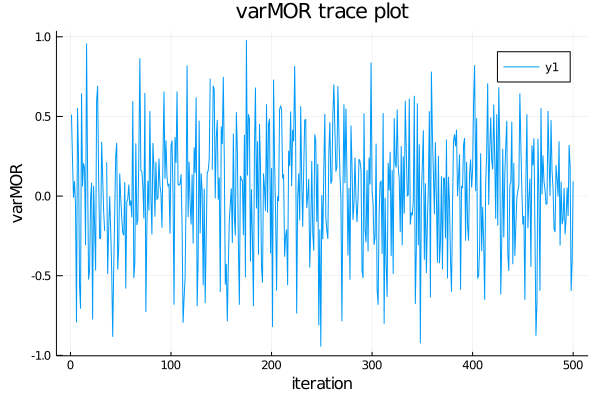

In [42]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "varMOR trace plot",
        xlabel = "iteration", ylabel = "varMOR")

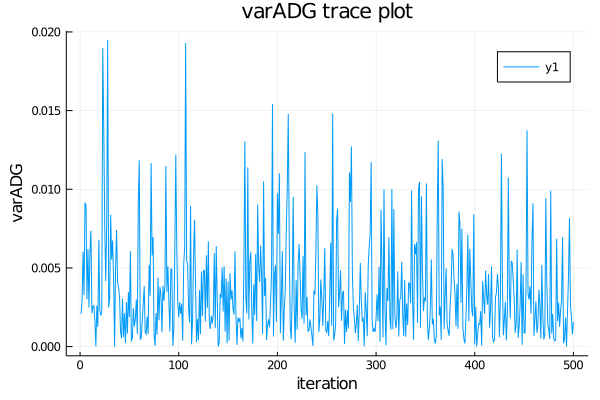

In [38]:
using Plots
x = out[!,1]; y = out[!,3]; # These are the plotting data
plot(x,y, title = "varADG trace plot",
        xlabel = "iteration", ylabel = "varADG")

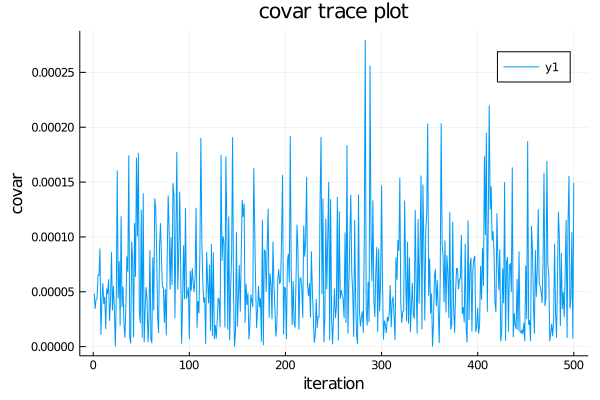

In [39]:
using Plots
x = out[!,1]; y = out[!,4]; # These are the plotting data
plot(x,y, title = "covar trace plot",
        xlabel = "iteration", ylabel = "covar")

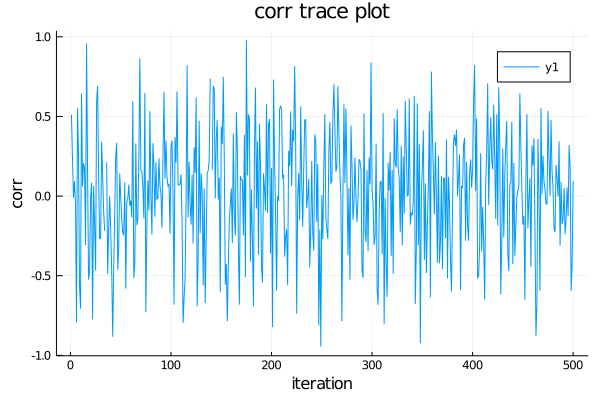

In [40]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "corr trace plot",
        xlabel = "iteration", ylabel = "corr")

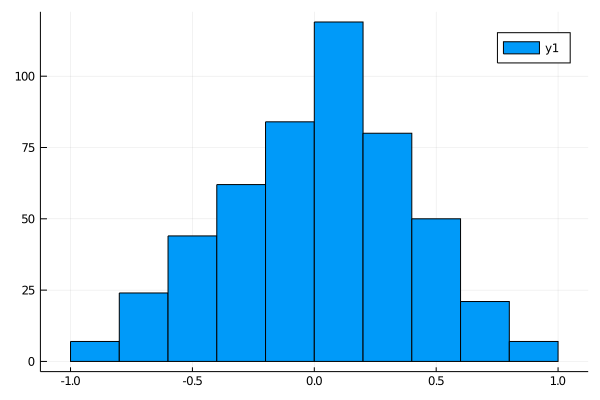

In [41]:
h = histogram(out[!,2])
display(h)

## Whole genome genetic correlation

In [3]:
gVar= CSV.read("MCMC_BayesB_genetic_variance.txt")

,FinADG_FinADG,FinADG_nTrtsPer180,nTrtsPer180_FinADG,nTrtsPer180_nTrtsPer180
,Float64,Float64,Float64,Float64
1,0.00397032,-0.00388914,-0.00388914,0.17336
2,0.00373261,-0.00264265,-0.00264265,0.174011
3,0.00419781,-0.00173703,-0.00173703,0.150696
4,0.00311495,-0.00231317,-0.00231317,0.138172
5,0.00403382,-0.00459339,-0.00459339,0.155048
6,0.0038193,-0.00421451,-0.00421451,0.154238
7,0.00373259,-0.00318976,-0.00318976,0.137321
8,0.00362521,-0.00296062,-0.00296062,0.15752
9,0.0037374,-0.00262036,-0.00262036,0.1386


In [4]:
sqVar1=[sqrt(i) for i in gVar[!,:nTrtsPer180_nTrtsPer180]] 
sqVar2=[sqrt(i) for i in gVar[!,:FinADG_FinADG]] 
Product= sqVar1 .* sqVar2
rg= gVar[!,:nTrtsPer180_FinADG] ./ Product  # Genetic correlations
insertcols!(gVar, 2, :corr => rg)

,FinADG_FinADG,corr,FinADG_nTrtsPer180,nTrtsPer180_FinADG,nTrtsPer180_nTrtsPer180
,Float64,Float64,Float64,Float64,Float64
1,0.00397032,-0.14824,-0.00388914,-0.00388914,0.17336
2,0.00373261,-0.103692,-0.00264265,-0.00264265,0.174011
3,0.00419781,-0.0690628,-0.00173703,-0.00173703,0.150696
4,0.00311495,-0.111499,-0.00231317,-0.00231317,0.138172
5,0.00403382,-0.183671,-0.00459339,-0.00459339,0.155048
6,0.0038193,-0.173644,-0.00421451,-0.00421451,0.154238
7,0.00373259,-0.140892,-0.00318976,-0.00318976,0.137321
8,0.00362521,-0.123893,-0.00296062,-0.00296062,0.15752
9,0.0037374,-0.115131,-0.00262036,-0.00262036,0.1386


In [5]:
#using Pkg
#Pkg.add("StatsBase")
#using(StatsBase)
mean(gVar[!,2])

-0.11197103580654513

In [6]:
using Statistics
std(gVar[!,:corr])

0.06626324139753466

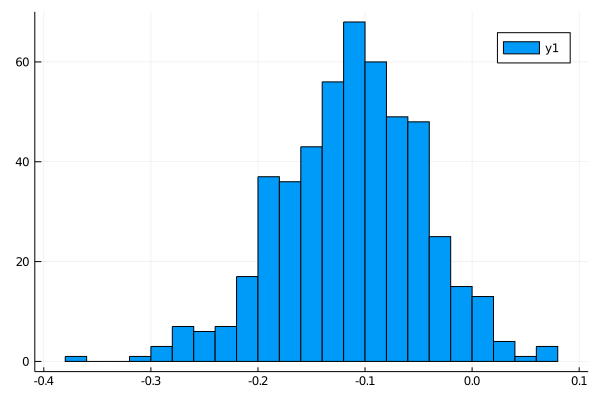

In [7]:
h = histogram(gVar[!,2])
display(h)

## BV correlation for SSC3 region from MCMC BayesB samples

In [3]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_FinADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 102313:103184]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 102313:103184]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_nTrtsPer180.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 102313:103184]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.985165,0.00134879,1.54087e-5,-0.000142025
2,2,-0.725768,0.00246733,4.86341e-5,-0.000251409
3,3,-1.0,5.9579e-5,4.0809e-6,-1.55928e-5
4,4,0.00210184,2.14133e-5,1.1895e-5,3.35446e-8
5,5,-0.693112,0.000445259,2.46015e-5,-7.25421e-5
6,6,NaN,0.0,5.94204e-8,0.0
7,7,-0.941916,0.000262724,8.69283e-6,-4.50135e-5
8,8,-0.0939373,0.000274775,2.14452e-5,-7.21094e-6
9,9,NaN,0.0,2.40141e-6,0.0


In [4]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.397269513503665

In [5]:
using Statistics
std(out[!,:corr])

0.5516978369428078

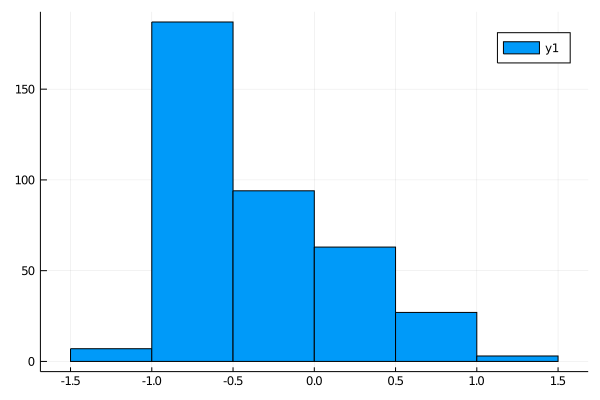

In [6]:
using Plots
h = histogram(out[!,:corr])
display(h)

## BV correlation for SSC9 region from MCMC BayesB samples

In [7]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_FinADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 238061:238579]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 238061:238579]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_nTrtsPer180.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 238061:238579]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.798158,2.28958e-5,2.1127e-5,-1.75544e-5
2,2,-0.151388,0.000479143,4.63217e-5,-2.25536e-5
3,3,-0.859285,5.51076e-7,4.30898e-5,-4.18727e-6
4,4,NaN,0.0,0.0,0.0
5,5,-0.106331,7.00264e-5,1.00635e-5,-2.82271e-6
6,6,NaN,0.0,0.0,0.0
7,7,-0.412024,0.00109732,3.05697e-5,-7.54631e-5
8,8,1.0,1.29532e-5,1.08084e-6,3.7417e-6
9,9,-0.00814823,2.01649e-6,2.94261e-5,-6.27665e-8


In [8]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.5007893631900698

In [9]:
using Statistics
std(out[!,:corr])

0.6104321360681743

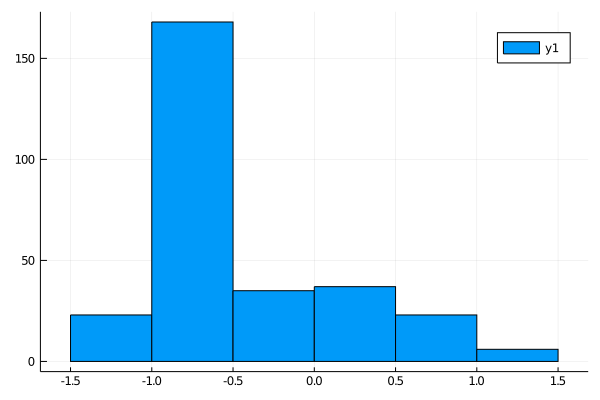

In [10]:
using Plots
h = histogram(out[!,:corr])
display(h)

## BV correlation for SSC16 region from MCMC BayesB samples

In [11]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_FinADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 394093:394788]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 394093:394788]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_nTrtsPer180.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 394093:394788]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,0.0533064,7.77606e-5,2.46884e-6,7.38594e-7
2,2,-0.242627,0.000288156,5.44906e-6,-9.61422e-6
3,3,NaN,0.0,4.6916e-6,0.0
4,4,-0.74297,0.000589019,2.9049e-6,-3.07328e-5
5,5,-0.335977,0.000416182,6.71438e-5,-5.61635e-5
6,6,-0.907672,0.000562713,3.65225e-5,-0.000130123
7,7,-0.918929,6.73186e-6,3.9958e-6,-4.76597e-6
8,8,0.0337946,0.00166712,1.91509e-6,1.90953e-6
9,9,NaN,0.0,3.50669e-6,0.0


In [12]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.36942671672467636

In [13]:
using Statistics
std(out[!,:corr])

0.6228857990838864

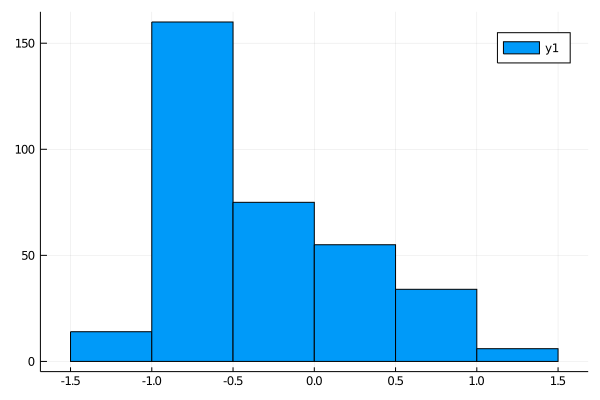

In [14]:
using Plots
h = histogram(out[!,:corr])
display(h)